In [3]:
#using Pkg
#Pkg.update()
#Pkg.add(PackageSpec(name="JWAS",rev="master"))

In [ ]:
#methods(add_genotypes)

In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

In [4]:
#Pkg.status("JWAS")

    Status `/opt/julia/environments/v1.1/Project.toml`
  [c9a035f4] JWAS v0.5.5 #master (https://github.com/reworkhow/JWAS.jl.git)


In [8]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Complete_EXP_Health_WFI.dat", types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"])
first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,false,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02


In [9]:
phenotypes= dropmissing(phenotypes, :FinPenBatch)
phenotypes= dropmissing(phenotypes, :FinADG)
phenotypes= dropmissing(phenotypes, :Health_Score4)
#first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
6,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
7,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
8,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02
9,0012,1,1,1B,A,1B_1902,false,1B_D02,1B_D02


In [11]:
model_equations = "FinADG = intercept + Batch + Died + EntryAge + FinPenBatch + SowID
             Health_Score4 = intercept + Batch + EntryAge + FinPenBatch";
R= [0.909304E-02 -0.419913E-01
    -0.419913E-01 1.48907]
model=build_model(model_equations,R);
set_covariate(model,"EntryAge")

Gpen=[0.383042E-03 0
    0 0.0004 ]
set_random(model,"FinPenBatch", Gpen)
G2=0.466761E-03
set_random(model,"SowID",G2)

SowID is not found in model equation 2.


In [2]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 30.401351 seconds (37.77 k allocations: 10.393 GiB, 0.08% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [13]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [14]:
G3=[0.407486E-02   -0.380808E-02
 -0.380808E-02  0.167177]
@time add_genotypes(model,M,G3,header=true, rowID=rowID, G_is_marker_variance=false) # no method matching
#@time add_genotypes(model,"Geno_JWAS_impute.txt",G3,separator=' ', G_is_marker_variance=true)

The marker IDs are set to 1,2,...,#markers
#markers: 435172; #individuals: 3205
 15.771135 seconds (7.88 M allocations: 15.978 GiB, 1.45% gc time)


6.0f0

## BayesB

In [15]:
@time outB=runMCMC(model,phenotypes,methods="BayesB", missing_phenotypes=true, 
    estimatePi=false,Pi=Dict([1.0; 1.0]=>0.001,[1.0; 0.0]=>0.001,[0.0; 1.0]=>0.001,[0.0; 0.0]=>0.998), 
    estimateScale=true,chain_length=50000,burnin = 5000,output_heritability=true, output_samples_frequency=100,
    output_samples_file="MCMC_BayesB")

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
The number of observations with both genotypes and phenotypes used in the analysis is 2379.

The prior for marker effects covariance matrix is calculated from genetic covariance matrix and Π.
The mean of the prior for the marker effects covariance matrix is:
  1.2e-5  -2.3e-5  
 -2.3e-5   0.000502



A Linear Mixed Model was build using model equations:

FinADG = intercept + Batch + Died + EntryAge + FinPenBatch + SowID
Health_Score4 = intercept + Batch + EntryAge + FinPenBatch

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
Batch           factor       fixed               49
Died            factor       fixed                2
EntryAge        covariate    fixed                1
FinPenBatch     factor       random             214
SowID           factor       random            1022

MCMC Information:

chain_l

running MCMC ...100%|███████████████████████████████████| Time: 4 days, 1:23:52




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


350733.317632 seconds (2.05 T allocations: 134.622 TiB, 28.81% gc time)


Dict{Any,Any} with 9 entries:
  "ScaleEffectVargeno"           => 4×3 DataFrame…
  "heritability"                 => 2×3 DataFrame…
  "location parameters"          => 1554×5 DataFrame…
  "residual variance"            => 4×3 DataFrame…
  "marker effects geno"          => 870344×5 DataFrame. Omitted printing of 1 c…
  "EBV_FinADG"                   => 3205×3 DataFrame…
  "EBV_Health_Score4"            => 3205×3 DataFrame…
  "genetic_variance"             => 4×3 DataFrame…
  "marker effects variance geno" => 4×3 DataFrame…

In [18]:
@time rg,out = GWAS(M,"/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt", 
    "MCMC_BayesB_marker_effects_geno_FinADG.txt",
    "MCMC_BayesB_marker_effects_geno_Health_Score4.txt",
    window_size="1 Mb", GWAS=false,sliding_window=false,genetic_correlation=true)

calculating genomic correlation...100%|█████████████████| Time: 1:00:00


BoundsError: BoundsError: attempt to access (2395×12 DataFrame
│ Row  │ trait      │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimate_cov │ std_cov     │ estimate_cor │ std_cor   │
│      │ String     │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64      │ Float64     │ Float64      │ Float64   │
├──────┼────────────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼──────────────┼─────────────┼──────────────┼───────────┤
│ 1    │ cor(t1,t2) │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ -9.74212e-7  │ 8.96643e-6  │ -0.0545819   │ 0.347074  │
│ 2    │ cor(t1,t2) │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 1.79098e-7   │ 1.04699e-5  │ 0.00673761   │ 0.403601  │
│ 3    │ cor(t1,t2) │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ -9.07076e-7  │ 1.37359e-5  │ -0.0232754   │ 0.41306   │
│ 4    │ cor(t1,t2) │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ -2.87307e-6  │ 1.43641e-5  │ -0.0863072   │ 0.462291  │
│ 5    │ cor(t1,t2) │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ -1.46738e-6  │ 1.12072e-5  │ -0.0131612   │ 0.407069  │
│ 6    │ cor(t1,t2) │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ -7.45892e-7  │ 9.66948e-6  │ -0.0271013   │ 0.368596  │
│ 7    │ cor(t1,t2) │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ -3.35423e-7  │ 6.05344e-6  │ -0.00261694  │ 0.378946  │
│ 8    │ cor(t1,t2) │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 1.35973e-7   │ 7.57841e-6  │ -0.018666    │ 0.364075  │
│ 9    │ cor(t1,t2) │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 1.87297e-6   │ 1.68893e-5  │ 0.0313287    │ 0.383337  │
│ 10   │ cor(t1,t2) │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 4.22003e-7   │ 9.94913e-6  │ -0.00923463  │ 0.382084  │
│ 11   │ cor(t1,t2) │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ -4.6199e-8   │ 7.23953e-6  │ 0.0083593    │ 0.370341  │
│ 12   │ cor(t1,t2) │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ -3.14423e-7  │ 7.48459e-6  │ -0.0103098   │ 0.366964  │
│ 13   │ cor(t1,t2) │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ -4.90913e-7  │ 9.5465e-6   │ -0.0263307   │ 0.370293  │
│ 14   │ cor(t1,t2) │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 4.6638e-7    │ 5.30165e-6  │ 0.00434191   │ 0.373523  │
│ 15   │ cor(t1,t2) │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 4.90212e-7   │ 8.19875e-6  │ 0.00762866   │ 0.386097  │
│ 16   │ cor(t1,t2) │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ -4.27712e-7  │ 6.06514e-6  │ -0.00143013  │ 0.325756  │
│ 17   │ cor(t1,t2) │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 5.01879e-7   │ 9.40197e-6  │ -0.00550814  │ 0.372521  │
│ 18   │ cor(t1,t2) │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ -3.92477e-6  │ 1.6984e-5   │ -0.0819773   │ 0.46777   │
│ 19   │ cor(t1,t2) │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 2.29649e-7   │ 7.68883e-6  │ -0.019047    │ 0.335688  │
│ 20   │ cor(t1,t2) │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ -5.98857e-6  │ 2.29168e-5  │ -0.0938267   │ 0.411941  │
│ 21   │ cor(t1,t2) │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ -2.58313e-6  │ 1.7733e-5   │ -0.0308191   │ 0.360371  │
│ 22   │ cor(t1,t2) │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ -7.78576e-7  │ 8.29284e-6  │ -0.034009    │ 0.385084  │
│ 23   │ cor(t1,t2) │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ -1.31261e-6  │ 7.77401e-6  │ -0.0772749   │ 0.408197  │
│ 24   │ cor(t1,t2) │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ -1.58292e-7  │ 8.74352e-6  │ -0.00365785  │ 0.368555  │
│ 25   │ cor(t1,t2) │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ -1.51348e-6  │ 9.9131e-6   │ -0.0457214   │ 0.383388  │
│ 26   │ cor(t1,t2) │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ -1.15197e-6  │ 1.08238e-5  │ -0.0186216   │ 0.447503  │
│ 27   │ cor(t1,t2) │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 3.81628e-7   │ 1.39276e-5  │ -0.0201837   │ 0.409869  │
│ 28   │ cor(t1,t2) │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ -1.77229e-6  │ 1.12624e-5  │ -0.0540623   │ 0.407326  │
│ 29   │ cor(t1,t2) │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ -1.3366e-6   │ 9.86438e-6  │ -0.037283    │ 0.41006   │
│ 30   │ cor(t1,t2) │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ -1.86032e-6  │ 1.93987e-5  │ -0.0521945   │ 0.437296  │
│ 31   │ cor(t1,t2) │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 6.97442e-8   │ 6.7283e-6   │ 0.00537451   │ 0.318651  │
│ 32   │ cor(t1,t2) │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ -8.94947e-7  │ 7.83586e-6  │ -0.0290968   │ 0.369051  │
│ 33   │ cor(t1,t2) │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ -6.11871e-7  │ 7.93629e-6  │ -0.0159599   │ 0.361943  │
│ 34   │ cor(t1,t2) │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ -5.07707e-7  │ 7.83787e-6  │ -0.0205114   │ 0.420682  │
│ 35   │ cor(t1,t2) │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ -9.7373e-8   │ 7.04858e-6  │ -0.0109366   │ 0.263873  │
│ 36   │ cor(t1,t2) │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ -5.11621e-7  │ 7.33605e-6  │ -0.0067371   │ 0.306785  │
│ 37   │ cor(t1,t2) │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ -8.51421e-7  │ 6.81525e-6  │ -0.0288945   │ 0.397756  │
│ 38   │ cor(t1,t2) │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 2.35337e-7   │ 9.84297e-6  │ -0.0336508   │ 0.360984  │
│ 39   │ cor(t1,t2) │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 3.1941e-7    │ 7.17799e-6  │ -0.00823449  │ 0.360411  │
│ 40   │ cor(t1,t2) │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ -6.0425e-7   │ 6.78646e-6  │ -0.0294007   │ 0.336864  │
│ 41   │ cor(t1,t2) │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ -3.73009e-7  │ 1.29493e-5  │ 0.0129788    │ 0.366273  │
│ 42   │ cor(t1,t2) │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ -5.52166e-7  │ 8.7597e-6   │ -0.0123201   │ 0.397687  │
│ 43   │ cor(t1,t2) │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ -9.39969e-8  │ 8.65421e-6  │ -0.0170045   │ 0.350347  │
│ 44   │ cor(t1,t2) │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 1.14003e-7   │ 6.93896e-6  │ 0.00827098   │ 0.372129  │
│ 45   │ cor(t1,t2) │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ -1.8643e-6   │ 1.25603e-5  │ -0.0254546   │ 0.381632  │
│ 46   │ cor(t1,t2) │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 6.47459e-7   │ 7.44218e-6  │ 0.0157764    │ 0.334997  │
│ 47   │ cor(t1,t2) │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ -5.19993e-7  │ 1.00927e-5  │ -0.0501749   │ 0.386709  │
│ 48   │ cor(t1,t2) │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ -1.10279e-6  │ 9.47241e-6  │ -0.0451122   │ 0.382998  │
│ 49   │ cor(t1,t2) │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ -1.29363e-7  │ 7.50385e-6  │ -0.0145095   │ 0.325901  │
│ 50   │ cor(t1,t2) │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ -8.50312e-8  │ 1.13707e-5  │ -0.0211775   │ 0.407818  │
│ 51   │ cor(t1,t2) │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ -1.80286e-7  │ 1.12078e-5  │ 0.00109813   │ 0.415191  │
│ 52   │ cor(t1,t2) │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ -1.14701e-6  │ 8.39591e-6  │ -0.0398035   │ 0.38816   │
│ 53   │ cor(t1,t2) │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ -1.26265e-6  │ 9.75844e-6  │ -0.0274293   │ 0.406273  │
│ 54   │ cor(t1,t2) │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ -1.33775e-6  │ 1.82299e-5  │ -0.0571448   │ 0.442937  │
│ 55   │ cor(t1,t2) │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ -5.02028e-7  │ 1.27562e-5  │ -0.000695034 │ 0.410434  │
│ 56   │ cor(t1,t2) │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ -5.32825e-7  │ 8.39993e-6  │ -0.0432833   │ 0.35272   │
│ 57   │ cor(t1,t2) │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ -1.44905e-6  │ 1.35253e-5  │ -0.0444024   │ 0.458482  │
│ 58   │ cor(t1,t2) │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ -3.4563e-6   │ 1.62782e-5  │ -0.0837156   │ 0.427631  │
│ 59   │ cor(t1,t2) │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ -1.16296e-5  │ 3.54392e-5  │ -0.169507    │ 0.487076  │
│ 60   │ cor(t1,t2) │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ -2.23399e-6  │ 1.28199e-5  │ -0.0544242   │ 0.361542  │
│ 61   │ cor(t1,t2) │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ -3.69018e-7  │ 1.04144e-5  │ 0.00468511   │ 0.361819  │
│ 62   │ cor(t1,t2) │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ -9.58282e-7  │ 1.34754e-5  │ -0.0188438   │ 0.359406  │
│ 63   │ cor(t1,t2) │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 1.82071e-7   │ 1.26045e-5  │ 0.0111146    │ 0.381866  │
│ 64   │ cor(t1,t2) │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ -1.47815e-6  │ 1.15914e-5  │ -0.0192519   │ 0.381926  │
│ 65   │ cor(t1,t2) │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ -5.41095e-7  │ 1.08914e-5  │ -0.0245541   │ 0.359076  │
│ 66   │ cor(t1,t2) │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ -5.31491e-7  │ 6.30416e-6  │ -0.0247063   │ 0.36003   │
│ 67   │ cor(t1,t2) │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ -1.97443e-6  │ 1.46358e-5  │ -0.0511638   │ 0.414144  │
│ 68   │ cor(t1,t2) │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ -8.52884e-7  │ 1.54054e-5  │ -0.0557455   │ 0.438413  │
│ 69   │ cor(t1,t2) │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ -1.47342e-6  │ 8.99869e-6  │ -0.0474144   │ 0.335759  │
│ 70   │ cor(t1,t2) │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ -2.34311e-7  │ 8.13895e-6  │ 0.000637836  │ 0.343323  │
│ 71   │ cor(t1,t2) │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ -4.20493e-7  │ 7.48724e-6  │ -0.00957497  │ 0.326697  │
│ 72   │ cor(t1,t2) │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ -1.5199e-6   │ 1.3208e-5   │ -0.0363999   │ 0.41753   │
│ 73   │ cor(t1,t2) │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ -1.58978e-7  │ 6.67086e-6  │ -0.020588    │ 0.348354  │
│ 74   │ cor(t1,t2) │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ -3.01037e-7  │ 6.79355e-6  │ -0.0195812   │ 0.344772  │
│ 75   │ cor(t1,t2) │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ -7.4441e-7   │ 8.73454e-6  │ -0.0111403   │ 0.400631  │
│ 76   │ cor(t1,t2) │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 2.59176e-7   │ 1.09591e-5  │ 0.0010326    │ 0.34734   │
│ 77   │ cor(t1,t2) │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ -1.14588e-6  │ 9.02661e-6  │ -0.0207319   │ 0.311826  │
│ 78   │ cor(t1,t2) │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ -4.48999e-7  │ 7.38755e-6  │ -0.0141641   │ 0.34633   │
│ 79   │ cor(t1,t2) │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 2.29826e-7   │ 4.46486e-6  │ 0.0078303    │ 0.335121  │
│ 80   │ cor(t1,t2) │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ -6.17803e-7  │ 6.82799e-6  │ -0.0320419   │ 0.295042  │
│ 81   │ cor(t1,t2) │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ -4.04587e-7  │ 5.6973e-6   │ -0.00863787  │ 0.390697  │
│ 82   │ cor(t1,t2) │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ -8.38933e-7  │ 9.86369e-6  │ -0.0336406   │ 0.377019  │
│ 83   │ cor(t1,t2) │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ -1.56636e-7  │ 6.31263e-6  │ -0.00881578  │ 0.322676  │
│ 84   │ cor(t1,t2) │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ -1.17827e-6  │ 8.46519e-6  │ -0.0668496   │ 0.354241  │
│ 85   │ cor(t1,t2) │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ -3.28164e-6  │ 1.7616e-5   │ -0.0721588   │ 0.420688  │
│ 86   │ cor(t1,t2) │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ -6.78459e-8  │ 7.12122e-6  │ 0.00648057   │ 0.383363  │
│ 87   │ cor(t1,t2) │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ -3.58014e-7  │ 1.35377e-5  │ -0.0100476   │ 0.42099   │
│ 88   │ cor(t1,t2) │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ -1.12067e-6  │ 8.31951e-6  │ -0.0391727   │ 0.372759  │
│ 89   │ cor(t1,t2) │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ -7.50617e-7  │ 8.11949e-6  │ -0.0272666   │ 0.367377  │
│ 90   │ cor(t1,t2) │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ -8.05537e-7  │ 8.05848e-6  │ -0.0326597   │ 0.386885  │
│ 91   │ cor(t1,t2) │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 3.27865e-7   │ 9.7181e-6   │ -0.00515517  │ 0.375158  │
│ 92   │ cor(t1,t2) │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ -6.4651e-7   │ 7.59374e-6  │ -0.0452072   │ 0.298765  │
│ 93   │ cor(t1,t2) │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ -5.72843e-7  │ 6.68287e-6  │ -0.0125068   │ 0.262088  │
│ 94   │ cor(t1,t2) │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ -1.21929e-6  │ 1.17044e-5  │ -0.0168933   │ 0.237511  │
│ 95   │ cor(t1,t2) │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ -4.22366e-7  │ 7.52553e-6  │ 0.00105429   │ 0.380747  │
│ 96   │ cor(t1,t2) │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ -8.16315e-7  │ 1.1982e-5   │ -0.0272864   │ 0.416513  │
│ 97   │ cor(t1,t2) │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ -1.32739e-6  │ 1.13651e-5  │ -0.0380174   │ 0.378323  │
│ 98   │ cor(t1,t2) │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ -2.18744e-6  │ 1.77443e-5  │ -0.0475824   │ 0.456678  │
│ 99   │ cor(t1,t2) │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ -4.65181e-7  │ 6.97699e-6  │ -0.023436    │ 0.407228  │
│ 100  │ cor(t1,t2) │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ -1.38795e-7  │ 8.12457e-6  │ -0.00245476  │ 0.350478  │
│ 101  │ cor(t1,t2) │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ -4.3957e-8   │ 2.70649e-6  │ -0.0116383   │ 0.226086  │
│ 102  │ cor(t1,t2) │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 4.17576e-7   │ 5.66692e-6  │ 0.0193732    │ 0.296845  │
│ 103  │ cor(t1,t2) │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ -2.22326e-7  │ 2.84097e-6  │ -0.0179166   │ 0.272793  │
│ 104  │ cor(t1,t2) │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ -7.99887e-8  │ 6.54977e-6  │ 0.0013765    │ 0.33071   │
│ 105  │ cor(t1,t2) │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 2.2279e-7    │ 5.15265e-6  │ -0.00575463  │ 0.302953  │
│ 106  │ cor(t1,t2) │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ -1.76197e-7  │ 4.38015e-6  │ -0.017231    │ 0.302504  │
│ 107  │ cor(t1,t2) │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ -4.13078e-7  │ 8.14152e-6  │ -0.013157    │ 0.369323  │
│ 108  │ cor(t1,t2) │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 8.15179e-7   │ 9.89302e-6  │ 0.00853403   │ 0.270202  │
│ 109  │ cor(t1,t2) │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 5.02791e-7   │ 7.74969e-6  │ 0.0136133    │ 0.326894  │
│ 110  │ cor(t1,t2) │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 1.15998e-7   │ 7.88966e-6  │ -0.00888542  │ 0.322088  │
│ 111  │ cor(t1,t2) │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 3.92672e-7   │ 1.637e-5    │ -0.0045893   │ 0.359799  │
│ 112  │ cor(t1,t2) │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ -5.47158e-7  │ 7.02794e-6  │ -0.0173418   │ 0.308075  │
│ 113  │ cor(t1,t2) │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ -3.29491e-6  │ 2.01999e-5  │ -0.0498803   │ 0.381514  │
│ 114  │ cor(t1,t2) │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ -4.51527e-6  │ 2.16963e-5  │ -0.0914737   │ 0.387837  │
│ 115  │ cor(t1,t2) │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ -8.15553e-7  │ 1.28671e-5  │ -0.00506233  │ 0.314382  │
│ 116  │ cor(t1,t2) │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 4.80119e-7   │ 1.02609e-5  │ -0.00381642  │ 0.306396  │
│ 117  │ cor(t1,t2) │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ -5.38893e-7  │ 7.48033e-6  │ -0.00485337  │ 0.33608   │
│ 118  │ cor(t1,t2) │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ -7.20193e-7  │ 1.34938e-5  │ -0.0421555   │ 0.41701   │
│ 119  │ cor(t1,t2) │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 2.84594e-6   │ 2.70751e-5  │ 0.00672882   │ 0.407727  │
│ 120  │ cor(t1,t2) │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 4.94929e-7   │ 1.67384e-5  │ -0.011459    │ 0.367793  │
│ 121  │ cor(t1,t2) │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ -1.04543e-7  │ 2.8651e-6   │ -0.000854969 │ 0.250124  │
│ 122  │ cor(t1,t2) │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ -5.78552e-7  │ 4.60251e-6  │ -0.0376629   │ 0.282084  │
│ 123  │ cor(t1,t2) │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 3.803e-7     │ 7.16457e-6  │ -0.00083554  │ 0.283974  │
│ 124  │ cor(t1,t2) │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ -9.36284e-8  │ 4.75423e-6  │ -0.0106096   │ 0.325529  │
│ 125  │ cor(t1,t2) │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 4.3649e-8    │ 3.61799e-6  │ 0.0137723    │ 0.303653  │
│ 126  │ cor(t1,t2) │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 5.42998e-7   │ 9.07868e-6  │ 0.000353656  │ 0.352182  │
│ 127  │ cor(t1,t2) │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ -4.59314e-8  │ 5.91341e-6  │ -0.0081523   │ 0.301249  │
│ 128  │ cor(t1,t2) │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 1.24977e-7   │ 4.8922e-6   │ -0.000587973 │ 0.27833   │
│ 129  │ cor(t1,t2) │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ -5.34871e-8  │ 5.02299e-6  │ -0.000413861 │ 0.241115  │
│ 130  │ cor(t1,t2) │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ -4.56206e-7  │ 8.54685e-6  │ -0.0077568   │ 0.317511  │
│ 131  │ cor(t1,t2) │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 2.6491e-7    │ 7.83124e-6  │ 0.0306488    │ 0.340832  │
│ 132  │ cor(t1,t2) │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 2.06163e-7   │ 6.60488e-6  │ 0.00394525   │ 0.273089  │
│ 133  │ cor(t1,t2) │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 1.86505e-7   │ 5.32907e-6  │ 0.00714324   │ 0.268453  │
│ 134  │ cor(t1,t2) │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ -3.61862e-7  │ 6.72196e-6  │ -0.00726593  │ 0.2887    │
│ 135  │ cor(t1,t2) │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ -2.08393e-7  │ 8.18968e-6  │ -0.00446281  │ 0.317555  │
│ 136  │ cor(t1,t2) │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ -6.53772e-7  │ 8.72485e-6  │ -0.0195059   │ 0.312396  │
│ 137  │ cor(t1,t2) │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ -3.12443e-7  │ 3.1883e-6   │ -0.0139911   │ 0.214199  │
│ 138  │ cor(t1,t2) │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 3.12248e-7   │ 5.04539e-6  │ -0.00678367  │ 0.281107  │
│ 139  │ cor(t1,t2) │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ -1.65808e-6  │ 1.14838e-5  │ -0.0607247   │ 0.331     │
│ 140  │ cor(t1,t2) │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ -5.13961e-7  │ 1.17007e-5  │ -0.00949188  │ 0.382025  │
│ 141  │ cor(t1,t2) │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ -1.53914e-6  │ 1.31585e-5  │ -0.0245898   │ 0.398214  │
│ 142  │ cor(t1,t2) │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ -4.09163e-7  │ 8.68787e-6  │ -0.00356247  │ 0.2722    │
│ 143  │ cor(t1,t2) │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ -3.70691e-9  │ 2.00542e-6  │ 0.00153587   │ 0.235633  │
│ 144  │ cor(t1,t2) │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ -1.28383e-7  │ 3.96769e-6  │ -0.0218851   │ 0.286223  │
│ 145  │ cor(t1,t2) │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ -6.45484e-7  │ 7.04581e-6  │ -0.00913107  │ 0.251388  │
│ 146  │ cor(t1,t2) │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ -2.81598e-8  │ 8.81805e-6  │ -0.0133191   │ 0.376583  │
│ 147  │ cor(t1,t2) │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ -2.93081e-7  │ 8.81018e-6  │ -0.0164249   │ 0.367086  │
│ 148  │ cor(t1,t2) │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ -9.67587e-7  │ 9.74541e-6  │ -0.00772248  │ 0.394445  │
│ 149  │ cor(t1,t2) │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ -1.10544e-6  │ 9.95387e-6  │ -0.0517688   │ 0.376956  │
│ 150  │ cor(t1,t2) │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ -5.01265e-7  │ 8.88937e-6  │ -0.0231098   │ 0.38023   │
│ 151  │ cor(t1,t2) │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 3.87718e-6   │ 4.35239e-5  │ 0.00534217   │ 0.374429  │
│ 152  │ cor(t1,t2) │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ -2.07663e-6  │ 1.98444e-5  │ -0.0374044   │ 0.39026   │
│ 153  │ cor(t1,t2) │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 1.40146e-6   │ 1.90073e-5  │ -0.0121168   │ 0.434286  │
│ 154  │ cor(t1,t2) │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 4.04603e-7   │ 5.83736e-6  │ -0.00418363  │ 0.288715  │
│ 155  │ cor(t1,t2) │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 6.61823e-9   │ 3.68597e-6  │ 0.0137082    │ 0.248705  │
│ 156  │ cor(t1,t2) │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ -1.436e-6    │ 8.58051e-6  │ -0.036048    │ 0.377369  │
│ 157  │ cor(t1,t2) │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ -1.28493e-6  │ 9.49663e-6  │ -0.0346224   │ 0.32031   │
│ 158  │ cor(t1,t2) │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ -5.16186e-7  │ 1.37648e-5  │ -0.0425378   │ 0.367665  │
│ 159  │ cor(t1,t2) │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 2.42004e-6   │ 2.28132e-5  │ 0.0274663    │ 0.385773  │
│ 160  │ cor(t1,t2) │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ -9.07665e-7  │ 9.77125e-6  │ -0.026456    │ 0.410921  │
│ 161  │ cor(t1,t2) │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ -1.94239e-7  │ 5.37278e-6  │ -0.0107426   │ 0.277397  │
│ 162  │ cor(t1,t2) │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ -1.81897e-6  │ 2.12513e-5  │ -0.0614029   │ 0.440546  │
│ 163  │ cor(t1,t2) │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ -5.98329e-7  │ 6.20674e-6  │ -0.0215279   │ 0.343666  │
│ 164  │ cor(t1,t2) │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ -1.24333e-7  │ 1.00114e-5  │ -0.0179546   │ 0.370562  │
│ 165  │ cor(t1,t2) │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ -1.60514e-6  │ 9.36272e-6  │ -0.0896869   │ 0.355282  │
│ 166  │ cor(t1,t2) │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ -3.11113e-6  │ 1.50678e-5  │ -0.0781144   │ 0.368523  │
│ 167  │ cor(t1,t2) │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ -1.15328e-6  │ 1.25326e-5  │ -0.0525736   │ 0.350985  │
│ 168  │ cor(t1,t2) │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ -1.07897e-6  │ 9.30868e-6  │ -0.00537131  │ 0.31463   │
│ 169  │ cor(t1,t2) │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ -3.88822e-6  │ 2.07636e-5  │ -0.0810352   │ 0.385818  │
│ 170  │ cor(t1,t2) │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ -4.76096e-7  │ 6.147e-6    │ -0.00364168  │ 0.29995   │
│ 171  │ cor(t1,t2) │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ -3.99053e-7  │ 8.28007e-6  │ 0.00312179   │ 0.234717  │
│ 172  │ cor(t1,t2) │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ -3.10851e-7  │ 4.6847e-6   │ -0.00423528  │ 0.286195  │
│ 173  │ cor(t1,t2) │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ -3.6095e-7   │ 4.98989e-6  │ -0.0193791   │ 0.310442  │
│ 174  │ cor(t1,t2) │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ -7.43031e-8  │ 5.14745e-6  │ 0.00443491   │ 0.262025  │
│ 175  │ cor(t1,t2) │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ -4.17344e-7  │ 6.37839e-6  │ -0.0232053   │ 0.348241  │
│ 176  │ cor(t1,t2) │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ -1.46104e-6  │ 1.04477e-5  │ -0.0341312   │ 0.300399  │
│ 177  │ cor(t1,t2) │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ -4.11693e-8  │ 7.553e-6    │ -0.00292887  │ 0.368454  │
│ 178  │ cor(t1,t2) │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ -5.37976e-7  │ 5.04253e-6  │ -0.0111167   │ 0.282391  │
│ 179  │ cor(t1,t2) │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ -3.57428e-7  │ 6.66283e-6  │ -0.0285346   │ 0.348973  │
│ 180  │ cor(t1,t2) │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 4.81385e-7   │ 9.34819e-6  │ 0.0206845    │ 0.329636  │
│ 181  │ cor(t1,t2) │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ -5.7737e-7   │ 7.6398e-6   │ -0.0301226   │ 0.285644  │
│ 182  │ cor(t1,t2) │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ -4.51551e-7  │ 8.42329e-6  │ -0.00401744  │ 0.354142  │
│ 183  │ cor(t1,t2) │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ -3.9615e-8   │ 3.5324e-6   │ -0.0197549   │ 0.308775  │
│ 184  │ cor(t1,t2) │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ -3.24687e-7  │ 5.64104e-6  │ -0.023939    │ 0.329696  │
│ 185  │ cor(t1,t2) │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ -1.67416e-6  │ 1.13711e-5  │ -0.0379177   │ 0.405101  │
│ 186  │ cor(t1,t2) │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ -1.90448e-6  │ 1.19463e-5  │ -0.0211297   │ 0.402666  │
│ 187  │ cor(t1,t2) │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ -1.41032e-7  │ 6.40768e-6  │ -0.00151324  │ 0.305706  │
│ 188  │ cor(t1,t2) │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ -9.81875e-7  │ 1.73006e-5  │ -0.0203019   │ 0.340862  │
│ 189  │ cor(t1,t2) │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ -1.69738e-6  │ 1.10069e-5  │ -0.0319889   │ 0.377526  │
│ 190  │ cor(t1,t2) │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ -1.05127e-6  │ 9.81287e-6  │ 0.0141969    │ 0.317135  │
│ 191  │ cor(t1,t2) │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ -9.48451e-7  │ 8.84141e-6  │ -0.0198936   │ 0.314224  │
│ 192  │ cor(t1,t2) │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ -4.87701e-7  │ 6.01261e-6  │ -0.0298151   │ 0.356543  │
│ 193  │ cor(t1,t2) │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ -1.2559e-6   │ 9.11391e-6  │ -0.0543466   │ 0.387714  │
│ 194  │ cor(t1,t2) │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ -2.5919e-7   │ 2.64197e-6  │ -0.0317215   │ 0.320428  │
│ 195  │ cor(t1,t2) │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ -8.75694e-8  │ 2.1828e-6   │ -0.00720724  │ 0.321622  │
│ 196  │ cor(t1,t2) │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ -7.86849e-8  │ 2.51368e-6  │ -0.00167673  │ 0.270395  │
│ 197  │ cor(t1,t2) │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ -4.90176e-6  │ 2.01078e-5  │ -0.11559     │ 0.425782  │
│ 198  │ cor(t1,t2) │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ -1.57637e-6  │ 1.02224e-5  │ -0.0265812   │ 0.357091  │
│ 199  │ cor(t1,t2) │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ -3.9958e-7   │ 6.27129e-6  │ -0.00368731  │ 0.321773  │
│ 200  │ cor(t1,t2) │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ -2.32903e-6  │ 1.20679e-5  │ -0.0764009   │ 0.375156  │
│ 201  │ cor(t1,t2) │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ -2.60745e-7  │ 5.1278e-6   │ -0.039321    │ 0.293249  │
│ 202  │ cor(t1,t2) │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ -9.33509e-7  │ 7.39015e-6  │ -0.0365695   │ 0.287553  │
│ 203  │ cor(t1,t2) │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ -1.69695e-6  │ 1.09602e-5  │ -0.05714     │ 0.361661  │
│ 204  │ cor(t1,t2) │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ -4.63e-7     │ 4.39002e-6  │ -0.0412119   │ 0.328198  │
│ 205  │ cor(t1,t2) │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ -1.86964e-7  │ 2.5819e-6   │ -0.0189259   │ 0.33728   │
│ 206  │ cor(t1,t2) │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ -2.39377e-7  │ 6.381e-6    │ -0.0421221   │ 0.361197  │
│ 207  │ cor(t1,t2) │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ -5.21174e-7  │ 7.44268e-6  │ 0.0197824    │ 0.362184  │
│ 208  │ cor(t1,t2) │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ -7.02388e-7  │ 4.94376e-6  │ -0.0377132   │ 0.313142  │
│ 209  │ cor(t1,t2) │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ -7.83404e-7  │ 6.15628e-6  │ -0.0291769   │ 0.373495  │
│ 210  │ cor(t1,t2) │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ -4.15385e-7  │ 5.67563e-6  │ -0.047493    │ 0.36568   │
│ 211  │ cor(t1,t2) │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ -3.58339e-8  │ 6.77845e-6  │ 0.000386622  │ 0.329998  │
│ 212  │ cor(t1,t2) │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ -5.21166e-7  │ 5.39068e-6  │ -0.00847386  │ 0.317325  │
│ 213  │ cor(t1,t2) │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 3.51895e-7   │ 7.07647e-6  │ 0.0035675    │ 0.364119  │
│ 214  │ cor(t1,t2) │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ -2.98301e-7  │ 4.52263e-6  │ -0.0376106   │ 0.318571  │
│ 215  │ cor(t1,t2) │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ -3.36439e-7  │ 6.64183e-6  │ -0.0414901   │ 0.403711  │
│ 216  │ cor(t1,t2) │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ -5.02929e-7  │ 4.70992e-6  │ -0.0366822   │ 0.376111  │
│ 217  │ cor(t1,t2) │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ -4.00639e-7  │ 4.85666e-6  │ -0.0109006   │ 0.380355  │
│ 218  │ cor(t1,t2) │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 1.47795e-6   │ 1.06588e-5  │ 0.0537917    │ 0.422321  │
│ 219  │ cor(t1,t2) │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 2.30015e-6   │ 1.81859e-5  │ 0.0562449    │ 0.386579  │
│ 220  │ cor(t1,t2) │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ -1.22638e-7  │ 8.57899e-6  │ -0.025316    │ 0.401949  │
│ 221  │ cor(t1,t2) │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 1.09729e-7   │ 6.60527e-6  │ -0.0356158   │ 0.365336  │
│ 222  │ cor(t1,t2) │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ -9.60678e-9  │ 5.12408e-6  │ 0.0024447    │ 0.361739  │
│ 223  │ cor(t1,t2) │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ -9.64407e-7  │ 1.1667e-5   │ -0.0468478   │ 0.36964   │
│ 224  │ cor(t1,t2) │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 4.58918e-7   │ 7.35396e-6  │ -0.0284034   │ 0.40633   │
│ 225  │ cor(t1,t2) │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 1.02663e-7   │ 5.76725e-6  │ -0.0408858   │ 0.345196  │
│ 226  │ cor(t1,t2) │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ -1.20205e-8  │ 6.79921e-6  │ -0.0179226   │ 0.349514  │
│ 227  │ cor(t1,t2) │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ -9.8087e-7   │ 6.70905e-6  │ -0.0349765   │ 0.354227  │
│ 228  │ cor(t1,t2) │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ -1.57847e-6  │ 8.9143e-6   │ -0.0505706   │ 0.37618   │
│ 229  │ cor(t1,t2) │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ -2.01977e-7  │ 2.93536e-6  │ -0.00802399  │ 0.334092  │
│ 230  │ cor(t1,t2) │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ -1.55362e-6  │ 1.57973e-5  │ -0.033656    │ 0.367958  │
│ 231  │ cor(t1,t2) │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ -9.06594e-7  │ 5.95351e-6  │ -0.0464432   │ 0.368338  │
│ 232  │ cor(t1,t2) │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ -7.60616e-7  │ 8.67224e-6  │ -0.0176496   │ 0.324369  │
│ 233  │ cor(t1,t2) │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ -2.45013e-7  │ 4.15639e-6  │ -0.010948    │ 0.314338  │
│ 234  │ cor(t1,t2) │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ -1.15218e-7  │ 1.96936e-6  │ -0.0178097   │ 0.31264   │
│ 235  │ cor(t1,t2) │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ -5.19755e-7  │ 4.07544e-6  │ -0.0389501   │ 0.351278  │
│ 236  │ cor(t1,t2) │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ -6.42094e-7  │ 4.98231e-6  │ -0.0342348   │ 0.308842  │
│ 237  │ cor(t1,t2) │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 1.88269e-7   │ 6.14865e-6  │ -0.000316044 │ 0.303577  │
│ 238  │ cor(t1,t2) │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ -1.45702e-6  │ 1.09742e-5  │ -0.0324584   │ 0.353096  │
│ 239  │ cor(t1,t2) │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 9.86236e-7   │ 3.47848e-5  │ -0.0190067   │ 0.559294  │
│ 240  │ cor(t1,t2) │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ -3.36195e-7  │ 9.95995e-6  │ 0.00970338   │ 0.398348  │
│ 241  │ cor(t1,t2) │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 3.35161e-7   │ 1.33578e-5  │ -0.0324237   │ 0.380869  │
│ 242  │ cor(t1,t2) │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 7.60992e-8   │ 7.17832e-6  │ 0.0167224    │ 0.317727  │
│ 243  │ cor(t1,t2) │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ -8.38232e-7  │ 8.37672e-6  │ -0.0241361   │ 0.372766  │
│ 244  │ cor(t1,t2) │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ -2.06641e-8  │ 7.64963e-6  │ -0.0275954   │ 0.34618   │
│ 245  │ cor(t1,t2) │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ -5.05501e-8  │ 4.45936e-6  │ 0.00346051   │ 0.26929   │
│ 246  │ cor(t1,t2) │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 3.30849e-7   │ 5.08676e-6  │ 0.0275203    │ 0.331433  │
│ 247  │ cor(t1,t2) │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 1.39134e-7   │ 4.59914e-6  │ 0.0146608    │ 0.343152  │
│ 248  │ cor(t1,t2) │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 6.15594e-8   │ 4.68932e-6  │ -0.00463687  │ 0.268746  │
│ 249  │ cor(t1,t2) │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ -8.79041e-8  │ 2.87022e-6  │ 0.00413859   │ 0.329614  │
│ 250  │ cor(t1,t2) │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ -2.41659e-7  │ 6.67316e-6  │ -0.0149056   │ 0.384701  │
│ 251  │ cor(t1,t2) │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ -6.08615e-7  │ 9.03892e-6  │ -0.0124122   │ 0.358928  │
│ 252  │ cor(t1,t2) │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ -6.03445e-7  │ 6.3613e-6   │ -0.0274845   │ 0.403777  │
│ 253  │ cor(t1,t2) │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ -5.21482e-7  │ 7.47973e-6  │ -0.0150329   │ 0.390614  │
│ 254  │ cor(t1,t2) │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ -8.14487e-7  │ 9.01653e-6  │ -0.0395252   │ 0.390947  │
│ 255  │ cor(t1,t2) │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ -8.36667e-7  │ 6.8428e-6   │ -0.0675597   │ 0.423828  │
│ 256  │ cor(t1,t2) │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ -3.24436e-7  │ 8.70396e-6  │ -0.0159242   │ 0.385058  │
│ 257  │ cor(t1,t2) │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ -1.17853e-6  │ 9.4693e-6   │ -0.0329111   │ 0.409968  │
│ 258  │ cor(t1,t2) │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ -4.28598e-7  │ 5.67757e-6  │ -0.0467122   │ 0.360588  │
│ 259  │ cor(t1,t2) │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 6.49768e-8   │ 4.73884e-6  │ -0.0174376   │ 0.362532  │
│ 260  │ cor(t1,t2) │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ -4.26398e-7  │ 6.55692e-6  │ -0.0225098   │ 0.379795  │
│ 261  │ cor(t1,t2) │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ -3.80324e-7  │ 4.08827e-6  │ -0.0317958   │ 0.332778  │
│ 262  │ cor(t1,t2) │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ -1.34409e-7  │ 5.2888e-6   │ -0.0252772   │ 0.372357  │
│ 263  │ cor(t1,t2) │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ -3.25668e-7  │ 3.43515e-6  │ -0.0152055   │ 0.29933   │
│ 264  │ cor(t1,t2) │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ -7.63508e-8  │ 2.52735e-6  │ -0.00795242  │ 0.216471  │
│ 265  │ cor(t1,t2) │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 1.66208e-7   │ 5.75114e-6  │ -0.00397762  │ 0.304432  │
│ 266  │ cor(t1,t2) │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ -1.92635e-6  │ 1.17303e-5  │ -0.0427556   │ 0.375749  │
│ 267  │ cor(t1,t2) │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ -5.98125e-7  │ 7.96751e-6  │ -0.0205861   │ 0.381613  │
│ 268  │ cor(t1,t2) │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ -2.05574e-7  │ 5.13765e-6  │ -0.0496769   │ 0.370792  │
│ 269  │ cor(t1,t2) │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ -1.63308e-6  │ 1.179e-5    │ -0.0520845   │ 0.359166  │
│ 270  │ cor(t1,t2) │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 1.26115e-7   │ 8.01866e-6  │ 0.000913445  │ 0.369673  │
│ 271  │ cor(t1,t2) │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ -1.97392e-7  │ 7.90348e-6  │ -0.00604937  │ 0.387442  │
│ 272  │ cor(t1,t2) │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 2.98501e-7   │ 7.28543e-6  │ 0.012262     │ 0.382162  │
│ 273  │ cor(t1,t2) │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ -6.13204e-7  │ 5.32228e-6  │ -0.0259609   │ 0.356793  │
│ 274  │ cor(t1,t2) │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ -1.1608e-6   │ 1.11915e-5  │ -0.0354416   │ 0.367741  │
│ 275  │ cor(t1,t2) │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 8.42391e-8   │ 5.01932e-6  │ -0.00614326  │ 0.249657  │
│ 276  │ cor(t1,t2) │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 3.53976e-8   │ 4.35146e-6  │ -0.00701551  │ 0.32432   │
│ 277  │ cor(t1,t2) │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ -2.61977e-8  │ 2.85107e-6  │ -0.0111111   │ 0.156125  │
│ 278  │ cor(t1,t2) │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ -1.32188e-7  │ 5.74908e-6  │ -0.0310632   │ 0.314081  │
│ 279  │ cor(t1,t2) │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 5.36575e-7   │ 6.77092e-6  │ 0.0209049    │ 0.371211  │
│ 280  │ cor(t1,t2) │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 6.20951e-7   │ 1.153e-5    │ 0.00211812   │ 0.336342  │
│ 281  │ cor(t1,t2) │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ -2.13989e-7  │ 4.67711e-6  │ -0.00807832  │ 0.331166  │
│ 282  │ cor(t1,t2) │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ -7.16673e-7  │ 8.5578e-6   │ -0.031835    │ 0.370026  │
│ 283  │ cor(t1,t2) │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ -3.76523e-7  │ 8.42814e-6  │ 0.0109307    │ 0.380301  │
│ 284  │ cor(t1,t2) │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ -3.21174e-7  │ 6.40223e-6  │ -0.00798822  │ 0.301294  │
│ 285  │ cor(t1,t2) │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ -4.33998e-7  │ 1.29759e-5  │ -0.0281975   │ 0.399303  │
│ 286  │ cor(t1,t2) │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ -4.44075e-7  │ 9.07317e-6  │ -0.0327444   │ 0.386606  │
│ 287  │ cor(t1,t2) │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ -1.07997e-7  │ 7.44674e-6  │ -0.00701104  │ 0.350993  │
│ 288  │ cor(t1,t2) │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ -5.5311e-7   │ 8.0874e-6   │ -0.0320286   │ 0.368755  │
│ 289  │ cor(t1,t2) │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 3.1258e-7    │ 6.77095e-6  │ 0.0373594    │ 0.304753  │
│ 290  │ cor(t1,t2) │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ -5.98098e-7  │ 8.75859e-6  │ -0.0133886   │ 0.313797  │
│ 291  │ cor(t1,t2) │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ -5.31347e-7  │ 8.34694e-6  │ -0.0182514   │ 0.359177  │
│ 292  │ cor(t1,t2) │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ -1.01277e-6  │ 7.7412e-6   │ -0.0259287   │ 0.390546  │
│ 293  │ cor(t1,t2) │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ -6.36434e-7  │ 5.92622e-6  │ -0.047141    │ 0.350529  │
│ 294  │ cor(t1,t2) │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ -3.14211e-7  │ 9.82643e-6  │ -0.0266021   │ 0.397125  │
│ 295  │ cor(t1,t2) │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ -4.19519e-6  │ 2.56865e-5  │ -0.0447246   │ 0.498028  │
│ 296  │ cor(t1,t2) │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 4.81946e-8   │ 1.65334e-5  │ -0.0128267   │ 0.438363  │
│ 297  │ cor(t1,t2) │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 6.44031e-7   │ 1.34136e-5  │ -0.0150961   │ 0.41118   │
│ 298  │ cor(t1,t2) │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ -2.25865e-7  │ 8.67549e-6  │ 0.00571002   │ 0.374048  │
│ 299  │ cor(t1,t2) │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 4.63335e-7   │ 1.01255e-5  │ 0.0152167    │ 0.406637  │
│ 300  │ cor(t1,t2) │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ -4.02657e-7  │ 1.21601e-5  │ 0.0018794    │ 0.393873  │
│ 301  │ cor(t1,t2) │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ -6.32799e-7  │ 9.16428e-6  │ -0.0193343   │ 0.411535  │
│ 302  │ cor(t1,t2) │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ -1.2976e-6   │ 9.33006e-6  │ -0.0671491   │ 0.40302   │
│ 303  │ cor(t1,t2) │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 1.43195e-8   │ 1.06202e-5  │ -0.00688252  │ 0.369987  │
│ 304  │ cor(t1,t2) │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ -2.57629e-7  │ 1.15284e-5  │ -0.0124727   │ 0.379064  │
│ 305  │ cor(t1,t2) │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 3.23182e-7   │ 8.14556e-6  │ 0.0136064    │ 0.315315  │
│ 306  │ cor(t1,t2) │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ -9.75274e-7  │ 1.01397e-5  │ -0.0246351   │ 0.365302  │
│ 307  │ cor(t1,t2) │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ -8.94497e-7  │ 8.34236e-6  │ -0.0460743   │ 0.329942  │
│ 308  │ cor(t1,t2) │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ -2.3496e-8   │ 7.24644e-6  │ -0.0147586   │ 0.353264  │
│ 309  │ cor(t1,t2) │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ -2.13474e-7  │ 5.48586e-6  │ 0.0193164    │ 0.308895  │
│ 310  │ cor(t1,t2) │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ -7.53957e-7  │ 1.21239e-5  │ -0.00450688  │ 0.38273   │
│ 311  │ cor(t1,t2) │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ -6.90734e-7  │ 7.53047e-6  │ -0.0372832   │ 0.432286  │
│ 312  │ cor(t1,t2) │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 3.19261e-7   │ 5.74253e-6  │ 0.0268074    │ 0.333727  │
│ 313  │ cor(t1,t2) │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ -5.74245e-7  │ 7.32686e-6  │ -0.0109987   │ 0.364934  │
│ 314  │ cor(t1,t2) │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ -1.73399e-7  │ 8.56365e-6  │ -0.0258801   │ 0.376049  │
│ 315  │ cor(t1,t2) │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ -4.55698e-7  │ 8.61377e-6  │ -0.0356217   │ 0.365059  │
│ 316  │ cor(t1,t2) │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ -2.21285e-7  │ 7.64166e-6  │ -0.0242489   │ 0.370806  │
│ 317  │ cor(t1,t2) │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ -3.53153e-7  │ 1.44079e-5  │ -0.0511298   │ 0.426119  │
│ 318  │ cor(t1,t2) │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 4.18957e-9   │ 8.31054e-6  │ 0.0136347    │ 0.309892  │
│ 319  │ cor(t1,t2) │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ -3.87712e-6  │ 1.80728e-5  │ -0.0866982   │ 0.475027  │
│ 320  │ cor(t1,t2) │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ -1.03507e-6  │ 8.94074e-6  │ -0.0237031   │ 0.314685  │
│ 321  │ cor(t1,t2) │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 3.7804e-7    │ 6.49266e-6  │ 0.0163109    │ 0.393775  │
│ 322  │ cor(t1,t2) │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ -4.42464e-7  │ 6.8311e-6   │ 0.0137847    │ 0.352428  │
│ 323  │ cor(t1,t2) │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ -2.81642e-6  │ 1.88158e-5  │ -0.0597969   │ 0.381367  │
│ 324  │ cor(t1,t2) │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ -6.66378e-7  │ 1.97055e-5  │ 0.00079928   │ 0.411384  │
│ 325  │ cor(t1,t2) │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ -1.28523e-6  │ 1.29271e-5  │ -0.024839    │ 0.331339  │
│ 326  │ cor(t1,t2) │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ -5.44411e-7  │ 5.69949e-6  │ -0.0114609   │ 0.219807  │
│ 327  │ cor(t1,t2) │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ -1.45735e-6  │ 1.32752e-5  │ -0.0299505   │ 0.279659  │
│ 328  │ cor(t1,t2) │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ -2.16899e-6  │ 1.04058e-5  │ -0.0587664   │ 0.338774  │
│ 329  │ cor(t1,t2) │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ -2.3548e-6   │ 1.43642e-5  │ -0.0510763   │ 0.326749  │
│ 330  │ cor(t1,t2) │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 6.76853e-8   │ 3.29184e-6  │ 0.0107126    │ 0.23244   │
│ 331  │ cor(t1,t2) │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ -3.40017e-7  │ 3.87174e-6  │ -0.0166486   │ 0.19128   │
│ 332  │ cor(t1,t2) │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ -3.69678e-7  │ 6.03665e-6  │ -6.30877e-5  │ 0.228837  │
│ 333  │ cor(t1,t2) │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ -1.12963e-7  │ 2.89858e-6  │ 0.0088392    │ 0.188567  │
│ 334  │ cor(t1,t2) │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ -7.89386e-9  │ 6.28508e-6  │ -0.0139213   │ 0.247257  │
│ 335  │ cor(t1,t2) │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ -2.95768e-7  │ 2.75121e-6  │ -0.03254     │ 0.241245  │
│ 336  │ cor(t1,t2) │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ -6.1165e-7   │ 8.08279e-6  │ -0.0258679   │ 0.342022  │
│ 337  │ cor(t1,t2) │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ -1.49817e-7  │ 5.7911e-6   │ -0.00474733  │ 0.314618  │
│ 338  │ cor(t1,t2) │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ -3.60851e-7  │ 3.12296e-6  │ -0.0336956   │ 0.311389  │
│ 339  │ cor(t1,t2) │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ -3.54089e-8  │ 5.34197e-7  │ -0.00666667  │ 0.124682  │
│ 340  │ cor(t1,t2) │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ -4.67064e-7  │ 3.42731e-6  │ -0.0239835   │ 0.238103  │
│ 341  │ cor(t1,t2) │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ -1.1904e-7   │ 6.12691e-6  │ -0.0188012   │ 0.365836  │
│ 342  │ cor(t1,t2) │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 2.79317e-7   │ 5.9043e-6   │ 0.0206486    │ 0.320995  │
│ 343  │ cor(t1,t2) │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ -3.16974e-7  │ 4.70222e-6  │ 0.00131356   │ 0.266339  │
│ 344  │ cor(t1,t2) │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ -4.57317e-7  │ 9.38828e-6  │ 0.00770124   │ 0.360637  │
│ 345  │ cor(t1,t2) │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ -8.16802e-8  │ 4.1254e-6   │ -0.00561072  │ 0.317597  │
│ 346  │ cor(t1,t2) │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ -1.76293e-8  │ 3.73544e-6  │ -0.0066052   │ 0.353725  │
│ 347  │ cor(t1,t2) │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ -1.57838e-6  │ 1.14899e-5  │ -0.0386043   │ 0.37722   │
│ 348  │ cor(t1,t2) │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ -3.24166e-7  │ 2.9642e-6   │ -0.0239104   │ 0.24149   │
│ 349  │ cor(t1,t2) │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ -2.03389e-6  │ 1.12584e-5  │ -0.0477728   │ 0.289868  │
│ 350  │ cor(t1,t2) │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ -1.31364e-6  │ 9.90508e-6  │ -0.0277824   │ 0.302664  │
│ 351  │ cor(t1,t2) │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ -2.76147e-7  │ 6.07615e-6  │ -0.0288657   │ 0.302655  │
│ 352  │ cor(t1,t2) │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ -1.22081e-6  │ 8.91967e-6  │ -0.0185473   │ 0.305941  │
│ 353  │ cor(t1,t2) │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ -1.71809e-6  │ 1.1169e-5   │ -0.0289434   │ 0.282765  │
│ 354  │ cor(t1,t2) │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ -8.87892e-7  │ 7.70046e-6  │ -0.0368843   │ 0.303786  │
│ 355  │ cor(t1,t2) │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ -2.55094e-6  │ 1.31946e-5  │ -0.0816296   │ 0.398195  │
│ 356  │ cor(t1,t2) │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 1.17102e-7   │ 6.11311e-6  │ 0.00196918   │ 0.25906   │
│ 357  │ cor(t1,t2) │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ -9.11296e-9  │ 4.42191e-6  │ -0.00672419  │ 0.309792  │
│ 358  │ cor(t1,t2) │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ -2.68719e-7  │ 5.64553e-6  │ -0.020953    │ 0.339059  │
│ 359  │ cor(t1,t2) │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 1.44971e-7   │ 7.45291e-6  │ -0.00664662  │ 0.365797  │
│ 360  │ cor(t1,t2) │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ -4.89584e-6  │ 2.56666e-5  │ -0.0710444   │ 0.49004   │
│ 361  │ cor(t1,t2) │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ -6.6247e-7   │ 7.8252e-6   │ -0.0203321   │ 0.422186  │
│ 362  │ cor(t1,t2) │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ -9.60914e-7  │ 9.51916e-6  │ -0.00280563  │ 0.393034  │
│ 363  │ cor(t1,t2) │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ -1.00022e-6  │ 6.8008e-6   │ -0.0250987   │ 0.331942  │
│ 364  │ cor(t1,t2) │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 4.43286e-8   │ 6.93488e-6  │ -0.0149877   │ 0.335822  │
│ 365  │ cor(t1,t2) │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ -1.01107e-6  │ 9.29531e-6  │ -0.0349297   │ 0.364572  │
│ 366  │ cor(t1,t2) │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ -2.80706e-6  │ 2.21551e-5  │ -0.0593691   │ 0.458841  │
│ 367  │ cor(t1,t2) │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ -5.76048e-7  │ 1.14755e-5  │ -0.0109392   │ 0.379088  │
│ 368  │ cor(t1,t2) │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ -7.69306e-7  │ 1.57716e-5  │ -0.0438398   │ 0.377997  │
│ 369  │ cor(t1,t2) │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ -3.29385e-7  │ 8.52005e-6  │ -0.014588    │ 0.391789  │
│ 370  │ cor(t1,t2) │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ -1.33021e-6  │ 1.2451e-5   │ -0.025909    │ 0.37593   │
│ 371  │ cor(t1,t2) │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ -1.96145e-6  │ 1.78133e-5  │ -0.0542189   │ 0.387419  │
│ 372  │ cor(t1,t2) │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ -5.40575e-7  │ 5.98768e-6  │ -0.0196371   │ 0.315746  │
│ 373  │ cor(t1,t2) │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ -1.53842e-6  │ 1.05341e-5  │ -0.0379376   │ 0.365369  │
│ 374  │ cor(t1,t2) │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ -1.35328e-6  │ 1.20947e-5  │ -0.0635159   │ 0.391204  │
│ 375  │ cor(t1,t2) │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ -1.12472e-6  │ 1.29385e-5  │ -0.00680579  │ 0.411783  │
│ 376  │ cor(t1,t2) │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 6.81295e-7   │ 1.10837e-5  │ 0.0156991    │ 0.371335  │
│ 377  │ cor(t1,t2) │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ -6.8956e-7   │ 1.10074e-5  │ -0.02375     │ 0.379358  │
│ 378  │ cor(t1,t2) │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ -2.22475e-7  │ 5.66014e-6  │ -0.00326252  │ 0.348702  │
│ 379  │ cor(t1,t2) │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ -1.17992e-6  │ 1.06192e-5  │ -0.0376257   │ 0.384459  │
│ 380  │ cor(t1,t2) │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ -4.99316e-7  │ 7.51653e-6  │ -0.0354134   │ 0.324564  │
│ 381  │ cor(t1,t2) │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 6.16294e-8   │ 5.68567e-6  │ 0.00944611   │ 0.355067  │
│ 382  │ cor(t1,t2) │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 1.36739e-7   │ 8.73318e-6  │ 0.00434876   │ 0.408712  │
│ 383  │ cor(t1,t2) │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ -3.4619e-7   │ 1.17725e-5  │ -0.00643713  │ 0.402088  │
│ 384  │ cor(t1,t2) │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 5.23874e-7   │ 1.15585e-5  │ -0.0229482   │ 0.390687  │
│ 385  │ cor(t1,t2) │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 5.34337e-7   │ 1.49454e-5  │ -0.0367696   │ 0.347794  │
│ 386  │ cor(t1,t2) │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 4.29958e-7   │ 6.34034e-6  │ 0.0368101    │ 0.323807  │
│ 387  │ cor(t1,t2) │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 1.80537e-7   │ 1.26676e-5  │ -0.00322901  │ 0.340194  │
│ 388  │ cor(t1,t2) │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ -3.3151e-7   │ 1.0315e-5   │ 0.0133884    │ 0.41157   │
│ 389  │ cor(t1,t2) │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ -8.5875e-7   │ 9.73088e-6  │ -0.0398536   │ 0.391064  │
│ 390  │ cor(t1,t2) │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ -3.09986e-7  │ 8.88342e-6  │ -0.00276094  │ 0.363273  │
│ 391  │ cor(t1,t2) │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 1.33227e-7   │ 7.6695e-6   │ 0.00835301   │ 0.347984  │
│ 392  │ cor(t1,t2) │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ -1.21191e-5  │ 3.60794e-5  │ -0.185791    │ 0.526426  │
│ 393  │ cor(t1,t2) │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ -9.31009e-6  │ 3.12876e-5  │ -0.151102    │ 0.500897  │
│ 394  │ cor(t1,t2) │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ -5.02992e-6  │ 2.18839e-5  │ -0.102061    │ 0.451188  │
│ 395  │ cor(t1,t2) │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 4.71362e-6   │ 3.56168e-5  │ 0.0361803    │ 0.526532  │
│ 396  │ cor(t1,t2) │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ -2.78195e-6  │ 2.12125e-5  │ -0.0490634   │ 0.431946  │
│ 397  │ cor(t1,t2) │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ -4.11393e-7  │ 5.18922e-6  │ -0.0182062   │ 0.341735  │
│ 398  │ cor(t1,t2) │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ -6.91547e-7  │ 6.53924e-6  │ -0.0386089   │ 0.375647  │
│ 399  │ cor(t1,t2) │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ -1.24298e-6  │ 9.34661e-6  │ -0.0363012   │ 0.374602  │
│ 400  │ cor(t1,t2) │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ -1.43619e-6  │ 1.12544e-5  │ -0.0154536   │ 0.384506  │
│ 401  │ cor(t1,t2) │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ -2.9877e-7   │ 9.7302e-6   │ 0.00795677   │ 0.330566  │
│ 402  │ cor(t1,t2) │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ -1.60955e-6  │ 1.39825e-5  │ -0.0358077   │ 0.414376  │
│ 403  │ cor(t1,t2) │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ -2.92924e-6  │ 1.65336e-5  │ -0.118306    │ 0.455501  │
│ 404  │ cor(t1,t2) │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ -1.35838e-6  │ 1.67363e-5  │ -0.0242275   │ 0.435019  │
│ 405  │ cor(t1,t2) │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ -1.12856e-6  │ 9.84917e-6  │ -0.0241536   │ 0.371366  │
│ 406  │ cor(t1,t2) │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ -9.76096e-8  │ 5.40463e-6  │ 0.00280787   │ 0.342632  │
│ 407  │ cor(t1,t2) │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ -1.74486e-6  │ 1.21076e-5  │ -0.0279636   │ 0.421571  │
│ 408  │ cor(t1,t2) │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ -8.4272e-7   │ 1.40617e-5  │ -0.0156146   │ 0.408164  │
│ 409  │ cor(t1,t2) │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 2.4471e-6    │ 2.67909e-5  │ 0.00378748   │ 0.41708   │
│ 410  │ cor(t1,t2) │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ -4.30076e-8  │ 7.4834e-6   │ 0.0140487    │ 0.37343   │
│ 411  │ cor(t1,t2) │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ -6.52355e-7  │ 6.73795e-6  │ -0.040498    │ 0.357682  │
│ 412  │ cor(t1,t2) │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ -4.63752e-7  │ 1.26568e-5  │ -0.0314587   │ 0.424089  │
│ 413  │ cor(t1,t2) │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ -7.59476e-7  │ 9.17156e-6  │ -0.0281147   │ 0.399317  │
│ 414  │ cor(t1,t2) │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ -7.23082e-7  │ 8.44651e-6  │ -0.0383891   │ 0.403362  │
│ 415  │ cor(t1,t2) │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ -8.22797e-6  │ 3.03094e-5  │ -0.145468    │ 0.466378  │
│ 416  │ cor(t1,t2) │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ -1.85791e-6  │ 1.27188e-5  │ -0.04077     │ 0.372704  │
│ 417  │ cor(t1,t2) │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 1.8435e-7    │ 7.18835e-6  │ -0.00683996  │ 0.345311  │
│ 418  │ cor(t1,t2) │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ -7.58287e-7  │ 7.4054e-6   │ -0.0311993   │ 0.359995  │
│ 419  │ cor(t1,t2) │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ -5.04838e-7  │ 1.01248e-5  │ -0.0255877   │ 0.372266  │
│ 420  │ cor(t1,t2) │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 1.03657e-6   │ 1.00347e-5  │ 0.0446062    │ 0.385071  │
│ 421  │ cor(t1,t2) │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 4.41749e-7   │ 1.00122e-5  │ -0.0165026   │ 0.378317  │
│ 422  │ cor(t1,t2) │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ -1.11449e-6  │ 1.38724e-5  │ -0.0414227   │ 0.427587  │
│ 423  │ cor(t1,t2) │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ -5.28718e-7  │ 5.20723e-6  │ -0.0389484   │ 0.357506  │
│ 424  │ cor(t1,t2) │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ -1.6991e-6   │ 1.31015e-5  │ -0.0333498   │ 0.413411  │
│ 425  │ cor(t1,t2) │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ -6.19149e-7  │ 6.16107e-6  │ -0.0102673   │ 0.343084  │
│ 426  │ cor(t1,t2) │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ -1.81851e-5  │ 5.19704e-5  │ -0.194614    │ 0.537763  │
│ 427  │ cor(t1,t2) │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ -1.50412e-6  │ 8.49026e-6  │ -0.0448178   │ 0.318849  │
│ 428  │ cor(t1,t2) │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 4.95686e-7   │ 4.56833e-6  │ 0.0273645    │ 0.306951  │
│ 429  │ cor(t1,t2) │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ -7.46822e-7  │ 5.85977e-6  │ -0.0374793   │ 0.29184   │
│ 430  │ cor(t1,t2) │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ -1.0736e-7   │ 5.23429e-6  │ -0.0132813   │ 0.347792  │
│ 431  │ cor(t1,t2) │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ -2.6485e-7   │ 9.77646e-6  │ -0.00187067  │ 0.406802  │
│ 432  │ cor(t1,t2) │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ -2.14926e-7  │ 5.65544e-6  │ -0.0185214   │ 0.287274  │
│ 433  │ cor(t1,t2) │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ -1.97418e-6  │ 1.10765e-5  │ -0.0514543   │ 0.395822  │
│ 434  │ cor(t1,t2) │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ -4.29804e-7  │ 4.67758e-6  │ -0.0398111   │ 0.268822  │
│ 435  │ cor(t1,t2) │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ -1.22528e-7  │ 7.30938e-6  │ -0.00944441  │ 0.305668  │
│ 436  │ cor(t1,t2) │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ -7.02038e-8  │ 3.47916e-6  │ -0.0026599   │ 0.304171  │
│ 437  │ cor(t1,t2) │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ -7.50978e-7  │ 8.77371e-6  │ -0.0323454   │ 0.344526  │
│ 438  │ cor(t1,t2) │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ -5.47229e-7  │ 6.93183e-6  │ -0.0167004   │ 0.346903  │
│ 439  │ cor(t1,t2) │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ -4.53256e-7  │ 1.2327e-5   │ -0.00755643  │ 0.4055    │
│ 440  │ cor(t1,t2) │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ -1.89748e-6  │ 1.22942e-5  │ -0.0662833   │ 0.398482  │
│ 441  │ cor(t1,t2) │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ -1.2087e-6   │ 1.02668e-5  │ -0.0493198   │ 0.372011  │
│ 442  │ cor(t1,t2) │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ -1.05773e-6  │ 9.00814e-6  │ -0.0276776   │ 0.402613  │
│ 443  │ cor(t1,t2) │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ -1.26104e-6  │ 8.43261e-6  │ -0.0453679   │ 0.360935  │
│ 444  │ cor(t1,t2) │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ -5.86635e-7  │ 4.47697e-6  │ -0.0323472   │ 0.325092  │
│ 445  │ cor(t1,t2) │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ -3.39958e-7  │ 7.36598e-6  │ -0.052932    │ 0.357138  │
│ 446  │ cor(t1,t2) │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ -1.643e-6    │ 1.11443e-5  │ -0.0561854   │ 0.387151  │
│ 447  │ cor(t1,t2) │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ -8.39334e-8  │ 6.71165e-6  │ 0.000199832  │ 0.381176  │
│ 448  │ cor(t1,t2) │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ -1.30837e-6  │ 9.93762e-6  │ -0.0383495   │ 0.37553   │
│ 449  │ cor(t1,t2) │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ -6.30555e-7  │ 9.13248e-6  │ -0.0231269   │ 0.384152  │
│ 450  │ cor(t1,t2) │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ -2.66144e-6  │ 1.48686e-5  │ -0.0725673   │ 0.390183  │
│ 451  │ cor(t1,t2) │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ -2.94272e-6  │ 2.03376e-5  │ -0.0742843   │ 0.442095  │
│ 452  │ cor(t1,t2) │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ -6.58865e-8  │ 7.86883e-6  │ -0.0144044   │ 0.382706  │
│ 453  │ cor(t1,t2) │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ -5.82356e-6  │ 2.00562e-5  │ -0.122082    │ 0.467108  │
│ 454  │ cor(t1,t2) │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ -4.32432e-7  │ 5.86737e-6  │ -0.01513     │ 0.348544  │
│ 455  │ cor(t1,t2) │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 1.5127e-7    │ 1.10411e-5  │ -0.0310615   │ 0.403619  │
│ 456  │ cor(t1,t2) │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ -8.14177e-7  │ 1.15042e-5  │ -0.042299    │ 0.362797  │
│ 457  │ cor(t1,t2) │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ -3.89446e-7  │ 9.99976e-6  │ -0.0325078   │ 0.389342  │
│ 458  │ cor(t1,t2) │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ -1.84086e-7  │ 9.28748e-6  │ -0.0143263   │ 0.383127  │
│ 459  │ cor(t1,t2) │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 1.88338e-6   │ 1.74096e-5  │ 0.0107044    │ 0.456021  │
│ 460  │ cor(t1,t2) │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 1.20848e-6   │ 1.81973e-5  │ 0.0333812    │ 0.473964  │
│ 461  │ cor(t1,t2) │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ -2.11906e-7  │ 1.20277e-5  │ -0.018098    │ 0.446833  │
│ 462  │ cor(t1,t2) │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ -3.37982e-7  │ 1.38484e-5  │ -0.0140748   │ 0.405646  │
│ 463  │ cor(t1,t2) │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 1.85826e-6   │ 1.90476e-5  │ 0.00308969   │ 0.448871  │
│ 464  │ cor(t1,t2) │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 1.46797e-7   │ 1.54176e-5  │ -0.0534566   │ 0.401484  │
│ 465  │ cor(t1,t2) │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ -2.30013e-6  │ 1.40137e-5  │ -0.0288001   │ 0.369649  │
│ 466  │ cor(t1,t2) │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 1.29775e-6   │ 1.37731e-5  │ 0.027492     │ 0.374103  │
│ 467  │ cor(t1,t2) │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ -1.93479e-7  │ 2.76829e-6  │ -0.0146834   │ 0.1994    │
│ 468  │ cor(t1,t2) │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ -7.11561e-7  │ 7.53035e-6  │ -0.0351377   │ 0.252792  │
│ 469  │ cor(t1,t2) │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ -4.04607e-6  │ 1.83851e-5  │ -0.0697868   │ 0.367684  │
│ 470  │ cor(t1,t2) │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ -3.19787e-6  │ 1.87069e-5  │ -0.0736603   │ 0.378766  │
│ 471  │ cor(t1,t2) │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ -8.25272e-7  │ 9.71839e-6  │ -0.00985001  │ 0.268173  │
│ 472  │ cor(t1,t2) │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ -1.79959e-7  │ 6.83116e-6  │ 0.00539788   │ 0.276862  │
│ 473  │ cor(t1,t2) │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ -1.1648e-5   │ 4.10297e-5  │ -0.162205    │ 0.486449  │
│ 474  │ cor(t1,t2) │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ -1.2292e-6   │ 6.99025e-6  │ -0.0738407   │ 0.346271  │
│ 475  │ cor(t1,t2) │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ -3.00294e-6  │ 1.09715e-5  │ -0.102286    │ 0.445331  │
│ 476  │ cor(t1,t2) │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ -6.27777e-7  │ 1.15032e-5  │ -0.0260269   │ 0.357718  │
│ 477  │ cor(t1,t2) │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ -2.91019e-7  │ 1.11304e-5  │ -0.00601028  │ 0.386331  │
│ 478  │ cor(t1,t2) │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ -3.92261e-6  │ 2.32485e-5  │ -0.0618452   │ 0.41357   │
│ 479  │ cor(t1,t2) │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ -6.60491e-7  │ 1.25365e-5  │ -0.0194357   │ 0.441712  │
│ 480  │ cor(t1,t2) │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ -4.78438e-7  │ 7.43782e-6  │ -0.00469769  │ 0.293085  │
│ 481  │ cor(t1,t2) │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ -2.2172e-7   │ 4.70135e-6  │ -0.0191839   │ 0.355091  │
│ 482  │ cor(t1,t2) │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 4.09731e-7   │ 8.94081e-6  │ 0.0241099    │ 0.381868  │
│ 483  │ cor(t1,t2) │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 2.24407e-5   │ 6.56028e-5  │ 0.177753     │ 0.504266  │
│ 484  │ cor(t1,t2) │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 1.15511e-6   │ 1.07828e-5  │ 0.0193675    │ 0.413914  │
│ 485  │ cor(t1,t2) │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ -2.65389e-7  │ 6.65183e-6  │ -0.0323394   │ 0.376615  │
│ 486  │ cor(t1,t2) │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ -1.12319e-6  │ 7.62147e-6  │ -0.0822633   │ 0.392717  │
│ 487  │ cor(t1,t2) │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ -9.18335e-8  │ 9.30135e-6  │ -0.00775093  │ 0.401632  │
│ 488  │ cor(t1,t2) │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 7.96702e-7   │ 1.18345e-5  │ 0.0093388    │ 0.427658  │
│ 489  │ cor(t1,t2) │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 5.67471e-7   │ 1.39112e-5  │ 0.000569     │ 0.388705  │
│ 490  │ cor(t1,t2) │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 4.08218e-7   │ 7.66522e-6  │ 0.00345808   │ 0.335355  │
│ 491  │ cor(t1,t2) │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ -3.35223e-6  │ 2.5823e-5   │ -0.0475447   │ 0.479437  │
│ 492  │ cor(t1,t2) │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ -3.84167e-6  │ 2.44247e-5  │ -0.0545196   │ 0.418376  │
│ 493  │ cor(t1,t2) │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 2.63591e-7   │ 9.95986e-6  │ -0.0160332   │ 0.348612  │
│ 494  │ cor(t1,t2) │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 7.79428e-7   │ 8.8988e-6   │ -0.0146504   │ 0.35366   │
│ 495  │ cor(t1,t2) │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 2.92674e-8   │ 4.93244e-6  │ 0.00875176   │ 0.281767  │
│ 496  │ cor(t1,t2) │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ -1.7741e-7   │ 4.45142e-6  │ -0.000790127 │ 0.363109  │
│ 497  │ cor(t1,t2) │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ -5.05109e-7  │ 7.67325e-6  │ 0.00139146   │ 0.403643  │
│ 498  │ cor(t1,t2) │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ -2.0775e-6   │ 1.16254e-5  │ -0.0464215   │ 0.406703  │
│ 499  │ cor(t1,t2) │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ -1.17752e-7  │ 3.66624e-6  │ -0.018003    │ 0.335434  │
│ 500  │ cor(t1,t2) │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ -4.0982e-9   │ 1.01134e-5  │ -0.00526389  │ 0.334258  │
│ 501  │ cor(t1,t2) │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ -6.93964e-7  │ 1.03786e-5  │ -0.0157672   │ 0.366692  │
│ 502  │ cor(t1,t2) │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ -3.89258e-7  │ 5.46675e-6  │ -0.0228825   │ 0.326588  │
│ 503  │ cor(t1,t2) │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ -7.95696e-7  │ 5.76693e-6  │ -0.0434904   │ 0.329927  │
│ 504  │ cor(t1,t2) │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ -6.62669e-7  │ 7.47781e-6  │ -0.000748605 │ 0.366495  │
│ 505  │ cor(t1,t2) │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ -9.08541e-7  │ 6.93728e-6  │ -0.0330712   │ 0.259561  │
│ 506  │ cor(t1,t2) │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ -1.08303e-6  │ 1.26274e-5  │ -0.00868564  │ 0.250598  │
│ 507  │ cor(t1,t2) │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ -1.1425e-6   │ 9.32206e-6  │ -0.0220772   │ 0.295577  │
│ 508  │ cor(t1,t2) │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ -5.3741e-7   │ 5.2053e-6   │ -0.0250991   │ 0.251857  │
│ 509  │ cor(t1,t2) │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ -3.88203e-7  │ 8.95135e-6  │ -0.0382313   │ 0.331054  │
│ 510  │ cor(t1,t2) │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ -1.57044e-6  │ 1.07052e-5  │ -0.0643418   │ 0.340105  │
│ 511  │ cor(t1,t2) │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ -1.46578e-6  │ 1.28338e-5  │ -0.0442052   │ 0.353202  │
│ 512  │ cor(t1,t2) │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ -6.18211e-7  │ 7.97689e-6  │ -0.0227817   │ 0.357591  │
│ 513  │ cor(t1,t2) │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 3.88456e-7   │ 1.09119e-5  │ -0.00879583  │ 0.366177  │
│ 514  │ cor(t1,t2) │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ -1.3493e-6   │ 1.20571e-5  │ -0.0359321   │ 0.353604  │
│ 515  │ cor(t1,t2) │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ -9.78285e-7  │ 1.05749e-5  │ -0.0380391   │ 0.370009  │
│ 516  │ cor(t1,t2) │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ -1.90578e-6  │ 1.46821e-5  │ -0.0453667   │ 0.392633  │
│ 517  │ cor(t1,t2) │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ -9.59897e-7  │ 8.03779e-6  │ -0.0362373   │ 0.34098   │
│ 518  │ cor(t1,t2) │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ -5.08022e-7  │ 9.63708e-6  │ -0.0201967   │ 0.38537   │
│ 519  │ cor(t1,t2) │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 2.48589e-7   │ 1.12858e-5  │ 0.000354219  │ 0.378347  │
│ 520  │ cor(t1,t2) │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 9.64939e-9   │ 9.64658e-6  │ -0.0109719   │ 0.30927   │
│ 521  │ cor(t1,t2) │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ -2.36368e-6  │ 2.25388e-5  │ -0.00740053  │ 0.394504  │
│ 522  │ cor(t1,t2) │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ -1.2e-6      │ 9.95407e-6  │ -0.0472467   │ 0.382676  │
│ 523  │ cor(t1,t2) │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ -1.47872e-6  │ 1.15853e-5  │ -0.0167224   │ 0.366623  │
│ 524  │ cor(t1,t2) │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ -7.02567e-7  │ 6.79388e-6  │ -0.0280464   │ 0.339403  │
│ 525  │ cor(t1,t2) │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ -6.0057e-7   │ 7.94637e-6  │ -0.0123726   │ 0.312204  │
│ 526  │ cor(t1,t2) │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ -2.03458e-6  │ 1.51246e-5  │ -0.0737926   │ 0.360115  │
│ 527  │ cor(t1,t2) │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 1.29141e-7   │ 4.00385e-6  │ -0.00575733  │ 0.279487  │
│ 528  │ cor(t1,t2) │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 8.0685e-8    │ 2.48097e-6  │ -0.00258621  │ 0.26344   │
│ 529  │ cor(t1,t2) │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 2.17013e-7   │ 4.29391e-6  │ 0.0219768    │ 0.314451  │
│ 530  │ cor(t1,t2) │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ -2.60498e-7  │ 5.18507e-6  │ -0.0122509   │ 0.348951  │
│ 531  │ cor(t1,t2) │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ -3.35887e-7  │ 5.83078e-6  │ -0.0198305   │ 0.381166  │
│ 532  │ cor(t1,t2) │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 5.91983e-7   │ 5.82686e-6  │ 0.0276971    │ 0.311304  │
│ 533  │ cor(t1,t2) │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ -1.50928e-7  │ 6.12451e-6  │ -0.00278357  │ 0.354284  │
│ 534  │ cor(t1,t2) │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ -2.31709e-7  │ 6.97984e-6  │ -0.00410413  │ 0.394542  │
│ 535  │ cor(t1,t2) │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ -4.07489e-7  │ 5.704e-6    │ -0.0199909   │ 0.333036  │
│ 536  │ cor(t1,t2) │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ -6.62194e-7  │ 7.43916e-6  │ -0.0476155   │ 0.367116  │
│ 537  │ cor(t1,t2) │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 2.11808e-8   │ 8.68788e-6  │ -0.0132732   │ 0.338404  │
│ 538  │ cor(t1,t2) │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ -7.07895e-7  │ 1.11917e-5  │ -0.0361887   │ 0.378966  │
│ 539  │ cor(t1,t2) │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ -3.34676e-7  │ 4.11301e-6  │ -0.0273311   │ 0.347625  │
│ 540  │ cor(t1,t2) │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ -7.31308e-7  │ 9.10847e-6  │ -0.0265883   │ 0.399909  │
│ 541  │ cor(t1,t2) │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ -1.36555e-6  │ 1.01352e-5  │ -0.0542226   │ 0.41711   │
│ 542  │ cor(t1,t2) │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ -1.2564e-6   │ 1.06633e-5  │ -0.0381933   │ 0.375664  │
│ 543  │ cor(t1,t2) │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ -5.07737e-7  │ 6.76196e-6  │ -0.026732    │ 0.432629  │
│ 544  │ cor(t1,t2) │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ -1.15967e-6  │ 9.15873e-6  │ -0.0611373   │ 0.383737  │
│ 545  │ cor(t1,t2) │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ -8.66043e-7  │ 7.65766e-6  │ -0.0485565   │ 0.365002  │
│ 546  │ cor(t1,t2) │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ -4.547e-6    │ 2.30851e-5  │ -0.0742916   │ 0.403047  │
│ 547  │ cor(t1,t2) │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ -5.83808e-7  │ 4.49683e-6  │ -0.0328556   │ 0.240888  │
│ 548  │ cor(t1,t2) │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 3.67755e-6   │ 1.96441e-5  │ 0.0606564    │ 0.427344  │
│ 549  │ cor(t1,t2) │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ -7.09304e-7  │ 1.79009e-5  │ 0.00818113   │ 0.412835  │
│ 550  │ cor(t1,t2) │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ -1.02015e-6  │ 8.43192e-6  │ -0.0411081   │ 0.401721  │
│ 551  │ cor(t1,t2) │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ -9.86389e-7  │ 8.38075e-6  │ -0.0533102   │ 0.395939  │
│ 552  │ cor(t1,t2) │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ -1.16849e-7  │ 7.52925e-6  │ 0.0179387    │ 0.367987  │
│ 553  │ cor(t1,t2) │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ -9.14832e-7  │ 1.36939e-5  │ -0.00644092  │ 0.411337  │
│ 554  │ cor(t1,t2) │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 4.33393e-8   │ 5.79302e-6  │ -0.0212848   │ 0.312852  │
│ 555  │ cor(t1,t2) │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ -1.13345e-7  │ 8.87577e-6  │ -0.0272173   │ 0.372672  │
│ 556  │ cor(t1,t2) │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ -4.63887e-7  │ 8.90634e-6  │ -0.0411769   │ 0.392031  │
│ 557  │ cor(t1,t2) │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 1.84875e-5   │ 6.48927e-5  │ 0.125884     │ 0.488008  │
│ 558  │ cor(t1,t2) │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 2.79814e-6   │ 2.48256e-5  │ 0.0273929    │ 0.367748  │
│ 559  │ cor(t1,t2) │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ -3.03123e-7  │ 4.64943e-6  │ -0.0133272   │ 0.361262  │
│ 560  │ cor(t1,t2) │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ -1.12063e-7  │ 5.98741e-6  │ -0.028763    │ 0.298252  │
│ 561  │ cor(t1,t2) │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ -2.71872e-6  │ 1.53956e-5  │ -0.0992304   │ 0.399595  │
│ 562  │ cor(t1,t2) │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ -3.57616e-6  │ 1.88814e-5  │ -0.0610072   │ 0.328023  │
│ 563  │ cor(t1,t2) │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ -2.02774e-7  │ 6.57584e-6  │ -0.0151504   │ 0.34535   │
│ 564  │ cor(t1,t2) │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 3.87487e-7   │ 1.25866e-5  │ 0.0125948    │ 0.425153  │
│ 565  │ cor(t1,t2) │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 4.28189e-7   │ 1.07683e-5  │ 0.0303692    │ 0.397788  │
│ 566  │ cor(t1,t2) │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ -4.49885e-7  │ 1.37557e-5  │ -0.00994763  │ 0.385803  │
│ 567  │ cor(t1,t2) │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ -1.03642e-6  │ 7.04291e-6  │ -0.0268902   │ 0.347004  │
│ 568  │ cor(t1,t2) │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ -1.74025e-6  │ 1.46807e-5  │ -0.042327    │ 0.387893  │
│ 569  │ cor(t1,t2) │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ -3.72956e-7  │ 6.9301e-6   │ -0.0338449   │ 0.388771  │
│ 570  │ cor(t1,t2) │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 4.73462e-6   │ 4.30284e-5  │ -0.020602    │ 0.438634  │
│ 571  │ cor(t1,t2) │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 1.91912e-6   │ 2.5386e-5   │ -0.0104433   │ 0.452154  │
│ 572  │ cor(t1,t2) │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ -2.73021e-7  │ 7.20836e-6  │ -0.0230233   │ 0.405537  │
│ 573  │ cor(t1,t2) │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ -1.13611e-6  │ 8.77458e-6  │ -0.0552363   │ 0.375905  │
│ 574  │ cor(t1,t2) │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ -4.45289e-7  │ 5.25264e-6  │ -0.00926108  │ 0.368008  │
│ 575  │ cor(t1,t2) │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ -3.16705e-7  │ 1.04535e-5  │ -0.0127322   │ 0.377777  │
│ 576  │ cor(t1,t2) │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ -1.12382e-6  │ 1.2149e-5   │ -0.0299737   │ 0.369586  │
│ 577  │ cor(t1,t2) │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 2.99274e-7   │ 6.88365e-6  │ 0.0223933    │ 0.333646  │
│ 578  │ cor(t1,t2) │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ -3.78708e-8  │ 4.66386e-6  │ -0.0282498   │ 0.34689   │
│ 579  │ cor(t1,t2) │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ -1.83314e-7  │ 7.534e-6    │ -0.0270136   │ 0.3826    │
│ 580  │ cor(t1,t2) │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ -6.08678e-7  │ 7.43498e-6  │ -0.0224244   │ 0.386705  │
│ 581  │ cor(t1,t2) │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ -4.40224e-7  │ 8.45718e-6  │ -0.030348    │ 0.377486  │
│ 582  │ cor(t1,t2) │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ -2.57818e-7  │ 6.33886e-6  │ -0.0147515   │ 0.317921  │
│ 583  │ cor(t1,t2) │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ -8.40836e-8  │ 4.57905e-6  │ 0.000994751  │ 0.304103  │
│ 584  │ cor(t1,t2) │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ -3.51689e-7  │ 7.68779e-6  │ -0.00733982  │ 0.318526  │
│ 585  │ cor(t1,t2) │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ -2.55917e-6  │ 1.39247e-5  │ -0.0677699   │ 0.371733  │
│ 586  │ cor(t1,t2) │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ -6.96033e-7  │ 7.95824e-6  │ -0.00727246  │ 0.313836  │
│ 587  │ cor(t1,t2) │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 4.90802e-7   │ 8.70109e-6  │ -0.00880303  │ 0.320294  │
│ 588  │ cor(t1,t2) │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ -2.71543e-7  │ 4.84865e-6  │ -0.0191598   │ 0.363648  │
│ 589  │ cor(t1,t2) │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ -4.74896e-7  │ 5.23848e-6  │ -0.0226019   │ 0.314826  │
│ 590  │ cor(t1,t2) │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 4.24457e-8   │ 3.78329e-6  │ 0.00723285   │ 0.312927  │
│ 591  │ cor(t1,t2) │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ -2.13909e-7  │ 6.14272e-6  │ -0.0530386   │ 0.324996  │
│ 592  │ cor(t1,t2) │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ -4.07339e-7  │ 1.1215e-5   │ -0.000954528 │ 0.33605   │
│ 593  │ cor(t1,t2) │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ -5.01323e-8  │ 6.86045e-6  │ 0.0245372    │ 0.280044  │
│ 594  │ cor(t1,t2) │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ -1.59109e-6  │ 1.03876e-5  │ -0.0484845   │ 0.38426   │
│ 595  │ cor(t1,t2) │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ -7.32939e-7  │ 6.45284e-6  │ -0.0307591   │ 0.326258  │
│ 596  │ cor(t1,t2) │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ -3.6725e-7   │ 5.11021e-6  │ -0.0311158   │ 0.334496  │
│ 597  │ cor(t1,t2) │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 2.71844e-7   │ 5.97286e-6  │ 0.019636     │ 0.338264  │
│ 598  │ cor(t1,t2) │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 5.76137e-7   │ 7.18978e-6  │ 0.0106829    │ 0.323516  │
│ 599  │ cor(t1,t2) │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 4.03894e-8   │ 8.92966e-6  │ -0.0234924   │ 0.326358  │
│ 600  │ cor(t1,t2) │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ -5.28609e-7  │ 6.74206e-6  │ -0.0274604   │ 0.307208  │
│ 601  │ cor(t1,t2) │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ -6.59238e-8  │ 8.96298e-6  │ -0.0309484   │ 0.402626  │
│ 602  │ cor(t1,t2) │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ -1.80365e-6  │ 4.47509e-5  │ -0.0084043   │ 0.426206  │
│ 603  │ cor(t1,t2) │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ -6.85189e-7  │ 2.27282e-5  │ -0.0402712   │ 0.335277  │
│ 604  │ cor(t1,t2) │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ -1.47775e-7  │ 7.27118e-6  │ -0.0092741   │ 0.277403  │
│ 605  │ cor(t1,t2) │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 9.41213e-7   │ 4.47575e-5  │ -0.0193623   │ 0.483866  │
│ 606  │ cor(t1,t2) │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ -3.08989e-6  │ 1.95157e-5  │ -0.0303056   │ 0.360038  │
│ 607  │ cor(t1,t2) │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ -4.04763e-6  │ 2.67898e-5  │ -0.0578564   │ 0.428612  │
│ 608  │ cor(t1,t2) │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ -5.04475e-6  │ 2.58368e-5  │ -0.0988228   │ 0.404751  │
│ 609  │ cor(t1,t2) │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ -3.42282e-6  │ 2.24926e-5  │ -0.0785194   │ 0.363646  │
│ 610  │ cor(t1,t2) │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ -4.62745e-7  │ 6.36832e-6  │ -0.0349858   │ 0.317242  │
│ 611  │ cor(t1,t2) │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ -2.26638e-8  │ 2.43447e-6  │ -0.0317329   │ 0.323972  │
│ 612  │ cor(t1,t2) │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ -1.45187e-6  │ 1.2805e-5   │ 0.00410556   │ 0.334791  │
│ 613  │ cor(t1,t2) │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ -1.80103e-7  │ 5.0944e-6   │ -0.0113121   │ 0.356635  │
│ 614  │ cor(t1,t2) │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ -7.71516e-8  │ 6.96315e-6  │ -0.017474    │ 0.310929  │
│ 615  │ cor(t1,t2) │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ -2.54513e-6  │ 1.33144e-5  │ -0.0433824   │ 0.377516  │
│ 616  │ cor(t1,t2) │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ -5.8245e-6   │ 2.22302e-5  │ -0.100801    │ 0.457497  │
│ 617  │ cor(t1,t2) │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ -1.20386e-6  │ 1.53873e-5  │ -0.041545    │ 0.420007  │
│ 618  │ cor(t1,t2) │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ -1.21092e-6  │ 1.02749e-5  │ -0.0103868   │ 0.40007   │
│ 619  │ cor(t1,t2) │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ -3.90313e-7  │ 5.88637e-6  │ 0.0120613    │ 0.354223  │
│ 620  │ cor(t1,t2) │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ -1.34303e-6  │ 1.09578e-5  │ -0.0379584   │ 0.409451  │
│ 621  │ cor(t1,t2) │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ -6.84121e-7  │ 8.46054e-6  │ -0.0089876   │ 0.331456  │
│ 622  │ cor(t1,t2) │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 7.78431e-8   │ 6.45131e-6  │ -0.0208174   │ 0.361173  │
│ 623  │ cor(t1,t2) │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ -1.33124e-6  │ 1.04505e-5  │ -0.0543507   │ 0.374851  │
│ 624  │ cor(t1,t2) │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ -1.10175e-6  │ 8.49129e-6  │ -0.0429898   │ 0.399798  │
│ 625  │ cor(t1,t2) │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ -1.27169e-7  │ 6.74592e-6  │ -0.010903    │ 0.341525  │
│ 626  │ cor(t1,t2) │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 4.87631e-8   │ 7.61205e-6  │ -0.0303268   │ 0.368505  │
│ 627  │ cor(t1,t2) │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ -2.83992e-7  │ 4.87765e-6  │ -0.0306468   │ 0.325636  │
│ 628  │ cor(t1,t2) │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 5.58184e-8   │ 6.62837e-6  │ -0.00373874  │ 0.327416  │
│ 629  │ cor(t1,t2) │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 7.64617e-9   │ 5.33005e-6  │ -0.0148137   │ 0.34652   │
│ 630  │ cor(t1,t2) │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ -6.9908e-7   │ 7.31668e-6  │ -0.0279181   │ 0.317153  │
│ 631  │ cor(t1,t2) │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ -7.39086e-7  │ 8.8166e-6   │ -0.00246168  │ 0.369751  │
│ 632  │ cor(t1,t2) │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ -1.27601e-7  │ 6.04499e-6  │ -0.022535    │ 0.389638  │
│ 633  │ cor(t1,t2) │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 1.29347e-6   │ 9.3963e-6   │ 0.0141825    │ 0.441341  │
│ 634  │ cor(t1,t2) │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ -1.39027e-7  │ 6.73217e-6  │ -0.0185459   │ 0.344873  │
│ 635  │ cor(t1,t2) │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 3.3619e-7    │ 6.73182e-6  │ -0.017135    │ 0.400195  │
│ 636  │ cor(t1,t2) │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 9.49042e-8   │ 3.17827e-6  │ 0.00206341   │ 0.272727  │
│ 637  │ cor(t1,t2) │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ -8.75213e-7  │ 7.14443e-6  │ -0.0349756   │ 0.346022  │
│ 638  │ cor(t1,t2) │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ -1.86083e-7  │ 4.89543e-6  │ -0.0129079   │ 0.326372  │
│ 639  │ cor(t1,t2) │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ -1.63963e-7  │ 7.43232e-6  │ 0.0220409    │ 0.342802  │
│ 640  │ cor(t1,t2) │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ -4.6612e-7   │ 4.22146e-6  │ -0.023323    │ 0.362033  │
│ 641  │ cor(t1,t2) │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ -5.00779e-8  │ 3.84114e-6  │ 0.0122027    │ 0.353702  │
│ 642  │ cor(t1,t2) │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 2.152e-7     │ 4.75298e-6  │ -0.00977582  │ 0.347688  │
│ 643  │ cor(t1,t2) │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ -8.20746e-8  │ 5.61621e-6  │ -0.0055033   │ 0.370901  │
│ 644  │ cor(t1,t2) │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ -9.057e-8    │ 4.85397e-6  │ -0.00664754  │ 0.388379  │
│ 645  │ cor(t1,t2) │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 4.56663e-7   │ 8.95943e-6  │ -0.0131842   │ 0.388006  │
│ 646  │ cor(t1,t2) │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ -3.60253e-7  │ 8.22499e-6  │ -0.0143274   │ 0.414557  │
│ 647  │ cor(t1,t2) │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 3.29802e-8   │ 7.48242e-6  │ -0.0250005   │ 0.347875  │
│ 648  │ cor(t1,t2) │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ -5.75059e-7  │ 8.91616e-6  │ -0.0701309   │ 0.353811  │
│ 649  │ cor(t1,t2) │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 2.20844e-6   │ 3.23914e-5  │ -0.0077272   │ 0.454569  │
│ 650  │ cor(t1,t2) │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 2.96653e-6   │ 1.97771e-5  │ 0.0147726    │ 0.422515  │
│ 651  │ cor(t1,t2) │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ -1.67203e-7  │ 8.39588e-6  │ -0.00507453  │ 0.398775  │
│ 652  │ cor(t1,t2) │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 4.27587e-7   │ 1.07365e-5  │ -0.0114452   │ 0.355329  │
│ 653  │ cor(t1,t2) │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ -1.37016e-6  │ 1.60069e-5  │ -0.0328535   │ 0.425987  │
│ 654  │ cor(t1,t2) │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 2.75602e-7   │ 7.82479e-6  │ 0.0122645    │ 0.362111  │
│ 655  │ cor(t1,t2) │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ -1.30279e-7  │ 5.95151e-6  │ -0.00144042  │ 0.351708  │
│ 656  │ cor(t1,t2) │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 1.48716e-6   │ 1.81535e-5  │ 0.0229644    │ 0.42159   │
│ 657  │ cor(t1,t2) │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ -2.08368e-6  │ 1.9441e-5   │ -0.0197992   │ 0.42419   │
│ 658  │ cor(t1,t2) │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ -2.11754e-6  │ 9.99449e-6  │ -0.0701624   │ 0.405222  │
│ 659  │ cor(t1,t2) │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ -2.29308e-6  │ 1.33579e-5  │ -0.0506508   │ 0.42168   │
│ 660  │ cor(t1,t2) │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ -6.82235e-7  │ 6.05998e-6  │ -0.0366143   │ 0.381612  │
│ 661  │ cor(t1,t2) │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ -3.84042e-7  │ 3.45991e-6  │ -0.0380307   │ 0.323897  │
│ 662  │ cor(t1,t2) │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ -9.55262e-7  │ 8.35087e-6  │ -0.0474261   │ 0.360273  │
│ 663  │ cor(t1,t2) │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ -2.05808e-6  │ 1.25378e-5  │ -0.0749748   │ 0.414891  │
│ 664  │ cor(t1,t2) │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 2.18164e-7   │ 9.66835e-6  │ 0.00615325   │ 0.426835  │
│ 665  │ cor(t1,t2) │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ -2.63699e-7  │ 4.41384e-6  │ -0.0236617   │ 0.370714  │
│ 666  │ cor(t1,t2) │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 4.54673e-8   │ 6.08695e-6  │ -0.00483269  │ 0.356803  │
│ 667  │ cor(t1,t2) │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 6.03646e-7   │ 8.65884e-6  │ -0.00437525  │ 0.332322  │
│ 668  │ cor(t1,t2) │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ -2.95075e-6  │ 1.55437e-5  │ -0.0370364   │ 0.423562  │
│ 669  │ cor(t1,t2) │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 8.23489e-7   │ 1.35199e-5  │ -0.0166453   │ 0.41      │
│ 670  │ cor(t1,t2) │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ -4.58432e-7  │ 1.76648e-5  │ -0.0197139   │ 0.421088  │
│ 671  │ cor(t1,t2) │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ -1.30302e-6  │ 7.78836e-6  │ -0.0434996   │ 0.34093   │
│ 672  │ cor(t1,t2) │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ -5.4884e-7   │ 1.01911e-5  │ -0.00527758  │ 0.394748  │
│ 673  │ cor(t1,t2) │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ -1.61171e-6  │ 1.3118e-5   │ -0.0455756   │ 0.376712  │
│ 674  │ cor(t1,t2) │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ -6.57918e-6  │ 2.67526e-5  │ -0.112683    │ 0.455244  │
│ 675  │ cor(t1,t2) │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ -3.63903e-6  │ 2.1254e-5   │ -0.0531602   │ 0.384009  │
│ 676  │ cor(t1,t2) │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 1.65886e-6   │ 1.51473e-5  │ 0.0424279    │ 0.386538  │
│ 677  │ cor(t1,t2) │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ -3.27966e-6  │ 1.95988e-5  │ -0.0930554   │ 0.414642  │
│ 678  │ cor(t1,t2) │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ -2.46669e-7  │ 5.22846e-6  │ 0.0019053    │ 0.338707  │
│ 679  │ cor(t1,t2) │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ -9.66163e-7  │ 9.79668e-6  │ -0.0257801   │ 0.358621  │
│ 680  │ cor(t1,t2) │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ -4.99825e-7  │ 7.08316e-6  │ -0.00877089  │ 0.377781  │
│ 681  │ cor(t1,t2) │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ -8.68521e-7  │ 8.186e-6    │ -0.0359028   │ 0.395251  │
│ 682  │ cor(t1,t2) │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 1.22047e-9   │ 1.09655e-5  │ -0.0117065   │ 0.380897  │
│ 683  │ cor(t1,t2) │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ -4.38323e-7  │ 9.42619e-6  │ -0.0104455   │ 0.363374  │
│ 684  │ cor(t1,t2) │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 4.56874e-7   │ 1.41794e-5  │ 0.0150198    │ 0.372503  │
│ 685  │ cor(t1,t2) │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 4.29612e-7   │ 1.04341e-5  │ -0.0202719   │ 0.357904  │
│ 686  │ cor(t1,t2) │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 1.45599e-6   │ 2.09743e-5  │ 0.0013484    │ 0.427354  │
│ 687  │ cor(t1,t2) │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ -8.50045e-7  │ 9.348e-6    │ -0.0139447   │ 0.420459  │
│ 688  │ cor(t1,t2) │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 1.20841e-7   │ 1.27227e-5  │ -0.0333379   │ 0.394606  │
│ 689  │ cor(t1,t2) │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ -5.20354e-7  │ 8.40124e-6  │ -0.0475235   │ 0.383381  │
│ 690  │ cor(t1,t2) │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 1.25205e-6   │ 1.02016e-5  │ 0.00625731   │ 0.419428  │
│ 691  │ cor(t1,t2) │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ -8.63881e-7  │ 6.24484e-6  │ -0.0253503   │ 0.359515  │
│ 692  │ cor(t1,t2) │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ -2.54972e-6  │ 1.68176e-5  │ -0.0354418   │ 0.236153  │
│ 693  │ cor(t1,t2) │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ -1.17938e-7  │ 4.46587e-6  │ -0.0174355   │ 0.254628  │
│ 694  │ cor(t1,t2) │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ -4.42045e-7  │ 8.98977e-6  │ -0.013192    │ 0.323406  │
│ 695  │ cor(t1,t2) │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 2.34463e-8   │ 8.12522e-6  │ 0.00439197   │ 0.315437  │
│ 696  │ cor(t1,t2) │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 3.08241e-7   │ 7.95812e-6  │ 0.0191381    │ 0.324459  │
│ 697  │ cor(t1,t2) │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 1.4501e-6    │ 1.39783e-5  │ 0.0469199    │ 0.407851  │
│ 698  │ cor(t1,t2) │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 8.98245e-8   │ 1.11149e-5  │ -0.00373119  │ 0.421202  │
│ 699  │ cor(t1,t2) │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ -3.81716e-7  │ 6.8556e-6   │ -0.00787424  │ 0.313981  │
│ 700  │ cor(t1,t2) │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ -1.81974e-6  │ 1.24421e-5  │ -0.0481841   │ 0.391194  │
│ 701  │ cor(t1,t2) │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ -3.64138e-7  │ 4.09102e-6  │ -0.0304457   │ 0.325009  │
│ 702  │ cor(t1,t2) │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ -4.27274e-7  │ 1.01675e-5  │ -0.0322929   │ 0.399811  │
│ 703  │ cor(t1,t2) │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ -2.76062e-6  │ 1.82844e-5  │ -0.0692067   │ 0.408192  │
│ 704  │ cor(t1,t2) │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 9.9258e-7    │ 1.18539e-5  │ 0.0161668    │ 0.370337  │
│ 705  │ cor(t1,t2) │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ -5.44581e-7  │ 9.45797e-6  │ -0.0147705   │ 0.366725  │
│ 706  │ cor(t1,t2) │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 9.39443e-8   │ 7.59058e-6  │ -0.0051569   │ 0.368176  │
│ 707  │ cor(t1,t2) │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ -3.87335e-8  │ 7.03472e-6  │ 0.00457415   │ 0.366961  │
│ 708  │ cor(t1,t2) │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ -9.86421e-7  │ 7.66205e-6  │ -0.0207614   │ 0.318855  │
│ 709  │ cor(t1,t2) │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ -2.13743e-7  │ 3.88781e-6  │ -0.0158      │ 0.327053  │
│ 710  │ cor(t1,t2) │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ -3.01529e-7  │ 7.03293e-6  │ -0.0109759   │ 0.357094  │
│ 711  │ cor(t1,t2) │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ -7.6517e-7   │ 7.80657e-6  │ -0.024844    │ 0.378615  │
│ 712  │ cor(t1,t2) │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ -2.88923e-7  │ 2.68217e-6  │ -0.0198551   │ 0.195929  │
│ 713  │ cor(t1,t2) │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 2.02289e-8   │ 6.72093e-6  │ -0.00628748  │ 0.324981  │
│ 714  │ cor(t1,t2) │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ -2.82034e-7  │ 5.67617e-6  │ -0.018352    │ 0.361225  │
│ 715  │ cor(t1,t2) │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ -6.64165e-7  │ 7.04373e-6  │ -0.0375643   │ 0.352691  │
│ 716  │ cor(t1,t2) │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ -3.35122e-6  │ 1.893e-5    │ -0.0569193   │ 0.378258  │
│ 717  │ cor(t1,t2) │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ -4.0623e-7   │ 7.68619e-6  │ -0.0254253   │ 0.341427  │
│ 718  │ cor(t1,t2) │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ -4.4661e-7   │ 5.92448e-6  │ -0.0241107   │ 0.364733  │
│ 719  │ cor(t1,t2) │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ -3.68328e-7  │ 9.97804e-6  │ -0.0226979   │ 0.346183  │
│ 720  │ cor(t1,t2) │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ -7.82267e-7  │ 9.55137e-6  │ -0.020234    │ 0.339788  │
│ 721  │ cor(t1,t2) │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 2.90714e-7   │ 1.01315e-5  │ 0.00556845   │ 0.373147  │
│ 722  │ cor(t1,t2) │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ -6.37457e-7  │ 9.80907e-6  │ -0.0132726   │ 0.377145  │
│ 723  │ cor(t1,t2) │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ -9.54232e-7  │ 7.82459e-6  │ -0.0313198   │ 0.355269  │
│ 724  │ cor(t1,t2) │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ -2.39416e-7  │ 7.12864e-6  │ -0.00993014  │ 0.362288  │
│ 725  │ cor(t1,t2) │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ -9.73296e-7  │ 1.02698e-5  │ -0.0150218   │ 0.354785  │
│ 726  │ cor(t1,t2) │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ -3.17381e-9  │ 5.1278e-6   │ 0.0267997    │ 0.350205  │
│ 727  │ cor(t1,t2) │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 3.78225e-9   │ 6.40774e-6  │ -0.0010862   │ 0.321734  │
│ 728  │ cor(t1,t2) │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ -1.55288e-7  │ 6.92237e-6  │ -0.00695269  │ 0.364726  │
│ 729  │ cor(t1,t2) │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 1.45256e-8   │ 8.61526e-6  │ 0.0143384    │ 0.327914  │
│ 730  │ cor(t1,t2) │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ -2.75712e-7  │ 5.05976e-6  │ -0.0161246   │ 0.359156  │
│ 731  │ cor(t1,t2) │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ -4.18511e-8  │ 1.97557e-6  │ -0.0258102   │ 0.272679  │
│ 732  │ cor(t1,t2) │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 6.96709e-8   │ 8.63798e-7  │ 0.00892006   │ 0.148714  │
│ 733  │ cor(t1,t2) │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ -2.93038e-7  │ 4.37717e-6  │ -0.0023797   │ 0.280091  │
│ 734  │ cor(t1,t2) │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ -5.04147e-7  │ 5.18025e-6  │ -0.0304671   │ 0.243141  │
│ 735  │ cor(t1,t2) │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 1.51117e-7   │ 5.01132e-6  │ -0.0179125   │ 0.349357  │
│ 736  │ cor(t1,t2) │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ -1.06242e-6  │ 7.88646e-6  │ -0.0502084   │ 0.379386  │
│ 737  │ cor(t1,t2) │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ -2.38398e-7  │ 4.97444e-6  │ -0.0153282   │ 0.354688  │
│ 738  │ cor(t1,t2) │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ -5.07359e-7  │ 8.63473e-6  │ -0.0248888   │ 0.361146  │
│ 739  │ cor(t1,t2) │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 2.0686e-7    │ 4.64025e-6  │ -0.00955674  │ 0.336755  │
│ 740  │ cor(t1,t2) │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 1.23072e-8   │ 6.68892e-6  │ -0.0264571   │ 0.362291  │
│ 741  │ cor(t1,t2) │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 1.71502e-7   │ 9.12041e-6  │ 0.00269394   │ 0.36444   │
│ 742  │ cor(t1,t2) │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ -7.28391e-7  │ 6.87392e-6  │ -0.031628    │ 0.341433  │
│ 743  │ cor(t1,t2) │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ -5.07192e-7  │ 6.57734e-6  │ -0.0161967   │ 0.286791  │
│ 744  │ cor(t1,t2) │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ -8.83145e-7  │ 9.0002e-6   │ -0.0218421   │ 0.30266   │
│ 745  │ cor(t1,t2) │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ -1.30348e-6  │ 1.00167e-5  │ -0.0405897   │ 0.306591  │
│ 746  │ cor(t1,t2) │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 2.09769e-7   │ 8.45077e-6  │ -0.0182986   │ 0.322239  │
│ 747  │ cor(t1,t2) │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ -4.59628e-7  │ 8.76495e-6  │ -0.0325759   │ 0.328319  │
│ 748  │ cor(t1,t2) │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ -2.42134e-6  │ 1.61999e-5  │ -0.0379698   │ 0.402625  │
│ 749  │ cor(t1,t2) │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ -2.2564e-7   │ 9.48367e-6  │ -0.0195275   │ 0.338104  │
│ 750  │ cor(t1,t2) │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ -2.5609e-7   │ 7.45918e-6  │ -0.0054491   │ 0.353868  │
│ 751  │ cor(t1,t2) │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ -2.14807e-6  │ 1.61162e-5  │ -0.0631418   │ 0.341513  │
│ 752  │ cor(t1,t2) │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 2.62045e-6   │ 3.30925e-5  │ 0.00146701   │ 0.450883  │
│ 753  │ cor(t1,t2) │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ -8.26167e-7  │ 1.03521e-5  │ -0.0152222   │ 0.391096  │
│ 754  │ cor(t1,t2) │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ -4.3533e-7   │ 9.61162e-6  │ -0.0141388   │ 0.415005  │
│ 755  │ cor(t1,t2) │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 4.44644e-8   │ 3.55258e-6  │ -0.00372954  │ 0.282305  │
│ 756  │ cor(t1,t2) │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ -1.83396e-7  │ 5.13106e-6  │ 0.00506149   │ 0.340896  │
│ 757  │ cor(t1,t2) │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ -5.58921e-7  │ 7.73349e-6  │ -0.040178    │ 0.404281  │
│ 758  │ cor(t1,t2) │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ -4.36704e-7  │ 9.03595e-6  │ -0.0193709   │ 0.398722  │
│ 759  │ cor(t1,t2) │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ -5.77339e-7  │ 1.13683e-5  │ -0.0366837   │ 0.377466  │
│ 760  │ cor(t1,t2) │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ -1.6194e-6   │ 1.10508e-5  │ -0.0210938   │ 0.334443  │
│ 761  │ cor(t1,t2) │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ -2.07993e-6  │ 1.18416e-5  │ -0.055944    │ 0.427224  │
│ 762  │ cor(t1,t2) │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 9.34157e-8   │ 7.41504e-6  │ 0.0170108    │ 0.384206  │
│ 763  │ cor(t1,t2) │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ -6.78154e-7  │ 7.0041e-6   │ -0.0421221   │ 0.34476   │
│ 764  │ cor(t1,t2) │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ -1.69677e-7  │ 4.57945e-6  │ -0.0177381   │ 0.377519  │
│ 765  │ cor(t1,t2) │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ -9.61647e-8  │ 4.19111e-6  │ 0.000106813  │ 0.319275  │
│ 766  │ cor(t1,t2) │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ -7.31966e-7  │ 8.82396e-6  │ -0.00614555  │ 0.363699  │
│ 767  │ cor(t1,t2) │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ -1.87202e-7  │ 3.07027e-6  │ -0.011145    │ 0.314401  │
│ 768  │ cor(t1,t2) │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ -5.59099e-7  │ 4.24673e-6  │ -0.0453843   │ 0.347688  │
│ 769  │ cor(t1,t2) │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ -2.88742e-7  │ 1.54932e-5  │ -0.00440753  │ 0.450139  │
│ 770  │ cor(t1,t2) │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ -4.00659e-7  │ 6.55665e-6  │ -0.0068789   │ 0.355847  │
│ 771  │ cor(t1,t2) │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ -1.4428e-7   │ 8.27976e-6  │ -0.0116056   │ 0.348248  │
│ 772  │ cor(t1,t2) │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ -2.71016e-7  │ 6.97583e-6  │ -0.010023    │ 0.37555   │
│ 773  │ cor(t1,t2) │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ -1.14052e-6  │ 8.99665e-6  │ -0.036087    │ 0.379287  │
│ 774  │ cor(t1,t2) │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ -1.60407e-6  │ 8.3615e-6   │ -0.0868708   │ 0.388746  │
│ 775  │ cor(t1,t2) │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ -1.10588e-7  │ 7.10764e-6  │ -0.0302118   │ 0.361653  │
│ 776  │ cor(t1,t2) │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 2.51356e-7   │ 7.932e-6    │ 0.0143929    │ 0.378586  │
│ 777  │ cor(t1,t2) │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ -1.51673e-6  │ 9.86019e-6  │ -0.0448642   │ 0.352333  │
│ 778  │ cor(t1,t2) │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ -7.22164e-7  │ 1.08448e-5  │ -0.0026236   │ 0.391171  │
│ 779  │ cor(t1,t2) │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ -3.82717e-7  │ 6.82691e-6  │ -0.0295246   │ 0.359784  │
│ 780  │ cor(t1,t2) │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ -6.83816e-7  │ 7.60564e-6  │ -0.0300428   │ 0.338501  │
│ 781  │ cor(t1,t2) │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ -1.36707e-6  │ 9.51101e-6  │ -0.0407289   │ 0.310659  │
│ 782  │ cor(t1,t2) │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ -9.8425e-8   │ 3.93251e-6  │ -0.00176516  │ 0.347217  │
│ 783  │ cor(t1,t2) │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ -2.47263e-7  │ 5.08914e-6  │ -0.0114312   │ 0.332011  │
│ 784  │ cor(t1,t2) │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ -2.00306e-7  │ 5.13839e-6  │ -0.0163849   │ 0.315821  │
│ 785  │ cor(t1,t2) │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ -2.42938e-7  │ 4.43419e-6  │ -0.0151408   │ 0.305447  │
│ 786  │ cor(t1,t2) │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ -6.01818e-7  │ 7.0286e-6   │ -0.030261    │ 0.354271  │
│ 787  │ cor(t1,t2) │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ -3.60503e-7  │ 9.99674e-6  │ -0.0338455   │ 0.40543   │
│ 788  │ cor(t1,t2) │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ -9.86903e-7  │ 1.08056e-5  │ -0.0348401   │ 0.338544  │
│ 789  │ cor(t1,t2) │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ -6.01259e-7  │ 5.44162e-6  │ -0.0269037   │ 0.289588  │
│ 790  │ cor(t1,t2) │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ -1.29104e-6  │ 1.29424e-5  │ -0.0326692   │ 0.36494   │
│ 791  │ cor(t1,t2) │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ -8.02872e-7  │ 6.99909e-6  │ -0.0295124   │ 0.360148  │
│ 792  │ cor(t1,t2) │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ -1.61347e-7  │ 8.78412e-6  │ -0.0123376   │ 0.376761  │
│ 793  │ cor(t1,t2) │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ -6.55102e-7  │ 7.68602e-6  │ -0.0358931   │ 0.363357  │
│ 794  │ cor(t1,t2) │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ -1.45903e-6  │ 1.06458e-5  │ -0.0349131   │ 0.35928   │
│ 795  │ cor(t1,t2) │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 3.05132e-7   │ 6.95759e-6  │ 0.0276327    │ 0.351678  │
│ 796  │ cor(t1,t2) │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ -1.58802e-7  │ 5.50502e-6  │ -0.00353257  │ 0.269454  │
│ 797  │ cor(t1,t2) │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ -3.90882e-7  │ 6.19649e-6  │ -0.0345483   │ 0.312261  │
│ 798  │ cor(t1,t2) │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 1.66651e-8   │ 4.44479e-6  │ -0.00758733  │ 0.248769  │
│ 799  │ cor(t1,t2) │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ -2.68227e-8  │ 6.54578e-6  │ -4.29139e-5  │ 0.36406   │
│ 800  │ cor(t1,t2) │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ -3.37533e-6  │ 1.57549e-5  │ -0.0936327   │ 0.440544  │
│ 801  │ cor(t1,t2) │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 4.06133e-7   │ 8.70125e-6  │ 0.00149379   │ 0.367038  │
│ 802  │ cor(t1,t2) │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 9.63464e-7   │ 1.4537e-5   │ -0.00206927  │ 0.388618  │
│ 803  │ cor(t1,t2) │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 8.03871e-7   │ 1.10769e-5  │ -0.00995157  │ 0.416914  │
│ 804  │ cor(t1,t2) │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ -9.50103e-8  │ 4.20278e-6  │ -0.00808065  │ 0.259781  │
│ 805  │ cor(t1,t2) │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ -6.0546e-7   │ 1.03349e-5  │ -0.0321009   │ 0.370461  │
│ 806  │ cor(t1,t2) │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ -2.53708e-7  │ 6.12782e-6  │ -0.0147312   │ 0.357847  │
│ 807  │ cor(t1,t2) │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ -3.51814e-7  │ 6.37587e-6  │ -0.0102275   │ 0.387348  │
│ 808  │ cor(t1,t2) │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ -1.27148e-6  │ 1.37666e-5  │ -0.0430543   │ 0.417197  │
│ 809  │ cor(t1,t2) │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 1.1503e-6    │ 1.60454e-5  │ 0.0137035    │ 0.382651  │
│ 810  │ cor(t1,t2) │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 2.43379e-8   │ 7.30902e-6  │ 0.0193163    │ 0.35496   │
│ 811  │ cor(t1,t2) │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 6.15311e-6   │ 2.65008e-5  │ 0.10135      │ 0.495177  │
│ 812  │ cor(t1,t2) │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 8.67409e-6   │ 3.15532e-5  │ 0.103952     │ 0.514931  │
│ 813  │ cor(t1,t2) │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ -7.64727e-7  │ 7.9603e-6   │ -0.0281957   │ 0.376384  │
│ 814  │ cor(t1,t2) │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ -2.92689e-7  │ 4.43627e-6  │ -0.0056551   │ 0.325096  │
│ 815  │ cor(t1,t2) │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 6.7297e-7    │ 9.67299e-6  │ 0.0134757    │ 0.293647  │
│ 816  │ cor(t1,t2) │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ -1.01166e-6  │ 1.03222e-5  │ -0.0491978   │ 0.400897  │
│ 817  │ cor(t1,t2) │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ -2.91884e-6  │ 1.57939e-5  │ -0.0587419   │ 0.412977  │
│ 818  │ cor(t1,t2) │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ -1.12527e-6  │ 9.54548e-6  │ -0.0467102   │ 0.3959    │
│ 819  │ cor(t1,t2) │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ -1.01952e-6  │ 9.80843e-6  │ 0.0126182    │ 0.370528  │
│ 820  │ cor(t1,t2) │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ -3.12605e-6  │ 1.79564e-5  │ -0.0607576   │ 0.417077  │
│ 821  │ cor(t1,t2) │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ -6.89844e-7  │ 6.23164e-6  │ -0.0430034   │ 0.348388  │
│ 822  │ cor(t1,t2) │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ -4.2755e-6   │ 1.87964e-5  │ -0.101616    │ 0.45012   │
│ 823  │ cor(t1,t2) │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ -2.14578e-6  │ 1.37573e-5  │ -0.0427893   │ 0.421448  │
│ 824  │ cor(t1,t2) │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ -9.56986e-7  │ 7.71706e-6  │ -0.0232216   │ 0.302531  │
│ 825  │ cor(t1,t2) │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ -8.17872e-7  │ 7.56125e-6  │ -0.0101209   │ 0.369427  │
│ 826  │ cor(t1,t2) │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ -1.18674e-6  │ 7.9507e-6   │ -0.042595    │ 0.376748  │
│ 827  │ cor(t1,t2) │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ -4.83944e-7  │ 4.94705e-6  │ -0.0153081   │ 0.325587  │
│ 828  │ cor(t1,t2) │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ -5.62361e-7  │ 5.91804e-6  │ -0.0113599   │ 0.269235  │
│ 829  │ cor(t1,t2) │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ -1.85151e-7  │ 4.78792e-6  │ -0.00655045  │ 0.336971  │
│ 830  │ cor(t1,t2) │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 1.35807e-6   │ 1.06265e-5  │ 0.0306188    │ 0.376669  │
│ 831  │ cor(t1,t2) │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 2.2128e-7    │ 4.91035e-6  │ -0.000761171 │ 0.338767  │
│ 832  │ cor(t1,t2) │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 3.06237e-7   │ 5.2939e-6   │ -0.0234375   │ 0.374002  │
│ 833  │ cor(t1,t2) │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 5.21881e-8   │ 3.00916e-6  │ 0.00640774   │ 0.324975  │
│ 834  │ cor(t1,t2) │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ -3.12814e-8  │ 3.29063e-6  │ -0.00969385  │ 0.214247  │
│ 835  │ cor(t1,t2) │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ -3.6343e-7   │ 5.10545e-6  │ -0.017355    │ 0.347658  │
│ 836  │ cor(t1,t2) │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ -8.06418e-7  │ 8.83104e-6  │ -0.051548    │ 0.354982  │
│ 837  │ cor(t1,t2) │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ -1.64663e-6  │ 1.46489e-5  │ -0.0279473   │ 0.36342   │
│ 838  │ cor(t1,t2) │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ -7.72781e-7  │ 9.87221e-6  │ -0.00399447  │ 0.407855  │
│ 839  │ cor(t1,t2) │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ -1.76151e-6  │ 1.30863e-5  │ -0.0296829   │ 0.385954  │
│ 840  │ cor(t1,t2) │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ -1.68602e-7  │ 6.80293e-6  │ -0.0209632   │ 0.323402  │
│ 841  │ cor(t1,t2) │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ -1.55227e-8  │ 9.83131e-6  │ -0.0209965   │ 0.358858  │
│ 842  │ cor(t1,t2) │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ -3.71388e-7  │ 8.88553e-6  │ -0.0396661   │ 0.385356  │
│ 843  │ cor(t1,t2) │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ -8.94141e-7  │ 1.33509e-5  │ -0.0386918   │ 0.376424  │
│ 844  │ cor(t1,t2) │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ -1.475e-6    │ 1.50562e-5  │ -0.0191923   │ 0.406371  │
│ 845  │ cor(t1,t2) │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ -1.13349e-6  │ 1.66101e-5  │ -0.00457289  │ 0.431827  │
│ 846  │ cor(t1,t2) │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ -4.40428e-7  │ 5.84017e-6  │ -0.0148963   │ 0.364998  │
│ 847  │ cor(t1,t2) │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ -2.54382e-6  │ 1.20883e-5  │ -0.0531408   │ 0.38781   │
│ 848  │ cor(t1,t2) │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ -1.51079e-6  │ 1.02489e-5  │ -0.0335029   │ 0.381655  │
│ 849  │ cor(t1,t2) │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ -7.55971e-7  │ 7.87817e-6  │ -0.0294025   │ 0.359128  │
│ 850  │ cor(t1,t2) │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ -1.55461e-6  │ 1.54036e-5  │ -0.0127736   │ 0.40229   │
│ 851  │ cor(t1,t2) │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ -1.06337e-6  │ 1.17701e-5  │ -0.0262793   │ 0.379743  │
│ 852  │ cor(t1,t2) │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ -4.92249e-7  │ 1.10364e-5  │ -0.0437664   │ 0.39454   │
│ 853  │ cor(t1,t2) │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ -1.58379e-6  │ 1.1397e-5   │ -0.0277489   │ 0.348152  │
│ 854  │ cor(t1,t2) │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ -4.64558e-7  │ 9.05545e-6  │ -0.00763931  │ 0.235779  │
│ 855  │ cor(t1,t2) │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ -8.61851e-8  │ 1.16191e-5  │ 0.00229424   │ 0.359641  │
│ 856  │ cor(t1,t2) │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 5.04272e-8   │ 6.11929e-6  │ -0.0192053   │ 0.339884  │
│ 857  │ cor(t1,t2) │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ -1.17038e-6  │ 1.86579e-5  │ -0.0243922   │ 0.452622  │
│ 858  │ cor(t1,t2) │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ -4.81182e-7  │ 6.38599e-6  │ -0.0170919   │ 0.235797  │
│ 859  │ cor(t1,t2) │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ -9.74235e-7  │ 1.06701e-5  │ -0.0126299   │ 0.366704  │
│ 860  │ cor(t1,t2) │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ -2.04009e-7  │ 6.2299e-6   │ 0.00193449   │ 0.26867   │
│ 861  │ cor(t1,t2) │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ -2.26767e-7  │ 8.95497e-6  │ 0.00419611   │ 0.365052  │
│ 862  │ cor(t1,t2) │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ -1.16581e-6  │ 1.04536e-5  │ -0.0262961   │ 0.365751  │
│ 863  │ cor(t1,t2) │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ -9.57984e-7  │ 1.33185e-5  │ -0.0139267   │ 0.412027  │
│ 864  │ cor(t1,t2) │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 7.25538e-7   │ 1.13951e-5  │ -0.00780189  │ 0.353615  │
│ 865  │ cor(t1,t2) │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 1.44206e-6   │ 1.83934e-5  │ 0.0164914    │ 0.441468  │
│ 866  │ cor(t1,t2) │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ -1.81371e-6  │ 2.20425e-5  │ -0.0188854   │ 0.432488  │
│ 867  │ cor(t1,t2) │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ -1.6245e-6   │ 1.46007e-5  │ -0.0738573   │ 0.451401  │
│ 868  │ cor(t1,t2) │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ -1.07663e-5  │ 3.12529e-5  │ -0.187041    │ 0.528915  │
│ 869  │ cor(t1,t2) │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ -2.63701e-7  │ 5.26197e-6  │ -0.00349685  │ 0.354493  │
│ 870  │ cor(t1,t2) │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ -2.57454e-7  │ 6.26762e-6  │ 0.0062667    │ 0.393256  │
│ 871  │ cor(t1,t2) │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ -1.98458e-6  │ 1.16319e-5  │ -0.074532    │ 0.397697  │
│ 872  │ cor(t1,t2) │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ -1.11049e-6  │ 8.92709e-6  │ -0.00931785  │ 0.413524  │
│ 873  │ cor(t1,t2) │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ -8.40794e-7  │ 1.68808e-5  │ -0.0329379   │ 0.448415  │
│ 874  │ cor(t1,t2) │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 9.34442e-8   │ 9.47167e-6  │ -0.0188095   │ 0.367393  │
│ 875  │ cor(t1,t2) │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 1.009e-6     │ 1.0436e-5   │ 0.0240658    │ 0.421978  │
│ 876  │ cor(t1,t2) │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 3.9484e-7    │ 9.23885e-6  │ 0.00978199   │ 0.394241  │
│ 877  │ cor(t1,t2) │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ -5.24287e-7  │ 5.44235e-6  │ -0.0163398   │ 0.36902   │
│ 878  │ cor(t1,t2) │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ -1.75767e-6  │ 1.08142e-5  │ -0.0437854   │ 0.373977  │
│ 879  │ cor(t1,t2) │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ -1.81365e-6  │ 1.1529e-5   │ -0.0381285   │ 0.405488  │
│ 880  │ cor(t1,t2) │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ -8.26087e-7  │ 9.24851e-6  │ -0.023892    │ 0.380423  │
│ 881  │ cor(t1,t2) │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ -2.20391e-6  │ 1.11855e-5  │ -0.0867798   │ 0.447352  │
│ 882  │ cor(t1,t2) │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ -4.4194e-7   │ 6.63991e-6  │ 0.0131367    │ 0.391831  │
│ 883  │ cor(t1,t2) │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ -2.12858e-6  │ 1.46643e-5  │ -0.0313907   │ 0.424625  │
│ 884  │ cor(t1,t2) │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ -8.64447e-8  │ 4.39822e-6  │ -0.0174917   │ 0.368955  │
│ 885  │ cor(t1,t2) │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ -1.87528e-6  │ 1.02324e-5  │ -0.0584191   │ 0.417635  │
│ 886  │ cor(t1,t2) │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ -3.55732e-6  │ 1.2326e-5   │ -0.128783    │ 0.487555  │
│ 887  │ cor(t1,t2) │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ -2.96561e-6  │ 1.4036e-5   │ -0.0879211   │ 0.408987  │
│ 888  │ cor(t1,t2) │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 3.00302e-8   │ 6.22059e-7  │ 0.0088118    │ 0.162777  │
│ 889  │ cor(t1,t2) │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ -1.04651e-7  │ 7.70008e-6  │ 0.0212073    │ 0.248258  │
│ 890  │ cor(t1,t2) │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ -2.26161e-7  │ 3.22306e-6  │ -0.0216294   │ 0.289651  │
│ 891  │ cor(t1,t2) │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ -5.394e-7    │ 8.05118e-6  │ -0.0407399   │ 0.369509  │
│ 892  │ cor(t1,t2) │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ -4.88452e-7  │ 6.90914e-6  │ -0.0199557   │ 0.258136  │
│ 893  │ cor(t1,t2) │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ -1.78773e-7  │ 4.46126e-6  │ -0.0134413   │ 0.314981  │
│ 894  │ cor(t1,t2) │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ -1.14812e-6  │ 1.09736e-5  │ -0.0199027   │ 0.403357  │
│ 895  │ cor(t1,t2) │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 1.8649e-7    │ 7.56105e-6  │ 0.0105373    │ 0.389647  │
│ 896  │ cor(t1,t2) │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 1.216e-7     │ 1.21584e-5  │ 8.90377e-5   │ 0.372599  │
│ 897  │ cor(t1,t2) │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ -3.33894e-6  │ 1.93364e-5  │ -0.085429    │ 0.400504  │
│ 898  │ cor(t1,t2) │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ -1.27016e-6  │ 1.00111e-5  │ -0.0399215   │ 0.358832  │
│ 899  │ cor(t1,t2) │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ -5.85204e-7  │ 1.33723e-5  │ 0.00882937   │ 0.388281  │
│ 900  │ cor(t1,t2) │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ -1.46185e-7  │ 5.384e-6    │ -0.0251869   │ 0.325988  │
│ 901  │ cor(t1,t2) │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 2.32419e-8   │ 4.82603e-6  │ 0.00494971   │ 0.33336   │
│ 902  │ cor(t1,t2) │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ -1.12921e-7  │ 5.13295e-6  │ 0.00924369   │ 0.330433  │
│ 903  │ cor(t1,t2) │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 1.33197e-7   │ 3.06435e-6  │ 0.0108304    │ 0.168201  │
│ 904  │ cor(t1,t2) │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ -1.79245e-7  │ 3.59842e-6  │ -0.0112325   │ 0.290294  │
│ 905  │ cor(t1,t2) │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ -7.78689e-7  │ 6.796e-6    │ -0.0365825   │ 0.361324  │
│ 906  │ cor(t1,t2) │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ -1.9305e-7   │ 4.21098e-6  │ -0.0135057   │ 0.286156  │
│ 907  │ cor(t1,t2) │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ -2.16159e-7  │ 5.47277e-6  │ -0.0106022   │ 0.327302  │
│ 908  │ cor(t1,t2) │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ -3.42747e-6  │ 1.7179e-5   │ -0.0738993   │ 0.40334   │
│ 909  │ cor(t1,t2) │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ -1.07168e-6  │ 1.29973e-5  │ -0.0518788   │ 0.455187  │
│ 910  │ cor(t1,t2) │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ -2.07788e-6  │ 1.15875e-5  │ -0.053502    │ 0.338022  │
│ 911  │ cor(t1,t2) │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ -1.45214e-6  │ 1.11298e-5  │ -0.0331464   │ 0.374899  │
│ 912  │ cor(t1,t2) │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ -7.26373e-8  │ 5.85372e-6  │ -0.0174716   │ 0.351549  │
│ 913  │ cor(t1,t2) │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ -1.25712e-6  │ 1.04049e-5  │ -0.0459986   │ 0.348328  │
│ 914  │ cor(t1,t2) │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ -8.67509e-7  │ 8.63539e-6  │ -0.0233347   │ 0.292156  │
│ 915  │ cor(t1,t2) │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ -6.69466e-7  │ 9.7803e-6   │ -0.00278999  │ 0.297144  │
│ 916  │ cor(t1,t2) │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ -3.70185e-7  │ 8.65586e-6  │ -0.00970684  │ 0.380081  │
│ 917  │ cor(t1,t2) │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ -2.37933e-6  │ 1.49702e-5  │ -0.0536877   │ 0.43835   │
│ 918  │ cor(t1,t2) │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ -1.18736e-7  │ 9.40087e-6  │ -0.0262312   │ 0.385068  │
│ 919  │ cor(t1,t2) │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ -1.12957e-6  │ 1.26139e-5  │ -0.0142359   │ 0.32148   │
│ 920  │ cor(t1,t2) │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ -5.9714e-7   │ 6.38723e-6  │ -0.000744631 │ 0.374132  │
│ 921  │ cor(t1,t2) │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 1.5086e-8    │ 6.61608e-6  │ -0.016571    │ 0.334819  │
│ 922  │ cor(t1,t2) │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ -2.43107e-7  │ 6.96492e-6  │ -0.00501046  │ 0.332046  │
│ 923  │ cor(t1,t2) │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ -8.20921e-8  │ 3.04095e-6  │ -0.0103467   │ 0.294549  │
│ 924  │ cor(t1,t2) │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 1.57235e-8   │ 2.6619e-6   │ 0.00165846   │ 0.190068  │
│ 925  │ cor(t1,t2) │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ -1.84701e-7  │ 6.37382e-6  │ -0.0389834   │ 0.343954  │
│ 926  │ cor(t1,t2) │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ -1.0882e-6   │ 9.07777e-6  │ -0.0234632   │ 0.344108  │
│ 927  │ cor(t1,t2) │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ -3.98186e-7  │ 6.83769e-6  │ -0.0200842   │ 0.307059  │
│ 928  │ cor(t1,t2) │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ -3.67035e-7  │ 7.1614e-6   │ -0.00671674  │ 0.356932  │
│ 929  │ cor(t1,t2) │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ -2.04774e-7  │ 1.1321e-5   │ -0.0080384   │ 0.386874  │
│ 930  │ cor(t1,t2) │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ -1.35634e-6  │ 1.24212e-5  │ -0.0760555   │ 0.404668  │
│ 931  │ cor(t1,t2) │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 2.65097e-6   │ 2.59615e-5  │ 0.0389182    │ 0.442509  │
│ 932  │ cor(t1,t2) │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ -2.79318e-7  │ 1.54831e-5  │ -0.0384043   │ 0.403323  │
│ 933  │ cor(t1,t2) │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ -1.01551e-6  │ 1.40972e-5  │ -0.0150828   │ 0.392479  │
│ 934  │ cor(t1,t2) │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ -7.44603e-7  │ 1.06083e-5  │ -0.03973     │ 0.370038  │
│ 935  │ cor(t1,t2) │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 9.58402e-8   │ 7.16582e-6  │ -0.00909385  │ 0.323815  │
│ 936  │ cor(t1,t2) │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ -9.62432e-7  │ 9.57645e-6  │ -0.0296001   │ 0.315798  │
│ 937  │ cor(t1,t2) │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ -3.15689e-7  │ 6.56871e-6  │ -0.00369431  │ 0.347139  │
│ 938  │ cor(t1,t2) │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ -1.61826e-7  │ 6.67943e-6  │ -0.0381098   │ 0.36164   │
│ 939  │ cor(t1,t2) │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 3.68459e-7   │ 6.66599e-6  │ 0.0170686    │ 0.339352  │
│ 940  │ cor(t1,t2) │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ -1.33455e-7  │ 3.78378e-6  │ 0.00172155   │ 0.293672  │
│ 941  │ cor(t1,t2) │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 6.48745e-7   │ 8.49581e-6  │ 0.00305731   │ 0.288901  │
│ 942  │ cor(t1,t2) │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 2.3043e-7    │ 4.42029e-6  │ 0.00401381   │ 0.313672  │
│ 943  │ cor(t1,t2) │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ -2.14197e-6  │ 1.52226e-5  │ -0.0519493   │ 0.371446  │
│ 944  │ cor(t1,t2) │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ -1.00674e-6  │ 7.27731e-6  │ -0.045206    │ 0.351941  │
│ 945  │ cor(t1,t2) │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ -8.00673e-7  │ 8.60214e-6  │ -0.0231887   │ 0.367042  │
│ 946  │ cor(t1,t2) │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ -2.24952e-6  │ 1.53531e-5  │ -0.0519113   │ 0.41293   │
│ 947  │ cor(t1,t2) │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ -1.7585e-6   │ 1.47321e-5  │ -0.0407183   │ 0.369543  │
│ 948  │ cor(t1,t2) │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ -4.22908e-6  │ 2.48575e-5  │ -0.086192    │ 0.434524  │
│ 949  │ cor(t1,t2) │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ -3.19088e-7  │ 9.64156e-6  │ -0.0248178   │ 0.401615  │
│ 950  │ cor(t1,t2) │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ -4.52757e-6  │ 2.46576e-5  │ -0.0927822   │ 0.499858  │
│ 951  │ cor(t1,t2) │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ -1.47988e-6  │ 1.64054e-5  │ -0.0470442   │ 0.370524  │
│ 952  │ cor(t1,t2) │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ -3.20196e-7  │ 8.63112e-6  │ -0.0445387   │ 0.39325   │
│ 953  │ cor(t1,t2) │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ -6.70102e-7  │ 6.81277e-6  │ -0.0246793   │ 0.333334  │
│ 954  │ cor(t1,t2) │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ -9.19696e-7  │ 6.03561e-6  │ -0.0429965   │ 0.328392  │
│ 955  │ cor(t1,t2) │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ -5.1833e-7   │ 8.435e-6    │ -0.027236    │ 0.377723  │
│ 956  │ cor(t1,t2) │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ -1.60003e-7  │ 5.2456e-6   │ -0.0127657   │ 0.329301  │
│ 957  │ cor(t1,t2) │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ -7.65634e-8  │ 6.53509e-6  │ 0.00702627   │ 0.321689  │
│ 958  │ cor(t1,t2) │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ -3.21975e-7  │ 4.66571e-6  │ -0.0120778   │ 0.260592  │
│ 959  │ cor(t1,t2) │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ -2.76719e-6  │ 1.97505e-5  │ -0.03904     │ 0.427674  │
│ 960  │ cor(t1,t2) │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 1.54606e-7   │ 1.05774e-5  │ 0.00135379   │ 0.36484   │
│ 961  │ cor(t1,t2) │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ -4.08572e-7  │ 5.82513e-6  │ -0.0139875   │ 0.290244  │
│ 962  │ cor(t1,t2) │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ -1.2624e-6   │ 7.50473e-6  │ -0.0451322   │ 0.349823  │
│ 963  │ cor(t1,t2) │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ -9.26768e-7  │ 6.42796e-6  │ -0.0587058   │ 0.395385  │
│ 964  │ cor(t1,t2) │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 7.80328e-7   │ 1.00336e-5  │ 0.0235096    │ 0.388836  │
│ 965  │ cor(t1,t2) │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ -2.46453e-7  │ 1.02548e-5  │ -0.00252865  │ 0.368919  │
│ 966  │ cor(t1,t2) │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 3.59264e-7   │ 7.16812e-6  │ 0.0114662    │ 0.351692  │
│ 967  │ cor(t1,t2) │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ -1.73157e-7  │ 1.56428e-5  │ -0.0217468   │ 0.352474  │
│ 968  │ cor(t1,t2) │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ -3.27715e-7  │ 4.20584e-6  │ -0.0142132   │ 0.299804  │
│ 969  │ cor(t1,t2) │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 4.91418e-9   │ 3.04594e-6  │ 0.00233902   │ 0.302137  │
│ 970  │ cor(t1,t2) │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 3.59562e-7   │ 7.7306e-6   │ 0.00489722   │ 0.38833   │
│ 971  │ cor(t1,t2) │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ -3.56752e-7  │ 1.08919e-5  │ -0.0257454   │ 0.387055  │
│ 972  │ cor(t1,t2) │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 1.54596e-6   │ 1.29994e-5  │ 0.0399933    │ 0.394427  │
│ 973  │ cor(t1,t2) │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ -9.35697e-7  │ 9.65396e-6  │ -0.0473952   │ 0.390889  │
│ 974  │ cor(t1,t2) │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ -1.43408e-6  │ 1.80748e-5  │ -0.0311032   │ 0.449718  │
│ 975  │ cor(t1,t2) │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ -1.81422e-6  │ 9.07924e-6  │ -0.0766176   │ 0.384747  │
│ 976  │ cor(t1,t2) │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ -9.01218e-7  │ 9.50087e-6  │ -0.0383108   │ 0.353966  │
│ 977  │ cor(t1,t2) │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ -1.73038e-6  │ 1.04765e-5  │ -0.0625204   │ 0.365935  │
│ 978  │ cor(t1,t2) │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ -9.39008e-7  │ 1.06731e-5  │ -0.0455667   │ 0.374299  │
│ 979  │ cor(t1,t2) │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 2.91627e-7   │ 7.40639e-6  │ 0.023564     │ 0.350096  │
│ 980  │ cor(t1,t2) │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ -6.35192e-7  │ 7.73991e-6  │ -0.0303705   │ 0.406107  │
│ 981  │ cor(t1,t2) │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ -9.33083e-7  │ 1.17434e-5  │ -0.0369251   │ 0.309964  │
│ 982  │ cor(t1,t2) │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 5.55062e-7   │ 8.15481e-6  │ 0.0135909    │ 0.389173  │
│ 983  │ cor(t1,t2) │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ -5.06577e-8  │ 8.76599e-6  │ -0.0185953   │ 0.384849  │
│ 984  │ cor(t1,t2) │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ -2.68386e-7  │ 8.51523e-6  │ -0.0026747   │ 0.402709  │
│ 985  │ cor(t1,t2) │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ -4.79033e-7  │ 6.37918e-6  │ -0.00141339  │ 0.395907  │
│ 986  │ cor(t1,t2) │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 1.83024e-7   │ 5.31796e-6  │ 0.00530956   │ 0.38361   │
│ 987  │ cor(t1,t2) │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ -2.32518e-7  │ 1.24517e-5  │ -0.00198108  │ 0.391952  │
│ 988  │ cor(t1,t2) │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 1.33055e-6   │ 1.79432e-5  │ -0.000462513 │ 0.409156  │
│ 989  │ cor(t1,t2) │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ -1.04451e-6  │ 9.25305e-6  │ -0.011143    │ 0.367014  │
│ 990  │ cor(t1,t2) │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 4.20093e-6   │ 4.87317e-5  │ -0.0317376   │ 0.441808  │
│ 991  │ cor(t1,t2) │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ -7.45248e-7  │ 3.22743e-5  │ -0.0452242   │ 0.446787  │
│ 992  │ cor(t1,t2) │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 4.14711e-7   │ 1.72896e-5  │ -0.0187032   │ 0.334933  │
│ 993  │ cor(t1,t2) │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 2.94986e-5   │ 8.69117e-5  │ 0.175515     │ 0.528323  │
│ 994  │ cor(t1,t2) │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 2.23279e-6   │ 2.32073e-5  │ -0.000260651 │ 0.448012  │
│ 995  │ cor(t1,t2) │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 6.31113e-7   │ 1.20624e-5  │ 0.00528486   │ 0.400633  │
│ 996  │ cor(t1,t2) │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ -2.62608e-6  │ 1.57372e-5  │ -0.0762877   │ 0.423352  │
│ 997  │ cor(t1,t2) │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ -2.09069e-6  │ 1.07558e-5  │ -0.0698393   │ 0.428535  │
│ 998  │ cor(t1,t2) │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ -2.69282e-6  │ 3.06419e-5  │ -0.0558045   │ 0.455624  │
│ 999  │ cor(t1,t2) │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 5.6457e-6    │ 3.95829e-5  │ 0.0342759    │ 0.476948  │
│ 1000 │ cor(t1,t2) │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ -5.74085e-7  │ 1.42716e-5  │ -0.028655    │ 0.449808  │
│ 1001 │ cor(t1,t2) │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ -1.38659e-6  │ 1.76585e-5  │ 0.00113429   │ 0.468836  │
│ 1002 │ cor(t1,t2) │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ -3.3902e-6   │ 1.89086e-5  │ -0.0735821   │ 0.441063  │
│ 1003 │ cor(t1,t2) │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ -3.24324e-6  │ 1.29636e-5  │ -0.0816316   │ 0.441772  │
│ 1004 │ cor(t1,t2) │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ -7.92892e-7  │ 1.22549e-5  │ -0.0377587   │ 0.373944  │
│ 1005 │ cor(t1,t2) │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 1.26626e-6   │ 1.11169e-5  │ 0.031574     │ 0.4168    │
│ 1006 │ cor(t1,t2) │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ -3.75782e-7  │ 1.36017e-5  │ 0.00136791   │ 0.4298    │
│ 1007 │ cor(t1,t2) │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ -1.24747e-5  │ 3.287e-5    │ -0.191681    │ 0.467903  │
│ 1008 │ cor(t1,t2) │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ -2.42116e-6  │ 1.60773e-5  │ -0.0631749   │ 0.411872  │
│ 1009 │ cor(t1,t2) │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ -3.3431e-6   │ 2.0962e-5   │ -0.0560899   │ 0.467848  │
│ 1010 │ cor(t1,t2) │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ -1.85842e-7  │ 9.77979e-6  │ 0.00385992   │ 0.386815  │
│ 1011 │ cor(t1,t2) │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 6.32895e-7   │ 1.03774e-5  │ 0.0102114    │ 0.381081  │
│ 1012 │ cor(t1,t2) │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 2.69268e-7   │ 4.75187e-6  │ 0.0104375    │ 0.349098  │
│ 1013 │ cor(t1,t2) │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ -6.40016e-7  │ 7.06961e-6  │ -0.00290236  │ 0.387851  │
│ 1014 │ cor(t1,t2) │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 3.40929e-8   │ 1.70803e-5  │ -0.0399347   │ 0.433238  │
│ 1015 │ cor(t1,t2) │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 1.06882e-8   │ 4.80937e-6  │ -0.0120705   │ 0.344534  │
│ 1016 │ cor(t1,t2) │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ -6.75513e-7  │ 7.95817e-6  │ -0.0215653   │ 0.407931  │
│ 1017 │ cor(t1,t2) │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ -8.79816e-7  │ 9.20582e-6  │ -0.0341275   │ 0.399973  │
│ 1018 │ cor(t1,t2) │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 1.3224e-6    │ 1.3888e-5   │ 0.0198886    │ 0.430419  │
│ 1019 │ cor(t1,t2) │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 9.39128e-7   │ 1.15901e-5  │ -0.0050574   │ 0.425208  │
│ 1020 │ cor(t1,t2) │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ -5.56641e-7  │ 7.43712e-6  │ -0.0252385   │ 0.371229  │
│ 1021 │ cor(t1,t2) │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ -3.44905e-7  │ 6.81545e-6  │ 0.000195483  │ 0.342576  │
│ 1022 │ cor(t1,t2) │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ -1.64989e-7  │ 5.79187e-6  │ -0.0157942   │ 0.310032  │
│ 1023 │ cor(t1,t2) │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ -8.52397e-8  │ 3.53473e-6  │ -0.0175034   │ 0.263462  │
│ 1024 │ cor(t1,t2) │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 4.0486e-7    │ 5.27642e-6  │ 0.0161512    │ 0.237427  │
│ 1025 │ cor(t1,t2) │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ -4.68764e-7  │ 5.15985e-6  │ -0.022065    │ 0.292632  │
│ 1026 │ cor(t1,t2) │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ -1.83895e-7  │ 3.48129e-6  │ -0.0429247   │ 0.323408  │
│ 1027 │ cor(t1,t2) │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ -8.78559e-7  │ 6.91865e-6  │ -0.0460618   │ 0.330077  │
│ 1028 │ cor(t1,t2) │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ -8.90552e-8  │ 7.46104e-6  │ -0.00935517  │ 0.281415  │
│ 1029 │ cor(t1,t2) │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ -3.25769e-8  │ 8.19538e-6  │ -0.00402467  │ 0.35184   │
│ 1030 │ cor(t1,t2) │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 6.27076e-8   │ 7.56183e-6  │ -0.0367361   │ 0.326487  │
│ 1031 │ cor(t1,t2) │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ -9.05129e-7  │ 1.03018e-5  │ -0.0150533   │ 0.354441  │
│ 1032 │ cor(t1,t2) │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 6.90658e-7   │ 6.85438e-6  │ 0.011935     │ 0.330794  │
│ 1033 │ cor(t1,t2) │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ -2.13073e-7  │ 9.46609e-6  │ 0.0250992    │ 0.365935  │
│ 1034 │ cor(t1,t2) │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ -2.79228e-7  │ 1.07908e-5  │ -0.010626    │ 0.333716  │
│ 1035 │ cor(t1,t2) │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ -1.31309e-6  │ 1.02731e-5  │ -0.0337338   │ 0.349617  │
│ 1036 │ cor(t1,t2) │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ -2.06286e-6  │ 1.57571e-5  │ -0.0403326   │ 0.324574  │
│ 1037 │ cor(t1,t2) │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ -4.91036e-7  │ 9.32157e-6  │ -0.0261808   │ 0.357855  │
│ 1038 │ cor(t1,t2) │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ -9.18723e-7  │ 8.42021e-6  │ -0.00890474  │ 0.337101  │
│ 1039 │ cor(t1,t2) │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ -1.11428e-6  │ 9.28998e-6  │ -0.0184969   │ 0.319806  │
│ 1040 │ cor(t1,t2) │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ -7.64362e-7  │ 5.98727e-6  │ -0.0290095   │ 0.291118  │
│ 1041 │ cor(t1,t2) │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ -5.83938e-7  │ 7.99532e-6  │ -0.0291577   │ 0.342799  │
│ 1042 │ cor(t1,t2) │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ -2.14953e-7  │ 4.76743e-6  │ 0.00538876   │ 0.29773   │
│ 1043 │ cor(t1,t2) │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ -9.15882e-8  │ 2.20297e-6  │ 0.00209064   │ 0.259334  │
│ 1044 │ cor(t1,t2) │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 8.53908e-8   │ 6.1277e-6   │ -0.0173709   │ 0.35385   │
│ 1045 │ cor(t1,t2) │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ -4.73102e-7  │ 7.28826e-6  │ -0.00063224  │ 0.281069  │
│ 1046 │ cor(t1,t2) │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ -7.55078e-7  │ 7.49085e-6  │ -0.0158776   │ 0.307171  │
│ 1047 │ cor(t1,t2) │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ -3.32109e-7  │ 6.54183e-6  │ -0.00867709  │ 0.291483  │
│ 1048 │ cor(t1,t2) │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ -3.92925e-7  │ 6.84478e-6  │ -0.0207394   │ 0.319619  │
│ 1049 │ cor(t1,t2) │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 1.00377e-7   │ 4.91266e-6  │ 0.0135436    │ 0.346737  │
│ 1050 │ cor(t1,t2) │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ -2.94058e-7  │ 5.06851e-6  │ -0.000252275 │ 0.325135  │
│ 1051 │ cor(t1,t2) │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 1.92644e-7   │ 9.28856e-6  │ 0.0030718    │ 0.392123  │
│ 1052 │ cor(t1,t2) │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ -3.54189e-8  │ 8.06059e-6  │ 0.0111102    │ 0.400728  │
│ 1053 │ cor(t1,t2) │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ -2.44513e-8  │ 7.63926e-6  │ -0.013544    │ 0.391223  │
│ 1054 │ cor(t1,t2) │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ -3.26067e-7  │ 8.21266e-6  │ -0.00588818  │ 0.409601  │
│ 1055 │ cor(t1,t2) │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 2.30989e-7   │ 9.60387e-6  │ -0.0106204   │ 0.366016  │
│ 1056 │ cor(t1,t2) │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 7.89793e-8   │ 6.25616e-6  │ 0.00350723   │ 0.369711  │
│ 1057 │ cor(t1,t2) │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ -5.43333e-6  │ 2.01822e-5  │ -0.0920903   │ 0.470294  │
│ 1058 │ cor(t1,t2) │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 2.97686e-6   │ 1.65598e-5  │ 0.0761442    │ 0.40956   │
│ 1059 │ cor(t1,t2) │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ -1.58695e-7  │ 4.47515e-6  │ 0.00581599   │ 0.372101  │
│ 1060 │ cor(t1,t2) │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ -4.2331e-7   │ 9.49223e-6  │ -0.0305951   │ 0.394263  │
│ 1061 │ cor(t1,t2) │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ -4.93675e-6  │ 2.64162e-5  │ -0.105235    │ 0.466025  │
│ 1062 │ cor(t1,t2) │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ -1.31337e-5  │ 3.84746e-5  │ -0.222761    │ 0.498122  │
│ 1063 │ cor(t1,t2) │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ -1.01404e-6  │ 3.1727e-5   │ -0.04539     │ 0.406933  │
│ 1064 │ cor(t1,t2) │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ -8.23917e-7  │ 9.17797e-6  │ -0.0316568   │ 0.333599  │
│ 1065 │ cor(t1,t2) │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ -4.85332e-7  │ 6.19695e-6  │ -0.00869492  │ 0.304871  │
│ 1066 │ cor(t1,t2) │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ -4.03842e-7  │ 5.49997e-6  │ 0.00301887   │ 0.349466  │
│ 1067 │ cor(t1,t2) │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ -2.58711e-7  │ 3.41168e-6  │ -0.0214631   │ 0.361113  │
│ 1068 │ cor(t1,t2) │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ -1.23054e-6  │ 1.08582e-5  │ -0.056729    │ 0.378307  │
│ 1069 │ cor(t1,t2) │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ -1.75485e-6  │ 1.34996e-5  │ -0.0481601   │ 0.366956  │
│ 1070 │ cor(t1,t2) │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ -1.16761e-7  │ 4.46203e-6  │ 0.0144569    │ 0.305544  │
│ 1071 │ cor(t1,t2) │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ -4.27626e-7  │ 5.49403e-6  │ -0.0448341   │ 0.305564  │
│ 1072 │ cor(t1,t2) │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ -7.28195e-7  │ 9.29955e-6  │ -0.0471874   │ 0.387442  │
│ 1073 │ cor(t1,t2) │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ -3.39005e-7  │ 5.72506e-6  │ -0.0272372   │ 0.361353  │
│ 1074 │ cor(t1,t2) │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ -1.50879e-6  │ 1.01817e-5  │ -0.0494506   │ 0.391136  │
│ 1075 │ cor(t1,t2) │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ -1.18002e-6  │ 1.1818e-5   │ -0.0286115   │ 0.374079  │
│ 1076 │ cor(t1,t2) │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ -6.96153e-7  │ 6.34458e-6  │ -0.0238814   │ 0.331447  │
│ 1077 │ cor(t1,t2) │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ -8.73453e-7  │ 7.31283e-6  │ -0.0357534   │ 0.409207  │
│ 1078 │ cor(t1,t2) │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ -7.60072e-8  │ 6.69913e-6  │ 0.0124541    │ 0.337144  │
│ 1079 │ cor(t1,t2) │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ -1.049e-6    │ 7.0543e-6   │ -0.0436606   │ 0.357215  │
│ 1080 │ cor(t1,t2) │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ -2.00459e-7  │ 1.34036e-5  │ -0.0516811   │ 0.436122  │
│ 1081 │ cor(t1,t2) │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ -2.44144e-7  │ 8.4547e-6   │ -0.000745368 │ 0.377511  │
│ 1082 │ cor(t1,t2) │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ -6.56896e-7  │ 8.15324e-6  │ -0.0354013   │ 0.354045  │
│ 1083 │ cor(t1,t2) │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 2.85927e-7   │ 7.57264e-6  │ -0.0082991   │ 0.403457  │
│ 1084 │ cor(t1,t2) │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 1.67425e-6   │ 1.63399e-5  │ 0.0154217    │ 0.41753   │
│ 1085 │ cor(t1,t2) │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ -8.99375e-7  │ 1.05887e-5  │ -0.0397312   │ 0.351056  │
│ 1086 │ cor(t1,t2) │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ -8.81749e-7  │ 7.49667e-6  │ -0.0363114   │ 0.359028  │
│ 1087 │ cor(t1,t2) │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 9.39928e-8   │ 7.81425e-6  │ -0.0137015   │ 0.39589   │
│ 1088 │ cor(t1,t2) │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ -5.72269e-7  │ 6.65553e-6  │ -0.01587     │ 0.332565  │
│ 1089 │ cor(t1,t2) │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ -8.11504e-7  │ 1.35852e-5  │ -0.0670558   │ 0.38738   │
│ 1090 │ cor(t1,t2) │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ -4.04055e-7  │ 6.62029e-6  │ -0.00179019  │ 0.237334  │
│ 1091 │ cor(t1,t2) │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ -1.07729e-6  │ 1.27552e-5  │ -0.0362838   │ 0.392856  │
│ 1092 │ cor(t1,t2) │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ -4.59755e-7  │ 6.88197e-6  │ -0.0257695   │ 0.354456  │
│ 1093 │ cor(t1,t2) │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ -3.18654e-7  │ 6.32405e-6  │ -0.0399646   │ 0.350045  │
│ 1094 │ cor(t1,t2) │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 2.47318e-8   │ 1.39403e-5  │ -0.0173618   │ 0.366973  │
│ 1095 │ cor(t1,t2) │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 3.76142e-7   │ 1.62863e-5  │ -0.0168058   │ 0.388522  │
│ 1096 │ cor(t1,t2) │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ -5.06083e-7  │ 6.93159e-6  │ -0.0192162   │ 0.332299  │
│ 1097 │ cor(t1,t2) │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ -2.69299e-6  │ 1.55683e-5  │ -0.0533609   │ 0.448838  │
│ 1098 │ cor(t1,t2) │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ -1.05709e-7  │ 7.96066e-6  │ 5.41373e-5   │ 0.386987  │
│ 1099 │ cor(t1,t2) │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ -3.69868e-6  │ 2.22189e-5  │ -0.104793    │ 0.463883  │
│ 1100 │ cor(t1,t2) │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ -2.58726e-6  │ 1.7685e-5   │ -0.0629304   │ 0.495933  │
│ 1101 │ cor(t1,t2) │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ -6.92106e-7  │ 8.00261e-6  │ -0.0613519   │ 0.391704  │
│ 1102 │ cor(t1,t2) │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ -7.32083e-8  │ 6.24993e-6  │ -0.0289194   │ 0.362316  │
│ 1103 │ cor(t1,t2) │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ -7.21374e-7  │ 9.23849e-6  │ -0.0309943   │ 0.394782  │
│ 1104 │ cor(t1,t2) │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ -4.17669e-7  │ 8.3832e-6   │ -0.0371435   │ 0.348621  │
│ 1105 │ cor(t1,t2) │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ -1.4753e-6   │ 1.01162e-5  │ -0.021162    │ 0.46097   │
│ 1106 │ cor(t1,t2) │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ -1.14573e-6  │ 7.5257e-6   │ -0.0335455   │ 0.402369  │
│ 1107 │ cor(t1,t2) │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ -3.92781e-7  │ 9.82716e-6  │ -0.0266256   │ 0.424312  │
│ 1108 │ cor(t1,t2) │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ -1.77377e-6  │ 1.63386e-5  │ -0.0372606   │ 0.438913  │
│ 1109 │ cor(t1,t2) │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ -2.72321e-6  │ 1.23683e-5  │ -0.0835682   │ 0.411551  │
│ 1110 │ cor(t1,t2) │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ -6.26128e-7  │ 8.31499e-6  │ -0.0461275   │ 0.391605  │
│ 1111 │ cor(t1,t2) │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 6.27547e-7   │ 1.17073e-5  │ 0.00707909   │ 0.378593  │
│ 1112 │ cor(t1,t2) │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ -1.27461e-6  │ 1.20477e-5  │ -0.0328402   │ 0.38276   │
│ 1113 │ cor(t1,t2) │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ -5.05167e-7  │ 6.83794e-6  │ -0.0133232   │ 0.337759  │
│ 1114 │ cor(t1,t2) │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ -1.01906e-6  │ 1.04946e-5  │ -0.0074656   │ 0.359606  │
│ 1115 │ cor(t1,t2) │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ -4.41918e-7  │ 4.28035e-6  │ -0.0172058   │ 0.354719  │
│ 1116 │ cor(t1,t2) │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ -7.76282e-7  │ 8.55631e-6  │ -0.0270374   │ 0.342874  │
│ 1117 │ cor(t1,t2) │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ -4.61273e-7  │ 9.48878e-6  │ -0.00367659  │ 0.364414  │
│ 1118 │ cor(t1,t2) │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ -7.71946e-8  │ 7.96228e-6  │ 0.0158612    │ 0.364662  │
│ 1119 │ cor(t1,t2) │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ -1.29162e-6  │ 1.09267e-5  │ -0.000694928 │ 0.403291  │
│ 1120 │ cor(t1,t2) │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 7.29045e-8   │ 4.47485e-6  │ 0.00219742   │ 0.328174  │
│ 1121 │ cor(t1,t2) │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 1.94425e-7   │ 6.28418e-6  │ -0.0132506   │ 0.317577  │
│ 1122 │ cor(t1,t2) │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ -6.24323e-7  │ 8.5414e-6   │ -0.0290835   │ 0.391228  │
│ 1123 │ cor(t1,t2) │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ -5.62353e-6  │ 1.90829e-5  │ -0.129714    │ 0.458068  │
│ 1124 │ cor(t1,t2) │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ -4.32469e-7  │ 5.6423e-6   │ -0.00135332  │ 0.346686  │
│ 1125 │ cor(t1,t2) │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 1.15095e-6   │ 1.18852e-5  │ 0.010147     │ 0.380047  │
│ 1126 │ cor(t1,t2) │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ -2.76279e-6  │ 1.54707e-5  │ -0.0477145   │ 0.38415   │
│ 1127 │ cor(t1,t2) │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ -1.41459e-7  │ 8.68987e-6  │ -0.00891853  │ 0.341925  │
│ 1128 │ cor(t1,t2) │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ -1.34541e-6  │ 1.34193e-5  │ -0.0384895   │ 0.343851  │
│ 1129 │ cor(t1,t2) │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ -1.19169e-6  │ 1.1025e-5   │ -0.0333926   │ 0.366113  │
│ 1130 │ cor(t1,t2) │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ -6.317e-7    │ 5.97103e-6  │ -0.0257025   │ 0.333151  │
│ 1131 │ cor(t1,t2) │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ -3.5896e-7   │ 4.08621e-6  │ -0.00637192  │ 0.236998  │
│ 1132 │ cor(t1,t2) │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ -2.87382e-7  │ 3.50901e-6  │ -0.0150948   │ 0.181227  │
│ 1133 │ cor(t1,t2) │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ -3.35748e-7  │ 3.85752e-6  │ -0.0199285   │ 0.204392  │
│ 1134 │ cor(t1,t2) │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 3.93389e-8   │ 2.91126e-6  │ 0.0137538    │ 0.251846  │
│ 1135 │ cor(t1,t2) │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ -1.76594e-7  │ 2.67738e-6  │ 0.0143094    │ 0.26347   │
│ 1136 │ cor(t1,t2) │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ -6.37041e-8  │ 1.3857e-6   │ -0.0111111   │ 0.169793  │
│ 1137 │ cor(t1,t2) │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ -1.79951e-7  │ 2.29824e-6  │ -0.0215433   │ 0.303499  │
│ 1138 │ cor(t1,t2) │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 5.52729e-7   │ 8.64128e-6  │ 0.00504579   │ 0.339127  │
│ 1139 │ cor(t1,t2) │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ -3.11365e-7  │ 6.14052e-6  │ 0.0103903    │ 0.287319  │
│ 1140 │ cor(t1,t2) │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ -5.02649e-7  │ 3.13563e-6  │ -0.0589839   │ 0.274391  │
│ 1141 │ cor(t1,t2) │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ -2.04743e-7  │ 3.79114e-6  │ -0.0359757   │ 0.290993  │
│ 1142 │ cor(t1,t2) │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ -7.4797e-7   │ 7.39016e-6  │ -0.0460131   │ 0.339528  │
│ 1143 │ cor(t1,t2) │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 1.2476e-6    │ 2.19824e-5  │ 0.0201371    │ 0.363766  │
│ 1144 │ cor(t1,t2) │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 7.0179e-7    │ 1.04808e-5  │ -0.0124602   │ 0.282493  │
│ 1145 │ cor(t1,t2) │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 6.03722e-8   │ 1.59848e-5  │ 0.00948392   │ 0.435892  │
│ 1146 │ cor(t1,t2) │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ -1.04022e-7  │ 4.17322e-6  │ 0.00106698   │ 0.288823  │
│ 1147 │ cor(t1,t2) │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ -6.93525e-7  │ 1.03777e-5  │ -0.0272866   │ 0.3133    │
│ 1148 │ cor(t1,t2) │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ -3.0441e-7   │ 6.81428e-6  │ 0.00365644   │ 0.303478  │
│ 1149 │ cor(t1,t2) │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ -1.18156e-6  │ 9.53476e-6  │ -0.0276241   │ 0.369145  │
│ 1150 │ cor(t1,t2) │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ -1.10317e-7  │ 6.89132e-6  │ -0.0383275   │ 0.305652  │
│ 1151 │ cor(t1,t2) │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 4.25659e-8   │ 4.73008e-6  │ -0.0128567   │ 0.296851  │
│ 1152 │ cor(t1,t2) │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ -6.45589e-7  │ 6.30338e-6  │ -0.0154567   │ 0.280751  │
│ 1153 │ cor(t1,t2) │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ -8.38398e-7  │ 1.41791e-5  │ -0.0498684   │ 0.396014  │
│ 1154 │ cor(t1,t2) │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ -1.04402e-6  │ 1.17006e-5  │ -0.0503716   │ 0.375763  │
│ 1155 │ cor(t1,t2) │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ -9.3217e-7   │ 1.17727e-5  │ -0.047838    │ 0.402954  │
│ 1156 │ cor(t1,t2) │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ -3.89424e-7  │ 4.16274e-6  │ -0.0161438   │ 0.231401  │
│ 1157 │ cor(t1,t2) │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ -1.38457e-7  │ 6.11553e-6  │ -0.0199256   │ 0.331202  │
│ 1158 │ cor(t1,t2) │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ -1.82513e-7  │ 1.22333e-5  │ -0.0131709   │ 0.330972  │
│ 1159 │ cor(t1,t2) │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ -6.59195e-7  │ 8.49406e-6  │ -0.0400069   │ 0.368508  │
│ 1160 │ cor(t1,t2) │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ -6.47727e-7  │ 8.7678e-6   │ -0.046856    │ 0.396096  │
│ 1161 │ cor(t1,t2) │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 6.26415e-7   │ 7.93499e-6  │ 0.00607404   │ 0.429133  │
│ 1162 │ cor(t1,t2) │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ -9.75692e-7  │ 1.52845e-5  │ -0.0430959   │ 0.466046  │
│ 1163 │ cor(t1,t2) │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ -7.20016e-7  │ 6.58546e-6  │ -0.0420839   │ 0.348228  │
│ 1164 │ cor(t1,t2) │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ -1.32008e-6  │ 1.03722e-5  │ -0.0295155   │ 0.396858  │
│ 1165 │ cor(t1,t2) │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 4.93084e-7   │ 5.69049e-6  │ 0.00648654   │ 0.310397  │
│ 1166 │ cor(t1,t2) │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ -2.58674e-6  │ 1.33726e-5  │ -0.0622391   │ 0.419784  │
│ 1167 │ cor(t1,t2) │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ -1.07897e-6  │ 8.21897e-6  │ -0.0509155   │ 0.384334  │
│ 1168 │ cor(t1,t2) │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ -4.50437e-7  │ 7.89027e-6  │ -0.00364828  │ 0.332962  │
│ 1169 │ cor(t1,t2) │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ -3.10185e-7  │ 7.89765e-6  │ 0.000578986  │ 0.358099  │
│ 1170 │ cor(t1,t2) │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 1.23004e-7   │ 4.98915e-6  │ 0.0156046    │ 0.337919  │
│ 1171 │ cor(t1,t2) │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 1.75537e-7   │ 8.39661e-6  │ 0.00607202   │ 0.366669  │
│ 1172 │ cor(t1,t2) │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ -2.1885e-7   │ 9.37574e-6  │ -0.0146505   │ 0.307632  │
│ 1173 │ cor(t1,t2) │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ -7.42216e-7  │ 6.15727e-6  │ -0.0337239   │ 0.329124  │
│ 1174 │ cor(t1,t2) │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 4.79612e-8   │ 3.92845e-6  │ 0.010044     │ 0.316597  │
│ 1175 │ cor(t1,t2) │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 6.7321e-8    │ 5.0629e-6   │ 0.0169622    │ 0.324084  │
│ 1176 │ cor(t1,t2) │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ -5.53695e-7  │ 6.808e-6    │ -0.000530607 │ 0.385422  │
│ 1177 │ cor(t1,t2) │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ -1.00674e-6  │ 1.04251e-5  │ -0.0141911   │ 0.435331  │
│ 1178 │ cor(t1,t2) │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ -2.79747e-7  │ 8.80404e-6  │ -0.0077954   │ 0.375451  │
│ 1179 │ cor(t1,t2) │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ -1.20711e-6  │ 1.40959e-5  │ -0.0529483   │ 0.388923  │
│ 1180 │ cor(t1,t2) │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ -4.5504e-7   │ 8.46387e-6  │ -0.0322644   │ 0.429038  │
│ 1181 │ cor(t1,t2) │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ -3.53024e-7  │ 4.43503e-6  │ -0.0251589   │ 0.299277  │
│ 1182 │ cor(t1,t2) │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 2.94278e-7   │ 7.38748e-6  │ 0.0128772    │ 0.344524  │
│ 1183 │ cor(t1,t2) │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ -6.89377e-7  │ 5.92706e-6  │ -0.0383607   │ 0.312065  │
│ 1184 │ cor(t1,t2) │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ -7.39531e-7  │ 7.84639e-6  │ -0.00956658  │ 0.340601  │
│ 1185 │ cor(t1,t2) │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ -2.80658e-7  │ 6.69409e-6  │ 0.0146613    │ 0.342985  │
│ 1186 │ cor(t1,t2) │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ -1.22371e-6  │ 1.16278e-5  │ -0.0246369   │ 0.385874  │
│ 1187 │ cor(t1,t2) │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ -1.24014e-6  │ 7.97455e-6  │ -0.0496804   │ 0.314648  │
│ 1188 │ cor(t1,t2) │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ -9.13511e-8  │ 2.94077e-6  │ -0.00782105  │ 0.287422  │
│ 1189 │ cor(t1,t2) │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ -1.0504e-6   │ 8.83532e-6  │ -0.0281167   │ 0.341959  │
│ 1190 │ cor(t1,t2) │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ -2.80615e-7  │ 7.61784e-6  │ -0.011121    │ 0.384504  │
│ 1191 │ cor(t1,t2) │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ -2.13876e-6  │ 1.19745e-5  │ -0.0697288   │ 0.435057  │
│ 1192 │ cor(t1,t2) │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ -3.56335e-7  │ 5.75517e-6  │ -0.019024    │ 0.338208  │
│ 1193 │ cor(t1,t2) │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ -2.28746e-7  │ 8.59557e-6  │ -0.0369645   │ 0.390728  │
│ 1194 │ cor(t1,t2) │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ -6.19585e-7  │ 4.78523e-6  │ -0.0232499   │ 0.368764  │
│ 1195 │ cor(t1,t2) │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 1.46474e-7   │ 5.87662e-6  │ 0.00453909   │ 0.345894  │
│ 1196 │ cor(t1,t2) │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ -3.87025e-7  │ 8.78482e-6  │ -0.021111    │ 0.329406  │
│ 1197 │ cor(t1,t2) │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 9.80984e-7   │ 1.26272e-5  │ 0.0199186    │ 0.243576  │
│ 1198 │ cor(t1,t2) │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ -6.40119e-7  │ 7.41449e-6  │ -0.0249293   │ 0.367684  │
│ 1199 │ cor(t1,t2) │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ -2.81297e-6  │ 1.45993e-5  │ -0.0626005   │ 0.40937   │
│ 1200 │ cor(t1,t2) │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ -2.29139e-7  │ 6.28652e-6  │ -0.0252066   │ 0.31898   │
│ 1201 │ cor(t1,t2) │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ -4.73981e-6  │ 2.15192e-5  │ -0.0937848   │ 0.471338  │
│ 1202 │ cor(t1,t2) │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ -2.2544e-7   │ 8.16858e-6  │ 0.0137208    │ 0.332175  │
│ 1203 │ cor(t1,t2) │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ -4.16113e-7  │ 4.13988e-6  │ -0.0186728   │ 0.315032  │
│ 1204 │ cor(t1,t2) │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ -1.15508e-7  │ 3.96464e-6  │ -0.0306618   │ 0.302162  │
│ 1205 │ cor(t1,t2) │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ -3.13257e-7  │ 8.33849e-6  │ -0.00169305  │ 0.338967  │
│ 1206 │ cor(t1,t2) │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ -1.21573e-6  │ 7.5545e-6   │ -0.0604485   │ 0.362885  │
│ 1207 │ cor(t1,t2) │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ -2.01273e-7  │ 7.95148e-6  │ 8.09825e-5   │ 0.402695  │
│ 1208 │ cor(t1,t2) │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ -7.71689e-7  │ 9.78667e-6  │ -0.033454    │ 0.325784  │
│ 1209 │ cor(t1,t2) │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ -4.85507e-7  │ 4.47315e-6  │ -0.0409424   │ 0.290054  │
│ 1210 │ cor(t1,t2) │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ -9.00902e-7  │ 6.96626e-6  │ -0.0406683   │ 0.370052  │
│ 1211 │ cor(t1,t2) │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 5.85819e-8   │ 7.82295e-6  │ 0.0187228    │ 0.337158  │
│ 1212 │ cor(t1,t2) │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ -3.95212e-7  │ 6.3744e-6   │ -0.0136272   │ 0.305767  │
│ 1213 │ cor(t1,t2) │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ -4.67738e-7  │ 5.73992e-6  │ -0.016888    │ 0.303795  │
│ 1214 │ cor(t1,t2) │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ -4.04807e-6  │ 2.40957e-5  │ -0.0634347   │ 0.460969  │
│ 1215 │ cor(t1,t2) │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ -1.46617e-5  │ 3.60205e-5  │ -0.238882    │ 0.505353  │
│ 1216 │ cor(t1,t2) │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ -1.62192e-5  │ 4.55462e-5  │ -0.198633    │ 0.561866  │
│ 1217 │ cor(t1,t2) │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ -6.14297e-7  │ 1.27876e-5  │ -0.0247658   │ 0.39178   │
│ 1218 │ cor(t1,t2) │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ -3.14385e-6  │ 1.91238e-5  │ -0.099623    │ 0.456122  │
│ 1219 │ cor(t1,t2) │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ -7.86629e-7  │ 9.20483e-6  │ -0.0462424   │ 0.369481  │
│ 1220 │ cor(t1,t2) │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ -3.80776e-7  │ 8.59095e-6  │ -0.0168866   │ 0.32283   │
│ 1221 │ cor(t1,t2) │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 4.37733e-8   │ 2.93411e-5  │ -0.00770177  │ 0.414565  │
│ 1222 │ cor(t1,t2) │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ -9.03587e-7  │ 9.76399e-6  │ -0.0355139   │ 0.387773  │
│ 1223 │ cor(t1,t2) │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 1.82332e-6   │ 1.48364e-5  │ 0.0566803    │ 0.422844  │
│ 1224 │ cor(t1,t2) │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 1.45627e-7   │ 1.14673e-5  │ -0.0264246   │ 0.406907  │
│ 1225 │ cor(t1,t2) │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ -2.51791e-7  │ 1.59616e-5  │ -0.0412428   │ 0.414771  │
│ 1226 │ cor(t1,t2) │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ -6.40275e-7  │ 1.30753e-5  │ -0.0436541   │ 0.387395  │
│ 1227 │ cor(t1,t2) │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 7.87015e-7   │ 1.08403e-5  │ 0.0183509    │ 0.37812   │
│ 1228 │ cor(t1,t2) │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ -1.23209e-6  │ 1.13615e-5  │ -0.0352074   │ 0.415894  │
│ 1229 │ cor(t1,t2) │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ -2.75928e-6  │ 1.38426e-5  │ -0.0769193   │ 0.447245  │
│ 1230 │ cor(t1,t2) │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ -2.93199e-7  │ 4.96021e-6  │ -0.0204808   │ 0.327994  │
│ 1231 │ cor(t1,t2) │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 7.4745e-8    │ 9.3503e-6   │ -0.0120052   │ 0.38008   │
│ 1232 │ cor(t1,t2) │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ -1.0768e-7   │ 3.32401e-6  │ -0.0230011   │ 0.295598  │
│ 1233 │ cor(t1,t2) │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ -2.90992e-7  │ 6.22129e-6  │ 0.00298364   │ 0.297533  │
│ 1234 │ cor(t1,t2) │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ -2.13149e-6  │ 1.1733e-5   │ -0.0708919   │ 0.390986  │
│ 1235 │ cor(t1,t2) │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ -3.64241e-6  │ 1.55341e-5  │ -0.0717334   │ 0.43609   │
│ 1236 │ cor(t1,t2) │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ -2.70434e-6  │ 1.26571e-5  │ -0.066272    │ 0.423679  │
│ 1237 │ cor(t1,t2) │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ -7.47505e-7  │ 9.59324e-6  │ 0.00443983   │ 0.367058  │
│ 1238 │ cor(t1,t2) │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ -1.46956e-6  │ 1.2187e-5   │ -0.0345631   │ 0.396203  │
│ 1239 │ cor(t1,t2) │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ -8.60536e-7  │ 8.2184e-6   │ -0.033273    │ 0.393409  │
│ 1240 │ cor(t1,t2) │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ -2.1358e-6   │ 1.27682e-5  │ -0.0343144   │ 0.397923  │
│ 1241 │ cor(t1,t2) │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ -1.22504e-6  │ 7.72751e-6  │ -0.036467    │ 0.366312  │
│ 1242 │ cor(t1,t2) │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ -5.72313e-7  │ 9.77914e-6  │ -0.0320045   │ 0.367482  │
│ 1243 │ cor(t1,t2) │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 3.41209e-7   │ 1.01848e-5  │ -0.00076352  │ 0.346437  │
│ 1244 │ cor(t1,t2) │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ -3.41088e-7  │ 8.2149e-6   │ 0.00161245   │ 0.391783  │
│ 1245 │ cor(t1,t2) │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ -3.7246e-6   │ 2.07173e-5  │ -0.0773332   │ 0.43418   │
│ 1246 │ cor(t1,t2) │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 4.84681e-8   │ 9.7413e-6   │ -0.0165131   │ 0.406733  │
│ 1247 │ cor(t1,t2) │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ -9.55642e-8  │ 7.07301e-6  │ -0.0150735   │ 0.333199  │
│ 1248 │ cor(t1,t2) │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ -4.61497e-7  │ 6.82378e-6  │ -0.0104575   │ 0.345458  │
│ 1249 │ cor(t1,t2) │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ -1.15523e-6  │ 1.2789e-5   │ -0.0409011   │ 0.367781  │
│ 1250 │ cor(t1,t2) │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ -2.73275e-6  │ 1.63714e-5  │ -0.0497325   │ 0.404388  │
│ 1251 │ cor(t1,t2) │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 9.86402e-7   │ 1.19436e-5  │ 0.0159514    │ 0.373854  │
│ 1252 │ cor(t1,t2) │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ -1.4797e-5   │ 4.18658e-5  │ -0.195758    │ 0.523427  │
│ 1253 │ cor(t1,t2) │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ -1.07547e-5  │ 3.09606e-5  │ -0.140068    │ 0.496053  │
│ 1254 │ cor(t1,t2) │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ -3.60208e-6  │ 2.72578e-5  │ -0.0864803   │ 0.521174  │
│ 1255 │ cor(t1,t2) │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ -1.49624e-6  │ 1.12051e-5  │ -0.0374349   │ 0.412514  │
│ 1256 │ cor(t1,t2) │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ -4.74119e-7  │ 7.91339e-6  │ 0.00531314   │ 0.359365  │
│ 1257 │ cor(t1,t2) │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ -4.62867e-7  │ 1.10398e-5  │ -0.013946    │ 0.362384  │
│ 1258 │ cor(t1,t2) │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 6.01672e-7   │ 1.96658e-5  │ -0.00891241  │ 0.422037  │
│ 1259 │ cor(t1,t2) │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ -3.17967e-6  │ 1.65313e-5  │ -0.0650641   │ 0.429386  │
│ 1260 │ cor(t1,t2) │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 3.84723e-7   │ 3.24191e-5  │ -0.0363701   │ 0.443633  │
│ 1261 │ cor(t1,t2) │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ -4.40281e-8  │ 8.71857e-6  │ 0.0207512    │ 0.324077  │
│ 1262 │ cor(t1,t2) │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ -4.45301e-7  │ 6.9484e-6   │ 0.00183338   │ 0.339893  │
│ 1263 │ cor(t1,t2) │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ -2.73165e-8  │ 4.33577e-6  │ -0.00560938  │ 0.3343    │
│ 1264 │ cor(t1,t2) │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ -6.19825e-7  │ 8.39306e-6  │ -0.0213282   │ 0.357166  │
│ 1265 │ cor(t1,t2) │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ -3.04123e-8  │ 6.15596e-6  │ -0.0096235   │ 0.349402  │
│ 1266 │ cor(t1,t2) │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ -3.54388e-7  │ 5.90684e-6  │ -0.0353133   │ 0.342762  │
│ 1267 │ cor(t1,t2) │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ -2.48988e-7  │ 4.9244e-6   │ -0.0184996   │ 0.366569  │
│ 1268 │ cor(t1,t2) │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ -8.22778e-8  │ 9.35451e-6  │ -0.0212463   │ 0.32475   │
│ 1269 │ cor(t1,t2) │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 7.92164e-7   │ 1.0349e-5   │ 0.0193283    │ 0.383108  │
│ 1270 │ cor(t1,t2) │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ -3.63505e-7  │ 1.05736e-5  │ -0.0341881   │ 0.33083   │
│ 1271 │ cor(t1,t2) │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ -9.73374e-7  │ 8.65761e-6  │ -0.0290069   │ 0.353904  │
│ 1272 │ cor(t1,t2) │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ -9.26981e-7  │ 8.07712e-6  │ -0.0456145   │ 0.37559   │
│ 1273 │ cor(t1,t2) │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ -1.23585e-6  │ 9.38887e-6  │ -0.0243524   │ 0.379804  │
│ 1274 │ cor(t1,t2) │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ -8.72907e-7  │ 8.93692e-6  │ -0.0200238   │ 0.373355  │
│ 1275 │ cor(t1,t2) │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ -2.37091e-7  │ 1.15862e-5  │ -0.0095185   │ 0.381007  │
│ 1276 │ cor(t1,t2) │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ -2.15904e-7  │ 6.35462e-6  │ -0.0116706   │ 0.33691   │
│ 1277 │ cor(t1,t2) │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ -1.11799e-6  │ 8.17112e-6  │ -0.037806    │ 0.307931  │
│ 1278 │ cor(t1,t2) │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ -1.29797e-6  │ 1.13334e-5  │ -0.0507945   │ 0.417941  │
│ 1279 │ cor(t1,t2) │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ -8.50154e-8  │ 5.16832e-6  │ -0.0081692   │ 0.317848  │
│ 1280 │ cor(t1,t2) │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ -5.02938e-8  │ 5.61011e-6  │ -0.00602314  │ 0.293114  │
│ 1281 │ cor(t1,t2) │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ -7.93687e-7  │ 6.42782e-6  │ -0.0307218   │ 0.266661  │
│ 1282 │ cor(t1,t2) │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ -2.44228e-7  │ 5.10416e-6  │ -0.0175289   │ 0.320697  │
│ 1283 │ cor(t1,t2) │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ -5.936e-7    │ 5.56215e-6  │ -0.0406901   │ 0.345386  │
│ 1284 │ cor(t1,t2) │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ -4.26751e-7  │ 8.35831e-6  │ -0.0231533   │ 0.354979  │
│ 1285 │ cor(t1,t2) │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ -6.27144e-7  │ 9.07073e-6  │ 0.00219495   │ 0.373568  │
│ 1286 │ cor(t1,t2) │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ -2.7657e-7   │ 9.03988e-6  │ 0.0080594    │ 0.362727  │
│ 1287 │ cor(t1,t2) │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ -2.91776e-7  │ 1.01901e-5  │ 0.00136541   │ 0.376426  │
│ 1288 │ cor(t1,t2) │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ -3.44727e-7  │ 7.04681e-6  │ -0.0237748   │ 0.382876  │
│ 1289 │ cor(t1,t2) │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 5.89232e-7   │ 9.39305e-6  │ 0.000792654  │ 0.39112   │
│ 1290 │ cor(t1,t2) │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ -4.82827e-7  │ 6.84363e-6  │ -0.0152708   │ 0.325265  │
│ 1291 │ cor(t1,t2) │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ -6.74591e-8  │ 4.05132e-6  │ -0.00137863  │ 0.303225  │
│ 1292 │ cor(t1,t2) │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 1.71975e-8   │ 5.08322e-6  │ 0.017551     │ 0.256641  │
│ 1293 │ cor(t1,t2) │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 8.10404e-7   │ 1.29697e-5  │ 0.0283822    │ 0.413749  │
│ 1294 │ cor(t1,t2) │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 1.75897e-6   │ 1.88624e-5  │ 0.0121569    │ 0.3274    │
│ 1295 │ cor(t1,t2) │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 7.52197e-8   │ 9.8993e-6   │ -0.00501244  │ 0.358628  │
│ 1296 │ cor(t1,t2) │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 3.50582e-7   │ 5.4217e-6   │ 0.00903396   │ 0.332616  │
│ 1297 │ cor(t1,t2) │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ -5.03481e-7  │ 7.60519e-6  │ -0.0249374   │ 0.300337  │
│ 1298 │ cor(t1,t2) │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ -1.75974e-7  │ 6.63313e-6  │ -0.0184112   │ 0.351916  │
│ 1299 │ cor(t1,t2) │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ -6.911e-8    │ 1.14435e-5  │ -0.040858    │ 0.32914   │
│ 1300 │ cor(t1,t2) │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ -7.39777e-7  │ 6.56127e-6  │ -0.0207583   │ 0.393485  │
│ 1301 │ cor(t1,t2) │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ -5.84466e-7  │ 7.9589e-6   │ -0.0358401   │ 0.343445  │
│ 1302 │ cor(t1,t2) │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ -9.657e-7    │ 1.2299e-5   │ -0.0208511   │ 0.35353   │
│ 1303 │ cor(t1,t2) │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ -3.34524e-7  │ 5.38119e-6  │ 0.00887419   │ 0.292735  │
│ 1304 │ cor(t1,t2) │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ -6.41022e-7  │ 1.0053e-5   │ -0.0257125   │ 0.373139  │
│ 1305 │ cor(t1,t2) │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ -5.42683e-7  │ 6.4205e-6   │ -0.000843652 │ 0.297153  │
│ 1306 │ cor(t1,t2) │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ -1.0444e-6   │ 9.63936e-6  │ -0.0339194   │ 0.334779  │
│ 1307 │ cor(t1,t2) │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ -2.92822e-7  │ 6.6824e-6   │ -0.00418316  │ 0.385378  │
│ 1308 │ cor(t1,t2) │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ -1.06349e-7  │ 7.6704e-6   │ 0.000875912  │ 0.387802  │
│ 1309 │ cor(t1,t2) │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 1.3316e-7    │ 4.8579e-6   │ 0.0073184    │ 0.322699  │
│ 1310 │ cor(t1,t2) │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ -8.70154e-7  │ 7.6251e-6   │ -0.0488046   │ 0.356971  │
│ 1311 │ cor(t1,t2) │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ -3.58908e-7  │ 6.02645e-6  │ -0.0396725   │ 0.342615  │
│ 1312 │ cor(t1,t2) │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ -4.60566e-7  │ 1.02322e-5  │ -0.0136773   │ 0.351698  │
│ 1313 │ cor(t1,t2) │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ -1.60749e-7  │ 1.20055e-5  │ -0.0305578   │ 0.392953  │
│ 1314 │ cor(t1,t2) │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ -8.19206e-7  │ 1.75217e-5  │ -0.0340432   │ 0.432899  │
│ 1315 │ cor(t1,t2) │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 1.89138e-7   │ 1.35643e-5  │ 0.025793     │ 0.402337  │
│ 1316 │ cor(t1,t2) │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ -2.53428e-6  │ 1.45732e-5  │ -0.0649467   │ 0.420181  │
│ 1317 │ cor(t1,t2) │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ -2.07098e-6  │ 2.23324e-5  │ -0.00685334  │ 0.454126  │
│ 1318 │ cor(t1,t2) │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 1.4748e-6    │ 1.37658e-5  │ 0.0315199    │ 0.388802  │
│ 1319 │ cor(t1,t2) │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 3.57009e-8   │ 1.54248e-5  │ 0.0346479    │ 0.432938  │
│ 1320 │ cor(t1,t2) │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ -2.06808e-7  │ 6.80668e-6  │ -0.00775642  │ 0.342301  │
│ 1321 │ cor(t1,t2) │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ -7.23013e-8  │ 1.86263e-6  │ -0.0198777   │ 0.20002   │
│ 1322 │ cor(t1,t2) │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 6.83627e-7   │ 9.03003e-6  │ 0.0128282    │ 0.291885  │
│ 1323 │ cor(t1,t2) │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ -1.67532e-7  │ 1.89895e-6  │ -0.00805527  │ 0.214949  │
│ 1324 │ cor(t1,t2) │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 5.05074e-8   │ 1.9462e-6   │ -0.00300763  │ 0.233534  │
│ 1325 │ cor(t1,t2) │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ -4.1569e-7   │ 6.40156e-6  │ -0.0223666   │ 0.315287  │
│ 1326 │ cor(t1,t2) │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ -3.67745e-7  │ 2.95109e-6  │ -0.0342897   │ 0.28051   │
│ 1327 │ cor(t1,t2) │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ -7.56003e-7  │ 5.93932e-6  │ -0.0271784   │ 0.257196  │
│ 1328 │ cor(t1,t2) │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ -1.52478e-8  │ 2.14197e-6  │ -0.00626991  │ 0.213518  │
│ 1329 │ cor(t1,t2) │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ -6.63396e-8  │ 5.0315e-6   │ -0.0029242   │ 0.309577  │
│ 1330 │ cor(t1,t2) │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 2.2158e-7    │ 6.03278e-6  │ 0.00593628   │ 0.283452  │
│ 1331 │ cor(t1,t2) │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 2.48122e-7   │ 6.14361e-6  │ -0.0153113   │ 0.268266  │
│ 1332 │ cor(t1,t2) │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 3.31782e-7   │ 5.11087e-6  │ 0.0079781    │ 0.319885  │
│ 1333 │ cor(t1,t2) │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 2.90603e-7   │ 5.49682e-6  │ 0.0129024    │ 0.266267  │
│ 1334 │ cor(t1,t2) │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ -7.52463e-7  │ 8.72963e-6  │ -0.0356807   │ 0.355859  │
│ 1335 │ cor(t1,t2) │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ -2.34405e-6  │ 1.20645e-5  │ -0.0619632   │ 0.382528  │
│ 1336 │ cor(t1,t2) │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ -1.19048e-6  │ 8.33177e-6  │ -0.0462643   │ 0.408311  │
│ 1337 │ cor(t1,t2) │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 1.15083e-8   │ 6.50962e-6  │ -0.00992238  │ 0.356696  │
│ 1338 │ cor(t1,t2) │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ -5.62816e-7  │ 9.20892e-6  │ -0.0320092   │ 0.367312  │
│ 1339 │ cor(t1,t2) │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ -4.38509e-7  │ 5.28687e-6  │ -0.0237066   │ 0.381603  │
│ 1340 │ cor(t1,t2) │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ -4.77747e-7  │ 4.9647e-6   │ -0.0270517   │ 0.355419  │
│ 1341 │ cor(t1,t2) │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ -1.21364e-7  │ 3.86296e-6  │ -0.0238319   │ 0.326394  │
│ 1342 │ cor(t1,t2) │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ -1.35079e-7  │ 5.2116e-6   │ -0.0251357   │ 0.30993   │
│ 1343 │ cor(t1,t2) │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ -1.92541e-7  │ 2.84363e-6  │ -0.0230395   │ 0.263447  │
│ 1344 │ cor(t1,t2) │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 6.7535e-8    │ 9.84837e-6  │ -0.0224562   │ 0.353003  │
│ 1345 │ cor(t1,t2) │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 5.50266e-7   │ 8.56027e-6  │ 0.0311065    │ 0.374867  │
│ 1346 │ cor(t1,t2) │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ -6.44687e-7  │ 6.84986e-6  │ -0.00896119  │ 0.36285   │
│ 1347 │ cor(t1,t2) │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 3.19126e-7   │ 5.29843e-6  │ -0.0145752   │ 0.302112  │
│ 1348 │ cor(t1,t2) │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 6.67897e-8   │ 3.60716e-6  │ -0.0308448   │ 0.278853  │
│ 1349 │ cor(t1,t2) │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ -1.87362e-8  │ 4.71485e-6  │ 0.0142388    │ 0.302737  │
│ 1350 │ cor(t1,t2) │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ -6.31275e-7  │ 7.26251e-6  │ -0.0459619   │ 0.319312  │
│ 1351 │ cor(t1,t2) │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ -9.84205e-7  │ 8.19464e-6  │ -0.0325915   │ 0.318352  │
│ 1352 │ cor(t1,t2) │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ -8.44173e-7  │ 6.94192e-6  │ -0.0377104   │ 0.374289  │
│ 1353 │ cor(t1,t2) │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ -1.74488e-8  │ 8.36234e-6  │ 0.00506448   │ 0.347996  │
│ 1354 │ cor(t1,t2) │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ -1.58545e-6  │ 1.07471e-5  │ -0.0467678   │ 0.379092  │
│ 1355 │ cor(t1,t2) │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ -9.06435e-8  │ 8.82221e-6  │ -0.0236672   │ 0.397374  │
│ 1356 │ cor(t1,t2) │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ -1.06523e-6  │ 1.0868e-5   │ -0.0134279   │ 0.347725  │
│ 1357 │ cor(t1,t2) │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ -3.89669e-6  │ 1.56639e-5  │ -0.0926752   │ 0.469961  │
│ 1358 │ cor(t1,t2) │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ -3.74853e-6  │ 1.54819e-5  │ -0.0751128   │ 0.466049  │
│ 1359 │ cor(t1,t2) │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ -5.32453e-6  │ 2.323e-5    │ -0.144191    │ 0.486445  │
│ 1360 │ cor(t1,t2) │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ -1.86855e-6  │ 1.13547e-5  │ -0.0624015   │ 0.414916  │
│ 1361 │ cor(t1,t2) │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ -7.80695e-7  │ 6.26092e-6  │ -0.0697031   │ 0.394282  │
│ 1362 │ cor(t1,t2) │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 1.95152e-7   │ 7.96018e-6  │ 0.00472849   │ 0.385472  │
│ 1363 │ cor(t1,t2) │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ -1.21663e-7  │ 6.61936e-6  │ 0.00750801   │ 0.36836   │
│ 1364 │ cor(t1,t2) │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ -7.33499e-8  │ 6.8816e-6   │ 0.000876668  │ 0.334875  │
│ 1365 │ cor(t1,t2) │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ -6.27049e-8  │ 4.62708e-6  │ 0.00108607   │ 0.292936  │
│ 1366 │ cor(t1,t2) │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 5.16099e-7   │ 1.06438e-5  │ 0.014994     │ 0.394029  │
│ 1367 │ cor(t1,t2) │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ -1.59695e-6  │ 1.32801e-5  │ -0.0416937   │ 0.403619  │
│ 1368 │ cor(t1,t2) │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ -4.02336e-7  │ 5.03244e-6  │ -0.0212973   │ 0.298814  │
│ 1369 │ cor(t1,t2) │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ -7.65331e-7  │ 9.03963e-6  │ -0.0356354   │ 0.328043  │
│ 1370 │ cor(t1,t2) │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ -1.75952e-6  │ 1.34146e-5  │ -0.0471491   │ 0.419433  │
│ 1371 │ cor(t1,t2) │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ -2.73686e-6  │ 1.84458e-5  │ -0.0339683   │ 0.406094  │
│ 1372 │ cor(t1,t2) │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ -2.17076e-6  │ 2.04027e-5  │ -0.0572004   │ 0.454624  │
│ 1373 │ cor(t1,t2) │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ -2.02364e-7  │ 5.77604e-6  │ -0.0159078   │ 0.303445  │
│ 1374 │ cor(t1,t2) │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 4.87746e-7   │ 1.83802e-5  │ -0.0189658   │ 0.413695  │
│ 1375 │ cor(t1,t2) │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 4.9457e-7    │ 9.93849e-6  │ 0.00500655   │ 0.412851  │
│ 1376 │ cor(t1,t2) │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ -2.81364e-7  │ 9.83865e-6  │ -0.00651144  │ 0.382918  │
│ 1377 │ cor(t1,t2) │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ -6.53091e-7  │ 1.30167e-5  │ -0.0192329   │ 0.369868  │
│ 1378 │ cor(t1,t2) │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ -5.59038e-7  │ 1.03603e-5  │ 0.0163947    │ 0.417473  │
│ 1379 │ cor(t1,t2) │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ -8.14409e-7  │ 1.00521e-5  │ -0.0405841   │ 0.378547  │
│ 1380 │ cor(t1,t2) │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ -3.60369e-6  │ 1.90261e-5  │ -0.0551412   │ 0.437408  │
│ 1381 │ cor(t1,t2) │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ -6.69442e-7  │ 9.98793e-6  │ -0.0178627   │ 0.396129  │
│ 1382 │ cor(t1,t2) │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ -8.61015e-7  │ 6.29056e-6  │ -0.0505245   │ 0.335691  │
│ 1383 │ cor(t1,t2) │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 3.17928e-7   │ 4.92146e-6  │ 0.000767166  │ 0.313059  │
│ 1384 │ cor(t1,t2) │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ -1.66017e-6  │ 1.10975e-5  │ -0.0353608   │ 0.393798  │
│ 1385 │ cor(t1,t2) │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ -4.95174e-7  │ 9.61619e-6  │ -0.024008    │ 0.35328   │
│ 1386 │ cor(t1,t2) │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ -1.95675e-6  │ 1.72552e-5  │ -0.0414695   │ 0.418291  │
│ 1387 │ cor(t1,t2) │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ -4.52107e-7  │ 1.03364e-5  │ -0.0303557   │ 0.394344  │
│ 1388 │ cor(t1,t2) │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ -2.23619e-8  │ 9.87695e-6  │ -0.00388164  │ 0.341768  │
│ 1389 │ cor(t1,t2) │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ -4.98833e-6  │ 2.15971e-5  │ -0.101093    │ 0.396185  │
│ 1390 │ cor(t1,t2) │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ -1.21219e-5  │ 3.51507e-5  │ -0.155933    │ 0.479344  │
│ 1391 │ cor(t1,t2) │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 9.80813e-8   │ 8.11422e-6  │ -0.00307474  │ 0.394452  │
│ 1392 │ cor(t1,t2) │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ -4.52304e-7  │ 6.7822e-6   │ -0.0106378   │ 0.378939  │
│ 1393 │ cor(t1,t2) │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ -3.40102e-7  │ 5.31686e-6  │ -0.00821149  │ 0.300426  │
│ 1394 │ cor(t1,t2) │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 2.82887e-7   │ 5.04946e-6  │ 0.0216942    │ 0.319451  │
│ 1395 │ cor(t1,t2) │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ -2.24885e-6  │ 1.68796e-5  │ -0.0846197   │ 0.393493  │
│ 1396 │ cor(t1,t2) │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ -3.85228e-7  │ 7.982e-6    │ -0.0197634   │ 0.357932  │
│ 1397 │ cor(t1,t2) │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ -4.90316e-7  │ 7.59752e-6  │ -0.0144163   │ 0.346453  │
│ 1398 │ cor(t1,t2) │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ -2.38311e-7  │ 6.11722e-6  │ 0.0186725    │ 0.359951  │
│ 1399 │ cor(t1,t2) │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ -1.82434e-9  │ 5.7354e-6   │ -0.00399245  │ 0.402944  │
│ 1400 │ cor(t1,t2) │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ -8.31043e-7  │ 6.76994e-6  │ -0.0325736   │ 0.375159  │
│ 1401 │ cor(t1,t2) │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ -3.22251e-7  │ 7.62187e-6  │ -0.0186116   │ 0.346936  │
│ 1402 │ cor(t1,t2) │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ -9.19667e-7  │ 7.83838e-6  │ -0.036291    │ 0.402067  │
│ 1403 │ cor(t1,t2) │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ -9.78557e-7  │ 1.07918e-5  │ -0.0297286   │ 0.392317  │
│ 1404 │ cor(t1,t2) │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ -6.45863e-7  │ 7.36709e-6  │ -0.0333385   │ 0.336171  │
│ 1405 │ cor(t1,t2) │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ -1.11206e-6  │ 8.65089e-6  │ -0.0376457   │ 0.376019  │
│ 1406 │ cor(t1,t2) │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ -8.20148e-7  │ 6.34151e-6  │ -0.0105977   │ 0.353385  │
│ 1407 │ cor(t1,t2) │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ -6.02703e-6  │ 2.58006e-5  │ -0.115551    │ 0.451461  │
│ 1408 │ cor(t1,t2) │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ -5.4121e-7   │ 7.83883e-6  │ -0.0227662   │ 0.357249  │
│ 1409 │ cor(t1,t2) │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ -7.7754e-7   │ 9.30719e-6  │ -0.0236612   │ 0.387742  │
│ 1410 │ cor(t1,t2) │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ -5.08526e-7  │ 8.12928e-6  │ -0.0381609   │ 0.351807  │
│ 1411 │ cor(t1,t2) │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ -8.31053e-7  │ 6.85858e-6  │ -0.0339502   │ 0.346382  │
│ 1412 │ cor(t1,t2) │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ -6.25993e-6  │ 2.01152e-5  │ -0.150592    │ 0.474644  │
│ 1413 │ cor(t1,t2) │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ -6.30099e-6  │ 2.08567e-5  │ -0.107429    │ 0.45287   │
│ 1414 │ cor(t1,t2) │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ -2.04374e-6  │ 1.23284e-5  │ -0.0736704   │ 0.43491   │
│ 1415 │ cor(t1,t2) │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ -1.36237e-6  │ 9.47272e-6  │ -0.0344062   │ 0.383873  │
│ 1416 │ cor(t1,t2) │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ -2.30328e-7  │ 1.01629e-5  │ -0.0150148   │ 0.406862  │
│ 1417 │ cor(t1,t2) │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ -9.0206e-7   │ 9.64923e-6  │ -0.0137825   │ 0.329742  │
│ 1418 │ cor(t1,t2) │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ -6.29169e-7  │ 1.00403e-5  │ -0.0270102   │ 0.415302  │
│ 1419 │ cor(t1,t2) │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ -1.20412e-6  │ 9.52337e-6  │ -0.0353969   │ 0.392641  │
│ 1420 │ cor(t1,t2) │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ -1.4533e-6   │ 9.13007e-6  │ -0.0503637   │ 0.407731  │
│ 1421 │ cor(t1,t2) │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ -6.51645e-7  │ 4.96805e-6  │ -0.0396665   │ 0.36423   │
│ 1422 │ cor(t1,t2) │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ -1.08757e-6  │ 1.00426e-5  │ -0.0415688   │ 0.393285  │
│ 1423 │ cor(t1,t2) │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ -1.06407e-6  │ 9.28918e-6  │ -0.0492117   │ 0.397358  │
│ 1424 │ cor(t1,t2) │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ -1.73208e-6  │ 1.00716e-5  │ -0.0661073   │ 0.372517  │
│ 1425 │ cor(t1,t2) │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ -1.31229e-6  │ 9.59682e-6  │ -0.0122495   │ 0.425182  │
│ 1426 │ cor(t1,t2) │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ -1.10503e-6  │ 7.80859e-6  │ -0.0352848   │ 0.396691  │
│ 1427 │ cor(t1,t2) │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ -3.62964e-7  │ 6.76825e-6  │ -0.0182823   │ 0.372333  │
│ 1428 │ cor(t1,t2) │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 1.67858e-7   │ 1.78626e-5  │ -0.0243009   │ 0.448537  │
│ 1429 │ cor(t1,t2) │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ -1.90923e-6  │ 1.10854e-5  │ -0.091044    │ 0.416883  │
│ 1430 │ cor(t1,t2) │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ -9.80335e-7  │ 9.79403e-6  │ -0.0260378   │ 0.382134  │
│ 1431 │ cor(t1,t2) │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ -9.1773e-7   │ 9.40401e-6  │ -0.0487623   │ 0.383391  │
│ 1432 │ cor(t1,t2) │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ -2.23646e-6  │ 1.69668e-5  │ -0.0461722   │ 0.430191  │
│ 1433 │ cor(t1,t2) │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ -6.35311e-7  │ 1.22926e-5  │ -0.011978    │ 0.428766  │
│ 1434 │ cor(t1,t2) │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ -1.44428e-6  │ 9.81543e-6  │ -0.0325397   │ 0.381998  │
│ 1435 │ cor(t1,t2) │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ -9.72105e-7  │ 1.5658e-5   │ -0.0268035   │ 0.398125  │
│ 1436 │ cor(t1,t2) │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ -3.08123e-6  │ 1.65872e-5  │ -0.0735494   │ 0.402004  │
│ 1437 │ cor(t1,t2) │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 2.50366e-7   │ 1.0782e-5   │ -0.00356684  │ 0.361542  │
│ 1438 │ cor(t1,t2) │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ -2.82928e-7  │ 2.3693e-6   │ -0.0260111   │ 0.216143  │
│ 1439 │ cor(t1,t2) │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ -1.39835e-7  │ 5.12697e-6  │ -0.0144856   │ 0.308311  │
│ 1440 │ cor(t1,t2) │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ -3.134e-7    │ 5.132e-6    │ -0.00178413  │ 0.303294  │
│ 1441 │ cor(t1,t2) │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ -5.79681e-7  │ 8.18623e-6  │ -0.0281866   │ 0.344683  │
│ 1442 │ cor(t1,t2) │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 3.10773e-7   │ 1.28163e-5  │ -0.00240809  │ 0.369024  │
│ 1443 │ cor(t1,t2) │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ -5.06352e-7  │ 7.56782e-6  │ -0.0336156   │ 0.369363  │
│ 1444 │ cor(t1,t2) │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ -5.59504e-7  │ 9.91588e-6  │ -0.0205485   │ 0.396158  │
│ 1445 │ cor(t1,t2) │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ -4.22226e-7  │ 8.76739e-6  │ -0.0210165   │ 0.374617  │
│ 1446 │ cor(t1,t2) │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 1.70583e-8   │ 5.9984e-6   │ -0.0209142   │ 0.349152  │
│ 1447 │ cor(t1,t2) │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ -1.38454e-7  │ 5.60726e-6  │ -0.000708712 │ 0.391564  │
│ 1448 │ cor(t1,t2) │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 1.26704e-7   │ 8.32862e-6  │ -0.0153018   │ 0.412472  │
│ 1449 │ cor(t1,t2) │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ -7.61503e-7  │ 9.45477e-6  │ -0.0135467   │ 0.386098  │
│ 1450 │ cor(t1,t2) │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ -4.71796e-7  │ 9.23337e-6  │ -0.0449896   │ 0.438957  │
│ 1451 │ cor(t1,t2) │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ -1.83468e-6  │ 1.35459e-5  │ -0.0544199   │ 0.395595  │
│ 1452 │ cor(t1,t2) │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ -3.78751e-7  │ 1.32755e-5  │ -0.000299139 │ 0.430279  │
│ 1453 │ cor(t1,t2) │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ -2.91096e-6  │ 1.36981e-5  │ -0.0700463   │ 0.420438  │
│ 1454 │ cor(t1,t2) │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 3.43595e-7   │ 1.56424e-5  │ 0.00393477   │ 0.392169  │
│ 1455 │ cor(t1,t2) │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ -2.93229e-6  │ 2.05999e-5  │ -0.0298896   │ 0.435575  │
│ 1456 │ cor(t1,t2) │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 7.45646e-8   │ 3.34936e-6  │ -0.00379545  │ 0.22274   │
│ 1457 │ cor(t1,t2) │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ -5.64344e-7  │ 9.06975e-6  │ -0.00719     │ 0.369302  │
│ 1458 │ cor(t1,t2) │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ -7.11219e-7  │ 7.53769e-6  │ -0.020022    │ 0.376014  │
│ 1459 │ cor(t1,t2) │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ -7.06901e-7  │ 8.02089e-6  │ -0.0281725   │ 0.382729  │
│ 1460 │ cor(t1,t2) │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ -4.41085e-7  │ 6.76563e-6  │ -0.0215756   │ 0.366546  │
│ 1461 │ cor(t1,t2) │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ -6.55771e-7  │ 8.58213e-6  │ -0.00920644  │ 0.410046  │
│ 1462 │ cor(t1,t2) │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ -2.38285e-7  │ 5.67869e-6  │ -0.0336111   │ 0.353687  │
│ 1463 │ cor(t1,t2) │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 9.00557e-7   │ 1.13331e-5  │ 0.00766852   │ 0.403146  │
│ 1464 │ cor(t1,t2) │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ -4.04128e-7  │ 1.14185e-5  │ -0.0147456   │ 0.355461  │
│ 1465 │ cor(t1,t2) │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ -5.72495e-6  │ 2.30461e-5  │ -0.101874    │ 0.416185  │
│ 1466 │ cor(t1,t2) │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ -1.93742e-6  │ 1.46808e-5  │ -0.0840956   │ 0.41648   │
│ 1467 │ cor(t1,t2) │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ -3.35468e-7  │ 4.25473e-6  │ -0.0319176   │ 0.362188  │
│ 1468 │ cor(t1,t2) │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ -6.53647e-7  │ 7.83034e-6  │ -0.0240046   │ 0.338205  │
│ 1469 │ cor(t1,t2) │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 1.36345e-7   │ 6.97086e-6  │ -0.00234297  │ 0.319691  │
│ 1470 │ cor(t1,t2) │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ -3.95748e-7  │ 3.47951e-6  │ -0.0259047   │ 0.30578   │
│ 1471 │ cor(t1,t2) │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ -7.4856e-7   │ 7.61625e-6  │ -0.0177115   │ 0.294917  │
│ 1472 │ cor(t1,t2) │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ -8.44246e-7  │ 6.82026e-6  │ -0.0519148   │ 0.400352  │
│ 1473 │ cor(t1,t2) │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ -2.0755e-7   │ 5.93852e-6  │ -0.0148841   │ 0.312321  │
│ 1474 │ cor(t1,t2) │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ -1.96518e-7  │ 4.05323e-6  │ 0.0033759    │ 0.29065   │
│ 1475 │ cor(t1,t2) │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ -3.63878e-7  │ 3.66865e-6  │ -0.00388241  │ 0.286164  │
│ 1476 │ cor(t1,t2) │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ -1.83853e-7  │ 4.687e-6    │ -0.00415006  │ 0.312589  │
│ 1477 │ cor(t1,t2) │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ -1.16874e-7  │ 5.27653e-6  │ -0.00269844  │ 0.335123  │
│ 1478 │ cor(t1,t2) │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ -1.37443e-7  │ 6.65573e-6  │ -0.01437     │ 0.369447  │
│ 1479 │ cor(t1,t2) │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ -3.26925e-7  │ 4.43955e-6  │ -0.0292637   │ 0.283176  │
│ 1480 │ cor(t1,t2) │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 1.52591e-7   │ 4.74946e-6  │ 0.00822553   │ 0.293508  │
│ 1481 │ cor(t1,t2) │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ -4.22842e-7  │ 4.48877e-6  │ -0.0144475   │ 0.28397   │
│ 1482 │ cor(t1,t2) │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 3.59568e-7   │ 5.02299e-6  │ 0.0105331    │ 0.318924  │
│ 1483 │ cor(t1,t2) │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ -3.56192e-7  │ 7.29879e-6  │ -0.0123107   │ 0.410392  │
│ 1484 │ cor(t1,t2) │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ -4.61341e-7  │ 6.77596e-6  │ -0.0173201   │ 0.354906  │
│ 1485 │ cor(t1,t2) │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ -1.13988e-6  │ 1.21564e-5  │ 0.00447394   │ 0.414009  │
│ 1486 │ cor(t1,t2) │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ -1.92677e-6  │ 9.95031e-6  │ -0.0687818   │ 0.381938  │
│ 1487 │ cor(t1,t2) │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ -4.16626e-7  │ 7.51796e-6  │ -0.0283372   │ 0.380009  │
│ 1488 │ cor(t1,t2) │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ -8.28276e-7  │ 6.84952e-6  │ -0.0337541   │ 0.324035  │
│ 1489 │ cor(t1,t2) │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ -9.94709e-7  │ 1.30125e-5  │ -0.0369843   │ 0.404212  │
│ 1490 │ cor(t1,t2) │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ -1.62943e-6  │ 1.9672e-5   │ -0.014943    │ 0.427144  │
│ 1491 │ cor(t1,t2) │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ -1.20172e-6  │ 1.18654e-5  │ -0.0390047   │ 0.405724  │
│ 1492 │ cor(t1,t2) │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ -5.90691e-7  │ 1.00919e-5  │ -0.0381514   │ 0.348543  │
│ 1493 │ cor(t1,t2) │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 2.64755e-7   │ 7.42075e-6  │ -0.00354867  │ 0.315912  │
│ 1494 │ cor(t1,t2) │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ -2.75048e-7  │ 4.45672e-6  │ -0.0348122   │ 0.312451  │
│ 1495 │ cor(t1,t2) │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 4.86782e-7   │ 9.93148e-6  │ -0.0100118   │ 0.297186  │
│ 1496 │ cor(t1,t2) │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 1.31984e-7   │ 7.7155e-6   │ 0.000981364  │ 0.337619  │
│ 1497 │ cor(t1,t2) │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ -7.91091e-8  │ 9.35879e-6  │ -0.0188587   │ 0.370791  │
│ 1498 │ cor(t1,t2) │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ -3.23361e-7  │ 7.66303e-6  │ -0.0239659   │ 0.334453  │
│ 1499 │ cor(t1,t2) │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ -3.09716e-7  │ 1.78237e-5  │ -0.00650982  │ 0.411171  │
│ 1500 │ cor(t1,t2) │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ -1.70372e-6  │ 1.65789e-5  │ -0.0569883   │ 0.395563  │
│ 1501 │ cor(t1,t2) │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ -3.72435e-6  │ 1.75256e-5  │ -0.101348    │ 0.42148   │
│ 1502 │ cor(t1,t2) │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ -2.13449e-7  │ 1.1466e-5   │ -5.08018e-5  │ 0.387362  │
│ 1503 │ cor(t1,t2) │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ -3.49871e-7  │ 5.45273e-6  │ -0.00737924  │ 0.323778  │
│ 1504 │ cor(t1,t2) │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ -4.86865e-7  │ 8.68281e-6  │ -0.0321033   │ 0.385004  │
│ 1505 │ cor(t1,t2) │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ -9.09493e-9  │ 1.33705e-5  │ -0.00797181  │ 0.381376  │
│ 1506 │ cor(t1,t2) │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 4.12476e-7   │ 1.35527e-5  │ 0.00811754   │ 0.388241  │
│ 1507 │ cor(t1,t2) │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ -1.46262e-6  │ 9.26722e-6  │ -0.0533541   │ 0.370598  │
│ 1508 │ cor(t1,t2) │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ -1.78836e-6  │ 1.44705e-5  │ -0.0482469   │ 0.420857  │
│ 1509 │ cor(t1,t2) │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ -6.76094e-7  │ 9.26589e-6  │ 0.00578441   │ 0.383113  │
│ 1510 │ cor(t1,t2) │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 7.4025e-8    │ 6.15422e-6  │ -0.0122291   │ 0.367511  │
│ 1511 │ cor(t1,t2) │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 1.60545e-6   │ 1.64605e-5  │ 0.0450024    │ 0.426698  │
│ 1512 │ cor(t1,t2) │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ -4.33008e-7  │ 1.2041e-5   │ -0.00877487  │ 0.384424  │
│ 1513 │ cor(t1,t2) │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ -1.41903e-6  │ 1.2085e-5   │ -0.0213559   │ 0.41841   │
│ 1514 │ cor(t1,t2) │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 8.70133e-7   │ 1.05326e-5  │ 0.0324297    │ 0.395633  │
│ 1515 │ cor(t1,t2) │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 3.68616e-7   │ 9.07088e-6  │ -0.00152887  │ 0.30907   │
│ 1516 │ cor(t1,t2) │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ -3.78281e-7  │ 9.26146e-6  │ -0.00947763  │ 0.351556  │
│ 1517 │ cor(t1,t2) │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ -8.51482e-7  │ 7.03927e-6  │ -0.0432856   │ 0.318639  │
│ 1518 │ cor(t1,t2) │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ -2.54824e-8  │ 4.45272e-7  │ -0.00222222  │ 0.105503  │
│ 1519 │ cor(t1,t2) │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ -8.59733e-7  │ 1.29693e-5  │ -0.0536004   │ 0.383364  │
│ 1520 │ cor(t1,t2) │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ -3.97325e-7  │ 9.94547e-6  │ -0.011466    │ 0.370574  │
│ 1521 │ cor(t1,t2) │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ -5.11822e-6  │ 2.59331e-5  │ -0.0993097   │ 0.459471  │
│ 1522 │ cor(t1,t2) │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ -2.9249e-6   │ 2.10236e-5  │ -0.0481087   │ 0.430503  │
│ 1523 │ cor(t1,t2) │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ -1.868e-6    │ 1.59984e-5  │ -0.0153486   │ 0.39214   │
│ 1524 │ cor(t1,t2) │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ -1.06772e-6  │ 1.08645e-5  │ -0.0336019   │ 0.355948  │
│ 1525 │ cor(t1,t2) │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ -1.49038e-6  │ 1.46199e-5  │ -0.0449906   │ 0.397686  │
│ 1526 │ cor(t1,t2) │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ -5.31285e-6  │ 2.10273e-5  │ -0.10293     │ 0.488244  │
│ 1527 │ cor(t1,t2) │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 1.37302e-6   │ 1.46174e-5  │ 0.0236917    │ 0.403239  │
│ 1528 │ cor(t1,t2) │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 2.18552e-8   │ 1.28254e-5  │ -0.0194072   │ 0.399392  │
│ 1529 │ cor(t1,t2) │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 1.21522e-9   │ 8.91422e-6  │ 0.0134166    │ 0.395174  │
│ 1530 │ cor(t1,t2) │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 2.63207e-7   │ 9.13665e-6  │ -0.0281849   │ 0.421301  │
│ 1531 │ cor(t1,t2) │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 4.87895e-7   │ 8.3114e-6   │ -0.00665857  │ 0.350708  │
│ 1532 │ cor(t1,t2) │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 1.24752e-6   │ 1.66674e-5  │ -0.0117242   │ 0.395563  │
│ 1533 │ cor(t1,t2) │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ -2.77952e-6  │ 1.79215e-5  │ -0.0449498   │ 0.367084  │
│ 1534 │ cor(t1,t2) │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ -4.65791e-5  │ 7.22478e-5  │ -0.471735    │ 0.520119  │
│ 1535 │ cor(t1,t2) │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ -1.81042e-6  │ 1.51934e-5  │ -0.0562841   │ 0.404857  │
│ 1536 │ cor(t1,t2) │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ -7.69996e-7  │ 7.64594e-6  │ -0.0365643   │ 0.374263  │
│ 1537 │ cor(t1,t2) │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ -1.45468e-6  │ 1.17939e-5  │ -0.0508847   │ 0.367658  │
│ 1538 │ cor(t1,t2) │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ -2.20727e-7  │ 6.59266e-6  │ 0.00243734   │ 0.357577  │
│ 1539 │ cor(t1,t2) │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ -3.01937e-7  │ 4.66973e-6  │ -0.0222097   │ 0.305988  │
│ 1540 │ cor(t1,t2) │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ -4.11594e-6  │ 2.33788e-5  │ -0.0460479   │ 0.38842   │
│ 1541 │ cor(t1,t2) │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 3.51043e-7   │ 6.4019e-6   │ 0.0134653    │ 0.331559  │
│ 1542 │ cor(t1,t2) │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 3.59961e-7   │ 1.27759e-5  │ -0.00277892  │ 0.319679  │
│ 1543 │ cor(t1,t2) │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ -5.30416e-7  │ 1.08358e-5  │ -0.0363524   │ 0.401657  │
│ 1544 │ cor(t1,t2) │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ -1.405e-6    │ 1.35793e-5  │ -0.0294573   │ 0.390781  │
│ 1545 │ cor(t1,t2) │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ -9.47578e-7  │ 8.57661e-6  │ -0.0138994   │ 0.383995  │
│ 1546 │ cor(t1,t2) │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ -6.36707e-7  │ 1.19015e-5  │ -0.0252251   │ 0.382534  │
│ 1547 │ cor(t1,t2) │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ -4.21895e-7  │ 7.49188e-6  │ -0.0316202   │ 0.299966  │
│ 1548 │ cor(t1,t2) │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ -3.89268e-7  │ 3.39729e-6  │ -0.0136453   │ 0.247268  │
│ 1549 │ cor(t1,t2) │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ -5.70158e-7  │ 9.13035e-6  │ -0.00371173  │ 0.322394  │
│ 1550 │ cor(t1,t2) │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ -7.13951e-7  │ 8.03997e-6  │ -0.0134747   │ 0.341862  │
│ 1551 │ cor(t1,t2) │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ -1.80938e-6  │ 8.42461e-6  │ -0.0719597   │ 0.377438  │
│ 1552 │ cor(t1,t2) │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ -4.09298e-6  │ 1.73057e-5  │ -0.0992921   │ 0.437374  │
│ 1553 │ cor(t1,t2) │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 8.01253e-7   │ 1.94156e-5  │ -0.0189784   │ 0.433317  │
│ 1554 │ cor(t1,t2) │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ -1.51336e-7  │ 1.30619e-5  │ 0.0212756    │ 0.348282  │
│ 1555 │ cor(t1,t2) │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 3.40892e-7   │ 6.14019e-6  │ -0.0156512   │ 0.326792  │
│ 1556 │ cor(t1,t2) │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 2.64871e-7   │ 1.03181e-5  │ -0.0108534   │ 0.317866  │
│ 1557 │ cor(t1,t2) │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ -9.57482e-8  │ 1.63102e-5  │ -0.00738543  │ 0.422595  │
│ 1558 │ cor(t1,t2) │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ -2.80161e-7  │ 8.08451e-6  │ -0.00492266  │ 0.356577  │
│ 1559 │ cor(t1,t2) │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ -4.9455e-7   │ 8.09942e-6  │ -0.022255    │ 0.396867  │
│ 1560 │ cor(t1,t2) │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 1.30896e-8   │ 1.63278e-5  │ -0.0092544   │ 0.431783  │
│ 1561 │ cor(t1,t2) │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ -7.35167e-7  │ 1.59155e-5  │ -0.0177726   │ 0.40648   │
│ 1562 │ cor(t1,t2) │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ -5.38291e-7  │ 1.05029e-5  │ -0.0250364   │ 0.380892  │
│ 1563 │ cor(t1,t2) │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ -1.08574e-6  │ 9.30236e-6  │ -0.0288576   │ 0.403458  │
│ 1564 │ cor(t1,t2) │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ -3.666e-7    │ 5.41668e-6  │ -0.0155064   │ 0.382483  │
│ 1565 │ cor(t1,t2) │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ -1.43538e-7  │ 6.40684e-6  │ -0.00691729  │ 0.35239   │
│ 1566 │ cor(t1,t2) │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 1.81614e-7   │ 7.6719e-6   │ -0.0250082   │ 0.298639  │
│ 1567 │ cor(t1,t2) │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 4.64711e-7   │ 5.09817e-6  │ 0.0125891    │ 0.357035  │
│ 1568 │ cor(t1,t2) │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ -1.07381e-8  │ 5.48115e-6  │ 0.00931895   │ 0.252393  │
│ 1569 │ cor(t1,t2) │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 2.26935e-6   │ 2.09801e-5  │ 0.0620208    │ 0.420251  │
│ 1570 │ cor(t1,t2) │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ -4.72091e-7  │ 1.22864e-5  │ -0.0281647   │ 0.400143  │
│ 1571 │ cor(t1,t2) │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ -8.89501e-7  │ 8.24229e-6  │ -0.0172699   │ 0.348003  │
│ 1572 │ cor(t1,t2) │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ -4.38624e-6  │ 1.83736e-5  │ -0.118793    │ 0.468583  │
│ 1573 │ cor(t1,t2) │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 1.24879e-9   │ 7.22944e-6  │ -0.014324    │ 0.334337  │
│ 1574 │ cor(t1,t2) │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ -5.38379e-7  │ 8.94483e-6  │ -0.0472563   │ 0.347799  │
│ 1575 │ cor(t1,t2) │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ -1.09791e-7  │ 9.01064e-6  │ -0.0140593   │ 0.383472  │
│ 1576 │ cor(t1,t2) │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ -2.30574e-6  │ 1.37741e-5  │ -0.0472492   │ 0.431798  │
│ 1577 │ cor(t1,t2) │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ -1.67884e-7  │ 5.79503e-6  │ -0.000928823 │ 0.345963  │
│ 1578 │ cor(t1,t2) │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ -3.05058e-8  │ 5.26347e-6  │ 0.00487046   │ 0.347099  │
│ 1579 │ cor(t1,t2) │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ -7.05773e-7  │ 8.07528e-6  │ -0.0258683   │ 0.349548  │
│ 1580 │ cor(t1,t2) │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 4.18636e-7   │ 6.00514e-6  │ 0.00751557   │ 0.182744  │
│ 1581 │ cor(t1,t2) │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ -4.40762e-7  │ 5.62082e-6  │ -0.0255628   │ 0.311347  │
│ 1582 │ cor(t1,t2) │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ -5.02782e-7  │ 6.35364e-6  │ -0.0358644   │ 0.354133  │
│ 1583 │ cor(t1,t2) │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ -6.10646e-8  │ 5.96114e-6  │ 0.0189188    │ 0.371658  │
│ 1584 │ cor(t1,t2) │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 3.75558e-7   │ 1.19916e-5  │ -0.0175268   │ 0.379778  │
│ 1585 │ cor(t1,t2) │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ -2.70196e-7  │ 4.87415e-6  │ -0.0137669   │ 0.359704  │
│ 1586 │ cor(t1,t2) │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ -7.98712e-7  │ 1.2151e-5   │ -0.0194907   │ 0.342216  │
│ 1587 │ cor(t1,t2) │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ -9.82743e-6  │ 3.28125e-5  │ -0.144994    │ 0.495166  │
│ 1588 │ cor(t1,t2) │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ -5.35621e-6  │ 1.94499e-5  │ -0.0995341   │ 0.423219  │
│ 1589 │ cor(t1,t2) │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ -1.18065e-6  │ 8.79769e-6  │ -0.0349897   │ 0.338799  │
│ 1590 │ cor(t1,t2) │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ -1.02495e-6  │ 7.05784e-6  │ -0.0224382   │ 0.401688  │
│ 1591 │ cor(t1,t2) │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ -4.1069e-6   │ 2.29446e-5  │ -0.0671247   │ 0.449456  │
│ 1592 │ cor(t1,t2) │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ -2.07979e-6  │ 1.67481e-5  │ -0.0411335   │ 0.38198   │
│ 1593 │ cor(t1,t2) │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 4.58348e-8   │ 1.03647e-5  │ 0.0163962    │ 0.393853  │
│ 1594 │ cor(t1,t2) │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ -7.00504e-7  │ 1.4911e-5   │ -0.0518232   │ 0.375692  │
│ 1595 │ cor(t1,t2) │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ -8.15435e-7  │ 5.88415e-6  │ -0.0406115   │ 0.340763  │
│ 1596 │ cor(t1,t2) │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ -3.71344e-7  │ 7.31763e-6  │ -0.0389184   │ 0.406912  │
│ 1597 │ cor(t1,t2) │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ -4.00553e-7  │ 1.1036e-5   │ -0.0255232   │ 0.366577  │
│ 1598 │ cor(t1,t2) │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 1.73888e-6   │ 1.75284e-5  │ 0.0462272    │ 0.42875   │
│ 1599 │ cor(t1,t2) │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 1.3808e-7    │ 1.03252e-5  │ -0.0284028   │ 0.385552  │
│ 1600 │ cor(t1,t2) │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 1.68171e-7   │ 7.99808e-6  │ 0.0106474    │ 0.345906  │
│ 1601 │ cor(t1,t2) │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 6.70785e-7   │ 8.63177e-6  │ 0.00145664   │ 0.362021  │
│ 1602 │ cor(t1,t2) │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 1.80969e-6   │ 1.77692e-5  │ 0.0133185    │ 0.402867  │
│ 1603 │ cor(t1,t2) │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 2.38974e-6   │ 1.77285e-5  │ 0.0423976    │ 0.427253  │
│ 1604 │ cor(t1,t2) │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ -1.41516e-7  │ 1.02262e-5  │ 4.01197e-5   │ 0.387156  │
│ 1605 │ cor(t1,t2) │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ -6.5087e-7   │ 7.62452e-6  │ -0.0359076   │ 0.404127  │
│ 1606 │ cor(t1,t2) │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ -2.15306e-7  │ 1.3377e-5   │ -0.0202723   │ 0.431905  │
│ 1607 │ cor(t1,t2) │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ -2.12876e-6  │ 1.58033e-5  │ -0.0608761   │ 0.436054  │
│ 1608 │ cor(t1,t2) │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ -9.23234e-7  │ 6.74247e-6  │ -0.0334146   │ 0.37614   │
│ 1609 │ cor(t1,t2) │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ -6.54713e-7  │ 9.32449e-6  │ -0.0242706   │ 0.389757  │
│ 1610 │ cor(t1,t2) │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ -6.67711e-7  │ 8.07915e-6  │ -0.0130423   │ 0.360057  │
│ 1611 │ cor(t1,t2) │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ -2.49414e-7  │ 5.75317e-6  │ -0.00830345  │ 0.29954   │
│ 1612 │ cor(t1,t2) │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 2.72333e-7   │ 6.51979e-6  │ 0.00784146   │ 0.357389  │
│ 1613 │ cor(t1,t2) │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ -2.72748e-7  │ 1.20134e-5  │ -0.0184081   │ 0.373444  │
│ 1614 │ cor(t1,t2) │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ -5.59957e-7  │ 7.31547e-6  │ -0.00924927  │ 0.332807  │
│ 1615 │ cor(t1,t2) │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ -2.44919e-8  │ 1.12442e-5  │ 0.000528783  │ 0.384438  │
│ 1616 │ cor(t1,t2) │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ -2.81874e-7  │ 7.69357e-6  │ -0.0143481   │ 0.354623  │
│ 1617 │ cor(t1,t2) │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ -1.68001e-7  │ 3.37042e-6  │ -0.00981192  │ 0.331967  │
│ 1618 │ cor(t1,t2) │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ -1.15465e-6  │ 1.19363e-5  │ -0.0293833   │ 0.346315  │
│ 1619 │ cor(t1,t2) │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 1.70848e-7   │ 5.50537e-6  │ 0.00742066   │ 0.341074  │
│ 1620 │ cor(t1,t2) │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 3.551e-8     │ 8.74579e-6  │ 0.0134041    │ 0.385773  │
│ 1621 │ cor(t1,t2) │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ -6.27202e-7  │ 6.78222e-6  │ -0.0240926   │ 0.33021   │
│ 1622 │ cor(t1,t2) │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ -1.73848e-7  │ 3.95955e-6  │ -0.00204429  │ 0.372681  │
│ 1623 │ cor(t1,t2) │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ -7.71161e-7  │ 9.80509e-6  │ -0.0592888   │ 0.392458  │
│ 1624 │ cor(t1,t2) │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ -1.25858e-7  │ 5.82751e-6  │ 0.00245279   │ 0.34948   │
│ 1625 │ cor(t1,t2) │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ -4.30471e-7  │ 5.29518e-6  │ -0.0115661   │ 0.329597  │
│ 1626 │ cor(t1,t2) │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 5.20353e-7   │ 5.85623e-6  │ 0.00973927   │ 0.424652  │
│ 1627 │ cor(t1,t2) │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 1.69674e-7   │ 6.56593e-6  │ 0.011966     │ 0.349394  │
│ 1628 │ cor(t1,t2) │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 2.26041e-7   │ 7.94988e-6  │ -0.0168629   │ 0.356314  │
│ 1629 │ cor(t1,t2) │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ -4.45569e-7  │ 6.09892e-6  │ 0.0204676    │ 0.375905  │
│ 1630 │ cor(t1,t2) │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ -2.6395e-7   │ 6.88466e-6  │ -0.00551397  │ 0.378199  │
│ 1631 │ cor(t1,t2) │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ -4.79266e-7  │ 4.36635e-6  │ -0.03203     │ 0.357803  │
│ 1632 │ cor(t1,t2) │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ -2.73522e-7  │ 6.79966e-6  │ -0.0169426   │ 0.386626  │
│ 1633 │ cor(t1,t2) │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ -4.83733e-7  │ 5.90118e-6  │ -0.00140857  │ 0.377115  │
│ 1634 │ cor(t1,t2) │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ -1.08279e-6  │ 8.96907e-6  │ -0.0323268   │ 0.409908  │
│ 1635 │ cor(t1,t2) │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ -1.46259e-7  │ 9.3783e-6   │ 0.0125152    │ 0.404623  │
│ 1636 │ cor(t1,t2) │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ -2.27978e-7  │ 6.4869e-6   │ -0.00255816  │ 0.389174  │
│ 1637 │ cor(t1,t2) │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ -6.16149e-7  │ 7.42887e-6  │ -0.00689206  │ 0.353578  │
│ 1638 │ cor(t1,t2) │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ -4.42304e-7  │ 5.11312e-6  │ -0.0321718   │ 0.356764  │
│ 1639 │ cor(t1,t2) │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 7.29918e-8   │ 7.68962e-6  │ 0.0138777    │ 0.35764   │
│ 1640 │ cor(t1,t2) │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ -2.56077e-8  │ 8.32342e-6  │ -0.001035    │ 0.383784  │
│ 1641 │ cor(t1,t2) │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ -2.33355e-7  │ 8.54976e-6  │ 0.00172281   │ 0.349415  │
│ 1642 │ cor(t1,t2) │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ -2.64651e-8  │ 1.12834e-5  │ 0.0132448    │ 0.404906  │
│ 1643 │ cor(t1,t2) │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ -4.34692e-8  │ 7.27058e-6  │ -0.0180674   │ 0.337435  │
│ 1644 │ cor(t1,t2) │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ -5.73318e-7  │ 6.93799e-6  │ -0.0205535   │ 0.373649  │
│ 1645 │ cor(t1,t2) │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ -1.01951e-7  │ 8.36088e-6  │ -0.0188013   │ 0.398206  │
│ 1646 │ cor(t1,t2) │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ -4.58594e-7  │ 5.39867e-6  │ -0.0292986   │ 0.359778  │
│ 1647 │ cor(t1,t2) │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ -6.03913e-7  │ 1.5444e-5   │ 0.00410204   │ 0.380021  │
│ 1648 │ cor(t1,t2) │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ -6.11566e-7  │ 7.46379e-6  │ -0.0185413   │ 0.412628  │
│ 1649 │ cor(t1,t2) │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 9.1627e-8    │ 8.60445e-6  │ -0.00372527  │ 0.358586  │
│ 1650 │ cor(t1,t2) │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 8.4248e-7    │ 1.1396e-5   │ 0.0150341    │ 0.361125  │
│ 1651 │ cor(t1,t2) │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ -6.28338e-7  │ 9.98042e-6  │ -0.0161039   │ 0.377454  │
│ 1652 │ cor(t1,t2) │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ -1.00777e-7  │ 5.31115e-6  │ 0.00335638   │ 0.360465  │
│ 1653 │ cor(t1,t2) │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ -7.6197e-9   │ 5.4737e-6   │ -0.00281658  │ 0.298285  │
│ 1654 │ cor(t1,t2) │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 4.08538e-7   │ 1.14343e-5  │ -0.00356483  │ 0.325646  │
│ 1655 │ cor(t1,t2) │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ -2.5929e-7   │ 7.06557e-6  │ 0.00840164   │ 0.366733  │
│ 1656 │ cor(t1,t2) │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ -4.44928e-7  │ 5.99227e-6  │ -0.0175356   │ 0.370436  │
│ 1657 │ cor(t1,t2) │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 2.85755e-9   │ 4.72671e-6  │ 0.023744     │ 0.299554  │
│ 1658 │ cor(t1,t2) │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ -2.30649e-7  │ 3.51208e-6  │ -0.0192365   │ 0.293837  │
│ 1659 │ cor(t1,t2) │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ -4.60524e-7  │ 6.00517e-6  │ -0.0122482   │ 0.317547  │
│ 1660 │ cor(t1,t2) │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ -1.14154e-7  │ 6.27337e-6  │ -0.0123679   │ 0.344195  │
│ 1661 │ cor(t1,t2) │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ -7.94125e-7  │ 9.07774e-6  │ -0.0536834   │ 0.397852  │
│ 1662 │ cor(t1,t2) │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ -4.37936e-7  │ 7.85251e-6  │ -0.042142    │ 0.376427  │
│ 1663 │ cor(t1,t2) │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ -1.38827e-6  │ 8.5883e-6   │ -0.0289388   │ 0.367644  │
│ 1664 │ cor(t1,t2) │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 4.54224e-7   │ 1.23162e-5  │ 0.00496717   │ 0.384859  │
│ 1665 │ cor(t1,t2) │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ -7.76089e-7  │ 1.1973e-5   │ -0.0141256   │ 0.359595  │
│ 1666 │ cor(t1,t2) │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ -3.25322e-6  │ 1.58146e-5  │ -0.0589462   │ 0.386405  │
│ 1667 │ cor(t1,t2) │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 1.29103e-7   │ 9.44867e-6  │ 0.0141045    │ 0.3345    │
│ 1668 │ cor(t1,t2) │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ -3.80854e-6  │ 2.49419e-5  │ -0.0427967   │ 0.386341  │
│ 1669 │ cor(t1,t2) │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ -8.08506e-7  │ 2.00815e-5  │ -0.00921408  │ 0.394386  │
│ 1670 │ cor(t1,t2) │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ -8.90546e-7  │ 8.29168e-6  │ -0.0600387   │ 0.361803  │
│ 1671 │ cor(t1,t2) │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ -2.05876e-6  │ 1.62749e-5  │ -0.0326545   │ 0.390547  │
│ 1672 │ cor(t1,t2) │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ -4.77572e-7  │ 8.22157e-6  │ -0.0293042   │ 0.332717  │
│ 1673 │ cor(t1,t2) │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ -2.8587e-7   │ 5.42749e-6  │ -0.0045165   │ 0.282471  │
│ 1674 │ cor(t1,t2) │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 5.44047e-7   │ 9.18447e-6  │ 0.00229989   │ 0.354533  │
│ 1675 │ cor(t1,t2) │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ -1.06896e-7  │ 6.02783e-6  │ -0.0571335   │ 0.359058  │
│ 1676 │ cor(t1,t2) │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ -1.20989e-6  │ 1.50309e-5  │ -0.062481    │ 0.391589  │
│ 1677 │ cor(t1,t2) │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ -1.57905e-6  │ 2.08507e-5  │ -0.0394331   │ 0.387385  │
│ 1678 │ cor(t1,t2) │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ -2.35738e-8  │ 5.20657e-6  │ 0.00702407   │ 0.318081  │
│ 1679 │ cor(t1,t2) │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ -4.12659e-7  │ 6.24309e-6  │ -0.0121119   │ 0.303889  │
│ 1680 │ cor(t1,t2) │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 1.2992e-7    │ 1.14216e-5  │ 0.00348692   │ 0.402863  │
│ 1681 │ cor(t1,t2) │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ -4.02775e-7  │ 6.77559e-6  │ -0.027756    │ 0.348858  │
│ 1682 │ cor(t1,t2) │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ -7.96319e-7  │ 7.11065e-6  │ -0.0227691   │ 0.280605  │
│ 1683 │ cor(t1,t2) │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ -1.07544e-6  │ 9.13398e-6  │ -0.0274156   │ 0.27339   │
│ 1684 │ cor(t1,t2) │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ -4.55076e-7  │ 7.82122e-6  │ -0.0300431   │ 0.29273   │
│ 1685 │ cor(t1,t2) │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 1.08177e-7   │ 1.3677e-5   │ -0.0134606   │ 0.366329  │
│ 1686 │ cor(t1,t2) │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ -9.80047e-7  │ 7.37735e-6  │ -0.0414232   │ 0.338505  │
│ 1687 │ cor(t1,t2) │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ -1.76203e-7  │ 1.23506e-5  │ -0.0179578   │ 0.417792  │
│ 1688 │ cor(t1,t2) │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ -2.09851e-7  │ 8.30709e-6  │ -0.00797833  │ 0.323915  │
│ 1689 │ cor(t1,t2) │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ -6.4892e-7   │ 7.82561e-6  │ -0.0335616   │ 0.376235  │
│ 1690 │ cor(t1,t2) │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ -2.17615e-7  │ 1.03746e-5  │ 0.0155235    │ 0.382021  │
│ 1691 │ cor(t1,t2) │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ -7.48541e-7  │ 8.56773e-6  │ -0.0230057   │ 0.268776  │
│ 1692 │ cor(t1,t2) │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ -1.77743e-7  │ 2.46284e-6  │ -0.00857496  │ 0.188232  │
│ 1693 │ cor(t1,t2) │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ -1.68689e-7  │ 6.5515e-6   │ -0.00335814  │ 0.306897  │
│ 1694 │ cor(t1,t2) │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ -1.15887e-6  │ 1.25513e-5  │ -0.0487028   │ 0.353703  │
│ 1695 │ cor(t1,t2) │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ -2.28689e-7  │ 3.67747e-6  │ -0.0206881   │ 0.263833  │
│ 1696 │ cor(t1,t2) │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ -7.22771e-8  │ 7.34414e-6  │ -0.0108546   │ 0.320031  │
│ 1697 │ cor(t1,t2) │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ -1.69117e-7  │ 5.29012e-6  │ -0.00688516  │ 0.327629  │
│ 1698 │ cor(t1,t2) │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ -5.16537e-7  │ 4.34339e-6  │ -0.0179822   │ 0.305357  │
│ 1699 │ cor(t1,t2) │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ -3.66456e-7  │ 7.77017e-6  │ -0.0214457   │ 0.326154  │
│ 1700 │ cor(t1,t2) │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ -6.81713e-8  │ 3.68073e-6  │ 0.0022143    │ 0.216653  │
│ 1701 │ cor(t1,t2) │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ -3.71682e-7  │ 6.38866e-6  │ 0.00436314   │ 0.273117  │
│ 1702 │ cor(t1,t2) │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ -2.58692e-8  │ 8.13884e-6  │ -0.0069762   │ 0.296317  │
│ 1703 │ cor(t1,t2) │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ -2.02433e-8  │ 6.05934e-6  │ 0.012562     │ 0.340864  │
│ 1704 │ cor(t1,t2) │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ -2.84836e-8  │ 8.50071e-6  │ 0.00450052   │ 0.324476  │
│ 1705 │ cor(t1,t2) │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 6.48327e-7   │ 1.25683e-5  │ -0.00394554  │ 0.313974  │
│ 1706 │ cor(t1,t2) │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 3.22585e-7   │ 5.55596e-6  │ 0.000921096  │ 0.279663  │
│ 1707 │ cor(t1,t2) │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 1.06007e-7   │ 7.2723e-6   │ -0.00696362  │ 0.299486  │
│ 1708 │ cor(t1,t2) │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ -1.74291e-7  │ 5.77536e-6  │ -0.0209603   │ 0.340501  │
│ 1709 │ cor(t1,t2) │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ -5.10985e-8  │ 6.47444e-6  │ -0.00927397  │ 0.330314  │
│ 1710 │ cor(t1,t2) │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ -4.91965e-8  │ 3.00688e-6  │ -0.0216593   │ 0.289675  │
│ 1711 │ cor(t1,t2) │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ -4.81144e-7  │ 4.8012e-6   │ -0.0160194   │ 0.316958  │
│ 1712 │ cor(t1,t2) │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ -3.96866e-7  │ 6.32926e-6  │ -0.0376998   │ 0.348176  │
│ 1713 │ cor(t1,t2) │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ -1.77825e-7  │ 8.66088e-6  │ -0.0416509   │ 0.350993  │
│ 1714 │ cor(t1,t2) │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ -9.90453e-7  │ 1.19985e-5  │ -0.0285527   │ 0.339828  │
│ 1715 │ cor(t1,t2) │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ -3.03595e-6  │ 1.65578e-5  │ -0.0614928   │ 0.388819  │
│ 1716 │ cor(t1,t2) │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ -1.2895e-5   │ 3.63758e-5  │ -0.181974    │ 0.504416  │
│ 1717 │ cor(t1,t2) │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ -1.52034e-6  │ 8.73238e-6  │ -0.0748951   │ 0.350197  │
│ 1718 │ cor(t1,t2) │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 2.3349e-7    │ 6.66145e-6  │ -0.0204981   │ 0.336795  │
│ 1719 │ cor(t1,t2) │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ -2.27742e-8  │ 2.78224e-6  │ -0.013522    │ 0.336116  │
│ 1720 │ cor(t1,t2) │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ -1.68083e-7  │ 2.97381e-6  │ -0.00190381  │ 0.180515  │
│ 1721 │ cor(t1,t2) │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ -1.50047e-7  │ 4.10858e-6  │ -0.0195261   │ 0.352174  │
│ 1722 │ cor(t1,t2) │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ -5.45403e-7  │ 5.65626e-6  │ -0.0266864   │ 0.322749  │
│ 1723 │ cor(t1,t2) │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ -3.14954e-7  │ 3.55229e-6  │ -0.010284    │ 0.321645  │
│ 1724 │ cor(t1,t2) │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 1.40431e-7   │ 5.50641e-6  │ 0.00928433   │ 0.26163   │
│ 1725 │ cor(t1,t2) │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ -5.31351e-7  │ 6.84151e-6  │ -0.0580025   │ 0.337007  │
│ 1726 │ cor(t1,t2) │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ -6.11791e-7  │ 6.79121e-6  │ -0.0143184   │ 0.33099   │
│ 1727 │ cor(t1,t2) │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ -1.22086e-7  │ 4.85068e-6  │ 0.00194053   │ 0.258342  │
│ 1728 │ cor(t1,t2) │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ -2.42862e-7  │ 8.8772e-6   │ -0.0280896   │ 0.366559  │
│ 1729 │ cor(t1,t2) │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ -1.20239e-7  │ 9.65868e-6  │ -0.0119026   │ 0.407749  │
│ 1730 │ cor(t1,t2) │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 2.51424e-7   │ 5.76494e-6  │ -0.010581    │ 0.286331  │
│ 1731 │ cor(t1,t2) │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ -2.37824e-6  │ 1.32811e-5  │ -0.0369723   │ 0.364199  │
│ 1732 │ cor(t1,t2) │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ -4.54985e-7  │ 1.1361e-5   │ -0.0236828   │ 0.420576  │
│ 1733 │ cor(t1,t2) │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 5.48638e-7   │ 7.47025e-6  │ 0.00418832   │ 0.394729  │
│ 1734 │ cor(t1,t2) │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 2.30826e-6   │ 1.67505e-5  │ 0.0364575    │ 0.454674  │
│ 1735 │ cor(t1,t2) │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 1.05971e-6   │ 1.58088e-5  │ 0.00620196   │ 0.361446  │
│ 1736 │ cor(t1,t2) │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 1.45402e-6   │ 1.57319e-5  │ 0.00314942   │ 0.369136  │
│ 1737 │ cor(t1,t2) │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ -1.14359e-7  │ 1.10021e-5  │ -0.0305441   │ 0.404621  │
│ 1738 │ cor(t1,t2) │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ -1.12705e-6  │ 2.67436e-5  │ -0.0583642   │ 0.46015   │
│ 1739 │ cor(t1,t2) │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ -5.1283e-7   │ 1.04773e-5  │ -0.0145491   │ 0.324207  │
│ 1740 │ cor(t1,t2) │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ -1.02072e-6  │ 1.36994e-5  │ -0.0180207   │ 0.35028   │
│ 1741 │ cor(t1,t2) │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ -1.31187e-6  │ 1.29411e-5  │ -0.0305922   │ 0.328786  │
│ 1742 │ cor(t1,t2) │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ -3.62673e-7  │ 3.74849e-6  │ -0.0176853   │ 0.187456  │
│ 1743 │ cor(t1,t2) │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ -1.11171e-6  │ 1.62681e-5  │ -0.0258748   │ 0.314421  │
│ 1744 │ cor(t1,t2) │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ -2.0796e-7   │ 7.97995e-6  │ -0.0168247   │ 0.369323  │
│ 1745 │ cor(t1,t2) │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ -9.94192e-8  │ 6.67103e-6  │ -0.0167149   │ 0.320828  │
│ 1746 │ cor(t1,t2) │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 5.16114e-7   │ 8.13212e-6  │ 0.0157378    │ 0.376558  │
│ 1747 │ cor(t1,t2) │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ -7.4499e-7   │ 1.20062e-5  │ -0.00928749  │ 0.385341  │
│ 1748 │ cor(t1,t2) │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ -7.48459e-7  │ 1.0079e-5   │ -0.0373653   │ 0.327516  │
│ 1749 │ cor(t1,t2) │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ -2.50283e-7  │ 3.52368e-6  │ -0.00366845  │ 0.282189  │
│ 1750 │ cor(t1,t2) │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ -6.08573e-7  │ 8.66226e-6  │ -0.0105764   │ 0.318832  │
│ 1751 │ cor(t1,t2) │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ -3.10357e-8  │ 4.51831e-6  │ -0.0117982   │ 0.261167  │
│ 1752 │ cor(t1,t2) │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 9.73394e-8   │ 3.15432e-6  │ -0.0177778   │ 0.258708  │
│ 1753 │ cor(t1,t2) │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 5.06298e-8   │ 9.41927e-6  │ -0.00806771  │ 0.254299  │
│ 1754 │ cor(t1,t2) │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 2.09535e-8   │ 6.59567e-6  │ -0.00297122  │ 0.278614  │
│ 1755 │ cor(t1,t2) │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 3.4545e-7    │ 5.84253e-6  │ 0.00827577   │ 0.361774  │
│ 1756 │ cor(t1,t2) │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ -5.3372e-8   │ 8.0778e-6   │ -0.012811    │ 0.365904  │
│ 1757 │ cor(t1,t2) │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ -2.84878e-7  │ 7.4288e-6   │ -0.013704    │ 0.377262  │
│ 1758 │ cor(t1,t2) │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ -6.74172e-7  │ 1.09351e-5  │ -0.0236265   │ 0.410921  │
│ 1759 │ cor(t1,t2) │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 2.7119e-7    │ 5.74488e-6  │ 0.00960196   │ 0.301701  │
│ 1760 │ cor(t1,t2) │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ -1.02294e-6  │ 8.09901e-6  │ -0.0391711   │ 0.356316  │
│ 1761 │ cor(t1,t2) │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ -1.58806e-6  │ 1.21897e-5  │ -0.0273702   │ 0.393976  │
│ 1762 │ cor(t1,t2) │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ -7.26046e-7  │ 9.42783e-6  │ -0.00442737  │ 0.363931  │
│ 1763 │ cor(t1,t2) │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ -1.50789e-7  │ 5.69341e-6  │ -0.0016123   │ 0.375512  │
│ 1764 │ cor(t1,t2) │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ -5.68183e-7  │ 3.9986e-6   │ -0.0438867   │ 0.319649  │
│ 1765 │ cor(t1,t2) │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 8.72439e-8   │ 6.31804e-6  │ -0.0184452   │ 0.33282   │
│ 1766 │ cor(t1,t2) │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 4.32758e-7   │ 9.29818e-6  │ 0.0112172    │ 0.349051  │
│ 1767 │ cor(t1,t2) │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ -7.92174e-8  │ 4.93186e-6  │ 0.00915263   │ 0.272356  │
│ 1768 │ cor(t1,t2) │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 1.2605e-7    │ 5.64047e-6  │ 0.00271173   │ 0.386183  │
│ 1769 │ cor(t1,t2) │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ -8.87819e-7  │ 7.08961e-6  │ -0.0207264   │ 0.29676   │
│ 1770 │ cor(t1,t2) │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ -1.7626e-6   │ 1.58591e-5  │ -0.0338228   │ 0.365123  │
│ 1771 │ cor(t1,t2) │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ -9.38486e-7  │ 1.24154e-5  │ -0.016267    │ 0.388232  │
│ 1772 │ cor(t1,t2) │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ -2.28017e-6  │ 1.26874e-5  │ -0.0557368   │ 0.400407  │
│ 1773 │ cor(t1,t2) │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 2.90271e-7   │ 6.62807e-6  │ 0.0332116    │ 0.370407  │
│ 1774 │ cor(t1,t2) │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ -1.96555e-7  │ 7.62523e-6  │ -0.0149348   │ 0.351221  │
│ 1775 │ cor(t1,t2) │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 1.23252e-7   │ 4.38983e-6  │ 0.007186     │ 0.270213  │
│ 1776 │ cor(t1,t2) │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ -2.33048e-7  │ 4.3168e-6   │ -0.0151861   │ 0.313689  │
│ 1777 │ cor(t1,t2) │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ -1.00602e-7  │ 6.1627e-6   │ -0.0189224   │ 0.412085  │
│ 1778 │ cor(t1,t2) │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 1.18661e-8   │ 1.04296e-5  │ -0.0192887   │ 0.377781  │
│ 1779 │ cor(t1,t2) │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ -2.69712e-7  │ 3.19617e-6  │ -0.0309743   │ 0.321148  │
│ 1780 │ cor(t1,t2) │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 2.25853e-7   │ 5.15832e-6  │ 0.00138966   │ 0.307177  │
│ 1781 │ cor(t1,t2) │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ -1.23763e-7  │ 6.98909e-6  │ 0.00655851   │ 0.379691  │
│ 1782 │ cor(t1,t2) │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 6.32143e-7   │ 7.97819e-6  │ -0.00141783  │ 0.343149  │
│ 1783 │ cor(t1,t2) │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ -7.21018e-7  │ 6.57624e-6  │ -0.0223183   │ 0.349294  │
│ 1784 │ cor(t1,t2) │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ -1.34783e-6  │ 9.04815e-6  │ -0.0461564   │ 0.351201  │
│ 1785 │ cor(t1,t2) │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ -1.08655e-6  │ 1.25441e-5  │ -0.00936694  │ 0.403671  │
│ 1786 │ cor(t1,t2) │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ -4.9981e-7   │ 5.3428e-6   │ -0.041549    │ 0.353494  │
│ 1787 │ cor(t1,t2) │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ -2.94229e-8  │ 4.10181e-6  │ -0.0174359   │ 0.266293  │
│ 1788 │ cor(t1,t2) │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ -1.46204e-6  │ 1.14678e-5  │ -0.051095    │ 0.354476  │
│ 1789 │ cor(t1,t2) │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ -8.32764e-7  │ 8.25279e-6  │ -0.0156672   │ 0.240574  │
│ 1790 │ cor(t1,t2) │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ -2.59676e-6  │ 1.91415e-5  │ -0.0598842   │ 0.428365  │
│ 1791 │ cor(t1,t2) │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ -1.15003e-6  │ 8.55943e-6  │ -0.0419301   │ 0.364014  │
│ 1792 │ cor(t1,t2) │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ -5.85635e-7  │ 8.37262e-6  │ 0.00176407   │ 0.342781  │
│ 1793 │ cor(t1,t2) │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ -1.68534e-7  │ 3.99998e-6  │ -0.00876531  │ 0.23058   │
│ 1794 │ cor(t1,t2) │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 7.86213e-8   │ 8.04348e-6  │ -0.0281481   │ 0.373768  │
│ 1795 │ cor(t1,t2) │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ -8.78128e-8  │ 7.11392e-6  │ 0.0178334    │ 0.340318  │
│ 1796 │ cor(t1,t2) │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 3.2601e-7    │ 1.10126e-5  │ -0.00857308  │ 0.415496  │
│ 1797 │ cor(t1,t2) │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ -7.65577e-7  │ 8.81905e-6  │ -0.0391636   │ 0.377143  │
│ 1798 │ cor(t1,t2) │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ -1.15852e-6  │ 1.25987e-5  │ -0.0261371   │ 0.402043  │
│ 1799 │ cor(t1,t2) │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 1.37781e-6   │ 1.25586e-5  │ -0.0209402   │ 0.433301  │
│ 1800 │ cor(t1,t2) │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ -1.58524e-6  │ 1.03468e-5  │ -0.0616804   │ 0.374438  │
│ 1801 │ cor(t1,t2) │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ -1.918e-7    │ 7.8311e-6   │ -0.00372261  │ 0.389109  │
│ 1802 │ cor(t1,t2) │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ -1.23995e-6  │ 1.3265e-5   │ -0.0338764   │ 0.405129  │
│ 1803 │ cor(t1,t2) │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ -3.4582e-6   │ 1.51311e-5  │ -0.0861322   │ 0.428777  │
│ 1804 │ cor(t1,t2) │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ -6.54182e-7  │ 8.24785e-6  │ -0.0179458   │ 0.36464   │
│ 1805 │ cor(t1,t2) │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ -7.41699e-7  │ 1.02151e-5  │ -0.00860027  │ 0.377408  │
│ 1806 │ cor(t1,t2) │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 5.18198e-7   │ 5.03316e-6  │ 0.0500365    │ 0.336286  │
│ 1807 │ cor(t1,t2) │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 1.8321e-8    │ 7.81208e-6  │ -0.00907331  │ 0.346199  │
│ 1808 │ cor(t1,t2) │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ -5.25415e-7  │ 7.09227e-6  │ -0.00248985  │ 0.360391  │
│ 1809 │ cor(t1,t2) │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ -2.85638e-8  │ 8.35118e-6  │ -0.0120139   │ 0.308846  │
│ 1810 │ cor(t1,t2) │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ -7.38637e-7  │ 8.41275e-6  │ -0.00959175  │ 0.348744  │
│ 1811 │ cor(t1,t2) │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 2.23917e-6   │ 1.89126e-5  │ 0.0286749    │ 0.43784   │
│ 1812 │ cor(t1,t2) │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ -1.07773e-7  │ 1.43424e-5  │ -0.0239045   │ 0.426955  │
│ 1813 │ cor(t1,t2) │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ -1.35203e-7  │ 7.81084e-6  │ -0.00457162  │ 0.386202  │
│ 1814 │ cor(t1,t2) │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ -6.16104e-7  │ 9.72019e-6  │ -0.0192999   │ 0.375564  │
│ 1815 │ cor(t1,t2) │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ -4.76138e-7  │ 1.10107e-5  │ -0.00789904  │ 0.374935  │
│ 1816 │ cor(t1,t2) │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ -3.28012e-7  │ 7.77147e-6  │ -0.0133028   │ 0.384185  │
│ 1817 │ cor(t1,t2) │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ -6.07051e-7  │ 6.70158e-6  │ -0.00964363  │ 0.328284  │
│ 1818 │ cor(t1,t2) │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 2.08876e-7   │ 8.40517e-6  │ -0.00688583  │ 0.374327  │
│ 1819 │ cor(t1,t2) │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 7.68844e-7   │ 6.7781e-6   │ 0.0148251    │ 0.338275  │
│ 1820 │ cor(t1,t2) │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ -8.71286e-7  │ 7.82873e-6  │ -0.0267019   │ 0.386719  │
│ 1821 │ cor(t1,t2) │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ -2.65853e-6  │ 1.16745e-5  │ -0.0861445   │ 0.430593  │
│ 1822 │ cor(t1,t2) │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ -3.53218e-7  │ 9.63499e-6  │ -0.0149422   │ 0.346747  │
│ 1823 │ cor(t1,t2) │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 4.11755e-7   │ 8.72516e-6  │ 0.0107171    │ 0.382036  │
│ 1824 │ cor(t1,t2) │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ -4.11816e-7  │ 1.16956e-5  │ -0.0199038   │ 0.44215   │
│ 1825 │ cor(t1,t2) │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ -6.13831e-7  │ 9.90827e-6  │ 0.000457064  │ 0.400352  │
│ 1826 │ cor(t1,t2) │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 7.18918e-8   │ 1.56448e-5  │ -0.019506    │ 0.41725   │
│ 1827 │ cor(t1,t2) │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ -1.95617e-6  │ 1.31315e-5  │ -0.0404316   │ 0.40592   │
│ 1828 │ cor(t1,t2) │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ -8.56956e-6  │ 3.24724e-5  │ -0.172985    │ 0.459555  │
│ 1829 │ cor(t1,t2) │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ -1.02689e-6  │ 1.35668e-5  │ -0.0444053   │ 0.416849  │
│ 1830 │ cor(t1,t2) │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 1.5316e-7    │ 2.007e-5    │ -0.0042019   │ 0.434938  │
│ 1831 │ cor(t1,t2) │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ -5.61518e-7  │ 1.18995e-5  │ -0.00769849  │ 0.411157  │
│ 1832 │ cor(t1,t2) │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ -2.03026e-7  │ 1.63331e-5  │ -0.0176557   │ 0.435443  │
│ 1833 │ cor(t1,t2) │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 3.00111e-6   │ 2.25264e-5  │ 0.0107765    │ 0.42002   │
│ 1834 │ cor(t1,t2) │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 3.97373e-6   │ 2.32724e-5  │ 0.0436691    │ 0.453959  │
│ 1835 │ cor(t1,t2) │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 1.15826e-5   │ 4.68434e-5  │ 0.0852475    │ 0.457652  │
│ 1836 │ cor(t1,t2) │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 3.90994e-6   │ 2.76342e-5  │ 0.0962908    │ 0.465432  │
│ 1837 │ cor(t1,t2) │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 1.29697e-6   │ 2.2053e-5   │ 0.0292042    │ 0.475929  │
│ 1838 │ cor(t1,t2) │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ -4.4174e-7   │ 6.89388e-6  │ -0.0187784   │ 0.302567  │
│ 1839 │ cor(t1,t2) │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ -1.07411e-6  │ 1.01143e-5  │ -0.0498022   │ 0.391155  │
│ 1840 │ cor(t1,t2) │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ -2.82452e-8  │ 6.95547e-6  │ -0.00772022  │ 0.259676  │
│ 1841 │ cor(t1,t2) │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 6.31232e-8   │ 8.08141e-6  │ 0.00251432   │ 0.33956   │
│ 1842 │ cor(t1,t2) │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ -2.88097e-7  │ 5.56168e-6  │ -0.00173056  │ 0.316716  │
│ 1843 │ cor(t1,t2) │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ -3.48854e-7  │ 6.4904e-6   │ 0.00190144   │ 0.32525   │
│ 1844 │ cor(t1,t2) │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 6.45967e-7   │ 1.31031e-5  │ -0.0125685   │ 0.397781  │
│ 1845 │ cor(t1,t2) │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 1.6322e-7    │ 9.88188e-6  │ -0.0154239   │ 0.364335  │
│ 1846 │ cor(t1,t2) │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ -4.11782e-8  │ 1.99776e-5  │ -0.00260057  │ 0.421505  │
│ 1847 │ cor(t1,t2) │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ -6.1448e-7   │ 1.15564e-5  │ 0.00964334   │ 0.393902  │
│ 1848 │ cor(t1,t2) │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ -1.67682e-7  │ 1.11733e-5  │ 0.00451109   │ 0.440579  │
│ 1849 │ cor(t1,t2) │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ -4.57469e-7  │ 6.53267e-6  │ -0.0122939   │ 0.360568  │
│ 1850 │ cor(t1,t2) │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 2.57061e-7   │ 9.29607e-6  │ -0.0103114   │ 0.378648  │
│ 1851 │ cor(t1,t2) │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ -1.46125e-7  │ 4.87905e-6  │ 0.00180213   │ 0.327359  │
│ 1852 │ cor(t1,t2) │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ -4.53971e-7  │ 7.23839e-6  │ -0.0304814   │ 0.35615   │
│ 1853 │ cor(t1,t2) │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ -4.89763e-7  │ 8.81033e-6  │ -0.00115482  │ 0.406057  │
│ 1854 │ cor(t1,t2) │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ -1.52581e-6  │ 1.2649e-5   │ -0.0150666   │ 0.392986  │
│ 1855 │ cor(t1,t2) │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ -2.94766e-7  │ 7.45921e-6  │ -0.0159742   │ 0.402568  │
│ 1856 │ cor(t1,t2) │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ -2.26103e-8  │ 6.73811e-6  │ -0.0186821   │ 0.335646  │
│ 1857 │ cor(t1,t2) │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ -3.79218e-7  │ 6.41453e-6  │ -0.0209312   │ 0.389393  │
│ 1858 │ cor(t1,t2) │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ -4.54933e-7  │ 1.24507e-5  │ -0.0245736   │ 0.326207  │
│ 1859 │ cor(t1,t2) │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ -3.60605e-7  │ 5.78183e-6  │ -0.0301374   │ 0.331854  │
│ 1860 │ cor(t1,t2) │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ -1.1022e-6   │ 6.88407e-6  │ -0.0602906   │ 0.360142  │
│ 1861 │ cor(t1,t2) │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ -5.05572e-7  │ 7.67809e-6  │ -0.0269471   │ 0.341324  │
│ 1862 │ cor(t1,t2) │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ -7.46536e-7  │ 8.01841e-6  │ -0.014106    │ 0.409951  │
│ 1863 │ cor(t1,t2) │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ -3.46793e-7  │ 7.32198e-6  │ -0.0317106   │ 0.368445  │
│ 1864 │ cor(t1,t2) │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ -1.95293e-7  │ 6.25385e-6  │ -0.0425501   │ 0.398739  │
│ 1865 │ cor(t1,t2) │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 5.07678e-7   │ 1.43957e-5  │ 0.00822969   │ 0.451765  │
│ 1866 │ cor(t1,t2) │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ -2.58848e-7  │ 4.68145e-6  │ -0.0355918   │ 0.368875  │
│ 1867 │ cor(t1,t2) │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ -1.91533e-7  │ 4.85889e-6  │ -0.0260217   │ 0.409053  │
│ 1868 │ cor(t1,t2) │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ -3.91638e-7  │ 1.08082e-5  │ -0.035715    │ 0.351962  │
│ 1869 │ cor(t1,t2) │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ -5.71226e-7  │ 5.5303e-6   │ -0.0393226   │ 0.316725  │
│ 1870 │ cor(t1,t2) │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ -7.22597e-7  │ 6.62751e-6  │ -0.024365    │ 0.289957  │
│ 1871 │ cor(t1,t2) │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 8.17822e-8   │ 7.43536e-6  │ 0.0109427    │ 0.309757  │
│ 1872 │ cor(t1,t2) │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ -2.42842e-7  │ 7.13383e-6  │ -0.0221044   │ 0.389572  │
│ 1873 │ cor(t1,t2) │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 1.61507e-6   │ 1.52443e-5  │ 0.031473     │ 0.343689  │
│ 1874 │ cor(t1,t2) │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ -1.68239e-7  │ 6.01064e-6  │ -0.0155992   │ 0.361456  │
│ 1875 │ cor(t1,t2) │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ -8.27783e-7  │ 9.33619e-6  │ -0.0453728   │ 0.402018  │
│ 1876 │ cor(t1,t2) │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 5.05109e-7   │ 1.05953e-5  │ 0.0120336    │ 0.37128   │
│ 1877 │ cor(t1,t2) │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ -6.20173e-8  │ 6.28147e-6  │ 0.0182071    │ 0.356728  │
│ 1878 │ cor(t1,t2) │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ -2.48615e-7  │ 4.81002e-6  │ -0.0222666   │ 0.314152  │
│ 1879 │ cor(t1,t2) │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ -4.30625e-7  │ 7.11759e-6  │ -0.0423413   │ 0.392796  │
│ 1880 │ cor(t1,t2) │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ -2.87634e-7  │ 7.86213e-6  │ -0.00527514  │ 0.353493  │
│ 1881 │ cor(t1,t2) │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ -4.5101e-7   │ 6.59945e-6  │ -0.017571    │ 0.367655  │
│ 1882 │ cor(t1,t2) │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ -4.22066e-8  │ 5.72705e-6  │ -0.0121471   │ 0.316869  │
│ 1883 │ cor(t1,t2) │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 1.93405e-7   │ 9.76383e-6  │ -0.0121961   │ 0.307405  │
│ 1884 │ cor(t1,t2) │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 5.33129e-8   │ 7.65571e-6  │ -0.0159971   │ 0.372213  │
│ 1885 │ cor(t1,t2) │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ -1.98892e-7  │ 8.63657e-6  │ -0.0175609   │ 0.345201  │
│ 1886 │ cor(t1,t2) │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 4.78422e-8   │ 9.27786e-6  │ -0.0184419   │ 0.372898  │
│ 1887 │ cor(t1,t2) │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ -4.62508e-7  │ 8.42481e-6  │ -0.0182805   │ 0.380746  │
│ 1888 │ cor(t1,t2) │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ -5.2599e-7   │ 7.01547e-6  │ -0.0172775   │ 0.395533  │
│ 1889 │ cor(t1,t2) │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ -9.5409e-7   │ 1.07273e-5  │ -0.0241916   │ 0.432338  │
│ 1890 │ cor(t1,t2) │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ -3.38392e-7  │ 7.44347e-6  │ -0.022272    │ 0.377146  │
│ 1891 │ cor(t1,t2) │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ -1.31157e-7  │ 7.06791e-6  │ 0.00352939   │ 0.365456  │
│ 1892 │ cor(t1,t2) │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ -2.6334e-7   │ 1.04356e-5  │ -0.0119983   │ 0.379426  │
│ 1893 │ cor(t1,t2) │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ -1.07241e-6  │ 8.13594e-6  │ -0.0340366   │ 0.376243  │
│ 1894 │ cor(t1,t2) │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ -1.13915e-6  │ 1.20608e-5  │ -0.0291843   │ 0.379259  │
│ 1895 │ cor(t1,t2) │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ -7.60915e-7  │ 7.76588e-6  │ -0.0316401   │ 0.386029  │
│ 1896 │ cor(t1,t2) │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ -2.78342e-7  │ 4.22793e-6  │ -0.00672065  │ 0.296706  │
│ 1897 │ cor(t1,t2) │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ -2.15114e-7  │ 7.08542e-6  │ -0.0348149   │ 0.375636  │
│ 1898 │ cor(t1,t2) │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ -4.37152e-7  │ 6.82606e-6  │ -0.00904483  │ 0.359258  │
│ 1899 │ cor(t1,t2) │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ -8.6802e-8   │ 6.24787e-6  │ -0.0174172   │ 0.338813  │
│ 1900 │ cor(t1,t2) │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 3.41844e-8   │ 3.88076e-6  │ 0.0179625    │ 0.360218  │
│ 1901 │ cor(t1,t2) │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 5.19545e-8   │ 5.52603e-6  │ -0.00494732  │ 0.327545  │
│ 1902 │ cor(t1,t2) │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 7.82515e-7   │ 1.09289e-5  │ 0.00863273   │ 0.417558  │
│ 1903 │ cor(t1,t2) │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ -1.42933e-6  │ 1.23939e-5  │ -0.0370253   │ 0.422593  │
│ 1904 │ cor(t1,t2) │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ -9.77985e-7  │ 1.0667e-5   │ -0.0318117   │ 0.325028  │
│ 1905 │ cor(t1,t2) │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 3.35805e-7   │ 7.30687e-6  │ -0.0215197   │ 0.331188  │
│ 1906 │ cor(t1,t2) │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ -2.77512e-7  │ 9.7192e-6   │ 0.00623478   │ 0.409189  │
│ 1907 │ cor(t1,t2) │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ -4.05977e-7  │ 9.37542e-6  │ -0.00750164  │ 0.311311  │
│ 1908 │ cor(t1,t2) │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ -1.19985e-7  │ 4.46426e-6  │ -0.00701355  │ 0.342383  │
│ 1909 │ cor(t1,t2) │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ -7.12723e-7  │ 7.83718e-6  │ -0.0242529   │ 0.361344  │
│ 1910 │ cor(t1,t2) │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 3.95163e-7   │ 1.04065e-5  │ 0.000906681  │ 0.306341  │
│ 1911 │ cor(t1,t2) │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ -2.10953e-6  │ 1.24146e-5  │ -0.0667464   │ 0.370679  │
│ 1912 │ cor(t1,t2) │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ -3.39578e-7  │ 6.27536e-6  │ -0.0192739   │ 0.380002  │
│ 1913 │ cor(t1,t2) │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ -4.60678e-7  │ 6.5184e-6   │ 0.000795726  │ 0.397104  │
│ 1914 │ cor(t1,t2) │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ -1.30566e-6  │ 7.46228e-6  │ -0.0884718   │ 0.343678  │
│ 1915 │ cor(t1,t2) │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ -5.85944e-7  │ 5.89129e-6  │ -0.0426014   │ 0.356789  │
│ 1916 │ cor(t1,t2) │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ -1.19836e-6  │ 6.95488e-6  │ -0.060521    │ 0.362401  │
│ 1917 │ cor(t1,t2) │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ -7.43401e-7  │ 1.02291e-5  │ 0.000500113  │ 0.367407  │
│ 1918 │ cor(t1,t2) │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ -5.89939e-7  │ 6.09121e-6  │ -0.0160668   │ 0.330087  │
│ 1919 │ cor(t1,t2) │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ -9.35908e-8  │ 1.13854e-5  │ -0.0180017   │ 0.419262  │
│ 1920 │ cor(t1,t2) │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ -1.77505e-7  │ 1.27013e-5  │ 0.00754113   │ 0.380367  │
│ 1921 │ cor(t1,t2) │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ -5.52487e-8  │ 1.45686e-5  │ 0.00393934   │ 0.370517  │
│ 1922 │ cor(t1,t2) │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 3.73463e-7   │ 6.22832e-6  │ 0.00136179   │ 0.341993  │
│ 1923 │ cor(t1,t2) │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 4.33593e-7   │ 7.00123e-6  │ 0.0211978    │ 0.411919  │
│ 1924 │ cor(t1,t2) │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 7.37815e-8   │ 1.04644e-5  │ -0.0230798   │ 0.375955  │
│ 1925 │ cor(t1,t2) │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ -4.6476e-7   │ 1.34138e-5  │ -0.012714    │ 0.414156  │
│ 1926 │ cor(t1,t2) │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ -1.27427e-8  │ 4.63943e-6  │ -0.0104128   │ 0.242951  │
│ 1927 │ cor(t1,t2) │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ -6.77734e-7  │ 8.72968e-6  │ -0.0234992   │ 0.381107  │
│ 1928 │ cor(t1,t2) │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ -1.93852e-6  │ 1.18151e-5  │ -0.0783428   │ 0.410996  │
│ 1929 │ cor(t1,t2) │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ -1.34997e-6  │ 8.40071e-6  │ -0.0563943   │ 0.354952  │
│ 1930 │ cor(t1,t2) │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ -5.72918e-7  │ 5.74621e-6  │ -0.0356605   │ 0.309736  │
│ 1931 │ cor(t1,t2) │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ -2.09978e-7  │ 5.89059e-6  │ -0.0109504   │ 0.308589  │
│ 1932 │ cor(t1,t2) │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ -1.20132e-6  │ 1.06045e-5  │ -0.0350616   │ 0.349667  │
│ 1933 │ cor(t1,t2) │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 3.1784e-8    │ 6.18123e-6  │ -0.000971562 │ 0.378428  │
│ 1934 │ cor(t1,t2) │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 9.04262e-8   │ 1.03846e-5  │ 0.00605084   │ 0.378024  │
│ 1935 │ cor(t1,t2) │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ -1.63439e-6  │ 1.25531e-5  │ -0.0409175   │ 0.417492  │
│ 1936 │ cor(t1,t2) │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ -3.9926e-7   │ 9.07946e-6  │ -0.00769995  │ 0.337955  │
│ 1937 │ cor(t1,t2) │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ -1.2472e-6   │ 1.1288e-5   │ -0.0181856   │ 0.353983  │
│ 1938 │ cor(t1,t2) │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ -7.66231e-7  │ 8.71291e-6  │ -0.0201178   │ 0.350283  │
│ 1939 │ cor(t1,t2) │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ -8.42481e-7  │ 1.18447e-5  │ -0.0238134   │ 0.425728  │
│ 1940 │ cor(t1,t2) │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 4.67828e-9   │ 5.52284e-6  │ -0.0280732   │ 0.344206  │
│ 1941 │ cor(t1,t2) │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ -4.809e-7    │ 4.27546e-6  │ -0.0186531   │ 0.271288  │
│ 1942 │ cor(t1,t2) │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ -1.87991e-7  │ 5.22724e-6  │ 0.00292576   │ 0.355673  │
│ 1943 │ cor(t1,t2) │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ -1.09098e-6  │ 7.9225e-6   │ -0.025845    │ 0.408824  │
│ 1944 │ cor(t1,t2) │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ -7.8383e-7   │ 7.79906e-6  │ -0.0272436   │ 0.374435  │
│ 1945 │ cor(t1,t2) │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ -5.53987e-7  │ 9.14907e-6  │ 0.00134173   │ 0.337553  │
│ 1946 │ cor(t1,t2) │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ -3.5911e-7   │ 1.00494e-5  │ -0.0412339   │ 0.381614  │
│ 1947 │ cor(t1,t2) │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 3.03526e-8   │ 3.91692e-6  │ -0.0162596   │ 0.344964  │
│ 1948 │ cor(t1,t2) │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 1.15766e-8   │ 4.07214e-6  │ -0.00526087  │ 0.305323  │
│ 1949 │ cor(t1,t2) │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ -1.92396e-6  │ 1.36852e-5  │ -0.0343365   │ 0.414305  │
│ 1950 │ cor(t1,t2) │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ -1.40221e-6  │ 1.07309e-5  │ -0.0304677   │ 0.406595  │
│ 1951 │ cor(t1,t2) │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 1.48187e-6   │ 1.56253e-5  │ -0.0136052   │ 0.347299  │
│ 1952 │ cor(t1,t2) │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 3.09344e-7   │ 8.18084e-6  │ 0.0178783    │ 0.383424  │
│ 1953 │ cor(t1,t2) │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 8.51449e-7   │ 1.63807e-5  │ -0.00316309  │ 0.337294  │
│ 1954 │ cor(t1,t2) │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ -4.44879e-9  │ 3.22701e-6  │ -0.0021641   │ 0.318749  │
│ 1955 │ cor(t1,t2) │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ -8.49543e-8  │ 4.77922e-6  │ -0.011225    │ 0.238993  │
│ 1956 │ cor(t1,t2) │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ -1.97649e-7  │ 9.00133e-6  │ -0.0140078   │ 0.306687  │
│ 1957 │ cor(t1,t2) │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ -9.04806e-7  │ 5.85193e-6  │ -0.0577156   │ 0.3795    │
│ 1958 │ cor(t1,t2) │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ -5.14993e-7  │ 6.04716e-6  │ -0.0207081   │ 0.365416  │
│ 1959 │ cor(t1,t2) │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ -1.75481e-6  │ 1.4789e-5   │ -0.0303574   │ 0.419047  │
│ 1960 │ cor(t1,t2) │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ -6.37143e-7  │ 5.3264e-6   │ -0.0282219   │ 0.373488  │
│ 1961 │ cor(t1,t2) │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ -5.57681e-7  │ 8.23187e-6  │ -0.00838678  │ 0.383859  │
│ 1962 │ cor(t1,t2) │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 2.08664e-7   │ 8.21155e-6  │ 0.0132023    │ 0.390844  │
│ 1963 │ cor(t1,t2) │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ -2.94867e-7  │ 8.80088e-6  │ -0.021143    │ 0.381023  │
│ 1964 │ cor(t1,t2) │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ -3.94829e-7  │ 8.87047e-6  │ -0.00277804  │ 0.263074  │
│ 1965 │ cor(t1,t2) │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 8.60362e-7   │ 1.05075e-5  │ -0.0186255   │ 0.366783  │
│ 1966 │ cor(t1,t2) │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 3.94122e-7   │ 7.05593e-6  │ 0.00534666   │ 0.356219  │
│ 1967 │ cor(t1,t2) │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ -5.14066e-7  │ 6.00844e-6  │ -0.0372193   │ 0.344436  │
│ 1968 │ cor(t1,t2) │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 1.62011e-7   │ 4.14955e-6  │ 0.00458681   │ 0.318884  │
│ 1969 │ cor(t1,t2) │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 9.31992e-7   │ 1.18942e-5  │ 0.00336821   │ 0.396045  │
│ 1970 │ cor(t1,t2) │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ -2.05595e-7  │ 5.34365e-6  │ -0.0137726   │ 0.316161  │
│ 1971 │ cor(t1,t2) │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ -1.3576e-7   │ 3.11039e-6  │ -0.0264798   │ 0.294409  │
│ 1972 │ cor(t1,t2) │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ -3.84575e-8  │ 4.86548e-6  │ 0.00764242   │ 0.231131  │
│ 1973 │ cor(t1,t2) │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ -3.10247e-7  │ 3.01439e-6  │ -0.0337849   │ 0.266035  │
│ 1974 │ cor(t1,t2) │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ -7.81946e-7  │ 5.52504e-6  │ -0.0400613   │ 0.289927  │
│ 1975 │ cor(t1,t2) │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ -4.39317e-6  │ 2.04626e-5  │ -0.0801903   │ 0.422307  │
│ 1976 │ cor(t1,t2) │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ -1.40084e-7  │ 6.02322e-6  │ 0.00781252   │ 0.348916  │
│ 1977 │ cor(t1,t2) │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ -4.87154e-7  │ 6.99789e-6  │ -0.00285936  │ 0.388016  │
│ 1978 │ cor(t1,t2) │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ -6.41663e-7  │ 7.44651e-6  │ -0.00633835  │ 0.335877  │
│ 1979 │ cor(t1,t2) │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ -1.60992e-5  │ 4.48175e-5  │ -0.186938    │ 0.494773  │
│ 1980 │ cor(t1,t2) │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 5.9957e-7    │ 9.64467e-6  │ -0.00306875  │ 0.346172  │
│ 1981 │ cor(t1,t2) │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ -1.49023e-6  │ 9.80398e-6  │ -0.0627277   │ 0.366758  │
│ 1982 │ cor(t1,t2) │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ -1.97922e-6  │ 1.19766e-5  │ -0.0455906   │ 0.370026  │
│ 1983 │ cor(t1,t2) │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ -2.40875e-7  │ 6.73626e-6  │ -0.0100737   │ 0.338864  │
│ 1984 │ cor(t1,t2) │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ -6.57858e-7  │ 6.05925e-6  │ -0.0516887   │ 0.333561  │
│ 1985 │ cor(t1,t2) │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ -2.64809e-7  │ 5.0764e-6   │ -0.00855127  │ 0.340014  │
│ 1986 │ cor(t1,t2) │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ -6.70931e-7  │ 4.69793e-6  │ -0.0382709   │ 0.347633  │
│ 1987 │ cor(t1,t2) │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 1.80676e-7   │ 5.70137e-6  │ 0.00462888   │ 0.372508  │
│ 1988 │ cor(t1,t2) │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ -1.49477e-7  │ 7.02273e-6  │ -0.023547    │ 0.392143  │
│ 1989 │ cor(t1,t2) │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ -4.86178e-8  │ 5.03373e-6  │ 0.00609382   │ 0.340688  │
│ 1990 │ cor(t1,t2) │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ -8.90999e-8  │ 4.97374e-6  │ -0.00475142  │ 0.35751   │
│ 1991 │ cor(t1,t2) │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ -1.88879e-7  │ 3.31241e-6  │ -0.0216452   │ 0.30156   │
│ 1992 │ cor(t1,t2) │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ -2.44141e-7  │ 5.37272e-6  │ -0.0123636   │ 0.260449  │
│ 1993 │ cor(t1,t2) │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ -5.77381e-7  │ 6.3307e-6   │ -0.0182063   │ 0.28445   │
│ 1994 │ cor(t1,t2) │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 2.07784e-7   │ 4.87934e-6  │ -0.00629977  │ 0.293953  │
│ 1995 │ cor(t1,t2) │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ -3.60144e-7  │ 5.14457e-6  │ -0.0265435   │ 0.284623  │
│ 1996 │ cor(t1,t2) │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ -4.55963e-8  │ 4.73147e-6  │ -0.0066502   │ 0.237603  │
│ 1997 │ cor(t1,t2) │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ -1.30427e-7  │ 4.79502e-6  │ -0.00726591  │ 0.300346  │
│ 1998 │ cor(t1,t2) │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 7.40165e-8   │ 5.63929e-6  │ 0.00190744   │ 0.260058  │
│ 1999 │ cor(t1,t2) │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 5.75283e-8   │ 3.48887e-6  │ 0.00294414   │ 0.254496  │
│ 2000 │ cor(t1,t2) │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 1.78841e-7   │ 3.53721e-6  │ 0.0114798    │ 0.182735  │
│ 2001 │ cor(t1,t2) │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 4.64088e-8   │ 3.89393e-6  │ 0.00320553   │ 0.249422  │
│ 2002 │ cor(t1,t2) │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ -2.86535e-7  │ 6.75695e-6  │ -0.00667096  │ 0.296803  │
│ 2003 │ cor(t1,t2) │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ -3.40161e-7  │ 3.75204e-6  │ -0.0100905   │ 0.200778  │
│ 2004 │ cor(t1,t2) │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 6.96857e-8   │ 2.89292e-6  │ 0.00567449   │ 0.232038  │
│ 2005 │ cor(t1,t2) │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ -4.13177e-8  │ 4.38501e-6  │ -0.00992138  │ 0.244467  │
│ 2006 │ cor(t1,t2) │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ -5.98219e-7  │ 8.38175e-6  │ -0.00956006  │ 0.306739  │
│ 2007 │ cor(t1,t2) │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 2.17759e-8   │ 3.35247e-6  │ -0.000166402 │ 0.312291  │
│ 2008 │ cor(t1,t2) │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 3.026e-7     │ 6.15584e-6  │ 0.0129641    │ 0.347575  │
│ 2009 │ cor(t1,t2) │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 4.72748e-8   │ 5.52951e-6  │ -0.0116983   │ 0.360088  │
│ 2010 │ cor(t1,t2) │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ -4.16265e-7  │ 4.55176e-6  │ -0.0247382   │ 0.340928  │
│ 2011 │ cor(t1,t2) │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ -7.13835e-7  │ 1.43847e-5  │ -0.0100913   │ 0.383755  │
│ 2012 │ cor(t1,t2) │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ -1.3518e-7   │ 5.71812e-6  │ -0.0106665   │ 0.332557  │
│ 2013 │ cor(t1,t2) │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ -2.00621e-7  │ 3.5162e-6   │ -0.00336298  │ 0.383261  │
│ 2014 │ cor(t1,t2) │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ -1.44822e-7  │ 3.18465e-6  │ -0.0121806   │ 0.366494  │
│ 2015 │ cor(t1,t2) │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ -4.34123e-7  │ 4.59604e-6  │ -0.0213891   │ 0.351805  │
│ 2016 │ cor(t1,t2) │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ -1.28068e-7  │ 4.58561e-6  │ 0.0208977    │ 0.34891   │
│ 2017 │ cor(t1,t2) │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ -2.77452e-7  │ 4.61456e-6  │ -0.000292989 │ 0.308361  │
│ 2018 │ cor(t1,t2) │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ -7.41963e-7  │ 7.86542e-6  │ -0.0284086   │ 0.344677  │
│ 2019 │ cor(t1,t2) │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ -6.09535e-7  │ 7.88649e-6  │ -0.0259443   │ 0.317461  │
│ 2020 │ cor(t1,t2) │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 4.25264e-8   │ 9.20985e-6  │ -0.0140442   │ 0.249009  │
│ 2021 │ cor(t1,t2) │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ -4.43094e-7  │ 6.45623e-6  │ -0.00543299  │ 0.30133   │
│ 2022 │ cor(t1,t2) │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ -2.06516e-6  │ 1.67743e-5  │ -0.040841    │ 0.414377  │
│ 2023 │ cor(t1,t2) │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ -2.01057e-6  │ 1.08061e-5  │ -0.0595875   │ 0.329548  │
│ 2024 │ cor(t1,t2) │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ -9.90341e-6  │ 2.84263e-5  │ -0.192395    │ 0.468962  │
│ 2025 │ cor(t1,t2) │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ -7.16963e-8  │ 3.49749e-6  │ -0.0146838   │ 0.239849  │
│ 2026 │ cor(t1,t2) │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 9.3217e-7    │ 1.04525e-5  │ 0.0253905    │ 0.291287  │
│ 2027 │ cor(t1,t2) │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ -1.84622e-6  │ 1.43577e-5  │ -0.038366    │ 0.409512  │
│ 2028 │ cor(t1,t2) │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ -9.84322e-7  │ 7.06801e-6  │ -0.0554883   │ 0.343591  │
│ 2029 │ cor(t1,t2) │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ -2.23312e-7  │ 2.42195e-6  │ -0.00338248  │ 0.218182  │
│ 2030 │ cor(t1,t2) │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ -2.58044e-7  │ 9.53242e-6  │ -0.00823802  │ 0.268831  │
│ 2031 │ cor(t1,t2) │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ -2.20226e-7  │ 6.20028e-6  │ -0.0141128   │ 0.21616   │
│ 2032 │ cor(t1,t2) │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ -2.51312e-6  │ 1.42047e-5  │ -0.0580264   │ 0.388297  │
│ 2033 │ cor(t1,t2) │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ -4.56843e-7  │ 1.08169e-5  │ -0.0143962   │ 0.356932  │
│ 2034 │ cor(t1,t2) │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ -3.65875e-7  │ 5.29309e-6  │ -0.038097    │ 0.282842  │
│ 2035 │ cor(t1,t2) │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ -9.63076e-9  │ 2.23827e-6  │ -0.0105302   │ 0.27843   │
│ 2036 │ cor(t1,t2) │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ -3.40181e-7  │ 5.49456e-6  │ 0.00560793   │ 0.287835  │
│ 2037 │ cor(t1,t2) │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 8.33546e-8   │ 6.43545e-6  │ -0.0175898   │ 0.322111  │
│ 2038 │ cor(t1,t2) │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ -1.36042e-6  │ 8.39221e-6  │ -0.0574573   │ 0.369983  │
│ 2039 │ cor(t1,t2) │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ -1.66449e-7  │ 9.31432e-6  │ -0.00824239  │ 0.386303  │
│ 2040 │ cor(t1,t2) │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ -7.94259e-7  │ 7.38361e-6  │ -0.0427323   │ 0.366485  │
│ 2041 │ cor(t1,t2) │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ -8.11417e-7  │ 9.57852e-6  │ -0.00139696  │ 0.342715  │
│ 2042 │ cor(t1,t2) │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ -4.12304e-7  │ 7.1147e-6   │ -0.00988057  │ 0.363842  │
│ 2043 │ cor(t1,t2) │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ -2.85942e-8  │ 7.30941e-6  │ -0.0203047   │ 0.361179  │
│ 2044 │ cor(t1,t2) │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ -2.03748e-7  │ 5.41146e-6  │ -0.0254159   │ 0.340903  │
│ 2045 │ cor(t1,t2) │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ -4.57483e-7  │ 9.58214e-6  │ -0.0221836   │ 0.319377  │
│ 2046 │ cor(t1,t2) │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ -1.06524e-7  │ 9.83145e-6  │ -0.0154402   │ 0.345838  │
│ 2047 │ cor(t1,t2) │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 5.45092e-8   │ 9.47579e-6  │ -0.0310159   │ 0.336574  │
│ 2048 │ cor(t1,t2) │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ -3.35867e-7  │ 8.22952e-6  │ -0.011989    │ 0.347423  │
│ 2049 │ cor(t1,t2) │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ -2.09636e-6  │ 1.55333e-5  │ -0.0502123   │ 0.446104  │
│ 2050 │ cor(t1,t2) │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ -9.02781e-6  │ 3.18684e-5  │ -0.124892    │ 0.493791  │
│ 2051 │ cor(t1,t2) │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ -2.60482e-6  │ 1.40793e-5  │ -0.0594414   │ 0.455655  │
│ 2052 │ cor(t1,t2) │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ -1.27896e-6  │ 1.32011e-5  │ -0.0203976   │ 0.420004  │
│ 2053 │ cor(t1,t2) │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ -2.8906e-6   │ 1.26237e-5  │ -0.0740959   │ 0.415337  │
│ 2054 │ cor(t1,t2) │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 6.04561e-8   │ 8.94566e-6  │ -0.00927379  │ 0.382309  │
│ 2055 │ cor(t1,t2) │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ -5.57132e-7  │ 1.0696e-5   │ -0.0279229   │ 0.370488  │
│ 2056 │ cor(t1,t2) │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ -8.891e-8    │ 6.72031e-6  │ -0.0118309   │ 0.358336  │
│ 2057 │ cor(t1,t2) │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ -3.7883e-7   │ 6.84877e-6  │ -0.0614594   │ 0.393049  │
│ 2058 │ cor(t1,t2) │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ -9.7991e-7   │ 6.98289e-6  │ -0.0337782   │ 0.376987  │
│ 2059 │ cor(t1,t2) │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ -2.34911e-6  │ 1.23129e-5  │ -0.0659466   │ 0.406486  │
│ 2060 │ cor(t1,t2) │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ -7.77998e-7  │ 1.13865e-5  │ -0.0249986   │ 0.395511  │
│ 2061 │ cor(t1,t2) │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 4.79625e-7   │ 1.25892e-5  │ 0.00160006   │ 0.344431  │
│ 2062 │ cor(t1,t2) │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ -1.14224e-6  │ 1.11844e-5  │ -0.0310495   │ 0.377419  │
│ 2063 │ cor(t1,t2) │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ -9.14933e-7  │ 9.03335e-6  │ -0.0211397   │ 0.397852  │
│ 2064 │ cor(t1,t2) │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ -2.42267e-7  │ 5.78333e-6  │ 0.00610554   │ 0.32871   │
│ 2065 │ cor(t1,t2) │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ -1.05735e-6  │ 8.8423e-6   │ -0.059454    │ 0.419495  │
│ 2066 │ cor(t1,t2) │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 1.12061e-6   │ 1.42729e-5  │ 0.0116801    │ 0.391538  │
│ 2067 │ cor(t1,t2) │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ -1.44762e-6  │ 9.85621e-6  │ -0.0535739   │ 0.355267  │
│ 2068 │ cor(t1,t2) │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 6.00427e-8   │ 6.64536e-6  │ -0.000501574 │ 0.350479  │
│ 2069 │ cor(t1,t2) │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ -1.00056e-6  │ 7.92597e-6  │ -0.0177368   │ 0.333503  │
│ 2070 │ cor(t1,t2) │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ -2.43206e-6  │ 1.62959e-5  │ -0.037281    │ 0.399805  │
│ 2071 │ cor(t1,t2) │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ -4.25106e-7  │ 9.71075e-6  │ -0.0169143   │ 0.332116  │
│ 2072 │ cor(t1,t2) │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 1.03565e-7   │ 2.44106e-6  │ 0.00635028   │ 0.171193  │
│ 2073 │ cor(t1,t2) │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ -1.38247e-6  │ 2.24039e-5  │ -0.00109504  │ 0.424695  │
│ 2074 │ cor(t1,t2) │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ -3.39739e-6  │ 2.72409e-5  │ -0.0535353   │ 0.465852  │
│ 2075 │ cor(t1,t2) │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ -3.05582e-7  │ 1.08789e-5  │ -0.0232356   │ 0.323544  │
│ 2076 │ cor(t1,t2) │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 2.3797e-7    │ 2.18053e-5  │ -0.00581643  │ 0.445317  │
│ 2077 │ cor(t1,t2) │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ -7.0783e-7   │ 1.18439e-5  │ -0.03957     │ 0.391895  │
│ 2078 │ cor(t1,t2) │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ -9.65617e-7  │ 9.50461e-6  │ -0.0447346   │ 0.45026   │
│ 2079 │ cor(t1,t2) │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ -8.62709e-7  │ 1.07269e-5  │ -0.00763508  │ 0.368092  │
│ 2080 │ cor(t1,t2) │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ -2.46935e-7  │ 5.82759e-6  │ 0.00611887   │ 0.310655  │
│ 2081 │ cor(t1,t2) │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 3.66885e-7   │ 8.82197e-6  │ -0.00232356  │ 0.360522  │
│ 2082 │ cor(t1,t2) │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ -1.55932e-7  │ 5.25631e-6  │ 0.01405      │ 0.331194  │
│ 2083 │ cor(t1,t2) │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ -1.26158e-6  │ 1.00944e-5  │ -0.0374729   │ 0.376222  │
│ 2084 │ cor(t1,t2) │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ -2.60133e-9  │ 7.26511e-6  │ -0.00779057  │ 0.267876  │
│ 2085 │ cor(t1,t2) │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ -1.28692e-6  │ 1.40023e-5  │ -0.045805    │ 0.390061  │
│ 2086 │ cor(t1,t2) │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ -1.0025e-6   │ 1.17923e-5  │ -0.0102466   │ 0.387699  │
│ 2087 │ cor(t1,t2) │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ -7.73603e-7  │ 8.85037e-6  │ -0.0515039   │ 0.411684  │
│ 2088 │ cor(t1,t2) │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 5.32495e-7   │ 6.95015e-6  │ 0.00445681   │ 0.29924   │
│ 2089 │ cor(t1,t2) │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ -1.83695e-6  │ 1.24957e-5  │ -0.0370337   │ 0.362061  │
│ 2090 │ cor(t1,t2) │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ -4.60263e-6  │ 1.93513e-5  │ -0.0970674   │ 0.44002   │
│ 2091 │ cor(t1,t2) │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ -4.90204e-7  │ 4.13071e-6  │ -0.0205168   │ 0.35079   │
│ 2092 │ cor(t1,t2) │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 1.72849e-7   │ 7.10864e-6  │ -0.00518884  │ 0.368866  │
│ 2093 │ cor(t1,t2) │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ -5.07831e-7  │ 6.54393e-6  │ -0.0170034   │ 0.330377  │
│ 2094 │ cor(t1,t2) │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ -4.27287e-7  │ 8.87659e-6  │ -0.0175058   │ 0.356519  │
│ 2095 │ cor(t1,t2) │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ -2.56544e-7  │ 4.44767e-6  │ -0.00312173  │ 0.355566  │
│ 2096 │ cor(t1,t2) │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ -1.39561e-7  │ 1.27275e-5  │ 0.0130794    │ 0.417535  │
│ 2097 │ cor(t1,t2) │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 3.85864e-7   │ 6.98141e-6  │ 0.0123499    │ 0.320101  │
│ 2098 │ cor(t1,t2) │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ -9.26385e-7  │ 7.69076e-6  │ -0.032143    │ 0.394999  │
│ 2099 │ cor(t1,t2) │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ -6.44118e-7  │ 1.21523e-5  │ -0.0305385   │ 0.40898   │
│ 2100 │ cor(t1,t2) │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ -1.91814e-7  │ 7.68411e-6  │ -0.0210848   │ 0.345962  │
│ 2101 │ cor(t1,t2) │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ -6.46275e-7  │ 8.6681e-6   │ 0.00828068   │ 0.366722  │
│ 2102 │ cor(t1,t2) │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ -2.07803e-7  │ 7.99146e-6  │ -0.0126304   │ 0.36972   │
│ 2103 │ cor(t1,t2) │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ -8.56046e-7  │ 8.31294e-6  │ -0.0254895   │ 0.361999  │
│ 2104 │ cor(t1,t2) │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ -6.33294e-7  │ 7.06401e-6  │ -0.0200371   │ 0.345348  │
│ 2105 │ cor(t1,t2) │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ -7.09678e-7  │ 1.0261e-5   │ -0.00205847  │ 0.396269  │
│ 2106 │ cor(t1,t2) │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ -2.46997e-6  │ 1.30629e-5  │ -0.0538173   │ 0.445383  │
│ 2107 │ cor(t1,t2) │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ -3.82426e-6  │ 2.24184e-5  │ -0.0865733   │ 0.433495  │
│ 2108 │ cor(t1,t2) │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ -1.58093e-6  │ 1.3915e-5   │ -0.0569913   │ 0.433356  │
│ 2109 │ cor(t1,t2) │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ -2.9534e-6   │ 2.09686e-5  │ -0.0695148   │ 0.407468  │
│ 2110 │ cor(t1,t2) │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ -2.71325e-7  │ 1.04454e-5  │ 0.0186589    │ 0.383264  │
│ 2111 │ cor(t1,t2) │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 3.36147e-7   │ 7.1254e-6   │ -0.0121875   │ 0.354932  │
│ 2112 │ cor(t1,t2) │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 1.46538e-6   │ 1.16756e-5  │ 0.0324867    │ 0.354626  │
│ 2113 │ cor(t1,t2) │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ -2.54715e-8  │ 3.71844e-6  │ -0.0118038   │ 0.28258   │
│ 2114 │ cor(t1,t2) │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ -7.16665e-7  │ 1.12135e-5  │ -0.0166041   │ 0.327196  │
│ 2115 │ cor(t1,t2) │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ -9.39631e-9  │ 4.33557e-6  │ 0.00767335   │ 0.313929  │
│ 2116 │ cor(t1,t2) │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 2.46262e-7   │ 8.61555e-6  │ 0.0141435    │ 0.371029  │
│ 2117 │ cor(t1,t2) │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 3.55857e-7   │ 5.76524e-6  │ 0.007624     │ 0.335035  │
│ 2118 │ cor(t1,t2) │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ -3.55109e-7  │ 4.60527e-6  │ -0.0152163   │ 0.340745  │
│ 2119 │ cor(t1,t2) │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ -2.93795e-8  │ 6.2321e-6   │ -0.00874641  │ 0.370924  │
│ 2120 │ cor(t1,t2) │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ -1.0483e-7   │ 5.92812e-6  │ -0.0230436   │ 0.324011  │
│ 2121 │ cor(t1,t2) │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ -2.54734e-7  │ 6.54783e-6  │ -0.00812471  │ 0.260063  │
│ 2122 │ cor(t1,t2) │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ -3.48081e-7  │ 4.64097e-6  │ -0.00915808  │ 0.288033  │
│ 2123 │ cor(t1,t2) │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ -1.68917e-7  │ 2.86141e-6  │ -0.0130706   │ 0.132112  │
│ 2124 │ cor(t1,t2) │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ -6.80667e-7  │ 9.47827e-6  │ -0.0428477   │ 0.345502  │
│ 2125 │ cor(t1,t2) │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ -4.28613e-7  │ 4.94417e-6  │ -0.0364364   │ 0.288097  │
│ 2126 │ cor(t1,t2) │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ -4.10567e-7  │ 1.68943e-5  │ 0.000464591  │ 0.39596   │
│ 2127 │ cor(t1,t2) │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ -4.70119e-6  │ 2.02673e-5  │ -0.0803568   │ 0.438468  │
│ 2128 │ cor(t1,t2) │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ -1.80079e-6  │ 1.56651e-5  │ -0.0275684   │ 0.415013  │
│ 2129 │ cor(t1,t2) │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ -6.05101e-8  │ 3.7489e-6   │ 0.0331982    │ 0.330494  │
│ 2130 │ cor(t1,t2) │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ -5.51769e-8  │ 5.98173e-6  │ -0.00351852  │ 0.326008  │
│ 2131 │ cor(t1,t2) │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ -9.32666e-6  │ 3.56091e-5  │ -0.108104    │ 0.421708  │
│ 2132 │ cor(t1,t2) │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ -1.90009e-5  │ 5.13251e-5  │ -0.187479    │ 0.471186  │
│ 2133 │ cor(t1,t2) │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ -1.02781e-6  │ 1.17688e-5  │ -0.0503707   │ 0.411377  │
│ 2134 │ cor(t1,t2) │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ -3.48412e-7  │ 6.58225e-6  │ -0.027554    │ 0.344449  │
│ 2135 │ cor(t1,t2) │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ -3.72996e-7  │ 6.33384e-6  │ -0.0186004   │ 0.365479  │
│ 2136 │ cor(t1,t2) │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ -1.2308e-7   │ 5.5577e-6   │ 0.00429167   │ 0.370066  │
│ 2137 │ cor(t1,t2) │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ -2.79324e-7  │ 4.70849e-6  │ -0.0019502   │ 0.333338  │
│ 2138 │ cor(t1,t2) │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ -8.04281e-7  │ 1.13645e-5  │ -0.0132768   │ 0.449591  │
│ 2139 │ cor(t1,t2) │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ -7.14635e-7  │ 1.10014e-5  │ -0.0192142   │ 0.413399  │
│ 2140 │ cor(t1,t2) │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ -1.11528e-6  │ 7.69246e-6  │ -0.0634239   │ 0.386922  │
│ 2141 │ cor(t1,t2) │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ -3.14213e-6  │ 1.64683e-5  │ -0.0468935   │ 0.424952  │
│ 2142 │ cor(t1,t2) │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ -4.83098e-6  │ 2.14166e-5  │ -0.0791753   │ 0.493753  │
│ 2143 │ cor(t1,t2) │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 5.19636e-7   │ 8.78327e-6  │ -0.0185422   │ 0.372027  │
│ 2144 │ cor(t1,t2) │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ -8.77219e-7  │ 9.90673e-6  │ -0.0365802   │ 0.381223  │
│ 2145 │ cor(t1,t2) │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ -1.14844e-6  │ 1.26285e-5  │ -0.0447573   │ 0.365374  │
│ 2146 │ cor(t1,t2) │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ -6.23229e-7  │ 5.33263e-6  │ -0.0354163   │ 0.374523  │
│ 2147 │ cor(t1,t2) │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ -9.94291e-8  │ 5.57569e-6  │ -0.0204068   │ 0.347723  │
│ 2148 │ cor(t1,t2) │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ -1.6483e-7   │ 7.94688e-6  │ -0.0129614   │ 0.378477  │
│ 2149 │ cor(t1,t2) │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ -1.13462e-7  │ 1.08454e-5  │ 0.00504489   │ 0.39144   │
│ 2150 │ cor(t1,t2) │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ -8.05687e-8  │ 7.49829e-6  │ -0.017618    │ 0.371843  │
│ 2151 │ cor(t1,t2) │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 2.57297e-6   │ 1.84989e-5  │ 0.0228468    │ 0.392169  │
│ 2152 │ cor(t1,t2) │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 4.57849e-7   │ 9.85095e-6  │ -0.00730881  │ 0.274068  │
│ 2153 │ cor(t1,t2) │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 5.37893e-7   │ 9.90134e-6  │ -0.00955338  │ 0.371235  │
│ 2154 │ cor(t1,t2) │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 8.66465e-8   │ 1.01168e-5  │ -0.0110073   │ 0.397647  │
│ 2155 │ cor(t1,t2) │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 4.5082e-7    │ 7.78881e-6  │ 0.00606068   │ 0.371865  │
│ 2156 │ cor(t1,t2) │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ -1.82755e-7  │ 8.90133e-6  │ -0.00794662  │ 0.361712  │
│ 2157 │ cor(t1,t2) │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 9.06928e-8   │ 6.9927e-6   │ -0.00529866  │ 0.367537  │
│ 2158 │ cor(t1,t2) │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 7.0612e-7    │ 8.24097e-6  │ 0.0276095    │ 0.380764  │
│ 2159 │ cor(t1,t2) │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ -1.33592e-7  │ 6.55231e-6  │ -0.00954589  │ 0.381291  │
│ 2160 │ cor(t1,t2) │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 1.10841e-7   │ 6.03295e-6  │ -0.0090843   │ 0.35628   │
│ 2161 │ cor(t1,t2) │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ -9.47344e-7  │ 1.43923e-5  │ -0.0448502   │ 0.320786  │
│ 2162 │ cor(t1,t2) │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 1.76611e-7   │ 5.01637e-6  │ 0.00481082   │ 0.305979  │
│ 2163 │ cor(t1,t2) │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ -2.61675e-7  │ 1.27085e-5  │ -0.016051    │ 0.411734  │
│ 2164 │ cor(t1,t2) │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ -1.38318e-7  │ 6.08345e-6  │ -0.00266594  │ 0.367138  │
│ 2165 │ cor(t1,t2) │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ -3.29346e-7  │ 8.51662e-6  │ -0.010696    │ 0.332267  │
│ 2166 │ cor(t1,t2) │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ -8.35116e-6  │ 3.14969e-5  │ -0.126785    │ 0.431895  │
│ 2167 │ cor(t1,t2) │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ -3.72794e-7  │ 6.42707e-6  │ -0.00424435  │ 0.306105  │
│ 2168 │ cor(t1,t2) │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ -1.26742e-5  │ 4.10327e-5  │ -0.134269    │ 0.468854  │
│ 2169 │ cor(t1,t2) │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ -1.3037e-6   │ 1.12608e-5  │ -0.0216872   │ 0.381664  │
│ 2170 │ cor(t1,t2) │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ -1.90543e-6  │ 1.32659e-5  │ -0.0630102   │ 0.417437  │
│ 2171 │ cor(t1,t2) │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ -1.47824e-5  │ 3.95032e-5  │ -0.173389    │ 0.538011  │
│ 2172 │ cor(t1,t2) │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ -4.83638e-6  │ 2.35763e-5  │ -0.0700818   │ 0.43194   │
│ 2173 │ cor(t1,t2) │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 6.44481e-8   │ 8.16205e-6  │ 0.0201992    │ 0.36248   │
│ 2174 │ cor(t1,t2) │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ -8.18054e-7  │ 9.93851e-6  │ -0.00620214  │ 0.370248  │
│ 2175 │ cor(t1,t2) │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ -1.34995e-6  │ 8.18315e-6  │ -0.0315724   │ 0.400173  │
│ 2176 │ cor(t1,t2) │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ -3.88726e-6  │ 1.69032e-5  │ -0.0959714   │ 0.432569  │
│ 2177 │ cor(t1,t2) │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ -1.23613e-6  │ 1.34535e-5  │ -0.0590968   │ 0.390265  │
│ 2178 │ cor(t1,t2) │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ -2.20946e-7  │ 5.77629e-6  │ -0.0181281   │ 0.389488  │
│ 2179 │ cor(t1,t2) │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ -1.40992e-6  │ 9.88891e-6  │ 0.0049072    │ 0.425562  │
│ 2180 │ cor(t1,t2) │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ -1.16214e-7  │ 1.12462e-5  │ -0.00587748  │ 0.422461  │
│ 2181 │ cor(t1,t2) │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 2.15637e-7   │ 6.97051e-6  │ 0.0049773    │ 0.369869  │
│ 2182 │ cor(t1,t2) │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 2.39909e-8   │ 5.5203e-6   │ -0.00435854  │ 0.329079  │
│ 2183 │ cor(t1,t2) │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 1.29713e-6   │ 1.71433e-5  │ 0.0343294    │ 0.423616  │
│ 2184 │ cor(t1,t2) │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 2.19578e-6   │ 1.49047e-5  │ 0.0358922    │ 0.406161  │
│ 2185 │ cor(t1,t2) │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 1.7727e-6    │ 1.64388e-5  │ 0.0391582    │ 0.419986  │
│ 2186 │ cor(t1,t2) │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ -5.79705e-8  │ 8.00761e-6  │ -0.00364411  │ 0.399495  │
│ 2187 │ cor(t1,t2) │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ -1.39724e-6  │ 1.12998e-5  │ -0.0302989   │ 0.409644  │
│ 2188 │ cor(t1,t2) │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ -9.90457e-8  │ 7.60238e-6  │ -0.00152548  │ 0.359691  │
│ 2189 │ cor(t1,t2) │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ -1.62087e-6  │ 1.07964e-5  │ -0.0255632   │ 0.410275  │
│ 2190 │ cor(t1,t2) │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ -2.04076e-6  │ 1.04795e-5  │ -0.0801192   │ 0.377569  │
│ 2191 │ cor(t1,t2) │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ -4.08721e-7  │ 5.24131e-6  │ -0.00648492  │ 0.364614  │
│ 2192 │ cor(t1,t2) │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ -1.06037e-6  │ 1.14565e-5  │ 0.0081848    │ 0.373886  │
│ 2193 │ cor(t1,t2) │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ -6.261e-7    │ 4.94145e-6  │ -0.0463872   │ 0.382666  │
│ 2194 │ cor(t1,t2) │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ -3.92943e-7  │ 8.77943e-6  │ -0.044462    │ 0.406267  │
│ 2195 │ cor(t1,t2) │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ -3.20869e-7  │ 5.13492e-6  │ -0.0158676   │ 0.299125  │
│ 2196 │ cor(t1,t2) │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ -2.37715e-7  │ 4.69257e-6  │ -0.00695167  │ 0.369819  │
│ 2197 │ cor(t1,t2) │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ -5.14031e-6  │ 1.86715e-5  │ -0.122863    │ 0.417925  │
│ 2198 │ cor(t1,t2) │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 1.36202e-6   │ 1.43492e-5  │ 0.00669852   │ 0.402957  │
│ 2199 │ cor(t1,t2) │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ -7.38484e-7  │ 1.40698e-5  │ -0.0202554   │ 0.422728  │
│ 2200 │ cor(t1,t2) │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 2.62384e-7   │ 6.48466e-6  │ -0.0220888   │ 0.37453   │
│ 2201 │ cor(t1,t2) │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ -6.69734e-7  │ 6.96507e-6  │ -0.0301826   │ 0.370525  │
│ 2202 │ cor(t1,t2) │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ -1.17387e-6  │ 1.13693e-5  │ -0.0238538   │ 0.393299  │
│ 2203 │ cor(t1,t2) │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ -4.02157e-7  │ 9.67892e-6  │ -0.0154103   │ 0.377505  │
│ 2204 │ cor(t1,t2) │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 3.0409e-7    │ 6.25501e-6  │ -0.00182725  │ 0.352614  │
│ 2205 │ cor(t1,t2) │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ -1.65827e-7  │ 6.8884e-6   │ -0.0107878   │ 0.371662  │
│ 2206 │ cor(t1,t2) │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ -2.04899e-6  │ 1.12773e-5  │ -0.0730897   │ 0.417293  │
│ 2207 │ cor(t1,t2) │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ -1.39747e-6  │ 9.93601e-6  │ -0.0437193   │ 0.425777  │
│ 2208 │ cor(t1,t2) │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ -5.62131e-8  │ 7.52496e-6  │ -0.0239239   │ 0.377976  │
│ 2209 │ cor(t1,t2) │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ -1.03423e-6  │ 9.02237e-6  │ -0.0400614   │ 0.396474  │
│ 2210 │ cor(t1,t2) │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ -2.20033e-6  │ 1.42599e-5  │ -0.057192    │ 0.398549  │
│ 2211 │ cor(t1,t2) │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ -1.40409e-6  │ 1.00064e-5  │ -0.0213011   │ 0.410097  │
│ 2212 │ cor(t1,t2) │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ -2.85928e-6  │ 1.58985e-5  │ -0.0803266   │ 0.451549  │
│ 2213 │ cor(t1,t2) │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ -9.54427e-7  │ 8.79018e-6  │ -0.0375217   │ 0.433123  │
│ 2214 │ cor(t1,t2) │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 1.75493e-8   │ 5.1329e-6   │ 0.00715418   │ 0.308215  │
│ 2215 │ cor(t1,t2) │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 2.99229e-7   │ 6.52394e-6  │ 0.022132     │ 0.21984   │
│ 2216 │ cor(t1,t2) │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 6.61859e-12  │ 1.40402e-10 │ 0.00222222   │ 0.0471405 │
│ 2217 │ cor(t1,t2) │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 2.81077e-8   │ 6.30091e-6  │ 0.00190817   │ 0.310304  │
│ 2218 │ cor(t1,t2) │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ -1.70939e-6  │ 1.31923e-5  │ -0.0454644   │ 0.400729  │
│ 2219 │ cor(t1,t2) │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ -6.78627e-7  │ 7.81988e-6  │ -0.00836751  │ 0.380859  │
│ 2220 │ cor(t1,t2) │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ -4.14728e-7  │ 4.5384e-6   │ -0.0130149   │ 0.358183  │
│ 2221 │ cor(t1,t2) │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ -5.53719e-7  │ 7.46866e-6  │ -0.0415103   │ 0.374215  │
│ 2222 │ cor(t1,t2) │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ -2.27555e-6  │ 2.00255e-5  │ -0.0510995   │ 0.382516  │
│ 2223 │ cor(t1,t2) │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ -7.67566e-7  │ 9.83294e-6  │ -0.0288371   │ 0.391548  │
│ 2224 │ cor(t1,t2) │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ -4.98152e-7  │ 7.08955e-6  │ -0.0325177   │ 0.356522  │
│ 2225 │ cor(t1,t2) │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ -3.77205e-6  │ 1.87142e-5  │ -0.102569    │ 0.409528  │
│ 2226 │ cor(t1,t2) │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ -1.8977e-6   │ 1.54558e-5  │ -0.0571456   │ 0.406128  │
│ 2227 │ cor(t1,t2) │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ -1.82082e-6  │ 1.0934e-5   │ -0.0478326   │ 0.339998  │
│ 2228 │ cor(t1,t2) │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ -7.43701e-8  │ 4.8479e-6   │ -0.0214727   │ 0.349826  │
│ 2229 │ cor(t1,t2) │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 9.88609e-7   │ 1.30921e-5  │ 0.0105916    │ 0.328782  │
│ 2230 │ cor(t1,t2) │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 2.56441e-8   │ 5.75051e-6  │ 0.00552833   │ 0.298803  │
│ 2231 │ cor(t1,t2) │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 2.15364e-7   │ 1.18475e-5  │ -0.0377287   │ 0.385778  │
│ 2232 │ cor(t1,t2) │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ -4.26429e-7  │ 6.21529e-6  │ -0.0368365   │ 0.328241  │
│ 2233 │ cor(t1,t2) │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ -1.08192e-7  │ 3.9605e-6   │ -0.00337287  │ 0.298325  │
│ 2234 │ cor(t1,t2) │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 3.25441e-8   │ 3.68527e-6  │ 0.000334542  │ 0.307366  │
│ 2235 │ cor(t1,t2) │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 4.81567e-7   │ 8.19262e-6  │ 0.00712814   │ 0.348018  │
│ 2236 │ cor(t1,t2) │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ -1.12604e-7  │ 5.24375e-6  │ -0.0249483   │ 0.348373  │
│ 2237 │ cor(t1,t2) │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 1.74978e-7   │ 4.35794e-6  │ -0.00114371  │ 0.314241  │
│ 2238 │ cor(t1,t2) │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 7.10405e-7   │ 1.26251e-5  │ 0.0138091    │ 0.382196  │
│ 2239 │ cor(t1,t2) │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 3.0801e-8    │ 3.57292e-6  │ -0.0237008   │ 0.295864  │
│ 2240 │ cor(t1,t2) │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ -3.19441e-7  │ 4.01646e-6  │ -0.00612052  │ 0.333197  │
│ 2241 │ cor(t1,t2) │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ -5.36311e-7  │ 7.29941e-6  │ -0.0170094   │ 0.395902  │
│ 2242 │ cor(t1,t2) │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ -3.2772e-6   │ 1.74299e-5  │ -0.0615869   │ 0.422183  │
│ 2243 │ cor(t1,t2) │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ -7.52799e-6  │ 2.43597e-5  │ -0.134772    │ 0.427538  │
│ 2244 │ cor(t1,t2) │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ -3.534e-7    │ 5.28039e-6  │ 0.000714089  │ 0.305733  │
│ 2245 │ cor(t1,t2) │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ -1.00049e-6  │ 7.2823e-6   │ -0.0380091   │ 0.373488  │
│ 2246 │ cor(t1,t2) │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ -4.05803e-7  │ 6.46079e-6  │ 0.00866479   │ 0.314262  │
│ 2247 │ cor(t1,t2) │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ -1.4721e-6   │ 1.02149e-5  │ -0.0509373   │ 0.314137  │
│ 2248 │ cor(t1,t2) │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ -1.6534e-7   │ 4.85733e-6  │ -0.0265335   │ 0.293652  │
│ 2249 │ cor(t1,t2) │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 4.28942e-7   │ 6.14334e-6  │ 0.0161289    │ 0.260117  │
│ 2250 │ cor(t1,t2) │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ -2.98516e-7  │ 7.42437e-6  │ -0.0216078   │ 0.404447  │
│ 2251 │ cor(t1,t2) │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ -8.15983e-7  │ 1.12512e-5  │ -0.0242342   │ 0.376592  │
│ 2252 │ cor(t1,t2) │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 2.53999e-7   │ 8.27515e-6  │ 0.00666914   │ 0.35035   │
│ 2253 │ cor(t1,t2) │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 1.46261e-7   │ 1.60848e-5  │ -0.0273492   │ 0.401654  │
│ 2254 │ cor(t1,t2) │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 2.09391e-6   │ 1.55164e-5  │ 0.0535078    │ 0.423103  │
│ 2255 │ cor(t1,t2) │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ -2.47401e-7  │ 4.49209e-6  │ -0.00691217  │ 0.303986  │
│ 2256 │ cor(t1,t2) │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ -1.15661e-6  │ 1.1378e-5   │ -0.0235392   │ 0.367222  │
│ 2257 │ cor(t1,t2) │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 1.59125e-7   │ 3.18303e-6  │ 0.0150096    │ 0.308887  │
│ 2258 │ cor(t1,t2) │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ -3.08247e-7  │ 6.54815e-6  │ -0.0125554   │ 0.40245   │
│ 2259 │ cor(t1,t2) │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 1.29553e-7   │ 9.30174e-6  │ 0.0087899    │ 0.395216  │
│ 2260 │ cor(t1,t2) │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ -4.02262e-7  │ 6.90976e-6  │ -0.0319111   │ 0.382282  │
│ 2261 │ cor(t1,t2) │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ -6.72263e-8  │ 8.1575e-6   │ -0.00692779  │ 0.359394  │
│ 2262 │ cor(t1,t2) │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ -4.30057e-7  │ 7.17471e-6  │ -0.0299743   │ 0.375574  │
│ 2263 │ cor(t1,t2) │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ -5.21793e-7  │ 6.13078e-6  │ 0.000563164  │ 0.383856  │
│ 2264 │ cor(t1,t2) │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ -4.36704e-7  │ 8.06607e-6  │ -0.0179291   │ 0.390179  │
│ 2265 │ cor(t1,t2) │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ -8.56179e-7  │ 4.64781e-6  │ -0.0580275   │ 0.37897   │
│ 2266 │ cor(t1,t2) │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ -1.87357e-7  │ 8.16257e-6  │ -0.0317801   │ 0.342343  │
│ 2267 │ cor(t1,t2) │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ -3.14985e-7  │ 1.40385e-5  │ -0.0457861   │ 0.363895  │
│ 2268 │ cor(t1,t2) │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ -9.39059e-7  │ 8.76363e-6  │ -0.0670878   │ 0.366735  │
│ 2269 │ cor(t1,t2) │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ -7.52734e-7  │ 9.17804e-6  │ -0.0302616   │ 0.366198  │
│ 2270 │ cor(t1,t2) │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 1.8712e-7    │ 8.28681e-6  │ 0.0234772    │ 0.307006  │
│ 2271 │ cor(t1,t2) │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ -6.17178e-8  │ 6.47739e-6  │ -0.00577709  │ 0.299793  │
│ 2272 │ cor(t1,t2) │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 3.7234e-7    │ 3.58742e-6  │ 0.00319798   │ 0.257248  │
│ 2273 │ cor(t1,t2) │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ -1.82672e-6  │ 1.09364e-5  │ -0.0450052   │ 0.270943  │
│ 2274 │ cor(t1,t2) │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 9.05582e-8   │ 1.64328e-6  │ 0.00659679   │ 0.156389  │
│ 2275 │ cor(t1,t2) │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 1.13751e-7   │ 1.61224e-6  │ 0.0111111    │ 0.141141  │
│ 2276 │ cor(t1,t2) │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 4.24233e-7   │ 1.01415e-5  │ 7.69123e-5   │ 0.163489  │
│ 2277 │ cor(t1,t2) │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 3.65224e-7   │ 8.37712e-6  │ -0.00253407  │ 0.125019  │
│ 2278 │ cor(t1,t2) │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ -3.43739e-8  │ 5.73157e-6  │ -0.0292196   │ 0.233079  │
│ 2279 │ cor(t1,t2) │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ -7.1074e-7   │ 7.47924e-6  │ 0.000303466  │ 0.243786  │
│ 2280 │ cor(t1,t2) │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 1.66943e-9   │ 3.5414e-8   │ 0.0          │ 0.0667409 │
│ 2281 │ cor(t1,t2) │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ -8.80417e-8  │ 1.58417e-6  │ -0.00666667  │ 0.124682  │
│ 2282 │ cor(t1,t2) │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ -1.09452e-8  │ 1.67392e-7  │ -0.00666667  │ 0.0814676 │
│ 2283 │ cor(t1,t2) │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ -4.43894e-9  │ 9.52915e-8  │ -6.76002e-17 │ 0.0943858 │
│ 2284 │ cor(t1,t2) │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 1.5023e-8    │ 3.18686e-7  │ 0.00222222   │ 0.0471405 │
│ 2285 │ cor(t1,t2) │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ -8.23624e-9  │ 1.82657e-7  │ -0.00222222  │ 0.0817103 │
│ 2286 │ cor(t1,t2) │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 1.796e-8     │ 9.31358e-7  │ 0.00222222   │ 0.124841  │
│ 2287 │ cor(t1,t2) │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ -9.49342e-10 │ 1.42919e-8  │ -0.00444444  │ 0.0665924 │
│ 2288 │ cor(t1,t2) │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ -1.39505e-9  │ 3.53855e-8  │ 0.0          │ 0.0667409 │
│ 2289 │ cor(t1,t2) │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 7.31476e-9   │ 1.5517e-7   │ 0.00222222   │ 0.0471405 │
│ 2290 │ cor(t1,t2) │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ -3.70741e-8  │ 6.86337e-7  │ -0.00222222  │ 0.141561  │
│ 2291 │ cor(t1,t2) │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ -1.14459e-7  │ 1.83829e-6  │ -0.00666667  │ 0.105315  │
│ 2292 │ cor(t1,t2) │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ -6.38463e-8  │ 9.55116e-7  │ -0.00888889  │ 0.0939654 │
│ 2293 │ cor(t1,t2) │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ -9.0529e-8   │ 1.53051e-6  │ -0.0111111   │ 0.104939  │
│ 2294 │ cor(t1,t2) │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 8.98281e-9   │ 2.08957e-7  │ 1.1793e-16   │ 0.0667409 │
│ 2295 │ cor(t1,t2) │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2296 │ cor(t1,t2) │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2297 │ cor(t1,t2) │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 5.67504e-9   │ 1.20386e-7  │ 0.00222222   │ 0.0471405 │
│ 2298 │ cor(t1,t2) │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ -3.95996e-8  │ 6.34653e-7  │ -0.00444444  │ 0.0665924 │
│ 2299 │ cor(t1,t2) │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2300 │ cor(t1,t2) │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2301 │ cor(t1,t2) │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ -1.54892e-8  │ 2.41662e-7  │ -0.00444444  │ 0.0942809 │
│ 2302 │ cor(t1,t2) │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ -1.49841e-10 │ 3.26688e-9  │ -0.00222222  │ 0.0817103 │
│ 2303 │ cor(t1,t2) │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ -2.2659e-8   │ 3.47638e-7  │ -0.00888889  │ 0.0939654 │
│ 2304 │ cor(t1,t2) │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ -2.89036e-8  │ 4.65756e-7  │ -0.00444444  │ 0.0665924 │
│ 2305 │ cor(t1,t2) │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2306 │ cor(t1,t2) │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ -4.49502e-10 │ 9.5874e-9   │ 0.0          │ 0.0667409 │
│ 2307 │ cor(t1,t2) │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2308 │ cor(t1,t2) │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 7.22881e-10  │ 4.94361e-8  │ 8.51171e-17  │ 0.0667409 │
│ 2309 │ cor(t1,t2) │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 4.9048e-10   │ 1.04047e-8  │ 0.00222222   │ 0.0471405 │
│ 2310 │ cor(t1,t2) │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2311 │ cor(t1,t2) │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 3.33725e-9   │ 9.78541e-8  │ 0.0          │ 0.0667409 │
│ 2312 │ cor(t1,t2) │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 1.039e-8     │ 2.20405e-7  │ 0.00222222   │ 0.0471405 │
│ 2313 │ cor(t1,t2) │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 6.42937e-9   │ 1.36388e-7  │ 0.00666667   │ 0.0814676 │
│ 2314 │ cor(t1,t2) │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ -2.17919e-11 │ 4.62276e-10 │ -0.00222222  │ 0.0817103 │
│ 2315 │ cor(t1,t2) │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ -9.51433e-11 │ 2.01829e-9  │ -0.00222222  │ 0.0471405 │
│ 2316 │ cor(t1,t2) │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 1.39748e-9   │ 2.59026e-8  │ 0.00666667   │ 0.0814676 │
│ 2317 │ cor(t1,t2) │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 2.52804e-8   │ 5.36278e-7  │ 0.00222222   │ 0.0471405 │
│ 2318 │ cor(t1,t2) │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ -3.39973e-8  │ 1.25448e-6  │ 0.0111111    │ 0.124364  │
│ 2319 │ cor(t1,t2) │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ -7.43105e-12 │ 1.57636e-10 │ -0.00222222  │ 0.0471405 │
│ 2320 │ cor(t1,t2) │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 6.24255e-11  │ 1.32424e-9  │ 0.00222222   │ 0.0471405 │
│ 2321 │ cor(t1,t2) │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 5.91885e-11  │ 1.25558e-9  │ 0.00222222   │ 0.0471405 │
│ 2322 │ cor(t1,t2) │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2323 │ cor(t1,t2) │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 2.74338e-9   │ 5.81959e-8  │ 0.00222222   │ 0.0471405 │
│ 2324 │ cor(t1,t2) │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2325 │ cor(t1,t2) │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ -3.00563e-9  │ 6.44169e-8  │ 1.82077e-16  │ 0.0943858 │
│ 2326 │ cor(t1,t2) │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ -2.31043e-8  │ 4.90115e-7  │ -0.00222222  │ 0.0471405 │
│ 2327 │ cor(t1,t2) │ 2327   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 4.04422e-8   │ 8.70833e-7  │ 0.00657463   │ 0.10446   │
│ 2328 │ cor(t1,t2) │ 2328   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ -2.68402e-10 │ 5.69367e-9  │ -0.00222222  │ 0.0471405 │
│ 2329 │ cor(t1,t2) │ 2329   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2330 │ cor(t1,t2) │ 2330   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2331 │ cor(t1,t2) │ 2331   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ -8.42986e-8  │ 1.78782e-6  │ -0.00444444  │ 0.0665924 │
│ 2332 │ cor(t1,t2) │ 2332   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ -2.08458e-8  │ 3.12339e-7  │ -0.00444444  │ 0.0665924 │
│ 2333 │ cor(t1,t2) │ 2333   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ -4.77308e-9  │ 1.01252e-7  │ -0.00222222  │ 0.0471405 │
│ 2334 │ cor(t1,t2) │ 2334   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2335 │ cor(t1,t2) │ 2335   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ -1.84301e-11 │ 3.9096e-10  │ -0.00222222  │ 0.0471405 │
│ 2336 │ cor(t1,t2) │ 2336   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2337 │ cor(t1,t2) │ 2337   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2338 │ cor(t1,t2) │ 2338   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ -2.22881e-8  │ 4.66786e-7  │ -0.00666578  │ 0.0814567 │
│ 2339 │ cor(t1,t2) │ 2339   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ -6.16186e-9  │ 1.30713e-7  │ -0.00222222  │ 0.0471405 │
│ 2340 │ cor(t1,t2) │ 2340   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 1.128e-7     │ 2.69331e-6  │ 1.77454e-6   │ 0.0667409 │
│ 2341 │ cor(t1,t2) │ 2341   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ -5.20118e-9  │ 6.80049e-8  │ -0.00222222  │ 0.105503  │
│ 2342 │ cor(t1,t2) │ 2342   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ -1.37096e-8  │ 2.90824e-7  │ -0.00222222  │ 0.0471405 │
│ 2343 │ cor(t1,t2) │ 2343   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ -1.10111e-8  │ 1.61807e-7  │ -0.00666667  │ 0.0814676 │
│ 2344 │ cor(t1,t2) │ 2344   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 7.21379e-9   │ 2.84575e-7  │ 0.00205036   │ 0.12351   │
│ 2345 │ cor(t1,t2) │ 2345   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ -7.613e-9    │ 1.48095e-7  │ -0.00444444  │ 0.0665924 │
│ 2346 │ cor(t1,t2) │ 2346   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2347 │ cor(t1,t2) │ 2347   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 2.65133e-8   │ 4.01608e-7  │ -1.30266e-16 │ 0.0943858 │
│ 2348 │ cor(t1,t2) │ 2348   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ -1.13787e-10 │ 2.41378e-9  │ -0.00222222  │ 0.0471405 │
│ 2349 │ cor(t1,t2) │ 2349   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2350 │ cor(t1,t2) │ 2350   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 4.29985e-9   │ 7.98e-8     │ 0.00444444   │ 0.0665924 │
│ 2351 │ cor(t1,t2) │ 2351   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2352 │ cor(t1,t2) │ 2352   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 8.53723e-9   │ 1.81102e-7  │ 0.00222222   │ 0.0471405 │
│ 2353 │ cor(t1,t2) │ 2353   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 3.9134e-9    │ 8.30157e-8  │ 0.00222222   │ 0.0471405 │
│ 2354 │ cor(t1,t2) │ 2354   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 3.56753e-8   │ 7.56787e-7  │ -3.97213e-17 │ 0.0667409 │
│ 2355 │ cor(t1,t2) │ 2355   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ -1.92831e-9  │ 4.03178e-8  │ -0.00444444  │ 0.0942809 │
│ 2356 │ cor(t1,t2) │ 2356   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ -9.57303e-10 │ 1.7045e-8   │ -0.00222222  │ 0.0817103 │
│ 2357 │ cor(t1,t2) │ 2357   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 5.49507e-11  │ 1.16568e-9  │ 0.00222222   │ 0.0471405 │
│ 2358 │ cor(t1,t2) │ 2358   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ -3.97646e-10 │ 2.62453e-8  │ -0.00222222  │ 0.0817103 │
│ 2359 │ cor(t1,t2) │ 2359   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ -6.6774e-9   │ 1.17577e-7  │ -0.00222222  │ 0.0817103 │
│ 2360 │ cor(t1,t2) │ 2360   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ -1.60544e-37 │ 3.40566e-36 │ -0.00222222  │ 0.0471405 │
│ 2361 │ cor(t1,t2) │ 2361   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 1.65519e-9   │ 3.41454e-8  │ 4.74682e-16  │ 0.0943858 │
│ 2362 │ cor(t1,t2) │ 2362   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ -1.78591e-8  │ 3.89716e-7  │ -0.00222222  │ 0.0817103 │
│ 2363 │ cor(t1,t2) │ 2363   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2364 │ cor(t1,t2) │ 2364   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 2.09901e-9   │ 4.45267e-8  │ 0.00222222   │ 0.0471405 │
│ 2365 │ cor(t1,t2) │ 2365   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ -2.92492e-9  │ 6.2047e-8   │ -0.00222222  │ 0.0471405 │
│ 2366 │ cor(t1,t2) │ 2366   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 6.0915e-10   │ 1.81811e-8  │ 0.0          │ 0.0667409 │
│ 2367 │ cor(t1,t2) │ 2367   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ -3.74744e-9  │ 5.70786e-8  │ 4.63827e-17  │ 0.0943858 │
│ 2368 │ cor(t1,t2) │ 2368   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ -1.01011e-7  │ 2.14276e-6  │ -0.00222222  │ 0.0471405 │
│ 2369 │ cor(t1,t2) │ 2369   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 4.66708e-11  │ 9.90038e-10 │ 0.00222222   │ 0.0471405 │
│ 2370 │ cor(t1,t2) │ 2370   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ -5.89703e-8  │ 1.25095e-6  │ -0.00222222  │ 0.0471405 │
│ 2371 │ cor(t1,t2) │ 2371   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2372 │ cor(t1,t2) │ 2372   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ -2.39851e-10 │ 5.08801e-9  │ -0.00222222  │ 0.0471405 │
│ 2373 │ cor(t1,t2) │ 2373   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ -5.3434e-9   │ 1.13351e-7  │ -0.00222222  │ 0.0471405 │
│ 2374 │ cor(t1,t2) │ 2374   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2375 │ cor(t1,t2) │ 2375   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ -4.59576e-9  │ 8.58486e-8  │ -0.00444444  │ 0.0942809 │
│ 2376 │ cor(t1,t2) │ 2376   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ -3.28145e-9  │ 7.0377e-8   │ -0.00222222  │ 0.0817103 │
│ 2377 │ cor(t1,t2) │ 2377   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2378 │ cor(t1,t2) │ 2378   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 1.98573e-8   │ 4.01664e-7  │ 0.00444444   │ 0.0665924 │
│ 2379 │ cor(t1,t2) │ 2379   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2380 │ cor(t1,t2) │ 2380   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 4.73694e-10  │ 3.5341e-8   │ -1.07322e-16 │ 0.0667409 │
│ 2381 │ cor(t1,t2) │ 2381   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ -4.18542e-8  │ 7.28828e-7  │ -0.00444444  │ 0.115513  │
│ 2382 │ cor(t1,t2) │ 2382   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ -3.89836e-9  │ 7.03433e-8  │ 1.28098e-6   │ 0.133472  │
│ 2383 │ cor(t1,t2) │ 2383   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ -1.51727e-9  │ 2.77573e-8  │ -0.00444444  │ 0.0942809 │
│ 2384 │ cor(t1,t2) │ 2384   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ -4.31236e-8  │ 4.61071e-6  │ 0.00444444   │ 0.0942809 │
│ 2385 │ cor(t1,t2) │ 2385   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2386 │ cor(t1,t2) │ 2386   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ -1.86133e-9  │ 7.29111e-8  │ -0.00222222  │ 0.0817103 │
│ 2387 │ cor(t1,t2) │ 2387   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 3.95116e-11  │ 6.28308e-8  │ 0.00222222   │ 0.0817103 │
│ 2388 │ cor(t1,t2) │ 2388   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ -1.53684e-8  │ 2.36713e-7  │ -0.0045631   │ 0.132533  │
│ 2389 │ cor(t1,t2) │ 2389   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2390 │ cor(t1,t2) │ 2390   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ -2.03931e-9  │ 4.32604e-8  │ -0.00222222  │ 0.0471405 │
│ 2391 │ cor(t1,t2) │ 2391   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 3.21997e-8   │ 7.34966e-7  │ -0.00444444  │ 0.0942809 │
│ 2392 │ cor(t1,t2) │ 2392   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 1.7511e-11   │ 3.71464e-10 │ 0.00222222   │ 0.0471405 │
│ 2393 │ cor(t1,t2) │ 2393   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ -9.97033e-8  │ 1.85271e-6  │ -0.00888889  │ 0.0939654 │
│ 2394 │ cor(t1,t2) │ 2394   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 5.66765e-10  │ 1.20229e-8  │ 0.00222222   │ 0.0471405 │
│ 2395 │ cor(t1,t2) │ 2395   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │,)
  at index [2]

In [ ]:
CSV.write("MCMC_BayesB_1Mb_window_rg_FinADG_Score4.txt", rg)

In [3]:
@time FinADG_outB,winVarProps = GWAS("MCMC_BayesB_marker_effects_geno_FinADG.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    M;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:23:18


BoundsError: BoundsError: attempt to access (2395×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA       │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64    │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1    │ 1     │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 2.51879e-5     │ 2.8823e-5   │ 0.73     │ 0.708889   │ 0.708889  │
│ 2    │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 2.66439e-5     │ 3.8126e-5   │ 0.77     │ 0.555556   │ 0.632222  │
│ 3    │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 1.58637e-5     │ 2.79414e-5  │ 0.46     │ 0.457778   │ 0.574074  │
│ 4    │ 1     │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 1.14477e-5     │ 1.98813e-5  │ 0.33     │ 0.417778   │ 0.535     │
│ 5    │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 3.84137e-5     │ 7.13445e-5  │ 1.1      │ 0.395556   │ 0.507111  │
│ 6    │ 1     │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 1.19233e-5     │ 2.35358e-5  │ 0.34     │ 0.391111   │ 0.487778  │
│ 7    │ 1     │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 1.23962e-5     │ 2.31587e-5  │ 0.36     │ 0.386667   │ 0.473333  │
│ 8    │ 1     │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 1.74107e-5     │ 3.64771e-5  │ 0.5      │ 0.384444   │ 0.462222  │
│ 9    │ 1     │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 1.03267e-5     │ 2.21076e-5  │ 0.3      │ 0.362222   │ 0.451111  │
│ 10   │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 8.17917e-6     │ 1.62938e-5  │ 0.24     │ 0.36       │ 0.442     │
│ 11   │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 8.28246e-6     │ 1.95673e-5  │ 0.24     │ 0.357778   │ 0.434343  │
│ 12   │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 4.57212e-5     │ 9.79863e-5  │ 1.31     │ 0.351111   │ 0.427407  │
│ 13   │ 1     │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 8.09873e-6     │ 1.73196e-5  │ 0.23     │ 0.351111   │ 0.421538  │
│ 14   │ 1     │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 8.01168e-6     │ 1.56566e-5  │ 0.23     │ 0.346667   │ 0.41619   │
│ 15   │ 1     │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 8.62367e-6     │ 1.85866e-5  │ 0.25     │ 0.34       │ 0.411111  │
│ 16   │ 1     │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 8.49184e-6     │ 1.91859e-5  │ 0.24     │ 0.337778   │ 0.406528  │
│ 17   │ 1     │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 1.03044e-5     │ 2.55551e-5  │ 0.29     │ 0.328889   │ 0.401961  │
│ 18   │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 6.43342e-6     │ 1.33365e-5  │ 0.18     │ 0.326667   │ 0.397778  │
│ 19   │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 6.71131e-6     │ 1.52714e-5  │ 0.2      │ 0.322222   │ 0.393801  │
│ 20   │ 1     │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 5.54724e-6     │ 1.15439e-5  │ 0.16     │ 0.322222   │ 0.390222  │
│ 21   │ 1     │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 6.66334e-6     │ 1.32481e-5  │ 0.19     │ 0.317778   │ 0.386772  │
│ 22   │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 7.88644e-6     │ 1.85241e-5  │ 0.22     │ 0.306667   │ 0.383131  │
│ 23   │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 9.08474e-6     │ 2.0397e-5   │ 0.26     │ 0.302222   │ 0.379614  │
│ 24   │ 1     │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 9.89567e-6     │ 2.31815e-5  │ 0.29     │ 0.302222   │ 0.376389  │
│ 25   │ 1     │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 7.44769e-6     │ 1.68215e-5  │ 0.21     │ 0.3        │ 0.373333  │
│ 26   │ 1     │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 7.67648e-6     │ 1.80493e-5  │ 0.22     │ 0.297778   │ 0.370427  │
│ 27   │ 1     │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 4.50589e-6     │ 9.45777e-6  │ 0.13     │ 0.291111   │ 0.36749   │
│ 28   │ 1     │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 5.03436e-6     │ 1.14072e-5  │ 0.14     │ 0.286667   │ 0.364603  │
│ 29   │ 1     │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 5.92417e-6     │ 1.37834e-5  │ 0.17     │ 0.282222   │ 0.361762  │
│ 30   │ 1     │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 1.09146e-5     │ 2.74695e-5  │ 0.31     │ 0.28       │ 0.359037  │
│ 31   │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 7.05417e-6     │ 1.61981e-5  │ 0.2      │ 0.277778   │ 0.356416  │
│ 32   │ 1     │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 3.95784e-6     │ 8.9342e-6   │ 0.11     │ 0.275556   │ 0.353889  │
│ 33   │ 1     │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 9.68761e-6     │ 2.21654e-5  │ 0.28     │ 0.275556   │ 0.351515  │
│ 34   │ 1     │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 6.80916e-6     │ 1.85729e-5  │ 0.19     │ 0.264444   │ 0.348954  │
│ 35   │ 1     │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 5.13972e-6     │ 1.11367e-5  │ 0.15     │ 0.262222   │ 0.346476  │
│ 36   │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 5.26128e-6     │ 1.1919e-5   │ 0.15     │ 0.26       │ 0.344074  │
│ 37   │ 1     │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 6.04937e-6     │ 1.67538e-5  │ 0.18     │ 0.26       │ 0.341802  │
│ 38   │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 4.63683e-6     │ 1.08701e-5  │ 0.13     │ 0.255556   │ 0.339532  │
│ 39   │ 1     │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 4.18417e-6     │ 8.97791e-6  │ 0.12     │ 0.255556   │ 0.337379  │
│ 40   │ 1     │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 4.91476e-6     │ 1.28941e-5  │ 0.14     │ 0.255556   │ 0.335333  │
│ 41   │ 1     │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 4.55969e-6     │ 1.2883e-5   │ 0.13     │ 0.253333   │ 0.333333  │
│ 42   │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 3.87123e-6     │ 8.49531e-6  │ 0.11     │ 0.248889   │ 0.331323  │
│ 43   │ 1     │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 4.90137e-6     │ 1.22592e-5  │ 0.14     │ 0.248889   │ 0.329406  │
│ 44   │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 3.97549e-6     │ 1.01559e-5  │ 0.12     │ 0.246667   │ 0.327525  │
│ 45   │ 1     │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 3.49484e-6     │ 7.67021e-6  │ 0.1      │ 0.246667   │ 0.325728  │
│ 46   │ 1     │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 4.86639e-6     │ 1.34083e-5  │ 0.14     │ 0.244444   │ 0.323961  │
│ 47   │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 4.02967e-6     │ 9.79211e-6  │ 0.11     │ 0.242222   │ 0.322222  │
│ 48   │ 1     │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 4.42557e-6     │ 1.11315e-5  │ 0.13     │ 0.242222   │ 0.320556  │
│ 49   │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 6.19671e-6     │ 1.88001e-5  │ 0.18     │ 0.24       │ 0.318912  │
│ 50   │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 4.60106e-6     │ 1.37929e-5  │ 0.13     │ 0.237778   │ 0.317289  │
│ 51   │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 4.53458e-6     │ 1.09665e-5  │ 0.13     │ 0.235556   │ 0.315686  │
│ 52   │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 3.81963e-6     │ 9.79073e-6  │ 0.11     │ 0.235556   │ 0.314145  │
│ 53   │ 1     │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 4.3314e-6      │ 1.12877e-5  │ 0.12     │ 0.235556   │ 0.312662  │
│ 54   │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 9.39364e-6     │ 2.71782e-5  │ 0.27     │ 0.233333   │ 0.311193  │
│ 55   │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 4.58519e-6     │ 1.2725e-5   │ 0.13     │ 0.233333   │ 0.309778  │
│ 56   │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 4.80426e-6     │ 1.26391e-5  │ 0.14     │ 0.233333   │ 0.308413  │
│ 57   │ 1     │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 5.34154e-6     │ 1.50275e-5  │ 0.15     │ 0.233333   │ 0.307096  │
│ 58   │ 1     │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 3.26843e-6     │ 7.8905e-6   │ 0.09     │ 0.231111   │ 0.305785  │
│ 59   │ 1     │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 3.89095e-6     │ 9.7401e-6   │ 0.11     │ 0.231111   │ 0.30452   │
│ 60   │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 4.79226e-6     │ 1.33418e-5  │ 0.14     │ 0.228889   │ 0.303259  │
│ 61   │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 1.31361e-5     │ 3.94682e-5  │ 0.39     │ 0.226667   │ 0.302004  │
│ 62   │ 1     │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 3.92145e-6     │ 1.04712e-5  │ 0.11     │ 0.226667   │ 0.300789  │
│ 63   │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 3.94868e-6     │ 1.01881e-5  │ 0.11     │ 0.222222   │ 0.299541  │
│ 64   │ 1     │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 3.77011e-6     │ 9.79151e-6  │ 0.11     │ 0.222222   │ 0.298333  │
│ 65   │ 1     │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 3.31148e-6     │ 8.30394e-6  │ 0.1      │ 0.222222   │ 0.297162  │
│ 66   │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 2.7733e-6      │ 6.51667e-6  │ 0.08     │ 0.22       │ 0.295993  │
│ 67   │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 5.45134e-6     │ 1.43351e-5  │ 0.16     │ 0.217778   │ 0.294826  │
│ 68   │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 2.89486e-6     │ 6.1378e-6   │ 0.08     │ 0.215556   │ 0.29366   │
│ 69   │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 4.58794e-6     │ 1.28175e-5  │ 0.13     │ 0.215556   │ 0.292528  │
│ 70   │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 3.39771e-6     │ 7.68601e-6  │ 0.1      │ 0.213333   │ 0.291397  │
│ 71   │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 5.38358e-6     │ 1.6342e-5   │ 0.16     │ 0.213333   │ 0.290297  │
│ 72   │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 2.48263e-5     │ 7.29924e-5  │ 0.7      │ 0.213333   │ 0.289228  │
│ 73   │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 3.9491e-6      │ 1.13084e-5  │ 0.11     │ 0.213333   │ 0.288189  │
│ 74   │ 1     │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 2.83346e-6     │ 7.26468e-6  │ 0.08     │ 0.213333   │ 0.287177  │
│ 75   │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 3.0964e-6      │ 7.8368e-6   │ 0.09     │ 0.211111   │ 0.286163  │
│ 76   │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 2.44901e-6     │ 5.06015e-6  │ 0.07     │ 0.211111   │ 0.285175  │
│ 77   │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 3.06349e-6     │ 7.74154e-6  │ 0.09     │ 0.208889   │ 0.284185  │
│ 78   │ 1     │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 2.4877e-6      │ 5.52626e-6  │ 0.07     │ 0.208889   │ 0.283219  │
│ 79   │ 1     │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 2.92725e-6     │ 7.28311e-6  │ 0.08     │ 0.208889   │ 0.282278  │
│ 80   │ 1     │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 3.75236e-6     │ 1.09986e-5  │ 0.11     │ 0.208889   │ 0.281361  │
│ 81   │ 1     │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 5.38673e-6     │ 1.47198e-5  │ 0.16     │ 0.208889   │ 0.280466  │
│ 82   │ 1     │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 4.4537e-6      │ 1.47667e-5  │ 0.13     │ 0.206667   │ 0.279566  │
│ 83   │ 1     │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 3.76713e-6     │ 1.12531e-5  │ 0.11     │ 0.206667   │ 0.278688  │
│ 84   │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 3.05852e-6     │ 7.35135e-6  │ 0.09     │ 0.204444   │ 0.277804  │
│ 85   │ 1     │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 2.81776e-6     │ 7.14117e-6  │ 0.08     │ 0.204444   │ 0.276941  │
│ 86   │ 1     │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 3.82485e-6     │ 1.18488e-5  │ 0.11     │ 0.204444   │ 0.276098  │
│ 87   │ 1     │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 3.99421e-6     │ 1.03967e-5  │ 0.12     │ 0.204444   │ 0.275275  │
│ 88   │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 4.84196e-6     │ 1.3972e-5   │ 0.14     │ 0.202222   │ 0.274444  │
│ 89   │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 2.73098e-6     │ 7.51589e-6  │ 0.08     │ 0.202222   │ 0.273633  │
│ 90   │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 2.76499e-6     │ 6.27307e-6  │ 0.08     │ 0.202222   │ 0.27284   │
│ 91   │ 1     │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 2.94334e-6     │ 7.16787e-6  │ 0.09     │ 0.202222   │ 0.272063  │
│ 92   │ 1     │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 4.16426e-6     │ 1.07422e-5  │ 0.12     │ 0.202222   │ 0.271304  │
│ 93   │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 3.18851e-6     │ 9.76942e-6  │ 0.09     │ 0.2        │ 0.270538  │
│ 94   │ 1     │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 2.42909e-6     │ 5.51972e-6  │ 0.07     │ 0.2        │ 0.269787  │
│ 95   │ 1     │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 3.14087e-6     │ 7.98512e-6  │ 0.09     │ 0.2        │ 0.269053  │
│ 96   │ 1     │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 4.14078e-6     │ 1.17972e-5  │ 0.12     │ 0.2        │ 0.268333  │
│ 97   │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 3.18072e-6     │ 8.18068e-6  │ 0.09     │ 0.197778   │ 0.267606  │
│ 98   │ 1     │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 4.00098e-6     │ 1.03889e-5  │ 0.12     │ 0.197778   │ 0.266893  │
│ 99   │ 1     │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 2.77234e-6     │ 6.89418e-6  │ 0.08     │ 0.197778   │ 0.266195  │
│ 100  │ 1     │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 3.27795e-6     │ 7.64e-6     │ 0.1      │ 0.197778   │ 0.265511  │
│ 101  │ 1     │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 3.35248e-6     │ 9.74613e-6  │ 0.1      │ 0.197778   │ 0.26484   │
│ 102  │ 1     │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 2.78538e-6     │ 7.40694e-6  │ 0.08     │ 0.197778   │ 0.264183  │
│ 103  │ 1     │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 2.32941e-6     │ 5.52655e-6  │ 0.07     │ 0.197778   │ 0.263538  │
│ 104  │ 1     │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 3.1826e-6      │ 8.42917e-6  │ 0.09     │ 0.197778   │ 0.262906  │
│ 105  │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 2.4249e-6      │ 6.77235e-6  │ 0.07     │ 0.195556   │ 0.262265  │
│ 106  │ 1     │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 3.58488e-6     │ 9.38035e-6  │ 0.1      │ 0.195556   │ 0.261635  │
│ 107  │ 1     │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 3.40878e-6     │ 1.00009e-5  │ 0.1      │ 0.195556   │ 0.261018  │
│ 108  │ 1     │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 2.90217e-6     │ 7.76488e-6  │ 0.08     │ 0.195556   │ 0.260412  │
│ 109  │ 1     │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 3.32345e-6     │ 8.88152e-6  │ 0.1      │ 0.195556   │ 0.259817  │
│ 110  │ 1     │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 3.32379e-6     │ 9.24996e-6  │ 0.1      │ 0.195556   │ 0.259232  │
│ 111  │ 1     │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 3.18465e-6     │ 9.16643e-6  │ 0.09     │ 0.195556   │ 0.258659  │
│ 112  │ 1     │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 4.80388e-6     │ 1.42529e-5  │ 0.14     │ 0.195556   │ 0.258095  │
│ 113  │ 1     │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 2.79879e-6     │ 7.17878e-6  │ 0.08     │ 0.195556   │ 0.257542  │
│ 114  │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 4.01197e-6     │ 1.45868e-5  │ 0.12     │ 0.193333   │ 0.256979  │
│ 115  │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 2.9986e-6      │ 7.8524e-6   │ 0.09     │ 0.193333   │ 0.256425  │
│ 116  │ 1     │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 3.5783e-6      │ 9.53451e-6  │ 0.1      │ 0.193333   │ 0.255881  │
│ 117  │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 2.16485e-6     │ 5.11298e-6  │ 0.06     │ 0.191111   │ 0.255328  │
│ 118  │ 1     │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 2.57906e-6     │ 6.69157e-6  │ 0.07     │ 0.191111   │ 0.254783  │
│ 119  │ 1     │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 2.60845e-6     │ 6.22638e-6  │ 0.08     │ 0.191111   │ 0.254248  │
│ 120  │ 1     │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 3.15869e-6     │ 8.69359e-6  │ 0.09     │ 0.191111   │ 0.253722  │
│ 121  │ 1     │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 3.03883e-6     │ 9.14296e-6  │ 0.09     │ 0.191111   │ 0.253205  │
│ 122  │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 2.45851e-6     │ 6.23683e-6  │ 0.07     │ 0.188889   │ 0.252678  │
│ 123  │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 3.47754e-6     │ 9.99303e-6  │ 0.1      │ 0.188889   │ 0.252159  │
│ 124  │ 1     │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 2.48988e-6     │ 5.73809e-6  │ 0.07     │ 0.188889   │ 0.251649  │
│ 125  │ 1     │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 3.24469e-6     │ 8.87937e-6  │ 0.09     │ 0.188889   │ 0.251147  │
│ 126  │ 1     │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 2.47555e-6     │ 6.48726e-6  │ 0.07     │ 0.188889   │ 0.250653  │
│ 127  │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 7.82026e-6     │ 2.74763e-5  │ 0.23     │ 0.186667   │ 0.250149  │
│ 128  │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 3.12582e-6     │ 9.6946e-6   │ 0.09     │ 0.186667   │ 0.249653  │
│ 129  │ 1     │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 2.94007e-6     │ 7.85091e-6  │ 0.09     │ 0.186667   │ 0.249165  │
│ 130  │ 1     │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 4.67957e-6     │ 1.38059e-5  │ 0.14     │ 0.186667   │ 0.248684  │
│ 131  │ 1     │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 3.59822e-6     │ 9.89855e-6  │ 0.1      │ 0.186667   │ 0.24821   │
│ 132  │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 2.98529e-6     │ 9.71213e-6  │ 0.09     │ 0.184444   │ 0.247727  │
│ 133  │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 2.98871e-6     │ 8.55081e-6  │ 0.09     │ 0.184444   │ 0.247251  │
│ 134  │ 1     │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 2.73074e-6     │ 7.22057e-6  │ 0.08     │ 0.184444   │ 0.246783  │
│ 135  │ 1     │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 3.25126e-6     │ 8.64164e-6  │ 0.1      │ 0.184444   │ 0.246321  │
│ 136  │ 1     │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 2.65127e-6     │ 7.22685e-6  │ 0.08     │ 0.184444   │ 0.245866  │
│ 137  │ 1     │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 2.49719e-6     │ 6.27444e-6  │ 0.07     │ 0.184444   │ 0.245418  │
│ 138  │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 2.59086e-6     │ 7.35418e-6  │ 0.07     │ 0.182222   │ 0.24496   │
│ 139  │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 2.61003e-6     │ 7.26503e-6  │ 0.07     │ 0.182222   │ 0.244508  │
│ 140  │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 2.24768e-6     │ 5.78519e-6  │ 0.07     │ 0.182222   │ 0.244063  │
│ 141  │ 1     │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 2.21539e-6     │ 5.03755e-6  │ 0.06     │ 0.182222   │ 0.243625  │
│ 142  │ 1     │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 3.08993e-6     │ 9.6039e-6   │ 0.09     │ 0.182222   │ 0.243192  │
│ 143  │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 2.38936e-6     │ 5.35559e-6  │ 0.07     │ 0.18       │ 0.242751  │
│ 144  │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 2.52099e-6     │ 6.44081e-6  │ 0.07     │ 0.18       │ 0.242315  │
│ 145  │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 2.17446e-6     │ 5.05995e-6  │ 0.06     │ 0.18       │ 0.241885  │
│ 146  │ 1     │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 2.44026e-6     │ 6.95136e-6  │ 0.07     │ 0.18       │ 0.241461  │
│ 147  │ 1     │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 2.67305e-6     │ 8.17982e-6  │ 0.08     │ 0.18       │ 0.241043  │
│ 148  │ 1     │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 2.57331e-6     │ 6.44302e-6  │ 0.07     │ 0.18       │ 0.240631  │
│ 149  │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 2.50103e-6     │ 6.88248e-6  │ 0.07     │ 0.177778   │ 0.240209  │
│ 150  │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 2.86543e-6     │ 8.57749e-6  │ 0.08     │ 0.177778   │ 0.239793  │
│ 151  │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 5.03469e-6     │ 1.84187e-5  │ 0.14     │ 0.177778   │ 0.239382  │
│ 152  │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 2.56085e-6     │ 7.88057e-6  │ 0.07     │ 0.177778   │ 0.238977  │
│ 153  │ 1     │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 1.98449e-6     │ 4.99879e-6  │ 0.06     │ 0.177778   │ 0.238577  │
│ 154  │ 1     │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 2.43748e-6     │ 6.01587e-6  │ 0.07     │ 0.177778   │ 0.238182  │
│ 155  │ 1     │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 2.44276e-6     │ 6.70738e-6  │ 0.07     │ 0.177778   │ 0.237792  │
│ 156  │ 1     │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 2.37236e-6     │ 6.31326e-6  │ 0.07     │ 0.177778   │ 0.237407  │
│ 157  │ 1     │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 2.60061e-6     │ 8.65849e-6  │ 0.08     │ 0.177778   │ 0.237028  │
│ 158  │ 1     │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 2.54789e-6     │ 6.98419e-6  │ 0.07     │ 0.177778   │ 0.236653  │
│ 159  │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 2.28146e-6     │ 5.5742e-6   │ 0.07     │ 0.175556   │ 0.236268  │
│ 160  │ 1     │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 2.49647e-6     │ 6.78353e-6  │ 0.07     │ 0.175556   │ 0.235889  │
│ 161  │ 1     │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 2.01047e-6     │ 5.41119e-6  │ 0.06     │ 0.175556   │ 0.235514  │
│ 162  │ 1     │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 2.29234e-6     │ 6.20236e-6  │ 0.07     │ 0.175556   │ 0.235144  │
│ 163  │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 2.69104e-6     │ 7.01331e-6  │ 0.08     │ 0.173333   │ 0.234765  │
│ 164  │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 2.62966e-6     │ 7.12266e-6  │ 0.08     │ 0.173333   │ 0.23439   │
│ 165  │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 3.06634e-6     │ 9.66928e-6  │ 0.09     │ 0.173333   │ 0.23402   │
│ 166  │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 3.42101e-6     │ 1.15838e-5  │ 0.1      │ 0.173333   │ 0.233655  │
│ 167  │ 1     │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 2.92926e-6     │ 8.47839e-6  │ 0.08     │ 0.173333   │ 0.233293  │
│ 168  │ 1     │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 2.58695e-6     │ 7.34378e-6  │ 0.07     │ 0.173333   │ 0.232937  │
│ 169  │ 1     │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 2.1309e-6      │ 5.28341e-6  │ 0.06     │ 0.173333   │ 0.232584  │
│ 170  │ 1     │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 3.45592e-6     │ 1.02215e-5  │ 0.1      │ 0.173333   │ 0.232235  │
│ 171  │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 2.04725e-6     │ 5.11502e-6  │ 0.06     │ 0.171111   │ 0.231878  │
│ 172  │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 3.01482e-6     │ 9.15862e-6  │ 0.09     │ 0.171111   │ 0.231525  │
│ 173  │ 1     │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 2.47378e-6     │ 7.43629e-6  │ 0.07     │ 0.171111   │ 0.231175  │
│ 174  │ 1     │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 2.59372e-6     │ 7.98775e-6  │ 0.08     │ 0.171111   │ 0.23083   │
│ 175  │ 1     │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 3.31632e-6     │ 1.09732e-5  │ 0.1      │ 0.171111   │ 0.230489  │
│ 176  │ 1     │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 2.56472e-6     │ 7.47446e-6  │ 0.08     │ 0.171111   │ 0.230152  │
│ 177  │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 3.73681e-6     │ 1.3472e-5   │ 0.11     │ 0.168889   │ 0.229805  │
│ 178  │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 2.76262e-6     │ 7.76713e-6  │ 0.08     │ 0.168889   │ 0.229463  │
│ 179  │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 2.14262e-6     │ 5.90588e-6  │ 0.06     │ 0.168889   │ 0.229125  │
│ 180  │ 1     │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 2.31573e-6     │ 6.52951e-6  │ 0.07     │ 0.168889   │ 0.22879   │
│ 181  │ 1     │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 3.68747e-6     │ 1.09278e-5  │ 0.11     │ 0.168889   │ 0.228459  │
│ 182  │ 1     │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 2.08102e-6     │ 5.34455e-6  │ 0.06     │ 0.168889   │ 0.228132  │
│ 183  │ 1     │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 2.6592e-6      │ 7.30687e-6  │ 0.08     │ 0.168889   │ 0.227808  │
│ 184  │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 2.52964e-6     │ 9.79187e-6  │ 0.07     │ 0.166667   │ 0.227476  │
│ 185  │ 1     │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 2.33481e-6     │ 6.60438e-6  │ 0.07     │ 0.166667   │ 0.227147  │
│ 186  │ 1     │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 2.65911e-6     │ 7.96495e-6  │ 0.08     │ 0.166667   │ 0.226822  │
│ 187  │ 1     │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 2.6365e-6      │ 7.4742e-6   │ 0.08     │ 0.166667   │ 0.2265    │
│ 188  │ 1     │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 2.19794e-6     │ 6.89773e-6  │ 0.06     │ 0.166667   │ 0.226182  │
│ 189  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 2.33529e-6     │ 6.32377e-6  │ 0.07     │ 0.164444   │ 0.225855  │
│ 190  │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 2.60763e-6     │ 7.61409e-6  │ 0.08     │ 0.164444   │ 0.225532  │
│ 191  │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 2.53546e-6     │ 6.99979e-6  │ 0.07     │ 0.164444   │ 0.225212  │
│ 192  │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 3.23364e-6     │ 9.49928e-6  │ 0.09     │ 0.164444   │ 0.224896  │
│ 193  │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 2.0021e-6      │ 5.45127e-6  │ 0.06     │ 0.164444   │ 0.224583  │
│ 194  │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 2.39063e-6     │ 6.97118e-6  │ 0.07     │ 0.164444   │ 0.224273  │
│ 195  │ 1     │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 3.09953e-6     │ 8.75994e-6  │ 0.09     │ 0.164444   │ 0.223966  │
│ 196  │ 1     │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 2.49849e-6     │ 7.50977e-6  │ 0.07     │ 0.164444   │ 0.223662  │
│ 197  │ 1     │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 3.24905e-6     │ 1.09028e-5  │ 0.09     │ 0.164444   │ 0.223362  │
│ 198  │ 1     │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 2.37487e-6     │ 8.22951e-6  │ 0.07     │ 0.164444   │ 0.223064  │
│ 199  │ 1     │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 2.08746e-6     │ 5.23147e-6  │ 0.06     │ 0.164444   │ 0.222769  │
│ 200  │ 1     │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 2.63994e-6     │ 9.18216e-6  │ 0.08     │ 0.164444   │ 0.222478  │
│ 201  │ 1     │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 2.52093e-6     │ 9.99308e-6  │ 0.07     │ 0.164444   │ 0.222189  │
│ 202  │ 1     │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 2.33773e-6     │ 6.69022e-6  │ 0.07     │ 0.164444   │ 0.221903  │
│ 203  │ 1     │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 2.19766e-6     │ 5.62308e-6  │ 0.06     │ 0.164444   │ 0.22162   │
│ 204  │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 2.20793e-6     │ 5.63844e-6  │ 0.06     │ 0.162222   │ 0.221329  │
│ 205  │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 2.30881e-6     │ 7.19331e-6  │ 0.07     │ 0.162222   │ 0.221041  │
│ 206  │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 2.37108e-6     │ 7.15856e-6  │ 0.07     │ 0.162222   │ 0.220755  │
│ 207  │ 1     │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 2.2301e-6      │ 6.73333e-6  │ 0.06     │ 0.162222   │ 0.220472  │
│ 208  │ 1     │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 2.76547e-6     │ 1.17918e-5  │ 0.08     │ 0.162222   │ 0.220192  │
│ 209  │ 1     │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 2.13842e-6     │ 5.67106e-6  │ 0.06     │ 0.162222   │ 0.219915  │
│ 210  │ 1     │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 2.35596e-6     │ 6.06123e-6  │ 0.07     │ 0.162222   │ 0.21964   │
│ 211  │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 2.42894e-6     │ 7.26912e-6  │ 0.07     │ 0.16       │ 0.219358  │
│ 212  │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 2.32796e-6     │ 6.41086e-6  │ 0.07     │ 0.16       │ 0.219078  │
│ 213  │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 2.16906e-6     │ 6.30361e-6  │ 0.06     │ 0.16       │ 0.2188    │
│ 214  │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 1.73707e-6     │ 4.39662e-6  │ 0.05     │ 0.16       │ 0.218525  │
│ 215  │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 2.12147e-6     │ 7.04634e-6  │ 0.06     │ 0.16       │ 0.218253  │
│ 216  │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 1.98614e-6     │ 5.06309e-6  │ 0.06     │ 0.16       │ 0.217984  │
│ 217  │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 2.35815e-6     │ 8.28145e-6  │ 0.07     │ 0.16       │ 0.217716  │
│ 218  │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 2.40832e-6     │ 6.83915e-6  │ 0.07     │ 0.16       │ 0.217452  │
│ 219  │ 1     │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 2.28132e-6     │ 6.26804e-6  │ 0.07     │ 0.16       │ 0.217189  │
│ 220  │ 1     │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 1.89169e-6     │ 5.40431e-6  │ 0.05     │ 0.16       │ 0.216929  │
│ 221  │ 1     │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 2.01938e-6     │ 5.34373e-6  │ 0.06     │ 0.16       │ 0.216672  │
│ 222  │ 1     │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 1.74573e-6     │ 4.74882e-6  │ 0.05     │ 0.16       │ 0.216416  │
│ 223  │ 1     │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 2.23492e-6     │ 6.36894e-6  │ 0.06     │ 0.16       │ 0.216163  │
│ 224  │ 1     │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 2.24257e-6     │ 6.25479e-6  │ 0.07     │ 0.16       │ 0.215913  │
│ 225  │ 1     │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 2.20848e-6     │ 5.80861e-6  │ 0.07     │ 0.16       │ 0.215664  │
│ 226  │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 3.13498e-6     │ 1.09064e-5  │ 0.09     │ 0.157778   │ 0.215408  │
│ 227  │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 2.40676e-6     │ 8.26982e-6  │ 0.07     │ 0.157778   │ 0.215154  │
│ 228  │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 2.8489e-6      │ 8.23964e-6  │ 0.08     │ 0.157778   │ 0.214903  │
│ 229  │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 2.66235e-6     │ 7.78193e-6  │ 0.08     │ 0.157778   │ 0.214653  │
│ 230  │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 1.95587e-6     │ 5.58249e-6  │ 0.06     │ 0.157778   │ 0.214406  │
│ 231  │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 2.07604e-6     │ 5.12034e-6  │ 0.06     │ 0.157778   │ 0.214161  │
│ 232  │ 1     │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 1.92859e-6     │ 4.8266e-6   │ 0.06     │ 0.157778   │ 0.213918  │
│ 233  │ 1     │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 1.89894e-6     │ 5.07417e-6  │ 0.05     │ 0.157778   │ 0.213677  │
│ 234  │ 1     │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 2.07459e-6     │ 5.31318e-6  │ 0.06     │ 0.157778   │ 0.213438  │
│ 235  │ 1     │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 1.64215e-6     │ 4.04669e-6  │ 0.05     │ 0.157778   │ 0.213201  │
│ 236  │ 1     │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 2.92041e-6     │ 9.45643e-6  │ 0.08     │ 0.157778   │ 0.212966  │
│ 237  │ 1     │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 1.96811e-6     │ 5.49492e-6  │ 0.06     │ 0.157778   │ 0.212733  │
│ 238  │ 1     │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 2.56614e-6     │ 7.07232e-6  │ 0.07     │ 0.157778   │ 0.212502  │
│ 239  │ 1     │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 2.15883e-6     │ 6.0776e-6   │ 0.06     │ 0.157778   │ 0.212273  │
│ 240  │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 2.22357e-6     │ 6.28005e-6  │ 0.06     │ 0.155556   │ 0.212037  │
│ 241  │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 2.08555e-6     │ 6.09097e-6  │ 0.06     │ 0.155556   │ 0.211803  │
│ 242  │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 2.20007e-6     │ 6.6413e-6   │ 0.06     │ 0.155556   │ 0.21157   │
│ 243  │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 2.05341e-6     │ 5.83256e-6  │ 0.06     │ 0.155556   │ 0.21134   │
│ 244  │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 1.87844e-6     │ 4.73827e-6  │ 0.05     │ 0.155556   │ 0.211111  │
│ 245  │ 1     │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 2.69184e-6     │ 8.88033e-6  │ 0.08     │ 0.155556   │ 0.210884  │
│ 246  │ 1     │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 1.82461e-6     │ 4.42048e-6  │ 0.05     │ 0.155556   │ 0.210659  │
│ 247  │ 1     │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 2.18728e-6     │ 6.0882e-6   │ 0.06     │ 0.155556   │ 0.210436  │
│ 248  │ 1     │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 2.67216e-6     │ 8.31734e-6  │ 0.08     │ 0.155556   │ 0.210215  │
│ 249  │ 1     │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 2.0518e-6      │ 5.29913e-6  │ 0.06     │ 0.155556   │ 0.209996  │
│ 250  │ 1     │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 2.12021e-6     │ 6.69066e-6  │ 0.06     │ 0.155556   │ 0.209778  │
│ 251  │ 1     │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 2.81282e-6     │ 8.83669e-6  │ 0.08     │ 0.155556   │ 0.209562  │
│ 252  │ 1     │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 2.25002e-6     │ 7.21903e-6  │ 0.07     │ 0.155556   │ 0.209347  │
│ 253  │ 1     │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 2.17302e-6     │ 6.04735e-6  │ 0.06     │ 0.155556   │ 0.209135  │
│ 254  │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 1.93815e-6     │ 4.96689e-6  │ 0.06     │ 0.153333   │ 0.208915  │
│ 255  │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 1.88456e-6     │ 4.79928e-6  │ 0.05     │ 0.153333   │ 0.208697  │
│ 256  │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 1.72822e-6     │ 4.96945e-6  │ 0.05     │ 0.153333   │ 0.208481  │
│ 257  │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 2.47379e-6     │ 8.17844e-6  │ 0.07     │ 0.153333   │ 0.208266  │
│ 258  │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 1.87824e-6     │ 5.21723e-6  │ 0.05     │ 0.153333   │ 0.208053  │
│ 259  │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 1.91934e-6     │ 5.23243e-6  │ 0.06     │ 0.153333   │ 0.207842  │
│ 260  │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 2.16233e-6     │ 8.23893e-6  │ 0.06     │ 0.153333   │ 0.207632  │
│ 261  │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 2.43764e-6     │ 8.77221e-6  │ 0.07     │ 0.153333   │ 0.207424  │
│ 262  │ 1     │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 2.43839e-6     │ 8.26623e-6  │ 0.07     │ 0.153333   │ 0.207218  │
│ 263  │ 1     │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 2.21608e-6     │ 6.56111e-6  │ 0.06     │ 0.153333   │ 0.207013  │
│ 264  │ 1     │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 3.32391e-6     │ 1.32432e-5  │ 0.09     │ 0.153333   │ 0.20681   │
│ 265  │ 1     │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 1.81618e-6     │ 5.31122e-6  │ 0.05     │ 0.153333   │ 0.206608  │
│ 266  │ 1     │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 1.97421e-6     │ 5.3194e-6   │ 0.06     │ 0.153333   │ 0.206408  │
│ 267  │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 3.0667e-6      │ 1.00069e-5  │ 0.09     │ 0.151111   │ 0.206201  │
│ 268  │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 2.37865e-6     │ 8.0022e-6   │ 0.07     │ 0.151111   │ 0.205995  │
│ 269  │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 1.8656e-6      │ 4.80569e-6  │ 0.05     │ 0.151111   │ 0.205791  │
│ 270  │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 2.22064e-6     │ 6.0133e-6   │ 0.06     │ 0.151111   │ 0.205588  │
│ 271  │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 2.05894e-6     │ 5.66568e-6  │ 0.06     │ 0.151111   │ 0.205387  │
│ 272  │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 2.95231e-6     │ 9.74412e-6  │ 0.09     │ 0.151111   │ 0.205188  │
│ 273  │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 2.00031e-6     │ 5.36237e-6  │ 0.06     │ 0.151111   │ 0.20499   │
│ 274  │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 1.93315e-6     │ 5.4111e-6   │ 0.06     │ 0.151111   │ 0.204793  │
│ 275  │ 1     │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 1.77978e-6     │ 4.80652e-6  │ 0.05     │ 0.151111   │ 0.204598  │
│ 276  │ 1     │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 2.19216e-6     │ 6.57702e-6  │ 0.06     │ 0.151111   │ 0.204404  │
│ 277  │ 1     │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 1.98917e-6     │ 6.04737e-6  │ 0.06     │ 0.151111   │ 0.204212  │
│ 278  │ 1     │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 1.79938e-6     │ 4.52181e-6  │ 0.05     │ 0.151111   │ 0.204021  │
│ 279  │ 1     │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 2.12178e-6     │ 6.40013e-6  │ 0.06     │ 0.151111   │ 0.203831  │
│ 280  │ 1     │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 2.35245e-6     │ 7.12744e-6  │ 0.07     │ 0.151111   │ 0.203643  │
│ 281  │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 2.61071e-6     │ 8.74118e-6  │ 0.08     │ 0.148889   │ 0.203448  │
│ 282  │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 2.6304e-6      │ 9.12076e-6  │ 0.07     │ 0.148889   │ 0.203255  │
│ 283  │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 2.18539e-6     │ 6.34769e-6  │ 0.06     │ 0.148889   │ 0.203062  │
│ 284  │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 1.79422e-6     │ 4.80354e-6  │ 0.05     │ 0.148889   │ 0.202872  │
│ 285  │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 1.90032e-6     │ 5.66654e-6  │ 0.06     │ 0.148889   │ 0.202682  │
│ 286  │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 2.66023e-6     │ 1.33203e-5  │ 0.08     │ 0.148889   │ 0.202494  │
│ 287  │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 2.01421e-6     │ 5.68094e-6  │ 0.06     │ 0.148889   │ 0.202307  │
│ 288  │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 1.84724e-6     │ 4.96139e-6  │ 0.05     │ 0.148889   │ 0.202122  │
│ 289  │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 2.28242e-6     │ 8.54179e-6  │ 0.07     │ 0.148889   │ 0.201938  │
│ 290  │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 2.43924e-6     │ 7.94498e-6  │ 0.07     │ 0.148889   │ 0.201755  │
│ 291  │ 1     │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 2.21236e-6     │ 7.09545e-6  │ 0.06     │ 0.148889   │ 0.201573  │
│ 292  │ 1     │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 1.73818e-6     │ 4.47731e-6  │ 0.05     │ 0.148889   │ 0.201393  │
│ 293  │ 1     │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 2.52158e-6     │ 8.49168e-6  │ 0.07     │ 0.148889   │ 0.201214  │
│ 294  │ 1     │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 2.88252e-6     │ 9.13526e-6  │ 0.08     │ 0.148889   │ 0.201036  │
│ 295  │ 1     │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 2.13331e-6     │ 7.37477e-6  │ 0.06     │ 0.148889   │ 0.200859  │
│ 296  │ 1     │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 1.89775e-6     │ 5.34732e-6  │ 0.06     │ 0.148889   │ 0.200683  │
│ 297  │ 1     │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 2.63477e-6     │ 8.88994e-6  │ 0.07     │ 0.148889   │ 0.200509  │
│ 298  │ 1     │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 2.04251e-6     │ 5.73308e-6  │ 0.06     │ 0.148889   │ 0.200336  │
│ 299  │ 1     │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 2.47642e-6     │ 7.72364e-6  │ 0.07     │ 0.148889   │ 0.200164  │
│ 300  │ 1     │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 1.76358e-6     │ 4.84776e-6  │ 0.05     │ 0.148889   │ 0.199993  │
│ 301  │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 2.19244e-6     │ 6.26078e-6  │ 0.06     │ 0.146667   │ 0.199815  │
│ 302  │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 1.75296e-6     │ 4.6088e-6   │ 0.05     │ 0.146667   │ 0.199639  │
│ 303  │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 2.42517e-6     │ 7.83081e-6  │ 0.07     │ 0.146667   │ 0.199465  │
│ 304  │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 2.13456e-6     │ 6.36171e-6  │ 0.06     │ 0.146667   │ 0.199291  │
│ 305  │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 1.91079e-6     │ 6.71491e-6  │ 0.05     │ 0.146667   │ 0.199118  │
│ 306  │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 1.92437e-6     │ 5.35251e-6  │ 0.06     │ 0.146667   │ 0.198947  │
│ 307  │ 1     │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 1.92475e-6     │ 5.8783e-6   │ 0.06     │ 0.146667   │ 0.198777  │
│ 308  │ 1     │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 2.18952e-6     │ 7.08176e-6  │ 0.06     │ 0.146667   │ 0.198608  │
│ 309  │ 1     │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 1.73833e-6     │ 4.93066e-6  │ 0.05     │ 0.146667   │ 0.198439  │
│ 310  │ 1     │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 1.86487e-6     │ 4.95145e-6  │ 0.05     │ 0.146667   │ 0.198272  │
│ 311  │ 1     │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 1.85012e-6     │ 4.78352e-6  │ 0.05     │ 0.146667   │ 0.198106  │
│ 312  │ 1     │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 1.85678e-6     │ 5.32836e-6  │ 0.05     │ 0.146667   │ 0.197942  │
│ 313  │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 1.53706e-6     │ 3.79789e-6  │ 0.04     │ 0.144444   │ 0.197771  │
│ 314  │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 1.75944e-6     │ 4.79122e-6  │ 0.05     │ 0.144444   │ 0.197601  │
│ 315  │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 1.65919e-6     │ 3.9331e-6   │ 0.05     │ 0.144444   │ 0.197432  │
│ 316  │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 1.98076e-6     │ 5.6909e-6   │ 0.06     │ 0.144444   │ 0.197264  │
│ 317  │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 2.56756e-6     │ 8.99516e-6  │ 0.07     │ 0.144444   │ 0.197098  │
│ 318  │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 2.22975e-6     │ 7.62081e-6  │ 0.06     │ 0.144444   │ 0.196932  │
│ 319  │ 1     │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 2.0424e-6      │ 5.84685e-6  │ 0.06     │ 0.144444   │ 0.196768  │
│ 320  │ 1     │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 2.37766e-6     │ 7.64446e-6  │ 0.07     │ 0.144444   │ 0.196604  │
│ 321  │ 1     │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 1.86723e-6     │ 6.50311e-6  │ 0.05     │ 0.144444   │ 0.196442  │
│ 322  │ 1     │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 2.23903e-6     │ 7.47682e-6  │ 0.07     │ 0.144444   │ 0.19628   │
│ 323  │ 1     │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 2.14296e-6     │ 5.92872e-6  │ 0.06     │ 0.144444   │ 0.19612   │
│ 324  │ 1     │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 2.31331e-6     │ 7.08456e-6  │ 0.07     │ 0.144444   │ 0.19596   │
│ 325  │ 1     │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 2.245e-6       │ 6.84127e-6  │ 0.06     │ 0.144444   │ 0.195802  │
│ 326  │ 1     │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 2.14542e-6     │ 7.20381e-6  │ 0.06     │ 0.144444   │ 0.195644  │
│ 327  │ 1     │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 2.29053e-6     │ 6.98453e-6  │ 0.07     │ 0.144444   │ 0.195488  │
│ 328  │ 1     │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 1.99043e-6     │ 5.46038e-6  │ 0.06     │ 0.144444   │ 0.195332  │
│ 329  │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 1.82507e-6     │ 5.19032e-6  │ 0.05     │ 0.142222   │ 0.195171  │
│ 330  │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 2.30886e-6     │ 7.27622e-6  │ 0.07     │ 0.142222   │ 0.19501   │
│ 331  │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 1.86821e-6     │ 5.42054e-6  │ 0.05     │ 0.142222   │ 0.194851  │
│ 332  │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 1.93564e-6     │ 5.21691e-6  │ 0.05     │ 0.142222   │ 0.194692  │
│ 333  │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 1.65907e-6     │ 4.70425e-6  │ 0.05     │ 0.142222   │ 0.194535  │
│ 334  │ 1     │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 1.94477e-6     │ 5.96091e-6  │ 0.06     │ 0.142222   │ 0.194378  │
│ 335  │ 1     │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 1.8398e-6      │ 5.29513e-6  │ 0.05     │ 0.142222   │ 0.194222  │
│ 336  │ 1     │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 1.87182e-6     │ 5.42292e-6  │ 0.05     │ 0.142222   │ 0.194067  │
│ 337  │ 1     │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 1.69797e-6     │ 5.26448e-6  │ 0.05     │ 0.142222   │ 0.193914  │
│ 338  │ 1     │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 1.78802e-6     │ 5.2163e-6   │ 0.05     │ 0.142222   │ 0.193761  │
│ 339  │ 1     │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 1.69419e-6     │ 5.04549e-6  │ 0.05     │ 0.142222   │ 0.193609  │
│ 340  │ 1     │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 1.789e-6       │ 4.59786e-6  │ 0.05     │ 0.142222   │ 0.193458  │
│ 341  │ 1     │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 1.74374e-6     │ 4.77255e-6  │ 0.05     │ 0.142222   │ 0.193307  │
│ 342  │ 1     │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 2.32879e-6     │ 7.35565e-6  │ 0.07     │ 0.142222   │ 0.193158  │
│ 343  │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 1.82382e-6     │ 5.40456e-6  │ 0.05     │ 0.14       │ 0.193003  │
│ 344  │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 1.75866e-6     │ 4.52447e-6  │ 0.05     │ 0.14       │ 0.192849  │
│ 345  │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 1.66729e-6     │ 4.19174e-6  │ 0.05     │ 0.14       │ 0.192696  │
│ 346  │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 2.23246e-6     │ 6.43317e-6  │ 0.06     │ 0.14       │ 0.192543  │
│ 347  │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 2.2085e-6      │ 6.36576e-6  │ 0.06     │ 0.14       │ 0.192392  │
│ 348  │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 1.80121e-6     │ 4.90749e-6  │ 0.05     │ 0.14       │ 0.192241  │
│ 349  │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 1.70173e-6     │ 4.85871e-6  │ 0.05     │ 0.14       │ 0.192092  │
│ 350  │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 1.48682e-6     │ 4.32406e-6  │ 0.04     │ 0.14       │ 0.191943  │
│ 351  │ 1     │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 2.69442e-6     │ 8.95458e-6  │ 0.08     │ 0.14       │ 0.191795  │
│ 352  │ 1     │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 2.52131e-6     │ 8.0423e-6   │ 0.07     │ 0.14       │ 0.191648  │
│ 353  │ 1     │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 1.87581e-6     │ 5.25511e-6  │ 0.06     │ 0.14       │ 0.191501  │
│ 354  │ 1     │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 1.62309e-6     │ 3.96261e-6  │ 0.05     │ 0.14       │ 0.191356  │
│ 355  │ 1     │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 1.85753e-6     │ 5.95886e-6  │ 0.05     │ 0.14       │ 0.191211  │
│ 356  │ 1     │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 1.76762e-6     │ 4.73489e-6  │ 0.05     │ 0.14       │ 0.191067  │
│ 357  │ 1     │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 2.22242e-6     │ 7.04297e-6  │ 0.06     │ 0.14       │ 0.190924  │
│ 358  │ 1     │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 2.06972e-6     │ 6.09367e-6  │ 0.06     │ 0.14       │ 0.190782  │
│ 359  │ 1     │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 2.0065e-6      │ 5.53937e-6  │ 0.06     │ 0.14       │ 0.190641  │
│ 360  │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 1.81051e-6     │ 5.99567e-6  │ 0.05     │ 0.137778   │ 0.190494  │
│ 361  │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 1.59481e-6     │ 4.0379e-6   │ 0.05     │ 0.137778   │ 0.190348  │
│ 362  │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 1.69163e-6     │ 4.67204e-6  │ 0.05     │ 0.137778   │ 0.190203  │
│ 363  │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 1.79367e-6     │ 5.68415e-6  │ 0.05     │ 0.137778   │ 0.190058  │
│ 364  │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 1.69092e-6     │ 4.86068e-6  │ 0.05     │ 0.137778   │ 0.189915  │
│ 365  │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 1.62962e-6     │ 4.92246e-6  │ 0.05     │ 0.137778   │ 0.189772  │
│ 366  │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 2.15106e-6     │ 7.56759e-6  │ 0.06     │ 0.137778   │ 0.18963   │
│ 367  │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 2.10598e-6     │ 5.99133e-6  │ 0.06     │ 0.137778   │ 0.189488  │
│ 368  │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 2.76184e-6     │ 9.61145e-6  │ 0.08     │ 0.137778   │ 0.189348  │
│ 369  │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 2.0893e-6      │ 5.97687e-6  │ 0.06     │ 0.137778   │ 0.189208  │
│ 370  │ 1     │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 1.73519e-6     │ 5.23232e-6  │ 0.05     │ 0.137778   │ 0.189069  │
│ 371  │ 1     │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 2.58294e-6     │ 9.36416e-6  │ 0.07     │ 0.137778   │ 0.188931  │
│ 372  │ 1     │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 1.62366e-6     │ 4.37044e-6  │ 0.05     │ 0.137778   │ 0.188793  │
│ 373  │ 1     │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 1.80914e-6     │ 5.97438e-6  │ 0.05     │ 0.137778   │ 0.188657  │
│ 374  │ 1     │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 1.71925e-6     │ 5.43022e-6  │ 0.05     │ 0.137778   │ 0.18852   │
│ 375  │ 1     │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 1.82231e-6     │ 5.04682e-6  │ 0.05     │ 0.137778   │ 0.188385  │
│ 376  │ 1     │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 1.81085e-6     │ 5.5756e-6   │ 0.05     │ 0.137778   │ 0.188251  │
│ 377  │ 1     │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 2.01937e-6     │ 5.99103e-6  │ 0.06     │ 0.137778   │ 0.188117  │
│ 378  │ 1     │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 1.45916e-6     │ 3.97812e-6  │ 0.04     │ 0.137778   │ 0.187984  │
│ 379  │ 1     │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 1.82399e-6     │ 5.2614e-6   │ 0.05     │ 0.137778   │ 0.187851  │
│ 380  │ 1     │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 2.00071e-6     │ 5.78998e-6  │ 0.06     │ 0.137778   │ 0.187719  │
│ 381  │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 2.26689e-6     │ 7.98216e-6  │ 0.07     │ 0.135556   │ 0.187582  │
│ 382  │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 3.03105e-6     │ 1.05079e-5  │ 0.09     │ 0.135556   │ 0.187446  │
│ 383  │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 2.04679e-6     │ 8.20612e-6  │ 0.06     │ 0.135556   │ 0.187311  │
│ 384  │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 1.50035e-6     │ 4.04725e-6  │ 0.04     │ 0.135556   │ 0.187176  │
│ 385  │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 1.78373e-6     │ 5.93602e-6  │ 0.05     │ 0.135556   │ 0.187042  │
│ 386  │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 1.7526e-6      │ 5.52904e-6  │ 0.05     │ 0.135556   │ 0.186908  │
│ 387  │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 1.73511e-6     │ 4.24843e-6  │ 0.05     │ 0.135556   │ 0.186776  │
│ 388  │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 1.92778e-6     │ 5.62543e-6  │ 0.05     │ 0.135556   │ 0.186644  │
│ 389  │ 1     │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 1.50078e-6     │ 3.85986e-6  │ 0.04     │ 0.135556   │ 0.186512  │
│ 390  │ 1     │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 1.70107e-6     │ 4.86506e-6  │ 0.05     │ 0.135556   │ 0.186382  │
│ 391  │ 1     │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 2.20295e-6     │ 7.19592e-6  │ 0.07     │ 0.135556   │ 0.186252  │
│ 392  │ 1     │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 1.6952e-6      │ 4.72912e-6  │ 0.05     │ 0.135556   │ 0.186122  │
│ 393  │ 1     │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 2.17865e-6     │ 7.64371e-6  │ 0.06     │ 0.135556   │ 0.185994  │
│ 394  │ 1     │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 1.72531e-6     │ 4.6865e-6   │ 0.05     │ 0.135556   │ 0.185866  │
│ 395  │ 1     │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 2.56605e-6     │ 8.81797e-6  │ 0.08     │ 0.135556   │ 0.185738  │
│ 396  │ 1     │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 1.80218e-6     │ 5.10401e-6  │ 0.05     │ 0.135556   │ 0.185612  │
│ 397  │ 1     │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 2.09406e-6     │ 6.57203e-6  │ 0.06     │ 0.135556   │ 0.185486  │
│ 398  │ 1     │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 1.95008e-6     │ 5.30033e-6  │ 0.06     │ 0.135556   │ 0.18536   │
│ 399  │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 2.71371e-6     │ 9.88347e-6  │ 0.08     │ 0.133333   │ 0.18523   │
│ 400  │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 2.02899e-6     │ 5.92695e-6  │ 0.06     │ 0.133333   │ 0.1851    │
│ 401  │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 3.55446e-6     │ 1.53727e-5  │ 0.1      │ 0.133333   │ 0.184971  │
│ 402  │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 1.91743e-6     │ 6.13861e-6  │ 0.06     │ 0.133333   │ 0.184842  │
│ 403  │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 1.53646e-6     │ 4.54683e-6  │ 0.04     │ 0.133333   │ 0.184715  │
│ 404  │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 1.82249e-6     │ 5.43784e-6  │ 0.05     │ 0.133333   │ 0.184587  │
│ 405  │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 1.95816e-6     │ 6.98839e-6  │ 0.06     │ 0.133333   │ 0.184461  │
│ 406  │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 1.91113e-6     │ 6.09779e-6  │ 0.06     │ 0.133333   │ 0.184335  │
│ 407  │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 1.51062e-6     │ 4.12359e-6  │ 0.04     │ 0.133333   │ 0.18421   │
│ 408  │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 1.73851e-6     │ 4.85615e-6  │ 0.05     │ 0.133333   │ 0.184085  │
│ 409  │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 1.91805e-6     │ 5.73375e-6  │ 0.06     │ 0.133333   │ 0.183961  │
│ 410  │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 2.13843e-6     │ 7.38553e-6  │ 0.06     │ 0.133333   │ 0.183837  │
│ 411  │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 1.64451e-6     │ 4.55917e-6  │ 0.05     │ 0.133333   │ 0.183715  │
│ 412  │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 1.74547e-6     │ 4.92264e-6  │ 0.05     │ 0.133333   │ 0.183592  │
│ 413  │ 1     │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 1.96569e-6     │ 5.98615e-6  │ 0.06     │ 0.133333   │ 0.183471  │
│ 414  │ 1     │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 1.6506e-6      │ 4.54301e-6  │ 0.05     │ 0.133333   │ 0.183349  │
│ 415  │ 1     │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 1.77756e-6     │ 5.01777e-6  │ 0.05     │ 0.133333   │ 0.183229  │
│ 416  │ 1     │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 1.51098e-6     │ 4.19124e-6  │ 0.04     │ 0.133333   │ 0.183109  │
│ 417  │ 1     │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 1.80058e-6     │ 5.20361e-6  │ 0.05     │ 0.133333   │ 0.18299   │
│ 418  │ 1     │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 2.07106e-6     │ 6.65137e-6  │ 0.06     │ 0.133333   │ 0.182871  │
│ 419  │ 1     │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 2.51557e-6     │ 9.93008e-6  │ 0.07     │ 0.133333   │ 0.182753  │
│ 420  │ 1     │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 1.3158e-6      │ 3.43398e-6  │ 0.04     │ 0.133333   │ 0.182635  │
│ 421  │ 1     │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 3.62566e-6     │ 1.26794e-5  │ 0.11     │ 0.133333   │ 0.182518  │
│ 422  │ 1     │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 1.79146e-6     │ 4.75784e-6  │ 0.05     │ 0.133333   │ 0.182401  │
│ 423  │ 1     │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 1.69611e-6     │ 4.63955e-6  │ 0.05     │ 0.133333   │ 0.182285  │
│ 424  │ 1     │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 1.94206e-6     │ 5.53054e-6  │ 0.06     │ 0.133333   │ 0.18217   │
│ 425  │ 1     │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 3.73244e-6     │ 1.4958e-5   │ 0.11     │ 0.133333   │ 0.182055  │
│ 426  │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 2.78099e-6     │ 9.10216e-6  │ 0.08     │ 0.131111   │ 0.181935  │
│ 427  │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 1.54042e-6     │ 4.12895e-6  │ 0.04     │ 0.131111   │ 0.181816  │
│ 428  │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 1.65135e-6     │ 5.6436e-6   │ 0.05     │ 0.131111   │ 0.181698  │
│ 429  │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 2.02386e-6     │ 6.37547e-6  │ 0.06     │ 0.131111   │ 0.18158   │
│ 430  │ 1     │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 1.38852e-6     │ 3.66166e-6  │ 0.04     │ 0.131111   │ 0.181463  │
│ 431  │ 1     │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 1.81241e-6     │ 5.11486e-6  │ 0.05     │ 0.131111   │ 0.181346  │
│ 432  │ 1     │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 1.5773e-6      │ 4.62372e-6  │ 0.05     │ 0.131111   │ 0.181229  │
│ 433  │ 1     │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 1.79759e-6     │ 5.09836e-6  │ 0.05     │ 0.131111   │ 0.181114  │
│ 434  │ 1     │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 1.73362e-6     │ 5.76365e-6  │ 0.05     │ 0.131111   │ 0.180998  │
│ 435  │ 1     │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 1.79192e-6     │ 5.26938e-6  │ 0.05     │ 0.131111   │ 0.180884  │
│ 436  │ 1     │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 1.70937e-6     │ 4.88963e-6  │ 0.05     │ 0.131111   │ 0.18077   │
│ 437  │ 1     │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 1.43718e-6     │ 3.97315e-6  │ 0.04     │ 0.131111   │ 0.180656  │
│ 438  │ 1     │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 2.11714e-6     │ 7.01678e-6  │ 0.06     │ 0.131111   │ 0.180543  │
│ 439  │ 1     │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 1.78082e-6     │ 5.39015e-6  │ 0.05     │ 0.131111   │ 0.18043   │
│ 440  │ 1     │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 1.5188e-6      │ 4.47902e-6  │ 0.04     │ 0.131111   │ 0.180318  │
│ 441  │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 1.42578e-6     │ 4.41413e-6  │ 0.04     │ 0.128889   │ 0.180202  │
│ 442  │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 1.66869e-6     │ 4.78607e-6  │ 0.05     │ 0.128889   │ 0.180085  │
│ 443  │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 1.966e-6       │ 6.2413e-6   │ 0.06     │ 0.128889   │ 0.17997   │
│ 444  │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 1.86433e-6     │ 5.53197e-6  │ 0.05     │ 0.128889   │ 0.179855  │
│ 445  │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 1.49658e-6     │ 4.46843e-6  │ 0.04     │ 0.128889   │ 0.17974   │
│ 446  │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 1.47639e-6     │ 3.92035e-6  │ 0.04     │ 0.128889   │ 0.179626  │
│ 447  │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 2.25492e-6     │ 8.23503e-6  │ 0.06     │ 0.128889   │ 0.179513  │
│ 448  │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 1.45388e-6     │ 4.24023e-6  │ 0.04     │ 0.128889   │ 0.1794    │
│ 449  │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 1.74396e-6     │ 6.27006e-6  │ 0.05     │ 0.128889   │ 0.179287  │
│ 450  │ 1     │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 1.70616e-6     │ 5.83112e-6  │ 0.05     │ 0.128889   │ 0.179175  │
│ 451  │ 1     │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 2.54141e-6     │ 9.75231e-6  │ 0.07     │ 0.128889   │ 0.179064  │
│ 452  │ 1     │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 1.51725e-6     │ 4.24307e-6  │ 0.04     │ 0.128889   │ 0.178953  │
│ 453  │ 1     │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 1.94116e-6     │ 6.80945e-6  │ 0.05     │ 0.128889   │ 0.178842  │
│ 454  │ 1     │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 1.63466e-6     │ 5.20549e-6  │ 0.05     │ 0.128889   │ 0.178732  │
│ 455  │ 1     │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 1.59289e-6     │ 4.29499e-6  │ 0.05     │ 0.128889   │ 0.178623  │
│ 456  │ 1     │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 2.03949e-6     │ 7.46712e-6  │ 0.06     │ 0.128889   │ 0.178514  │
│ 457  │ 1     │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 1.55215e-6     │ 4.35962e-6  │ 0.04     │ 0.128889   │ 0.178405  │
│ 458  │ 1     │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 3.12371e-6     │ 1.257e-5    │ 0.09     │ 0.128889   │ 0.178297  │
│ 459  │ 1     │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 1.4291e-6      │ 3.78322e-6  │ 0.04     │ 0.128889   │ 0.178189  │
│ 460  │ 1     │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 1.89859e-6     │ 6.69454e-6  │ 0.05     │ 0.128889   │ 0.178082  │
│ 461  │ 1     │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 1.3589e-6      │ 4.03842e-6  │ 0.04     │ 0.128889   │ 0.177975  │
│ 462  │ 1     │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 1.88041e-6     │ 6.0539e-6   │ 0.05     │ 0.128889   │ 0.177869  │
│ 463  │ 1     │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 1.41399e-6     │ 3.97626e-6  │ 0.04     │ 0.128889   │ 0.177763  │
│ 464  │ 1     │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 1.88431e-6     │ 7.98911e-6  │ 0.05     │ 0.128889   │ 0.177658  │
│ 465  │ 1     │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 1.55759e-6     │ 4.48444e-6  │ 0.04     │ 0.128889   │ 0.177553  │
│ 466  │ 1     │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 1.46371e-6     │ 3.76387e-6  │ 0.04     │ 0.128889   │ 0.177449  │
│ 467  │ 1     │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 1.94791e-6     │ 5.67354e-6  │ 0.06     │ 0.128889   │ 0.177345  │
│ 468  │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 1.74177e-6     │ 6.79945e-6  │ 0.05     │ 0.126667   │ 0.177236  │
│ 469  │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 1.50729e-6     │ 3.97635e-6  │ 0.04     │ 0.126667   │ 0.177129  │
│ 470  │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 1.69621e-6     │ 5.25144e-6  │ 0.05     │ 0.126667   │ 0.177021  │
│ 471  │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 1.39039e-6     │ 3.92242e-6  │ 0.04     │ 0.126667   │ 0.176914  │
│ 472  │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 1.35894e-6     │ 3.43601e-6  │ 0.04     │ 0.126667   │ 0.176808  │
│ 473  │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 1.66174e-6     │ 4.88257e-6  │ 0.05     │ 0.126667   │ 0.176702  │
│ 474  │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 1.75186e-6     │ 6.14418e-6  │ 0.05     │ 0.126667   │ 0.176596  │
│ 475  │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 2.81711e-6     │ 1.00507e-5  │ 0.08     │ 0.126667   │ 0.176491  │
│ 476  │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 1.69317e-6     │ 5.45343e-6  │ 0.05     │ 0.126667   │ 0.176387  │
│ 477  │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 2.43829e-6     │ 8.6015e-6   │ 0.07     │ 0.126667   │ 0.176282  │
│ 478  │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 1.36341e-6     │ 3.77565e-6  │ 0.04     │ 0.126667   │ 0.176179  │
│ 479  │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 1.7321e-6      │ 5.22029e-6  │ 0.05     │ 0.126667   │ 0.176075  │
│ 480  │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 2.31467e-6     │ 7.59045e-6  │ 0.07     │ 0.126667   │ 0.175972  │
│ 481  │ 1     │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 2.39038e-6     │ 7.43135e-6  │ 0.07     │ 0.126667   │ 0.17587   │
│ 482  │ 1     │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 1.93317e-6     │ 5.50106e-6  │ 0.05     │ 0.126667   │ 0.175768  │
│ 483  │ 1     │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 1.7109e-6      │ 4.60953e-6  │ 0.05     │ 0.126667   │ 0.175666  │
│ 484  │ 1     │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 1.67072e-6     │ 6.02354e-6  │ 0.05     │ 0.126667   │ 0.175565  │
│ 485  │ 1     │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 1.5536e-6      │ 4.40061e-6  │ 0.04     │ 0.126667   │ 0.175464  │
│ 486  │ 1     │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 1.70311e-6     │ 6.10406e-6  │ 0.05     │ 0.126667   │ 0.175364  │
│ 487  │ 1     │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 1.60779e-6     │ 4.37916e-6  │ 0.05     │ 0.126667   │ 0.175264  │
│ 488  │ 1     │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 1.7867e-6      │ 5.61494e-6  │ 0.05     │ 0.126667   │ 0.175164  │
│ 489  │ 1     │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 2.028e-6       │ 6.73225e-6  │ 0.06     │ 0.126667   │ 0.175065  │
│ 490  │ 1     │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 1.41167e-6     │ 3.7658e-6   │ 0.04     │ 0.126667   │ 0.174966  │
│ 491  │ 1     │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 1.57909e-6     │ 5.46096e-6  │ 0.05     │ 0.126667   │ 0.174868  │
│ 492  │ 1     │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 1.48797e-6     │ 4.39429e-6  │ 0.04     │ 0.126667   │ 0.17477   │
│ 493  │ 1     │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 1.46081e-6     │ 4.32004e-6  │ 0.04     │ 0.126667   │ 0.174672  │
│ 494  │ 1     │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 1.37033e-6     │ 3.90972e-6  │ 0.04     │ 0.126667   │ 0.174575  │
│ 495  │ 1     │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 1.41514e-6     │ 4.14072e-6  │ 0.04     │ 0.126667   │ 0.174478  │
│ 496  │ 1     │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 1.38637e-6     │ 4.10088e-6  │ 0.04     │ 0.126667   │ 0.174382  │
│ 497  │ 1     │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 1.68338e-6     │ 6.49464e-6  │ 0.05     │ 0.126667   │ 0.174286  │
│ 498  │ 1     │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 1.88986e-6     │ 6.36748e-6  │ 0.06     │ 0.126667   │ 0.17419   │
│ 499  │ 1     │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 1.54067e-6     │ 4.69379e-6  │ 0.04     │ 0.126667   │ 0.174095  │
│ 500  │ 1     │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 1.65074e-6     │ 4.701e-6    │ 0.05     │ 0.126667   │ 0.174     │
│ 501  │ 1     │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 1.53304e-6     │ 4.1809e-6   │ 0.04     │ 0.126667   │ 0.173906  │
│ 502  │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 1.58292e-6     │ 4.42058e-6  │ 0.05     │ 0.124444   │ 0.173807  │
│ 503  │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 2.24904e-6     │ 8.17902e-6  │ 0.07     │ 0.124444   │ 0.173709  │
│ 504  │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 1.92565e-6     │ 6.56216e-6  │ 0.06     │ 0.124444   │ 0.173611  │
│ 505  │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 2.35515e-6     │ 7.93714e-6  │ 0.07     │ 0.124444   │ 0.173514  │
│ 506  │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 1.69371e-6     │ 5.45774e-6  │ 0.05     │ 0.124444   │ 0.173417  │
│ 507  │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 1.28631e-6     │ 3.35975e-6  │ 0.04     │ 0.124444   │ 0.17332   │
│ 508  │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 1.95842e-6     │ 6.45555e-6  │ 0.06     │ 0.124444   │ 0.173224  │
│ 509  │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 1.58997e-6     │ 4.90919e-6  │ 0.05     │ 0.124444   │ 0.173128  │
│ 510  │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 2.35442e-6     │ 8.61582e-6  │ 0.07     │ 0.124444   │ 0.173033  │
│ 511  │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 1.43784e-6     │ 4.49292e-6  │ 0.04     │ 0.124444   │ 0.172938  │
│ 512  │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 2.05711e-6     │ 6.8589e-6   │ 0.06     │ 0.124444   │ 0.172843  │
│ 513  │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 1.54011e-6     │ 5.07217e-6  │ 0.05     │ 0.124444   │ 0.172749  │
│ 514  │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 1.58682e-6     │ 5.2127e-6   │ 0.05     │ 0.124444   │ 0.172655  │
│ 515  │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 2.83311e-6     │ 1.25505e-5  │ 0.08     │ 0.124444   │ 0.172561  │
│ 516  │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 2.33878e-6     │ 9.57549e-6  │ 0.07     │ 0.124444   │ 0.172468  │
│ 517  │ 1     │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 1.33305e-6     │ 4.12907e-6  │ 0.04     │ 0.124444   │ 0.172375  │
│ 518  │ 1     │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 1.80909e-6     │ 5.36336e-6  │ 0.05     │ 0.124444   │ 0.172282  │
│ 519  │ 1     │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 1.80551e-6     │ 5.52416e-6  │ 0.05     │ 0.124444   │ 0.17219   │
│ 520  │ 1     │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 1.64832e-6     │ 5.00466e-6  │ 0.05     │ 0.124444   │ 0.172098  │
│ 521  │ 1     │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 1.46918e-6     │ 4.91258e-6  │ 0.04     │ 0.124444   │ 0.172007  │
│ 522  │ 1     │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 1.35222e-6     │ 3.76987e-6  │ 0.04     │ 0.124444   │ 0.171916  │
│ 523  │ 1     │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 1.44098e-6     │ 4.12204e-6  │ 0.04     │ 0.124444   │ 0.171825  │
│ 524  │ 1     │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 1.44868e-6     │ 4.72762e-6  │ 0.04     │ 0.124444   │ 0.171735  │
│ 525  │ 1     │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 1.58123e-6     │ 6.9295e-6   │ 0.04     │ 0.124444   │ 0.171644  │
│ 526  │ 1     │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 1.63812e-6     │ 4.92089e-6  │ 0.05     │ 0.124444   │ 0.171555  │
│ 527  │ 1     │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 1.64541e-6     │ 5.01416e-6  │ 0.05     │ 0.124444   │ 0.171465  │
│ 528  │ 1     │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 1.82651e-6     │ 6.00052e-6  │ 0.05     │ 0.124444   │ 0.171376  │
│ 529  │ 1     │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 2.16856e-6     │ 8.17039e-6  │ 0.06     │ 0.124444   │ 0.171288  │
│ 530  │ 1     │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 2.07168e-6     │ 6.5829e-6   │ 0.06     │ 0.124444   │ 0.171199  │
│ 531  │ 1     │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 1.7048e-6      │ 5.15522e-6  │ 0.05     │ 0.124444   │ 0.171111  │
│ 532  │ 1     │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 1.46485e-6     │ 4.2718e-6   │ 0.04     │ 0.124444   │ 0.171023  │
│ 533  │ 1     │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 1.51499e-6     │ 4.80982e-6  │ 0.04     │ 0.124444   │ 0.170936  │
│ 534  │ 1     │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 1.78796e-6     │ 5.16653e-6  │ 0.05     │ 0.124444   │ 0.170849  │
│ 535  │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 1.65803e-6     │ 4.74734e-6  │ 0.05     │ 0.122222   │ 0.170758  │
│ 536  │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 1.54166e-6     │ 4.75887e-6  │ 0.04     │ 0.122222   │ 0.170667  │
│ 537  │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 1.69483e-6     │ 6.9544e-6   │ 0.05     │ 0.122222   │ 0.170577  │
│ 538  │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 1.666e-6       │ 6.19681e-6  │ 0.05     │ 0.122222   │ 0.170487  │
│ 539  │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 1.41486e-6     │ 4.47268e-6  │ 0.04     │ 0.122222   │ 0.170398  │
│ 540  │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 1.67334e-6     │ 5.34751e-6  │ 0.05     │ 0.122222   │ 0.170309  │
│ 541  │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 1.85089e-6     │ 5.92131e-6  │ 0.05     │ 0.122222   │ 0.17022   │
│ 542  │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 1.79222e-6     │ 5.47302e-6  │ 0.05     │ 0.122222   │ 0.170131  │
│ 543  │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 2.0759e-6      │ 6.8191e-6   │ 0.06     │ 0.122222   │ 0.170043  │
│ 544  │ 1     │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 1.42954e-6     │ 4.1087e-6   │ 0.04     │ 0.122222   │ 0.169955  │
│ 545  │ 1     │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 2.00006e-6     │ 6.38983e-6  │ 0.06     │ 0.122222   │ 0.169867  │
│ 546  │ 1     │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 1.41721e-6     │ 4.24712e-6  │ 0.04     │ 0.122222   │ 0.16978   │
│ 547  │ 1     │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 1.4688e-6      │ 4.23748e-6  │ 0.04     │ 0.122222   │ 0.169693  │
│ 548  │ 1     │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 1.20817e-6     │ 3.60651e-6  │ 0.04     │ 0.122222   │ 0.169607  │
│ 549  │ 1     │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 1.26789e-6     │ 3.41121e-6  │ 0.04     │ 0.122222   │ 0.16952   │
│ 550  │ 1     │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 1.63381e-6     │ 4.83392e-6  │ 0.05     │ 0.122222   │ 0.169434  │
│ 551  │ 1     │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 1.50542e-6     │ 4.34001e-6  │ 0.04     │ 0.122222   │ 0.169349  │
│ 552  │ 1     │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 1.48113e-6     │ 5.72375e-6  │ 0.04     │ 0.122222   │ 0.169263  │
│ 553  │ 1     │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 1.3054e-6      │ 3.88304e-6  │ 0.04     │ 0.122222   │ 0.169178  │
│ 554  │ 1     │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 1.65809e-6     │ 4.48688e-6  │ 0.05     │ 0.122222   │ 0.169093  │
│ 555  │ 1     │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 1.31616e-6     │ 4.14096e-6  │ 0.04     │ 0.122222   │ 0.169009  │
│ 556  │ 1     │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 1.40992e-6     │ 3.8457e-6   │ 0.04     │ 0.122222   │ 0.168925  │
│ 557  │ 1     │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 1.63252e-6     │ 5.61798e-6  │ 0.05     │ 0.122222   │ 0.168841  │
│ 558  │ 1     │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 1.38642e-6     │ 4.0174e-6   │ 0.04     │ 0.122222   │ 0.168757  │
│ 559  │ 1     │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 1.61915e-6     │ 6.03865e-6  │ 0.05     │ 0.122222   │ 0.168674  │
│ 560  │ 1     │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 1.34092e-6     │ 3.66591e-6  │ 0.04     │ 0.122222   │ 0.168591  │
│ 561  │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 1.24057e-6     │ 3.74794e-6  │ 0.04     │ 0.12       │ 0.168505  │
│ 562  │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 1.23914e-6     │ 3.67528e-6  │ 0.04     │ 0.12       │ 0.168418  │
│ 563  │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 1.67555e-6     │ 4.97588e-6  │ 0.05     │ 0.12       │ 0.168332  │
│ 564  │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 1.53498e-6     │ 4.43683e-6  │ 0.05     │ 0.12       │ 0.168247  │
│ 565  │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 1.66529e-6     │ 5.4727e-6   │ 0.05     │ 0.12       │ 0.168161  │
│ 566  │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 1.61208e-6     │ 5.44458e-6  │ 0.05     │ 0.12       │ 0.168076  │
│ 567  │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 1.49692e-6     │ 4.38926e-6  │ 0.04     │ 0.12       │ 0.167991  │
│ 568  │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 1.90605e-6     │ 7.32599e-6  │ 0.05     │ 0.12       │ 0.167907  │
│ 569  │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 1.29122e-6     │ 3.37035e-6  │ 0.04     │ 0.12       │ 0.167823  │
│ 570  │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 1.43479e-6     │ 3.85287e-6  │ 0.04     │ 0.12       │ 0.167739  │
│ 571  │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 1.62065e-6     │ 6.21354e-6  │ 0.05     │ 0.12       │ 0.167655  │
│ 572  │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 1.69527e-6     │ 5.46217e-6  │ 0.05     │ 0.12       │ 0.167572  │
│ 573  │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 1.35237e-6     │ 3.93031e-6  │ 0.04     │ 0.12       │ 0.167489  │
│ 574  │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 1.57063e-6     │ 5.00333e-6  │ 0.04     │ 0.12       │ 0.167406  │
│ 575  │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 1.92708e-6     │ 6.29782e-6  │ 0.06     │ 0.12       │ 0.167324  │
│ 576  │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 1.56623e-6     │ 4.67565e-6  │ 0.04     │ 0.12       │ 0.167242  │
│ 577  │ 1     │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 2.00587e-6     │ 7.55697e-6  │ 0.06     │ 0.12       │ 0.16716   │
│ 578  │ 1     │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 1.48746e-6     │ 4.68908e-6  │ 0.04     │ 0.12       │ 0.167078  │
│ 579  │ 1     │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 1.41345e-6     │ 4.95944e-6  │ 0.04     │ 0.12       │ 0.166997  │
│ 580  │ 1     │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 1.27358e-6     │ 3.56367e-6  │ 0.04     │ 0.12       │ 0.166916  │
│ 581  │ 1     │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 1.71109e-6     │ 6.02013e-6  │ 0.05     │ 0.12       │ 0.166835  │
│ 582  │ 1     │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 1.57836e-6     │ 5.23654e-6  │ 0.05     │ 0.12       │ 0.166754  │
│ 583  │ 1     │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 1.47961e-6     │ 4.87453e-6  │ 0.04     │ 0.12       │ 0.166674  │
│ 584  │ 1     │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 1.37759e-6     │ 3.70003e-6  │ 0.04     │ 0.12       │ 0.166594  │
│ 585  │ 1     │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 1.3325e-6      │ 3.77806e-6  │ 0.04     │ 0.12       │ 0.166515  │
│ 586  │ 1     │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 1.63616e-6     │ 4.66788e-6  │ 0.05     │ 0.12       │ 0.166435  │
│ 587  │ 1     │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 2.01396e-6     │ 6.94171e-6  │ 0.06     │ 0.12       │ 0.166356  │
│ 588  │ 1     │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 1.65854e-6     │ 5.25669e-6  │ 0.05     │ 0.12       │ 0.166277  │
│ 589  │ 1     │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 1.75836e-6     │ 6.0193e-6   │ 0.05     │ 0.12       │ 0.166199  │
│ 590  │ 1     │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 2.10229e-6     │ 8.84701e-6  │ 0.06     │ 0.12       │ 0.166121  │
│ 591  │ 1     │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 1.52462e-6     │ 4.27464e-6  │ 0.04     │ 0.12       │ 0.166042  │
│ 592  │ 1     │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 1.35318e-6     │ 3.5568e-6   │ 0.04     │ 0.12       │ 0.165965  │
│ 593  │ 1     │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 1.38529e-6     │ 3.71835e-6  │ 0.04     │ 0.12       │ 0.165887  │
│ 594  │ 1     │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 1.40548e-6     │ 4.01469e-6  │ 0.04     │ 0.12       │ 0.16581   │
│ 595  │ 1     │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 2.22289e-6     │ 7.64422e-6  │ 0.06     │ 0.12       │ 0.165733  │
│ 596  │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 1.43059e-6     │ 3.92079e-6  │ 0.04     │ 0.117778   │ 0.165652  │
│ 597  │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 1.99234e-6     │ 6.73942e-6  │ 0.06     │ 0.117778   │ 0.165572  │
│ 598  │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 1.42929e-6     │ 4.69574e-6  │ 0.04     │ 0.117778   │ 0.165492  │
│ 599  │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 1.24675e-6     │ 3.33248e-6  │ 0.04     │ 0.117778   │ 0.165413  │
│ 600  │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 1.0946e-6      │ 2.73902e-6  │ 0.03     │ 0.117778   │ 0.165333  │
│ 601  │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 1.49544e-6     │ 4.168e-6    │ 0.04     │ 0.117778   │ 0.165254  │
│ 602  │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 1.57368e-6     │ 4.92605e-6  │ 0.05     │ 0.117778   │ 0.165175  │
│ 603  │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 1.53594e-6     │ 4.53582e-6  │ 0.04     │ 0.117778   │ 0.165097  │
│ 604  │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 1.6488e-6      │ 5.68358e-6  │ 0.05     │ 0.117778   │ 0.165018  │
│ 605  │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 1.57427e-6     │ 4.30644e-6  │ 0.04     │ 0.117778   │ 0.16494   │
│ 606  │ 1     │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 1.31639e-6     │ 4.19193e-6  │ 0.04     │ 0.117778   │ 0.164862  │
│ 607  │ 1     │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 1.67013e-6     │ 5.66085e-6  │ 0.05     │ 0.117778   │ 0.164785  │
│ 608  │ 1     │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 1.5323e-6      │ 4.74059e-6  │ 0.04     │ 0.117778   │ 0.164708  │
│ 609  │ 1     │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 1.75769e-6     │ 5.35582e-6  │ 0.05     │ 0.117778   │ 0.164631  │
│ 610  │ 1     │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 1.4583e-6      │ 4.11833e-6  │ 0.04     │ 0.117778   │ 0.164554  │
│ 611  │ 1     │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 1.59642e-6     │ 5.34735e-6  │ 0.05     │ 0.117778   │ 0.164477  │
│ 612  │ 1     │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 1.40402e-6     │ 4.03942e-6  │ 0.04     │ 0.117778   │ 0.164401  │
│ 613  │ 1     │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 1.25438e-6     │ 3.31663e-6  │ 0.04     │ 0.117778   │ 0.164325  │
│ 614  │ 1     │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 1.67171e-6     │ 5.91874e-6  │ 0.05     │ 0.117778   │ 0.164249  │
│ 615  │ 1     │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 1.90547e-6     │ 6.4042e-6   │ 0.06     │ 0.117778   │ 0.164173  │
│ 616  │ 1     │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 1.16922e-6     │ 2.98616e-6  │ 0.03     │ 0.117778   │ 0.164098  │
│ 617  │ 1     │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 1.371e-6       │ 4.28751e-6  │ 0.04     │ 0.117778   │ 0.164023  │
│ 618  │ 1     │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 1.56835e-6     │ 5.36524e-6  │ 0.04     │ 0.117778   │ 0.163948  │
│ 619  │ 1     │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 1.42912e-6     │ 3.96474e-6  │ 0.04     │ 0.117778   │ 0.163874  │
│ 620  │ 1     │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 1.49264e-6     │ 4.07835e-6  │ 0.04     │ 0.117778   │ 0.163799  │
│ 621  │ 1     │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 1.50796e-6     │ 4.34224e-6  │ 0.04     │ 0.117778   │ 0.163725  │
│ 622  │ 1     │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 1.71027e-6     │ 5.24577e-6  │ 0.05     │ 0.117778   │ 0.163651  │
│ 623  │ 1     │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 1.71438e-6     │ 6.47882e-6  │ 0.05     │ 0.117778   │ 0.163578  │
│ 624  │ 1     │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 1.42462e-6     │ 4.25418e-6  │ 0.04     │ 0.117778   │ 0.163504  │
│ 625  │ 1     │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 1.6509e-6      │ 5.15493e-6  │ 0.05     │ 0.117778   │ 0.163431  │
│ 626  │ 1     │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 2.30699e-6     │ 1.00398e-5  │ 0.07     │ 0.117778   │ 0.163358  │
│ 627  │ 1     │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 1.32854e-6     │ 3.93817e-6  │ 0.04     │ 0.117778   │ 0.163285  │
│ 628  │ 1     │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 1.56798e-6     │ 5.25631e-6  │ 0.05     │ 0.117778   │ 0.163213  │
│ 629  │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 1.38935e-6     │ 4.0942e-6   │ 0.04     │ 0.115556   │ 0.163137  │
│ 630  │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 1.57412e-6     │ 5.65359e-6  │ 0.05     │ 0.115556   │ 0.163062  │
│ 631  │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 1.43191e-6     │ 4.61885e-6  │ 0.04     │ 0.115556   │ 0.162986  │
│ 632  │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 1.42401e-6     │ 4.41892e-6  │ 0.04     │ 0.115556   │ 0.162911  │
│ 633  │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 1.62331e-6     │ 4.73349e-6  │ 0.05     │ 0.115556   │ 0.162837  │
│ 634  │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 1.68427e-6     │ 5.86358e-6  │ 0.05     │ 0.115556   │ 0.162762  │
│ 635  │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 1.68714e-6     │ 4.98309e-6  │ 0.05     │ 0.115556   │ 0.162688  │
│ 636  │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 1.65487e-6     │ 5.98717e-6  │ 0.05     │ 0.115556   │ 0.162614  │
│ 637  │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 1.42666e-6     │ 4.06803e-6  │ 0.04     │ 0.115556   │ 0.16254   │
│ 638  │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 1.45507e-6     │ 4.34308e-6  │ 0.04     │ 0.115556   │ 0.162466  │
│ 639  │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 1.58903e-6     │ 5.4342e-6   │ 0.05     │ 0.115556   │ 0.162393  │
│ 640  │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 1.23007e-6     │ 3.54896e-6  │ 0.04     │ 0.115556   │ 0.162319  │
│ 641  │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 1.39364e-6     │ 4.20991e-6  │ 0.04     │ 0.115556   │ 0.162246  │
│ 642  │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 1.70182e-6     │ 5.52551e-6  │ 0.05     │ 0.115556   │ 0.162174  │
│ 643  │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 1.60317e-6     │ 5.07395e-6  │ 0.05     │ 0.115556   │ 0.162101  │
│ 644  │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 1.48722e-6     │ 4.47933e-6  │ 0.04     │ 0.115556   │ 0.162029  │
│ 645  │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 1.5314e-6      │ 4.93729e-6  │ 0.04     │ 0.115556   │ 0.161957  │
│ 646  │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 1.20246e-6     │ 3.40076e-6  │ 0.03     │ 0.115556   │ 0.161885  │
│ 647  │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 1.33326e-6     │ 3.77278e-6  │ 0.04     │ 0.115556   │ 0.161813  │
│ 648  │ 1     │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 1.43817e-6     │ 5.0247e-6   │ 0.04     │ 0.115556   │ 0.161742  │
│ 649  │ 1     │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 1.55395e-6     │ 5.11785e-6  │ 0.05     │ 0.115556   │ 0.161671  │
│ 650  │ 1     │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 1.53152e-6     │ 4.98977e-6  │ 0.04     │ 0.115556   │ 0.1616    │
│ 651  │ 1     │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 1.57057e-6     │ 4.69849e-6  │ 0.05     │ 0.115556   │ 0.161529  │
│ 652  │ 1     │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 1.40531e-6     │ 3.86232e-6  │ 0.04     │ 0.115556   │ 0.161459  │
│ 653  │ 1     │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 1.31535e-6     │ 4.14694e-6  │ 0.04     │ 0.115556   │ 0.161388  │
│ 654  │ 1     │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 1.78791e-6     │ 6.58787e-6  │ 0.05     │ 0.115556   │ 0.161318  │
│ 655  │ 1     │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 1.3853e-6      │ 4.06427e-6  │ 0.04     │ 0.115556   │ 0.161249  │
│ 656  │ 1     │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 1.41787e-6     │ 4.18609e-6  │ 0.04     │ 0.115556   │ 0.161179  │
│ 657  │ 1     │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 1.1773e-6      │ 3.7841e-6   │ 0.03     │ 0.115556   │ 0.161109  │
│ 658  │ 1     │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 1.81405e-6     │ 7.69218e-6  │ 0.05     │ 0.115556   │ 0.16104   │
│ 659  │ 1     │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 1.42333e-6     │ 3.7559e-6   │ 0.04     │ 0.115556   │ 0.160971  │
│ 660  │ 1     │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 1.7356e-6      │ 6.66356e-6  │ 0.05     │ 0.115556   │ 0.160902  │
│ 661  │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 1.54018e-6     │ 4.59943e-6  │ 0.04     │ 0.113333   │ 0.16083   │
│ 662  │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 1.37947e-6     │ 4.74377e-6  │ 0.04     │ 0.113333   │ 0.160759  │
│ 663  │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 1.73913e-6     │ 5.61809e-6  │ 0.05     │ 0.113333   │ 0.160687  │
│ 664  │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 1.48825e-6     │ 4.25536e-6  │ 0.04     │ 0.113333   │ 0.160616  │
│ 665  │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 1.22691e-6     │ 3.98755e-6  │ 0.04     │ 0.113333   │ 0.160545  │
│ 666  │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 1.39777e-6     │ 4.8267e-6   │ 0.04     │ 0.113333   │ 0.160474  │
│ 667  │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 1.46454e-6     │ 4.30358e-6  │ 0.04     │ 0.113333   │ 0.160403  │
│ 668  │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 3.866e-6       │ 1.5306e-5   │ 0.11     │ 0.113333   │ 0.160333  │
│ 669  │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 1.58465e-6     │ 5.12258e-6  │ 0.05     │ 0.113333   │ 0.160262  │
│ 670  │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 1.23981e-6     │ 3.50196e-6  │ 0.04     │ 0.113333   │ 0.160192  │
│ 671  │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 1.50127e-6     │ 4.27586e-6  │ 0.04     │ 0.113333   │ 0.160123  │
│ 672  │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 1.30998e-6     │ 3.87276e-6  │ 0.04     │ 0.113333   │ 0.160053  │
│ 673  │ 1     │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 1.42521e-6     │ 3.98519e-6  │ 0.04     │ 0.113333   │ 0.159983  │
│ 674  │ 1     │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 1.38447e-6     │ 4.21649e-6  │ 0.04     │ 0.113333   │ 0.159914  │
│ 675  │ 1     │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 1.12193e-6     │ 2.91009e-6  │ 0.03     │ 0.113333   │ 0.159845  │
│ 676  │ 1     │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 1.33618e-6     │ 4.51198e-6  │ 0.04     │ 0.113333   │ 0.159776  │
│ 677  │ 1     │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 1.51467e-6     │ 4.96304e-6  │ 0.04     │ 0.113333   │ 0.159708  │
│ 678  │ 1     │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 1.84751e-6     │ 6.60155e-6  │ 0.05     │ 0.113333   │ 0.159639  │
│ 679  │ 1     │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 1.60603e-6     │ 5.01743e-6  │ 0.05     │ 0.113333   │ 0.159571  │
│ 680  │ 1     │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 1.37572e-6     │ 4.01714e-6  │ 0.04     │ 0.113333   │ 0.159503  │
│ 681  │ 1     │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 1.35621e-6     │ 3.74549e-6  │ 0.04     │ 0.113333   │ 0.159435  │
│ 682  │ 1     │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 1.26749e-6     │ 3.53388e-6  │ 0.04     │ 0.113333   │ 0.159368  │
│ 683  │ 1     │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 1.23055e-6     │ 3.15372e-6  │ 0.04     │ 0.113333   │ 0.1593    │
│ 684  │ 1     │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 1.3008e-6      │ 4.00716e-6  │ 0.04     │ 0.113333   │ 0.159233  │
│ 685  │ 1     │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 1.13704e-6     │ 3.05974e-6  │ 0.03     │ 0.113333   │ 0.159166  │
│ 686  │ 1     │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 1.69101e-6     │ 5.84431e-6  │ 0.05     │ 0.113333   │ 0.159099  │
│ 687  │ 1     │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 1.58157e-6     │ 5.16468e-6  │ 0.05     │ 0.113333   │ 0.159033  │
│ 688  │ 1     │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 1.41871e-6     │ 4.50119e-6  │ 0.04     │ 0.113333   │ 0.158966  │
│ 689  │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 1.2501e-6      │ 3.7373e-6   │ 0.04     │ 0.111111   │ 0.158897  │
│ 690  │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 1.5841e-6      │ 5.20201e-6  │ 0.05     │ 0.111111   │ 0.158828  │
│ 691  │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 1.16076e-6     │ 3.27307e-6  │ 0.03     │ 0.111111   │ 0.158759  │
│ 692  │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 1.37616e-6     │ 3.92171e-6  │ 0.04     │ 0.111111   │ 0.15869   │
│ 693  │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 1.65501e-6     │ 5.27363e-6  │ 0.05     │ 0.111111   │ 0.158621  │
│ 694  │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 1.49194e-6     │ 5.31695e-6  │ 0.04     │ 0.111111   │ 0.158553  │
│ 695  │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 1.42533e-6     │ 4.52367e-6  │ 0.04     │ 0.111111   │ 0.158484  │
│ 696  │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 1.19491e-6     │ 3.37529e-6  │ 0.03     │ 0.111111   │ 0.158416  │
│ 697  │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 1.4346e-6      │ 4.66865e-6  │ 0.04     │ 0.111111   │ 0.158348  │
│ 698  │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 1.56675e-6     │ 5.59989e-6  │ 0.05     │ 0.111111   │ 0.158281  │
│ 699  │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 1.87924e-6     │ 6.7363e-6   │ 0.05     │ 0.111111   │ 0.158213  │
│ 700  │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 1.25755e-6     │ 3.50962e-6  │ 0.04     │ 0.111111   │ 0.158146  │
│ 701  │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 1.24936e-6     │ 3.57648e-6  │ 0.04     │ 0.111111   │ 0.158079  │
│ 702  │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 1.20408e-6     │ 3.59364e-6  │ 0.03     │ 0.111111   │ 0.158012  │
│ 703  │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 1.79446e-6     │ 8.37835e-6  │ 0.05     │ 0.111111   │ 0.157945  │
│ 704  │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 1.28701e-6     │ 3.92281e-6  │ 0.04     │ 0.111111   │ 0.157879  │
│ 705  │ 1     │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 1.47575e-6     │ 4.61918e-6  │ 0.04     │ 0.111111   │ 0.157812  │
│ 706  │ 1     │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 1.26289e-6     │ 3.24095e-6  │ 0.04     │ 0.111111   │ 0.157746  │
│ 707  │ 1     │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 1.17728e-6     │ 3.12979e-6  │ 0.03     │ 0.111111   │ 0.15768   │
│ 708  │ 1     │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 1.73756e-6     │ 6.11847e-6  │ 0.05     │ 0.111111   │ 0.157615  │
│ 709  │ 1     │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 1.49869e-6     │ 5.01463e-6  │ 0.04     │ 0.111111   │ 0.157549  │
│ 710  │ 1     │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 1.63049e-6     │ 4.74804e-6  │ 0.05     │ 0.111111   │ 0.157484  │
│ 711  │ 1     │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 1.67898e-6     │ 5.36218e-6  │ 0.05     │ 0.111111   │ 0.157418  │
│ 712  │ 1     │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 1.81787e-6     │ 6.48561e-6  │ 0.05     │ 0.111111   │ 0.157353  │
│ 713  │ 1     │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 1.59008e-6     │ 5.12312e-6  │ 0.05     │ 0.111111   │ 0.157288  │
│ 714  │ 1     │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 1.17948e-6     │ 3.20579e-6  │ 0.03     │ 0.111111   │ 0.157224  │
│ 715  │ 1     │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 1.23777e-6     │ 3.71639e-6  │ 0.04     │ 0.111111   │ 0.157159  │
│ 716  │ 1     │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 1.78559e-6     │ 6.71441e-6  │ 0.05     │ 0.111111   │ 0.157095  │
│ 717  │ 1     │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 1.41915e-6     │ 4.51842e-6  │ 0.04     │ 0.111111   │ 0.157031  │
│ 718  │ 1     │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 1.37107e-6     │ 4.7651e-6   │ 0.04     │ 0.111111   │ 0.156967  │
│ 719  │ 1     │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 1.93184e-6     │ 6.73954e-6  │ 0.06     │ 0.111111   │ 0.156903  │
│ 720  │ 1     │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 1.46755e-6     │ 4.87963e-6  │ 0.04     │ 0.111111   │ 0.15684   │
│ 721  │ 1     │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 2.03309e-6     │ 7.03003e-6  │ 0.06     │ 0.111111   │ 0.156776  │
│ 722  │ 1     │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 1.67826e-6     │ 5.60295e-6  │ 0.05     │ 0.111111   │ 0.156713  │
│ 723  │ 1     │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 1.27916e-6     │ 4.06179e-6  │ 0.04     │ 0.111111   │ 0.15665   │
│ 724  │ 1     │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 1.24326e-6     │ 3.67438e-6  │ 0.04     │ 0.111111   │ 0.156587  │
│ 725  │ 1     │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 1.87766e-6     │ 1.01502e-5  │ 0.05     │ 0.111111   │ 0.156524  │
│ 726  │ 1     │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 1.57866e-6     │ 5.25805e-6  │ 0.05     │ 0.111111   │ 0.156462  │
│ 727  │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 1.2366e-6      │ 3.98777e-6  │ 0.04     │ 0.108889   │ 0.156396  │
│ 728  │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 1.46245e-6     │ 4.94736e-6  │ 0.04     │ 0.108889   │ 0.156331  │
│ 729  │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 1.45455e-6     │ 4.87495e-6  │ 0.04     │ 0.108889   │ 0.156266  │
│ 730  │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 1.20116e-6     │ 3.72982e-6  │ 0.03     │ 0.108889   │ 0.156201  │
│ 731  │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 1.20454e-6     │ 3.55489e-6  │ 0.04     │ 0.108889   │ 0.156136  │
│ 732  │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 1.37356e-6     │ 4.31426e-6  │ 0.04     │ 0.108889   │ 0.156072  │
│ 733  │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 1.39525e-6     │ 4.44461e-6  │ 0.04     │ 0.108889   │ 0.156007  │
│ 734  │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 1.39283e-6     │ 4.25421e-6  │ 0.04     │ 0.108889   │ 0.155943  │
│ 735  │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 1.06178e-6     │ 2.97026e-6  │ 0.03     │ 0.108889   │ 0.155879  │
│ 736  │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 1.35126e-6     │ 4.39417e-6  │ 0.04     │ 0.108889   │ 0.155815  │
│ 737  │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 1.2608e-6      │ 3.97395e-6  │ 0.04     │ 0.108889   │ 0.155752  │
│ 738  │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 1.17507e-6     │ 3.27416e-6  │ 0.03     │ 0.108889   │ 0.155688  │
│ 739  │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 1.05108e-6     │ 3.09918e-6  │ 0.03     │ 0.108889   │ 0.155625  │
│ 740  │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 1.18918e-6     │ 3.32656e-6  │ 0.04     │ 0.108889   │ 0.155562  │
│ 741  │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 1.93908e-6     │ 7.07554e-6  │ 0.06     │ 0.108889   │ 0.155499  │
│ 742  │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 1.4748e-6      │ 4.90712e-6  │ 0.04     │ 0.108889   │ 0.155436  │
│ 743  │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 1.20244e-6     │ 3.62074e-6  │ 0.04     │ 0.108889   │ 0.155373  │
│ 744  │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 1.323e-6       │ 3.87289e-6  │ 0.04     │ 0.108889   │ 0.155311  │
│ 745  │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 1.46093e-6     │ 4.85791e-6  │ 0.04     │ 0.108889   │ 0.155248  │
│ 746  │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 1.33677e-6     │ 4.08867e-6  │ 0.04     │ 0.108889   │ 0.155186  │
│ 747  │ 1     │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 1.2407e-6      │ 4.92037e-6  │ 0.04     │ 0.108889   │ 0.155124  │
│ 748  │ 1     │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 1.22443e-6     │ 3.76598e-6  │ 0.04     │ 0.108889   │ 0.155062  │
│ 749  │ 1     │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 1.64752e-6     │ 6.03988e-6  │ 0.05     │ 0.108889   │ 0.155001  │
│ 750  │ 1     │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 1.25972e-6     │ 3.62983e-6  │ 0.04     │ 0.108889   │ 0.154939  │
│ 751  │ 1     │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 1.3906e-6      │ 4.75551e-6  │ 0.04     │ 0.108889   │ 0.154878  │
│ 752  │ 1     │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 1.38914e-6     │ 4.11909e-6  │ 0.04     │ 0.108889   │ 0.154817  │
│ 753  │ 1     │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 1.50841e-6     │ 4.92909e-6  │ 0.04     │ 0.108889   │ 0.154756  │
│ 754  │ 1     │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 1.33404e-6     │ 4.42829e-6  │ 0.04     │ 0.108889   │ 0.154695  │
│ 755  │ 1     │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 1.55902e-6     │ 4.69044e-6  │ 0.05     │ 0.108889   │ 0.154634  │
│ 756  │ 1     │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 1.24871e-6     │ 3.5021e-6   │ 0.04     │ 0.108889   │ 0.154574  │
│ 757  │ 1     │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 1.23558e-6     │ 3.49043e-6  │ 0.03     │ 0.108889   │ 0.154513  │
│ 758  │ 1     │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 1.17129e-6     │ 3.39259e-6  │ 0.03     │ 0.108889   │ 0.154453  │
│ 759  │ 1     │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 1.46536e-6     │ 4.09607e-6  │ 0.04     │ 0.108889   │ 0.154393  │
│ 760  │ 1     │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 1.13172e-6     │ 3.00623e-6  │ 0.03     │ 0.108889   │ 0.154333  │
│ 761  │ 1     │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 1.36684e-6     │ 4.28417e-6  │ 0.04     │ 0.108889   │ 0.154274  │
│ 762  │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 1.29129e-6     │ 4.17401e-6  │ 0.04     │ 0.108889   │ 0.154214  │
│ 763  │ 1     │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 1.24987e-6     │ 3.62799e-6  │ 0.04     │ 0.108889   │ 0.154155  │
│ 764  │ 1     │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 1.26797e-6     │ 3.95383e-6  │ 0.04     │ 0.108889   │ 0.154095  │
│ 765  │ 1     │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 1.46396e-6     │ 5.07931e-6  │ 0.04     │ 0.108889   │ 0.154036  │
│ 766  │ 1     │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 1.74755e-6     │ 6.46644e-6  │ 0.05     │ 0.108889   │ 0.153977  │
│ 767  │ 1     │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 1.58921e-6     │ 4.92492e-6  │ 0.05     │ 0.108889   │ 0.153919  │
│ 768  │ 1     │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 1.68767e-6     │ 6.27144e-6  │ 0.05     │ 0.108889   │ 0.15386   │
│ 769  │ 1     │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 1.29239e-6     │ 4.70666e-6  │ 0.04     │ 0.108889   │ 0.153801  │
│ 770  │ 1     │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 1.30185e-6     │ 4.27776e-6  │ 0.04     │ 0.108889   │ 0.153743  │
│ 771  │ 1     │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 1.41717e-6     │ 4.1378e-6   │ 0.04     │ 0.108889   │ 0.153685  │
│ 772  │ 1     │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 1.27304e-6     │ 3.60858e-6  │ 0.04     │ 0.108889   │ 0.153627  │
│ 773  │ 1     │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 1.22793e-6     │ 3.4089e-6   │ 0.04     │ 0.108889   │ 0.153569  │
│ 774  │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 1.85477e-6     │ 7.85752e-6  │ 0.05     │ 0.106667   │ 0.153508  │
│ 775  │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 1.32595e-6     │ 3.47014e-6  │ 0.04     │ 0.106667   │ 0.153448  │
│ 776  │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 1.36478e-6     │ 4.24134e-6  │ 0.04     │ 0.106667   │ 0.153388  │
│ 777  │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 1.06456e-6     │ 2.81927e-6  │ 0.03     │ 0.106667   │ 0.153328  │
│ 778  │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 1.13799e-6     │ 3.31444e-6  │ 0.03     │ 0.106667   │ 0.153268  │
│ 779  │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 1.39032e-6     │ 5.34012e-6  │ 0.04     │ 0.106667   │ 0.153208  │
│ 780  │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 1.6194e-6      │ 5.87736e-6  │ 0.05     │ 0.106667   │ 0.153148  │
│ 781  │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 1.28789e-6     │ 4.23272e-6  │ 0.04     │ 0.106667   │ 0.153089  │
│ 782  │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 1.93515e-6     │ 6.72043e-6  │ 0.06     │ 0.106667   │ 0.153029  │
│ 783  │ 1     │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 1.66926e-6     │ 5.66362e-6  │ 0.05     │ 0.106667   │ 0.15297   │
│ 784  │ 1     │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 1.74834e-6     │ 6.68847e-6  │ 0.05     │ 0.106667   │ 0.152911  │
│ 785  │ 1     │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 1.33788e-6     │ 4.27275e-6  │ 0.04     │ 0.106667   │ 0.152852  │
│ 786  │ 1     │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 1.34843e-6     │ 3.80996e-6  │ 0.04     │ 0.106667   │ 0.152793  │
│ 787  │ 1     │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 1.08074e-6     │ 2.88456e-6  │ 0.03     │ 0.106667   │ 0.152735  │
│ 788  │ 1     │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 1.3047e-6      │ 3.56501e-6  │ 0.04     │ 0.106667   │ 0.152676  │
│ 789  │ 1     │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 1.10261e-6     │ 3.08626e-6  │ 0.03     │ 0.106667   │ 0.152618  │
│ 790  │ 1     │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 1.39102e-6     │ 4.25155e-6  │ 0.04     │ 0.106667   │ 0.15256   │
│ 791  │ 1     │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 1.35274e-6     │ 4.42323e-6  │ 0.04     │ 0.106667   │ 0.152502  │
│ 792  │ 1     │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 1.27271e-6     │ 3.78352e-6  │ 0.04     │ 0.106667   │ 0.152444  │
│ 793  │ 1     │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 1.25813e-6     │ 3.84846e-6  │ 0.04     │ 0.106667   │ 0.152386  │
│ 794  │ 1     │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 1.41322e-6     │ 4.0476e-6   │ 0.04     │ 0.106667   │ 0.152329  │
│ 795  │ 1     │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 1.16622e-6     │ 3.90082e-6  │ 0.03     │ 0.106667   │ 0.152271  │
│ 796  │ 1     │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 1.37425e-6     │ 4.41287e-6  │ 0.04     │ 0.106667   │ 0.152214  │
│ 797  │ 1     │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 1.21295e-6     │ 3.39938e-6  │ 0.04     │ 0.106667   │ 0.152157  │
│ 798  │ 1     │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 1.41088e-6     │ 4.1226e-6   │ 0.04     │ 0.106667   │ 0.1521    │
│ 799  │ 1     │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 1.63386e-6     │ 8.36166e-6  │ 0.05     │ 0.106667   │ 0.152043  │
│ 800  │ 1     │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 1.24441e-6     │ 3.93586e-6  │ 0.04     │ 0.106667   │ 0.151986  │
│ 801  │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 1.41721e-6     │ 4.54059e-6  │ 0.04     │ 0.104444   │ 0.151927  │
│ 802  │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 1.38221e-6     │ 4.29882e-6  │ 0.04     │ 0.104444   │ 0.151868  │
│ 803  │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 1.26548e-6     │ 3.75218e-6  │ 0.04     │ 0.104444   │ 0.151808  │
│ 804  │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 1.6805e-6      │ 5.81199e-6  │ 0.05     │ 0.104444   │ 0.15175   │
│ 805  │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 1.34123e-6     │ 4.15199e-6  │ 0.04     │ 0.104444   │ 0.151691  │
│ 806  │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 1.45326e-6     │ 5.69851e-6  │ 0.04     │ 0.104444   │ 0.151632  │
│ 807  │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 1.78735e-6     │ 6.97049e-6  │ 0.05     │ 0.104444   │ 0.151574  │
│ 808  │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 1.43037e-6     │ 5.09223e-6  │ 0.04     │ 0.104444   │ 0.151515  │
│ 809  │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 2.29578e-6     │ 9.08579e-6  │ 0.07     │ 0.104444   │ 0.151457  │
│ 810  │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 1.33618e-6     │ 4.25988e-6  │ 0.04     │ 0.104444   │ 0.151399  │
│ 811  │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 1.32944e-6     │ 3.38933e-6  │ 0.04     │ 0.104444   │ 0.151341  │
│ 812  │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 1.11818e-6     │ 3.0495e-6   │ 0.03     │ 0.104444   │ 0.151284  │
│ 813  │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 1.13645e-6     │ 3.49739e-6  │ 0.03     │ 0.104444   │ 0.151226  │
│ 814  │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 1.28065e-6     │ 3.57531e-6  │ 0.04     │ 0.104444   │ 0.151168  │
│ 815  │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 1.34505e-6     │ 5.18001e-6  │ 0.04     │ 0.104444   │ 0.151111  │
│ 816  │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 1.37864e-6     │ 4.98593e-6  │ 0.04     │ 0.104444   │ 0.151054  │
│ 817  │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 1.39115e-6     │ 4.6712e-6   │ 0.04     │ 0.104444   │ 0.150997  │
│ 818  │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 1.57024e-6     │ 5.94558e-6  │ 0.05     │ 0.104444   │ 0.15094   │
│ 819  │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 1.24404e-6     │ 3.59563e-6  │ 0.04     │ 0.104444   │ 0.150883  │
│ 820  │ 1     │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 1.62111e-6     │ 5.45776e-6  │ 0.05     │ 0.104444   │ 0.150827  │
│ 821  │ 1     │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 1.06124e-6     │ 2.64236e-6  │ 0.03     │ 0.104444   │ 0.15077   │
│ 822  │ 1     │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 1.21527e-6     │ 4.55766e-6  │ 0.04     │ 0.104444   │ 0.150714  │
│ 823  │ 1     │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 1.32061e-6     │ 4.09405e-6  │ 0.04     │ 0.104444   │ 0.150657  │
│ 824  │ 1     │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 1.83546e-6     │ 7.00874e-6  │ 0.05     │ 0.104444   │ 0.150601  │
│ 825  │ 1     │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 1.28417e-6     │ 3.88639e-6  │ 0.04     │ 0.104444   │ 0.150545  │
│ 826  │ 1     │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 1.46334e-6     │ 4.68038e-6  │ 0.04     │ 0.104444   │ 0.15049   │
│ 827  │ 1     │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 1.2225e-6      │ 3.99053e-6  │ 0.04     │ 0.104444   │ 0.150434  │
│ 828  │ 1     │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 1.42821e-6     │ 4.65491e-6  │ 0.04     │ 0.104444   │ 0.150378  │
│ 829  │ 1     │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 1.30261e-6     │ 4.58336e-6  │ 0.04     │ 0.104444   │ 0.150323  │
│ 830  │ 1     │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 1.30964e-6     │ 3.90072e-6  │ 0.04     │ 0.104444   │ 0.150268  │
│ 831  │ 1     │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 1.28755e-6     │ 3.96062e-6  │ 0.04     │ 0.104444   │ 0.150213  │
│ 832  │ 1     │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 1.22632e-6     │ 3.74501e-6  │ 0.04     │ 0.104444   │ 0.150158  │
│ 833  │ 1     │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 1.349e-6       │ 4.64847e-6  │ 0.04     │ 0.104444   │ 0.150103  │
│ 834  │ 1     │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 1.57101e-6     │ 4.97989e-6  │ 0.05     │ 0.104444   │ 0.150048  │
│ 835  │ 1     │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 1.43966e-6     │ 4.37188e-6  │ 0.04     │ 0.104444   │ 0.149993  │
│ 836  │ 1     │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 1.35056e-6     │ 4.24592e-6  │ 0.04     │ 0.104444   │ 0.149939  │
│ 837  │ 1     │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 1.3936e-6      │ 4.03275e-6  │ 0.04     │ 0.104444   │ 0.149885  │
│ 838  │ 1     │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 1.16273e-6     │ 3.61867e-6  │ 0.03     │ 0.104444   │ 0.14983   │
│ 839  │ 1     │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 1.07336e-6     │ 3.38861e-6  │ 0.03     │ 0.104444   │ 0.149776  │
│ 840  │ 1     │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 1.12475e-6     │ 2.95101e-6  │ 0.03     │ 0.104444   │ 0.149722  │
│ 841  │ 1     │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 1.10724e-6     │ 3.23033e-6  │ 0.03     │ 0.104444   │ 0.149668  │
│ 842  │ 1     │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 1.12673e-6     │ 3.13997e-6  │ 0.03     │ 0.104444   │ 0.149615  │
│ 843  │ 1     │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 1.07647e-6     │ 3.10662e-6  │ 0.03     │ 0.104444   │ 0.149561  │
│ 844  │ 1     │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 1.39723e-6     │ 4.69197e-6  │ 0.04     │ 0.104444   │ 0.149508  │
│ 845  │ 1     │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 1.26428e-6     │ 3.86378e-6  │ 0.04     │ 0.104444   │ 0.149454  │
│ 846  │ 1     │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 1.29313e-6     │ 4.63938e-6  │ 0.04     │ 0.104444   │ 0.149401  │
│ 847  │ 1     │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 1.54375e-6     │ 5.08523e-6  │ 0.04     │ 0.104444   │ 0.149348  │
│ 848  │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 1.34026e-6     │ 4.42935e-6  │ 0.04     │ 0.102222   │ 0.149292  │
│ 849  │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 1.12392e-6     │ 3.40948e-6  │ 0.03     │ 0.102222   │ 0.149237  │
│ 850  │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 1.58022e-6     │ 5.88894e-6  │ 0.05     │ 0.102222   │ 0.149182  │
│ 851  │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 1.45598e-6     │ 4.7909e-6   │ 0.04     │ 0.102222   │ 0.149127  │
│ 852  │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 1.63951e-6     │ 6.63317e-6  │ 0.05     │ 0.102222   │ 0.149071  │
│ 853  │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 1.24083e-6     │ 3.57827e-6  │ 0.04     │ 0.102222   │ 0.149017  │
│ 854  │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 1.69477e-6     │ 5.57021e-6  │ 0.05     │ 0.102222   │ 0.148962  │
│ 855  │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 1.67929e-6     │ 6.62574e-6  │ 0.05     │ 0.102222   │ 0.148907  │
│ 856  │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 1.56392e-6     │ 4.70252e-6  │ 0.05     │ 0.102222   │ 0.148853  │
│ 857  │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 1.58268e-6     │ 5.35483e-6  │ 0.05     │ 0.102222   │ 0.148798  │
│ 858  │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 1.12228e-6     │ 3.29515e-6  │ 0.03     │ 0.102222   │ 0.148744  │
│ 859  │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 1.43559e-6     │ 4.55281e-6  │ 0.04     │ 0.102222   │ 0.14869   │
│ 860  │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 1.14833e-6     │ 4.01326e-6  │ 0.03     │ 0.102222   │ 0.148636  │
│ 861  │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 1.06484e-6     │ 3.19642e-6  │ 0.03     │ 0.102222   │ 0.148582  │
│ 862  │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 1.35309e-6     │ 4.59499e-6  │ 0.04     │ 0.102222   │ 0.148528  │
│ 863  │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 1.15683e-6     │ 3.39241e-6  │ 0.03     │ 0.102222   │ 0.148474  │
│ 864  │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 1.33737e-6     │ 3.71311e-6  │ 0.04     │ 0.102222   │ 0.148421  │
│ 865  │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 1.36599e-6     │ 4.86829e-6  │ 0.04     │ 0.102222   │ 0.148367  │
│ 866  │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 1.36866e-6     │ 4.67263e-6  │ 0.04     │ 0.102222   │ 0.148314  │
│ 867  │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 1.09736e-6     │ 3.36564e-6  │ 0.03     │ 0.102222   │ 0.148261  │
│ 868  │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 1.27123e-6     │ 4.00626e-6  │ 0.04     │ 0.102222   │ 0.148208  │
│ 869  │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 1.41966e-6     │ 4.07783e-6  │ 0.04     │ 0.102222   │ 0.148155  │
│ 870  │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 1.39038e-6     │ 4.92728e-6  │ 0.04     │ 0.102222   │ 0.148102  │
│ 871  │ 1     │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 8.0501e-7      │ 2.24176e-6  │ 0.02     │ 0.102222   │ 0.148049  │
│ 872  │ 1     │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 1.19401e-6     │ 3.60502e-6  │ 0.03     │ 0.102222   │ 0.147997  │
│ 873  │ 1     │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 1.35439e-6     │ 4.06298e-6  │ 0.04     │ 0.102222   │ 0.147945  │
│ 874  │ 1     │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 1.15264e-6     │ 3.23703e-6  │ 0.03     │ 0.102222   │ 0.147892  │
│ 875  │ 1     │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 1.49255e-6     │ 4.99078e-6  │ 0.04     │ 0.102222   │ 0.14784   │
│ 876  │ 1     │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 1.35139e-6     │ 4.89402e-6  │ 0.04     │ 0.102222   │ 0.147788  │
│ 877  │ 1     │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 1.30306e-6     │ 4.25285e-6  │ 0.04     │ 0.102222   │ 0.147736  │
│ 878  │ 1     │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 1.0736e-6      │ 3.14604e-6  │ 0.03     │ 0.102222   │ 0.147684  │
│ 879  │ 1     │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 1.05106e-6     │ 2.77248e-6  │ 0.03     │ 0.102222   │ 0.147632  │
│ 880  │ 1     │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 1.37791e-6     │ 4.1412e-6   │ 0.04     │ 0.102222   │ 0.147581  │
│ 881  │ 1     │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 1.39252e-6     │ 4.99009e-6  │ 0.04     │ 0.102222   │ 0.147529  │
│ 882  │ 1     │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 1.37057e-6     │ 4.48402e-6  │ 0.04     │ 0.102222   │ 0.147478  │
│ 883  │ 1     │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 1.22191e-6     │ 4.14777e-6  │ 0.04     │ 0.102222   │ 0.147427  │
│ 884  │ 1     │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 1.25549e-6     │ 3.8469e-6   │ 0.04     │ 0.102222   │ 0.147376  │
│ 885  │ 1     │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 1.42387e-6     │ 5.05147e-6  │ 0.04     │ 0.102222   │ 0.147325  │
│ 886  │ 1     │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 1.23053e-6     │ 4.14423e-6  │ 0.04     │ 0.102222   │ 0.147274  │
│ 887  │ 1     │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 1.3903e-6      │ 4.89605e-6  │ 0.04     │ 0.102222   │ 0.147223  │
│ 888  │ 1     │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 1.34717e-6     │ 4.83256e-6  │ 0.04     │ 0.102222   │ 0.147172  │
│ 889  │ 1     │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 1.28253e-6     │ 3.94656e-6  │ 0.04     │ 0.102222   │ 0.147122  │
│ 890  │ 1     │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 1.23386e-6     │ 3.688e-6    │ 0.04     │ 0.102222   │ 0.147071  │
│ 891  │ 1     │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 1.56733e-6     │ 5.11988e-6  │ 0.05     │ 0.102222   │ 0.147021  │
│ 892  │ 1     │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 1.05489e-6     │ 2.98087e-6  │ 0.03     │ 0.102222   │ 0.146971  │
│ 893  │ 1     │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 1.43641e-6     │ 4.60023e-6  │ 0.04     │ 0.102222   │ 0.14692   │
│ 894  │ 1     │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 1.37034e-6     │ 4.55336e-6  │ 0.04     │ 0.102222   │ 0.14687   │
│ 895  │ 1     │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 1.51529e-6     │ 5.08929e-6  │ 0.04     │ 0.102222   │ 0.146821  │
│ 896  │ 1     │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 1.27699e-6     │ 5.18932e-6  │ 0.04     │ 0.102222   │ 0.146771  │
│ 897  │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 1.36741e-6     │ 5.40669e-6  │ 0.04     │ 0.1        │ 0.146719  │
│ 898  │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 9.83512e-7     │ 3.04744e-6  │ 0.03     │ 0.1        │ 0.146667  │
│ 899  │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 1.10526e-6     │ 3.31429e-6  │ 0.03     │ 0.1        │ 0.146615  │
│ 900  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 1.20481e-6     │ 3.49256e-6  │ 0.04     │ 0.1        │ 0.146563  │
│ 901  │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 1.48501e-6     │ 5.40327e-6  │ 0.04     │ 0.1        │ 0.146511  │
│ 902  │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 1.0971e-6      │ 3.27918e-6  │ 0.03     │ 0.1        │ 0.14646   │
│ 903  │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 1.26299e-6     │ 4.40581e-6  │ 0.04     │ 0.1        │ 0.146408  │
│ 904  │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 1.05418e-6     │ 2.86651e-6  │ 0.03     │ 0.1        │ 0.146357  │
│ 905  │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 1.70785e-6     │ 7.64097e-6  │ 0.05     │ 0.1        │ 0.146306  │
│ 906  │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 1.51716e-6     │ 5.95111e-6  │ 0.04     │ 0.1        │ 0.146255  │
│ 907  │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 1.39538e-6     │ 4.81232e-6  │ 0.04     │ 0.1        │ 0.146204  │
│ 908  │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 1.40631e-6     │ 4.67484e-6  │ 0.04     │ 0.1        │ 0.146153  │
│ 909  │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 1.1795e-6      │ 4.50259e-6  │ 0.03     │ 0.1        │ 0.146102  │
│ 910  │ 1     │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 1.19672e-6     │ 3.7262e-6   │ 0.03     │ 0.1        │ 0.146051  │
│ 911  │ 1     │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 1.60076e-6     │ 7.20313e-6  │ 0.05     │ 0.1        │ 0.146001  │
│ 912  │ 1     │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 1.37191e-6     │ 5.0794e-6   │ 0.04     │ 0.1        │ 0.14595   │
│ 913  │ 1     │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 1.56537e-6     │ 6.32117e-6  │ 0.05     │ 0.1        │ 0.1459    │
│ 914  │ 1     │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 1.32113e-6     │ 4.32686e-6  │ 0.04     │ 0.1        │ 0.14585   │
│ 915  │ 1     │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 1.0521e-6      │ 2.99467e-6  │ 0.03     │ 0.1        │ 0.1458    │
│ 916  │ 1     │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 1.64789e-6     │ 6.08568e-6  │ 0.05     │ 0.1        │ 0.14575   │
│ 917  │ 1     │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 1.13597e-6     │ 4.13207e-6  │ 0.03     │ 0.1        │ 0.1457    │
│ 918  │ 1     │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 1.16509e-6     │ 3.55607e-6  │ 0.03     │ 0.1        │ 0.14565   │
│ 919  │ 1     │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 1.41423e-6     │ 5.20548e-6  │ 0.04     │ 0.1        │ 0.1456    │
│ 920  │ 1     │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 1.63238e-6     │ 5.99919e-6  │ 0.05     │ 0.1        │ 0.145551  │
│ 921  │ 1     │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 1.04229e-6     │ 3.00791e-6  │ 0.03     │ 0.1        │ 0.145501  │
│ 922  │ 1     │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 1.08735e-6     │ 3.05609e-6  │ 0.03     │ 0.1        │ 0.145452  │
│ 923  │ 1     │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 1.20858e-6     │ 3.77283e-6  │ 0.03     │ 0.1        │ 0.145403  │
│ 924  │ 1     │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 1.17334e-6     │ 3.60641e-6  │ 0.03     │ 0.1        │ 0.145354  │
│ 925  │ 1     │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 1.03398e-6     │ 3.27036e-6  │ 0.03     │ 0.1        │ 0.145305  │
│ 926  │ 1     │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 1.07796e-6     │ 3.59064e-6  │ 0.03     │ 0.1        │ 0.145256  │
│ 927  │ 1     │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 1.16074e-6     │ 3.77062e-6  │ 0.03     │ 0.1        │ 0.145207  │
│ 928  │ 1     │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 1.14666e-6     │ 3.08794e-6  │ 0.03     │ 0.1        │ 0.145158  │
│ 929  │ 1     │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 1.13589e-6     │ 3.33898e-6  │ 0.03     │ 0.1        │ 0.145109  │
│ 930  │ 1     │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 1.32808e-6     │ 4.63201e-6  │ 0.04     │ 0.1        │ 0.145061  │
│ 931  │ 1     │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 1.15001e-6     │ 3.49905e-6  │ 0.03     │ 0.1        │ 0.145013  │
│ 932  │ 1     │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 1.277e-6       │ 4.69056e-6  │ 0.04     │ 0.1        │ 0.144964  │
│ 933  │ 1     │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 1.22319e-6     │ 3.80889e-6  │ 0.03     │ 0.1        │ 0.144916  │
│ 934  │ 1     │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 1.05708e-6     │ 2.74265e-6  │ 0.03     │ 0.1        │ 0.144868  │
│ 935  │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 1.66516e-6     │ 6.75829e-6  │ 0.05     │ 0.0977778  │ 0.144818  │
│ 936  │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 1.23208e-6     │ 3.50249e-6  │ 0.04     │ 0.0977778  │ 0.144767  │
│ 937  │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 1.1151e-6      │ 4.21473e-6  │ 0.03     │ 0.0977778  │ 0.144717  │
│ 938  │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 1.07496e-6     │ 3.43742e-6  │ 0.03     │ 0.0977778  │ 0.144667  │
│ 939  │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 1.18641e-6     │ 3.99812e-6  │ 0.03     │ 0.0977778  │ 0.144617  │
│ 940  │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 1.28563e-6     │ 5.13106e-6  │ 0.04     │ 0.0977778  │ 0.144567  │
│ 941  │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 1.11268e-6     │ 3.42202e-6  │ 0.03     │ 0.0977778  │ 0.144518  │
│ 942  │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 1.07484e-6     │ 3.22045e-6  │ 0.03     │ 0.0977778  │ 0.144468  │
│ 943  │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 1.54798e-6     │ 6.11094e-6  │ 0.05     │ 0.0977778  │ 0.144419  │
│ 944  │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 1.07767e-6     │ 2.95385e-6  │ 0.03     │ 0.0977778  │ 0.144369  │
│ 945  │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 1.13298e-6     │ 3.51606e-6  │ 0.03     │ 0.0977778  │ 0.14432   │
│ 946  │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 9.85362e-7     │ 2.69961e-6  │ 0.03     │ 0.0977778  │ 0.144271  │
│ 947  │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 1.38061e-6     │ 5.06593e-6  │ 0.04     │ 0.0977778  │ 0.144222  │
│ 948  │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 1.06437e-6     │ 2.86443e-6  │ 0.03     │ 0.0977778  │ 0.144173  │
│ 949  │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 1.13916e-6     │ 3.39726e-6  │ 0.03     │ 0.0977778  │ 0.144124  │
│ 950  │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 1.16624e-6     │ 4.46479e-6  │ 0.03     │ 0.0977778  │ 0.144075  │
│ 951  │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 1.06714e-6     │ 3.1386e-6   │ 0.03     │ 0.0977778  │ 0.144026  │
│ 952  │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 1.01319e-6     │ 3.14183e-6  │ 0.03     │ 0.0977778  │ 0.143978  │
│ 953  │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 1.64985e-6     │ 7.35541e-6  │ 0.05     │ 0.0977778  │ 0.143929  │
│ 954  │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 1.32659e-6     │ 4.02002e-6  │ 0.04     │ 0.0977778  │ 0.143881  │
│ 955  │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 1.25947e-6     │ 4.24022e-6  │ 0.04     │ 0.0977778  │ 0.143832  │
│ 956  │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 1.286e-6       │ 4.11304e-6  │ 0.04     │ 0.0977778  │ 0.143784  │
│ 957  │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 1.19644e-6     │ 3.83121e-6  │ 0.03     │ 0.0977778  │ 0.143736  │
│ 958  │ 1     │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 1.0728e-6      │ 3.43114e-6  │ 0.03     │ 0.0977778  │ 0.143688  │
│ 959  │ 1     │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 1.40711e-6     │ 6.14783e-6  │ 0.04     │ 0.0977778  │ 0.14364   │
│ 960  │ 1     │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 1.40052e-6     │ 4.61205e-6  │ 0.04     │ 0.0977778  │ 0.143593  │
│ 961  │ 1     │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 1.0757e-6      │ 3.01223e-6  │ 0.03     │ 0.0977778  │ 0.143545  │
│ 962  │ 1     │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 1.15953e-6     │ 3.44069e-6  │ 0.03     │ 0.0977778  │ 0.143497  │
│ 963  │ 1     │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 1.2279e-6      │ 4.10401e-6  │ 0.04     │ 0.0977778  │ 0.14345   │
│ 964  │ 1     │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 1.20437e-6     │ 4.1417e-6   │ 0.03     │ 0.0977778  │ 0.143402  │
│ 965  │ 1     │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 1.27015e-6     │ 4.10849e-6  │ 0.04     │ 0.0977778  │ 0.143355  │
│ 966  │ 1     │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 1.3515e-6      │ 4.44182e-6  │ 0.04     │ 0.0977778  │ 0.143308  │
│ 967  │ 1     │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 1.0472e-6      │ 2.85441e-6  │ 0.03     │ 0.0977778  │ 0.143261  │
│ 968  │ 1     │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 1.05731e-6     │ 3.42066e-6  │ 0.03     │ 0.0977778  │ 0.143214  │
│ 969  │ 1     │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 1.64027e-6     │ 6.54623e-6  │ 0.05     │ 0.0977778  │ 0.143167  │
│ 970  │ 1     │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 1.14813e-6     │ 3.52969e-6  │ 0.03     │ 0.0977778  │ 0.14312   │
│ 971  │ 1     │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 1.31533e-6     │ 4.57219e-6  │ 0.04     │ 0.0977778  │ 0.143074  │
│ 972  │ 1     │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 1.1778e-6      │ 4.39573e-6  │ 0.03     │ 0.0977778  │ 0.143027  │
│ 973  │ 1     │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 1.22947e-6     │ 4.28484e-6  │ 0.04     │ 0.0977778  │ 0.14298   │
│ 974  │ 1     │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 1.20123e-6     │ 3.87614e-6  │ 0.03     │ 0.0977778  │ 0.142934  │
│ 975  │ 1     │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 1.42363e-6     │ 4.62987e-6  │ 0.04     │ 0.0977778  │ 0.142888  │
│ 976  │ 1     │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 1.2278e-6      │ 3.90717e-6  │ 0.04     │ 0.0977778  │ 0.142842  │
│ 977  │ 1     │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 1.30297e-6     │ 4.28608e-6  │ 0.04     │ 0.0977778  │ 0.142795  │
│ 978  │ 1     │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 1.22384e-6     │ 4.04344e-6  │ 0.04     │ 0.0977778  │ 0.142749  │
│ 979  │ 1     │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 9.64608e-7     │ 2.69e-6     │ 0.03     │ 0.0977778  │ 0.142703  │
│ 980  │ 1     │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 1.10708e-6     │ 3.47012e-6  │ 0.03     │ 0.0977778  │ 0.142658  │
│ 981  │ 1     │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 9.77615e-7     │ 2.61448e-6  │ 0.03     │ 0.0977778  │ 0.142612  │
│ 982  │ 1     │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 1.12081e-6     │ 3.25649e-6  │ 0.03     │ 0.0977778  │ 0.142566  │
│ 983  │ 1     │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 1.15253e-6     │ 3.10989e-6  │ 0.03     │ 0.0977778  │ 0.142521  │
│ 984  │ 1     │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 1.4142e-6      │ 5.37878e-6  │ 0.04     │ 0.0977778  │ 0.142475  │
│ 985  │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 1.3359e-6      │ 5.49047e-6  │ 0.04     │ 0.0955556  │ 0.142428  │
│ 986  │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 1.22264e-6     │ 3.69065e-6  │ 0.04     │ 0.0955556  │ 0.14238   │
│ 987  │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 1.33467e-6     │ 5.55214e-6  │ 0.04     │ 0.0955556  │ 0.142333  │
│ 988  │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 1.15233e-6     │ 3.40788e-6  │ 0.03     │ 0.0955556  │ 0.142285  │
│ 989  │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 1.36234e-6     │ 4.85762e-6  │ 0.04     │ 0.0955556  │ 0.142238  │
│ 990  │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 1.33758e-6     │ 5.0487e-6   │ 0.04     │ 0.0955556  │ 0.142191  │
│ 991  │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 1.29096e-6     │ 4.63756e-6  │ 0.04     │ 0.0955556  │ 0.142144  │
│ 992  │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 9.58717e-7     │ 2.83572e-6  │ 0.03     │ 0.0955556  │ 0.142097  │
│ 993  │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 1.24825e-6     │ 4.38727e-6  │ 0.04     │ 0.0955556  │ 0.14205   │
│ 994  │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 1.07148e-6     │ 3.05704e-6  │ 0.03     │ 0.0955556  │ 0.142003  │
│ 995  │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 1.08453e-6     │ 3.91465e-6  │ 0.03     │ 0.0955556  │ 0.141956  │
│ 996  │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 1.21753e-6     │ 4.20539e-6  │ 0.03     │ 0.0955556  │ 0.14191   │
│ 997  │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 1.50996e-6     │ 5.13959e-6  │ 0.04     │ 0.0955556  │ 0.141863  │
│ 998  │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 1.24243e-6     │ 4.02933e-6  │ 0.04     │ 0.0955556  │ 0.141817  │
│ 999  │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 1.32488e-6     │ 4.68253e-6  │ 0.04     │ 0.0955556  │ 0.141771  │
│ 1000 │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 1.38668e-6     │ 5.80196e-6  │ 0.04     │ 0.0955556  │ 0.141724  │
│ 1001 │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 1.24029e-6     │ 4.11859e-6  │ 0.04     │ 0.0955556  │ 0.141678  │
│ 1002 │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 1.2338e-6      │ 3.9833e-6   │ 0.04     │ 0.0955556  │ 0.141632  │
│ 1003 │ 1     │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 1.29498e-6     │ 5.22064e-6  │ 0.04     │ 0.0955556  │ 0.141586  │
│ 1004 │ 1     │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 1.17097e-6     │ 4.0047e-6   │ 0.03     │ 0.0955556  │ 0.141541  │
│ 1005 │ 1     │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 1.23818e-6     │ 3.85351e-6  │ 0.04     │ 0.0955556  │ 0.141495  │
│ 1006 │ 1     │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 1.4515e-6      │ 4.4563e-6   │ 0.04     │ 0.0955556  │ 0.141449  │
│ 1007 │ 1     │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 1.1632e-6      │ 3.6204e-6   │ 0.03     │ 0.0955556  │ 0.141404  │
│ 1008 │ 1     │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 1.26248e-6     │ 5.07504e-6  │ 0.04     │ 0.0955556  │ 0.141358  │
│ 1009 │ 1     │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 1.44235e-6     │ 4.93342e-6  │ 0.04     │ 0.0955556  │ 0.141313  │
│ 1010 │ 1     │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 1.03537e-6     │ 3.33332e-6  │ 0.03     │ 0.0955556  │ 0.141267  │
│ 1011 │ 1     │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 1.09341e-6     │ 3.40402e-6  │ 0.03     │ 0.0955556  │ 0.141222  │
│ 1012 │ 1     │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 1.06515e-6     │ 3.10644e-6  │ 0.03     │ 0.0955556  │ 0.141177  │
│ 1013 │ 1     │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 1.24056e-6     │ 4.3015e-6   │ 0.04     │ 0.0955556  │ 0.141132  │
│ 1014 │ 1     │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 1.10274e-6     │ 3.64902e-6  │ 0.03     │ 0.0955556  │ 0.141087  │
│ 1015 │ 1     │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 1.20281e-6     │ 4.20609e-6  │ 0.04     │ 0.0955556  │ 0.141042  │
│ 1016 │ 1     │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 1.03854e-6     │ 2.55923e-6  │ 0.03     │ 0.0955556  │ 0.140997  │
│ 1017 │ 1     │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 1.10909e-6     │ 3.85355e-6  │ 0.03     │ 0.0955556  │ 0.140953  │
│ 1018 │ 1     │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 1.40604e-6     │ 4.84152e-6  │ 0.04     │ 0.0955556  │ 0.140908  │
│ 1019 │ 1     │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 1.12708e-6     │ 3.46113e-6  │ 0.03     │ 0.0955556  │ 0.140864  │
│ 1020 │ 1     │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 1.18158e-6     │ 4.29105e-6  │ 0.03     │ 0.0955556  │ 0.140819  │
│ 1021 │ 1     │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 1.03458e-6     │ 3.14838e-6  │ 0.03     │ 0.0955556  │ 0.140775  │
│ 1022 │ 1     │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 1.09616e-6     │ 3.60487e-6  │ 0.03     │ 0.0955556  │ 0.140731  │
│ 1023 │ 1     │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 1.35689e-6     │ 4.4615e-6   │ 0.04     │ 0.0955556  │ 0.140686  │
│ 1024 │ 1     │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 1.01475e-6     │ 2.85233e-6  │ 0.03     │ 0.0955556  │ 0.140642  │
│ 1025 │ 1     │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 1.16767e-6     │ 3.51009e-6  │ 0.03     │ 0.0955556  │ 0.140598  │
│ 1026 │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 1.00013e-6     │ 2.6242e-6   │ 0.03     │ 0.0933333  │ 0.140552  │
│ 1027 │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 1.02132e-6     │ 3.39188e-6  │ 0.03     │ 0.0933333  │ 0.140506  │
│ 1028 │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 1.07386e-6     │ 2.89389e-6  │ 0.03     │ 0.0933333  │ 0.14046   │
│ 1029 │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 1.34134e-6     │ 5.42053e-6  │ 0.04     │ 0.0933333  │ 0.140415  │
│ 1030 │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 1.26992e-6     │ 4.40498e-6  │ 0.04     │ 0.0933333  │ 0.140369  │
│ 1031 │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 1.54331e-6     │ 6.68016e-6  │ 0.04     │ 0.0933333  │ 0.140323  │
│ 1032 │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 1.55285e-6     │ 5.68735e-6  │ 0.04     │ 0.0933333  │ 0.140278  │
│ 1033 │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 1.19343e-6     │ 3.83389e-6  │ 0.03     │ 0.0933333  │ 0.140232  │
│ 1034 │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 1.09593e-6     │ 3.44322e-6  │ 0.03     │ 0.0933333  │ 0.140187  │
│ 1035 │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 1.26442e-6     │ 4.58897e-6  │ 0.04     │ 0.0933333  │ 0.140142  │
│ 1036 │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 1.15313e-6     │ 3.83075e-6  │ 0.03     │ 0.0933333  │ 0.140097  │
│ 1037 │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 9.80586e-7     │ 2.66609e-6  │ 0.03     │ 0.0933333  │ 0.140051  │
│ 1038 │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 1.1197e-6      │ 3.239e-6    │ 0.03     │ 0.0933333  │ 0.140006  │
│ 1039 │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 1.69497e-6     │ 6.45924e-6  │ 0.05     │ 0.0933333  │ 0.139962  │
│ 1040 │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 1.11635e-6     │ 3.58836e-6  │ 0.03     │ 0.0933333  │ 0.139917  │
│ 1041 │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 1.36309e-6     │ 5.20028e-6  │ 0.04     │ 0.0933333  │ 0.139872  │
│ 1042 │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 1.08631e-6     │ 3.99954e-6  │ 0.03     │ 0.0933333  │ 0.139827  │
│ 1043 │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 7.20488e-6     │ 3.7574e-5   │ 0.2      │ 0.0933333  │ 0.139783  │
│ 1044 │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 1.30046e-6     │ 4.75926e-6  │ 0.04     │ 0.0933333  │ 0.139738  │
│ 1045 │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 1.13471e-6     │ 3.49397e-6  │ 0.03     │ 0.0933333  │ 0.139694  │
│ 1046 │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 1.63769e-6     │ 6.85603e-6  │ 0.05     │ 0.0933333  │ 0.139649  │
│ 1047 │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 1.07335e-6     │ 4.05708e-6  │ 0.03     │ 0.0933333  │ 0.139605  │
│ 1048 │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 1.11127e-6     │ 4.1442e-6   │ 0.03     │ 0.0933333  │ 0.139561  │
│ 1049 │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 1.26583e-6     │ 4.24895e-6  │ 0.04     │ 0.0933333  │ 0.139517  │
│ 1050 │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 1.3714e-6      │ 4.96246e-6  │ 0.04     │ 0.0933333  │ 0.139473  │
│ 1051 │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 1.46884e-6     │ 5.6783e-6   │ 0.04     │ 0.0933333  │ 0.139429  │
│ 1052 │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 1.25265e-6     │ 3.9128e-6   │ 0.04     │ 0.0933333  │ 0.139385  │
│ 1053 │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 1.08963e-6     │ 3.35067e-6  │ 0.03     │ 0.0933333  │ 0.139342  │
│ 1054 │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 1.2825e-6      │ 4.81551e-6  │ 0.04     │ 0.0933333  │ 0.139298  │
│ 1055 │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 1.61304e-6     │ 6.75886e-6  │ 0.05     │ 0.0933333  │ 0.139254  │
│ 1056 │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 1.34769e-6     │ 4.2327e-6   │ 0.04     │ 0.0933333  │ 0.139211  │
│ 1057 │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 1.06601e-6     │ 3.5508e-6   │ 0.03     │ 0.0933333  │ 0.139167  │
│ 1058 │ 1     │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 1.19383e-6     │ 3.49012e-6  │ 0.03     │ 0.0933333  │ 0.139124  │
│ 1059 │ 1     │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 1.2021e-6      │ 4.37736e-6  │ 0.04     │ 0.0933333  │ 0.139081  │
│ 1060 │ 1     │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 1.12703e-6     │ 3.73418e-6  │ 0.03     │ 0.0933333  │ 0.139038  │
│ 1061 │ 1     │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 1.07898e-6     │ 3.18686e-6  │ 0.03     │ 0.0933333  │ 0.138995  │
│ 1062 │ 1     │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 1.2321e-6      │ 4.27219e-6  │ 0.03     │ 0.0933333  │ 0.138952  │
│ 1063 │ 1     │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 1.02963e-6     │ 3.38214e-6  │ 0.03     │ 0.0933333  │ 0.138909  │
│ 1064 │ 1     │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 1.17726e-6     │ 3.7968e-6   │ 0.03     │ 0.0933333  │ 0.138866  │
│ 1065 │ 1     │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 1.44674e-6     │ 5.24706e-6  │ 0.04     │ 0.0933333  │ 0.138823  │
│ 1066 │ 1     │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 1.52295e-6     │ 7.1644e-6   │ 0.04     │ 0.0933333  │ 0.13878   │
│ 1067 │ 1     │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 1.09019e-6     │ 3.17497e-6  │ 0.03     │ 0.0933333  │ 0.138738  │
│ 1068 │ 1     │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 1.25309e-6     │ 3.65634e-6  │ 0.04     │ 0.0933333  │ 0.138695  │
│ 1069 │ 1     │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 1.16059e-6     │ 3.50766e-6  │ 0.03     │ 0.0933333  │ 0.138653  │
│ 1070 │ 1     │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 1.07526e-6     │ 2.98211e-6  │ 0.03     │ 0.0933333  │ 0.138611  │
│ 1071 │ 1     │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 1.01056e-6     │ 2.90049e-6  │ 0.03     │ 0.0933333  │ 0.138568  │
│ 1072 │ 1     │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 1.16867e-6     │ 3.73245e-6  │ 0.03     │ 0.0933333  │ 0.138526  │
│ 1073 │ 1     │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 1.16082e-6     │ 3.18758e-6  │ 0.03     │ 0.0933333  │ 0.138484  │
│ 1074 │ 1     │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 9.76539e-7     │ 3.13384e-6  │ 0.03     │ 0.0933333  │ 0.138442  │
│ 1075 │ 1     │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 1.32845e-6     │ 4.72521e-6  │ 0.04     │ 0.0933333  │ 0.1384    │
│ 1076 │ 1     │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 1.05164e-6     │ 2.91735e-6  │ 0.03     │ 0.0933333  │ 0.138358  │
│ 1077 │ 1     │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 1.47489e-6     │ 5.51436e-6  │ 0.04     │ 0.0933333  │ 0.138316  │
│ 1078 │ 1     │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 1.32001e-6     │ 4.58483e-6  │ 0.04     │ 0.0933333  │ 0.138275  │
│ 1079 │ 1     │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 1.29187e-6     │ 4.63563e-6  │ 0.04     │ 0.0933333  │ 0.138233  │
│ 1080 │ 1     │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 1.38914e-6     │ 5.34319e-6  │ 0.04     │ 0.0933333  │ 0.138191  │
│ 1081 │ 1     │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 9.80603e-7     │ 3.23399e-6  │ 0.03     │ 0.0933333  │ 0.13815   │
│ 1082 │ 1     │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 1.18082e-6     │ 4.67427e-6  │ 0.03     │ 0.0933333  │ 0.138108  │
│ 1083 │ 1     │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 1.04323e-6     │ 3.18315e-6  │ 0.03     │ 0.0933333  │ 0.138067  │
│ 1084 │ 1     │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 1.02702e-6     │ 3.25946e-6  │ 0.03     │ 0.0933333  │ 0.138026  │
│ 1085 │ 1     │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 1.36397e-6     │ 5.07129e-6  │ 0.04     │ 0.0933333  │ 0.137985  │
│ 1086 │ 1     │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 1.06646e-6     │ 3.17697e-6  │ 0.03     │ 0.0933333  │ 0.137944  │
│ 1087 │ 1     │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 1.07436e-6     │ 3.42691e-6  │ 0.03     │ 0.0933333  │ 0.137902  │
│ 1088 │ 1     │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 1.3077e-6      │ 4.01374e-6  │ 0.04     │ 0.0933333  │ 0.137862  │
│ 1089 │ 1     │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 1.05261e-6     │ 2.78097e-6  │ 0.03     │ 0.0933333  │ 0.137821  │
│ 1090 │ 1     │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 1.10857e-6     │ 3.51022e-6  │ 0.03     │ 0.0933333  │ 0.13778   │
│ 1091 │ 1     │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 1.12269e-6     │ 3.67094e-6  │ 0.03     │ 0.0933333  │ 0.137739  │
│ 1092 │ 1     │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 1.10709e-6     │ 3.65094e-6  │ 0.03     │ 0.0933333  │ 0.137698  │
│ 1093 │ 1     │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 1.09511e-6     │ 3.54521e-6  │ 0.03     │ 0.0933333  │ 0.137658  │
│ 1094 │ 1     │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 1.03073e-6     │ 3.17616e-6  │ 0.03     │ 0.0933333  │ 0.137617  │
│ 1095 │ 1     │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 1.37414e-6     │ 5.30707e-6  │ 0.04     │ 0.0933333  │ 0.137577  │
│ 1096 │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 8.22013e-7     │ 2.20864e-6  │ 0.02     │ 0.0911111  │ 0.137534  │
│ 1097 │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 1.19077e-6     │ 4.4801e-6   │ 0.03     │ 0.0911111  │ 0.137492  │
│ 1098 │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 1.3886e-6      │ 4.70051e-6  │ 0.04     │ 0.0911111  │ 0.13745   │
│ 1099 │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 1.036e-6       │ 3.182e-6    │ 0.03     │ 0.0911111  │ 0.137408  │
│ 1100 │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 1.23007e-6     │ 4.42756e-6  │ 0.04     │ 0.0911111  │ 0.137366  │
│ 1101 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 1.19651e-6     │ 4.94483e-6  │ 0.04     │ 0.0911111  │ 0.137324  │
│ 1102 │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 9.56028e-7     │ 3.38895e-6  │ 0.03     │ 0.0911111  │ 0.137282  │
│ 1103 │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 1.1138e-6      │ 4.12144e-6  │ 0.03     │ 0.0911111  │ 0.13724   │
│ 1104 │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 9.5568e-7      │ 2.94367e-6  │ 0.03     │ 0.0911111  │ 0.137198  │
│ 1105 │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 9.76848e-7     │ 3.55284e-6  │ 0.03     │ 0.0911111  │ 0.137156  │
│ 1106 │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 1.00755e-6     │ 2.75357e-6  │ 0.03     │ 0.0911111  │ 0.137115  │
│ 1107 │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 1.44198e-6     │ 5.77687e-6  │ 0.04     │ 0.0911111  │ 0.137073  │
│ 1108 │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 1.24678e-6     │ 4.18769e-6  │ 0.04     │ 0.0911111  │ 0.137032  │
│ 1109 │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 1.32722e-6     │ 5.14538e-6  │ 0.04     │ 0.0911111  │ 0.13699   │
│ 1110 │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 1.05203e-6     │ 3.11588e-6  │ 0.03     │ 0.0911111  │ 0.136949  │
│ 1111 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 1.26324e-6     │ 4.74632e-6  │ 0.04     │ 0.0911111  │ 0.136908  │
│ 1112 │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 1.2299e-6      │ 5.20912e-6  │ 0.04     │ 0.0911111  │ 0.136867  │
│ 1113 │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 1.26807e-6     │ 4.64666e-6  │ 0.04     │ 0.0911111  │ 0.136825  │
│ 1114 │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 1.06279e-6     │ 3.53521e-6  │ 0.03     │ 0.0911111  │ 0.136784  │
│ 1115 │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 1.02959e-6     │ 3.02931e-6  │ 0.03     │ 0.0911111  │ 0.136743  │
│ 1116 │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 1.22727e-6     │ 4.11715e-6  │ 0.04     │ 0.0911111  │ 0.136703  │
│ 1117 │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 8.83957e-7     │ 2.57507e-6  │ 0.03     │ 0.0911111  │ 0.136662  │
│ 1118 │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 9.34208e-7     │ 2.93008e-6  │ 0.03     │ 0.0911111  │ 0.136621  │
│ 1119 │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 1.18301e-6     │ 4.2047e-6   │ 0.03     │ 0.0911111  │ 0.13658   │
│ 1120 │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 1.22378e-6     │ 4.16437e-6  │ 0.04     │ 0.0911111  │ 0.13654   │
│ 1121 │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 9.75571e-7     │ 2.98161e-6  │ 0.03     │ 0.0911111  │ 0.136499  │
│ 1122 │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 9.14466e-7     │ 2.59483e-6  │ 0.03     │ 0.0911111  │ 0.136459  │
│ 1123 │ 1     │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 1.24055e-6     │ 4.45699e-6  │ 0.04     │ 0.0911111  │ 0.136418  │
│ 1124 │ 1     │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 9.72153e-7     │ 3.10003e-6  │ 0.03     │ 0.0911111  │ 0.136378  │
│ 1125 │ 1     │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 9.96827e-7     │ 2.94056e-6  │ 0.03     │ 0.0911111  │ 0.136338  │
│ 1126 │ 1     │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 1.08812e-6     │ 3.40008e-6  │ 0.03     │ 0.0911111  │ 0.136298  │
│ 1127 │ 1     │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 9.40294e-7     │ 3.06777e-6  │ 0.03     │ 0.0911111  │ 0.136258  │
│ 1128 │ 1     │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 1.04473e-6     │ 2.96255e-6  │ 0.03     │ 0.0911111  │ 0.136217  │
│ 1129 │ 1     │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 1.41593e-6     │ 4.62568e-6  │ 0.04     │ 0.0911111  │ 0.136178  │
│ 1130 │ 1     │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 9.97271e-7     │ 2.83836e-6  │ 0.03     │ 0.0911111  │ 0.136138  │
│ 1131 │ 1     │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 1.01099e-6     │ 3.2245e-6   │ 0.03     │ 0.0911111  │ 0.136098  │
│ 1132 │ 1     │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 1.25424e-6     │ 4.15671e-6  │ 0.04     │ 0.0911111  │ 0.136058  │
│ 1133 │ 1     │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 1.02712e-6     │ 3.06548e-6  │ 0.03     │ 0.0911111  │ 0.136018  │
│ 1134 │ 1     │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 1.20429e-6     │ 4.59911e-6  │ 0.04     │ 0.0911111  │ 0.135979  │
│ 1135 │ 1     │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 1.16443e-6     │ 3.8918e-6   │ 0.03     │ 0.0911111  │ 0.135939  │
│ 1136 │ 1     │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 1.27304e-6     │ 4.93169e-6  │ 0.04     │ 0.0911111  │ 0.1359    │
│ 1137 │ 1     │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 1.49971e-6     │ 6.40624e-6  │ 0.04     │ 0.0911111  │ 0.13586   │
│ 1138 │ 1     │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 1.3533e-6      │ 5.43238e-6  │ 0.04     │ 0.0911111  │ 0.135821  │
│ 1139 │ 1     │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 1.06587e-6     │ 3.71485e-6  │ 0.03     │ 0.0911111  │ 0.135782  │
│ 1140 │ 1     │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 1.25329e-6     │ 4.31536e-6  │ 0.04     │ 0.0911111  │ 0.135743  │
│ 1141 │ 1     │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 1.18951e-6     │ 4.51501e-6  │ 0.03     │ 0.0911111  │ 0.135704  │
│ 1142 │ 1     │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 1.22475e-6     │ 4.43832e-6  │ 0.04     │ 0.0911111  │ 0.135665  │
│ 1143 │ 1     │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 1.71406e-6     │ 7.5063e-6   │ 0.05     │ 0.0911111  │ 0.135626  │
│ 1144 │ 1     │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 1.11666e-6     │ 4.34459e-6  │ 0.03     │ 0.0911111  │ 0.135587  │
│ 1145 │ 1     │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 1.00447e-6     │ 3.33164e-6  │ 0.03     │ 0.0911111  │ 0.135548  │
│ 1146 │ 1     │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 9.70769e-7     │ 2.83282e-6  │ 0.03     │ 0.0911111  │ 0.135509  │
│ 1147 │ 1     │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 9.88081e-7     │ 2.60397e-6  │ 0.03     │ 0.0911111  │ 0.13547   │
│ 1148 │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 9.28756e-7     │ 2.51134e-6  │ 0.03     │ 0.0888889  │ 0.13543   │
│ 1149 │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 1.14243e-6     │ 4.19379e-6  │ 0.03     │ 0.0888889  │ 0.135389  │
│ 1150 │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 1.2488e-6      │ 4.77223e-6  │ 0.04     │ 0.0888889  │ 0.135349  │
│ 1151 │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 1.43994e-6     │ 5.73197e-6  │ 0.04     │ 0.0888889  │ 0.135308  │
│ 1152 │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 1.23954e-6     │ 4.35632e-6  │ 0.04     │ 0.0888889  │ 0.135268  │
│ 1153 │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 1.16125e-6     │ 4.26139e-6  │ 0.03     │ 0.0888889  │ 0.135228  │
│ 1154 │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 1.4103e-6      │ 5.46471e-6  │ 0.04     │ 0.0888889  │ 0.135188  │
│ 1155 │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 1.2686e-6      │ 4.4365e-6   │ 0.04     │ 0.0888889  │ 0.135148  │
│ 1156 │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 1.20679e-6     │ 4.59598e-6  │ 0.03     │ 0.0888889  │ 0.135108  │
│ 1157 │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 1.0261e-6      │ 2.98866e-6  │ 0.03     │ 0.0888889  │ 0.135068  │
│ 1158 │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 1.22545e-6     │ 4.17708e-6  │ 0.04     │ 0.0888889  │ 0.135028  │
│ 1159 │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 1.00387e-6     │ 3.21802e-6  │ 0.03     │ 0.0888889  │ 0.134988  │
│ 1160 │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 1.21132e-6     │ 3.69651e-6  │ 0.04     │ 0.0888889  │ 0.134948  │
│ 1161 │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 1.08979e-6     │ 3.52762e-6  │ 0.03     │ 0.0888889  │ 0.134909  │
│ 1162 │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 1.10959e-6     │ 3.59552e-6  │ 0.03     │ 0.0888889  │ 0.134869  │
│ 1163 │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 1.31844e-6     │ 5.95362e-6  │ 0.04     │ 0.0888889  │ 0.134829  │
│ 1164 │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 1.33491e-6     │ 4.91374e-6  │ 0.04     │ 0.0888889  │ 0.13479   │
│ 1165 │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 8.92214e-7     │ 2.65457e-6  │ 0.03     │ 0.0888889  │ 0.134751  │
│ 1166 │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 9.32006e-7     │ 3.45495e-6  │ 0.03     │ 0.0888889  │ 0.134711  │
│ 1167 │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 9.86645e-7     │ 3.07839e-6  │ 0.03     │ 0.0888889  │ 0.134672  │
│ 1168 │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 1.09045e-6     │ 3.51634e-6  │ 0.03     │ 0.0888889  │ 0.134633  │
│ 1169 │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 1.05895e-6     │ 3.92832e-6  │ 0.03     │ 0.0888889  │ 0.134594  │
│ 1170 │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 9.9026e-7      │ 2.67638e-6  │ 0.03     │ 0.0888889  │ 0.134555  │
│ 1171 │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 8.94293e-7     │ 2.89361e-6  │ 0.03     │ 0.0888889  │ 0.134516  │
│ 1172 │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 1.29993e-6     │ 4.82527e-6  │ 0.04     │ 0.0888889  │ 0.134477  │
│ 1173 │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 1.40588e-6     │ 5.65232e-6  │ 0.04     │ 0.0888889  │ 0.134438  │
│ 1174 │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 1.10045e-6     │ 3.67652e-6  │ 0.03     │ 0.0888889  │ 0.134399  │
│ 1175 │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 1.5446e-6      │ 5.80751e-6  │ 0.04     │ 0.0888889  │ 0.13436   │
│ 1176 │ 1     │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 9.38588e-7     │ 3.01795e-6  │ 0.03     │ 0.0888889  │ 0.134322  │
│ 1177 │ 1     │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 1.18816e-6     │ 3.7766e-6   │ 0.04     │ 0.0888889  │ 0.134283  │
│ 1178 │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 9.72422e-7     │ 2.89997e-6  │ 0.03     │ 0.0888889  │ 0.134244  │
│ 1179 │ 1     │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 9.30323e-7     │ 3.12153e-6  │ 0.03     │ 0.0888889  │ 0.134206  │
│ 1180 │ 1     │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 9.68538e-7     │ 2.83694e-6  │ 0.03     │ 0.0888889  │ 0.134168  │
│ 1181 │ 1     │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 1.04584e-6     │ 4.4089e-6   │ 0.03     │ 0.0888889  │ 0.134129  │
│ 1182 │ 1     │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 1.06783e-6     │ 4.18629e-6  │ 0.03     │ 0.0888889  │ 0.134091  │
│ 1183 │ 1     │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 1.03284e-6     │ 3.96926e-6  │ 0.03     │ 0.0888889  │ 0.134053  │
│ 1184 │ 1     │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 1.67878e-6     │ 6.10899e-6  │ 0.05     │ 0.0888889  │ 0.134015  │
│ 1185 │ 1     │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 1.0348e-6      │ 3.17402e-6  │ 0.03     │ 0.0888889  │ 0.133977  │
│ 1186 │ 1     │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 8.98223e-7     │ 2.42734e-6  │ 0.03     │ 0.0888889  │ 0.133939  │
│ 1187 │ 1     │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 9.37826e-7     │ 2.72618e-6  │ 0.03     │ 0.0888889  │ 0.133901  │
│ 1188 │ 1     │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 1.11845e-6     │ 3.52915e-6  │ 0.03     │ 0.0888889  │ 0.133863  │
│ 1189 │ 1     │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 1.15349e-6     │ 4.18897e-6  │ 0.03     │ 0.0888889  │ 0.133825  │
│ 1190 │ 1     │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 1.10509e-6     │ 3.59582e-6  │ 0.03     │ 0.0888889  │ 0.133787  │
│ 1191 │ 1     │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 1.0058e-6      │ 3.359e-6    │ 0.03     │ 0.0888889  │ 0.133749  │
│ 1192 │ 1     │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 1.14643e-6     │ 4.05541e-6  │ 0.03     │ 0.0888889  │ 0.133712  │
│ 1193 │ 1     │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 9.78553e-7     │ 3.35412e-6  │ 0.03     │ 0.0888889  │ 0.133674  │
│ 1194 │ 1     │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 1.13702e-6     │ 3.94112e-6  │ 0.03     │ 0.0888889  │ 0.133637  │
│ 1195 │ 1     │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 1.17055e-6     │ 5.11674e-6  │ 0.03     │ 0.0888889  │ 0.133599  │
│ 1196 │ 1     │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 9.86451e-7     │ 3.10316e-6  │ 0.03     │ 0.0888889  │ 0.133562  │
│ 1197 │ 1     │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 1.07251e-6     │ 3.79325e-6  │ 0.03     │ 0.0888889  │ 0.133525  │
│ 1198 │ 1     │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 1.29345e-6     │ 4.08674e-6  │ 0.04     │ 0.0888889  │ 0.133487  │
│ 1199 │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 1.01514e-6     │ 3.45564e-6  │ 0.03     │ 0.0866667  │ 0.133448  │
│ 1200 │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 1.03085e-6     │ 3.87469e-6  │ 0.03     │ 0.0866667  │ 0.133409  │
│ 1201 │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 1.05826e-6     │ 3.479e-6    │ 0.03     │ 0.0866667  │ 0.13337   │
│ 1202 │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 1.6112e-6      │ 6.75787e-6  │ 0.05     │ 0.0866667  │ 0.133331  │
│ 1203 │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 1.22064e-6     │ 4.51019e-6  │ 0.04     │ 0.0866667  │ 0.133293  │
│ 1204 │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 1.09069e-6     │ 3.49167e-6  │ 0.03     │ 0.0866667  │ 0.133254  │
│ 1205 │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 1.03748e-6     │ 3.64721e-6  │ 0.03     │ 0.0866667  │ 0.133215  │
│ 1206 │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 1.13061e-6     │ 4.11925e-6  │ 0.03     │ 0.0866667  │ 0.133177  │
│ 1207 │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 1.11368e-6     │ 3.40651e-6  │ 0.03     │ 0.0866667  │ 0.133138  │
│ 1208 │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 1.14763e-6     │ 4.20297e-6  │ 0.03     │ 0.0866667  │ 0.1331    │
│ 1209 │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 1.03469e-6     │ 3.10231e-6  │ 0.03     │ 0.0866667  │ 0.133061  │
│ 1210 │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 1.05073e-6     │ 3.36222e-6  │ 0.03     │ 0.0866667  │ 0.133023  │
│ 1211 │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 1.24305e-6     │ 4.57334e-6  │ 0.04     │ 0.0866667  │ 0.132985  │
│ 1212 │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 1.13336e-6     │ 3.9814e-6   │ 0.03     │ 0.0866667  │ 0.132946  │
│ 1213 │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 1.17793e-6     │ 4.25849e-6  │ 0.03     │ 0.0866667  │ 0.132908  │
│ 1214 │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 1.11259e-6     │ 3.87972e-6  │ 0.03     │ 0.0866667  │ 0.13287   │
│ 1215 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 1.21455e-6     │ 4.51827e-6  │ 0.04     │ 0.0866667  │ 0.132832  │
│ 1216 │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 1.26314e-6     │ 4.48924e-6  │ 0.04     │ 0.0866667  │ 0.132794  │
│ 1217 │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 1.12089e-6     │ 3.87121e-6  │ 0.03     │ 0.0866667  │ 0.132756  │
│ 1218 │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 1.05459e-6     │ 3.49204e-6  │ 0.03     │ 0.0866667  │ 0.132718  │
│ 1219 │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 1.10708e-6     │ 4.00859e-6  │ 0.03     │ 0.0866667  │ 0.132681  │
│ 1220 │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 9.7028e-7      │ 3.01983e-6  │ 0.03     │ 0.0866667  │ 0.132643  │
│ 1221 │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 9.96416e-7     │ 3.04952e-6  │ 0.03     │ 0.0866667  │ 0.132605  │
│ 1222 │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 9.79705e-7     │ 2.97577e-6  │ 0.03     │ 0.0866667  │ 0.132568  │
│ 1223 │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 9.42942e-7     │ 3.53346e-6  │ 0.03     │ 0.0866667  │ 0.13253   │
│ 1224 │ 1     │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 1.08147e-6     │ 3.97395e-6  │ 0.03     │ 0.0866667  │ 0.132493  │
│ 1225 │ 1     │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 1.0487e-6      │ 3.38319e-6  │ 0.03     │ 0.0866667  │ 0.132455  │
│ 1226 │ 1     │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 1.19601e-6     │ 4.7222e-6   │ 0.03     │ 0.0866667  │ 0.132418  │
│ 1227 │ 1     │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 1.09324e-6     │ 3.80398e-6  │ 0.03     │ 0.0866667  │ 0.132381  │
│ 1228 │ 1     │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 1.1936e-6      │ 4.36733e-6  │ 0.04     │ 0.0866667  │ 0.132343  │
│ 1229 │ 1     │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 1.23512e-6     │ 4.28109e-6  │ 0.04     │ 0.0866667  │ 0.132306  │
│ 1230 │ 1     │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 1.05968e-6     │ 4.02967e-6  │ 0.03     │ 0.0866667  │ 0.132269  │
│ 1231 │ 1     │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 1.09016e-6     │ 3.8568e-6   │ 0.03     │ 0.0866667  │ 0.132232  │
│ 1232 │ 1     │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 1.0002e-6      │ 3.46692e-6  │ 0.03     │ 0.0866667  │ 0.132195  │
│ 1233 │ 1     │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 1.33091e-6     │ 5.17545e-6  │ 0.04     │ 0.0866667  │ 0.132158  │
│ 1234 │ 1     │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 1.00329e-6     │ 3.2827e-6   │ 0.03     │ 0.0866667  │ 0.132121  │
│ 1235 │ 1     │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 9.42986e-7     │ 2.65799e-6  │ 0.03     │ 0.0866667  │ 0.132085  │
│ 1236 │ 1     │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 1.16752e-6     │ 4.24089e-6  │ 0.03     │ 0.0866667  │ 0.132048  │
│ 1237 │ 1     │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 9.12685e-7     │ 3.01262e-6  │ 0.03     │ 0.0866667  │ 0.132011  │
│ 1238 │ 1     │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 1.01123e-6     │ 3.13772e-6  │ 0.03     │ 0.0866667  │ 0.131975  │
│ 1239 │ 1     │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 1.11115e-6     │ 3.60988e-6  │ 0.03     │ 0.0866667  │ 0.131938  │
│ 1240 │ 1     │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 1.2049e-6      │ 5.02713e-6  │ 0.04     │ 0.0866667  │ 0.131901  │
│ 1241 │ 1     │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 1.17639e-6     │ 4.31141e-6  │ 0.03     │ 0.0866667  │ 0.131865  │
│ 1242 │ 1     │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 1.47623e-6     │ 5.81437e-6  │ 0.04     │ 0.0866667  │ 0.131829  │
│ 1243 │ 1     │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 8.85778e-7     │ 2.48647e-6  │ 0.03     │ 0.0866667  │ 0.131792  │
│ 1244 │ 1     │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 1.12456e-6     │ 3.51459e-6  │ 0.03     │ 0.0866667  │ 0.131756  │
│ 1245 │ 1     │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 9.72691e-7     │ 2.98636e-6  │ 0.03     │ 0.0866667  │ 0.13172   │
│ 1246 │ 1     │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 9.94802e-7     │ 3.23803e-6  │ 0.03     │ 0.0866667  │ 0.131684  │
│ 1247 │ 1     │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 1.21588e-6     │ 4.74618e-6  │ 0.04     │ 0.0866667  │ 0.131648  │
│ 1248 │ 1     │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 1.10835e-6     │ 4.31619e-6  │ 0.03     │ 0.0866667  │ 0.131611  │
│ 1249 │ 1     │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 1.03436e-6     │ 3.33198e-6  │ 0.03     │ 0.0866667  │ 0.131575  │
│ 1250 │ 1     │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 8.76784e-7     │ 2.42038e-6  │ 0.03     │ 0.0866667  │ 0.13154   │
│ 1251 │ 1     │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 1.02992e-6     │ 3.69627e-6  │ 0.03     │ 0.0866667  │ 0.131504  │
│ 1252 │ 1     │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 1.15059e-6     │ 3.72827e-6  │ 0.03     │ 0.0866667  │ 0.131468  │
│ 1253 │ 1     │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 9.85434e-7     │ 3.03203e-6  │ 0.03     │ 0.0866667  │ 0.131432  │
│ 1254 │ 1     │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 1.02775e-6     │ 3.07895e-6  │ 0.03     │ 0.0866667  │ 0.131396  │
│ 1255 │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 1.0411e-6      │ 3.33128e-6  │ 0.03     │ 0.0844444  │ 0.131359  │
│ 1256 │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 1.10444e-6     │ 3.80984e-6  │ 0.03     │ 0.0844444  │ 0.131322  │
│ 1257 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 1.02822e-6     │ 3.53758e-6  │ 0.03     │ 0.0844444  │ 0.131284  │
│ 1258 │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 1.30915e-6     │ 4.36699e-6  │ 0.04     │ 0.0844444  │ 0.131247  │
│ 1259 │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 1.19966e-6     │ 4.20047e-6  │ 0.03     │ 0.0844444  │ 0.13121   │
│ 1260 │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 1.16088e-6     │ 4.47206e-6  │ 0.03     │ 0.0844444  │ 0.131173  │
│ 1261 │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 1.16922e-6     │ 5.40666e-6  │ 0.03     │ 0.0844444  │ 0.131136  │
│ 1262 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 2.62514e-6     │ 1.41783e-5  │ 0.08     │ 0.0844444  │ 0.131099  │
│ 1263 │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 1.19826e-6     │ 3.95189e-6  │ 0.04     │ 0.0844444  │ 0.131062  │
│ 1264 │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 9.58433e-7     │ 2.86643e-6  │ 0.03     │ 0.0844444  │ 0.131025  │
│ 1265 │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 1.13095e-6     │ 4.40968e-6  │ 0.03     │ 0.0844444  │ 0.130988  │
│ 1266 │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 1.2032e-6      │ 4.19925e-6  │ 0.04     │ 0.0844444  │ 0.130951  │
│ 1267 │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 9.46975e-7     │ 2.68867e-6  │ 0.03     │ 0.0844444  │ 0.130915  │
│ 1268 │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 1.00926e-6     │ 2.91266e-6  │ 0.03     │ 0.0844444  │ 0.130878  │
│ 1269 │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 9.73842e-7     │ 3.24416e-6  │ 0.03     │ 0.0844444  │ 0.130841  │
│ 1270 │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 9.52862e-7     │ 3.02419e-6  │ 0.03     │ 0.0844444  │ 0.130805  │
│ 1271 │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 1.3125e-6      │ 5.09645e-6  │ 0.04     │ 0.0844444  │ 0.130768  │
│ 1272 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 1.1614e-6      │ 4.46991e-6  │ 0.03     │ 0.0844444  │ 0.130732  │
│ 1273 │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 1.00035e-6     │ 3.56349e-6  │ 0.03     │ 0.0844444  │ 0.130696  │
│ 1274 │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 1.15776e-6     │ 4.20265e-6  │ 0.03     │ 0.0844444  │ 0.130659  │
│ 1275 │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 9.10314e-7     │ 2.52133e-6  │ 0.03     │ 0.0844444  │ 0.130623  │
│ 1276 │ 1     │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 1.00445e-6     │ 2.95458e-6  │ 0.03     │ 0.0844444  │ 0.130587  │
│ 1277 │ 1     │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 1.19816e-6     │ 5.17314e-6  │ 0.03     │ 0.0844444  │ 0.130551  │
│ 1278 │ 1     │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 1.21263e-6     │ 4.34173e-6  │ 0.03     │ 0.0844444  │ 0.130515  │
│ 1279 │ 1     │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 9.56218e-7     │ 3.41827e-6  │ 0.03     │ 0.0844444  │ 0.130479  │
│ 1280 │ 1     │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 1.3251e-6      │ 5.13188e-6  │ 0.04     │ 0.0844444  │ 0.130443  │
│ 1281 │ 1     │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 8.84708e-7     │ 2.6731e-6   │ 0.03     │ 0.0844444  │ 0.130407  │
│ 1282 │ 1     │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 1.24766e-6     │ 4.35822e-6  │ 0.04     │ 0.0844444  │ 0.130371  │
│ 1283 │ 1     │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 1.22974e-6     │ 4.39823e-6  │ 0.03     │ 0.0844444  │ 0.130335  │
│ 1284 │ 1     │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 1.1096e-6      │ 4.13027e-6  │ 0.03     │ 0.0844444  │ 0.130299  │
│ 1285 │ 1     │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 1.10334e-6     │ 3.72917e-6  │ 0.03     │ 0.0844444  │ 0.130264  │
│ 1286 │ 1     │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 1.17539e-6     │ 4.28881e-6  │ 0.03     │ 0.0844444  │ 0.130228  │
│ 1287 │ 1     │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 1.19218e-6     │ 4.20501e-6  │ 0.03     │ 0.0844444  │ 0.130193  │
│ 1288 │ 1     │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 8.6647e-7      │ 2.65215e-6  │ 0.03     │ 0.0844444  │ 0.130157  │
│ 1289 │ 1     │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 1.17733e-6     │ 5.43765e-6  │ 0.03     │ 0.0844444  │ 0.130122  │
│ 1290 │ 1     │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 8.40574e-7     │ 2.67928e-6  │ 0.02     │ 0.0844444  │ 0.130086  │
│ 1291 │ 1     │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 1.19747e-6     │ 4.77042e-6  │ 0.04     │ 0.0844444  │ 0.130051  │
│ 1292 │ 1     │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 9.45605e-7     │ 2.7571e-6   │ 0.03     │ 0.0844444  │ 0.130015  │
│ 1293 │ 1     │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 9.8908e-7      │ 2.97922e-6  │ 0.03     │ 0.0844444  │ 0.12998   │
│ 1294 │ 1     │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 1.00627e-6     │ 2.96553e-6  │ 0.03     │ 0.0844444  │ 0.129945  │
│ 1295 │ 1     │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 9.72118e-7     │ 3.13313e-6  │ 0.03     │ 0.0844444  │ 0.12991   │
│ 1296 │ 1     │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 1.02154e-6     │ 3.15313e-6  │ 0.03     │ 0.0844444  │ 0.129875  │
│ 1297 │ 1     │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 1.06719e-6     │ 3.77769e-6  │ 0.03     │ 0.0844444  │ 0.12984   │
│ 1298 │ 1     │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 8.82524e-7     │ 2.8279e-6   │ 0.03     │ 0.0844444  │ 0.129805  │
│ 1299 │ 1     │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 1.17901e-6     │ 4.16364e-6  │ 0.04     │ 0.0844444  │ 0.12977   │
│ 1300 │ 1     │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 1.20299e-6     │ 5.56824e-6  │ 0.03     │ 0.0844444  │ 0.129735  │
│ 1301 │ 1     │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 1.06827e-6     │ 3.63172e-6  │ 0.03     │ 0.0844444  │ 0.1297    │
│ 1302 │ 1     │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 1.06529e-6     │ 3.68868e-6  │ 0.03     │ 0.0844444  │ 0.129665  │
│ 1303 │ 1     │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 1.27955e-6     │ 5.28163e-6  │ 0.04     │ 0.0844444  │ 0.129631  │
│ 1304 │ 1     │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 1.1864e-6      │ 4.57488e-6  │ 0.03     │ 0.0844444  │ 0.129596  │
│ 1305 │ 1     │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 9.06119e-7     │ 2.74041e-6  │ 0.03     │ 0.0844444  │ 0.129562  │
│ 1306 │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 9.53611e-7     │ 3.46347e-6  │ 0.03     │ 0.0822222  │ 0.129525  │
│ 1307 │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 8.42359e-7     │ 2.53345e-6  │ 0.02     │ 0.0822222  │ 0.129489  │
│ 1308 │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 1.38962e-6     │ 7.98225e-6  │ 0.04     │ 0.0822222  │ 0.129453  │
│ 1309 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 1.17941e-6     │ 4.15577e-6  │ 0.03     │ 0.0822222  │ 0.129417  │
│ 1310 │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 9.26319e-7     │ 3.30793e-6  │ 0.03     │ 0.0822222  │ 0.129381  │
│ 1311 │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 1.09123e-6     │ 4.14519e-6  │ 0.03     │ 0.0822222  │ 0.129345  │
│ 1312 │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 7.63849e-7     │ 2.64915e-6  │ 0.02     │ 0.0822222  │ 0.129309  │
│ 1313 │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 1.10627e-6     │ 3.7798e-6   │ 0.03     │ 0.0822222  │ 0.129273  │
│ 1314 │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 1.00132e-6     │ 3.64718e-6  │ 0.03     │ 0.0822222  │ 0.129237  │
│ 1315 │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 8.64877e-7     │ 2.74877e-6  │ 0.02     │ 0.0822222  │ 0.129202  │
│ 1316 │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 9.39861e-7     │ 3.1678e-6   │ 0.03     │ 0.0822222  │ 0.129166  │
│ 1317 │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 1.04656e-6     │ 3.57411e-6  │ 0.03     │ 0.0822222  │ 0.12913   │
│ 1318 │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 8.20404e-7     │ 2.65886e-6  │ 0.02     │ 0.0822222  │ 0.129095  │
│ 1319 │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 1.0765e-6      │ 3.27007e-6  │ 0.03     │ 0.0822222  │ 0.129059  │
│ 1320 │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 9.45101e-7     │ 3.5786e-6   │ 0.03     │ 0.0822222  │ 0.129024  │
│ 1321 │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 1.18704e-6     │ 4.24662e-6  │ 0.03     │ 0.0822222  │ 0.128988  │
│ 1322 │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 1.20552e-6     │ 3.92292e-6  │ 0.04     │ 0.0822222  │ 0.128953  │
│ 1323 │ 1     │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 8.7266e-7      │ 2.35261e-6  │ 0.03     │ 0.0822222  │ 0.128917  │
│ 1324 │ 1     │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 9.23549e-7     │ 2.52348e-6  │ 0.03     │ 0.0822222  │ 0.128882  │
│ 1325 │ 1     │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 1.00071e-6     │ 3.16689e-6  │ 0.03     │ 0.0822222  │ 0.128847  │
│ 1326 │ 1     │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 8.48017e-7     │ 2.78201e-6  │ 0.02     │ 0.0822222  │ 0.128812  │
│ 1327 │ 1     │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 8.80258e-7     │ 2.51706e-6  │ 0.03     │ 0.0822222  │ 0.128777  │
│ 1328 │ 1     │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 1.01261e-6     │ 3.74777e-6  │ 0.03     │ 0.0822222  │ 0.128742  │
│ 1329 │ 1     │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 7.56747e-7     │ 2.18336e-6  │ 0.02     │ 0.0822222  │ 0.128707  │
│ 1330 │ 1     │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 1.03742e-6     │ 3.54977e-6  │ 0.03     │ 0.0822222  │ 0.128672  │
│ 1331 │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 1.43752e-6     │ 5.36133e-6  │ 0.04     │ 0.0822222  │ 0.128637  │
│ 1332 │ 1     │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 9.91847e-7     │ 3.18467e-6  │ 0.03     │ 0.0822222  │ 0.128602  │
│ 1333 │ 1     │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 1.06095e-6     │ 3.87065e-6  │ 0.03     │ 0.0822222  │ 0.128567  │
│ 1334 │ 1     │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 9.90622e-7     │ 3.16257e-6  │ 0.03     │ 0.0822222  │ 0.128532  │
│ 1335 │ 1     │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 8.33206e-7     │ 2.99772e-6  │ 0.02     │ 0.0822222  │ 0.128498  │
│ 1336 │ 1     │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 8.14936e-7     │ 2.38945e-6  │ 0.02     │ 0.0822222  │ 0.128463  │
│ 1337 │ 1     │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 1.27974e-6     │ 4.99688e-6  │ 0.04     │ 0.0822222  │ 0.128428  │
│ 1338 │ 1     │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 1.11382e-6     │ 4.38572e-6  │ 0.03     │ 0.0822222  │ 0.128394  │
│ 1339 │ 1     │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 1.02136e-6     │ 3.86885e-6  │ 0.03     │ 0.0822222  │ 0.128359  │
│ 1340 │ 1     │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 9.66418e-7     │ 3.29341e-6  │ 0.03     │ 0.0822222  │ 0.128325  │
│ 1341 │ 1     │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 1.1832e-6      │ 4.07233e-6  │ 0.03     │ 0.0822222  │ 0.128291  │
│ 1342 │ 1     │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 9.78944e-7     │ 2.94508e-6  │ 0.03     │ 0.0822222  │ 0.128256  │
│ 1343 │ 1     │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 1.3522e-6      │ 5.09425e-6  │ 0.04     │ 0.0822222  │ 0.128222  │
│ 1344 │ 1     │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 8.53749e-7     │ 2.31277e-6  │ 0.02     │ 0.0822222  │ 0.128188  │
│ 1345 │ 1     │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 1.17172e-6     │ 3.89218e-6  │ 0.03     │ 0.0822222  │ 0.128154  │
│ 1346 │ 1     │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 1.02175e-6     │ 3.745e-6    │ 0.03     │ 0.0822222  │ 0.12812   │
│ 1347 │ 1     │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 8.21398e-7     │ 2.46152e-6  │ 0.02     │ 0.0822222  │ 0.128085  │
│ 1348 │ 1     │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 9.75462e-7     │ 3.59368e-6  │ 0.03     │ 0.0822222  │ 0.128051  │
│ 1349 │ 1     │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 1.19148e-6     │ 4.70741e-6  │ 0.03     │ 0.0822222  │ 0.128017  │
│ 1350 │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 9.78603e-7     │ 3.12955e-6  │ 0.03     │ 0.08       │ 0.127982  │
│ 1351 │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 9.36218e-7     │ 2.68482e-6  │ 0.03     │ 0.08       │ 0.127946  │
│ 1352 │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 8.22843e-7     │ 2.59252e-6  │ 0.02     │ 0.08       │ 0.127911  │
│ 1353 │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 1.01716e-6     │ 3.92857e-6  │ 0.03     │ 0.08       │ 0.127876  │
│ 1354 │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 1.11417e-6     │ 3.98771e-6  │ 0.03     │ 0.08       │ 0.12784   │
│ 1355 │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 1.00165e-6     │ 3.91894e-6  │ 0.03     │ 0.08       │ 0.127805  │
│ 1356 │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 1.01266e-6     │ 3.388e-6    │ 0.03     │ 0.08       │ 0.12777   │
│ 1357 │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 9.19665e-7     │ 3.02686e-6  │ 0.03     │ 0.08       │ 0.127734  │
│ 1358 │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 9.265e-7       │ 2.87723e-6  │ 0.03     │ 0.08       │ 0.127699  │
│ 1359 │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 9.57249e-7     │ 4.50278e-6  │ 0.03     │ 0.08       │ 0.127664  │
│ 1360 │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 9.36728e-7     │ 3.17246e-6  │ 0.03     │ 0.08       │ 0.127629  │
│ 1361 │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 1.11583e-6     │ 4.00076e-6  │ 0.03     │ 0.08       │ 0.127594  │
│ 1362 │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 1.22199e-6     │ 4.50699e-6  │ 0.04     │ 0.08       │ 0.127559  │
│ 1363 │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 1.36864e-6     │ 5.03286e-6  │ 0.04     │ 0.08       │ 0.127524  │
│ 1364 │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 8.7487e-7      │ 2.60109e-6  │ 0.03     │ 0.08       │ 0.127489  │
│ 1365 │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 8.45142e-7     │ 2.48149e-6  │ 0.02     │ 0.08       │ 0.127455  │
│ 1366 │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 9.87515e-7     │ 3.33943e-6  │ 0.03     │ 0.08       │ 0.12742   │
│ 1367 │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 1.11606e-6     │ 3.62764e-6  │ 0.03     │ 0.08       │ 0.127385  │
│ 1368 │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 9.59205e-7     │ 3.22918e-6  │ 0.03     │ 0.08       │ 0.127351  │
│ 1369 │ 1     │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 1.01033e-6     │ 4.37322e-6  │ 0.03     │ 0.08       │ 0.127316  │
│ 1370 │ 1     │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 8.84466e-7     │ 3.14183e-6  │ 0.03     │ 0.08       │ 0.127281  │
│ 1371 │ 1     │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 8.94361e-7     │ 2.85394e-6  │ 0.03     │ 0.08       │ 0.127247  │
│ 1372 │ 1     │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 8.58312e-7     │ 2.71562e-6  │ 0.02     │ 0.08       │ 0.127213  │
│ 1373 │ 1     │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 1.2171e-6      │ 5.73064e-6  │ 0.04     │ 0.08       │ 0.127178  │
│ 1374 │ 1     │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 1.14732e-6     │ 4.76938e-6  │ 0.03     │ 0.08       │ 0.127144  │
│ 1375 │ 1     │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 9.19862e-7     │ 3.38507e-6  │ 0.03     │ 0.08       │ 0.127109  │
│ 1376 │ 1     │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 1.02975e-6     │ 3.53626e-6  │ 0.03     │ 0.08       │ 0.127075  │
│ 1377 │ 1     │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 1.1303e-6      │ 4.43022e-6  │ 0.03     │ 0.08       │ 0.127041  │
│ 1378 │ 1     │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 1.06741e-6     │ 3.5308e-6   │ 0.03     │ 0.08       │ 0.127007  │
│ 1379 │ 1     │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 8.74743e-7     │ 2.83795e-6  │ 0.03     │ 0.08       │ 0.126973  │
│ 1380 │ 1     │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 1.06735e-6     │ 3.72131e-6  │ 0.03     │ 0.08       │ 0.126939  │
│ 1381 │ 1     │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 8.3705e-7      │ 2.52355e-6  │ 0.02     │ 0.08       │ 0.126905  │
│ 1382 │ 1     │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 9.0095e-7      │ 2.76764e-6  │ 0.03     │ 0.08       │ 0.126871  │
│ 1383 │ 1     │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 1.00993e-6     │ 3.12884e-6  │ 0.03     │ 0.08       │ 0.126837  │
│ 1384 │ 1     │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 1.08262e-6     │ 3.87413e-6  │ 0.03     │ 0.08       │ 0.126803  │
│ 1385 │ 1     │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 8.94281e-7     │ 3.0532e-6   │ 0.03     │ 0.08       │ 0.126769  │
│ 1386 │ 1     │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 1.15117e-6     │ 4.22988e-6  │ 0.03     │ 0.08       │ 0.126736  │
│ 1387 │ 1     │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 1.02785e-6     │ 5.00854e-6  │ 0.03     │ 0.08       │ 0.126702  │
│ 1388 │ 1     │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 1.06359e-6     │ 3.19761e-6  │ 0.03     │ 0.08       │ 0.126668  │
│ 1389 │ 1     │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 1.1083e-6      │ 3.68047e-6  │ 0.03     │ 0.08       │ 0.126635  │
│ 1390 │ 1     │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 9.18913e-7     │ 3.58744e-6  │ 0.03     │ 0.08       │ 0.126601  │
│ 1391 │ 1     │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 8.26854e-7     │ 2.59426e-6  │ 0.02     │ 0.08       │ 0.126568  │
│ 1392 │ 1     │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 8.39015e-7     │ 2.77147e-6  │ 0.02     │ 0.08       │ 0.126534  │
│ 1393 │ 1     │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 1.04927e-6     │ 3.56109e-6  │ 0.03     │ 0.08       │ 0.126501  │
│ 1394 │ 1     │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 1.25165e-6     │ 4.65633e-6  │ 0.04     │ 0.08       │ 0.126467  │
│ 1395 │ 1     │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 9.00119e-7     │ 3.18699e-6  │ 0.02     │ 0.08       │ 0.126434  │
│ 1396 │ 1     │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 8.88388e-7     │ 3.01408e-6  │ 0.03     │ 0.08       │ 0.126401  │
│ 1397 │ 1     │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 1.1312e-6      │ 4.32982e-6  │ 0.03     │ 0.08       │ 0.126368  │
│ 1398 │ 1     │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 9.39249e-7     │ 4.12988e-6  │ 0.03     │ 0.08       │ 0.126334  │
│ 1399 │ 1     │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 1.06448e-6     │ 4.14715e-6  │ 0.03     │ 0.08       │ 0.126301  │
│ 1400 │ 1     │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 1.00918e-6     │ 3.94215e-6  │ 0.03     │ 0.08       │ 0.126268  │
│ 1401 │ 1     │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 1.05776e-6     │ 3.81427e-6  │ 0.03     │ 0.08       │ 0.126235  │
│ 1402 │ 1     │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 1.01458e-6     │ 3.15885e-6  │ 0.03     │ 0.08       │ 0.126202  │
│ 1403 │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 1.05487e-6     │ 3.53448e-6  │ 0.03     │ 0.0777778  │ 0.126168  │
│ 1404 │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 9.21403e-7     │ 3.07552e-6  │ 0.03     │ 0.0777778  │ 0.126133  │
│ 1405 │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 9.36344e-7     │ 3.49481e-6  │ 0.03     │ 0.0777778  │ 0.126099  │
│ 1406 │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 9.49456e-7     │ 3.50753e-6  │ 0.03     │ 0.0777778  │ 0.126064  │
│ 1407 │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 9.18193e-7     │ 3.18748e-6  │ 0.03     │ 0.0777778  │ 0.12603   │
│ 1408 │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 8.38468e-7     │ 2.82622e-6  │ 0.02     │ 0.0777778  │ 0.125996  │
│ 1409 │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 1.01108e-6     │ 3.73305e-6  │ 0.03     │ 0.0777778  │ 0.125962  │
│ 1410 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 1.17849e-6     │ 5.20079e-6  │ 0.03     │ 0.0777778  │ 0.125928  │
│ 1411 │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 9.08682e-7     │ 3.49685e-6  │ 0.03     │ 0.0777778  │ 0.125893  │
│ 1412 │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 8.84942e-7     │ 2.85994e-6  │ 0.03     │ 0.0777778  │ 0.125859  │
│ 1413 │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 9.63824e-7     │ 3.66621e-6  │ 0.03     │ 0.0777778  │ 0.125825  │
│ 1414 │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 9.51878e-7     │ 2.91823e-6  │ 0.03     │ 0.0777778  │ 0.125791  │
│ 1415 │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 1.09674e-6     │ 5.33178e-6  │ 0.03     │ 0.0777778  │ 0.125757  │
│ 1416 │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 1.04466e-6     │ 4.67226e-6  │ 0.03     │ 0.0777778  │ 0.125723  │
│ 1417 │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 7.83675e-7     │ 2.10615e-6  │ 0.02     │ 0.0777778  │ 0.12569   │
│ 1418 │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 1.0112e-6      │ 3.53144e-6  │ 0.03     │ 0.0777778  │ 0.125656  │
│ 1419 │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 9.04087e-7     │ 3.75138e-6  │ 0.03     │ 0.0777778  │ 0.125622  │
│ 1420 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 9.85179e-7     │ 3.70999e-6  │ 0.03     │ 0.0777778  │ 0.125588  │
│ 1421 │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 8.47179e-7     │ 2.44942e-6  │ 0.02     │ 0.0777778  │ 0.125555  │
│ 1422 │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 9.93494e-7     │ 3.0295e-6   │ 0.03     │ 0.0777778  │ 0.125521  │
│ 1423 │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 8.17678e-7     │ 2.61919e-6  │ 0.02     │ 0.0777778  │ 0.125488  │
│ 1424 │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 9.32505e-7     │ 2.87914e-6  │ 0.03     │ 0.0777778  │ 0.125454  │
│ 1425 │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 9.52532e-7     │ 4.05444e-6  │ 0.03     │ 0.0777778  │ 0.125421  │
│ 1426 │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 9.60664e-7     │ 3.06298e-6  │ 0.03     │ 0.0777778  │ 0.125387  │
│ 1427 │ 1     │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 1.07262e-6     │ 4.67568e-6  │ 0.03     │ 0.0777778  │ 0.125354  │
│ 1428 │ 1     │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 9.45779e-7     │ 2.99269e-6  │ 0.03     │ 0.0777778  │ 0.125321  │
│ 1429 │ 1     │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 9.71457e-7     │ 3.99872e-6  │ 0.03     │ 0.0777778  │ 0.125287  │
│ 1430 │ 1     │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 8.20317e-7     │ 3.17911e-6  │ 0.02     │ 0.0777778  │ 0.125254  │
│ 1431 │ 1     │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 9.39548e-7     │ 3.25838e-6  │ 0.03     │ 0.0777778  │ 0.125221  │
│ 1432 │ 1     │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 1.08126e-6     │ 5.0028e-6   │ 0.03     │ 0.0777778  │ 0.125188  │
│ 1433 │ 1     │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 8.89737e-7     │ 3.02424e-6  │ 0.03     │ 0.0777778  │ 0.125155  │
│ 1434 │ 1     │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 7.77804e-7     │ 2.37256e-6  │ 0.02     │ 0.0777778  │ 0.125122  │
│ 1435 │ 1     │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 9.32173e-7     │ 3.13685e-6  │ 0.03     │ 0.0777778  │ 0.125089  │
│ 1436 │ 1     │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 1.09236e-6     │ 3.67938e-6  │ 0.03     │ 0.0777778  │ 0.125056  │
│ 1437 │ 1     │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 7.21846e-7     │ 2.04768e-6  │ 0.02     │ 0.0777778  │ 0.125023  │
│ 1438 │ 1     │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 8.60092e-7     │ 2.91637e-6  │ 0.03     │ 0.0777778  │ 0.12499   │
│ 1439 │ 1     │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 8.33629e-7     │ 2.86181e-6  │ 0.02     │ 0.0777778  │ 0.124957  │
│ 1440 │ 1     │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 8.77793e-7     │ 2.92486e-6  │ 0.03     │ 0.0777778  │ 0.124924  │
│ 1441 │ 1     │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 7.07836e-7     │ 2.3731e-6   │ 0.02     │ 0.0777778  │ 0.124892  │
│ 1442 │ 1     │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 1.13303e-6     │ 5.2689e-6   │ 0.03     │ 0.0777778  │ 0.124859  │
│ 1443 │ 1     │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 9.19525e-7     │ 3.6255e-6   │ 0.03     │ 0.0777778  │ 0.124826  │
│ 1444 │ 1     │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 9.6567e-7      │ 3.16039e-6  │ 0.03     │ 0.0777778  │ 0.124794  │
│ 1445 │ 1     │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 8.58596e-7     │ 2.91577e-6  │ 0.02     │ 0.0777778  │ 0.124761  │
│ 1446 │ 1     │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 9.66713e-7     │ 4.19287e-6  │ 0.03     │ 0.0777778  │ 0.124729  │
│ 1447 │ 1     │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 9.16474e-7     │ 3.22391e-6  │ 0.03     │ 0.0777778  │ 0.124696  │
│ 1448 │ 1     │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 8.26677e-7     │ 2.67844e-6  │ 0.02     │ 0.0777778  │ 0.124664  │
│ 1449 │ 1     │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 7.63489e-7     │ 2.36924e-6  │ 0.02     │ 0.0777778  │ 0.124632  │
│ 1450 │ 1     │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 8.95825e-7     │ 2.75248e-6  │ 0.03     │ 0.0777778  │ 0.124599  │
│ 1451 │ 1     │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 9.41961e-7     │ 3.09509e-6  │ 0.03     │ 0.0777778  │ 0.124567  │
│ 1452 │ 1     │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 8.93438e-7     │ 2.62444e-6  │ 0.03     │ 0.0777778  │ 0.124535  │
│ 1453 │ 1     │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 1.30152e-6     │ 4.83888e-6  │ 0.04     │ 0.0777778  │ 0.124503  │
│ 1454 │ 1     │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 8.73691e-7     │ 3.01107e-6  │ 0.03     │ 0.0777778  │ 0.12447   │
│ 1455 │ 1     │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 8.78362e-7     │ 2.88499e-6  │ 0.03     │ 0.0777778  │ 0.124438  │
│ 1456 │ 1     │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 9.80059e-7     │ 3.92654e-6  │ 0.03     │ 0.0777778  │ 0.124406  │
│ 1457 │ 1     │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 9.34978e-7     │ 3.32651e-6  │ 0.03     │ 0.0777778  │ 0.124374  │
│ 1458 │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 1.12097e-6     │ 4.17319e-6  │ 0.03     │ 0.0755556  │ 0.124341  │
│ 1459 │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 1.07463e-6     │ 4.79634e-6  │ 0.03     │ 0.0755556  │ 0.124307  │
│ 1460 │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 8.43426e-7     │ 3.32917e-6  │ 0.02     │ 0.0755556  │ 0.124274  │
│ 1461 │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 9.30967e-7     │ 4.0585e-6   │ 0.03     │ 0.0755556  │ 0.124241  │
│ 1462 │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 9.89774e-7     │ 3.35866e-6  │ 0.03     │ 0.0755556  │ 0.124207  │
│ 1463 │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 7.27234e-7     │ 2.20524e-6  │ 0.02     │ 0.0755556  │ 0.124174  │
│ 1464 │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 7.65576e-7     │ 2.18365e-6  │ 0.02     │ 0.0755556  │ 0.124141  │
│ 1465 │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 9.6847e-7      │ 2.88447e-6  │ 0.03     │ 0.0755556  │ 0.124108  │
│ 1466 │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 8.59721e-7     │ 3.51513e-6  │ 0.02     │ 0.0755556  │ 0.124075  │
│ 1467 │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 8.90108e-7     │ 3.24449e-6  │ 0.03     │ 0.0755556  │ 0.124042  │
│ 1468 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 8.29998e-7     │ 2.69532e-6  │ 0.02     │ 0.0755556  │ 0.124008  │
│ 1469 │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 8.43275e-7     │ 2.55988e-6  │ 0.02     │ 0.0755556  │ 0.123975  │
│ 1470 │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 9.65422e-7     │ 3.4823e-6   │ 0.03     │ 0.0755556  │ 0.123943  │
│ 1471 │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 8.40266e-7     │ 2.99091e-6  │ 0.02     │ 0.0755556  │ 0.12391   │
│ 1472 │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 1.08087e-6     │ 4.00657e-6  │ 0.03     │ 0.0755556  │ 0.123877  │
│ 1473 │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 7.91656e-7     │ 2.67427e-6  │ 0.02     │ 0.0755556  │ 0.123844  │
│ 1474 │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 7.82194e-7     │ 2.69178e-6  │ 0.02     │ 0.0755556  │ 0.123811  │
│ 1475 │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 8.43951e-7     │ 2.77436e-6  │ 0.02     │ 0.0755556  │ 0.123779  │
│ 1476 │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 9.36699e-7     │ 3.2212e-6   │ 0.03     │ 0.0755556  │ 0.123746  │
│ 1477 │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 8.29632e-7     │ 2.84139e-6  │ 0.02     │ 0.0755556  │ 0.123713  │
│ 1478 │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 9.25743e-7     │ 3.32005e-6  │ 0.03     │ 0.0755556  │ 0.123681  │
│ 1479 │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 7.83741e-7     │ 2.29957e-6  │ 0.02     │ 0.0755556  │ 0.123648  │
│ 1480 │ 1     │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 7.84141e-7     │ 2.33755e-6  │ 0.02     │ 0.0755556  │ 0.123616  │
│ 1481 │ 1     │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 9.75482e-7     │ 3.54706e-6  │ 0.03     │ 0.0755556  │ 0.123583  │
│ 1482 │ 1     │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 7.6691e-7      │ 2.2685e-6   │ 0.02     │ 0.0755556  │ 0.123551  │
│ 1483 │ 1     │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 1.19471e-6     │ 4.47444e-6  │ 0.03     │ 0.0755556  │ 0.123518  │
│ 1484 │ 1     │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 1.08704e-6     │ 4.15785e-6  │ 0.03     │ 0.0755556  │ 0.123486  │
│ 1485 │ 1     │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 9.99085e-7     │ 3.69218e-6  │ 0.03     │ 0.0755556  │ 0.123454  │
│ 1486 │ 1     │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 8.17207e-7     │ 2.44222e-6  │ 0.02     │ 0.0755556  │ 0.123422  │
│ 1487 │ 1     │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 7.22786e-7     │ 2.39743e-6  │ 0.02     │ 0.0755556  │ 0.123389  │
│ 1488 │ 1     │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 7.48681e-7     │ 2.22466e-6  │ 0.02     │ 0.0755556  │ 0.123357  │
│ 1489 │ 1     │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 8.74845e-7     │ 3.03212e-6  │ 0.03     │ 0.0755556  │ 0.123325  │
│ 1490 │ 1     │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 8.01238e-7     │ 2.1839e-6   │ 0.02     │ 0.0755556  │ 0.123293  │
│ 1491 │ 1     │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 1.0516e-6      │ 3.40887e-6  │ 0.03     │ 0.0755556  │ 0.123261  │
│ 1492 │ 1     │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 7.97351e-7     │ 2.72976e-6  │ 0.02     │ 0.0755556  │ 0.123229  │
│ 1493 │ 1     │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 9.81264e-7     │ 3.79351e-6  │ 0.03     │ 0.0755556  │ 0.123197  │
│ 1494 │ 1     │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 1.07416e-6     │ 4.23633e-6  │ 0.03     │ 0.0755556  │ 0.123165  │
│ 1495 │ 1     │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 1.07842e-6     │ 4.43309e-6  │ 0.03     │ 0.0755556  │ 0.123133  │
│ 1496 │ 1     │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 9.26916e-7     │ 2.86013e-6  │ 0.03     │ 0.0755556  │ 0.123102  │
│ 1497 │ 1     │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 8.80893e-7     │ 3.4568e-6   │ 0.03     │ 0.0755556  │ 0.12307   │
│ 1498 │ 1     │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 8.63286e-7     │ 2.66865e-6  │ 0.03     │ 0.0755556  │ 0.123038  │
│ 1499 │ 1     │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 7.60385e-7     │ 2.96314e-6  │ 0.02     │ 0.0755556  │ 0.123006  │
│ 1500 │ 1     │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 9.25883e-7     │ 3.12033e-6  │ 0.03     │ 0.0755556  │ 0.122975  │
│ 1501 │ 1     │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 7.87945e-7     │ 2.38419e-6  │ 0.02     │ 0.0755556  │ 0.122943  │
│ 1502 │ 1     │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 1.04395e-6     │ 3.95082e-6  │ 0.03     │ 0.0755556  │ 0.122912  │
│ 1503 │ 1     │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 7.4689e-7      │ 2.36554e-6  │ 0.02     │ 0.0755556  │ 0.12288   │
│ 1504 │ 1     │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 9.66003e-7     │ 4.04988e-6  │ 0.03     │ 0.0755556  │ 0.122849  │
│ 1505 │ 1     │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 1.09908e-6     │ 4.16392e-6  │ 0.03     │ 0.0755556  │ 0.122817  │
│ 1506 │ 1     │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 8.02335e-7     │ 2.73906e-6  │ 0.02     │ 0.0755556  │ 0.122786  │
│ 1507 │ 1     │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 8.67487e-7     │ 3.07673e-6  │ 0.03     │ 0.0755556  │ 0.122755  │
│ 1508 │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 8.79903e-7     │ 3.0597e-6   │ 0.03     │ 0.0733333  │ 0.122722  │
│ 1509 │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 7.25296e-7     │ 2.32571e-6  │ 0.02     │ 0.0733333  │ 0.122689  │
│ 1510 │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 9.74118e-7     │ 3.69849e-6  │ 0.03     │ 0.0733333  │ 0.122656  │
│ 1511 │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 9.3841e-7      │ 3.42804e-6  │ 0.03     │ 0.0733333  │ 0.122624  │
│ 1512 │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 7.46931e-7     │ 2.67985e-6  │ 0.02     │ 0.0733333  │ 0.122591  │
│ 1513 │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 9.46077e-7     │ 3.07372e-6  │ 0.03     │ 0.0733333  │ 0.122559  │
│ 1514 │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 9.52591e-7     │ 4.23366e-6  │ 0.03     │ 0.0733333  │ 0.122526  │
│ 1515 │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 9.20686e-7     │ 4.03663e-6  │ 0.03     │ 0.0733333  │ 0.122494  │
│ 1516 │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 7.92449e-7     │ 2.92872e-6  │ 0.02     │ 0.0733333  │ 0.122461  │
│ 1517 │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 1.02016e-6     │ 3.66044e-6  │ 0.03     │ 0.0733333  │ 0.122429  │
│ 1518 │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 1.12248e-6     │ 5.42758e-6  │ 0.03     │ 0.0733333  │ 0.122396  │
│ 1519 │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 7.67878e-7     │ 2.71105e-6  │ 0.02     │ 0.0733333  │ 0.122364  │
│ 1520 │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 8.14845e-7     │ 2.72074e-6  │ 0.02     │ 0.0733333  │ 0.122332  │
│ 1521 │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 7.03592e-7     │ 2.29888e-6  │ 0.02     │ 0.0733333  │ 0.1223    │
│ 1522 │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 1.13394e-6     │ 4.19837e-6  │ 0.03     │ 0.0733333  │ 0.122267  │
│ 1523 │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 6.60782e-7     │ 1.92461e-6  │ 0.02     │ 0.0733333  │ 0.122235  │
│ 1524 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 7.4808e-7      │ 2.88256e-6  │ 0.02     │ 0.0733333  │ 0.122203  │
│ 1525 │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 8.64968e-7     │ 2.72039e-6  │ 0.02     │ 0.0733333  │ 0.122171  │
│ 1526 │ 1     │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 8.05181e-7     │ 2.56419e-6  │ 0.02     │ 0.0733333  │ 0.122139  │
│ 1527 │ 1     │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 8.8778e-7      │ 3.79792e-6  │ 0.03     │ 0.0733333  │ 0.122107  │
│ 1528 │ 1     │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 9.7911e-7      │ 2.88537e-6  │ 0.03     │ 0.0733333  │ 0.122075  │
│ 1529 │ 1     │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 7.68668e-7     │ 2.38523e-6  │ 0.02     │ 0.0733333  │ 0.122043  │
│ 1530 │ 1     │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 1.02862e-6     │ 3.56692e-6  │ 0.03     │ 0.0733333  │ 0.122012  │
│ 1531 │ 1     │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 8.08907e-7     │ 2.9019e-6   │ 0.02     │ 0.0733333  │ 0.12198   │
│ 1532 │ 1     │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 8.19397e-7     │ 2.58324e-6  │ 0.02     │ 0.0733333  │ 0.121948  │
│ 1533 │ 1     │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 7.62447e-7     │ 2.57531e-6  │ 0.02     │ 0.0733333  │ 0.121916  │
│ 1534 │ 1     │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 8.62205e-7     │ 3.04379e-6  │ 0.02     │ 0.0733333  │ 0.121885  │
│ 1535 │ 1     │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 1.11295e-6     │ 4.40868e-6  │ 0.03     │ 0.0733333  │ 0.121853  │
│ 1536 │ 1     │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 8.13123e-7     │ 2.63178e-6  │ 0.02     │ 0.0733333  │ 0.121821  │
│ 1537 │ 1     │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 7.81553e-7     │ 2.53564e-6  │ 0.02     │ 0.0733333  │ 0.12179   │
│ 1538 │ 1     │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 7.19795e-7     │ 2.54512e-6  │ 0.02     │ 0.0733333  │ 0.121758  │
│ 1539 │ 1     │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 9.3259e-7      │ 3.32034e-6  │ 0.03     │ 0.0733333  │ 0.121727  │
│ 1540 │ 1     │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 9.44748e-7     │ 2.72257e-6  │ 0.03     │ 0.0733333  │ 0.121696  │
│ 1541 │ 1     │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 9.29863e-7     │ 3.06809e-6  │ 0.03     │ 0.0733333  │ 0.121664  │
│ 1542 │ 1     │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 7.90502e-7     │ 2.86158e-6  │ 0.02     │ 0.0733333  │ 0.121633  │
│ 1543 │ 1     │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 7.86871e-7     │ 2.71016e-6  │ 0.02     │ 0.0733333  │ 0.121601  │
│ 1544 │ 1     │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 8.56651e-7     │ 3.10952e-6  │ 0.03     │ 0.0733333  │ 0.12157   │
│ 1545 │ 1     │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 8.40255e-7     │ 2.48982e-6  │ 0.02     │ 0.0733333  │ 0.121539  │
│ 1546 │ 1     │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 9.81806e-7     │ 3.84707e-6  │ 0.03     │ 0.0733333  │ 0.121508  │
│ 1547 │ 1     │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 1.22199e-6     │ 5.84313e-6  │ 0.04     │ 0.0733333  │ 0.121477  │
│ 1548 │ 1     │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 7.83341e-7     │ 2.59789e-6  │ 0.02     │ 0.0733333  │ 0.121446  │
│ 1549 │ 1     │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 8.98427e-7     │ 2.90882e-6  │ 0.03     │ 0.0733333  │ 0.121415  │
│ 1550 │ 1     │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 1.06982e-6     │ 4.77024e-6  │ 0.03     │ 0.0733333  │ 0.121384  │
│ 1551 │ 1     │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 1.39694e-6     │ 5.30652e-6  │ 0.04     │ 0.0733333  │ 0.121353  │
│ 1552 │ 1     │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 9.9023e-7      │ 3.91358e-6  │ 0.03     │ 0.0733333  │ 0.121322  │
│ 1553 │ 1     │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 7.28202e-7     │ 1.97056e-6  │ 0.02     │ 0.0733333  │ 0.121291  │
│ 1554 │ 1     │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 7.98837e-7     │ 2.44954e-6  │ 0.02     │ 0.0733333  │ 0.12126   │
│ 1555 │ 1     │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 1.33327e-6     │ 6.55034e-6  │ 0.04     │ 0.0733333  │ 0.121229  │
│ 1556 │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 8.58417e-7     │ 3.36153e-6  │ 0.02     │ 0.0711111  │ 0.121197  │
│ 1557 │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 9.04415e-7     │ 3.95619e-6  │ 0.03     │ 0.0711111  │ 0.121165  │
│ 1558 │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 8.04074e-7     │ 2.9662e-6   │ 0.02     │ 0.0711111  │ 0.121133  │
│ 1559 │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 8.57529e-7     │ 2.99516e-6  │ 0.02     │ 0.0711111  │ 0.1211    │
│ 1560 │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 1.01535e-6     │ 4.2448e-6   │ 0.03     │ 0.0711111  │ 0.121068  │
│ 1561 │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 8.08213e-7     │ 2.8061e-6   │ 0.02     │ 0.0711111  │ 0.121036  │
│ 1562 │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 8.87455e-7     │ 3.03819e-6  │ 0.03     │ 0.0711111  │ 0.121004  │
│ 1563 │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 8.38856e-7     │ 2.6756e-6   │ 0.02     │ 0.0711111  │ 0.120972  │
│ 1564 │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 8.38067e-7     │ 3.00751e-6  │ 0.02     │ 0.0711111  │ 0.120941  │
│ 1565 │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 7.53947e-7     │ 2.4314e-6   │ 0.02     │ 0.0711111  │ 0.120909  │
│ 1566 │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 1.10069e-6     │ 4.84081e-6  │ 0.03     │ 0.0711111  │ 0.120877  │
│ 1567 │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 7.4981e-7      │ 3.10782e-6  │ 0.02     │ 0.0711111  │ 0.120845  │
│ 1568 │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 8.18745e-7     │ 2.54805e-6  │ 0.02     │ 0.0711111  │ 0.120813  │
│ 1569 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 7.38309e-7     │ 2.54195e-6  │ 0.02     │ 0.0711111  │ 0.120782  │
│ 1570 │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 9.68978e-7     │ 3.31221e-6  │ 0.03     │ 0.0711111  │ 0.12075   │
│ 1571 │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 7.92439e-7     │ 2.71304e-6  │ 0.02     │ 0.0711111  │ 0.120719  │
│ 1572 │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 9.01434e-7     │ 2.88095e-6  │ 0.03     │ 0.0711111  │ 0.120687  │
│ 1573 │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 8.13432e-7     │ 2.98378e-6  │ 0.02     │ 0.0711111  │ 0.120656  │
│ 1574 │ 1     │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 9.50852e-7     │ 3.30885e-6  │ 0.03     │ 0.0711111  │ 0.120624  │
│ 1575 │ 1     │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 1.26346e-6     │ 5.82393e-6  │ 0.04     │ 0.0711111  │ 0.120593  │
│ 1576 │ 1     │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 1.36745e-6     │ 7.31478e-6  │ 0.04     │ 0.0711111  │ 0.120561  │
│ 1577 │ 1     │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 1.06687e-6     │ 4.1614e-6   │ 0.03     │ 0.0711111  │ 0.12053   │
│ 1578 │ 1     │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 1.03138e-6     │ 4.29588e-6  │ 0.03     │ 0.0711111  │ 0.120499  │
│ 1579 │ 1     │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 8.16946e-7     │ 3.24996e-6  │ 0.02     │ 0.0711111  │ 0.120467  │
│ 1580 │ 1     │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 9.18189e-7     │ 3.97924e-6  │ 0.03     │ 0.0711111  │ 0.120436  │
│ 1581 │ 1     │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 8.30319e-7     │ 2.65815e-6  │ 0.02     │ 0.0711111  │ 0.120405  │
│ 1582 │ 1     │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 8.53087e-7     │ 3.09272e-6  │ 0.03     │ 0.0711111  │ 0.120374  │
│ 1583 │ 1     │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 8.76463e-7     │ 2.64673e-6  │ 0.03     │ 0.0711111  │ 0.120343  │
│ 1584 │ 1     │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 8.2008e-7      │ 2.69812e-6  │ 0.02     │ 0.0711111  │ 0.120311  │
│ 1585 │ 1     │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 8.72524e-7     │ 2.81766e-6  │ 0.03     │ 0.0711111  │ 0.12028   │
│ 1586 │ 1     │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 7.0801e-7      │ 2.6344e-6   │ 0.02     │ 0.0711111  │ 0.120249  │
│ 1587 │ 1     │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 1.00644e-6     │ 4.14802e-6  │ 0.03     │ 0.0711111  │ 0.120218  │
│ 1588 │ 1     │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 9.07753e-7     │ 2.98143e-6  │ 0.03     │ 0.0711111  │ 0.120188  │
│ 1589 │ 1     │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 9.67711e-7     │ 3.02893e-6  │ 0.03     │ 0.0711111  │ 0.120157  │
│ 1590 │ 1     │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 7.01953e-7     │ 2.18982e-6  │ 0.02     │ 0.0711111  │ 0.120126  │
│ 1591 │ 1     │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 9.35264e-7     │ 3.33708e-6  │ 0.03     │ 0.0711111  │ 0.120095  │
│ 1592 │ 1     │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 7.96335e-7     │ 2.81694e-6  │ 0.02     │ 0.0711111  │ 0.120064  │
│ 1593 │ 1     │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 8.83239e-7     │ 3.77124e-6  │ 0.02     │ 0.0711111  │ 0.120033  │
│ 1594 │ 1     │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 1.05233e-6     │ 4.21721e-6  │ 0.03     │ 0.0711111  │ 0.120003  │
│ 1595 │ 1     │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 7.41987e-7     │ 2.40735e-6  │ 0.02     │ 0.0711111  │ 0.119972  │
│ 1596 │ 1     │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 8.79617e-7     │ 3.00097e-6  │ 0.03     │ 0.0711111  │ 0.119942  │
│ 1597 │ 1     │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 9.80832e-7     │ 3.6375e-6   │ 0.03     │ 0.0711111  │ 0.119911  │
│ 1598 │ 1     │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 8.33012e-7     │ 2.93189e-6  │ 0.02     │ 0.0711111  │ 0.11988   │
│ 1599 │ 1     │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 9.5555e-7      │ 4.1595e-6   │ 0.03     │ 0.0711111  │ 0.11985   │
│ 1600 │ 1     │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 9.10466e-7     │ 3.11926e-6  │ 0.03     │ 0.0711111  │ 0.119819  │
│ 1601 │ 1     │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 8.33059e-7     │ 3.07507e-6  │ 0.02     │ 0.0711111  │ 0.119789  │
│ 1602 │ 1     │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 9.9712e-7      │ 3.96136e-6  │ 0.03     │ 0.0711111  │ 0.119759  │
│ 1603 │ 1     │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 9.96163e-7     │ 3.55366e-6  │ 0.03     │ 0.0711111  │ 0.119728  │
│ 1604 │ 1     │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 8.53401e-7     │ 3.02356e-6  │ 0.02     │ 0.0711111  │ 0.119698  │
│ 1605 │ 1     │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 8.0628e-7      │ 2.70424e-6  │ 0.02     │ 0.0711111  │ 0.119668  │
│ 1606 │ 1     │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 1.12802e-6     │ 4.22154e-6  │ 0.03     │ 0.0711111  │ 0.119637  │
│ 1607 │ 1     │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 8.29989e-7     │ 2.71907e-6  │ 0.02     │ 0.0711111  │ 0.119607  │
│ 1608 │ 1     │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 7.72091e-7     │ 2.3493e-6   │ 0.02     │ 0.0711111  │ 0.119577  │
│ 1609 │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 8.40124e-7     │ 2.50901e-6  │ 0.02     │ 0.0688889  │ 0.119546  │
│ 1610 │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 1.22084e-6     │ 6.50583e-6  │ 0.04     │ 0.0688889  │ 0.119514  │
│ 1611 │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 8.40939e-7     │ 2.98337e-6  │ 0.02     │ 0.0688889  │ 0.119483  │
│ 1612 │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 8.44118e-7     │ 3.08143e-6  │ 0.02     │ 0.0688889  │ 0.119451  │
│ 1613 │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 8.62609e-7     │ 3.38114e-6  │ 0.02     │ 0.0688889  │ 0.11942   │
│ 1614 │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 6.90134e-7     │ 2.26545e-6  │ 0.02     │ 0.0688889  │ 0.119389  │
│ 1615 │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 7.67474e-7     │ 2.76375e-6  │ 0.02     │ 0.0688889  │ 0.119357  │
│ 1616 │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 8.74465e-7     │ 2.79517e-6  │ 0.02     │ 0.0688889  │ 0.119326  │
│ 1617 │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 7.17743e-7     │ 2.42863e-6  │ 0.02     │ 0.0688889  │ 0.119295  │
│ 1618 │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 7.14915e-7     │ 2.12403e-6  │ 0.02     │ 0.0688889  │ 0.119264  │
│ 1619 │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 1.02714e-6     │ 3.85671e-6  │ 0.03     │ 0.0688889  │ 0.119233  │
│ 1620 │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 7.1759e-7      │ 2.53209e-6  │ 0.02     │ 0.0688889  │ 0.119202  │
│ 1621 │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 9.5367e-7      │ 3.26907e-6  │ 0.03     │ 0.0688889  │ 0.119171  │
│ 1622 │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 7.45223e-7     │ 2.36871e-6  │ 0.02     │ 0.0688889  │ 0.11914   │
│ 1623 │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 8.13104e-7     │ 2.78533e-6  │ 0.02     │ 0.0688889  │ 0.119109  │
│ 1624 │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 8.37604e-7     │ 2.92758e-6  │ 0.02     │ 0.0688889  │ 0.119078  │
│ 1625 │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 8.05356e-7     │ 3.17669e-6  │ 0.02     │ 0.0688889  │ 0.119047  │
│ 1626 │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 8.01884e-7     │ 3.3244e-6   │ 0.02     │ 0.0688889  │ 0.119016  │
│ 1627 │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 1.05595e-6     │ 4.30377e-6  │ 0.03     │ 0.0688889  │ 0.118985  │
│ 1628 │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 9.20265e-7     │ 3.10477e-6  │ 0.03     │ 0.0688889  │ 0.118954  │
│ 1629 │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 8.1707e-7      │ 2.93029e-6  │ 0.02     │ 0.0688889  │ 0.118924  │
│ 1630 │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 7.99601e-7     │ 2.73579e-6  │ 0.02     │ 0.0688889  │ 0.118893  │
│ 1631 │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 1.08394e-6     │ 4.60541e-6  │ 0.03     │ 0.0688889  │ 0.118862  │
│ 1632 │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 8.53054e-7     │ 3.19894e-6  │ 0.02     │ 0.0688889  │ 0.118832  │
│ 1633 │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 7.83768e-7     │ 2.7454e-6   │ 0.02     │ 0.0688889  │ 0.118801  │
│ 1634 │ 1     │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 8.66478e-7     │ 3.18608e-6  │ 0.02     │ 0.0688889  │ 0.118771  │
│ 1635 │ 1     │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 9.95916e-7     │ 3.5698e-6   │ 0.03     │ 0.0688889  │ 0.11874   │
│ 1636 │ 1     │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 6.52314e-7     │ 1.93718e-6  │ 0.02     │ 0.0688889  │ 0.11871   │
│ 1637 │ 1     │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 6.54791e-7     │ 2.42083e-6  │ 0.02     │ 0.0688889  │ 0.118679  │
│ 1638 │ 1     │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 8.95252e-7     │ 3.83406e-6  │ 0.03     │ 0.0688889  │ 0.118649  │
│ 1639 │ 1     │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 7.64598e-7     │ 2.76393e-6  │ 0.02     │ 0.0688889  │ 0.118618  │
│ 1640 │ 1     │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 8.87029e-7     │ 3.88062e-6  │ 0.03     │ 0.0688889  │ 0.118588  │
│ 1641 │ 1     │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 9.1783e-7      │ 3.46266e-6  │ 0.03     │ 0.0688889  │ 0.118558  │
│ 1642 │ 1     │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 8.6365e-7      │ 3.00555e-6  │ 0.02     │ 0.0688889  │ 0.118528  │
│ 1643 │ 1     │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 8.38626e-7     │ 2.78581e-6  │ 0.02     │ 0.0688889  │ 0.118497  │
│ 1644 │ 1     │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 8.81703e-7     │ 3.1323e-6   │ 0.03     │ 0.0688889  │ 0.118467  │
│ 1645 │ 1     │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 9.44762e-7     │ 3.82199e-6  │ 0.03     │ 0.0688889  │ 0.118437  │
│ 1646 │ 1     │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 8.12598e-7     │ 2.57193e-6  │ 0.02     │ 0.0688889  │ 0.118407  │
│ 1647 │ 1     │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 7.99851e-7     │ 2.88259e-6  │ 0.02     │ 0.0688889  │ 0.118377  │
│ 1648 │ 1     │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 7.27834e-7     │ 2.68665e-6  │ 0.02     │ 0.0688889  │ 0.118347  │
│ 1649 │ 1     │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 7.76347e-7     │ 3.04136e-6  │ 0.02     │ 0.0688889  │ 0.118317  │
│ 1650 │ 1     │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 8.71109e-7     │ 2.84313e-6  │ 0.03     │ 0.0688889  │ 0.118287  │
│ 1651 │ 1     │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 7.72814e-7     │ 2.51486e-6  │ 0.02     │ 0.0688889  │ 0.118257  │
│ 1652 │ 1     │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 7.54008e-7     │ 2.46488e-6  │ 0.02     │ 0.0688889  │ 0.118227  │
│ 1653 │ 1     │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 7.12039e-7     │ 2.93434e-6  │ 0.02     │ 0.0688889  │ 0.118197  │
│ 1654 │ 1     │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 9.06555e-7     │ 2.92832e-6  │ 0.03     │ 0.0688889  │ 0.118167  │
│ 1655 │ 1     │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 7.21909e-7     │ 2.03159e-6  │ 0.02     │ 0.0688889  │ 0.118138  │
│ 1656 │ 1     │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 7.90125e-7     │ 2.56e-6     │ 0.02     │ 0.0688889  │ 0.118108  │
│ 1657 │ 1     │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 9.86432e-7     │ 4.08925e-6  │ 0.03     │ 0.0688889  │ 0.118078  │
│ 1658 │ 1     │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 1.01773e-6     │ 3.92082e-6  │ 0.03     │ 0.0688889  │ 0.118049  │
│ 1659 │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 8.64869e-7     │ 3.22132e-6  │ 0.03     │ 0.0666667  │ 0.118018  │
│ 1660 │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 7.29198e-7     │ 2.60369e-6  │ 0.02     │ 0.0666667  │ 0.117987  │
│ 1661 │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 6.47332e-7     │ 2.00853e-6  │ 0.02     │ 0.0666667  │ 0.117956  │
│ 1662 │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 8.76442e-7     │ 3.86398e-6  │ 0.03     │ 0.0666667  │ 0.117925  │
│ 1663 │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 6.53784e-7     │ 2.19585e-6  │ 0.02     │ 0.0666667  │ 0.117894  │
│ 1664 │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 6.97905e-7     │ 2.37244e-6  │ 0.02     │ 0.0666667  │ 0.117863  │
│ 1665 │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 8.35099e-7     │ 3.32543e-6  │ 0.02     │ 0.0666667  │ 0.117832  │
│ 1666 │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 1.01994e-6     │ 6.43709e-6  │ 0.03     │ 0.0666667  │ 0.117802  │
│ 1667 │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 1.0029e-6      │ 4.59034e-6  │ 0.03     │ 0.0666667  │ 0.117771  │
│ 1668 │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 7.00627e-7     │ 2.73877e-6  │ 0.02     │ 0.0666667  │ 0.11774   │
│ 1669 │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 8.81774e-7     │ 3.32163e-6  │ 0.03     │ 0.0666667  │ 0.11771   │
│ 1670 │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 1.08362e-6     │ 5.10065e-6  │ 0.03     │ 0.0666667  │ 0.117679  │
│ 1671 │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 9.06148e-7     │ 3.78306e-6  │ 0.03     │ 0.0666667  │ 0.117649  │
│ 1672 │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 7.19665e-7     │ 2.57527e-6  │ 0.02     │ 0.0666667  │ 0.117618  │
│ 1673 │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 7.43677e-7     │ 2.51755e-6  │ 0.02     │ 0.0666667  │ 0.117588  │
│ 1674 │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 6.13439e-7     │ 1.82543e-6  │ 0.02     │ 0.0666667  │ 0.117557  │
│ 1675 │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 8.19768e-7     │ 2.56438e-6  │ 0.02     │ 0.0666667  │ 0.117527  │
│ 1676 │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 7.73191e-7     │ 3.30918e-6  │ 0.02     │ 0.0666667  │ 0.117497  │
│ 1677 │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 9.00791e-7     │ 3.3091e-6   │ 0.03     │ 0.0666667  │ 0.117466  │
│ 1678 │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 2.19265e-6     │ 1.05727e-5  │ 0.06     │ 0.0666667  │ 0.117436  │
│ 1679 │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 7.98673e-7     │ 3.4303e-6   │ 0.02     │ 0.0666667  │ 0.117406  │
│ 1680 │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 7.22865e-7     │ 2.34047e-6  │ 0.02     │ 0.0666667  │ 0.117376  │
│ 1681 │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 8.87749e-7     │ 3.29966e-6  │ 0.03     │ 0.0666667  │ 0.117345  │
│ 1682 │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 1.28013e-6     │ 6.57612e-6  │ 0.04     │ 0.0666667  │ 0.117315  │
│ 1683 │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 6.76608e-7     │ 2.20366e-6  │ 0.02     │ 0.0666667  │ 0.117285  │
│ 1684 │ 1     │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 7.94964e-7     │ 3.03343e-6  │ 0.02     │ 0.0666667  │ 0.117255  │
│ 1685 │ 1     │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 7.37134e-7     │ 2.72156e-6  │ 0.02     │ 0.0666667  │ 0.117225  │
│ 1686 │ 1     │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 6.69243e-7     │ 2.27882e-6  │ 0.02     │ 0.0666667  │ 0.117195  │
│ 1687 │ 1     │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 8.22565e-7     │ 2.91611e-6  │ 0.02     │ 0.0666667  │ 0.117165  │
│ 1688 │ 1     │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 7.65839e-7     │ 2.93565e-6  │ 0.02     │ 0.0666667  │ 0.117135  │
│ 1689 │ 1     │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 7.17759e-7     │ 2.33677e-6  │ 0.02     │ 0.0666667  │ 0.117105  │
│ 1690 │ 1     │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 7.83138e-7     │ 2.96074e-6  │ 0.02     │ 0.0666667  │ 0.117076  │
│ 1691 │ 1     │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 9.1151e-7      │ 3.60154e-6  │ 0.03     │ 0.0666667  │ 0.117046  │
│ 1692 │ 1     │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 7.62352e-7     │ 2.50191e-6  │ 0.02     │ 0.0666667  │ 0.117016  │
│ 1693 │ 1     │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 6.40363e-7     │ 2.13702e-6  │ 0.02     │ 0.0666667  │ 0.116986  │
│ 1694 │ 1     │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 6.5863e-7      │ 1.93092e-6  │ 0.02     │ 0.0666667  │ 0.116957  │
│ 1695 │ 1     │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 8.33949e-7     │ 2.39685e-6  │ 0.02     │ 0.0666667  │ 0.116927  │
│ 1696 │ 1     │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 6.09273e-7     │ 1.98892e-6  │ 0.02     │ 0.0666667  │ 0.116897  │
│ 1697 │ 1     │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 7.18196e-7     │ 2.66593e-6  │ 0.02     │ 0.0666667  │ 0.116868  │
│ 1698 │ 1     │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 7.80026e-7     │ 3.33433e-6  │ 0.02     │ 0.0666667  │ 0.116838  │
│ 1699 │ 1     │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 8.4476e-7      │ 2.60352e-6  │ 0.02     │ 0.0666667  │ 0.116809  │
│ 1700 │ 1     │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 8.23462e-7     │ 2.67489e-6  │ 0.02     │ 0.0666667  │ 0.116779  │
│ 1701 │ 1     │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 7.94041e-7     │ 2.81797e-6  │ 0.02     │ 0.0666667  │ 0.11675   │
│ 1702 │ 1     │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 9.41726e-7     │ 3.51765e-6  │ 0.03     │ 0.0666667  │ 0.11672   │
│ 1703 │ 1     │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 9.70039e-7     │ 4.38594e-6  │ 0.03     │ 0.0666667  │ 0.116691  │
│ 1704 │ 1     │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 6.93348e-7     │ 2.28931e-6  │ 0.02     │ 0.0666667  │ 0.116661  │
│ 1705 │ 1     │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 9.25482e-7     │ 3.77258e-6  │ 0.03     │ 0.0666667  │ 0.116632  │
│ 1706 │ 1     │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 7.90849e-7     │ 2.38828e-6  │ 0.02     │ 0.0666667  │ 0.116603  │
│ 1707 │ 1     │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 1.67063e-6     │ 9.16903e-6  │ 0.05     │ 0.0666667  │ 0.116574  │
│ 1708 │ 1     │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 7.50854e-7     │ 2.62289e-6  │ 0.02     │ 0.0666667  │ 0.116544  │
│ 1709 │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 7.82862e-7     │ 2.50787e-6  │ 0.02     │ 0.0644444  │ 0.116514  │
│ 1710 │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 8.67079e-7     │ 3.76417e-6  │ 0.02     │ 0.0644444  │ 0.116483  │
│ 1711 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 1.01851e-6     │ 4.78051e-6  │ 0.03     │ 0.0644444  │ 0.116453  │
│ 1712 │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 7.01372e-7     │ 2.46869e-6  │ 0.02     │ 0.0644444  │ 0.116423  │
│ 1713 │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 8.30067e-7     │ 3.25882e-6  │ 0.02     │ 0.0644444  │ 0.116392  │
│ 1714 │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 8.19944e-7     │ 2.90914e-6  │ 0.02     │ 0.0644444  │ 0.116362  │
│ 1715 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 7.48225e-7     │ 2.91169e-6  │ 0.02     │ 0.0644444  │ 0.116332  │
│ 1716 │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 7.70135e-7     │ 2.95591e-6  │ 0.02     │ 0.0644444  │ 0.116301  │
│ 1717 │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 7.29681e-7     │ 3.15546e-6  │ 0.02     │ 0.0644444  │ 0.116271  │
│ 1718 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 9.30663e-7     │ 3.6361e-6   │ 0.03     │ 0.0644444  │ 0.116241  │
│ 1719 │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 7.95635e-7     │ 2.52754e-6  │ 0.02     │ 0.0644444  │ 0.116211  │
│ 1720 │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 8.32243e-7     │ 2.60694e-6  │ 0.02     │ 0.0644444  │ 0.116181  │
│ 1721 │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 8.54012e-7     │ 3.90565e-6  │ 0.02     │ 0.0644444  │ 0.116151  │
│ 1722 │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 7.63154e-7     │ 2.69108e-6  │ 0.02     │ 0.0644444  │ 0.116121  │
│ 1723 │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 7.16585e-7     │ 2.67397e-6  │ 0.02     │ 0.0644444  │ 0.116091  │
│ 1724 │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 9.11447e-7     │ 3.20316e-6  │ 0.03     │ 0.0644444  │ 0.116061  │
│ 1725 │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 6.97541e-7     │ 2.08521e-6  │ 0.02     │ 0.0644444  │ 0.116031  │
│ 1726 │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 6.32734e-7     │ 2.37769e-6  │ 0.02     │ 0.0644444  │ 0.116001  │
│ 1727 │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 7.79772e-7     │ 3.35448e-6  │ 0.02     │ 0.0644444  │ 0.115971  │
│ 1728 │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 5.99919e-7     │ 1.85725e-6  │ 0.02     │ 0.0644444  │ 0.115941  │
│ 1729 │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 7.71272e-7     │ 3.72634e-6  │ 0.02     │ 0.0644444  │ 0.115912  │
│ 1730 │ 1     │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 6.10677e-7     │ 1.90536e-6  │ 0.02     │ 0.0644444  │ 0.115882  │
│ 1731 │ 1     │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 7.30269e-7     │ 2.60492e-6  │ 0.02     │ 0.0644444  │ 0.115852  │
│ 1732 │ 1     │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 8.14921e-7     │ 3.08018e-6  │ 0.02     │ 0.0644444  │ 0.115822  │
│ 1733 │ 1     │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 6.64915e-7     │ 2.02389e-6  │ 0.02     │ 0.0644444  │ 0.115793  │
│ 1734 │ 1     │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 7.65664e-7     │ 2.46915e-6  │ 0.02     │ 0.0644444  │ 0.115763  │
│ 1735 │ 1     │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 6.78317e-7     │ 2.21637e-6  │ 0.02     │ 0.0644444  │ 0.115734  │
│ 1736 │ 1     │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 6.91571e-7     │ 2.72643e-6  │ 0.02     │ 0.0644444  │ 0.115704  │
│ 1737 │ 1     │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 1.05301e-6     │ 4.66266e-6  │ 0.03     │ 0.0644444  │ 0.115675  │
│ 1738 │ 1     │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 6.9393e-7      │ 2.82511e-6  │ 0.02     │ 0.0644444  │ 0.115645  │
│ 1739 │ 1     │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 9.15761e-7     │ 3.49309e-6  │ 0.03     │ 0.0644444  │ 0.115616  │
│ 1740 │ 1     │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 8.85481e-7     │ 3.47287e-6  │ 0.02     │ 0.0644444  │ 0.115586  │
│ 1741 │ 1     │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 7.34319e-7     │ 2.87483e-6  │ 0.02     │ 0.0644444  │ 0.115557  │
│ 1742 │ 1     │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 6.88079e-7     │ 2.65846e-6  │ 0.02     │ 0.0644444  │ 0.115527  │
│ 1743 │ 1     │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 8.11092e-7     │ 2.35308e-6  │ 0.02     │ 0.0644444  │ 0.115498  │
│ 1744 │ 1     │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 7.44953e-7     │ 2.46682e-6  │ 0.02     │ 0.0644444  │ 0.115469  │
│ 1745 │ 1     │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 7.20505e-7     │ 2.5484e-6   │ 0.02     │ 0.0644444  │ 0.11544   │
│ 1746 │ 1     │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 7.71012e-7     │ 3.13804e-6  │ 0.02     │ 0.0644444  │ 0.11541   │
│ 1747 │ 1     │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 8.17601e-7     │ 2.87394e-6  │ 0.02     │ 0.0644444  │ 0.115381  │
│ 1748 │ 1     │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 9.52191e-7     │ 5.34284e-6  │ 0.03     │ 0.0644444  │ 0.115352  │
│ 1749 │ 1     │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 7.90369e-7     │ 3.35558e-6  │ 0.02     │ 0.0644444  │ 0.115323  │
│ 1750 │ 1     │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 8.29108e-7     │ 3.1823e-6   │ 0.02     │ 0.0644444  │ 0.115294  │
│ 1751 │ 1     │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 6.43202e-7     │ 2.06261e-6  │ 0.02     │ 0.0644444  │ 0.115265  │
│ 1752 │ 1     │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 6.37154e-7     │ 2.09579e-6  │ 0.02     │ 0.0644444  │ 0.115236  │
│ 1753 │ 1     │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 6.46523e-7     │ 2.20987e-6  │ 0.02     │ 0.0644444  │ 0.115207  │
│ 1754 │ 1     │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 7.97967e-7     │ 2.56844e-6  │ 0.02     │ 0.0644444  │ 0.115178  │
│ 1755 │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 7.49584e-7     │ 2.95315e-6  │ 0.02     │ 0.0622222  │ 0.115148  │
│ 1756 │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 8.51089e-7     │ 4.37901e-6  │ 0.02     │ 0.0622222  │ 0.115118  │
│ 1757 │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 8.49314e-7     │ 2.91793e-6  │ 0.02     │ 0.0622222  │ 0.115088  │
│ 1758 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 6.4684e-7      │ 2.2259e-6   │ 0.02     │ 0.0622222  │ 0.115058  │
│ 1759 │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 7.1287e-7      │ 2.43512e-6  │ 0.02     │ 0.0622222  │ 0.115027  │
│ 1760 │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 8.4621e-7      │ 3.33962e-6  │ 0.03     │ 0.0622222  │ 0.114997  │
│ 1761 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 1.08641e-6     │ 4.98024e-6  │ 0.03     │ 0.0622222  │ 0.114968  │
│ 1762 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 7.7852e-7      │ 3.08234e-6  │ 0.02     │ 0.0622222  │ 0.114938  │
│ 1763 │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 6.92653e-7     │ 2.79941e-6  │ 0.02     │ 0.0622222  │ 0.114908  │
│ 1764 │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 6.72476e-7     │ 1.95254e-6  │ 0.02     │ 0.0622222  │ 0.114878  │
│ 1765 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 8.76195e-7     │ 4.48908e-6  │ 0.03     │ 0.0622222  │ 0.114848  │
│ 1766 │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 6.86481e-7     │ 2.46753e-6  │ 0.02     │ 0.0622222  │ 0.114818  │
│ 1767 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 1.83934e-6     │ 8.8574e-6   │ 0.05     │ 0.0622222  │ 0.114788  │
│ 1768 │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 7.85579e-7     │ 2.8845e-6   │ 0.02     │ 0.0622222  │ 0.114759  │
│ 1769 │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 7.83871e-7     │ 3.1377e-6   │ 0.02     │ 0.0622222  │ 0.114729  │
│ 1770 │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 6.9986e-7      │ 2.473e-6    │ 0.02     │ 0.0622222  │ 0.114699  │
│ 1771 │ 1     │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 9.69475e-7     │ 3.79861e-6  │ 0.03     │ 0.0622222  │ 0.11467   │
│ 1772 │ 1     │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 7.56e-7        │ 2.65308e-6  │ 0.02     │ 0.0622222  │ 0.11464   │
│ 1773 │ 1     │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 7.34196e-7     │ 2.60569e-6  │ 0.02     │ 0.0622222  │ 0.114611  │
│ 1774 │ 1     │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 6.82132e-7     │ 2.38676e-6  │ 0.02     │ 0.0622222  │ 0.114581  │
│ 1775 │ 1     │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 6.50639e-7     │ 2.57929e-6  │ 0.02     │ 0.0622222  │ 0.114551  │
│ 1776 │ 1     │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 7.64812e-7     │ 3.31797e-6  │ 0.02     │ 0.0622222  │ 0.114522  │
│ 1777 │ 1     │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 8.26165e-7     │ 3.5712e-6   │ 0.02     │ 0.0622222  │ 0.114493  │
│ 1778 │ 1     │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 8.47158e-7     │ 3.33092e-6  │ 0.02     │ 0.0622222  │ 0.114463  │
│ 1779 │ 1     │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 7.16931e-7     │ 2.35207e-6  │ 0.02     │ 0.0622222  │ 0.114434  │
│ 1780 │ 1     │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 7.2085e-7      │ 2.76167e-6  │ 0.02     │ 0.0622222  │ 0.114404  │
│ 1781 │ 1     │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 7.37907e-7     │ 2.78068e-6  │ 0.02     │ 0.0622222  │ 0.114375  │
│ 1782 │ 1     │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 8.41763e-7     │ 3.42069e-6  │ 0.02     │ 0.0622222  │ 0.114346  │
│ 1783 │ 1     │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 1.02367e-6     │ 5.13663e-6  │ 0.03     │ 0.0622222  │ 0.114317  │
│ 1784 │ 1     │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 7.44009e-7     │ 2.98651e-6  │ 0.02     │ 0.0622222  │ 0.114287  │
│ 1785 │ 1     │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 8.41186e-7     │ 2.91421e-6  │ 0.03     │ 0.0622222  │ 0.114258  │
│ 1786 │ 1     │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 6.19592e-7     │ 1.86942e-6  │ 0.02     │ 0.0622222  │ 0.114229  │
│ 1787 │ 1     │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 8.03273e-7     │ 3.0286e-6   │ 0.02     │ 0.0622222  │ 0.1142    │
│ 1788 │ 1     │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 6.8861e-7      │ 2.53492e-6  │ 0.02     │ 0.0622222  │ 0.114171  │
│ 1789 │ 1     │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 7.09094e-7     │ 2.80939e-6  │ 0.02     │ 0.0622222  │ 0.114142  │
│ 1790 │ 1     │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 7.61025e-7     │ 2.45055e-6  │ 0.02     │ 0.0622222  │ 0.114113  │
│ 1791 │ 1     │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 6.57834e-7     │ 2.12355e-6  │ 0.02     │ 0.0622222  │ 0.114084  │
│ 1792 │ 1     │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 6.92277e-7     │ 2.15378e-6  │ 0.02     │ 0.0622222  │ 0.114055  │
│ 1793 │ 1     │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 9.72709e-7     │ 4.48807e-6  │ 0.03     │ 0.0622222  │ 0.114026  │
│ 1794 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 6.39019e-7     │ 2.76084e-6  │ 0.02     │ 0.06       │ 0.113996  │
│ 1795 │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 7.44761e-7     │ 2.73987e-6  │ 0.02     │ 0.06       │ 0.113966  │
│ 1796 │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 5.96839e-7     │ 2.04141e-6  │ 0.02     │ 0.06       │ 0.113936  │
│ 1797 │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 9.43915e-7     │ 4.50804e-6  │ 0.03     │ 0.06       │ 0.113906  │
│ 1798 │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 6.95583e-7     │ 2.47605e-6  │ 0.02     │ 0.06       │ 0.113876  │
│ 1799 │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 7.16628e-7     │ 2.64161e-6  │ 0.02     │ 0.06       │ 0.113846  │
│ 1800 │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 8.06437e-7     │ 3.68506e-6  │ 0.02     │ 0.06       │ 0.113816  │
│ 1801 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 6.9498e-7      │ 2.79827e-6  │ 0.02     │ 0.06       │ 0.113786  │
│ 1802 │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 7.67352e-7     │ 3.15213e-6  │ 0.02     │ 0.06       │ 0.113756  │
│ 1803 │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 6.34699e-7     │ 2.38152e-6  │ 0.02     │ 0.06       │ 0.113727  │
│ 1804 │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 5.75564e-7     │ 1.93633e-6  │ 0.02     │ 0.06       │ 0.113697  │
│ 1805 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 7.952e-7       │ 2.90361e-6  │ 0.02     │ 0.06       │ 0.113667  │
│ 1806 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 8.22941e-7     │ 3.17338e-6  │ 0.02     │ 0.06       │ 0.113637  │
│ 1807 │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 7.05957e-7     │ 2.74954e-6  │ 0.02     │ 0.06       │ 0.113608  │
│ 1808 │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 9.48681e-7     │ 3.82941e-6  │ 0.03     │ 0.06       │ 0.113578  │
│ 1809 │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 7.82515e-7     │ 3.27521e-6  │ 0.02     │ 0.06       │ 0.113548  │
│ 1810 │ 1     │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 6.72725e-7     │ 2.50162e-6  │ 0.02     │ 0.06       │ 0.113519  │
│ 1811 │ 1     │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 6.38385e-7     │ 2.32847e-6  │ 0.02     │ 0.06       │ 0.113489  │
│ 1812 │ 1     │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 7.61786e-7     │ 3.05617e-6  │ 0.02     │ 0.06       │ 0.11346   │
│ 1813 │ 1     │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 6.06932e-7     │ 2.19021e-6  │ 0.02     │ 0.06       │ 0.11343   │
│ 1814 │ 1     │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 6.50816e-7     │ 2.38392e-6  │ 0.02     │ 0.06       │ 0.113401  │
│ 1815 │ 1     │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 7.32127e-7     │ 2.86755e-6  │ 0.02     │ 0.06       │ 0.113371  │
│ 1816 │ 1     │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 8.83277e-7     │ 4.10982e-6  │ 0.03     │ 0.06       │ 0.113342  │
│ 1817 │ 1     │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 9.1831e-7      │ 3.965e-6    │ 0.03     │ 0.06       │ 0.113313  │
│ 1818 │ 1     │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 6.83151e-7     │ 2.66055e-6  │ 0.02     │ 0.06       │ 0.113283  │
│ 1819 │ 1     │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 9.24946e-7     │ 4.19949e-6  │ 0.03     │ 0.06       │ 0.113254  │
│ 1820 │ 1     │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 6.02456e-7     │ 2.02572e-6  │ 0.02     │ 0.06       │ 0.113225  │
│ 1821 │ 1     │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 9.59868e-7     │ 3.62665e-6  │ 0.03     │ 0.06       │ 0.113195  │
│ 1822 │ 1     │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 6.0349e-7      │ 2.14e-6     │ 0.02     │ 0.06       │ 0.113166  │
│ 1823 │ 1     │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 6.88373e-7     │ 2.74563e-6  │ 0.02     │ 0.06       │ 0.113137  │
│ 1824 │ 1     │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 7.18345e-7     │ 3.22958e-6  │ 0.02     │ 0.06       │ 0.113108  │
│ 1825 │ 1     │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 6.48813e-7     │ 2.46308e-6  │ 0.02     │ 0.06       │ 0.113079  │
│ 1826 │ 1     │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 7.56551e-7     │ 3.6335e-6   │ 0.02     │ 0.06       │ 0.11305   │
│ 1827 │ 1     │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 8.3702e-7      │ 2.8082e-6   │ 0.02     │ 0.06       │ 0.113021  │
│ 1828 │ 1     │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 7.95292e-7     │ 2.86005e-6  │ 0.02     │ 0.06       │ 0.112992  │
│ 1829 │ 1     │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 7.31683e-7     │ 2.78813e-6  │ 0.02     │ 0.06       │ 0.112963  │
│ 1830 │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 6.55557e-7     │ 2.58118e-6  │ 0.02     │ 0.0577778  │ 0.112933  │
│ 1831 │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 8.74147e-7     │ 3.55302e-6  │ 0.02     │ 0.0577778  │ 0.112902  │
│ 1832 │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 6.55258e-7     │ 2.56841e-6  │ 0.02     │ 0.0577778  │ 0.112872  │
│ 1833 │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 6.59198e-7     │ 2.73022e-6  │ 0.02     │ 0.0577778  │ 0.112842  │
│ 1834 │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 6.74067e-7     │ 2.21048e-6  │ 0.02     │ 0.0577778  │ 0.112812  │
│ 1835 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 6.16726e-7     │ 2.40335e-6  │ 0.02     │ 0.0577778  │ 0.112782  │
│ 1836 │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 8.04253e-7     │ 3.76672e-6  │ 0.02     │ 0.0577778  │ 0.112752  │
│ 1837 │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 7.867e-7       │ 3.2256e-6   │ 0.02     │ 0.0577778  │ 0.112722  │
│ 1838 │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 7.69287e-7     │ 2.38787e-6  │ 0.02     │ 0.0577778  │ 0.112693  │
│ 1839 │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 6.73476e-7     │ 2.71144e-6  │ 0.02     │ 0.0577778  │ 0.112663  │
│ 1840 │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 6.12234e-7     │ 1.97766e-6  │ 0.02     │ 0.0577778  │ 0.112633  │
│ 1841 │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 6.94029e-7     │ 2.2857e-6   │ 0.02     │ 0.0577778  │ 0.112603  │
│ 1842 │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 8.09428e-7     │ 3.03463e-6  │ 0.02     │ 0.0577778  │ 0.112573  │
│ 1843 │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 8.40928e-7     │ 3.68676e-6  │ 0.02     │ 0.0577778  │ 0.112544  │
│ 1844 │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 6.05672e-7     │ 2.02992e-6  │ 0.02     │ 0.0577778  │ 0.112514  │
│ 1845 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 7.35229e-7     │ 3.33761e-6  │ 0.02     │ 0.0577778  │ 0.112484  │
│ 1846 │ 1     │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 6.27342e-7     │ 2.7384e-6   │ 0.02     │ 0.0577778  │ 0.112455  │
│ 1847 │ 1     │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 8.25956e-7     │ 3.63664e-6  │ 0.02     │ 0.0577778  │ 0.112425  │
│ 1848 │ 1     │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 7.62579e-7     │ 3.12869e-6  │ 0.02     │ 0.0577778  │ 0.112395  │
│ 1849 │ 1     │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 6.69887e-7     │ 2.62649e-6  │ 0.02     │ 0.0577778  │ 0.112366  │
│ 1850 │ 1     │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 6.95519e-7     │ 2.85862e-6  │ 0.02     │ 0.0577778  │ 0.112336  │
│ 1851 │ 1     │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 5.67063e-7     │ 1.97752e-6  │ 0.02     │ 0.0577778  │ 0.112307  │
│ 1852 │ 1     │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 5.54256e-7     │ 2.1526e-6   │ 0.02     │ 0.0577778  │ 0.112277  │
│ 1853 │ 1     │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 7.79438e-7     │ 3.26065e-6  │ 0.02     │ 0.0577778  │ 0.112248  │
│ 1854 │ 1     │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 6.14623e-7     │ 1.84717e-6  │ 0.02     │ 0.0577778  │ 0.112219  │
│ 1855 │ 1     │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 7.88196e-7     │ 3.09678e-6  │ 0.02     │ 0.0577778  │ 0.112189  │
│ 1856 │ 1     │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 6.55618e-7     │ 2.63786e-6  │ 0.02     │ 0.0577778  │ 0.11216   │
│ 1857 │ 1     │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 7.50243e-7     │ 3.05331e-6  │ 0.02     │ 0.0577778  │ 0.112131  │
│ 1858 │ 1     │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 6.92031e-7     │ 2.50792e-6  │ 0.02     │ 0.0577778  │ 0.112101  │
│ 1859 │ 1     │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 6.18454e-7     │ 2.08731e-6  │ 0.02     │ 0.0577778  │ 0.112072  │
│ 1860 │ 1     │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 7.541e-7       │ 2.71535e-6  │ 0.02     │ 0.0577778  │ 0.112043  │
│ 1861 │ 1     │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 6.50169e-7     │ 2.29333e-6  │ 0.02     │ 0.0577778  │ 0.112014  │
│ 1862 │ 1     │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 7.63924e-7     │ 3.03616e-6  │ 0.02     │ 0.0577778  │ 0.111985  │
│ 1863 │ 1     │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 6.73475e-7     │ 2.44189e-6  │ 0.02     │ 0.0577778  │ 0.111956  │
│ 1864 │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 7.10518e-7     │ 2.52659e-6  │ 0.02     │ 0.0555556  │ 0.111925  │
│ 1865 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 6.64453e-7     │ 2.46268e-6  │ 0.02     │ 0.0555556  │ 0.111895  │
│ 1866 │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 7.6285e-7      │ 3.10479e-6  │ 0.02     │ 0.0555556  │ 0.111865  │
│ 1867 │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 6.98004e-7     │ 2.53597e-6  │ 0.02     │ 0.0555556  │ 0.111835  │
│ 1868 │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 8.03727e-7     │ 3.95936e-6  │ 0.02     │ 0.0555556  │ 0.111805  │
│ 1869 │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 6.85544e-7     │ 2.37806e-6  │ 0.02     │ 0.0555556  │ 0.111775  │
│ 1870 │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 5.65589e-7     │ 2.2467e-6   │ 0.02     │ 0.0555556  │ 0.111745  │
│ 1871 │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 6.71037e-7     │ 2.22594e-6  │ 0.02     │ 0.0555556  │ 0.111714  │
│ 1872 │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 7.64427e-7     │ 2.75157e-6  │ 0.02     │ 0.0555556  │ 0.111684  │
│ 1873 │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 5.95446e-7     │ 2.28548e-6  │ 0.02     │ 0.0555556  │ 0.111655  │
│ 1874 │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 5.78115e-7     │ 1.96965e-6  │ 0.02     │ 0.0555556  │ 0.111625  │
│ 1875 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 9.47428e-7     │ 5.13756e-6  │ 0.03     │ 0.0555556  │ 0.111595  │
│ 1876 │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 5.7604e-7      │ 2.50019e-6  │ 0.02     │ 0.0555556  │ 0.111565  │
│ 1877 │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 5.51465e-7     │ 1.92086e-6  │ 0.02     │ 0.0555556  │ 0.111535  │
│ 1878 │ 1     │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 8.47712e-7     │ 3.05837e-6  │ 0.02     │ 0.0555556  │ 0.111505  │
│ 1879 │ 1     │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 5.20982e-7     │ 1.6413e-6   │ 0.02     │ 0.0555556  │ 0.111475  │
│ 1880 │ 1     │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 5.62725e-7     │ 2.05149e-6  │ 0.02     │ 0.0555556  │ 0.111446  │
│ 1881 │ 1     │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 9.68298e-7     │ 8.09355e-6  │ 0.03     │ 0.0555556  │ 0.111416  │
│ 1882 │ 1     │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 8.28135e-7     │ 4.328e-6    │ 0.02     │ 0.0555556  │ 0.111386  │
│ 1883 │ 1     │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 5.38099e-7     │ 1.6873e-6   │ 0.02     │ 0.0555556  │ 0.111357  │
│ 1884 │ 1     │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 5.89116e-7     │ 2.39226e-6  │ 0.02     │ 0.0555556  │ 0.111327  │
│ 1885 │ 1     │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 6.38366e-7     │ 2.45117e-6  │ 0.02     │ 0.0555556  │ 0.111297  │
│ 1886 │ 1     │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 8.13201e-7     │ 3.60836e-6  │ 0.02     │ 0.0555556  │ 0.111268  │
│ 1887 │ 1     │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 5.35693e-7     │ 1.84516e-6  │ 0.02     │ 0.0555556  │ 0.111238  │
│ 1888 │ 1     │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 6.32969e-7     │ 2.28368e-6  │ 0.02     │ 0.0555556  │ 0.111209  │
│ 1889 │ 1     │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 7.25292e-7     │ 3.58214e-6  │ 0.02     │ 0.0555556  │ 0.111179  │
│ 1890 │ 1     │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 9.04063e-7     │ 3.71905e-6  │ 0.03     │ 0.0555556  │ 0.11115   │
│ 1891 │ 1     │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 6.11245e-7     │ 2.39779e-6  │ 0.02     │ 0.0555556  │ 0.111121  │
│ 1892 │ 1     │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 8.93533e-7     │ 5.14675e-6  │ 0.03     │ 0.0555556  │ 0.111091  │
│ 1893 │ 1     │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 7.42418e-7     │ 2.66722e-6  │ 0.02     │ 0.0555556  │ 0.111062  │
│ 1894 │ 1     │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 7.90474e-7     │ 3.03537e-6  │ 0.02     │ 0.0555556  │ 0.111033  │
│ 1895 │ 1     │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 7.15197e-7     │ 3.02218e-6  │ 0.02     │ 0.0555556  │ 0.111003  │
│ 1896 │ 1     │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 7.54527e-7     │ 3.67584e-6  │ 0.02     │ 0.0555556  │ 0.110974  │
│ 1897 │ 1     │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 5.25889e-7     │ 2.06313e-6  │ 0.02     │ 0.0555556  │ 0.110945  │
│ 1898 │ 1     │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 5.37832e-7     │ 1.9319e-6   │ 0.02     │ 0.0555556  │ 0.110916  │
│ 1899 │ 1     │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 7.40457e-7     │ 2.49311e-6  │ 0.02     │ 0.0555556  │ 0.110886  │
│ 1900 │ 1     │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 6.13239e-7     │ 2.52138e-6  │ 0.02     │ 0.0555556  │ 0.110857  │
│ 1901 │ 1     │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 7.00913e-7     │ 2.70834e-6  │ 0.02     │ 0.0555556  │ 0.110828  │
│ 1902 │ 1     │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 7.54104e-7     │ 2.8495e-6   │ 0.02     │ 0.0555556  │ 0.110799  │
│ 1903 │ 1     │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 5.4899e-7      │ 1.83767e-6  │ 0.02     │ 0.0555556  │ 0.11077   │
│ 1904 │ 1     │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 5.92487e-7     │ 2.71494e-6  │ 0.02     │ 0.0555556  │ 0.110741  │
│ 1905 │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 4.45764e-7     │ 1.78226e-6  │ 0.01     │ 0.0533333  │ 0.110711  │
│ 1906 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 5.39875e-7     │ 2.03901e-6  │ 0.02     │ 0.0533333  │ 0.110681  │
│ 1907 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 5.32126e-7     │ 2.26096e-6  │ 0.02     │ 0.0533333  │ 0.110651  │
│ 1908 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 6.8524e-7      │ 2.65925e-6  │ 0.02     │ 0.0533333  │ 0.110621  │
│ 1909 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 5.06096e-7     │ 1.81599e-6  │ 0.01     │ 0.0533333  │ 0.110591  │
│ 1910 │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 5.94622e-7     │ 2.24425e-6  │ 0.02     │ 0.0533333  │ 0.110561  │
│ 1911 │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 5.37308e-7     │ 1.64867e-6  │ 0.02     │ 0.0533333  │ 0.110531  │
│ 1912 │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 8.31306e-7     │ 3.45522e-6  │ 0.02     │ 0.0533333  │ 0.110501  │
│ 1913 │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 5.65019e-7     │ 2.00058e-6  │ 0.02     │ 0.0533333  │ 0.110471  │
│ 1914 │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 6.59799e-7     │ 2.63874e-6  │ 0.02     │ 0.0533333  │ 0.110441  │
│ 1915 │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 7.04683e-7     │ 2.82083e-6  │ 0.02     │ 0.0533333  │ 0.110411  │
│ 1916 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 5.81933e-7     │ 2.28904e-6  │ 0.02     │ 0.0533333  │ 0.110382  │
│ 1917 │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 9.58643e-7     │ 4.60228e-6  │ 0.03     │ 0.0533333  │ 0.110352  │
│ 1918 │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 5.38727e-7     │ 1.81907e-6  │ 0.02     │ 0.0533333  │ 0.110322  │
│ 1919 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 9.55593e-7     │ 3.92687e-6  │ 0.03     │ 0.0533333  │ 0.110292  │
│ 1920 │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 5.54354e-7     │ 2.20441e-6  │ 0.02     │ 0.0533333  │ 0.110263  │
│ 1921 │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 5.96442e-7     │ 2.95029e-6  │ 0.02     │ 0.0533333  │ 0.110233  │
│ 1922 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 7.26818e-7     │ 3.72817e-6  │ 0.02     │ 0.0533333  │ 0.110203  │
│ 1923 │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 5.49347e-7     │ 2.02985e-6  │ 0.02     │ 0.0533333  │ 0.110174  │
│ 1924 │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 6.721e-7       │ 2.97603e-6  │ 0.02     │ 0.0533333  │ 0.110144  │
│ 1925 │ 1     │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 5.34659e-7     │ 1.94893e-6  │ 0.02     │ 0.0533333  │ 0.110115  │
│ 1926 │ 1     │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 8.50028e-7     │ 3.66318e-6  │ 0.02     │ 0.0533333  │ 0.110085  │
│ 1927 │ 1     │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 7.90766e-7     │ 2.93112e-6  │ 0.02     │ 0.0533333  │ 0.110056  │
│ 1928 │ 1     │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 5.40105e-7     │ 1.90514e-6  │ 0.02     │ 0.0533333  │ 0.110027  │
│ 1929 │ 1     │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 8.28208e-7     │ 3.89573e-6  │ 0.02     │ 0.0533333  │ 0.109997  │
│ 1930 │ 1     │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 7.00863e-7     │ 2.88197e-6  │ 0.02     │ 0.0533333  │ 0.109968  │
│ 1931 │ 1     │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 9.27063e-7     │ 4.87446e-6  │ 0.03     │ 0.0533333  │ 0.109938  │
│ 1932 │ 1     │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 7.80965e-7     │ 2.91274e-6  │ 0.02     │ 0.0533333  │ 0.109909  │
│ 1933 │ 1     │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 7.21196e-7     │ 2.69434e-6  │ 0.02     │ 0.0533333  │ 0.10988   │
│ 1934 │ 1     │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 7.55325e-7     │ 2.81329e-6  │ 0.02     │ 0.0533333  │ 0.109851  │
│ 1935 │ 1     │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 5.62903e-7     │ 2.03426e-6  │ 0.02     │ 0.0533333  │ 0.109821  │
│ 1936 │ 1     │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 7.54597e-7     │ 3.07765e-6  │ 0.02     │ 0.0533333  │ 0.109792  │
│ 1937 │ 1     │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 5.89111e-7     │ 2.4876e-6   │ 0.02     │ 0.0533333  │ 0.109763  │
│ 1938 │ 1     │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 6.21387e-7     │ 2.03411e-6  │ 0.02     │ 0.0533333  │ 0.109734  │
│ 1939 │ 1     │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 7.06301e-7     │ 2.43666e-6  │ 0.02     │ 0.0533333  │ 0.109705  │
│ 1940 │ 1     │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 5.45844e-7     │ 1.77808e-6  │ 0.02     │ 0.0533333  │ 0.109676  │
│ 1941 │ 1     │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 6.1357e-7      │ 2.28365e-6  │ 0.02     │ 0.0533333  │ 0.109647  │
│ 1942 │ 1     │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 9.29339e-7     │ 4.1096e-6   │ 0.03     │ 0.0533333  │ 0.109618  │
│ 1943 │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 6.34515e-7     │ 2.14096e-6  │ 0.02     │ 0.0511111  │ 0.109588  │
│ 1944 │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 6.39448e-7     │ 2.25893e-6  │ 0.02     │ 0.0511111  │ 0.109558  │
│ 1945 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 7.16412e-7     │ 4.0952e-6   │ 0.02     │ 0.0511111  │ 0.109528  │
│ 1946 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 6.13103e-7     │ 2.90525e-6  │ 0.02     │ 0.0511111  │ 0.109498  │
│ 1947 │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 8.39524e-7     │ 3.30651e-6  │ 0.02     │ 0.0511111  │ 0.109468  │
│ 1948 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 6.96739e-7     │ 3.34831e-6  │ 0.02     │ 0.0511111  │ 0.109438  │
│ 1949 │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 6.67299e-7     │ 3.14065e-6  │ 0.02     │ 0.0511111  │ 0.109408  │
│ 1950 │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 6.16354e-7     │ 2.19789e-6  │ 0.02     │ 0.0511111  │ 0.109378  │
│ 1951 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 7.51996e-7     │ 3.98629e-6  │ 0.02     │ 0.0511111  │ 0.109348  │
│ 1952 │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 6.97476e-7     │ 3.06276e-6  │ 0.02     │ 0.0511111  │ 0.109318  │
│ 1953 │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 4.91073e-7     │ 1.8194e-6   │ 0.01     │ 0.0511111  │ 0.109288  │
│ 1954 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 5.10966e-7     │ 1.90087e-6  │ 0.01     │ 0.0511111  │ 0.109259  │
│ 1955 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 1.35895e-6     │ 8.50439e-6  │ 0.04     │ 0.0511111  │ 0.109229  │
│ 1956 │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 5.19297e-7     │ 1.74357e-6  │ 0.01     │ 0.0511111  │ 0.109199  │
│ 1957 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 7.36766e-7     │ 3.3426e-6   │ 0.02     │ 0.0511111  │ 0.109169  │
│ 1958 │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 6.73387e-7     │ 2.71147e-6  │ 0.02     │ 0.0511111  │ 0.10914   │
│ 1959 │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 6.86917e-7     │ 2.75493e-6  │ 0.02     │ 0.0511111  │ 0.10911   │
│ 1960 │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 7.89114e-7     │ 3.01966e-6  │ 0.02     │ 0.0511111  │ 0.10908   │
│ 1961 │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 7.1866e-7      │ 2.81992e-6  │ 0.02     │ 0.0511111  │ 0.109051  │
│ 1962 │ 1     │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 7.61616e-7     │ 3.19512e-6  │ 0.02     │ 0.0511111  │ 0.109021  │
│ 1963 │ 1     │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 5.43888e-7     │ 1.95458e-6  │ 0.02     │ 0.0511111  │ 0.108992  │
│ 1964 │ 1     │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 5.41825e-7     │ 2.1139e-6   │ 0.02     │ 0.0511111  │ 0.108962  │
│ 1965 │ 1     │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 6.78904e-7     │ 2.60978e-6  │ 0.02     │ 0.0511111  │ 0.108933  │
│ 1966 │ 1     │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 7.35373e-7     │ 2.76827e-6  │ 0.02     │ 0.0511111  │ 0.108904  │
│ 1967 │ 1     │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 5.63036e-7     │ 2.3448e-6   │ 0.02     │ 0.0511111  │ 0.108874  │
│ 1968 │ 1     │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 5.69685e-7     │ 1.85788e-6  │ 0.02     │ 0.0511111  │ 0.108845  │
│ 1969 │ 1     │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 7.51098e-7     │ 3.61274e-6  │ 0.02     │ 0.0511111  │ 0.108816  │
│ 1970 │ 1     │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 5.74289e-7     │ 2.09111e-6  │ 0.02     │ 0.0511111  │ 0.108786  │
│ 1971 │ 1     │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 4.53819e-7     │ 1.59032e-6  │ 0.01     │ 0.0511111  │ 0.108757  │
│ 1972 │ 1     │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 7.03394e-7     │ 2.56831e-6  │ 0.02     │ 0.0511111  │ 0.108728  │
│ 1973 │ 1     │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 8.08078e-7     │ 3.40707e-6  │ 0.02     │ 0.0511111  │ 0.108699  │
│ 1974 │ 1     │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 5.98435e-7     │ 2.40722e-6  │ 0.02     │ 0.0511111  │ 0.108669  │
│ 1975 │ 1     │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 6.95143e-7     │ 2.48244e-6  │ 0.02     │ 0.0511111  │ 0.10864   │
│ 1976 │ 1     │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 8.05625e-7     │ 4.47221e-6  │ 0.02     │ 0.0511111  │ 0.108611  │
│ 1977 │ 1     │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 5.40192e-7     │ 2.03791e-6  │ 0.02     │ 0.0511111  │ 0.108582  │
│ 1978 │ 1     │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 6.71894e-7     │ 2.84909e-6  │ 0.02     │ 0.0511111  │ 0.108553  │
│ 1979 │ 1     │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 5.74657e-7     │ 2.21505e-6  │ 0.02     │ 0.0511111  │ 0.108524  │
│ 1980 │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 6.92141e-7     │ 3.32477e-6  │ 0.02     │ 0.0488889  │ 0.108494  │
│ 1981 │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 6.07367e-7     │ 2.58859e-6  │ 0.02     │ 0.0488889  │ 0.108464  │
│ 1982 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 6.56622e-7     │ 3.04763e-6  │ 0.02     │ 0.0488889  │ 0.108434  │
│ 1983 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 6.21498e-7     │ 2.97246e-6  │ 0.02     │ 0.0488889  │ 0.108404  │
│ 1984 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 6.85829e-7     │ 3.13192e-6  │ 0.02     │ 0.0488889  │ 0.108374  │
│ 1985 │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 6.07205e-7     │ 2.28851e-6  │ 0.02     │ 0.0488889  │ 0.108344  │
│ 1986 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 5.70076e-7     │ 2.32117e-6  │ 0.02     │ 0.0488889  │ 0.108314  │
│ 1987 │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 6.05143e-7     │ 2.88302e-6  │ 0.02     │ 0.0488889  │ 0.108284  │
│ 1988 │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 6.04412e-7     │ 2.73753e-6  │ 0.02     │ 0.0488889  │ 0.108254  │
│ 1989 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 4.92116e-7     │ 2.15305e-6  │ 0.01     │ 0.0488889  │ 0.108224  │
│ 1990 │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 5.39258e-7     │ 2.06071e-6  │ 0.02     │ 0.0488889  │ 0.108194  │
│ 1991 │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 4.64605e-7     │ 2.03213e-6  │ 0.01     │ 0.0488889  │ 0.108165  │
│ 1992 │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 5.22821e-7     │ 1.62666e-6  │ 0.02     │ 0.0488889  │ 0.108135  │
│ 1993 │ 1     │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 5.40612e-7     │ 1.99134e-6  │ 0.02     │ 0.0488889  │ 0.108105  │
│ 1994 │ 1     │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 6.66915e-7     │ 2.66273e-6  │ 0.02     │ 0.0488889  │ 0.108075  │
│ 1995 │ 1     │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 6.45373e-7     │ 2.48082e-6  │ 0.02     │ 0.0488889  │ 0.108046  │
│ 1996 │ 1     │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 7.92818e-7     │ 4.01225e-6  │ 0.02     │ 0.0488889  │ 0.108016  │
│ 1997 │ 1     │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 5.92869e-7     │ 2.64424e-6  │ 0.02     │ 0.0488889  │ 0.107986  │
│ 1998 │ 1     │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 6.36391e-7     │ 2.67002e-6  │ 0.02     │ 0.0488889  │ 0.107957  │
│ 1999 │ 1     │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 6.59141e-7     │ 2.49398e-6  │ 0.02     │ 0.0488889  │ 0.107927  │
│ 2000 │ 1     │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 7.6128e-7      │ 3.14934e-6  │ 0.02     │ 0.0488889  │ 0.107898  │
│ 2001 │ 1     │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 7.61374e-7     │ 3.63921e-6  │ 0.02     │ 0.0488889  │ 0.107868  │
│ 2002 │ 1     │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 5.37707e-7     │ 2.10041e-6  │ 0.02     │ 0.0488889  │ 0.107839  │
│ 2003 │ 1     │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 8.81488e-7     │ 5.82058e-6  │ 0.02     │ 0.0488889  │ 0.107809  │
│ 2004 │ 1     │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 5.35046e-7     │ 2.2072e-6   │ 0.02     │ 0.0488889  │ 0.10778   │
│ 2005 │ 1     │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 6.18099e-7     │ 2.48481e-6  │ 0.02     │ 0.0488889  │ 0.107751  │
│ 2006 │ 1     │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 5.90533e-7     │ 2.41106e-6  │ 0.02     │ 0.0488889  │ 0.107721  │
│ 2007 │ 1     │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 6.95335e-7     │ 4.42363e-6  │ 0.02     │ 0.0488889  │ 0.107692  │
│ 2008 │ 1     │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 5.35472e-7     │ 2.35172e-6  │ 0.02     │ 0.0488889  │ 0.107663  │
│ 2009 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 5.16725e-7     │ 2.60622e-6  │ 0.02     │ 0.0466667  │ 0.107632  │
│ 2010 │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 5.05631e-7     │ 2.0702e-6   │ 0.01     │ 0.0466667  │ 0.107602  │
│ 2011 │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 5.62487e-7     │ 2.29077e-6  │ 0.02     │ 0.0466667  │ 0.107572  │
│ 2012 │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 4.97045e-7     │ 1.52297e-6  │ 0.01     │ 0.0466667  │ 0.107541  │
│ 2013 │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 4.29371e-7     │ 1.37661e-6  │ 0.01     │ 0.0466667  │ 0.107511  │
│ 2014 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 5.80065e-7     │ 1.95635e-6  │ 0.02     │ 0.0466667  │ 0.107481  │
│ 2015 │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 6.08709e-7     │ 2.64177e-6  │ 0.02     │ 0.0466667  │ 0.107451  │
│ 2016 │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 7.21544e-7     │ 3.42244e-6  │ 0.02     │ 0.0466667  │ 0.107421  │
│ 2017 │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 6.4682e-7      │ 3.15649e-6  │ 0.02     │ 0.0466667  │ 0.107391  │
│ 2018 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 5.35977e-7     │ 2.41811e-6  │ 0.02     │ 0.0466667  │ 0.10736   │
│ 2019 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 5.01867e-7     │ 2.38846e-6  │ 0.01     │ 0.0466667  │ 0.10733   │
│ 2020 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 5.18076e-7     │ 2.45873e-6  │ 0.02     │ 0.0466667  │ 0.1073    │
│ 2021 │ 1     │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 5.30334e-7     │ 2.20019e-6  │ 0.02     │ 0.0466667  │ 0.10727   │
│ 2022 │ 1     │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 5.59697e-7     │ 2.45758e-6  │ 0.02     │ 0.0466667  │ 0.10724   │
│ 2023 │ 1     │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 5.97301e-7     │ 2.39013e-6  │ 0.02     │ 0.0466667  │ 0.10721   │
│ 2024 │ 1     │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 5.20438e-7     │ 2.15186e-6  │ 0.02     │ 0.0466667  │ 0.107181  │
│ 2025 │ 1     │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 7.023e-7       │ 3.1575e-6   │ 0.02     │ 0.0466667  │ 0.107151  │
│ 2026 │ 1     │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 5.86083e-7     │ 3.07391e-6  │ 0.02     │ 0.0466667  │ 0.107121  │
│ 2027 │ 1     │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 6.42583e-7     │ 2.72098e-6  │ 0.02     │ 0.0466667  │ 0.107091  │
│ 2028 │ 1     │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 6.04121e-7     │ 2.49485e-6  │ 0.02     │ 0.0466667  │ 0.107061  │
│ 2029 │ 1     │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 7.97265e-7     │ 4.36221e-6  │ 0.02     │ 0.0466667  │ 0.107031  │
│ 2030 │ 1     │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 5.79638e-7     │ 2.25013e-6  │ 0.02     │ 0.0466667  │ 0.107002  │
│ 2031 │ 1     │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 4.43541e-7     │ 1.97262e-6  │ 0.01     │ 0.0466667  │ 0.106972  │
│ 2032 │ 1     │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 5.43166e-7     │ 3.45661e-6  │ 0.02     │ 0.0466667  │ 0.106942  │
│ 2033 │ 1     │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 5.11904e-7     │ 1.87793e-6  │ 0.01     │ 0.0466667  │ 0.106913  │
│ 2034 │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 5.40383e-7     │ 1.64428e-6  │ 0.02     │ 0.0444444  │ 0.106882  │
│ 2035 │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 5.03278e-7     │ 2.20762e-6  │ 0.02     │ 0.0444444  │ 0.106851  │
│ 2036 │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 4.62586e-7     │ 1.88837e-6  │ 0.01     │ 0.0444444  │ 0.106821  │
│ 2037 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 6.11525e-7     │ 2.62408e-6  │ 0.02     │ 0.0444444  │ 0.10679   │
│ 2038 │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 4.35441e-7     │ 1.91842e-6  │ 0.01     │ 0.0444444  │ 0.106759  │
│ 2039 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 4.97446e-7     │ 2.1007e-6   │ 0.01     │ 0.0444444  │ 0.106729  │
│ 2040 │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 6.73802e-7     │ 2.95136e-6  │ 0.02     │ 0.0444444  │ 0.106698  │
│ 2041 │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 5.21717e-7     │ 1.96723e-6  │ 0.02     │ 0.0444444  │ 0.106668  │
│ 2042 │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 5.81925e-7     │ 2.07696e-6  │ 0.02     │ 0.0444444  │ 0.106637  │
│ 2043 │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 6.13186e-7     │ 2.41185e-6  │ 0.02     │ 0.0444444  │ 0.106607  │
│ 2044 │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 4.29375e-7     │ 1.61396e-6  │ 0.01     │ 0.0444444  │ 0.106576  │
│ 2045 │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 6.09849e-7     │ 2.75455e-6  │ 0.02     │ 0.0444444  │ 0.106546  │
│ 2046 │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 5.06663e-7     │ 2.41764e-6  │ 0.02     │ 0.0444444  │ 0.106516  │
│ 2047 │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 4.75709e-7     │ 1.65716e-6  │ 0.01     │ 0.0444444  │ 0.106485  │
│ 2048 │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 5.15144e-7     │ 1.77488e-6  │ 0.01     │ 0.0444444  │ 0.106455  │
│ 2049 │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 6.2552e-7      │ 3.03038e-6  │ 0.02     │ 0.0444444  │ 0.106425  │
│ 2050 │ 1     │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 6.00094e-7     │ 2.58193e-6  │ 0.02     │ 0.0444444  │ 0.106395  │
│ 2051 │ 1     │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 5.47332e-7     │ 2.13428e-6  │ 0.02     │ 0.0444444  │ 0.106364  │
│ 2052 │ 1     │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 4.61209e-7     │ 1.98187e-6  │ 0.01     │ 0.0444444  │ 0.106334  │
│ 2053 │ 1     │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 6.85818e-7     │ 3.60764e-6  │ 0.02     │ 0.0444444  │ 0.106304  │
│ 2054 │ 1     │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 4.26801e-7     │ 1.83326e-6  │ 0.01     │ 0.0444444  │ 0.106274  │
│ 2055 │ 1     │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 5.38232e-7     │ 1.9407e-6   │ 0.02     │ 0.0444444  │ 0.106244  │
│ 2056 │ 1     │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 4.81803e-7     │ 2.18388e-6  │ 0.01     │ 0.0444444  │ 0.106214  │
│ 2057 │ 1     │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 5.16493e-7     │ 1.98224e-6  │ 0.01     │ 0.0444444  │ 0.106184  │
│ 2058 │ 1     │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 3.5401e-7      │ 1.281e-6    │ 0.01     │ 0.0444444  │ 0.106154  │
│ 2059 │ 1     │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 5.23567e-7     │ 1.71008e-6  │ 0.02     │ 0.0444444  │ 0.106124  │
│ 2060 │ 1     │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 4.41712e-7     │ 1.59616e-6  │ 0.01     │ 0.0444444  │ 0.106094  │
│ 2061 │ 1     │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 4.37332e-7     │ 1.53581e-6  │ 0.01     │ 0.0444444  │ 0.106064  │
│ 2062 │ 1     │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 4.52674e-7     │ 1.75438e-6  │ 0.01     │ 0.0444444  │ 0.106034  │
│ 2063 │ 1     │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 4.78176e-7     │ 1.89787e-6  │ 0.01     │ 0.0444444  │ 0.106004  │
│ 2064 │ 1     │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 4.98853e-7     │ 1.8456e-6   │ 0.01     │ 0.0444444  │ 0.105974  │
│ 2065 │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 4.89778e-7     │ 2.15517e-6  │ 0.01     │ 0.0422222  │ 0.105944  │
│ 2066 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 5.07768e-7     │ 2.54969e-6  │ 0.02     │ 0.0422222  │ 0.105913  │
│ 2067 │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 5.8244e-7      │ 2.88911e-6  │ 0.02     │ 0.0422222  │ 0.105882  │
│ 2068 │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 5.39819e-7     │ 2.31152e-6  │ 0.02     │ 0.0422222  │ 0.105851  │
│ 2069 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 5.71619e-7     │ 2.59432e-6  │ 0.02     │ 0.0422222  │ 0.10582   │
│ 2070 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 4.90013e-7     │ 2.03638e-6  │ 0.01     │ 0.0422222  │ 0.10579   │
│ 2071 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 5.70503e-7     │ 3.35311e-6  │ 0.02     │ 0.0422222  │ 0.105759  │
│ 2072 │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 4.97547e-7     │ 2.50496e-6  │ 0.01     │ 0.0422222  │ 0.105728  │
│ 2073 │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 5.89505e-7     │ 2.42027e-6  │ 0.02     │ 0.0422222  │ 0.105698  │
│ 2074 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 5.0219e-7      │ 2.5705e-6   │ 0.01     │ 0.0422222  │ 0.105667  │
│ 2075 │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 4.17857e-7     │ 1.46742e-6  │ 0.01     │ 0.0422222  │ 0.105636  │
│ 2076 │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 5.99959e-7     │ 2.87268e-6  │ 0.02     │ 0.0422222  │ 0.105606  │
│ 2077 │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 5.11477e-7     │ 2.39359e-6  │ 0.01     │ 0.0422222  │ 0.105575  │
│ 2078 │ 1     │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 4.49485e-7     │ 1.86914e-6  │ 0.01     │ 0.0422222  │ 0.105545  │
│ 2079 │ 1     │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 4.54973e-7     │ 1.97935e-6  │ 0.01     │ 0.0422222  │ 0.105514  │
│ 2080 │ 1     │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 4.3157e-7      │ 1.59156e-6  │ 0.01     │ 0.0422222  │ 0.105484  │
│ 2081 │ 1     │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 4.64498e-7     │ 1.85246e-6  │ 0.01     │ 0.0422222  │ 0.105454  │
│ 2082 │ 1     │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 5.17254e-7     │ 2.55818e-6  │ 0.02     │ 0.0422222  │ 0.105423  │
│ 2083 │ 1     │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 5.21113e-7     │ 2.85497e-6  │ 0.02     │ 0.0422222  │ 0.105393  │
│ 2084 │ 1     │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 4.72305e-7     │ 1.71652e-6  │ 0.01     │ 0.0422222  │ 0.105363  │
│ 2085 │ 1     │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 5.20594e-7     │ 2.32542e-6  │ 0.02     │ 0.0422222  │ 0.105332  │
│ 2086 │ 1     │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 4.62325e-7     │ 1.88405e-6  │ 0.01     │ 0.0422222  │ 0.105302  │
│ 2087 │ 1     │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 5.62242e-7     │ 2.24572e-6  │ 0.02     │ 0.0422222  │ 0.105272  │
│ 2088 │ 1     │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 5.15923e-7     │ 2.46689e-6  │ 0.02     │ 0.0422222  │ 0.105242  │
│ 2089 │ 1     │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 5.79894e-7     │ 3.68785e-6  │ 0.02     │ 0.0422222  │ 0.105211  │
│ 2090 │ 1     │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 5.03372e-7     │ 2.44077e-6  │ 0.01     │ 0.0422222  │ 0.105181  │
│ 2091 │ 1     │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 5.25294e-7     │ 2.2438e-6   │ 0.02     │ 0.0422222  │ 0.105151  │
│ 2092 │ 1     │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 4.51164e-7     │ 2.42724e-6  │ 0.01     │ 0.0422222  │ 0.105121  │
│ 2093 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 3.85409e-7     │ 1.49921e-6  │ 0.01     │ 0.04       │ 0.10509   │
│ 2094 │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 4.92241e-7     │ 1.8909e-6   │ 0.01     │ 0.04       │ 0.105059  │
│ 2095 │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 5.55919e-7     │ 2.39765e-6  │ 0.02     │ 0.04       │ 0.105028  │
│ 2096 │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 5.16921e-7     │ 2.68772e-6  │ 0.02     │ 0.04       │ 0.104997  │
│ 2097 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 4.53842e-7     │ 1.64534e-6  │ 0.01     │ 0.04       │ 0.104966  │
│ 2098 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 4.11676e-7     │ 1.81455e-6  │ 0.01     │ 0.04       │ 0.104935  │
│ 2099 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 4.70743e-7     │ 1.91941e-6  │ 0.01     │ 0.04       │ 0.104904  │
│ 2100 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 5.06689e-7     │ 1.93197e-6  │ 0.01     │ 0.04       │ 0.104873  │
│ 2101 │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 4.36923e-7     │ 1.56158e-6  │ 0.01     │ 0.04       │ 0.104842  │
│ 2102 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 5.53622e-7     │ 2.15465e-6  │ 0.02     │ 0.04       │ 0.104811  │
│ 2103 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 4.11629e-7     │ 1.31597e-6  │ 0.01     │ 0.04       │ 0.10478   │
│ 2104 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 4.75127e-7     │ 2.49619e-6  │ 0.01     │ 0.04       │ 0.10475   │
│ 2105 │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 4.72998e-7     │ 1.74736e-6  │ 0.01     │ 0.04       │ 0.104719  │
│ 2106 │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 4.25483e-7     │ 1.48428e-6  │ 0.01     │ 0.04       │ 0.104688  │
│ 2107 │ 1     │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 4.61067e-7     │ 1.79459e-6  │ 0.01     │ 0.04       │ 0.104657  │
│ 2108 │ 1     │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 5.04631e-7     │ 2.32898e-6  │ 0.01     │ 0.04       │ 0.104627  │
│ 2109 │ 1     │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 5.13195e-7     │ 2.3099e-6   │ 0.01     │ 0.04       │ 0.104596  │
│ 2110 │ 1     │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 4.48719e-7     │ 1.8408e-6   │ 0.01     │ 0.04       │ 0.104566  │
│ 2111 │ 1     │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 4.18849e-7     │ 1.68534e-6  │ 0.01     │ 0.04       │ 0.104535  │
│ 2112 │ 1     │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 5.28964e-7     │ 2.16885e-6  │ 0.02     │ 0.04       │ 0.104504  │
│ 2113 │ 1     │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 5.30356e-7     │ 2.01873e-6  │ 0.02     │ 0.04       │ 0.104474  │
│ 2114 │ 1     │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 4.44911e-7     │ 1.99091e-6  │ 0.01     │ 0.04       │ 0.104443  │
│ 2115 │ 1     │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 7.2856e-7      │ 4.34974e-6  │ 0.02     │ 0.04       │ 0.104413  │
│ 2116 │ 1     │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 4.54952e-7     │ 1.69656e-6  │ 0.01     │ 0.04       │ 0.104382  │
│ 2117 │ 1     │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 5.15523e-7     │ 2.01651e-6  │ 0.01     │ 0.04       │ 0.104352  │
│ 2118 │ 1     │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 5.03314e-7     │ 2.0233e-6   │ 0.01     │ 0.04       │ 0.104322  │
│ 2119 │ 1     │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 6.47602e-7     │ 3.47137e-6  │ 0.02     │ 0.04       │ 0.104291  │
│ 2120 │ 1     │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 5.63374e-7     │ 3.03054e-6  │ 0.02     │ 0.04       │ 0.104261  │
│ 2121 │ 1     │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 4.385e-7       │ 2.04267e-6  │ 0.01     │ 0.04       │ 0.104231  │
│ 2122 │ 1     │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 5.19095e-7     │ 2.26102e-6  │ 0.02     │ 0.04       │ 0.1042    │
│ 2123 │ 1     │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 7.48413e-7     │ 4.48104e-6  │ 0.02     │ 0.04       │ 0.10417   │
│ 2124 │ 1     │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 4.24264e-7     │ 1.83348e-6  │ 0.01     │ 0.04       │ 0.10414   │
│ 2125 │ 1     │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 6.24738e-7     │ 3.36786e-6  │ 0.02     │ 0.04       │ 0.10411   │
│ 2126 │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 3.99743e-7     │ 1.49587e-6  │ 0.01     │ 0.0377778  │ 0.104079  │
│ 2127 │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 4.26032e-7     │ 1.73188e-6  │ 0.01     │ 0.0377778  │ 0.104047  │
│ 2128 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 5.33293e-7     │ 2.53603e-6  │ 0.02     │ 0.0377778  │ 0.104016  │
│ 2129 │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 5.32614e-7     │ 2.28414e-6  │ 0.02     │ 0.0377778  │ 0.103985  │
│ 2130 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 4.91653e-7     │ 2.42704e-6  │ 0.01     │ 0.0377778  │ 0.103954  │
│ 2131 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 4.16817e-7     │ 2.01487e-6  │ 0.01     │ 0.0377778  │ 0.103923  │
│ 2132 │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 4.54356e-7     │ 1.97102e-6  │ 0.01     │ 0.0377778  │ 0.103892  │
│ 2133 │ 1     │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 5.01764e-7     │ 2.46192e-6  │ 0.02     │ 0.0377778  │ 0.103861  │
│ 2134 │ 1     │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 3.2982e-7      │ 1.30693e-6  │ 0.01     │ 0.0377778  │ 0.10383   │
│ 2135 │ 1     │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 4.53656e-7     │ 2.39504e-6  │ 0.01     │ 0.0377778  │ 0.103799  │
│ 2136 │ 1     │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 4.95372e-7     │ 1.85719e-6  │ 0.01     │ 0.0377778  │ 0.103768  │
│ 2137 │ 1     │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 5.33735e-7     │ 2.59612e-6  │ 0.02     │ 0.0377778  │ 0.103737  │
│ 2138 │ 1     │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 4.25913e-7     │ 1.56477e-6  │ 0.01     │ 0.0377778  │ 0.103706  │
│ 2139 │ 1     │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 5.38547e-7     │ 2.77679e-6  │ 0.02     │ 0.0377778  │ 0.103676  │
│ 2140 │ 1     │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 4.35296e-7     │ 2.29909e-6  │ 0.01     │ 0.0377778  │ 0.103645  │
│ 2141 │ 1     │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 4.77851e-7     │ 1.94162e-6  │ 0.01     │ 0.0377778  │ 0.103614  │
│ 2142 │ 1     │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 4.25711e-7     │ 2.15614e-6  │ 0.01     │ 0.0377778  │ 0.103583  │
│ 2143 │ 1     │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 4.87497e-7     │ 1.86885e-6  │ 0.01     │ 0.0377778  │ 0.103553  │
│ 2144 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 3.46866e-7     │ 1.5203e-6   │ 0.01     │ 0.0355556  │ 0.103521  │
│ 2145 │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 4.02562e-7     │ 1.56284e-6  │ 0.01     │ 0.0355556  │ 0.103489  │
│ 2146 │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 4.35287e-7     │ 1.71973e-6  │ 0.01     │ 0.0355556  │ 0.103458  │
│ 2147 │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 4.16548e-7     │ 1.67606e-6  │ 0.01     │ 0.0355556  │ 0.103426  │
│ 2148 │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 4.50019e-7     │ 2.0437e-6   │ 0.01     │ 0.0355556  │ 0.103394  │
│ 2149 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 3.96021e-7     │ 1.79505e-6  │ 0.01     │ 0.0355556  │ 0.103363  │
│ 2150 │ 1     │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 3.0923e-7      │ 1.50346e-6  │ 0.01     │ 0.0355556  │ 0.103331  │
│ 2151 │ 1     │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 3.48254e-7     │ 1.68565e-6  │ 0.01     │ 0.0355556  │ 0.1033    │
│ 2152 │ 1     │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 4.10138e-7     │ 1.9461e-6   │ 0.01     │ 0.0355556  │ 0.103268  │
│ 2153 │ 1     │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 4.14718e-7     │ 2.12578e-6  │ 0.01     │ 0.0355556  │ 0.103237  │
│ 2154 │ 1     │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 3.50561e-7     │ 1.55496e-6  │ 0.01     │ 0.0355556  │ 0.103205  │
│ 2155 │ 1     │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 5.74376e-7     │ 3.29187e-6  │ 0.02     │ 0.0355556  │ 0.103174  │
│ 2156 │ 1     │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 6.4667e-7      │ 4.17596e-6  │ 0.02     │ 0.0355556  │ 0.103143  │
│ 2157 │ 1     │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 4.08403e-7     │ 1.71068e-6  │ 0.01     │ 0.0355556  │ 0.103111  │
│ 2158 │ 1     │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 4.20576e-7     │ 2.18533e-6  │ 0.01     │ 0.0355556  │ 0.10308   │
│ 2159 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 4.73455e-7     │ 2.90747e-6  │ 0.01     │ 0.0333333  │ 0.103048  │
│ 2160 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 3.59572e-7     │ 1.83416e-6  │ 0.01     │ 0.0333333  │ 0.103015  │
│ 2161 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 3.69338e-7     │ 1.30087e-6  │ 0.01     │ 0.0333333  │ 0.102983  │
│ 2162 │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 3.69434e-7     │ 1.78496e-6  │ 0.01     │ 0.0333333  │ 0.102951  │
│ 2163 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 4.159e-7       │ 1.91362e-6  │ 0.01     │ 0.0333333  │ 0.102919  │
│ 2164 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 4.691e-7       │ 2.28202e-6  │ 0.01     │ 0.0333333  │ 0.102887  │
│ 2165 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 5.77948e-7     │ 2.94377e-6  │ 0.02     │ 0.0333333  │ 0.102855  │
│ 2166 │ 1     │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 5.05532e-7     │ 3.09286e-6  │ 0.01     │ 0.0333333  │ 0.102822  │
│ 2167 │ 1     │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 4.92657e-7     │ 2.396e-6    │ 0.01     │ 0.0333333  │ 0.10279   │
│ 2168 │ 1     │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 3.1203e-7      │ 1.38526e-6  │ 0.01     │ 0.0333333  │ 0.102758  │
│ 2169 │ 1     │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 3.8288e-7      │ 1.59352e-6  │ 0.01     │ 0.0333333  │ 0.102726  │
│ 2170 │ 1     │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 4.33035e-7     │ 1.82948e-6  │ 0.01     │ 0.0333333  │ 0.102694  │
│ 2171 │ 1     │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 3.65208e-7     │ 1.80837e-6  │ 0.01     │ 0.0333333  │ 0.102662  │
│ 2172 │ 1     │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 5.08332e-7     │ 2.99573e-6  │ 0.01     │ 0.0333333  │ 0.10263   │
│ 2173 │ 1     │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 3.97593e-7     │ 1.82422e-6  │ 0.01     │ 0.0333333  │ 0.102599  │
│ 2174 │ 1     │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 5.01508e-7     │ 2.41351e-6  │ 0.01     │ 0.0333333  │ 0.102567  │
│ 2175 │ 1     │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 4.45698e-7     │ 2.36857e-6  │ 0.01     │ 0.0333333  │ 0.102535  │
│ 2176 │ 1     │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 4.14418e-7     │ 1.77823e-6  │ 0.01     │ 0.0333333  │ 0.102503  │
│ 2177 │ 1     │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 4.25827e-7     │ 2.08619e-6  │ 0.01     │ 0.0333333  │ 0.102471  │
│ 2178 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 3.87814e-7     │ 1.82183e-6  │ 0.01     │ 0.0311111  │ 0.102439  │
│ 2179 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 5.25079e-7     │ 2.98972e-6  │ 0.02     │ 0.0311111  │ 0.102406  │
│ 2180 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 3.57773e-7     │ 2.06302e-6  │ 0.01     │ 0.0311111  │ 0.102373  │
│ 2181 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 3.51609e-7     │ 1.73617e-6  │ 0.01     │ 0.0311111  │ 0.10234   │
│ 2182 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 3.2683e-7      │ 1.707e-6    │ 0.01     │ 0.0311111  │ 0.102308  │
│ 2183 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 5.22874e-7     │ 3.31001e-6  │ 0.02     │ 0.0311111  │ 0.102275  │
│ 2184 │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 4.33355e-7     │ 1.95276e-6  │ 0.01     │ 0.0311111  │ 0.102243  │
│ 2185 │ 1     │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 3.83575e-7     │ 2.11831e-6  │ 0.01     │ 0.0311111  │ 0.10221   │
│ 2186 │ 1     │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 5.86598e-7     │ 3.37271e-6  │ 0.02     │ 0.0311111  │ 0.102177  │
│ 2187 │ 1     │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 3.75407e-7     │ 1.64531e-6  │ 0.01     │ 0.0311111  │ 0.102145  │
│ 2188 │ 1     │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 3.14126e-7     │ 1.77776e-6  │ 0.01     │ 0.0311111  │ 0.102113  │
│ 2189 │ 1     │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 4.45678e-7     │ 3.28741e-6  │ 0.01     │ 0.0311111  │ 0.10208   │
│ 2190 │ 1     │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 3.97039e-7     │ 1.48025e-6  │ 0.01     │ 0.0311111  │ 0.102048  │
│ 2191 │ 1     │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 4.22456e-7     │ 2.47314e-6  │ 0.01     │ 0.0311111  │ 0.102015  │
│ 2192 │ 1     │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 3.5653e-7      │ 1.56104e-6  │ 0.01     │ 0.0311111  │ 0.101983  │
│ 2193 │ 1     │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 3.00075e-7     │ 1.78171e-6  │ 0.01     │ 0.0311111  │ 0.101951  │
│ 2194 │ 1     │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 3.90836e-7     │ 2.03029e-6  │ 0.01     │ 0.0311111  │ 0.101918  │
│ 2195 │ 1     │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 2.77768e-7     │ 1.24232e-6  │ 0.01     │ 0.0311111  │ 0.101886  │
│ 2196 │ 1     │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 3.42822e-7     │ 1.70061e-6  │ 0.01     │ 0.0311111  │ 0.101854  │
│ 2197 │ 1     │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 3.54769e-7     │ 1.73174e-6  │ 0.01     │ 0.0311111  │ 0.101822  │
│ 2198 │ 1     │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 3.35905e-7     │ 1.59429e-6  │ 0.01     │ 0.0311111  │ 0.10179   │
│ 2199 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 4.45509e-7     │ 2.6186e-6   │ 0.01     │ 0.0288889  │ 0.101756  │
│ 2200 │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 4.02255e-7     │ 2.15566e-6  │ 0.01     │ 0.0288889  │ 0.101723  │
│ 2201 │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 4.05279e-7     │ 2.24106e-6  │ 0.01     │ 0.0288889  │ 0.10169   │
│ 2202 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 3.64264e-7     │ 1.49649e-6  │ 0.01     │ 0.0288889  │ 0.101657  │
│ 2203 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 3.67496e-7     │ 1.98589e-6  │ 0.01     │ 0.0288889  │ 0.101624  │
│ 2204 │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 4.63453e-7     │ 2.19164e-6  │ 0.01     │ 0.0288889  │ 0.101591  │
│ 2205 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 3.31219e-7     │ 1.91708e-6  │ 0.01     │ 0.0288889  │ 0.101558  │
│ 2206 │ 1     │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 2.80311e-7     │ 1.43832e-6  │ 0.01     │ 0.0288889  │ 0.101525  │
│ 2207 │ 1     │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 2.80606e-7     │ 1.58091e-6  │ 0.01     │ 0.0288889  │ 0.101492  │
│ 2208 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 3.56873e-7     │ 2.09458e-6  │ 0.01     │ 0.0266667  │ 0.101458  │
│ 2209 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 3.26261e-7     │ 1.71162e-6  │ 0.01     │ 0.0266667  │ 0.101424  │
│ 2210 │ 1     │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 3.19554e-7     │ 1.32385e-6  │ 0.01     │ 0.0266667  │ 0.101391  │
│ 2211 │ 1     │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 3.16381e-7     │ 1.55859e-6  │ 0.01     │ 0.0266667  │ 0.101357  │
│ 2212 │ 1     │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 3.45879e-7     │ 1.58185e-6  │ 0.01     │ 0.0266667  │ 0.101323  │
│ 2213 │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 4.00148e-7     │ 2.02145e-6  │ 0.01     │ 0.0244444  │ 0.101288  │
│ 2214 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 2.31971e-7     │ 1.50368e-6  │ 0.01     │ 0.0244444  │ 0.101254  │
│ 2215 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 2.77938e-7     │ 1.27843e-6  │ 0.01     │ 0.0244444  │ 0.101219  │
│ 2216 │ 1     │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 3.16288e-7     │ 1.74031e-6  │ 0.01     │ 0.0244444  │ 0.101184  │
│ 2217 │ 1     │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 3.70782e-7     │ 2.46645e-6  │ 0.01     │ 0.0244444  │ 0.10115   │
│ 2218 │ 1     │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 2.39574e-7     │ 1.05411e-6  │ 0.01     │ 0.0244444  │ 0.101115  │
│ 2219 │ 1     │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 2.85142e-7     │ 1.13395e-6  │ 0.01     │ 0.0244444  │ 0.101081  │
│ 2220 │ 1     │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 4.19583e-7     │ 2.31601e-6  │ 0.01     │ 0.0244444  │ 0.101046  │
│ 2221 │ 1     │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 3.20647e-7     │ 1.01908e-6  │ 0.01     │ 0.0244444  │ 0.101012  │
│ 2222 │ 1     │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 3.46887e-7     │ 1.85865e-6  │ 0.01     │ 0.0244444  │ 0.100977  │
│ 2223 │ 1     │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 5.54155e-7     │ 4.11995e-6  │ 0.01     │ 0.0244444  │ 0.100943  │
│ 2224 │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 3.78962e-7     │ 2.16336e-6  │ 0.01     │ 0.0222222  │ 0.100907  │
│ 2225 │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 3.18002e-7     │ 1.42918e-6  │ 0.01     │ 0.0222222  │ 0.100872  │
│ 2226 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 3.0593e-7      │ 1.38393e-6  │ 0.01     │ 0.0222222  │ 0.100837  │
│ 2227 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 2.49911e-7     │ 1.26495e-6  │ 0.01     │ 0.0222222  │ 0.100801  │
│ 2228 │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 3.98575e-7     │ 2.60278e-6  │ 0.01     │ 0.0222222  │ 0.100766  │
│ 2229 │ 1     │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 2.90949e-7     │ 2.14082e-6  │ 0.01     │ 0.0222222  │ 0.100731  │
│ 2230 │ 1     │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 2.45325e-7     │ 1.54164e-6  │ 0.01     │ 0.0222222  │ 0.100696  │
│ 2231 │ 1     │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 2.1786e-7      │ 1.07732e-6  │ 0.01     │ 0.0222222  │ 0.10066   │
│ 2232 │ 1     │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 3.20769e-7     │ 1.93326e-6  │ 0.01     │ 0.0222222  │ 0.100625  │
│ 2233 │ 1     │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 2.92959e-7     │ 1.78208e-6  │ 0.01     │ 0.0222222  │ 0.10059   │
│ 2234 │ 1     │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 2.88478e-7     │ 1.45162e-6  │ 0.01     │ 0.0222222  │ 0.100555  │
│ 2235 │ 1     │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 3.55398e-7     │ 1.38986e-6  │ 0.01     │ 0.0222222  │ 0.10052   │
│ 2236 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 2.46981e-7     │ 1.19774e-6  │ 0.01     │ 0.02       │ 0.100484  │
│ 2237 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 4.35888e-7     │ 3.86928e-6  │ 0.01     │ 0.02       │ 0.100448  │
│ 2238 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 3.43436e-7     │ 1.98348e-6  │ 0.01     │ 0.02       │ 0.100412  │
│ 2239 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 2.35809e-7     │ 1.37085e-6  │ 0.01     │ 0.02       │ 0.100376  │
│ 2240 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 1.82603e-7     │ 8.2917e-7   │ 0.01     │ 0.02       │ 0.10034   │
│ 2241 │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 2.6498e-7      │ 1.24374e-6  │ 0.01     │ 0.02       │ 0.100304  │
│ 2242 │ 1     │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 2.11175e-7     │ 1.20388e-6  │ 0.01     │ 0.02       │ 0.100269  │
│ 2243 │ 1     │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 2.80178e-7     │ 2.15296e-6  │ 0.01     │ 0.02       │ 0.100233  │
│ 2244 │ 1     │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 1.60825e-7     │ 1.04321e-6  │ 0.0      │ 0.02       │ 0.100197  │
│ 2245 │ 1     │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 2.39837e-7     │ 1.80055e-6  │ 0.01     │ 0.02       │ 0.100161  │
│ 2246 │ 1     │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 2.52626e-7     │ 1.87837e-6  │ 0.01     │ 0.02       │ 0.100126  │
│ 2247 │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 2.51829e-7     │ 1.90972e-6  │ 0.01     │ 0.0177778  │ 0.100089  │
│ 2248 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 3.75058e-7     │ 3.06588e-6  │ 0.01     │ 0.0177778  │ 0.100052  │
│ 2249 │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 2.03971e-7     │ 1.03315e-6  │ 0.01     │ 0.0177778  │ 0.100016  │
│ 2250 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 1.91279e-7     │ 1.39812e-6  │ 0.01     │ 0.0177778  │ 0.0999793 │
│ 2251 │ 1     │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 2.57433e-7     │ 1.54434e-6  │ 0.01     │ 0.0177778  │ 0.0999427 │
│ 2252 │ 1     │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 3.50318e-7     │ 3.51862e-6  │ 0.01     │ 0.0177778  │ 0.0999063 │
│ 2253 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 2.21134e-7     │ 1.25064e-6  │ 0.01     │ 0.0155556  │ 0.0998688 │
│ 2254 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 2.2107e-7      │ 1.30523e-6  │ 0.01     │ 0.0155556  │ 0.0998314 │
│ 2255 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 2.04168e-7     │ 1.27972e-6  │ 0.01     │ 0.0155556  │ 0.099794  │
│ 2256 │ 1     │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 2.06604e-7     │ 1.07306e-6  │ 0.01     │ 0.0155556  │ 0.0997567 │
│ 2257 │ 1     │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 1.27507e-7     │ 6.46869e-7  │ 0.0      │ 0.0155556  │ 0.0997194 │
│ 2258 │ 1     │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 2.25218e-7     │ 1.78679e-6  │ 0.01     │ 0.0155556  │ 0.0996821 │
│ 2259 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 1.7467e-7      │ 9.86119e-7  │ 0.01     │ 0.0133333  │ 0.0996439 │
│ 2260 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 2.64288e-7     │ 1.86024e-6  │ 0.01     │ 0.0133333  │ 0.0996057 │
│ 2261 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 1.67744e-7     │ 1.53292e-6  │ 0.0      │ 0.0133333  │ 0.0995675 │
│ 2262 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 1.86279e-7     │ 9.71601e-7  │ 0.01     │ 0.0133333  │ 0.0995294 │
│ 2263 │ 1     │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 1.87572e-7     │ 9.12054e-7  │ 0.01     │ 0.0133333  │ 0.0994913 │
│ 2264 │ 1     │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 1.68701e-7     │ 1.01727e-6  │ 0.0      │ 0.0133333  │ 0.0994533 │
│ 2265 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 1.8194e-7      │ 1.29565e-6  │ 0.01     │ 0.0111111  │ 0.0994143 │
│ 2266 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 1.33522e-7     │ 1.01503e-6  │ 0.0      │ 0.0111111  │ 0.0993753 │
│ 2267 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 1.79229e-7     │ 1.5036e-6   │ 0.01     │ 0.0111111  │ 0.0993364 │
│ 2268 │ 1     │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 1.32948e-7     │ 1.04485e-6  │ 0.0      │ 0.0111111  │ 0.0992975 │
│ 2269 │ 1     │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 1.80522e-7     │ 1.13447e-6  │ 0.01     │ 0.0111111  │ 0.0992586 │
│ 2270 │ 1     │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 1.67596e-7     │ 9.27128e-7  │ 0.01     │ 0.0111111  │ 0.0992198 │
│ 2271 │ 1     │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 1.36228e-7     │ 7.7489e-7   │ 0.0      │ 0.0111111  │ 0.099181  │
│ 2272 │ 1     │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 1.66426e-7     │ 1.02816e-6  │ 0.0      │ 0.0111111  │ 0.0991422 │
│ 2273 │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 1.05931e-7     │ 9.83265e-7  │ 0.0      │ 0.00888889 │ 0.0991025 │
│ 2274 │ 1     │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 1.15502e-7     │ 7.26876e-7  │ 0.0      │ 0.00888889 │ 0.0990628 │
│ 2275 │ 1     │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 1.06744e-7     │ 1.04274e-6  │ 0.0      │ 0.00888889 │ 0.0990232 │
│ 2276 │ 1     │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 8.80139e-8     │ 1.31808e-6  │ 0.0      │ 0.00666667 │ 0.0989826 │
│ 2277 │ 1     │ 2381   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 8.30375e-8     │ 1.07598e-6  │ 0.0      │ 0.00666667 │ 0.0989421 │
│ 2278 │ 1     │ 2384   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 5.93274e-8     │ 7.62775e-7  │ 0.0      │ 0.00666667 │ 0.0989016 │
│ 2279 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 3.73969e-8     │ 3.0885e-7   │ 0.0      │ 0.00444444 │ 0.0988601 │
│ 2280 │ 1     │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 7.027e-8       │ 5.87786e-7  │ 0.0      │ 0.00444444 │ 0.0988187 │
│ 2281 │ 1     │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 3.4849e-8      │ 3.69014e-7  │ 0.0      │ 0.00444444 │ 0.0987773 │
│ 2282 │ 1     │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 3.14636e-8     │ 3.27026e-7  │ 0.0      │ 0.00444444 │ 0.098736  │
│ 2283 │ 1     │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 4.57187e-8     │ 6.49309e-7  │ 0.0      │ 0.00444444 │ 0.0986947 │
│ 2284 │ 1     │ 2337   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 8.06588e-8     │ 1.50706e-6  │ 0.0      │ 0.00444444 │ 0.0986534 │
│ 2285 │ 1     │ 2340   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 9.19141e-8     │ 1.40298e-6  │ 0.0      │ 0.00444444 │ 0.0986122 │
│ 2286 │ 1     │ 2344   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 2.76233e-8     │ 3.08653e-7  │ 0.0      │ 0.00444444 │ 0.098571  │
│ 2287 │ 1     │ 2355   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 6.23076e-8     │ 9.23418e-7  │ 0.0      │ 0.00444444 │ 0.0985299 │
│ 2288 │ 1     │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 2.13828e-8     │ 2.24993e-7  │ 0.0      │ 0.00222222 │ 0.0984878 │
│ 2289 │ 1     │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 2.8254e-8      │ 2.84038e-7  │ 0.0      │ 0.00222222 │ 0.0984457 │
│ 2290 │ 1     │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 2.4885e-8      │ 3.52942e-7  │ 0.0      │ 0.00222222 │ 0.0984037 │
│ 2291 │ 1     │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 1.34607e-8     │ 2.30767e-7  │ 0.0      │ 0.00222222 │ 0.0983617 │
│ 2292 │ 1     │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 9.46467e-9     │ 1.94032e-7  │ 0.0      │ 0.00222222 │ 0.0983198 │
│ 2293 │ 1     │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 2.78737e-8     │ 5.22253e-7  │ 0.0      │ 0.00222222 │ 0.0982779 │
│ 2294 │ 1     │ 2327   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 1.66319e-8     │ 2.46949e-7  │ 0.0      │ 0.00222222 │ 0.098236  │
│ 2295 │ 1     │ 2329   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 8.41279e-9     │ 1.78462e-7  │ 0.0      │ 0.00222222 │ 0.0981941 │
│ 2296 │ 1     │ 2331   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 2.92354e-8     │ 6.2007e-7   │ 0.0      │ 0.00222222 │ 0.0981523 │
│ 2297 │ 1     │ 2334   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 8.72021e-8     │ 1.84984e-6  │ 0.0      │ 0.00222222 │ 0.0981106 │
│ 2298 │ 1     │ 2342   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 4.4469e-8      │ 8.26125e-7  │ 0.0      │ 0.00222222 │ 0.0980689 │
│ 2299 │ 1     │ 2343   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 2.07128e-8     │ 3.98366e-7  │ 0.0      │ 0.00222222 │ 0.0980272 │
│ 2300 │ 1     │ 2354   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 2.1203e-8      │ 4.47929e-7  │ 0.0      │ 0.00222222 │ 0.0979855 │
│ 2301 │ 1     │ 2356   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 9.45776e-9     │ 1.94713e-7  │ 0.0      │ 0.00222222 │ 0.0979439 │
│ 2302 │ 1     │ 2368   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 1.77748e-8     │ 2.57211e-7  │ 0.0      │ 0.00222222 │ 0.0979023 │
│ 2303 │ 1     │ 2370   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 2.19029e-8     │ 4.6463e-7   │ 0.0      │ 0.00222222 │ 0.0978608 │
│ 2304 │ 1     │ 2386   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 2.31798e-8     │ 4.54297e-7  │ 0.0      │ 0.00222222 │ 0.0978193 │
│ 2305 │ 1     │ 2393   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 2.04474e-8     │ 3.9317e-7   │ 0.0      │ 0.00222222 │ 0.0977778 │
│ 2306 │ 1     │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 1.22078e-8     │ 1.0077e-7   │ 0.0      │ 0.0        │ 0.0977354 │
│ 2307 │ 1     │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 1.53533e-12    │ 3.25692e-11 │ 0.0      │ 0.0        │ 0.097693  │
│ 2308 │ 1     │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 1.11954e-8     │ 1.63296e-7  │ 0.0      │ 0.0        │ 0.0976507 │
│ 2309 │ 1     │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 1.23912e-9     │ 1.92075e-8  │ 0.0      │ 0.0        │ 0.0976084 │
│ 2310 │ 1     │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 1.75627e-9     │ 1.74623e-8  │ 0.0      │ 0.0        │ 0.0975661 │
│ 2311 │ 1     │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 1.41389e-9     │ 2.06959e-8  │ 0.0      │ 0.0        │ 0.0975239 │
│ 2312 │ 1     │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 7.98555e-9     │ 9.3173e-8   │ 0.0      │ 0.0        │ 0.0974817 │
│ 2313 │ 1     │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 3.46236e-10    │ 5.0518e-9   │ 0.0      │ 0.0        │ 0.0974396 │
│ 2314 │ 1     │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 1.76238e-9     │ 2.33793e-8  │ 0.0      │ 0.0        │ 0.0973975 │
│ 2315 │ 1     │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 3.92634e-9     │ 7.91811e-8  │ 0.0      │ 0.0        │ 0.0973554 │
│ 2316 │ 1     │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 8.99198e-9     │ 1.11826e-7  │ 0.0      │ 0.0        │ 0.0973134 │
│ 2317 │ 1     │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 1.46631e-9     │ 2.26304e-8  │ 0.0      │ 0.0        │ 0.0972714 │
│ 2318 │ 1     │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 1.68408e-9     │ 3.34284e-8  │ 0.0      │ 0.0        │ 0.0972294 │
│ 2319 │ 1     │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0971875 │
│ 2320 │ 1     │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 1.98579e-9     │ 3.58048e-8  │ 0.0      │ 0.0        │ 0.0971456 │
│ 2321 │ 1     │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 7.20609e-9     │ 1.07183e-7  │ 0.0      │ 0.0        │ 0.0971037 │
│ 2322 │ 1     │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 3.11788e-11    │ 6.61402e-10 │ 0.0      │ 0.0        │ 0.0970619 │
│ 2323 │ 1     │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0970201 │
│ 2324 │ 1     │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 5.11177e-10    │ 1.07714e-8  │ 0.0      │ 0.0        │ 0.0969784 │
│ 2325 │ 1     │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 7.76669e-9     │ 1.24164e-7  │ 0.0      │ 0.0        │ 0.0969367 │
│ 2326 │ 1     │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.096895  │
│ 2327 │ 1     │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 3.56427e-10    │ 5.44284e-9  │ 0.0      │ 0.0        │ 0.0968534 │
│ 2328 │ 1     │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0968118 │
│ 2329 │ 1     │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 2.45429e-9     │ 3.6906e-8   │ 0.0      │ 0.0        │ 0.0967702 │
│ 2330 │ 1     │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 7.9972e-12     │ 1.69646e-10 │ 0.0      │ 0.0        │ 0.0967287 │
│ 2331 │ 1     │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0966872 │
│ 2332 │ 1     │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 9.23849e-9     │ 1.44744e-7  │ 0.0      │ 0.0        │ 0.0966457 │
│ 2333 │ 1     │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 2.26556e-10    │ 4.80598e-9  │ 0.0      │ 0.0        │ 0.0966043 │
│ 2334 │ 1     │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 3.9777e-11     │ 6.15554e-10 │ 0.0      │ 0.0        │ 0.0965629 │
│ 2335 │ 1     │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 6.43991e-9     │ 8.57167e-8  │ 0.0      │ 0.0        │ 0.0965215 │
│ 2336 │ 1     │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 8.88958e-11    │ 1.38496e-9  │ 0.0      │ 0.0        │ 0.0964802 │
│ 2337 │ 1     │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 5.11111e-9     │ 1.07116e-7  │ 0.0      │ 0.0        │ 0.0964389 │
│ 2338 │ 1     │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 1.48856e-12    │ 3.15772e-11 │ 0.0      │ 0.0        │ 0.0963977 │
│ 2339 │ 1     │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 9.78882e-12    │ 1.61556e-10 │ 0.0      │ 0.0        │ 0.0963565 │
│ 2340 │ 1     │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 3.8972e-10     │ 7.75758e-9  │ 0.0      │ 0.0        │ 0.0963153 │
│ 2341 │ 1     │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 3.29989e-9     │ 7.00013e-8  │ 0.0      │ 0.0        │ 0.0962741 │
│ 2342 │ 1     │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 2.30662e-9     │ 3.08386e-8  │ 0.0      │ 0.0        │ 0.096233  │
│ 2343 │ 1     │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 3.06909e-9     │ 6.39145e-8  │ 0.0      │ 0.0        │ 0.096192  │
│ 2344 │ 1     │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 6.094e-10      │ 8.2852e-9   │ 0.0      │ 0.0        │ 0.0961509 │
│ 2345 │ 1     │ 2328   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 6.45334e-10    │ 9.1824e-9   │ 0.0      │ 0.0        │ 0.0961099 │
│ 2346 │ 1     │ 2330   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 1.04895e-12    │ 2.22515e-11 │ 0.0      │ 0.0        │ 0.096069  │
│ 2347 │ 1     │ 2332   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 4.02017e-9     │ 6.27994e-8  │ 0.0      │ 0.0        │ 0.096028  │
│ 2348 │ 1     │ 2333   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 3.93534e-9     │ 5.93701e-8  │ 0.0      │ 0.0        │ 0.0959871 │
│ 2349 │ 1     │ 2335   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 2.23013e-10    │ 4.72672e-9  │ 0.0      │ 0.0        │ 0.0959463 │
│ 2350 │ 1     │ 2336   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0959054 │
│ 2351 │ 1     │ 2338   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 1.18145e-8     │ 1.52521e-7  │ 0.0      │ 0.0        │ 0.0958646 │
│ 2352 │ 1     │ 2339   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 9.41479e-9     │ 1.39204e-7  │ 0.0      │ 0.0        │ 0.0958239 │
│ 2353 │ 1     │ 2341   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 1.2549e-8      │ 1.74261e-7  │ 0.0      │ 0.0        │ 0.0957832 │
│ 2354 │ 1     │ 2345   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 1.31715e-8     │ 1.75578e-7  │ 0.0      │ 0.0        │ 0.0957425 │
│ 2355 │ 1     │ 2346   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 5.33378e-11    │ 1.13147e-9  │ 0.0      │ 0.0        │ 0.0957018 │
│ 2356 │ 1     │ 2347   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 9.20258e-9     │ 1.70515e-7  │ 0.0      │ 0.0        │ 0.0956612 │
│ 2357 │ 1     │ 2348   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 3.88188e-11    │ 8.2347e-10  │ 0.0      │ 0.0        │ 0.0956206 │
│ 2358 │ 1     │ 2349   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 1.83641e-11    │ 3.89561e-10 │ 0.0      │ 0.0        │ 0.0955801 │
│ 2359 │ 1     │ 2350   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 4.62724e-9     │ 7.46242e-8  │ 0.0      │ 0.0        │ 0.0955395 │
│ 2360 │ 1     │ 2351   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 1.88853e-13    │ 4.00617e-12 │ 0.0      │ 0.0        │ 0.0954991 │
│ 2361 │ 1     │ 2352   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 1.92441e-9     │ 4.08228e-8  │ 0.0      │ 0.0        │ 0.0954586 │
│ 2362 │ 1     │ 2353   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 8.64689e-9     │ 1.40254e-7  │ 0.0      │ 0.0        │ 0.0954182 │
│ 2363 │ 1     │ 2357   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 1.42307e-11    │ 1.75214e-10 │ 0.0      │ 0.0        │ 0.0953778 │
│ 2364 │ 1     │ 2358   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 2.67655e-9     │ 4.71322e-8  │ 0.0      │ 0.0        │ 0.0953375 │
│ 2365 │ 1     │ 2359   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 8.30936e-10    │ 1.08561e-8  │ 0.0      │ 0.0        │ 0.0952972 │
│ 2366 │ 1     │ 2360   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 2.80106e-10    │ 3.72123e-9  │ 0.0      │ 0.0        │ 0.0952569 │
│ 2367 │ 1     │ 2361   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 3.67319e-9     │ 5.19114e-8  │ 0.0      │ 0.0        │ 0.0952166 │
│ 2368 │ 1     │ 2362   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 9.34026e-9     │ 1.2906e-7   │ 0.0      │ 0.0        │ 0.0951764 │
│ 2369 │ 1     │ 2363   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0951363 │
│ 2370 │ 1     │ 2364   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 2.36271e-9     │ 2.98716e-8  │ 0.0      │ 0.0        │ 0.0950961 │
│ 2371 │ 1     │ 2365   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 1.00323e-9     │ 2.12818e-8  │ 0.0      │ 0.0        │ 0.095056  │
│ 2372 │ 1     │ 2366   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 8.84829e-11    │ 1.44826e-9  │ 0.0      │ 0.0        │ 0.0950159 │
│ 2373 │ 1     │ 2367   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 6.30742e-10    │ 1.07451e-8  │ 0.0      │ 0.0        │ 0.0949759 │
│ 2374 │ 1     │ 2369   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 4.23186e-9     │ 7.0629e-8   │ 0.0      │ 0.0        │ 0.0949359 │
│ 2375 │ 1     │ 2371   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0948959 │
│ 2376 │ 1     │ 2372   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 1.46702e-9     │ 3.10344e-8  │ 0.0      │ 0.0        │ 0.094856  │
│ 2377 │ 1     │ 2373   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 3.98234e-10    │ 8.44782e-9  │ 0.0      │ 0.0        │ 0.0948161 │
│ 2378 │ 1     │ 2374   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 2.39958e-9     │ 3.81684e-8  │ 0.0      │ 0.0        │ 0.0947762 │
│ 2379 │ 1     │ 2375   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 1.81807e-9     │ 3.17621e-8  │ 0.0      │ 0.0        │ 0.0947364 │
│ 2380 │ 1     │ 2376   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 6.49495e-9     │ 1.142e-7    │ 0.0      │ 0.0        │ 0.0946965 │
│ 2381 │ 1     │ 2377   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 1.82067e-12    │ 3.86222e-11 │ 0.0      │ 0.0        │ 0.0946568 │
│ 2382 │ 1     │ 2378   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 2.38751e-9     │ 3.45303e-8  │ 0.0      │ 0.0        │ 0.094617  │
│ 2383 │ 1     │ 2379   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 2.58389e-11    │ 5.48125e-10 │ 0.0      │ 0.0        │ 0.0945773 │
│ 2384 │ 1     │ 2380   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 7.57999e-10    │ 1.14666e-8  │ 0.0      │ 0.0        │ 0.0945377 │
│ 2385 │ 1     │ 2382   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 4.74961e-9     │ 5.89374e-8  │ 0.0      │ 0.0        │ 0.094498  │
│ 2386 │ 1     │ 2383   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 3.99507e-10    │ 4.38385e-9  │ 0.0      │ 0.0        │ 0.0944584 │
│ 2387 │ 1     │ 2385   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 1.67234e-39    │ 3.54756e-38 │ 0.0      │ 0.0        │ 0.0944188 │
│ 2388 │ 1     │ 2387   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 2.33557e-9     │ 3.0657e-8   │ 0.0      │ 0.0        │ 0.0943793 │
│ 2389 │ 1     │ 2388   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 1.49322e-8     │ 1.608e-7    │ 0.0      │ 0.0        │ 0.0943398 │
│ 2390 │ 1     │ 2389   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 4.81889e-13    │ 1.02224e-11 │ 0.0      │ 0.0        │ 0.0943003 │
│ 2391 │ 1     │ 2390   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 8.88566e-9     │ 1.28171e-7  │ 0.0      │ 0.0        │ 0.0942609 │
│ 2392 │ 1     │ 2391   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 6.34732e-9     │ 9.42703e-8  │ 0.0      │ 0.0        │ 0.0942215 │
│ 2393 │ 1     │ 2392   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 2.32204e-12    │ 4.92579e-11 │ 0.0      │ 0.0        │ 0.0941821 │
│ 2394 │ 1     │ 2394   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 1.43054e-9     │ 2.93032e-8  │ 0.0      │ 0.0        │ 0.0941428 │
│ 2395 │ 1     │ 2395   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 3.31931e-11    │ 7.04131e-10 │ 0.0      │ 0.0        │ 0.0941035 │,)
  at index [2]

In [4]:
@time Score4_outB,winVarProps = GWAS("MCMC_BayesB_marker_effects_geno_Health_Score4.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    M;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:22:33


BoundsError: BoundsError: attempt to access (2395×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA       │ PPA_t    │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64    │ Float64  │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼────────────┼──────────┤
│ 1    │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 0.000527712    │ 0.00071402  │ 0.64     │ 0.58       │ 0.58     │
│ 2    │ 1     │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 0.000415711    │ 0.00063394  │ 0.5      │ 0.546667   │ 0.563333 │
│ 3    │ 1     │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 0.000248233    │ 0.000366975 │ 0.3      │ 0.488889   │ 0.538519 │
│ 4    │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 0.000287201    │ 0.000508498 │ 0.34     │ 0.462222   │ 0.519444 │
│ 5    │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 0.000260946    │ 0.000419319 │ 0.32     │ 0.457778   │ 0.507111 │
│ 6    │ 1     │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 0.000262119    │ 0.000437074 │ 0.31     │ 0.457778   │ 0.498889 │
│ 7    │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 0.000330265    │ 0.000550509 │ 0.4      │ 0.455556   │ 0.492698 │
│ 8    │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 0.000240324    │ 0.000399129 │ 0.29     │ 0.444444   │ 0.486667 │
│ 9    │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 0.000347013    │ 0.000569228 │ 0.42     │ 0.433333   │ 0.480741 │
│ 10   │ 1     │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 0.00058418     │ 0.00100324  │ 0.71     │ 0.433333   │ 0.476    │
│ 11   │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 0.000228169    │ 0.000399572 │ 0.28     │ 0.431111   │ 0.471919 │
│ 12   │ 1     │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 0.000328925    │ 0.000615604 │ 0.4      │ 0.424444   │ 0.467963 │
│ 13   │ 1     │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 0.00026152     │ 0.000471595 │ 0.32     │ 0.388889   │ 0.46188  │
│ 14   │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 0.000246701    │ 0.000457748 │ 0.3      │ 0.377778   │ 0.455873 │
│ 15   │ 1     │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 0.000271656    │ 0.000504828 │ 0.33     │ 0.375556   │ 0.450519 │
│ 16   │ 1     │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 0.000231604    │ 0.000422131 │ 0.28     │ 0.373333   │ 0.445694 │
│ 17   │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 0.000207375    │ 0.000429853 │ 0.24     │ 0.357778   │ 0.440523 │
│ 18   │ 1     │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 0.000178306    │ 0.000356558 │ 0.21     │ 0.353333   │ 0.435679 │
│ 19   │ 1     │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 0.000200331    │ 0.000390613 │ 0.24     │ 0.353333   │ 0.431345 │
│ 20   │ 1     │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 0.000192446    │ 0.00039     │ 0.24     │ 0.348889   │ 0.427222 │
│ 21   │ 1     │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 0.000173321    │ 0.000366135 │ 0.21     │ 0.337778   │ 0.422963 │
│ 22   │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 0.000164917    │ 0.000360907 │ 0.2      │ 0.335556   │ 0.41899  │
│ 23   │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 0.000186624    │ 0.00038157  │ 0.23     │ 0.335556   │ 0.415362 │
│ 24   │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 0.000268272    │ 0.000560333 │ 0.32     │ 0.335556   │ 0.412037 │
│ 25   │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 0.000167825    │ 0.000352256 │ 0.2      │ 0.333333   │ 0.408889 │
│ 26   │ 1     │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 0.000146265    │ 0.000287661 │ 0.18     │ 0.322222   │ 0.405556 │
│ 27   │ 1     │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 0.000138129    │ 0.000272605 │ 0.17     │ 0.32       │ 0.402387 │
│ 28   │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 0.000242992    │ 0.000510427 │ 0.3      │ 0.317778   │ 0.399365 │
│ 29   │ 1     │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 0.000201604    │ 0.000443331 │ 0.24     │ 0.317778   │ 0.396552 │
│ 30   │ 1     │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 0.000223678    │ 0.000523552 │ 0.27     │ 0.315556   │ 0.393852 │
│ 31   │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 0.000147784    │ 0.000319472 │ 0.18     │ 0.311111   │ 0.391183 │
│ 32   │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 0.000143208    │ 0.000312599 │ 0.17     │ 0.311111   │ 0.388681 │
│ 33   │ 1     │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 0.000149793    │ 0.00031461  │ 0.18     │ 0.311111   │ 0.38633  │
│ 34   │ 1     │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 0.000156154    │ 0.000304821 │ 0.19     │ 0.311111   │ 0.384118 │
│ 35   │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 0.000185018    │ 0.000403849 │ 0.22     │ 0.308889   │ 0.381968 │
│ 36   │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 0.000173085    │ 0.000363209 │ 0.21     │ 0.306667   │ 0.379877 │
│ 37   │ 1     │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 0.000147811    │ 0.000315675 │ 0.18     │ 0.304444   │ 0.377838 │
│ 38   │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 0.000130764    │ 0.00026084  │ 0.16     │ 0.3        │ 0.375789 │
│ 39   │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 0.000144034    │ 0.000311936 │ 0.17     │ 0.3        │ 0.373846 │
│ 40   │ 1     │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 0.00016851     │ 0.000362121 │ 0.21     │ 0.297778   │ 0.371944 │
│ 41   │ 1     │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 0.00012235     │ 0.000260652 │ 0.15     │ 0.295556   │ 0.370081 │
│ 42   │ 1     │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 0.000148968    │ 0.000357377 │ 0.18     │ 0.293333   │ 0.368254 │
│ 43   │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 0.000124994    │ 0.000274401 │ 0.15     │ 0.288889   │ 0.366408 │
│ 44   │ 1     │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 0.000107675    │ 0.000219714 │ 0.13     │ 0.286667   │ 0.364596 │
│ 45   │ 1     │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 0.000188573    │ 0.000401435 │ 0.22     │ 0.286667   │ 0.362864 │
│ 46   │ 1     │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 0.000123823    │ 0.000289568 │ 0.15     │ 0.286667   │ 0.361208 │
│ 47   │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 0.000141395    │ 0.000338286 │ 0.17     │ 0.282222   │ 0.359527 │
│ 48   │ 1     │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 0.00014391     │ 0.000344838 │ 0.18     │ 0.282222   │ 0.357917 │
│ 49   │ 1     │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 0.000126553    │ 0.00028771  │ 0.15     │ 0.28       │ 0.356327 │
│ 50   │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 0.000136648    │ 0.000326104 │ 0.16     │ 0.277778   │ 0.354756 │
│ 51   │ 1     │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 0.000128746    │ 0.000271677 │ 0.16     │ 0.277778   │ 0.353246 │
│ 52   │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 0.000137869    │ 0.000307316 │ 0.17     │ 0.275556   │ 0.351752 │
│ 53   │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 0.000127725    │ 0.000314433 │ 0.15     │ 0.273333   │ 0.350273 │
│ 54   │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 0.00011487     │ 0.000246887 │ 0.14     │ 0.273333   │ 0.348848 │
│ 55   │ 1     │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 0.000102451    │ 0.000237484 │ 0.12     │ 0.273333   │ 0.347475 │
│ 56   │ 1     │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 0.000103621    │ 0.000223796 │ 0.13     │ 0.273333   │ 0.346151 │
│ 57   │ 1     │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 0.000128245    │ 0.00028641  │ 0.15     │ 0.273333   │ 0.344873 │
│ 58   │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 0.000142101    │ 0.000329055 │ 0.17     │ 0.271111   │ 0.343602 │
│ 59   │ 1     │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 0.00012202     │ 0.000255357 │ 0.15     │ 0.271111   │ 0.342373 │
│ 60   │ 1     │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 0.000132279    │ 0.00033345  │ 0.16     │ 0.271111   │ 0.341185 │
│ 61   │ 1     │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 0.000117905    │ 0.000279432 │ 0.14     │ 0.271111   │ 0.340036 │
│ 62   │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 0.000171938    │ 0.000381104 │ 0.21     │ 0.266667   │ 0.338853 │
│ 63   │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 0.000123092    │ 0.00027854  │ 0.15     │ 0.266667   │ 0.337707 │
│ 64   │ 1     │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 0.000104464    │ 0.000225609 │ 0.13     │ 0.266667   │ 0.336597 │
│ 65   │ 1     │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 0.000110774    │ 0.000256362 │ 0.14     │ 0.264444   │ 0.335487 │
│ 66   │ 1     │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 0.000122485    │ 0.00030293  │ 0.15     │ 0.264444   │ 0.334411 │
│ 67   │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 0.000102204    │ 0.000226283 │ 0.12     │ 0.262222   │ 0.333333 │
│ 68   │ 1     │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 0.000126106    │ 0.000309927 │ 0.15     │ 0.262222   │ 0.332288 │
│ 69   │ 1     │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 0.000139538    │ 0.00037983  │ 0.17     │ 0.26       │ 0.33124  │
│ 70   │ 1     │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 0.000120698    │ 0.000316113 │ 0.15     │ 0.26       │ 0.330222 │
│ 71   │ 1     │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 0.000105912    │ 0.000272513 │ 0.13     │ 0.26       │ 0.329233 │
│ 72   │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 0.000157278    │ 0.000456091 │ 0.19     │ 0.257778   │ 0.328241 │
│ 73   │ 1     │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 0.000107079    │ 0.000247218 │ 0.13     │ 0.257778   │ 0.327275 │
│ 74   │ 1     │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 8.03783e-5     │ 0.000164753 │ 0.1      │ 0.257778   │ 0.326336 │
│ 75   │ 1     │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 0.000127308    │ 0.000285659 │ 0.15     │ 0.257778   │ 0.325422 │
│ 76   │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 0.000126508    │ 0.000309997 │ 0.15     │ 0.255556   │ 0.324503 │
│ 77   │ 1     │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 0.000122701    │ 0.000312487 │ 0.15     │ 0.255556   │ 0.323608 │
│ 78   │ 1     │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 9.2113e-5      │ 0.000192078 │ 0.11     │ 0.255556   │ 0.322735 │
│ 79   │ 1     │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 0.000112317    │ 0.000285912 │ 0.13     │ 0.255556   │ 0.321885 │
│ 80   │ 1     │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 0.000136493    │ 0.000354996 │ 0.16     │ 0.255556   │ 0.321056 │
│ 81   │ 1     │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 0.000131334    │ 0.000304597 │ 0.16     │ 0.253333   │ 0.320219 │
│ 82   │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 0.000151027    │ 0.000376769 │ 0.18     │ 0.251111   │ 0.319377 │
│ 83   │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 9.54883e-5     │ 0.000206501 │ 0.12     │ 0.251111   │ 0.318554 │
│ 84   │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 0.00011327     │ 0.000277422 │ 0.14     │ 0.251111   │ 0.317751 │
│ 85   │ 1     │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 0.000132817    │ 0.000299947 │ 0.16     │ 0.251111   │ 0.316967 │
│ 86   │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 9.13257e-5     │ 0.000202666 │ 0.11     │ 0.248889   │ 0.316176 │
│ 87   │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 8.92813e-5     │ 0.000207603 │ 0.11     │ 0.248889   │ 0.315402 │
│ 88   │ 1     │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 0.000110917    │ 0.000304319 │ 0.13     │ 0.248889   │ 0.314646 │
│ 89   │ 1     │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 0.000144772    │ 0.000383516 │ 0.18     │ 0.248889   │ 0.313908 │
│ 90   │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 0.000131958    │ 0.000312879 │ 0.16     │ 0.246667   │ 0.31316  │
│ 91   │ 1     │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 9.0619e-5      │ 0.000211828 │ 0.11     │ 0.246667   │ 0.31243  │
│ 92   │ 1     │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 0.000108844    │ 0.000265135 │ 0.13     │ 0.246667   │ 0.311715 │
│ 93   │ 1     │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 0.000108311    │ 0.000262948 │ 0.13     │ 0.246667   │ 0.311016 │
│ 94   │ 1     │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 9.33804e-5     │ 0.000220665 │ 0.11     │ 0.244444   │ 0.310307 │
│ 95   │ 1     │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 0.000123842    │ 0.000294682 │ 0.15     │ 0.244444   │ 0.309614 │
│ 96   │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 0.000112295    │ 0.000261707 │ 0.14     │ 0.242222   │ 0.308912 │
│ 97   │ 1     │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 0.000105317    │ 0.000239877 │ 0.13     │ 0.242222   │ 0.308225 │
│ 98   │ 1     │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 9.16947e-5     │ 0.000213422 │ 0.11     │ 0.242222   │ 0.307551 │
│ 99   │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 9.01565e-5     │ 0.000205323 │ 0.11     │ 0.24       │ 0.306869 │
│ 100  │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 0.000111985    │ 0.000295139 │ 0.14     │ 0.24       │ 0.3062   │
│ 101  │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 0.000127837    │ 0.000367547 │ 0.16     │ 0.24       │ 0.305545 │
│ 102  │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 8.16757e-5     │ 0.000190577 │ 0.1      │ 0.24       │ 0.304902 │
│ 103  │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 0.000105527    │ 0.000265458 │ 0.13     │ 0.237778   │ 0.30425  │
│ 104  │ 1     │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 8.16851e-5     │ 0.000181967 │ 0.1      │ 0.237778   │ 0.303611 │
│ 105  │ 1     │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 9.58634e-5     │ 0.000225513 │ 0.12     │ 0.235556   │ 0.302963 │
│ 106  │ 1     │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 0.00015536     │ 0.000430588 │ 0.19     │ 0.235556   │ 0.302327 │
│ 107  │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 0.00012519     │ 0.000334112 │ 0.15     │ 0.233333   │ 0.301682 │
│ 108  │ 1     │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 0.000113109    │ 0.000294499 │ 0.13     │ 0.233333   │ 0.301049 │
│ 109  │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 8.86534e-5     │ 0.000240018 │ 0.11     │ 0.231111   │ 0.300408 │
│ 110  │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 9.34945e-5     │ 0.000227395 │ 0.11     │ 0.231111   │ 0.299778 │
│ 111  │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 9.75091e-5     │ 0.000269337 │ 0.12     │ 0.231111   │ 0.299159 │
│ 112  │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 8.60198e-5     │ 0.000238163 │ 0.11     │ 0.231111   │ 0.298552 │
│ 113  │ 1     │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 8.75084e-5     │ 0.000200314 │ 0.11     │ 0.231111   │ 0.297955 │
│ 114  │ 1     │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 9.6592e-5      │ 0.000228623 │ 0.11     │ 0.231111   │ 0.297368 │
│ 115  │ 1     │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 9.1445e-5      │ 0.00022456  │ 0.11     │ 0.231111   │ 0.296792 │
│ 116  │ 1     │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 9.21335e-5     │ 0.000217337 │ 0.11     │ 0.231111   │ 0.296226 │
│ 117  │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 8.86814e-5     │ 0.000217204 │ 0.11     │ 0.228889   │ 0.295651 │
│ 118  │ 1     │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 0.000110503    │ 0.00028059  │ 0.14     │ 0.228889   │ 0.295085 │
│ 119  │ 1     │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 0.00010293     │ 0.000253952 │ 0.13     │ 0.228889   │ 0.294528 │
│ 120  │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 0.000106387    │ 0.000282887 │ 0.13     │ 0.226667   │ 0.293963 │
│ 121  │ 1     │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 7.54722e-5     │ 0.000183085 │ 0.09     │ 0.226667   │ 0.293407 │
│ 122  │ 1     │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 0.000108067    │ 0.000289524 │ 0.13     │ 0.226667   │ 0.29286  │
│ 123  │ 1     │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 0.00010991     │ 0.000253501 │ 0.13     │ 0.226667   │ 0.292322 │
│ 124  │ 1     │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 8.60902e-5     │ 0.000198863 │ 0.1      │ 0.224444   │ 0.291774 │
│ 125  │ 1     │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 9.6036e-5      │ 0.000284093 │ 0.12     │ 0.224444   │ 0.291236 │
│ 126  │ 1     │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 8.87196e-5     │ 0.000241676 │ 0.11     │ 0.224444   │ 0.290705 │
│ 127  │ 1     │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 8.01125e-5     │ 0.000189571 │ 0.1      │ 0.224444   │ 0.290184 │
│ 128  │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 8.71912e-5     │ 0.000202594 │ 0.1      │ 0.222222   │ 0.289653 │
│ 129  │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 7.74014e-5     │ 0.000200244 │ 0.09     │ 0.222222   │ 0.28913  │
│ 130  │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 8.41536e-5     │ 0.000227536 │ 0.1      │ 0.222222   │ 0.288615 │
│ 131  │ 1     │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 9.55571e-5     │ 0.000232522 │ 0.12     │ 0.222222   │ 0.288109 │
│ 132  │ 1     │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 9.15373e-5     │ 0.000233706 │ 0.11     │ 0.222222   │ 0.287609 │
│ 133  │ 1     │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 7.96501e-5     │ 0.000198628 │ 0.1      │ 0.222222   │ 0.287118 │
│ 134  │ 1     │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 9.0068e-5      │ 0.000212861 │ 0.11     │ 0.222222   │ 0.286633 │
│ 135  │ 1     │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 0.000111748    │ 0.000286284 │ 0.14     │ 0.222222   │ 0.286156 │
│ 136  │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 9.26401e-5     │ 0.000238648 │ 0.11     │ 0.222222   │ 0.285686 │
│ 137  │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 9.91847e-5     │ 0.000253159 │ 0.12     │ 0.22       │ 0.285207 │
│ 138  │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 7.99033e-5     │ 0.000186399 │ 0.1      │ 0.22       │ 0.284734 │
│ 139  │ 1     │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 7.51358e-5     │ 0.00016483  │ 0.09     │ 0.22       │ 0.284269 │
│ 140  │ 1     │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 9.13807e-5     │ 0.000207025 │ 0.11     │ 0.22       │ 0.28381  │
│ 141  │ 1     │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 9.91057e-5     │ 0.000245298 │ 0.12     │ 0.22       │ 0.283357 │
│ 142  │ 1     │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 8.77294e-5     │ 0.000212932 │ 0.11     │ 0.22       │ 0.282911 │
│ 143  │ 1     │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 0.000106453    │ 0.000293343 │ 0.13     │ 0.22       │ 0.282471 │
│ 144  │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 9.44913e-5     │ 0.000255227 │ 0.12     │ 0.217778   │ 0.282022 │
│ 145  │ 1     │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 8.34677e-5     │ 0.000204409 │ 0.1      │ 0.217778   │ 0.281579 │
│ 146  │ 1     │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 7.63126e-5     │ 0.000188654 │ 0.09     │ 0.217778   │ 0.281142 │
│ 147  │ 1     │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 9.39011e-5     │ 0.00024389  │ 0.11     │ 0.217778   │ 0.280711 │
│ 148  │ 1     │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 7.31206e-5     │ 0.000173284 │ 0.09     │ 0.217778   │ 0.280285 │
│ 149  │ 1     │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 9.41556e-5     │ 0.00026097  │ 0.11     │ 0.217778   │ 0.279866 │
│ 150  │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 6.92568e-5     │ 0.000165956 │ 0.08     │ 0.215556   │ 0.279437 │
│ 151  │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 9.10801e-5     │ 0.000249445 │ 0.11     │ 0.215556   │ 0.279014 │
│ 152  │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 9.53936e-5     │ 0.00023834  │ 0.12     │ 0.213333   │ 0.278582 │
│ 153  │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 8.96326e-5     │ 0.000210847 │ 0.11     │ 0.213333   │ 0.278155 │
│ 154  │ 1     │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 6.96729e-5     │ 0.00016683  │ 0.08     │ 0.213333   │ 0.277734 │
│ 155  │ 1     │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 9.65445e-5     │ 0.000247825 │ 0.12     │ 0.213333   │ 0.277319 │
│ 156  │ 1     │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 9.79257e-5     │ 0.000251872 │ 0.12     │ 0.213333   │ 0.276909 │
│ 157  │ 1     │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 8.98293e-5     │ 0.000256731 │ 0.11     │ 0.213333   │ 0.276504 │
│ 158  │ 1     │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 8.90904e-5     │ 0.000218749 │ 0.11     │ 0.213333   │ 0.276104 │
│ 159  │ 1     │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 6.7204e-5      │ 0.000177263 │ 0.08     │ 0.213333   │ 0.275709 │
│ 160  │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 7.23023e-5     │ 0.000204418 │ 0.09     │ 0.211111   │ 0.275306 │
│ 161  │ 1     │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 0.000114033    │ 0.000333638 │ 0.14     │ 0.211111   │ 0.274907 │
│ 162  │ 1     │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 8.36098e-5     │ 0.000297007 │ 0.1      │ 0.211111   │ 0.274513 │
│ 163  │ 1     │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 8.98052e-5     │ 0.00024368  │ 0.11     │ 0.211111   │ 0.274124 │
│ 164  │ 1     │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 8.77235e-5     │ 0.000219697 │ 0.1      │ 0.208889   │ 0.273726 │
│ 165  │ 1     │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 8.71028e-5     │ 0.000225808 │ 0.11     │ 0.208889   │ 0.273333 │
│ 166  │ 1     │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 7.44374e-5     │ 0.000212971 │ 0.09     │ 0.208889   │ 0.272945 │
│ 167  │ 1     │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 0.000114454    │ 0.000308205 │ 0.14     │ 0.208889   │ 0.272562 │
│ 168  │ 1     │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 7.74822e-5     │ 0.000197988 │ 0.09     │ 0.208889   │ 0.272183 │
│ 169  │ 1     │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 7.20568e-5     │ 0.000167285 │ 0.09     │ 0.208889   │ 0.271808 │
│ 170  │ 1     │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 9.49466e-5     │ 0.000259973 │ 0.11     │ 0.208889   │ 0.271438 │
│ 171  │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 8.95772e-5     │ 0.00023125  │ 0.11     │ 0.206667   │ 0.271059 │
│ 172  │ 1     │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 7.43114e-5     │ 0.00017455  │ 0.09     │ 0.206667   │ 0.270685 │
│ 173  │ 1     │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 7.77986e-5     │ 0.000204867 │ 0.09     │ 0.206667   │ 0.270315 │
│ 174  │ 1     │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 0.000160635    │ 0.000435459 │ 0.19     │ 0.206667   │ 0.269949 │
│ 175  │ 1     │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 0.000103406    │ 0.000289822 │ 0.13     │ 0.206667   │ 0.269587 │
│ 176  │ 1     │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 6.97503e-5     │ 0.000167231 │ 0.09     │ 0.206667   │ 0.26923  │
│ 177  │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 7.91969e-5     │ 0.000214619 │ 0.1      │ 0.204444   │ 0.268864 │
│ 178  │ 1     │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 9.3684e-5      │ 0.000291879 │ 0.11     │ 0.204444   │ 0.268502 │
│ 179  │ 1     │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 9.30349e-5     │ 0.00023184  │ 0.11     │ 0.204444   │ 0.268144 │
│ 180  │ 1     │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 6.20421e-5     │ 0.000153526 │ 0.07     │ 0.204444   │ 0.26779  │
│ 181  │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 8.71034e-5     │ 0.000249398 │ 0.1      │ 0.202222   │ 0.267428 │
│ 182  │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 7.53042e-5     │ 0.00018761  │ 0.09     │ 0.202222   │ 0.26707  │
│ 183  │ 1     │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 8.38289e-5     │ 0.000219545 │ 0.1      │ 0.202222   │ 0.266715 │
│ 184  │ 1     │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 9.01865e-5     │ 0.000247577 │ 0.11     │ 0.202222   │ 0.266365 │
│ 185  │ 1     │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 7.20828e-5     │ 0.000208095 │ 0.09     │ 0.202222   │ 0.266018 │
│ 186  │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 9.10173e-5     │ 0.000305728 │ 0.11     │ 0.2        │ 0.265663 │
│ 187  │ 1     │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 6.68875e-5     │ 0.00014635  │ 0.08     │ 0.2        │ 0.265312 │
│ 188  │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 7.87062e-5     │ 0.000206835 │ 0.09     │ 0.197778   │ 0.264953 │
│ 189  │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 6.94417e-5     │ 0.00017517  │ 0.08     │ 0.197778   │ 0.264597 │
│ 190  │ 1     │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 7.67404e-5     │ 0.00020367  │ 0.09     │ 0.197778   │ 0.264246 │
│ 191  │ 1     │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 6.99019e-5     │ 0.000194114 │ 0.08     │ 0.197778   │ 0.263898 │
│ 192  │ 1     │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 6.2691e-5      │ 0.00014861  │ 0.08     │ 0.197778   │ 0.263553 │
│ 193  │ 1     │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 0.00011281     │ 0.000343956 │ 0.14     │ 0.197778   │ 0.263212 │
│ 194  │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 5.75205e-5     │ 0.00012789  │ 0.07     │ 0.195556   │ 0.262864 │
│ 195  │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 6.75671e-5     │ 0.000175342 │ 0.08     │ 0.195556   │ 0.262519 │
│ 196  │ 1     │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 6.90933e-5     │ 0.000180854 │ 0.08     │ 0.195556   │ 0.262177 │
│ 197  │ 1     │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 8.17236e-5     │ 0.000230572 │ 0.1      │ 0.195556   │ 0.261839 │
│ 198  │ 1     │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 7.85985e-5     │ 0.000195541 │ 0.1      │ 0.195556   │ 0.261504 │
│ 199  │ 1     │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 7.34674e-5     │ 0.000199666 │ 0.09     │ 0.195556   │ 0.261173 │
│ 200  │ 1     │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 8.86125e-5     │ 0.000242849 │ 0.11     │ 0.195556   │ 0.260844 │
│ 201  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 8.29489e-5     │ 0.000227309 │ 0.1      │ 0.193333   │ 0.260509 │
│ 202  │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 5.46865e-5     │ 0.000134891 │ 0.07     │ 0.193333   │ 0.260176 │
│ 203  │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 6.93753e-5     │ 0.000171001 │ 0.08     │ 0.193333   │ 0.259847 │
│ 204  │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 7.8175e-5      │ 0.000223967 │ 0.09     │ 0.193333   │ 0.259521 │
│ 205  │ 1     │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 6.47088e-5     │ 0.00016092  │ 0.08     │ 0.193333   │ 0.259198 │
│ 206  │ 1     │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 0.000122378    │ 0.000441794 │ 0.15     │ 0.193333   │ 0.258878 │
│ 207  │ 1     │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 9.76554e-5     │ 0.000273298 │ 0.12     │ 0.193333   │ 0.258561 │
│ 208  │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 5.73614e-5     │ 0.000133092 │ 0.07     │ 0.191111   │ 0.258237 │
│ 209  │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 7.4376e-5      │ 0.000195029 │ 0.09     │ 0.191111   │ 0.257916 │
│ 210  │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 0.00010373     │ 0.000300839 │ 0.12     │ 0.191111   │ 0.257598 │
│ 211  │ 1     │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 6.71168e-5     │ 0.000169907 │ 0.08     │ 0.191111   │ 0.257283 │
│ 212  │ 1     │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 8.51113e-5     │ 0.000233713 │ 0.1      │ 0.191111   │ 0.256971 │
│ 213  │ 1     │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 6.45791e-5     │ 0.00015904  │ 0.08     │ 0.191111   │ 0.256661 │
│ 214  │ 1     │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 6.43679e-5     │ 0.000184396 │ 0.08     │ 0.191111   │ 0.256355 │
│ 215  │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 5.88222e-5     │ 0.000144188 │ 0.07     │ 0.188889   │ 0.256041 │
│ 216  │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 7.31639e-5     │ 0.000201679 │ 0.09     │ 0.188889   │ 0.25573  │
│ 217  │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 5.12119e-5     │ 0.000122019 │ 0.06     │ 0.188889   │ 0.255422 │
│ 218  │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 7.62664e-5     │ 0.000196023 │ 0.09     │ 0.188889   │ 0.255117 │
│ 219  │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 8.4331e-5      │ 0.000220726 │ 0.1      │ 0.188889   │ 0.254815 │
│ 220  │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 6.5662e-5      │ 0.000212173 │ 0.08     │ 0.188889   │ 0.254515 │
│ 221  │ 1     │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 5.73283e-5     │ 0.000132843 │ 0.07     │ 0.188889   │ 0.254218 │
│ 222  │ 1     │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 8.43291e-5     │ 0.000222773 │ 0.1      │ 0.188889   │ 0.253924 │
│ 223  │ 1     │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 6.38445e-5     │ 0.000185078 │ 0.08     │ 0.188889   │ 0.253632 │
│ 224  │ 1     │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 5.45893e-5     │ 0.000130395 │ 0.07     │ 0.188889   │ 0.253343 │
│ 225  │ 1     │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 8.9893e-5      │ 0.00025986  │ 0.11     │ 0.188889   │ 0.253057 │
│ 226  │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 9.83925e-5     │ 0.000293365 │ 0.12     │ 0.186667   │ 0.252763 │
│ 227  │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 7.70727e-5     │ 0.000203648 │ 0.09     │ 0.186667   │ 0.252472 │
│ 228  │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 5.67507e-5     │ 0.000140355 │ 0.07     │ 0.186667   │ 0.252183 │
│ 229  │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 6.73032e-5     │ 0.000174548 │ 0.08     │ 0.186667   │ 0.251897 │
│ 230  │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 7.18636e-5     │ 0.000200392 │ 0.09     │ 0.186667   │ 0.251614 │
│ 231  │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 5.5315e-5      │ 0.000146319 │ 0.07     │ 0.186667   │ 0.251332 │
│ 232  │ 1     │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 0.000118835    │ 0.000375803 │ 0.15     │ 0.186667   │ 0.251054 │
│ 233  │ 1     │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 5.91797e-5     │ 0.000141098 │ 0.07     │ 0.186667   │ 0.250777 │
│ 234  │ 1     │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 7.97489e-5     │ 0.000228027 │ 0.1      │ 0.186667   │ 0.250503 │
│ 235  │ 1     │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 6.31171e-5     │ 0.000170774 │ 0.08     │ 0.186667   │ 0.250232 │
│ 236  │ 1     │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 5.77944e-5     │ 0.000148117 │ 0.07     │ 0.186667   │ 0.249962 │
│ 237  │ 1     │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 6.9371e-5      │ 0.000176797 │ 0.08     │ 0.186667   │ 0.249695 │
│ 238  │ 1     │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 7.95505e-5     │ 0.000258285 │ 0.1      │ 0.186667   │ 0.24943  │
│ 239  │ 1     │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 6.21845e-5     │ 0.000173519 │ 0.08     │ 0.186667   │ 0.249168 │
│ 240  │ 1     │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 6.25639e-5     │ 0.000164398 │ 0.08     │ 0.186667   │ 0.248907 │
│ 241  │ 1     │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 7.85969e-5     │ 0.000212661 │ 0.09     │ 0.186667   │ 0.248649 │
│ 242  │ 1     │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 7.15352e-5     │ 0.000200316 │ 0.09     │ 0.186667   │ 0.248393 │
│ 243  │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 7.30749e-5     │ 0.000219329 │ 0.09     │ 0.184444   │ 0.24813  │
│ 244  │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 7.37927e-5     │ 0.000216946 │ 0.09     │ 0.184444   │ 0.247869 │
│ 245  │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 7.21988e-5     │ 0.000240049 │ 0.09     │ 0.184444   │ 0.24761  │
│ 246  │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 5.5061e-5      │ 0.000143547 │ 0.07     │ 0.184444   │ 0.247353 │
│ 247  │ 1     │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 8.07109e-5     │ 0.000240376 │ 0.1      │ 0.184444   │ 0.247099 │
│ 248  │ 1     │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 8.2085e-5      │ 0.000220011 │ 0.1      │ 0.184444   │ 0.246846 │
│ 249  │ 1     │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 6.98746e-5     │ 0.000168747 │ 0.08     │ 0.184444   │ 0.246595 │
│ 250  │ 1     │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 6.30949e-5     │ 0.000164065 │ 0.08     │ 0.184444   │ 0.246347 │
│ 251  │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 6.88468e-5     │ 0.000186775 │ 0.08     │ 0.182222   │ 0.246091 │
│ 252  │ 1     │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 7.0862e-5      │ 0.000250962 │ 0.09     │ 0.182222   │ 0.245838 │
│ 253  │ 1     │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 5.67151e-5     │ 0.00013757  │ 0.07     │ 0.182222   │ 0.245586 │
│ 254  │ 1     │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 6.35207e-5     │ 0.000172086 │ 0.08     │ 0.182222   │ 0.245337 │
│ 255  │ 1     │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 6.02581e-5     │ 0.000153671 │ 0.07     │ 0.182222   │ 0.245089 │
│ 256  │ 1     │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 6.16428e-5     │ 0.000163896 │ 0.07     │ 0.182222   │ 0.244844 │
│ 257  │ 1     │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 9.74696e-5     │ 0.000273827 │ 0.12     │ 0.182222   │ 0.2446   │
│ 258  │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 6.57159e-5     │ 0.000164577 │ 0.08     │ 0.18       │ 0.24435  │
│ 259  │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 9.94757e-5     │ 0.000275441 │ 0.12     │ 0.18       │ 0.244101 │
│ 260  │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 8.54208e-5     │ 0.000261637 │ 0.1      │ 0.18       │ 0.243855 │
│ 261  │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 4.77926e-5     │ 0.000124605 │ 0.06     │ 0.18       │ 0.24361  │
│ 262  │ 1     │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 5.38475e-5     │ 0.00014601  │ 0.07     │ 0.18       │ 0.243367 │
│ 263  │ 1     │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 5.38608e-5     │ 0.000130183 │ 0.06     │ 0.18       │ 0.243126 │
│ 264  │ 1     │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 6.92304e-5     │ 0.00018469  │ 0.08     │ 0.18       │ 0.242887 │
│ 265  │ 1     │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 5.8731e-5      │ 0.000147868 │ 0.07     │ 0.18       │ 0.24265  │
│ 266  │ 1     │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 7.13968e-5     │ 0.000190351 │ 0.09     │ 0.18       │ 0.242414 │
│ 267  │ 1     │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 6.53179e-5     │ 0.000187343 │ 0.08     │ 0.18       │ 0.242181 │
│ 268  │ 1     │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 6.83138e-5     │ 0.000190763 │ 0.08     │ 0.18       │ 0.241949 │
│ 269  │ 1     │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 9.19693e-5     │ 0.000272787 │ 0.11     │ 0.18       │ 0.241718 │
│ 270  │ 1     │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 7.69659e-5     │ 0.000220113 │ 0.09     │ 0.18       │ 0.24149  │
│ 271  │ 1     │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 6.0382e-5      │ 0.000167595 │ 0.07     │ 0.18       │ 0.241263 │
│ 272  │ 1     │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 6.56166e-5     │ 0.000178706 │ 0.08     │ 0.18       │ 0.241038 │
│ 273  │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 5.65038e-5     │ 0.000156609 │ 0.07     │ 0.177778   │ 0.240806 │
│ 274  │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 8.12506e-5     │ 0.000266624 │ 0.1      │ 0.177778   │ 0.240576 │
│ 275  │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 6.24324e-5     │ 0.000163065 │ 0.07     │ 0.177778   │ 0.240347 │
│ 276  │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 5.20547e-5     │ 0.000123265 │ 0.06     │ 0.177778   │ 0.240121 │
│ 277  │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 6.02315e-5     │ 0.000159135 │ 0.07     │ 0.177778   │ 0.239896 │
│ 278  │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 8.06373e-5     │ 0.000245599 │ 0.1      │ 0.177778   │ 0.239672 │
│ 279  │ 1     │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 5.7039e-5      │ 0.000150074 │ 0.07     │ 0.177778   │ 0.23945  │
│ 280  │ 1     │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 5.59834e-5     │ 0.000139275 │ 0.07     │ 0.177778   │ 0.23923  │
│ 281  │ 1     │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 7.43754e-5     │ 0.000255974 │ 0.09     │ 0.177778   │ 0.239011 │
│ 282  │ 1     │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 5.16339e-5     │ 0.000130567 │ 0.06     │ 0.177778   │ 0.238794 │
│ 283  │ 1     │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 9.8167e-5      │ 0.000309502 │ 0.12     │ 0.177778   │ 0.238579 │
│ 284  │ 1     │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 5.96868e-5     │ 0.000147647 │ 0.07     │ 0.177778   │ 0.238365 │
│ 285  │ 1     │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 6.50572e-5     │ 0.000176698 │ 0.08     │ 0.177778   │ 0.238152 │
│ 286  │ 1     │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 7.59105e-5     │ 0.000216367 │ 0.09     │ 0.177778   │ 0.237941 │
│ 287  │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 7.75965e-5     │ 0.000223418 │ 0.09     │ 0.175556   │ 0.237724 │
│ 288  │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 6.35629e-5     │ 0.000173136 │ 0.08     │ 0.175556   │ 0.237508 │
│ 289  │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 6.63447e-5     │ 0.000198594 │ 0.08     │ 0.175556   │ 0.237293 │
│ 290  │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 5.48399e-5     │ 0.00013282  │ 0.07     │ 0.175556   │ 0.23708  │
│ 291  │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 6.11912e-5     │ 0.000168144 │ 0.07     │ 0.175556   │ 0.236869 │
│ 292  │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 5.95334e-5     │ 0.000158192 │ 0.07     │ 0.175556   │ 0.236659 │
│ 293  │ 1     │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 7.28758e-5     │ 0.000204245 │ 0.09     │ 0.175556   │ 0.236451 │
│ 294  │ 1     │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 5.95125e-5     │ 0.000149986 │ 0.07     │ 0.175556   │ 0.236243 │
│ 295  │ 1     │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 6.57236e-5     │ 0.00019696  │ 0.08     │ 0.175556   │ 0.236038 │
│ 296  │ 1     │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 7.41754e-5     │ 0.000202695 │ 0.09     │ 0.175556   │ 0.235833 │
│ 297  │ 1     │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 6.63633e-5     │ 0.000182871 │ 0.08     │ 0.175556   │ 0.23563  │
│ 298  │ 1     │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 7.57204e-5     │ 0.000212461 │ 0.09     │ 0.175556   │ 0.235429 │
│ 299  │ 1     │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 7.62864e-5     │ 0.00021339  │ 0.09     │ 0.175556   │ 0.235229 │
│ 300  │ 1     │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 7.4909e-5      │ 0.000250543 │ 0.09     │ 0.175556   │ 0.23503  │
│ 301  │ 1     │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 5.56065e-5     │ 0.000141081 │ 0.07     │ 0.175556   │ 0.234832 │
│ 302  │ 1     │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 7.72567e-5     │ 0.000205786 │ 0.09     │ 0.175556   │ 0.234636 │
│ 303  │ 1     │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 5.95718e-5     │ 0.000169288 │ 0.07     │ 0.175556   │ 0.234441 │
│ 304  │ 1     │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 5.55177e-5     │ 0.00014113  │ 0.07     │ 0.175556   │ 0.234247 │
│ 305  │ 1     │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 6.53802e-5     │ 0.000182113 │ 0.08     │ 0.175556   │ 0.234055 │
│ 306  │ 1     │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 6.79578e-5     │ 0.000199518 │ 0.08     │ 0.175556   │ 0.233863 │
│ 307  │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 5.72134e-5     │ 0.000147108 │ 0.07     │ 0.173333   │ 0.233666 │
│ 308  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 5.76431e-5     │ 0.000155957 │ 0.07     │ 0.173333   │ 0.23347  │
│ 309  │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 6.79033e-5     │ 0.000229268 │ 0.08     │ 0.173333   │ 0.233276 │
│ 310  │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 6.55069e-5     │ 0.000172406 │ 0.08     │ 0.173333   │ 0.233082 │
│ 311  │ 1     │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 5.67945e-5     │ 0.000152519 │ 0.07     │ 0.173333   │ 0.23289  │
│ 312  │ 1     │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 5.4502e-5      │ 0.000133686 │ 0.06     │ 0.173333   │ 0.232699 │
│ 313  │ 1     │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 5.51831e-5     │ 0.000155991 │ 0.07     │ 0.173333   │ 0.23251  │
│ 314  │ 1     │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 8.66509e-5     │ 0.000270049 │ 0.1      │ 0.173333   │ 0.232321 │
│ 315  │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 6.11589e-5     │ 0.000187102 │ 0.07     │ 0.171111   │ 0.232127 │
│ 316  │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 7.24804e-5     │ 0.000207922 │ 0.09     │ 0.171111   │ 0.231934 │
│ 317  │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 6.30128e-5     │ 0.000167268 │ 0.08     │ 0.171111   │ 0.231742 │
│ 318  │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 5.85181e-5     │ 0.000154818 │ 0.07     │ 0.171111   │ 0.231551 │
│ 319  │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 5.3142e-5      │ 0.000134514 │ 0.06     │ 0.171111   │ 0.231362 │
│ 320  │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 9.23204e-5     │ 0.000290449 │ 0.11     │ 0.171111   │ 0.231174 │
│ 321  │ 1     │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 5.8537e-5      │ 0.000162416 │ 0.07     │ 0.171111   │ 0.230987 │
│ 322  │ 1     │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 6.54706e-5     │ 0.000205865 │ 0.08     │ 0.171111   │ 0.230801 │
│ 323  │ 1     │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 6.42666e-5     │ 0.00018278  │ 0.08     │ 0.171111   │ 0.230616 │
│ 324  │ 1     │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 5.08449e-5     │ 0.000117465 │ 0.06     │ 0.171111   │ 0.230432 │
│ 325  │ 1     │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 4.8797e-5      │ 0.000121785 │ 0.06     │ 0.171111   │ 0.23025  │
│ 326  │ 1     │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 6.83771e-5     │ 0.000207784 │ 0.08     │ 0.171111   │ 0.230068 │
│ 327  │ 1     │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 5.02675e-5     │ 0.000139058 │ 0.06     │ 0.171111   │ 0.229888 │
│ 328  │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 6.95434e-5     │ 0.000211256 │ 0.08     │ 0.168889   │ 0.229702 │
│ 329  │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 5.61569e-5     │ 0.000160788 │ 0.07     │ 0.168889   │ 0.229517 │
│ 330  │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 5.28327e-5     │ 0.000154106 │ 0.06     │ 0.168889   │ 0.229333 │
│ 331  │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 8.29605e-5     │ 0.000255127 │ 0.1      │ 0.168889   │ 0.229151 │
│ 332  │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 4.96649e-5     │ 0.000122061 │ 0.06     │ 0.168889   │ 0.228969 │
│ 333  │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 5.15727e-5     │ 0.000127968 │ 0.06     │ 0.168889   │ 0.228789 │
│ 334  │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 5.70011e-5     │ 0.00014145  │ 0.07     │ 0.168889   │ 0.228609 │
│ 335  │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 6.16964e-5     │ 0.000178381 │ 0.08     │ 0.168889   │ 0.228431 │
│ 336  │ 1     │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 6.45863e-5     │ 0.000179443 │ 0.08     │ 0.168889   │ 0.228254 │
│ 337  │ 1     │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 6.51584e-5     │ 0.000173707 │ 0.08     │ 0.168889   │ 0.228078 │
│ 338  │ 1     │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 5.84088e-5     │ 0.000167892 │ 0.07     │ 0.168889   │ 0.227903 │
│ 339  │ 1     │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 5.48819e-5     │ 0.000141341 │ 0.07     │ 0.168889   │ 0.227729 │
│ 340  │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 6.02201e-5     │ 0.00018342  │ 0.07     │ 0.166667   │ 0.227549 │
│ 341  │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 5.16869e-5     │ 0.000140853 │ 0.06     │ 0.166667   │ 0.22737  │
│ 342  │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 7.02606e-5     │ 0.000197307 │ 0.09     │ 0.166667   │ 0.227193 │
│ 343  │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 6.19298e-5     │ 0.000178884 │ 0.07     │ 0.166667   │ 0.227017 │
│ 344  │ 1     │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 5.91252e-5     │ 0.000156699 │ 0.07     │ 0.166667   │ 0.226841 │
│ 345  │ 1     │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 5.18194e-5     │ 0.000135191 │ 0.06     │ 0.166667   │ 0.226667 │
│ 346  │ 1     │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 4.32598e-5     │ 0.000108291 │ 0.05     │ 0.166667   │ 0.226493 │
│ 347  │ 1     │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 6.60352e-5     │ 0.000187396 │ 0.08     │ 0.166667   │ 0.226321 │
│ 348  │ 1     │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 7.19993e-5     │ 0.000198802 │ 0.09     │ 0.166667   │ 0.226149 │
│ 349  │ 1     │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 6.41876e-5     │ 0.000190499 │ 0.08     │ 0.166667   │ 0.225979 │
│ 350  │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 6.10555e-5     │ 0.000168386 │ 0.07     │ 0.164444   │ 0.225803 │
│ 351  │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 4.46816e-5     │ 0.000129285 │ 0.05     │ 0.164444   │ 0.225628 │
│ 352  │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 5.82053e-5     │ 0.000163808 │ 0.07     │ 0.164444   │ 0.225455 │
│ 353  │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 7.2228e-5      │ 0.000196287 │ 0.09     │ 0.164444   │ 0.225282 │
│ 354  │ 1     │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 4.66428e-5     │ 0.000113873 │ 0.06     │ 0.164444   │ 0.22511  │
│ 355  │ 1     │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 4.77971e-5     │ 0.000121561 │ 0.06     │ 0.164444   │ 0.224939 │
│ 356  │ 1     │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 5.34304e-5     │ 0.00016655  │ 0.06     │ 0.164444   │ 0.224769 │
│ 357  │ 1     │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 6.78376e-5     │ 0.000187659 │ 0.08     │ 0.164444   │ 0.2246   │
│ 358  │ 1     │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 4.74648e-5     │ 0.00010979  │ 0.06     │ 0.164444   │ 0.224432 │
│ 359  │ 1     │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 5.01782e-5     │ 0.000123399 │ 0.06     │ 0.164444   │ 0.224265 │
│ 360  │ 1     │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 6.2695e-5      │ 0.000199314 │ 0.08     │ 0.164444   │ 0.224099 │
│ 361  │ 1     │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 4.84741e-5     │ 0.000117859 │ 0.06     │ 0.164444   │ 0.223934 │
│ 362  │ 1     │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 6.64879e-5     │ 0.000201156 │ 0.08     │ 0.164444   │ 0.223769 │
│ 363  │ 1     │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 6.62223e-5     │ 0.000216014 │ 0.08     │ 0.164444   │ 0.223606 │
│ 364  │ 1     │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 5.63708e-5     │ 0.000148841 │ 0.07     │ 0.164444   │ 0.223443 │
│ 365  │ 1     │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 4.80933e-5     │ 0.00014567  │ 0.06     │ 0.164444   │ 0.223282 │
│ 366  │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 5.81877e-5     │ 0.000154217 │ 0.07     │ 0.162222   │ 0.223115 │
│ 367  │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 5.18291e-5     │ 0.000145859 │ 0.06     │ 0.162222   │ 0.222949 │
│ 368  │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 5.03697e-5     │ 0.000135895 │ 0.06     │ 0.162222   │ 0.222784 │
│ 369  │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 6.57829e-5     │ 0.000207611 │ 0.08     │ 0.162222   │ 0.22262  │
│ 370  │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 4.69313e-5     │ 0.000123901 │ 0.06     │ 0.162222   │ 0.222456 │
│ 371  │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 6.4548e-5      │ 0.00019702  │ 0.08     │ 0.162222   │ 0.222294 │
│ 372  │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 5.59315e-5     │ 0.000182241 │ 0.07     │ 0.162222   │ 0.222133 │
│ 373  │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 5.37392e-5     │ 0.000154056 │ 0.07     │ 0.162222   │ 0.221972 │
│ 374  │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 5.74164e-5     │ 0.000158571 │ 0.07     │ 0.162222   │ 0.221812 │
│ 375  │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 5.66112e-5     │ 0.000157136 │ 0.07     │ 0.162222   │ 0.221653 │
│ 376  │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 5.82606e-5     │ 0.000169845 │ 0.07     │ 0.162222   │ 0.221495 │
│ 377  │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 5.41763e-5     │ 0.000149126 │ 0.07     │ 0.162222   │ 0.221338 │
│ 378  │ 1     │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 5.21705e-5     │ 0.000140161 │ 0.06     │ 0.162222   │ 0.221182 │
│ 379  │ 1     │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 5.65991e-5     │ 0.000163614 │ 0.07     │ 0.162222   │ 0.221026 │
│ 380  │ 1     │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 5.10392e-5     │ 0.000142762 │ 0.06     │ 0.162222   │ 0.220871 │
│ 381  │ 1     │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 6.18852e-5     │ 0.000194977 │ 0.07     │ 0.162222   │ 0.220717 │
│ 382  │ 1     │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 4.85014e-5     │ 0.000136269 │ 0.06     │ 0.162222   │ 0.220564 │
│ 383  │ 1     │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 5.83607e-5     │ 0.00016423  │ 0.07     │ 0.162222   │ 0.220412 │
│ 384  │ 1     │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 6.28241e-5     │ 0.000193436 │ 0.07     │ 0.162222   │ 0.22026  │
│ 385  │ 1     │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 5.61234e-5     │ 0.000154254 │ 0.07     │ 0.162222   │ 0.22011  │
│ 386  │ 1     │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 7.3068e-5      │ 0.000234228 │ 0.09     │ 0.162222   │ 0.21996  │
│ 387  │ 1     │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 5.31005e-5     │ 0.00014902  │ 0.06     │ 0.162222   │ 0.219811 │
│ 388  │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 6.8671e-5      │ 0.000201309 │ 0.08     │ 0.16       │ 0.219656 │
│ 389  │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 7.00912e-5     │ 0.000224111 │ 0.08     │ 0.16       │ 0.219503 │
│ 390  │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 4.39911e-5     │ 0.000118348 │ 0.05     │ 0.16       │ 0.21935  │
│ 391  │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 5.38294e-5     │ 0.000150888 │ 0.07     │ 0.16       │ 0.219199 │
│ 392  │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 5.18295e-5     │ 0.000142442 │ 0.06     │ 0.16       │ 0.219048 │
│ 393  │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 9.23813e-5     │ 0.00030107  │ 0.11     │ 0.16       │ 0.218897 │
│ 394  │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 6.33727e-5     │ 0.000173147 │ 0.08     │ 0.16       │ 0.218748 │
│ 395  │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 5.93785e-5     │ 0.000168324 │ 0.07     │ 0.16       │ 0.218599 │
│ 396  │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 5.49008e-5     │ 0.000158124 │ 0.07     │ 0.16       │ 0.218451 │
│ 397  │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 5.3751e-5      │ 0.00015098  │ 0.07     │ 0.16       │ 0.218304 │
│ 398  │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 6.05059e-5     │ 0.000186804 │ 0.07     │ 0.16       │ 0.218157 │
│ 399  │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 4.86816e-5     │ 0.000136798 │ 0.06     │ 0.16       │ 0.218012 │
│ 400  │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 6.17988e-5     │ 0.000183401 │ 0.07     │ 0.16       │ 0.217867 │
│ 401  │ 1     │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 5.20667e-5     │ 0.000150504 │ 0.06     │ 0.16       │ 0.217722 │
│ 402  │ 1     │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 4.07969e-5     │ 0.000103048 │ 0.05     │ 0.16       │ 0.217579 │
│ 403  │ 1     │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 5.7001e-5      │ 0.000175871 │ 0.07     │ 0.16       │ 0.217436 │
│ 404  │ 1     │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 5.12538e-5     │ 0.000139599 │ 0.06     │ 0.16       │ 0.217294 │
│ 405  │ 1     │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 6.35522e-5     │ 0.000172747 │ 0.08     │ 0.16       │ 0.217152 │
│ 406  │ 1     │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 5.78576e-5     │ 0.000165695 │ 0.07     │ 0.16       │ 0.217011 │
│ 407  │ 1     │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 5.28948e-5     │ 0.000146675 │ 0.06     │ 0.16       │ 0.216871 │
│ 408  │ 1     │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 4.80107e-5     │ 0.000116548 │ 0.06     │ 0.16       │ 0.216732 │
│ 409  │ 1     │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 5.5707e-5      │ 0.000153148 │ 0.07     │ 0.16       │ 0.216593 │
│ 410  │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 4.75569e-5     │ 0.00012065  │ 0.06     │ 0.157778   │ 0.21645  │
│ 411  │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 6.78522e-5     │ 0.000211685 │ 0.08     │ 0.157778   │ 0.216307 │
│ 412  │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 7.19202e-5     │ 0.000236096 │ 0.09     │ 0.157778   │ 0.216165 │
│ 413  │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 6.88996e-5     │ 0.000202092 │ 0.09     │ 0.157778   │ 0.216024 │
│ 414  │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 5.41067e-5     │ 0.000143484 │ 0.07     │ 0.157778   │ 0.215883 │
│ 415  │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 4.98462e-5     │ 0.000128059 │ 0.06     │ 0.157778   │ 0.215743 │
│ 416  │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 4.84786e-5     │ 0.000132755 │ 0.06     │ 0.157778   │ 0.215604 │
│ 417  │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 5.21929e-5     │ 0.00014128  │ 0.06     │ 0.157778   │ 0.215465 │
│ 418  │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 5.96143e-5     │ 0.000172798 │ 0.07     │ 0.157778   │ 0.215327 │
│ 419  │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 6.37768e-5     │ 0.000185368 │ 0.08     │ 0.157778   │ 0.21519  │
│ 420  │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 5.31333e-5     │ 0.000151738 │ 0.07     │ 0.157778   │ 0.215053 │
│ 421  │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 6.12677e-5     │ 0.000181677 │ 0.07     │ 0.157778   │ 0.214917 │
│ 422  │ 1     │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 5.15962e-5     │ 0.000135848 │ 0.06     │ 0.157778   │ 0.214781 │
│ 423  │ 1     │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 4.59832e-5     │ 0.000114859 │ 0.06     │ 0.157778   │ 0.214647 │
│ 424  │ 1     │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 5.38607e-5     │ 0.000167443 │ 0.07     │ 0.157778   │ 0.214513 │
│ 425  │ 1     │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 8.0102e-5      │ 0.00023574  │ 0.1      │ 0.157778   │ 0.214379 │
│ 426  │ 1     │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 5.6542e-5      │ 0.000180337 │ 0.07     │ 0.157778   │ 0.214246 │
│ 427  │ 1     │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 5.08202e-5     │ 0.000138244 │ 0.06     │ 0.157778   │ 0.214114 │
│ 428  │ 1     │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 6.11967e-5     │ 0.000172039 │ 0.07     │ 0.157778   │ 0.213982 │
│ 429  │ 1     │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 5.31337e-5     │ 0.000169278 │ 0.06     │ 0.157778   │ 0.213851 │
│ 430  │ 1     │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 5.525e-5       │ 0.00019051  │ 0.07     │ 0.157778   │ 0.213721 │
│ 431  │ 1     │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 8.34249e-5     │ 0.000297712 │ 0.1      │ 0.157778   │ 0.213591 │
│ 432  │ 1     │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 6.11368e-5     │ 0.000185164 │ 0.07     │ 0.157778   │ 0.213462 │
│ 433  │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 5.90975e-5     │ 0.000174346 │ 0.07     │ 0.155556   │ 0.213328 │
│ 434  │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 4.75144e-5     │ 0.000132512 │ 0.06     │ 0.155556   │ 0.213195 │
│ 435  │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 7.01713e-5     │ 0.000216766 │ 0.09     │ 0.155556   │ 0.213063 │
│ 436  │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 4.73375e-5     │ 0.000133544 │ 0.06     │ 0.155556   │ 0.212931 │
│ 437  │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 4.61731e-5     │ 0.000118213 │ 0.06     │ 0.155556   │ 0.212799 │
│ 438  │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 4.8048e-5      │ 0.000134999 │ 0.06     │ 0.155556   │ 0.212669 │
│ 439  │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 5.9595e-5      │ 0.000179791 │ 0.07     │ 0.155556   │ 0.212539 │
│ 440  │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 5.77274e-5     │ 0.00016365  │ 0.07     │ 0.155556   │ 0.212409 │
│ 441  │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 4.93058e-5     │ 0.000137255 │ 0.06     │ 0.155556   │ 0.21228  │
│ 442  │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 5.56198e-5     │ 0.000153123 │ 0.07     │ 0.155556   │ 0.212152 │
│ 443  │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 5.2105e-5      │ 0.000140839 │ 0.06     │ 0.155556   │ 0.212024 │
│ 444  │ 1     │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 4.87156e-5     │ 0.000136055 │ 0.06     │ 0.155556   │ 0.211897 │
│ 445  │ 1     │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 7.66053e-5     │ 0.000290327 │ 0.09     │ 0.155556   │ 0.21177  │
│ 446  │ 1     │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 5.6393e-5      │ 0.000171334 │ 0.07     │ 0.155556   │ 0.211644 │
│ 447  │ 1     │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 5.13596e-5     │ 0.000133641 │ 0.06     │ 0.155556   │ 0.211519 │
│ 448  │ 1     │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 4.67134e-5     │ 0.000118708 │ 0.06     │ 0.155556   │ 0.211394 │
│ 449  │ 1     │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 5.34384e-5     │ 0.000162083 │ 0.07     │ 0.155556   │ 0.211269 │
│ 450  │ 1     │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 4.84945e-5     │ 0.000138501 │ 0.06     │ 0.155556   │ 0.211146 │
│ 451  │ 1     │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 4.80828e-5     │ 0.000147773 │ 0.06     │ 0.155556   │ 0.211022 │
│ 452  │ 1     │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 5.30135e-5     │ 0.000154566 │ 0.06     │ 0.155556   │ 0.2109   │
│ 453  │ 1     │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 4.60976e-5     │ 0.000138515 │ 0.06     │ 0.155556   │ 0.210778 │
│ 454  │ 1     │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 5.9769e-5      │ 0.000202007 │ 0.07     │ 0.155556   │ 0.210656 │
│ 455  │ 1     │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 5.58334e-5     │ 0.000224162 │ 0.07     │ 0.155556   │ 0.210535 │
│ 456  │ 1     │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 5.47594e-5     │ 0.000155385 │ 0.07     │ 0.155556   │ 0.210414 │
│ 457  │ 1     │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 5.10438e-5     │ 0.000134553 │ 0.06     │ 0.155556   │ 0.210294 │
│ 458  │ 1     │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 3.99817e-5     │ 9.90306e-5  │ 0.05     │ 0.155556   │ 0.210175 │
│ 459  │ 1     │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 5.01862e-5     │ 0.000154603 │ 0.06     │ 0.155556   │ 0.210056 │
│ 460  │ 1     │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 6.73602e-5     │ 0.000199515 │ 0.08     │ 0.155556   │ 0.209937 │
│ 461  │ 1     │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 6.44815e-5     │ 0.00018603  │ 0.08     │ 0.155556   │ 0.209819 │
│ 462  │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 4.97576e-5     │ 0.000129304 │ 0.06     │ 0.153333   │ 0.209697 │
│ 463  │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 3.65505e-5     │ 8.9286e-5   │ 0.04     │ 0.153333   │ 0.209575 │
│ 464  │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 5.26453e-5     │ 0.000189124 │ 0.06     │ 0.153333   │ 0.209454 │
│ 465  │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 6.55715e-5     │ 0.00021884  │ 0.08     │ 0.153333   │ 0.209333 │
│ 466  │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 3.99685e-5     │ 0.000115458 │ 0.05     │ 0.153333   │ 0.209213 │
│ 467  │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 7.57992e-5     │ 0.000246641 │ 0.09     │ 0.153333   │ 0.209094 │
│ 468  │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 4.34925e-5     │ 0.000131453 │ 0.05     │ 0.153333   │ 0.208974 │
│ 469  │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 4.96678e-5     │ 0.000133574 │ 0.06     │ 0.153333   │ 0.208856 │
│ 470  │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 6.4265e-5      │ 0.00020134  │ 0.08     │ 0.153333   │ 0.208738 │
│ 471  │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 7.25686e-5     │ 0.000243522 │ 0.09     │ 0.153333   │ 0.20862  │
│ 472  │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 4.2906e-5      │ 0.00011028  │ 0.05     │ 0.153333   │ 0.208503 │
│ 473  │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 4.24748e-5     │ 0.000104746 │ 0.05     │ 0.153333   │ 0.208386 │
│ 474  │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 4.87028e-5     │ 0.00016267  │ 0.06     │ 0.153333   │ 0.20827  │
│ 475  │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 5.27562e-5     │ 0.000155007 │ 0.06     │ 0.153333   │ 0.208154 │
│ 476  │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 4.86013e-5     │ 0.00014263  │ 0.06     │ 0.153333   │ 0.208039 │
│ 477  │ 1     │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 6.55008e-5     │ 0.000236653 │ 0.08     │ 0.153333   │ 0.207925 │
│ 478  │ 1     │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 4.50945e-5     │ 0.000123007 │ 0.06     │ 0.153333   │ 0.20781  │
│ 479  │ 1     │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 4.68756e-5     │ 0.000125109 │ 0.06     │ 0.153333   │ 0.207697 │
│ 480  │ 1     │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 5.67963e-5     │ 0.0001584   │ 0.07     │ 0.153333   │ 0.207583 │
│ 481  │ 1     │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 4.49775e-5     │ 0.000130588 │ 0.05     │ 0.153333   │ 0.207471 │
│ 482  │ 1     │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 7.02803e-5     │ 0.000215969 │ 0.08     │ 0.153333   │ 0.207358 │
│ 483  │ 1     │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 6.91495e-5     │ 0.000220007 │ 0.08     │ 0.153333   │ 0.207246 │
│ 484  │ 1     │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 4.92136e-5     │ 0.000127497 │ 0.06     │ 0.153333   │ 0.207135 │
│ 485  │ 1     │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 5.2984e-5      │ 0.000165939 │ 0.06     │ 0.153333   │ 0.207024 │
│ 486  │ 1     │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 5.871e-5       │ 0.000163788 │ 0.07     │ 0.153333   │ 0.206914 │
│ 487  │ 1     │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 5.06561e-5     │ 0.000142464 │ 0.06     │ 0.153333   │ 0.206804 │
│ 488  │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 4.94774e-5     │ 0.000135168 │ 0.06     │ 0.151111   │ 0.206689 │
│ 489  │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 5.71352e-5     │ 0.000184925 │ 0.07     │ 0.151111   │ 0.206576 │
│ 490  │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 5.05043e-5     │ 0.000144598 │ 0.06     │ 0.151111   │ 0.206463 │
│ 491  │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 5.29816e-5     │ 0.000168779 │ 0.06     │ 0.151111   │ 0.20635  │
│ 492  │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 5.80546e-5     │ 0.000165943 │ 0.07     │ 0.151111   │ 0.206238 │
│ 493  │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 4.16433e-5     │ 0.000105822 │ 0.05     │ 0.151111   │ 0.206126 │
│ 494  │ 1     │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 6.68227e-5     │ 0.000200635 │ 0.08     │ 0.151111   │ 0.206014 │
│ 495  │ 1     │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 5.73697e-5     │ 0.000159656 │ 0.07     │ 0.151111   │ 0.205903 │
│ 496  │ 1     │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 5.88746e-5     │ 0.000177855 │ 0.07     │ 0.151111   │ 0.205793 │
│ 497  │ 1     │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 4.72533e-5     │ 0.000142165 │ 0.06     │ 0.151111   │ 0.205683 │
│ 498  │ 1     │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 4.08517e-5     │ 0.000103334 │ 0.05     │ 0.151111   │ 0.205573 │
│ 499  │ 1     │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 5.83701e-5     │ 0.000189086 │ 0.07     │ 0.151111   │ 0.205464 │
│ 500  │ 1     │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 4.64401e-5     │ 0.000136288 │ 0.06     │ 0.151111   │ 0.205356 │
│ 501  │ 1     │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 4.10825e-5     │ 0.000107045 │ 0.05     │ 0.151111   │ 0.205247 │
│ 502  │ 1     │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 5.29982e-5     │ 0.000141395 │ 0.06     │ 0.151111   │ 0.205139 │
│ 503  │ 1     │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 5.97062e-5     │ 0.000173102 │ 0.07     │ 0.151111   │ 0.205032 │
│ 504  │ 1     │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 8.97517e-5     │ 0.000268557 │ 0.11     │ 0.151111   │ 0.204925 │
│ 505  │ 1     │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 4.36042e-5     │ 0.000109763 │ 0.05     │ 0.151111   │ 0.204818 │
│ 506  │ 1     │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 5.70821e-5     │ 0.000175836 │ 0.07     │ 0.151111   │ 0.204712 │
│ 507  │ 1     │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 5.29532e-5     │ 0.00016389  │ 0.06     │ 0.151111   │ 0.204607 │
│ 508  │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 4.7656e-5      │ 0.00014261  │ 0.06     │ 0.148889   │ 0.204497 │
│ 509  │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 6.58839e-5     │ 0.000253129 │ 0.08     │ 0.148889   │ 0.204388 │
│ 510  │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 5.35195e-5     │ 0.000192467 │ 0.07     │ 0.148889   │ 0.204279 │
│ 511  │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 5.72488e-5     │ 0.000185279 │ 0.07     │ 0.148889   │ 0.20417  │
│ 512  │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 3.98351e-5     │ 0.000102864 │ 0.05     │ 0.148889   │ 0.204063 │
│ 513  │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 4.21407e-5     │ 0.000123709 │ 0.05     │ 0.148889   │ 0.203955 │
│ 514  │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 4.83662e-5     │ 0.000144603 │ 0.06     │ 0.148889   │ 0.203848 │
│ 515  │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 6.75854e-5     │ 0.000227219 │ 0.08     │ 0.148889   │ 0.203741 │
│ 516  │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 4.7178e-5      │ 0.000137449 │ 0.06     │ 0.148889   │ 0.203635 │
│ 517  │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 6.21221e-5     │ 0.000195375 │ 0.07     │ 0.148889   │ 0.203529 │
│ 518  │ 1     │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 4.68291e-5     │ 0.000128182 │ 0.06     │ 0.148889   │ 0.203423 │
│ 519  │ 1     │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 4.99763e-5     │ 0.000136859 │ 0.06     │ 0.148889   │ 0.203318 │
│ 520  │ 1     │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 5.61258e-5     │ 0.000162425 │ 0.07     │ 0.148889   │ 0.203214 │
│ 521  │ 1     │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 4.68103e-5     │ 0.000139309 │ 0.06     │ 0.148889   │ 0.203109 │
│ 522  │ 1     │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 4.36272e-5     │ 0.000119709 │ 0.05     │ 0.148889   │ 0.203006 │
│ 523  │ 1     │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 4.63431e-5     │ 0.000143419 │ 0.05     │ 0.148889   │ 0.202902 │
│ 524  │ 1     │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 7.26984e-5     │ 0.000245309 │ 0.09     │ 0.148889   │ 0.202799 │
│ 525  │ 1     │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 5.67954e-5     │ 0.000173518 │ 0.07     │ 0.148889   │ 0.202696 │
│ 526  │ 1     │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 4.51302e-5     │ 0.000131875 │ 0.05     │ 0.148889   │ 0.202594 │
│ 527  │ 1     │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 4.47874e-5     │ 0.000119821 │ 0.05     │ 0.148889   │ 0.202492 │
│ 528  │ 1     │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 5.45174e-5     │ 0.000154792 │ 0.07     │ 0.148889   │ 0.202391 │
│ 529  │ 1     │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 4.85784e-5     │ 0.000143788 │ 0.06     │ 0.148889   │ 0.202289 │
│ 530  │ 1     │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 5.1345e-5      │ 0.000144842 │ 0.06     │ 0.148889   │ 0.202189 │
│ 531  │ 1     │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 5.46717e-5     │ 0.000151188 │ 0.07     │ 0.148889   │ 0.202088 │
│ 532  │ 1     │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 4.06128e-5     │ 0.000113201 │ 0.05     │ 0.148889   │ 0.201988 │
│ 533  │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 5.68228e-5     │ 0.000183453 │ 0.07     │ 0.146667   │ 0.201885 │
│ 534  │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 5.29521e-5     │ 0.000176427 │ 0.06     │ 0.146667   │ 0.201781 │
│ 535  │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 4.26597e-5     │ 0.000116232 │ 0.05     │ 0.146667   │ 0.201678 │
│ 536  │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 4.54828e-5     │ 0.000134126 │ 0.06     │ 0.146667   │ 0.201575 │
│ 537  │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 4.28263e-5     │ 0.000114413 │ 0.05     │ 0.146667   │ 0.201473 │
│ 538  │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 4.40184e-5     │ 0.000120775 │ 0.05     │ 0.146667   │ 0.201371 │
│ 539  │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 4.88766e-5     │ 0.000132616 │ 0.06     │ 0.146667   │ 0.20127  │
│ 540  │ 1     │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 4.36871e-5     │ 0.000115464 │ 0.05     │ 0.146667   │ 0.201169 │
│ 541  │ 1     │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 6.34354e-5     │ 0.000191323 │ 0.08     │ 0.146667   │ 0.201068 │
│ 542  │ 1     │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 4.62893e-5     │ 0.000138594 │ 0.06     │ 0.146667   │ 0.200968 │
│ 543  │ 1     │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 4.46829e-5     │ 0.000119712 │ 0.06     │ 0.146667   │ 0.200868 │
│ 544  │ 1     │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 4.75724e-5     │ 0.000136736 │ 0.06     │ 0.146667   │ 0.200768 │
│ 545  │ 1     │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 5.99332e-5     │ 0.000179119 │ 0.07     │ 0.146667   │ 0.200669 │
│ 546  │ 1     │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 5.44791e-5     │ 0.000160937 │ 0.06     │ 0.146667   │ 0.20057  │
│ 547  │ 1     │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 3.76324e-5     │ 0.000102031 │ 0.05     │ 0.146667   │ 0.200471 │
│ 548  │ 1     │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 4.46779e-5     │ 0.00013348  │ 0.05     │ 0.146667   │ 0.200373 │
│ 549  │ 1     │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 6.99535e-5     │ 0.000268363 │ 0.09     │ 0.146667   │ 0.200275 │
│ 550  │ 1     │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 3.81742e-5     │ 0.000100942 │ 0.05     │ 0.146667   │ 0.200178 │
│ 551  │ 1     │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 4.51058e-5     │ 0.00011901  │ 0.06     │ 0.146667   │ 0.200081 │
│ 552  │ 1     │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 4.40481e-5     │ 0.000124554 │ 0.05     │ 0.146667   │ 0.199984 │
│ 553  │ 1     │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 3.84986e-5     │ 9.95956e-5  │ 0.05     │ 0.146667   │ 0.199887 │
│ 554  │ 1     │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 5.19356e-5     │ 0.00016126  │ 0.06     │ 0.146667   │ 0.199791 │
│ 555  │ 1     │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 4.80462e-5     │ 0.00012383  │ 0.06     │ 0.146667   │ 0.199696 │
│ 556  │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 4.20463e-5     │ 0.000122307 │ 0.05     │ 0.144444   │ 0.199596 │
│ 557  │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 3.71071e-5     │ 9.40209e-5  │ 0.04     │ 0.144444   │ 0.199497 │
│ 558  │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 5.02825e-5     │ 0.000153129 │ 0.06     │ 0.144444   │ 0.199399 │
│ 559  │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 5.03425e-5     │ 0.000131279 │ 0.06     │ 0.144444   │ 0.1993   │
│ 560  │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 4.19214e-5     │ 0.00011412  │ 0.05     │ 0.144444   │ 0.199202 │
│ 561  │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 4.57532e-5     │ 0.000140175 │ 0.06     │ 0.144444   │ 0.199105 │
│ 562  │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 4.06703e-5     │ 0.00011527  │ 0.05     │ 0.144444   │ 0.199008 │
│ 563  │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 3.91729e-5     │ 0.000118545 │ 0.05     │ 0.144444   │ 0.198911 │
│ 564  │ 1     │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 5.49342e-5     │ 0.000172643 │ 0.06     │ 0.144444   │ 0.198814 │
│ 565  │ 1     │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 4.57416e-5     │ 0.000123425 │ 0.06     │ 0.144444   │ 0.198718 │
│ 566  │ 1     │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 3.88424e-5     │ 0.00010505  │ 0.05     │ 0.144444   │ 0.198622 │
│ 567  │ 1     │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 4.6195e-5      │ 0.000136689 │ 0.06     │ 0.144444   │ 0.198526 │
│ 568  │ 1     │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 4.25907e-5     │ 0.00011257  │ 0.05     │ 0.144444   │ 0.198431 │
│ 569  │ 1     │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 5.0674e-5      │ 0.000140417 │ 0.06     │ 0.144444   │ 0.198336 │
│ 570  │ 1     │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 3.91198e-5     │ 0.000102046 │ 0.05     │ 0.144444   │ 0.198242 │
│ 571  │ 1     │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 4.81797e-5     │ 0.000138809 │ 0.06     │ 0.144444   │ 0.198147 │
│ 572  │ 1     │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 4.52132e-5     │ 0.000138908 │ 0.06     │ 0.144444   │ 0.198054 │
│ 573  │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 4.71955e-5     │ 0.000158467 │ 0.06     │ 0.142222   │ 0.197956 │
│ 574  │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 3.97752e-5     │ 0.000106322 │ 0.05     │ 0.142222   │ 0.197859 │
│ 575  │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 4.34615e-5     │ 0.000121024 │ 0.05     │ 0.142222   │ 0.197762 │
│ 576  │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 4.79163e-5     │ 0.000157337 │ 0.06     │ 0.142222   │ 0.197666 │
│ 577  │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 4.43389e-5     │ 0.000125238 │ 0.05     │ 0.142222   │ 0.19757  │
│ 578  │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 4.13338e-5     │ 0.000133086 │ 0.05     │ 0.142222   │ 0.197474 │
│ 579  │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 5.55584e-5     │ 0.000176587 │ 0.07     │ 0.142222   │ 0.197379 │
│ 580  │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 4.87679e-5     │ 0.00012875  │ 0.06     │ 0.142222   │ 0.197284 │
│ 581  │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 5.55378e-5     │ 0.000181686 │ 0.07     │ 0.142222   │ 0.197189 │
│ 582  │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 4.76378e-5     │ 0.000141722 │ 0.06     │ 0.142222   │ 0.197094 │
│ 583  │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 6.14277e-5     │ 0.000214539 │ 0.07     │ 0.142222   │ 0.197    │
│ 584  │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 5.04389e-5     │ 0.000153236 │ 0.06     │ 0.142222   │ 0.196906 │
│ 585  │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 4.62948e-5     │ 0.000144454 │ 0.06     │ 0.142222   │ 0.196813 │
│ 586  │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 5.45687e-5     │ 0.000197133 │ 0.07     │ 0.142222   │ 0.19672  │
│ 587  │ 1     │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 5.4541e-5      │ 0.000157235 │ 0.07     │ 0.142222   │ 0.196627 │
│ 588  │ 1     │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 4.24205e-5     │ 0.000124224 │ 0.05     │ 0.142222   │ 0.196534 │
│ 589  │ 1     │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 4.8304e-5      │ 0.000157686 │ 0.06     │ 0.142222   │ 0.196442 │
│ 590  │ 1     │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 4.52893e-5     │ 0.00012917  │ 0.05     │ 0.142222   │ 0.19635  │
│ 591  │ 1     │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 4.93723e-5     │ 0.000159782 │ 0.06     │ 0.142222   │ 0.196259 │
│ 592  │ 1     │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 3.96031e-5     │ 0.000109103 │ 0.05     │ 0.142222   │ 0.196167 │
│ 593  │ 1     │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 5.56964e-5     │ 0.000168026 │ 0.07     │ 0.142222   │ 0.196076 │
│ 594  │ 1     │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 5.24427e-5     │ 0.000168895 │ 0.06     │ 0.142222   │ 0.195986 │
│ 595  │ 1     │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 5.62885e-5     │ 0.000189329 │ 0.07     │ 0.142222   │ 0.195895 │
│ 596  │ 1     │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 4.41072e-5     │ 0.000140273 │ 0.05     │ 0.142222   │ 0.195805 │
│ 597  │ 1     │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 4.28142e-5     │ 0.000113561 │ 0.05     │ 0.142222   │ 0.195716 │
│ 598  │ 1     │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 4.98493e-5     │ 0.000177114 │ 0.06     │ 0.142222   │ 0.195626 │
│ 599  │ 1     │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 4.54531e-5     │ 0.000126277 │ 0.06     │ 0.142222   │ 0.195537 │
│ 600  │ 1     │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 4.59476e-5     │ 0.000134299 │ 0.06     │ 0.142222   │ 0.195448 │
│ 601  │ 1     │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 4.30615e-5     │ 0.000118539 │ 0.05     │ 0.142222   │ 0.19536  │
│ 602  │ 1     │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 4.27717e-5     │ 0.000136593 │ 0.05     │ 0.142222   │ 0.195271 │
│ 603  │ 1     │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 5.94517e-5     │ 0.000187002 │ 0.07     │ 0.142222   │ 0.195183 │
│ 604  │ 1     │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 4.17791e-5     │ 0.000116106 │ 0.05     │ 0.142222   │ 0.195096 │
│ 605  │ 1     │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 4.27663e-5     │ 0.000118083 │ 0.05     │ 0.142222   │ 0.195008 │
│ 606  │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 5.90708e-5     │ 0.000201938 │ 0.07     │ 0.14       │ 0.194917 │
│ 607  │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 5.53335e-5     │ 0.00020081  │ 0.07     │ 0.14       │ 0.194827 │
│ 608  │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 5.07848e-5     │ 0.000147781 │ 0.06     │ 0.14       │ 0.194737 │
│ 609  │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 5.30471e-5     │ 0.000202795 │ 0.06     │ 0.14       │ 0.194647 │
│ 610  │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 5.59257e-5     │ 0.000163269 │ 0.07     │ 0.14       │ 0.194557 │
│ 611  │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 4.75621e-5     │ 0.000145159 │ 0.06     │ 0.14       │ 0.194468 │
│ 612  │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 4.46213e-5     │ 0.000139497 │ 0.05     │ 0.14       │ 0.194379 │
│ 613  │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 3.49953e-5     │ 9.00954e-5  │ 0.04     │ 0.14       │ 0.19429  │
│ 614  │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 4.48323e-5     │ 0.000143901 │ 0.06     │ 0.14       │ 0.194202 │
│ 615  │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 4.23259e-5     │ 0.000122303 │ 0.05     │ 0.14       │ 0.194114 │
│ 616  │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 4.41539e-5     │ 0.000130889 │ 0.05     │ 0.14       │ 0.194026 │
│ 617  │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 6.12846e-5     │ 0.000214905 │ 0.08     │ 0.14       │ 0.193938 │
│ 618  │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 4.79317e-5     │ 0.0001341   │ 0.06     │ 0.14       │ 0.193851 │
│ 619  │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 3.2245e-5      │ 7.47977e-5  │ 0.04     │ 0.14       │ 0.193764 │
│ 620  │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 4.74682e-5     │ 0.00014085  │ 0.06     │ 0.14       │ 0.193677 │
│ 621  │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 6.84206e-5     │ 0.000223355 │ 0.08     │ 0.14       │ 0.193591 │
│ 622  │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 4.21425e-5     │ 0.000118945 │ 0.05     │ 0.14       │ 0.193505 │
│ 623  │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 4.66702e-5     │ 0.000153263 │ 0.06     │ 0.14       │ 0.193419 │
│ 624  │ 1     │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 4.28777e-5     │ 0.000129926 │ 0.05     │ 0.14       │ 0.193333 │
│ 625  │ 1     │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 4.15075e-5     │ 0.000116865 │ 0.05     │ 0.14       │ 0.193248 │
│ 626  │ 1     │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 4.52064e-5     │ 0.00012959  │ 0.05     │ 0.14       │ 0.193163 │
│ 627  │ 1     │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 4.60935e-5     │ 0.000134706 │ 0.06     │ 0.14       │ 0.193078 │
│ 628  │ 1     │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 3.70008e-5     │ 0.000110863 │ 0.05     │ 0.14       │ 0.192994 │
│ 629  │ 1     │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 4.9585e-5      │ 0.000153835 │ 0.06     │ 0.14       │ 0.192909 │
│ 630  │ 1     │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 4.12157e-5     │ 0.000120138 │ 0.05     │ 0.14       │ 0.192825 │
│ 631  │ 1     │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 4.15343e-5     │ 0.000127847 │ 0.05     │ 0.14       │ 0.192742 │
│ 632  │ 1     │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 3.90959e-5     │ 0.000116234 │ 0.05     │ 0.14       │ 0.192658 │
│ 633  │ 1     │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 7.08944e-5     │ 0.00023802  │ 0.09     │ 0.14       │ 0.192575 │
│ 634  │ 1     │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 5.41269e-5     │ 0.000168525 │ 0.07     │ 0.14       │ 0.192492 │
│ 635  │ 1     │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 4.01638e-5     │ 0.000104341 │ 0.05     │ 0.14       │ 0.192409 │
│ 636  │ 1     │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 4.66636e-5     │ 0.000157256 │ 0.06     │ 0.14       │ 0.192327 │
│ 637  │ 1     │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 4.03473e-5     │ 0.000118246 │ 0.05     │ 0.14       │ 0.192245 │
│ 638  │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 4.13283e-5     │ 0.000129053 │ 0.05     │ 0.137778   │ 0.19216  │
│ 639  │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 4.56287e-5     │ 0.00013616  │ 0.05     │ 0.137778   │ 0.192074 │
│ 640  │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 3.85882e-5     │ 9.97372e-5  │ 0.05     │ 0.137778   │ 0.19199  │
│ 641  │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 5.01251e-5     │ 0.000146216 │ 0.06     │ 0.137778   │ 0.191905 │
│ 642  │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 4.04959e-5     │ 0.000126346 │ 0.05     │ 0.137778   │ 0.191821 │
│ 643  │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 4.14701e-5     │ 0.000109875 │ 0.05     │ 0.137778   │ 0.191737 │
│ 644  │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 3.81225e-5     │ 0.000101726 │ 0.05     │ 0.137778   │ 0.191653 │
│ 645  │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 4.93733e-5     │ 0.000135435 │ 0.06     │ 0.137778   │ 0.191569 │
│ 646  │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 4.71968e-5     │ 0.000147546 │ 0.06     │ 0.137778   │ 0.191486 │
│ 647  │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 3.94396e-5     │ 0.000114447 │ 0.05     │ 0.137778   │ 0.191403 │
│ 648  │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 4.71077e-5     │ 0.000185037 │ 0.06     │ 0.137778   │ 0.19132  │
│ 649  │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 4.97102e-5     │ 0.000168512 │ 0.06     │ 0.137778   │ 0.191238 │
│ 650  │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 3.97492e-5     │ 0.000115891 │ 0.05     │ 0.137778   │ 0.191156 │
│ 651  │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 4.72448e-5     │ 0.000174127 │ 0.06     │ 0.137778   │ 0.191074 │
│ 652  │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 3.95181e-5     │ 0.000118014 │ 0.05     │ 0.137778   │ 0.190992 │
│ 653  │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 4.62587e-5     │ 0.000128516 │ 0.06     │ 0.137778   │ 0.19091  │
│ 654  │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 4.6865e-5      │ 0.000141647 │ 0.06     │ 0.137778   │ 0.190829 │
│ 655  │ 1     │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 3.96761e-5     │ 0.000109285 │ 0.05     │ 0.137778   │ 0.190748 │
│ 656  │ 1     │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 3.86495e-5     │ 9.77285e-5  │ 0.05     │ 0.137778   │ 0.190667 │
│ 657  │ 1     │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 4.93615e-5     │ 0.000154376 │ 0.06     │ 0.137778   │ 0.190587 │
│ 658  │ 1     │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 4.5916e-5      │ 0.000132508 │ 0.05     │ 0.137778   │ 0.190507 │
│ 659  │ 1     │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 4.56744e-5     │ 0.000149513 │ 0.05     │ 0.137778   │ 0.190427 │
│ 660  │ 1     │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 4.87044e-5     │ 0.000140365 │ 0.06     │ 0.137778   │ 0.190347 │
│ 661  │ 1     │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 3.79368e-5     │ 0.00010305  │ 0.05     │ 0.137778   │ 0.190267 │
│ 662  │ 1     │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 4.71647e-5     │ 0.000130181 │ 0.06     │ 0.137778   │ 0.190188 │
│ 663  │ 1     │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 4.17604e-5     │ 0.000120934 │ 0.05     │ 0.137778   │ 0.190109 │
│ 664  │ 1     │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 3.77472e-5     │ 9.48776e-5  │ 0.05     │ 0.137778   │ 0.19003  │
│ 665  │ 1     │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 3.96527e-5     │ 0.000105628 │ 0.05     │ 0.137778   │ 0.189952 │
│ 666  │ 1     │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 4.04708e-5     │ 0.000117991 │ 0.05     │ 0.137778   │ 0.189873 │
│ 667  │ 1     │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 4.15846e-5     │ 0.000120739 │ 0.05     │ 0.137778   │ 0.189795 │
│ 668  │ 1     │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 5.69036e-5     │ 0.000194041 │ 0.07     │ 0.137778   │ 0.189717 │
│ 669  │ 1     │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 3.78921e-5     │ 0.000107698 │ 0.04     │ 0.137778   │ 0.18964  │
│ 670  │ 1     │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 3.65303e-5     │ 0.000107392 │ 0.05     │ 0.137778   │ 0.189562 │
│ 671  │ 1     │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 4.79081e-5     │ 0.000143056 │ 0.06     │ 0.137778   │ 0.189485 │
│ 672  │ 1     │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 5.21655e-5     │ 0.000167394 │ 0.06     │ 0.137778   │ 0.189408 │
│ 673  │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 4.23515e-5     │ 0.000112575 │ 0.05     │ 0.135556   │ 0.189328 │
│ 674  │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 3.67899e-5     │ 9.17013e-5  │ 0.04     │ 0.135556   │ 0.189248 │
│ 675  │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 6.12992e-5     │ 0.000255204 │ 0.07     │ 0.135556   │ 0.189169 │
│ 676  │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 4.09023e-5     │ 0.000113888 │ 0.05     │ 0.135556   │ 0.189089 │
│ 677  │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 3.88944e-5     │ 0.000106873 │ 0.05     │ 0.135556   │ 0.18901  │
│ 678  │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 4.52331e-5     │ 0.000130338 │ 0.06     │ 0.135556   │ 0.188931 │
│ 679  │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 5.25752e-5     │ 0.000160269 │ 0.06     │ 0.135556   │ 0.188853 │
│ 680  │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 4.40866e-5     │ 0.000128506 │ 0.05     │ 0.135556   │ 0.188775 │
│ 681  │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 3.42421e-5     │ 0.000106265 │ 0.04     │ 0.135556   │ 0.188696 │
│ 682  │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 4.36857e-5     │ 0.000128839 │ 0.05     │ 0.135556   │ 0.188618 │
│ 683  │ 1     │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 6.25361e-5     │ 0.000218889 │ 0.08     │ 0.135556   │ 0.188541 │
│ 684  │ 1     │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 4.89025e-5     │ 0.000136974 │ 0.06     │ 0.135556   │ 0.188463 │
│ 685  │ 1     │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 4.13395e-5     │ 0.000136303 │ 0.05     │ 0.135556   │ 0.188386 │
│ 686  │ 1     │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 4.44903e-5     │ 0.000142825 │ 0.05     │ 0.135556   │ 0.188309 │
│ 687  │ 1     │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 4.46431e-5     │ 0.000140022 │ 0.05     │ 0.135556   │ 0.188232 │
│ 688  │ 1     │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 4.1963e-5      │ 0.000128391 │ 0.05     │ 0.135556   │ 0.188156 │
│ 689  │ 1     │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 4.58594e-5     │ 0.000133242 │ 0.06     │ 0.135556   │ 0.188079 │
│ 690  │ 1     │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 3.53984e-5     │ 8.78269e-5  │ 0.04     │ 0.135556   │ 0.188003 │
│ 691  │ 1     │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 4.4368e-5      │ 0.000164058 │ 0.05     │ 0.135556   │ 0.187927 │
│ 692  │ 1     │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 4.39707e-5     │ 0.000135926 │ 0.05     │ 0.135556   │ 0.187852 │
│ 693  │ 1     │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 6.66529e-5     │ 0.000238394 │ 0.08     │ 0.135556   │ 0.187776 │
│ 694  │ 1     │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 5.4484e-5      │ 0.00018722  │ 0.07     │ 0.135556   │ 0.187701 │
│ 695  │ 1     │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 3.93512e-5     │ 0.000115351 │ 0.05     │ 0.135556   │ 0.187626 │
│ 696  │ 1     │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 5.83381e-5     │ 0.000176955 │ 0.07     │ 0.135556   │ 0.187551 │
│ 697  │ 1     │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 5.07198e-5     │ 0.000146001 │ 0.06     │ 0.135556   │ 0.187476 │
│ 698  │ 1     │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 4.48854e-5     │ 0.000129915 │ 0.05     │ 0.135556   │ 0.187402 │
│ 699  │ 1     │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 4.13378e-5     │ 0.000137075 │ 0.05     │ 0.135556   │ 0.187328 │
│ 700  │ 1     │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 3.91243e-5     │ 0.00011394  │ 0.05     │ 0.135556   │ 0.187254 │
│ 701  │ 1     │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 4.72996e-5     │ 0.00016698  │ 0.06     │ 0.135556   │ 0.18718  │
│ 702  │ 1     │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 3.86968e-5     │ 0.00011254  │ 0.05     │ 0.135556   │ 0.187107 │
│ 703  │ 1     │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 3.90657e-5     │ 0.000106189 │ 0.05     │ 0.135556   │ 0.187033 │
│ 704  │ 1     │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 4.07192e-5     │ 0.000110036 │ 0.05     │ 0.135556   │ 0.18696  │
│ 705  │ 1     │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 3.40211e-5     │ 9.49876e-5  │ 0.04     │ 0.135556   │ 0.186887 │
│ 706  │ 1     │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 4.07915e-5     │ 0.000125368 │ 0.05     │ 0.135556   │ 0.186815 │
│ 707  │ 1     │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 4.57541e-5     │ 0.000131351 │ 0.06     │ 0.135556   │ 0.186742 │
│ 708  │ 1     │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 4.05229e-5     │ 0.000109377 │ 0.05     │ 0.135556   │ 0.18667  │
│ 709  │ 1     │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 3.77925e-5     │ 9.77316e-5  │ 0.04     │ 0.135556   │ 0.186598 │
│ 710  │ 1     │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 4.51222e-5     │ 0.00014861  │ 0.05     │ 0.135556   │ 0.186526 │
│ 711  │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 5.20905e-5     │ 0.000170125 │ 0.06     │ 0.133333   │ 0.186451 │
│ 712  │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 4.31841e-5     │ 0.000134954 │ 0.05     │ 0.133333   │ 0.186376 │
│ 713  │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 3.69304e-5     │ 0.000109215 │ 0.04     │ 0.133333   │ 0.186302 │
│ 714  │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 3.50617e-5     │ 9.47164e-5  │ 0.04     │ 0.133333   │ 0.186228 │
│ 715  │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 4.40741e-5     │ 0.000127994 │ 0.05     │ 0.133333   │ 0.186154 │
│ 716  │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 3.95061e-5     │ 0.000110161 │ 0.05     │ 0.133333   │ 0.18608  │
│ 717  │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 4.29807e-5     │ 0.000121321 │ 0.05     │ 0.133333   │ 0.186007 │
│ 718  │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 3.97206e-5     │ 0.000113571 │ 0.05     │ 0.133333   │ 0.185933 │
│ 719  │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 4.00123e-5     │ 0.000108872 │ 0.05     │ 0.133333   │ 0.18586  │
│ 720  │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 4.45694e-5     │ 0.000139761 │ 0.05     │ 0.133333   │ 0.185787 │
│ 721  │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 4.29198e-5     │ 0.000122181 │ 0.05     │ 0.133333   │ 0.185714 │
│ 722  │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 4.0957e-5      │ 0.000120434 │ 0.05     │ 0.133333   │ 0.185642 │
│ 723  │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 3.85833e-5     │ 0.000109566 │ 0.05     │ 0.133333   │ 0.185569 │
│ 724  │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 4.2003e-5      │ 0.000119877 │ 0.05     │ 0.133333   │ 0.185497 │
│ 725  │ 1     │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 4.1842e-5      │ 0.000131067 │ 0.05     │ 0.133333   │ 0.185425 │
│ 726  │ 1     │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 3.64811e-5     │ 9.35637e-5  │ 0.05     │ 0.133333   │ 0.185354 │
│ 727  │ 1     │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 4.21549e-5     │ 0.000136463 │ 0.05     │ 0.133333   │ 0.185282 │
│ 728  │ 1     │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 3.81949e-5     │ 0.000106824 │ 0.04     │ 0.133333   │ 0.185211 │
│ 729  │ 1     │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 4.99506e-5     │ 0.000171475 │ 0.06     │ 0.133333   │ 0.185139 │
│ 730  │ 1     │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 3.83339e-5     │ 0.000119491 │ 0.05     │ 0.133333   │ 0.185068 │
│ 731  │ 1     │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 3.65383e-5     │ 0.000108089 │ 0.04     │ 0.133333   │ 0.184998 │
│ 732  │ 1     │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 4.84826e-5     │ 0.000204625 │ 0.06     │ 0.133333   │ 0.184927 │
│ 733  │ 1     │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 4.14695e-5     │ 0.000115731 │ 0.05     │ 0.133333   │ 0.184857 │
│ 734  │ 1     │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 4.82458e-5     │ 0.000166385 │ 0.06     │ 0.133333   │ 0.184787 │
│ 735  │ 1     │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 5.30026e-5     │ 0.000172123 │ 0.06     │ 0.133333   │ 0.184717 │
│ 736  │ 1     │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 3.27346e-5     │ 8.05378e-5  │ 0.04     │ 0.133333   │ 0.184647 │
│ 737  │ 1     │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 4.34048e-5     │ 0.000129495 │ 0.05     │ 0.133333   │ 0.184577 │
│ 738  │ 1     │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 4.23568e-5     │ 0.000117992 │ 0.05     │ 0.133333   │ 0.184508 │
│ 739  │ 1     │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 3.93485e-5     │ 0.000118857 │ 0.05     │ 0.133333   │ 0.184438 │
│ 740  │ 1     │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 4.02883e-5     │ 0.00010881  │ 0.05     │ 0.133333   │ 0.184369 │
│ 741  │ 1     │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 4.59819e-5     │ 0.000142446 │ 0.06     │ 0.133333   │ 0.1843   │
│ 742  │ 1     │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 4.15996e-5     │ 0.00011986  │ 0.05     │ 0.133333   │ 0.184232 │
│ 743  │ 1     │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 4.37544e-5     │ 0.000129582 │ 0.05     │ 0.133333   │ 0.184163 │
│ 744  │ 1     │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 4.60946e-5     │ 0.000147981 │ 0.05     │ 0.133333   │ 0.184095 │
│ 745  │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 5.49583e-5     │ 0.000181534 │ 0.06     │ 0.131111   │ 0.184024 │
│ 746  │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 3.98701e-5     │ 0.000115053 │ 0.05     │ 0.131111   │ 0.183953 │
│ 747  │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 5.06717e-5     │ 0.000170425 │ 0.06     │ 0.131111   │ 0.183882 │
│ 748  │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 3.73551e-5     │ 0.000117623 │ 0.04     │ 0.131111   │ 0.183812 │
│ 749  │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 5.97843e-5     │ 0.000195518 │ 0.07     │ 0.131111   │ 0.183741 │
│ 750  │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 4.07014e-5     │ 0.000128034 │ 0.05     │ 0.131111   │ 0.183671 │
│ 751  │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 4.1272e-5      │ 0.000138845 │ 0.05     │ 0.131111   │ 0.183601 │
│ 752  │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 4.45425e-5     │ 0.000156457 │ 0.05     │ 0.131111   │ 0.183531 │
│ 753  │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 3.39255e-5     │ 9.02658e-5  │ 0.04     │ 0.131111   │ 0.183462 │
│ 754  │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 5.51295e-5     │ 0.000207982 │ 0.07     │ 0.131111   │ 0.183392 │
│ 755  │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 5.63779e-5     │ 0.000171126 │ 0.07     │ 0.131111   │ 0.183323 │
│ 756  │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 4.37994e-5     │ 0.000128795 │ 0.05     │ 0.131111   │ 0.183254 │
│ 757  │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 4.26757e-5     │ 0.00013214  │ 0.05     │ 0.131111   │ 0.183185 │
│ 758  │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 3.69497e-5     │ 9.10623e-5  │ 0.05     │ 0.131111   │ 0.183116 │
│ 759  │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 4.17419e-5     │ 0.000128718 │ 0.05     │ 0.131111   │ 0.183048 │
│ 760  │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 4.86185e-5     │ 0.000148667 │ 0.06     │ 0.131111   │ 0.18298  │
│ 761  │ 1     │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 5.33686e-5     │ 0.00018791  │ 0.06     │ 0.131111   │ 0.182911 │
│ 762  │ 1     │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 4.07954e-5     │ 0.000113804 │ 0.05     │ 0.131111   │ 0.182843 │
│ 763  │ 1     │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 4.12183e-5     │ 0.000123995 │ 0.05     │ 0.131111   │ 0.182776 │
│ 764  │ 1     │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 4.34136e-5     │ 0.000127944 │ 0.05     │ 0.131111   │ 0.182708 │
│ 765  │ 1     │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 4.00575e-5     │ 0.000115577 │ 0.05     │ 0.131111   │ 0.182641 │
│ 766  │ 1     │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 3.69442e-5     │ 0.000103453 │ 0.05     │ 0.131111   │ 0.182573 │
│ 767  │ 1     │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 3.93013e-5     │ 0.000119197 │ 0.05     │ 0.131111   │ 0.182506 │
│ 768  │ 1     │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 5.13513e-5     │ 0.000179991 │ 0.06     │ 0.131111   │ 0.182439 │
│ 769  │ 1     │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 3.60667e-5     │ 0.000100904 │ 0.04     │ 0.131111   │ 0.182372 │
│ 770  │ 1     │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 4.64508e-5     │ 0.00015918  │ 0.06     │ 0.131111   │ 0.182306 │
│ 771  │ 1     │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 5.04588e-5     │ 0.000189281 │ 0.06     │ 0.131111   │ 0.18224  │
│ 772  │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 3.81581e-5     │ 0.000106923 │ 0.05     │ 0.131111   │ 0.182173 │
│ 773  │ 1     │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 3.90503e-5     │ 0.00010263  │ 0.05     │ 0.131111   │ 0.182107 │
│ 774  │ 1     │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 3.87487e-5     │ 0.000107791 │ 0.05     │ 0.131111   │ 0.182041 │
│ 775  │ 1     │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 6.51791e-5     │ 0.000261339 │ 0.08     │ 0.131111   │ 0.181976 │
│ 776  │ 1     │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 5.46448e-5     │ 0.000206272 │ 0.07     │ 0.131111   │ 0.18191  │
│ 777  │ 1     │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 4.43958e-5     │ 0.000128704 │ 0.05     │ 0.131111   │ 0.181845 │
│ 778  │ 1     │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 4.10758e-5     │ 0.000125009 │ 0.05     │ 0.131111   │ 0.181779 │
│ 779  │ 1     │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 3.80349e-5     │ 0.000103912 │ 0.05     │ 0.131111   │ 0.181714 │
│ 780  │ 1     │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 3.93389e-5     │ 0.000132609 │ 0.05     │ 0.131111   │ 0.18165  │
│ 781  │ 1     │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 3.49017e-5     │ 9.7182e-5   │ 0.04     │ 0.131111   │ 0.181585 │
│ 782  │ 1     │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 4.50175e-5     │ 0.000145268 │ 0.05     │ 0.131111   │ 0.18152  │
│ 783  │ 1     │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 4.22373e-5     │ 0.000144636 │ 0.05     │ 0.131111   │ 0.181456 │
│ 784  │ 1     │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 5.01372e-5     │ 0.000152602 │ 0.06     │ 0.131111   │ 0.181392 │
│ 785  │ 1     │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 4.30825e-5     │ 0.000126864 │ 0.05     │ 0.131111   │ 0.181328 │
│ 786  │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 3.81281e-5     │ 0.000105646 │ 0.05     │ 0.128889   │ 0.181261 │
│ 787  │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 4.00109e-5     │ 0.000112103 │ 0.05     │ 0.128889   │ 0.181194 │
│ 788  │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 3.79463e-5     │ 0.000127097 │ 0.05     │ 0.128889   │ 0.181128 │
│ 789  │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 3.54526e-5     │ 0.000115451 │ 0.04     │ 0.128889   │ 0.181062 │
│ 790  │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 3.83207e-5     │ 0.000105132 │ 0.05     │ 0.128889   │ 0.180996 │
│ 791  │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 3.88114e-5     │ 0.000119224 │ 0.05     │ 0.128889   │ 0.18093  │
│ 792  │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 5.31645e-5     │ 0.000196904 │ 0.06     │ 0.128889   │ 0.180864 │
│ 793  │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 3.95812e-5     │ 0.000134017 │ 0.05     │ 0.128889   │ 0.180799 │
│ 794  │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 3.50964e-5     │ 9.77037e-5  │ 0.04     │ 0.128889   │ 0.180733 │
│ 795  │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 3.8801e-5      │ 0.000113851 │ 0.05     │ 0.128889   │ 0.180668 │
│ 796  │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 4.12132e-5     │ 0.00012061  │ 0.05     │ 0.128889   │ 0.180603 │
│ 797  │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 4.36193e-5     │ 0.000137396 │ 0.05     │ 0.128889   │ 0.180538 │
│ 798  │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 4.29769e-5     │ 0.00012491  │ 0.05     │ 0.128889   │ 0.180473 │
│ 799  │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 3.68313e-5     │ 0.000119445 │ 0.05     │ 0.128889   │ 0.180409 │
│ 800  │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 4.87035e-5     │ 0.000163387 │ 0.06     │ 0.128889   │ 0.180344 │
│ 801  │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 4.46015e-5     │ 0.000147749 │ 0.05     │ 0.128889   │ 0.18028  │
│ 802  │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 5.52672e-5     │ 0.000170724 │ 0.07     │ 0.128889   │ 0.180216 │
│ 803  │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 3.39574e-5     │ 9.33165e-5  │ 0.04     │ 0.128889   │ 0.180152 │
│ 804  │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 4.29362e-5     │ 0.000123121 │ 0.05     │ 0.128889   │ 0.180088 │
│ 805  │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 3.85433e-5     │ 0.000108028 │ 0.05     │ 0.128889   │ 0.180025 │
│ 806  │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 3.68269e-5     │ 0.000126548 │ 0.04     │ 0.128889   │ 0.179961 │
│ 807  │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 5.57011e-5     │ 0.0001865   │ 0.07     │ 0.128889   │ 0.179898 │
│ 808  │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 4.88569e-5     │ 0.000148009 │ 0.06     │ 0.128889   │ 0.179835 │
│ 809  │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 4.34693e-5     │ 0.000140215 │ 0.05     │ 0.128889   │ 0.179772 │
│ 810  │ 1     │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 4.65428e-5     │ 0.000180002 │ 0.06     │ 0.128889   │ 0.179709 │
│ 811  │ 1     │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 3.77471e-5     │ 0.000106499 │ 0.05     │ 0.128889   │ 0.179647 │
│ 812  │ 1     │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 3.70065e-5     │ 0.0001002   │ 0.04     │ 0.128889   │ 0.179584 │
│ 813  │ 1     │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 3.36232e-5     │ 9.61353e-5  │ 0.04     │ 0.128889   │ 0.179522 │
│ 814  │ 1     │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 3.2556e-5      │ 0.000101174 │ 0.04     │ 0.128889   │ 0.179459 │
│ 815  │ 1     │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 3.24161e-5     │ 8.5186e-5   │ 0.04     │ 0.128889   │ 0.179397 │
│ 816  │ 1     │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 3.6886e-5      │ 9.7893e-5   │ 0.04     │ 0.128889   │ 0.179336 │
│ 817  │ 1     │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 3.62242e-5     │ 0.000100698 │ 0.04     │ 0.128889   │ 0.179274 │
│ 818  │ 1     │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 4.13063e-5     │ 0.000124095 │ 0.05     │ 0.128889   │ 0.179212 │
│ 819  │ 1     │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 3.88217e-5     │ 0.000116847 │ 0.05     │ 0.128889   │ 0.179151 │
│ 820  │ 1     │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 4.47816e-5     │ 0.00014676  │ 0.05     │ 0.128889   │ 0.179089 │
│ 821  │ 1     │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 3.65612e-5     │ 0.000112379 │ 0.05     │ 0.128889   │ 0.179028 │
│ 822  │ 1     │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 3.85823e-5     │ 0.000129267 │ 0.05     │ 0.128889   │ 0.178967 │
│ 823  │ 1     │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 4.46757e-5     │ 0.000178227 │ 0.05     │ 0.128889   │ 0.178906 │
│ 824  │ 1     │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 4.81251e-5     │ 0.000165002 │ 0.06     │ 0.128889   │ 0.178846 │
│ 825  │ 1     │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 3.10021e-5     │ 8.44856e-5  │ 0.04     │ 0.128889   │ 0.178785 │
│ 826  │ 1     │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 4.20812e-5     │ 0.000127719 │ 0.05     │ 0.128889   │ 0.178725 │
│ 827  │ 1     │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 4.87196e-5     │ 0.00016272  │ 0.06     │ 0.128889   │ 0.178665 │
│ 828  │ 1     │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 4.84198e-5     │ 0.000168479 │ 0.06     │ 0.128889   │ 0.178604 │
│ 829  │ 1     │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 4.91021e-5     │ 0.000178497 │ 0.06     │ 0.128889   │ 0.178544 │
│ 830  │ 1     │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 3.7142e-5      │ 0.000109104 │ 0.05     │ 0.128889   │ 0.178485 │
│ 831  │ 1     │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 4.50373e-5     │ 0.000125911 │ 0.05     │ 0.128889   │ 0.178425 │
│ 832  │ 1     │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 3.70764e-5     │ 0.000107561 │ 0.05     │ 0.128889   │ 0.178365 │
│ 833  │ 1     │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 3.97982e-5     │ 0.000113101 │ 0.05     │ 0.128889   │ 0.178306 │
│ 834  │ 1     │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 4.18409e-5     │ 0.00016928  │ 0.05     │ 0.128889   │ 0.178247 │
│ 835  │ 1     │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 5.10422e-5     │ 0.00016904  │ 0.06     │ 0.128889   │ 0.178188 │
│ 836  │ 1     │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 3.37515e-5     │ 9.30434e-5  │ 0.04     │ 0.128889   │ 0.178129 │
│ 837  │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 4.2146e-5      │ 0.000129471 │ 0.05     │ 0.126667   │ 0.178067 │
│ 838  │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 4.96059e-5     │ 0.000182093 │ 0.06     │ 0.126667   │ 0.178006 │
│ 839  │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 3.325e-5       │ 0.000103593 │ 0.04     │ 0.126667   │ 0.177945 │
│ 840  │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 3.05475e-5     │ 8.39128e-5  │ 0.04     │ 0.126667   │ 0.177884 │
│ 841  │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 4.4151e-5      │ 0.000139832 │ 0.05     │ 0.126667   │ 0.177823 │
│ 842  │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 4.13395e-5     │ 0.000118807 │ 0.05     │ 0.126667   │ 0.177762 │
│ 843  │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 3.71635e-5     │ 0.000104433 │ 0.05     │ 0.126667   │ 0.177701 │
│ 844  │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 4.77849e-5     │ 0.00016905  │ 0.06     │ 0.126667   │ 0.177641 │
│ 845  │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 3.64566e-5     │ 0.000117084 │ 0.04     │ 0.126667   │ 0.177581 │
│ 846  │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 4.00425e-5     │ 0.00011737  │ 0.05     │ 0.126667   │ 0.17752  │
│ 847  │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 5.30198e-5     │ 0.00018269  │ 0.06     │ 0.126667   │ 0.17746  │
│ 848  │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 4.79933e-5     │ 0.000162528 │ 0.06     │ 0.126667   │ 0.1774   │
│ 849  │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 4.4467e-5      │ 0.00011865  │ 0.05     │ 0.126667   │ 0.177341 │
│ 850  │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 4.44818e-5     │ 0.000146418 │ 0.06     │ 0.126667   │ 0.177281 │
│ 851  │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 3.53217e-5     │ 0.000100106 │ 0.04     │ 0.126667   │ 0.177222 │
│ 852  │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 3.30715e-5     │ 8.80056e-5  │ 0.04     │ 0.126667   │ 0.177162 │
│ 853  │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 4.24397e-5     │ 0.00013355  │ 0.05     │ 0.126667   │ 0.177103 │
│ 854  │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 4.26864e-5     │ 0.00012405  │ 0.05     │ 0.126667   │ 0.177044 │
│ 855  │ 1     │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 4.4606e-5      │ 0.000191645 │ 0.05     │ 0.126667   │ 0.176985 │
│ 856  │ 1     │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 5.28368e-5     │ 0.000182454 │ 0.06     │ 0.126667   │ 0.176926 │
│ 857  │ 1     │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 3.54944e-5     │ 0.000106428 │ 0.04     │ 0.126667   │ 0.176868 │
│ 858  │ 1     │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 3.89013e-5     │ 0.000111835 │ 0.05     │ 0.126667   │ 0.176809 │
│ 859  │ 1     │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 5.011e-5       │ 0.000177645 │ 0.06     │ 0.126667   │ 0.176751 │
│ 860  │ 1     │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 3.83236e-5     │ 0.000105035 │ 0.05     │ 0.126667   │ 0.176693 │
│ 861  │ 1     │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 3.90806e-5     │ 0.000134989 │ 0.05     │ 0.126667   │ 0.176634 │
│ 862  │ 1     │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 4.21066e-5     │ 0.000148029 │ 0.05     │ 0.126667   │ 0.176576 │
│ 863  │ 1     │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 3.80992e-5     │ 0.000113663 │ 0.05     │ 0.126667   │ 0.176519 │
│ 864  │ 1     │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 3.6011e-5      │ 0.000100897 │ 0.04     │ 0.126667   │ 0.176461 │
│ 865  │ 1     │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 4.02017e-5     │ 0.000129007 │ 0.05     │ 0.126667   │ 0.176403 │
│ 866  │ 1     │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 4.20293e-5     │ 0.000123536 │ 0.05     │ 0.126667   │ 0.176346 │
│ 867  │ 1     │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 4.28482e-5     │ 0.000158238 │ 0.05     │ 0.126667   │ 0.176289 │
│ 868  │ 1     │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 3.62901e-5     │ 0.000100934 │ 0.04     │ 0.126667   │ 0.176231 │
│ 869  │ 1     │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 4.29378e-5     │ 0.000132806 │ 0.05     │ 0.126667   │ 0.176174 │
│ 870  │ 1     │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 3.79896e-5     │ 0.000113261 │ 0.04     │ 0.126667   │ 0.176117 │
│ 871  │ 1     │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 4.52905e-5     │ 0.00014995  │ 0.05     │ 0.126667   │ 0.176061 │
│ 872  │ 1     │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 4.59924e-5     │ 0.000152135 │ 0.06     │ 0.126667   │ 0.176004 │
│ 873  │ 1     │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 4.16915e-5     │ 0.000123231 │ 0.05     │ 0.126667   │ 0.175948 │
│ 874  │ 1     │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 4.47124e-5     │ 0.000136586 │ 0.06     │ 0.126667   │ 0.175891 │
│ 875  │ 1     │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 4.43503e-5     │ 0.000150113 │ 0.05     │ 0.126667   │ 0.175835 │
│ 876  │ 1     │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 4.05734e-5     │ 0.000125681 │ 0.05     │ 0.126667   │ 0.175779 │
│ 877  │ 1     │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 3.546e-5       │ 0.000118864 │ 0.04     │ 0.126667   │ 0.175723 │
│ 878  │ 1     │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 4.1056e-5      │ 0.000121622 │ 0.05     │ 0.126667   │ 0.175667 │
│ 879  │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 3.62e-5        │ 0.000105889 │ 0.04     │ 0.124444   │ 0.175609 │
│ 880  │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 4.05177e-5     │ 0.000118922 │ 0.05     │ 0.124444   │ 0.175551 │
│ 881  │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 3.83769e-5     │ 0.000112544 │ 0.05     │ 0.124444   │ 0.175492 │
│ 882  │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 3.58915e-5     │ 0.00010432  │ 0.04     │ 0.124444   │ 0.175435 │
│ 883  │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 4.61543e-5     │ 0.000208348 │ 0.05     │ 0.124444   │ 0.175377 │
│ 884  │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 4.32329e-5     │ 0.000179659 │ 0.05     │ 0.124444   │ 0.175319 │
│ 885  │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 3.46271e-5     │ 0.00011204  │ 0.04     │ 0.124444   │ 0.175262 │
│ 886  │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 4.3299e-5      │ 0.000133102 │ 0.05     │ 0.124444   │ 0.175204 │
│ 887  │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 4.71199e-5     │ 0.000145252 │ 0.06     │ 0.124444   │ 0.175147 │
│ 888  │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 3.13967e-5     │ 9.21938e-5  │ 0.04     │ 0.124444   │ 0.17509  │
│ 889  │ 1     │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 3.80377e-5     │ 0.000113209 │ 0.05     │ 0.124444   │ 0.175033 │
│ 890  │ 1     │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 5.03334e-5     │ 0.000163961 │ 0.06     │ 0.124444   │ 0.174976 │
│ 891  │ 1     │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 4.53193e-5     │ 0.000149798 │ 0.05     │ 0.124444   │ 0.17492  │
│ 892  │ 1     │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 4.03888e-5     │ 0.000117459 │ 0.05     │ 0.124444   │ 0.174863 │
│ 893  │ 1     │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 3.60041e-5     │ 0.000107444 │ 0.04     │ 0.124444   │ 0.174807 │
│ 894  │ 1     │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 3.30576e-5     │ 0.000102056 │ 0.04     │ 0.124444   │ 0.17475  │
│ 895  │ 1     │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 5.00918e-5     │ 0.000185509 │ 0.06     │ 0.124444   │ 0.174694 │
│ 896  │ 1     │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 3.61711e-5     │ 9.78021e-5  │ 0.05     │ 0.124444   │ 0.174638 │
│ 897  │ 1     │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 4.28163e-5     │ 0.000147103 │ 0.05     │ 0.124444   │ 0.174582 │
│ 898  │ 1     │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 3.53326e-5     │ 0.000100196 │ 0.04     │ 0.124444   │ 0.174526 │
│ 899  │ 1     │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 4.08497e-5     │ 0.000123487 │ 0.05     │ 0.124444   │ 0.17447  │
│ 900  │ 1     │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 3.15861e-5     │ 0.000102752 │ 0.04     │ 0.124444   │ 0.174415 │
│ 901  │ 1     │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 4.31584e-5     │ 0.000140005 │ 0.05     │ 0.124444   │ 0.174359 │
│ 902  │ 1     │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 3.37086e-5     │ 9.51485e-5  │ 0.04     │ 0.124444   │ 0.174304 │
│ 903  │ 1     │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 4.42604e-5     │ 0.000145995 │ 0.05     │ 0.124444   │ 0.174249 │
│ 904  │ 1     │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 3.85405e-5     │ 0.000124499 │ 0.05     │ 0.124444   │ 0.174194 │
│ 905  │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 4.39731e-5     │ 0.000150806 │ 0.05     │ 0.122222   │ 0.174136 │
│ 906  │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 3.8471e-5      │ 0.000113435 │ 0.05     │ 0.122222   │ 0.174079 │
│ 907  │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 4.29243e-5     │ 0.000138822 │ 0.05     │ 0.122222   │ 0.174022 │
│ 908  │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 3.57397e-5     │ 9.78658e-5  │ 0.04     │ 0.122222   │ 0.173965 │
│ 909  │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 4.34621e-5     │ 0.000138753 │ 0.05     │ 0.122222   │ 0.173908 │
│ 910  │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 4.64767e-5     │ 0.000150466 │ 0.06     │ 0.122222   │ 0.173851 │
│ 911  │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 4.09207e-5     │ 0.000137762 │ 0.05     │ 0.122222   │ 0.173794 │
│ 912  │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 3.44807e-5     │ 0.000130662 │ 0.04     │ 0.122222   │ 0.173738 │
│ 913  │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 3.518e-5       │ 0.000103909 │ 0.04     │ 0.122222   │ 0.173681 │
│ 914  │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 3.42555e-5     │ 9.59731e-5  │ 0.04     │ 0.122222   │ 0.173625 │
│ 915  │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 3.33694e-5     │ 9.40888e-5  │ 0.04     │ 0.122222   │ 0.173569 │
│ 916  │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 3.80206e-5     │ 0.000114924 │ 0.05     │ 0.122222   │ 0.173513 │
│ 917  │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 4.09948e-5     │ 0.000150382 │ 0.05     │ 0.122222   │ 0.173457 │
│ 918  │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 3.14227e-5     │ 8.18782e-5  │ 0.04     │ 0.122222   │ 0.173401 │
│ 919  │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 3.30992e-5     │ 9.60082e-5  │ 0.04     │ 0.122222   │ 0.173345 │
│ 920  │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 3.63832e-5     │ 0.000106021 │ 0.04     │ 0.122222   │ 0.17329  │
│ 921  │ 1     │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 4.21399e-5     │ 0.000144115 │ 0.05     │ 0.122222   │ 0.173234 │
│ 922  │ 1     │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 4.22951e-5     │ 0.000124782 │ 0.05     │ 0.122222   │ 0.173179 │
│ 923  │ 1     │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 4.40356e-5     │ 0.000153872 │ 0.05     │ 0.122222   │ 0.173124 │
│ 924  │ 1     │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 3.71562e-5     │ 0.00012083  │ 0.05     │ 0.122222   │ 0.173069 │
│ 925  │ 1     │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 3.84235e-5     │ 0.000112379 │ 0.05     │ 0.122222   │ 0.173014 │
│ 926  │ 1     │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 3.54886e-5     │ 9.91843e-5  │ 0.04     │ 0.122222   │ 0.172959 │
│ 927  │ 1     │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 4.3255e-5      │ 0.000184975 │ 0.05     │ 0.122222   │ 0.172904 │
│ 928  │ 1     │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 3.47729e-5     │ 0.000136044 │ 0.04     │ 0.122222   │ 0.17285  │
│ 929  │ 1     │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 3.35199e-5     │ 0.000103809 │ 0.04     │ 0.122222   │ 0.172795 │
│ 930  │ 1     │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 5.37497e-5     │ 0.000187744 │ 0.06     │ 0.122222   │ 0.172741 │
│ 931  │ 1     │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 3.27602e-5     │ 8.32758e-5  │ 0.04     │ 0.122222   │ 0.172686 │
│ 932  │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 3.25963e-5     │ 8.69394e-5  │ 0.04     │ 0.122222   │ 0.172632 │
│ 933  │ 1     │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 4.13178e-5     │ 0.00013663  │ 0.05     │ 0.122222   │ 0.172578 │
│ 934  │ 1     │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 3.88821e-5     │ 0.000143864 │ 0.05     │ 0.122222   │ 0.172524 │
│ 935  │ 1     │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 4.85797e-5     │ 0.000154175 │ 0.06     │ 0.122222   │ 0.172471 │
│ 936  │ 1     │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 3.51391e-5     │ 9.95892e-5  │ 0.04     │ 0.122222   │ 0.172417 │
│ 937  │ 1     │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 4.26171e-5     │ 0.00014026  │ 0.05     │ 0.122222   │ 0.172363 │
│ 938  │ 1     │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 3.89531e-5     │ 0.000143151 │ 0.05     │ 0.122222   │ 0.17231  │
│ 939  │ 1     │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 3.24878e-5     │ 8.64751e-5  │ 0.04     │ 0.122222   │ 0.172257 │
│ 940  │ 1     │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 3.22981e-5     │ 8.87391e-5  │ 0.04     │ 0.122222   │ 0.172203 │
│ 941  │ 1     │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 4.8225e-5      │ 0.000175504 │ 0.06     │ 0.122222   │ 0.17215  │
│ 942  │ 1     │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 3.47168e-5     │ 0.000105655 │ 0.04     │ 0.122222   │ 0.172097 │
│ 943  │ 1     │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 3.03222e-5     │ 8.30138e-5  │ 0.04     │ 0.122222   │ 0.172044 │
│ 944  │ 1     │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 3.81235e-5     │ 0.000115654 │ 0.05     │ 0.122222   │ 0.171992 │
│ 945  │ 1     │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 3.5001e-5      │ 9.96158e-5  │ 0.04     │ 0.122222   │ 0.171939 │
│ 946  │ 1     │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 4.43869e-5     │ 0.000146826 │ 0.05     │ 0.122222   │ 0.171886 │
│ 947  │ 1     │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 4.17393e-5     │ 0.00012589  │ 0.05     │ 0.122222   │ 0.171834 │
│ 948  │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 3.61568e-5     │ 0.000102518 │ 0.04     │ 0.12       │ 0.171779 │
│ 949  │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 4.78031e-5     │ 0.000156418 │ 0.06     │ 0.12       │ 0.171725 │
│ 950  │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 4.2624e-5      │ 0.000136548 │ 0.05     │ 0.12       │ 0.17167  │
│ 951  │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 3.851e-5       │ 0.000127857 │ 0.05     │ 0.12       │ 0.171616 │
│ 952  │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 4.30624e-5     │ 0.000152312 │ 0.05     │ 0.12       │ 0.171562 │
│ 953  │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 3.49826e-5     │ 9.55938e-5  │ 0.04     │ 0.12       │ 0.171508 │
│ 954  │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 4.88096e-5     │ 0.000173285 │ 0.06     │ 0.12       │ 0.171454 │
│ 955  │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 3.18046e-5     │ 8.50407e-5  │ 0.04     │ 0.12       │ 0.1714   │
│ 956  │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 6.42532e-5     │ 0.000229979 │ 0.08     │ 0.12       │ 0.171346 │
│ 957  │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 3.15228e-5     │ 8.8103e-5   │ 0.04     │ 0.12       │ 0.171292 │
│ 958  │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 4.0586e-5      │ 0.000124276 │ 0.05     │ 0.12       │ 0.171239 │
│ 959  │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 3.41585e-5     │ 0.000101937 │ 0.04     │ 0.12       │ 0.171185 │
│ 960  │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 4.04341e-5     │ 0.000129036 │ 0.05     │ 0.12       │ 0.171132 │
│ 961  │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 3.62537e-5     │ 0.000105534 │ 0.04     │ 0.12       │ 0.171079 │
│ 962  │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 3.75913e-5     │ 0.000116421 │ 0.05     │ 0.12       │ 0.171026 │
│ 963  │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 4.0009e-5      │ 0.000122352 │ 0.05     │ 0.12       │ 0.170973 │
│ 964  │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 3.85882e-5     │ 0.000121412 │ 0.05     │ 0.12       │ 0.17092  │
│ 965  │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 3.48817e-5     │ 9.66976e-5  │ 0.04     │ 0.12       │ 0.170867 │
│ 966  │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 4.54328e-5     │ 0.00014376  │ 0.06     │ 0.12       │ 0.170814 │
│ 967  │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 4.38688e-5     │ 0.000137761 │ 0.05     │ 0.12       │ 0.170762 │
│ 968  │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 4.60748e-5     │ 0.000157687 │ 0.05     │ 0.12       │ 0.170709 │
│ 969  │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 3.51096e-5     │ 0.000102497 │ 0.04     │ 0.12       │ 0.170657 │
│ 970  │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 4.20478e-5     │ 0.000150732 │ 0.05     │ 0.12       │ 0.170605 │
│ 971  │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 3.58286e-5     │ 0.000116133 │ 0.04     │ 0.12       │ 0.170553 │
│ 972  │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 3.8338e-5      │ 0.000118998 │ 0.05     │ 0.12       │ 0.170501 │
│ 973  │ 1     │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 3.28981e-5     │ 9.46587e-5  │ 0.04     │ 0.12       │ 0.170449 │
│ 974  │ 1     │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 2.887e-5       │ 7.07235e-5  │ 0.03     │ 0.12       │ 0.170397 │
│ 975  │ 1     │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 4.82102e-5     │ 0.000163886 │ 0.06     │ 0.12       │ 0.170345 │
│ 976  │ 1     │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 3.69078e-5     │ 9.94314e-5  │ 0.05     │ 0.12       │ 0.170294 │
│ 977  │ 1     │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 4.45173e-5     │ 0.000141057 │ 0.05     │ 0.12       │ 0.170242 │
│ 978  │ 1     │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 3.44105e-5     │ 0.000110655 │ 0.04     │ 0.12       │ 0.170191 │
│ 979  │ 1     │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 3.57871e-5     │ 0.000113385 │ 0.04     │ 0.12       │ 0.17014  │
│ 980  │ 1     │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 3.77194e-5     │ 0.000118973 │ 0.05     │ 0.12       │ 0.170088 │
│ 981  │ 1     │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 4.32751e-5     │ 0.000136949 │ 0.05     │ 0.12       │ 0.170037 │
│ 982  │ 1     │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 4.52269e-5     │ 0.000161626 │ 0.05     │ 0.12       │ 0.169986 │
│ 983  │ 1     │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 3.24246e-5     │ 9.99398e-5  │ 0.04     │ 0.12       │ 0.169936 │
│ 984  │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 4.06204e-5     │ 0.00015074  │ 0.05     │ 0.117778   │ 0.169883 │
│ 985  │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 2.86311e-5     │ 8.08788e-5  │ 0.03     │ 0.117778   │ 0.16983  │
│ 986  │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 4.01507e-5     │ 0.000129334 │ 0.05     │ 0.117778   │ 0.169777 │
│ 987  │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 3.35068e-5     │ 0.000102922 │ 0.04     │ 0.117778   │ 0.169724 │
│ 988  │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 4.4311e-5      │ 0.000164002 │ 0.05     │ 0.117778   │ 0.169672 │
│ 989  │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 3.88187e-5     │ 0.000128136 │ 0.05     │ 0.117778   │ 0.169619 │
│ 990  │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 4.01255e-5     │ 0.000136959 │ 0.05     │ 0.117778   │ 0.169567 │
│ 991  │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 3.44155e-5     │ 0.000115043 │ 0.04     │ 0.117778   │ 0.169515 │
│ 992  │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 3.72406e-5     │ 0.000100411 │ 0.04     │ 0.117778   │ 0.169462 │
│ 993  │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 3.35393e-5     │ 0.000102626 │ 0.04     │ 0.117778   │ 0.16941  │
│ 994  │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 4.51189e-5     │ 0.000183281 │ 0.05     │ 0.117778   │ 0.169358 │
│ 995  │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 3.64071e-5     │ 0.000122557 │ 0.04     │ 0.117778   │ 0.169307 │
│ 996  │ 1     │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 3.76729e-5     │ 0.000105216 │ 0.05     │ 0.117778   │ 0.169255 │
│ 997  │ 1     │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 3.80743e-5     │ 0.000111652 │ 0.05     │ 0.117778   │ 0.169203 │
│ 998  │ 1     │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 3.42475e-5     │ 9.82352e-5  │ 0.04     │ 0.117778   │ 0.169152 │
│ 999  │ 1     │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 4.32334e-5     │ 0.000166668 │ 0.05     │ 0.117778   │ 0.1691   │
│ 1000 │ 1     │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 3.85976e-5     │ 0.000117782 │ 0.05     │ 0.117778   │ 0.169049 │
│ 1001 │ 1     │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 4.76922e-5     │ 0.000174278 │ 0.06     │ 0.117778   │ 0.168998 │
│ 1002 │ 1     │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 3.34822e-5     │ 9.67092e-5  │ 0.04     │ 0.117778   │ 0.168947 │
│ 1003 │ 1     │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 3.49062e-5     │ 0.000102953 │ 0.04     │ 0.117778   │ 0.168896 │
│ 1004 │ 1     │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 4.40903e-5     │ 0.000152147 │ 0.05     │ 0.117778   │ 0.168845 │
│ 1005 │ 1     │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 2.84424e-5     │ 7.68413e-5  │ 0.03     │ 0.117778   │ 0.168794 │
│ 1006 │ 1     │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 3.87671e-5     │ 0.000122387 │ 0.05     │ 0.117778   │ 0.168743 │
│ 1007 │ 1     │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 3.26032e-5     │ 0.000105231 │ 0.04     │ 0.117778   │ 0.168692 │
│ 1008 │ 1     │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 3.74984e-5     │ 0.000132045 │ 0.04     │ 0.117778   │ 0.168642 │
│ 1009 │ 1     │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 4.091e-5       │ 0.000136913 │ 0.05     │ 0.117778   │ 0.168592 │
│ 1010 │ 1     │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 3.67238e-5     │ 0.000110795 │ 0.04     │ 0.117778   │ 0.168541 │
│ 1011 │ 1     │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 4.1153e-5      │ 0.000150995 │ 0.05     │ 0.117778   │ 0.168491 │
│ 1012 │ 1     │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 3.26535e-5     │ 0.000112827 │ 0.04     │ 0.117778   │ 0.168441 │
│ 1013 │ 1     │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 3.7009e-5      │ 0.000133143 │ 0.04     │ 0.117778   │ 0.168391 │
│ 1014 │ 1     │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 5.13024e-5     │ 0.0001896   │ 0.06     │ 0.117778   │ 0.168341 │
│ 1015 │ 1     │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 3.338e-5       │ 0.000104831 │ 0.04     │ 0.117778   │ 0.168291 │
│ 1016 │ 1     │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 2.92666e-5     │ 7.99832e-5  │ 0.04     │ 0.117778   │ 0.168241 │
│ 1017 │ 1     │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 6.91584e-5     │ 0.00028113  │ 0.08     │ 0.117778   │ 0.168192 │
│ 1018 │ 1     │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 4.19585e-5     │ 0.00016352  │ 0.05     │ 0.117778   │ 0.168142 │
│ 1019 │ 1     │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 2.83894e-5     │ 8.12456e-5  │ 0.03     │ 0.117778   │ 0.168093 │
│ 1020 │ 1     │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 3.44938e-5     │ 9.53594e-5  │ 0.04     │ 0.117778   │ 0.168044 │
│ 1021 │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 4.12274e-5     │ 0.000149214 │ 0.05     │ 0.115556   │ 0.167992 │
│ 1022 │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 3.99278e-5     │ 0.000138446 │ 0.05     │ 0.115556   │ 0.167941 │
│ 1023 │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 4.52469e-5     │ 0.000159721 │ 0.06     │ 0.115556   │ 0.16789  │
│ 1024 │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 3.04988e-5     │ 9.81738e-5  │ 0.04     │ 0.115556   │ 0.167839 │
│ 1025 │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 3.30843e-5     │ 0.000104594 │ 0.04     │ 0.115556   │ 0.167788 │
│ 1026 │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 3.71551e-5     │ 0.000106029 │ 0.05     │ 0.115556   │ 0.167737 │
│ 1027 │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 3.03588e-5     │ 8.63228e-5  │ 0.04     │ 0.115556   │ 0.167686 │
│ 1028 │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 3.97785e-5     │ 0.000120189 │ 0.05     │ 0.115556   │ 0.167635 │
│ 1029 │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 4.73098e-5     │ 0.00017748  │ 0.06     │ 0.115556   │ 0.167584 │
│ 1030 │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 3.73084e-5     │ 0.000123474 │ 0.04     │ 0.115556   │ 0.167534 │
│ 1031 │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 2.88361e-5     │ 7.8042e-5   │ 0.04     │ 0.115556   │ 0.167484 │
│ 1032 │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 4.3071e-5      │ 0.000153947 │ 0.05     │ 0.115556   │ 0.167433 │
│ 1033 │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 3.74783e-5     │ 0.000122118 │ 0.05     │ 0.115556   │ 0.167383 │
│ 1034 │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 3.16049e-5     │ 9.17585e-5  │ 0.04     │ 0.115556   │ 0.167333 │
│ 1035 │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 3.70191e-5     │ 0.000121312 │ 0.04     │ 0.115556   │ 0.167283 │
│ 1036 │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 3.19823e-5     │ 9.21229e-5  │ 0.04     │ 0.115556   │ 0.167233 │
│ 1037 │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 3.7849e-5      │ 0.000125814 │ 0.05     │ 0.115556   │ 0.167183 │
│ 1038 │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 3.56951e-5     │ 0.000109339 │ 0.04     │ 0.115556   │ 0.167133 │
│ 1039 │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 3.71642e-5     │ 0.000147741 │ 0.05     │ 0.115556   │ 0.167084 │
│ 1040 │ 1     │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 3.56118e-5     │ 0.000127782 │ 0.04     │ 0.115556   │ 0.167034 │
│ 1041 │ 1     │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 3.1579e-5      │ 9.78108e-5  │ 0.04     │ 0.115556   │ 0.166985 │
│ 1042 │ 1     │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 3.5821e-5      │ 0.00010645  │ 0.04     │ 0.115556   │ 0.166935 │
│ 1043 │ 1     │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 3.83939e-5     │ 0.00012549  │ 0.05     │ 0.115556   │ 0.166886 │
│ 1044 │ 1     │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 3.83045e-5     │ 0.000130717 │ 0.05     │ 0.115556   │ 0.166837 │
│ 1045 │ 1     │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 3.18557e-5     │ 9.73991e-5  │ 0.04     │ 0.115556   │ 0.166788 │
│ 1046 │ 1     │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 3.38548e-5     │ 0.000106568 │ 0.04     │ 0.115556   │ 0.166739 │
│ 1047 │ 1     │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 4.0424e-5      │ 0.000118609 │ 0.05     │ 0.115556   │ 0.16669  │
│ 1048 │ 1     │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 3.40747e-5     │ 0.000106493 │ 0.04     │ 0.115556   │ 0.166641 │
│ 1049 │ 1     │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 4.47958e-5     │ 0.000149199 │ 0.05     │ 0.115556   │ 0.166593 │
│ 1050 │ 1     │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 3.15132e-5     │ 0.000100529 │ 0.04     │ 0.115556   │ 0.166544 │
│ 1051 │ 1     │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 3.29601e-5     │ 9.65896e-5  │ 0.04     │ 0.115556   │ 0.166495 │
│ 1052 │ 1     │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 5.40039e-5     │ 0.000210706 │ 0.06     │ 0.115556   │ 0.166447 │
│ 1053 │ 1     │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 3.72666e-5     │ 0.00011946  │ 0.04     │ 0.115556   │ 0.166399 │
│ 1054 │ 1     │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 3.94838e-5     │ 0.000125571 │ 0.05     │ 0.115556   │ 0.16635  │
│ 1055 │ 1     │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 3.75998e-5     │ 0.000129036 │ 0.05     │ 0.115556   │ 0.166302 │
│ 1056 │ 1     │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 3.7177e-5      │ 0.000117099 │ 0.05     │ 0.115556   │ 0.166254 │
│ 1057 │ 1     │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 3.23969e-5     │ 9.30616e-5  │ 0.04     │ 0.115556   │ 0.166206 │
│ 1058 │ 1     │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 3.81264e-5     │ 0.000142257 │ 0.05     │ 0.115556   │ 0.166158 │
│ 1059 │ 1     │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 3.09733e-5     │ 8.87421e-5  │ 0.04     │ 0.115556   │ 0.166111 │
│ 1060 │ 1     │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 4.21276e-5     │ 0.000163787 │ 0.05     │ 0.115556   │ 0.166063 │
│ 1061 │ 1     │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 3.20801e-5     │ 8.60438e-5  │ 0.04     │ 0.115556   │ 0.166015 │
│ 1062 │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 3.5374e-5      │ 0.00013928  │ 0.04     │ 0.113333   │ 0.165966 │
│ 1063 │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 2.72637e-5     │ 7.82957e-5  │ 0.03     │ 0.113333   │ 0.165916 │
│ 1064 │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 3.94264e-5     │ 0.000141539 │ 0.05     │ 0.113333   │ 0.165867 │
│ 1065 │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 4.2776e-5      │ 0.000148159 │ 0.05     │ 0.113333   │ 0.165817 │
│ 1066 │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 3.28604e-5     │ 9.51332e-5  │ 0.04     │ 0.113333   │ 0.165768 │
│ 1067 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 4.90473e-5     │ 0.000185652 │ 0.06     │ 0.113333   │ 0.165719 │
│ 1068 │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 3.77963e-5     │ 0.000121922 │ 0.05     │ 0.113333   │ 0.16567  │
│ 1069 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 4.46802e-5     │ 0.000155863 │ 0.05     │ 0.113333   │ 0.165621 │
│ 1070 │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 3.44089e-5     │ 9.98648e-5  │ 0.04     │ 0.113333   │ 0.165572 │
│ 1071 │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 2.83347e-5     │ 8.2608e-5   │ 0.03     │ 0.113333   │ 0.165523 │
│ 1072 │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 3.51674e-5     │ 0.000103911 │ 0.04     │ 0.113333   │ 0.165475 │
│ 1073 │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 3.15654e-5     │ 0.000108148 │ 0.04     │ 0.113333   │ 0.165426 │
│ 1074 │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 3.49056e-5     │ 0.000101317 │ 0.04     │ 0.113333   │ 0.165378 │
│ 1075 │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 3.61878e-5     │ 0.000102019 │ 0.04     │ 0.113333   │ 0.165329 │
│ 1076 │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 2.94065e-5     │ 8.10838e-5  │ 0.04     │ 0.113333   │ 0.165281 │
│ 1077 │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 3.88788e-5     │ 0.000124496 │ 0.05     │ 0.113333   │ 0.165233 │
│ 1078 │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 3.15516e-5     │ 9.89625e-5  │ 0.04     │ 0.113333   │ 0.165184 │
│ 1079 │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 3.44751e-5     │ 9.84003e-5  │ 0.04     │ 0.113333   │ 0.165136 │
│ 1080 │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 3.69028e-5     │ 0.000115593 │ 0.05     │ 0.113333   │ 0.165088 │
│ 1081 │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 3.43579e-5     │ 0.000104742 │ 0.04     │ 0.113333   │ 0.165041 │
│ 1082 │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 3.78785e-5     │ 0.000116238 │ 0.05     │ 0.113333   │ 0.164993 │
│ 1083 │ 1     │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 3.5777e-5      │ 0.000115834 │ 0.04     │ 0.113333   │ 0.164945 │
│ 1084 │ 1     │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 3.35725e-5     │ 9.98518e-5  │ 0.04     │ 0.113333   │ 0.164897 │
│ 1085 │ 1     │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 3.97559e-5     │ 0.000127435 │ 0.05     │ 0.113333   │ 0.16485  │
│ 1086 │ 1     │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 4.32229e-5     │ 0.00015138  │ 0.05     │ 0.113333   │ 0.164803 │
│ 1087 │ 1     │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 3.27292e-5     │ 9.16327e-5  │ 0.04     │ 0.113333   │ 0.164755 │
│ 1088 │ 1     │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 4.21975e-5     │ 0.000136126 │ 0.05     │ 0.113333   │ 0.164708 │
│ 1089 │ 1     │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 3.62054e-5     │ 0.000126023 │ 0.04     │ 0.113333   │ 0.164661 │
│ 1090 │ 1     │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 4.1238e-5      │ 0.000164657 │ 0.05     │ 0.113333   │ 0.164614 │
│ 1091 │ 1     │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 4.57684e-5     │ 0.00016828  │ 0.05     │ 0.113333   │ 0.164567 │
│ 1092 │ 1     │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 3.24465e-5     │ 9.00486e-5  │ 0.04     │ 0.113333   │ 0.16452  │
│ 1093 │ 1     │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 3.85985e-5     │ 0.000113921 │ 0.05     │ 0.113333   │ 0.164473 │
│ 1094 │ 1     │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 3.19279e-5     │ 0.00010098  │ 0.04     │ 0.113333   │ 0.164426 │
│ 1095 │ 1     │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 2.95617e-5     │ 8.57582e-5  │ 0.04     │ 0.113333   │ 0.16438  │
│ 1096 │ 1     │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 2.97448e-5     │ 8.624e-5    │ 0.04     │ 0.113333   │ 0.164333 │
│ 1097 │ 1     │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 3.34996e-5     │ 0.000114252 │ 0.04     │ 0.113333   │ 0.164286 │
│ 1098 │ 1     │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 2.97214e-5     │ 8.67505e-5  │ 0.04     │ 0.113333   │ 0.16424  │
│ 1099 │ 1     │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 4.0071e-5      │ 0.00013144  │ 0.05     │ 0.113333   │ 0.164194 │
│ 1100 │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 3.67103e-5     │ 0.000112754 │ 0.05     │ 0.111111   │ 0.164145 │
│ 1101 │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 3.26727e-5     │ 0.000105902 │ 0.04     │ 0.111111   │ 0.164097 │
│ 1102 │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 4.49994e-5     │ 0.000162244 │ 0.05     │ 0.111111   │ 0.164049 │
│ 1103 │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 4.53171e-5     │ 0.000152763 │ 0.06     │ 0.111111   │ 0.164001 │
│ 1104 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 3.73961e-5     │ 0.000129031 │ 0.05     │ 0.111111   │ 0.163953 │
│ 1105 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 4.53416e-5     │ 0.000167833 │ 0.05     │ 0.111111   │ 0.163905 │
│ 1106 │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 3.09731e-5     │ 0.000106951 │ 0.04     │ 0.111111   │ 0.163858 │
│ 1107 │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 3.19431e-5     │ 9.55339e-5  │ 0.04     │ 0.111111   │ 0.16381  │
│ 1108 │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 3.01124e-5     │ 8.90459e-5  │ 0.04     │ 0.111111   │ 0.163763 │
│ 1109 │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 4.03621e-5     │ 0.000144617 │ 0.05     │ 0.111111   │ 0.163715 │
│ 1110 │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 3.944e-5       │ 0.000130463 │ 0.05     │ 0.111111   │ 0.163668 │
│ 1111 │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 3.41619e-5     │ 0.000105255 │ 0.04     │ 0.111111   │ 0.16362  │
│ 1112 │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 4.18551e-5     │ 0.000144133 │ 0.05     │ 0.111111   │ 0.163573 │
│ 1113 │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 4.20943e-5     │ 0.000148031 │ 0.05     │ 0.111111   │ 0.163526 │
│ 1114 │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 3.38027e-5     │ 0.000128175 │ 0.04     │ 0.111111   │ 0.163479 │
│ 1115 │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 4.45818e-5     │ 0.00017049  │ 0.05     │ 0.111111   │ 0.163432 │
│ 1116 │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 2.85159e-5     │ 8.36252e-5  │ 0.03     │ 0.111111   │ 0.163385 │
│ 1117 │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 4.01601e-5     │ 0.000138006 │ 0.05     │ 0.111111   │ 0.163338 │
│ 1118 │ 1     │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 3.73994e-5     │ 0.000119361 │ 0.05     │ 0.111111   │ 0.163292 │
│ 1119 │ 1     │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 5.02678e-5     │ 0.000179651 │ 0.06     │ 0.111111   │ 0.163245 │
│ 1120 │ 1     │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 3.69391e-5     │ 0.000146409 │ 0.05     │ 0.111111   │ 0.163198 │
│ 1121 │ 1     │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 4.31162e-5     │ 0.000154241 │ 0.05     │ 0.111111   │ 0.163152 │
│ 1122 │ 1     │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 2.90206e-5     │ 8.35987e-5  │ 0.03     │ 0.111111   │ 0.163106 │
│ 1123 │ 1     │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 3.53788e-5     │ 0.000117301 │ 0.04     │ 0.111111   │ 0.163059 │
│ 1124 │ 1     │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 3.0195e-5      │ 0.000104087 │ 0.04     │ 0.111111   │ 0.163013 │
│ 1125 │ 1     │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 3.10979e-5     │ 9.87366e-5  │ 0.04     │ 0.111111   │ 0.162967 │
│ 1126 │ 1     │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 2.9287e-5      │ 9.17042e-5  │ 0.04     │ 0.111111   │ 0.162921 │
│ 1127 │ 1     │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 3.40782e-5     │ 0.000103071 │ 0.04     │ 0.111111   │ 0.162875 │
│ 1128 │ 1     │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 3.68367e-5     │ 0.000128889 │ 0.04     │ 0.111111   │ 0.162829 │
│ 1129 │ 1     │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 2.97468e-5     │ 8.92919e-5  │ 0.04     │ 0.111111   │ 0.162783 │
│ 1130 │ 1     │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 3.56295e-5     │ 0.000130209 │ 0.04     │ 0.111111   │ 0.162737 │
│ 1131 │ 1     │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 3.64901e-5     │ 0.000113085 │ 0.05     │ 0.111111   │ 0.162692 │
│ 1132 │ 1     │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 3.7997e-5      │ 0.000118647 │ 0.05     │ 0.111111   │ 0.162646 │
│ 1133 │ 1     │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 2.92301e-5     │ 7.9743e-5   │ 0.04     │ 0.111111   │ 0.162601 │
│ 1134 │ 1     │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 3.50296e-5     │ 0.000109952 │ 0.04     │ 0.111111   │ 0.162555 │
│ 1135 │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 4.29202e-5     │ 0.00014658  │ 0.05     │ 0.108889   │ 0.162508 │
│ 1136 │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 3.20547e-5     │ 0.000116616 │ 0.04     │ 0.108889   │ 0.162461 │
│ 1137 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 4.18018e-5     │ 0.000143889 │ 0.05     │ 0.108889   │ 0.162414 │
│ 1138 │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 3.86802e-5     │ 0.000137674 │ 0.05     │ 0.108889   │ 0.162367 │
│ 1139 │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 3.40742e-5     │ 0.000110489 │ 0.04     │ 0.108889   │ 0.16232  │
│ 1140 │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 3.89987e-5     │ 0.000130322 │ 0.05     │ 0.108889   │ 0.162273 │
│ 1141 │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 3.09343e-5     │ 9.14577e-5  │ 0.04     │ 0.108889   │ 0.162226 │
│ 1142 │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 3.53307e-5     │ 0.000150866 │ 0.04     │ 0.108889   │ 0.162179 │
│ 1143 │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 2.78773e-5     │ 8.19046e-5  │ 0.03     │ 0.108889   │ 0.162133 │
│ 1144 │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 3.51482e-5     │ 0.000121311 │ 0.04     │ 0.108889   │ 0.162086 │
│ 1145 │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 3.57874e-5     │ 0.00011574  │ 0.04     │ 0.108889   │ 0.16204  │
│ 1146 │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 3.31875e-5     │ 0.000118775 │ 0.04     │ 0.108889   │ 0.161993 │
│ 1147 │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 3.94803e-5     │ 0.000133633 │ 0.05     │ 0.108889   │ 0.161947 │
│ 1148 │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 3.53259e-5     │ 0.000112255 │ 0.04     │ 0.108889   │ 0.161901 │
│ 1149 │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 3.34092e-5     │ 0.000105734 │ 0.04     │ 0.108889   │ 0.161855 │
│ 1150 │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 3.71234e-5     │ 0.000137144 │ 0.05     │ 0.108889   │ 0.161809 │
│ 1151 │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 3.61721e-5     │ 0.00010826  │ 0.04     │ 0.108889   │ 0.161763 │
│ 1152 │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 3.966e-5       │ 0.000129149 │ 0.05     │ 0.108889   │ 0.161717 │
│ 1153 │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 3.10179e-5     │ 9.30526e-5  │ 0.04     │ 0.108889   │ 0.161671 │
│ 1154 │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 3.42465e-5     │ 0.000101686 │ 0.04     │ 0.108889   │ 0.161625 │
│ 1155 │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 2.90106e-5     │ 9.4031e-5   │ 0.04     │ 0.108889   │ 0.16158  │
│ 1156 │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 3.01624e-5     │ 0.000108467 │ 0.04     │ 0.108889   │ 0.161534 │
│ 1157 │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 3.76921e-5     │ 0.000120547 │ 0.05     │ 0.108889   │ 0.161489 │
│ 1158 │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 2.6194e-5      │ 6.8997e-5   │ 0.03     │ 0.108889   │ 0.161443 │
│ 1159 │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 3.45951e-5     │ 0.0001186   │ 0.04     │ 0.108889   │ 0.161398 │
│ 1160 │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 3.19483e-5     │ 0.00010125  │ 0.04     │ 0.108889   │ 0.161352 │
│ 1161 │ 1     │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 4.82294e-5     │ 0.00016746  │ 0.06     │ 0.108889   │ 0.161307 │
│ 1162 │ 1     │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 3.47971e-5     │ 0.000115134 │ 0.04     │ 0.108889   │ 0.161262 │
│ 1163 │ 1     │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 3.41757e-5     │ 0.000125989 │ 0.04     │ 0.108889   │ 0.161217 │
│ 1164 │ 1     │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 2.94805e-5     │ 7.57699e-5  │ 0.04     │ 0.108889   │ 0.161172 │
│ 1165 │ 1     │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 2.94006e-5     │ 8.69478e-5  │ 0.04     │ 0.108889   │ 0.161127 │
│ 1166 │ 1     │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 5.59486e-5     │ 0.000199276 │ 0.07     │ 0.108889   │ 0.161083 │
│ 1167 │ 1     │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 3.07208e-5     │ 9.40536e-5  │ 0.04     │ 0.108889   │ 0.161038 │
│ 1168 │ 1     │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 3.1933e-5      │ 0.000107948 │ 0.04     │ 0.108889   │ 0.160993 │
│ 1169 │ 1     │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 2.85477e-5     │ 8.4802e-5   │ 0.03     │ 0.108889   │ 0.160949 │
│ 1170 │ 1     │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 3.29642e-5     │ 9.63335e-5  │ 0.04     │ 0.108889   │ 0.160904 │
│ 1171 │ 1     │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 2.8699e-5      │ 7.99972e-5  │ 0.04     │ 0.108889   │ 0.16086  │
│ 1172 │ 1     │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 2.91726e-5     │ 8.81638e-5  │ 0.04     │ 0.108889   │ 0.160815 │
│ 1173 │ 1     │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 2.89747e-5     │ 8.22706e-5  │ 0.04     │ 0.108889   │ 0.160771 │
│ 1174 │ 1     │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 3.76249e-5     │ 0.000144042 │ 0.05     │ 0.108889   │ 0.160727 │
│ 1175 │ 1     │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 3.43001e-5     │ 0.000116497 │ 0.04     │ 0.108889   │ 0.160683 │
│ 1176 │ 1     │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 2.94073e-5     │ 8.22946e-5  │ 0.04     │ 0.108889   │ 0.160639 │
│ 1177 │ 1     │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 3.32508e-5     │ 0.000111759 │ 0.04     │ 0.108889   │ 0.160595 │
│ 1178 │ 1     │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 2.51811e-5     │ 7.44925e-5  │ 0.03     │ 0.108889   │ 0.160551 │
│ 1179 │ 1     │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 2.96312e-5     │ 8.81119e-5  │ 0.04     │ 0.108889   │ 0.160507 │
│ 1180 │ 1     │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 4.1199e-5      │ 0.000138671 │ 0.05     │ 0.108889   │ 0.160463 │
│ 1181 │ 1     │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 3.40665e-5     │ 0.000101718 │ 0.04     │ 0.108889   │ 0.16042  │
│ 1182 │ 1     │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 3.40325e-5     │ 0.000107366 │ 0.04     │ 0.108889   │ 0.160376 │
│ 1183 │ 1     │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 3.66703e-5     │ 0.000124008 │ 0.04     │ 0.108889   │ 0.160332 │
│ 1184 │ 1     │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 3.16526e-5     │ 0.000106911 │ 0.04     │ 0.108889   │ 0.160289 │
│ 1185 │ 1     │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 3.64583e-5     │ 0.000126361 │ 0.04     │ 0.108889   │ 0.160246 │
│ 1186 │ 1     │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 3.69726e-5     │ 0.000130752 │ 0.05     │ 0.108889   │ 0.160202 │
│ 1187 │ 1     │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 3.07426e-5     │ 0.000104574 │ 0.04     │ 0.108889   │ 0.160159 │
│ 1188 │ 1     │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 3.62847e-5     │ 0.000112104 │ 0.04     │ 0.108889   │ 0.160116 │
│ 1189 │ 1     │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 3.45385e-5     │ 0.000109805 │ 0.04     │ 0.108889   │ 0.160073 │
│ 1190 │ 1     │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 3.75958e-5     │ 0.000115924 │ 0.05     │ 0.108889   │ 0.16003  │
│ 1191 │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 3.79449e-5     │ 0.000133064 │ 0.05     │ 0.106667   │ 0.159985 │
│ 1192 │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 2.89174e-5     │ 8.94179e-5  │ 0.04     │ 0.106667   │ 0.15994  │
│ 1193 │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 3.99644e-5     │ 0.000121562 │ 0.05     │ 0.106667   │ 0.159896 │
│ 1194 │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 3.43057e-5     │ 0.000102989 │ 0.04     │ 0.106667   │ 0.159851 │
│ 1195 │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 3.94273e-5     │ 0.000126785 │ 0.05     │ 0.106667   │ 0.159807 │
│ 1196 │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 2.68593e-5     │ 7.25372e-5  │ 0.03     │ 0.106667   │ 0.159762 │
│ 1197 │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 3.0856e-5      │ 0.000102583 │ 0.04     │ 0.106667   │ 0.159718 │
│ 1198 │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 3.8143e-5      │ 0.00012503  │ 0.05     │ 0.106667   │ 0.159674 │
│ 1199 │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 3.10082e-5     │ 0.000100514 │ 0.04     │ 0.106667   │ 0.159629 │
│ 1200 │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 3.33002e-5     │ 0.000114833 │ 0.04     │ 0.106667   │ 0.159585 │
│ 1201 │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 3.08389e-5     │ 9.82952e-5  │ 0.04     │ 0.106667   │ 0.159541 │
│ 1202 │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 3.38273e-5     │ 0.000127514 │ 0.04     │ 0.106667   │ 0.159497 │
│ 1203 │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 4.20661e-5     │ 0.000165385 │ 0.05     │ 0.106667   │ 0.159453 │
│ 1204 │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 3.47575e-5     │ 0.000113172 │ 0.04     │ 0.106667   │ 0.159409 │
│ 1205 │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 3.00331e-5     │ 9.01046e-5  │ 0.04     │ 0.106667   │ 0.159366 │
│ 1206 │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 3.95297e-5     │ 0.000168532 │ 0.05     │ 0.106667   │ 0.159322 │
│ 1207 │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 2.98266e-5     │ 0.000100853 │ 0.04     │ 0.106667   │ 0.159278 │
│ 1208 │ 1     │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 3.4833e-5      │ 0.000115844 │ 0.04     │ 0.106667   │ 0.159235 │
│ 1209 │ 1     │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 3.14242e-5     │ 9.41907e-5  │ 0.04     │ 0.106667   │ 0.159191 │
│ 1210 │ 1     │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 3.60214e-5     │ 0.000119513 │ 0.04     │ 0.106667   │ 0.159148 │
│ 1211 │ 1     │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 2.73713e-5     │ 8.52457e-5  │ 0.03     │ 0.106667   │ 0.159105 │
│ 1212 │ 1     │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 4.12863e-5     │ 0.000158841 │ 0.05     │ 0.106667   │ 0.159061 │
│ 1213 │ 1     │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 3.06532e-5     │ 0.000106766 │ 0.04     │ 0.106667   │ 0.159018 │
│ 1214 │ 1     │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 3.32886e-5     │ 0.000107699 │ 0.04     │ 0.106667   │ 0.158975 │
│ 1215 │ 1     │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 2.97348e-5     │ 9.85318e-5  │ 0.04     │ 0.106667   │ 0.158932 │
│ 1216 │ 1     │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 3.74743e-5     │ 0.000130114 │ 0.05     │ 0.106667   │ 0.158889 │
│ 1217 │ 1     │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 3.00878e-5     │ 9.21984e-5  │ 0.04     │ 0.106667   │ 0.158846 │
│ 1218 │ 1     │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 3.1727e-5      │ 0.000101369 │ 0.04     │ 0.106667   │ 0.158803 │
│ 1219 │ 1     │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 3.68151e-5     │ 0.000141582 │ 0.04     │ 0.106667   │ 0.15876  │
│ 1220 │ 1     │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 4.53013e-5     │ 0.00017296  │ 0.06     │ 0.106667   │ 0.158718 │
│ 1221 │ 1     │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 3.7658e-5      │ 0.000124114 │ 0.04     │ 0.106667   │ 0.158675 │
│ 1222 │ 1     │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 3.38464e-5     │ 0.000130027 │ 0.04     │ 0.106667   │ 0.158632 │
│ 1223 │ 1     │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 3.0807e-5      │ 0.000100508 │ 0.04     │ 0.106667   │ 0.15859  │
│ 1224 │ 1     │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 3.26555e-5     │ 9.04503e-5  │ 0.04     │ 0.106667   │ 0.158548 │
│ 1225 │ 1     │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 3.13172e-5     │ 9.158e-5    │ 0.04     │ 0.106667   │ 0.158505 │
│ 1226 │ 1     │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 2.80231e-5     │ 8.48374e-5  │ 0.03     │ 0.106667   │ 0.158463 │
│ 1227 │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 3.57348e-5     │ 0.000125224 │ 0.04     │ 0.104444   │ 0.158419 │
│ 1228 │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 3.60465e-5     │ 0.000124652 │ 0.04     │ 0.104444   │ 0.158375 │
│ 1229 │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 3.2026e-5      │ 0.000105794 │ 0.04     │ 0.104444   │ 0.158331 │
│ 1230 │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 2.69907e-5     │ 7.4442e-5   │ 0.03     │ 0.104444   │ 0.158287 │
│ 1231 │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 2.63607e-5     │ 7.29619e-5  │ 0.03     │ 0.104444   │ 0.158244 │
│ 1232 │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 2.98558e-5     │ 9.18132e-5  │ 0.04     │ 0.104444   │ 0.1582   │
│ 1233 │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 2.77427e-5     │ 7.59216e-5  │ 0.03     │ 0.104444   │ 0.158156 │
│ 1234 │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 2.91057e-5     │ 9.02291e-5  │ 0.04     │ 0.104444   │ 0.158113 │
│ 1235 │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 3.86479e-5     │ 0.000136005 │ 0.05     │ 0.104444   │ 0.158069 │
│ 1236 │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 3.21266e-5     │ 8.69045e-5  │ 0.04     │ 0.104444   │ 0.158026 │
│ 1237 │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 2.79505e-5     │ 0.000104319 │ 0.03     │ 0.104444   │ 0.157983 │
│ 1238 │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 2.85765e-5     │ 8.51914e-5  │ 0.03     │ 0.104444   │ 0.157939 │
│ 1239 │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 2.90005e-5     │ 0.000102963 │ 0.04     │ 0.104444   │ 0.157896 │
│ 1240 │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 3.50884e-5     │ 0.000125573 │ 0.04     │ 0.104444   │ 0.157853 │
│ 1241 │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 3.07365e-5     │ 9.19589e-5  │ 0.04     │ 0.104444   │ 0.15781  │
│ 1242 │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 3.29286e-5     │ 0.00012316  │ 0.04     │ 0.104444   │ 0.157767 │
│ 1243 │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 3.12455e-5     │ 0.00010876  │ 0.04     │ 0.104444   │ 0.157724 │
│ 1244 │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 3.53443e-5     │ 0.000128141 │ 0.04     │ 0.104444   │ 0.157681 │
│ 1245 │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 3.39515e-5     │ 0.000116037 │ 0.04     │ 0.104444   │ 0.157639 │
│ 1246 │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 2.88938e-5     │ 9.44296e-5  │ 0.04     │ 0.104444   │ 0.157596 │
│ 1247 │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 3.16635e-5     │ 0.000105843 │ 0.04     │ 0.104444   │ 0.157553 │
│ 1248 │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 3.25841e-5     │ 0.000108451 │ 0.04     │ 0.104444   │ 0.157511 │
│ 1249 │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 2.19876e-5     │ 7.19397e-5  │ 0.03     │ 0.104444   │ 0.157468 │
│ 1250 │ 1     │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 3.40723e-5     │ 0.00012664  │ 0.04     │ 0.104444   │ 0.157426 │
│ 1251 │ 1     │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 2.74379e-5     │ 8.36494e-5  │ 0.03     │ 0.104444   │ 0.157383 │
│ 1252 │ 1     │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 3.31133e-5     │ 9.89756e-5  │ 0.04     │ 0.104444   │ 0.157341 │
│ 1253 │ 1     │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 3.26131e-5     │ 9.65269e-5  │ 0.04     │ 0.104444   │ 0.157299 │
│ 1254 │ 1     │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 2.94438e-5     │ 9.3097e-5   │ 0.04     │ 0.104444   │ 0.157257 │
│ 1255 │ 1     │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 3.1621e-5      │ 0.000110052 │ 0.04     │ 0.104444   │ 0.157215 │
│ 1256 │ 1     │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 2.66098e-5     │ 8.91972e-5  │ 0.03     │ 0.104444   │ 0.157173 │
│ 1257 │ 1     │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 2.80724e-5     │ 9.25689e-5  │ 0.03     │ 0.104444   │ 0.157131 │
│ 1258 │ 1     │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 3.31767e-5     │ 0.000105739 │ 0.04     │ 0.104444   │ 0.157089 │
│ 1259 │ 1     │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 3.25899e-5     │ 0.00011404  │ 0.04     │ 0.104444   │ 0.157047 │
│ 1260 │ 1     │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 2.77111e-5     │ 8.59258e-5  │ 0.03     │ 0.104444   │ 0.157005 │
│ 1261 │ 1     │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 3.80399e-5     │ 0.000142793 │ 0.05     │ 0.104444   │ 0.156964 │
│ 1262 │ 1     │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 3.41213e-5     │ 0.000112272 │ 0.04     │ 0.104444   │ 0.156922 │
│ 1263 │ 1     │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 4.10347e-5     │ 0.000146787 │ 0.05     │ 0.104444   │ 0.15688  │
│ 1264 │ 1     │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 2.8403e-5      │ 9.57108e-5  │ 0.03     │ 0.104444   │ 0.156839 │
│ 1265 │ 1     │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 3.05887e-5     │ 8.87591e-5  │ 0.04     │ 0.104444   │ 0.156798 │
│ 1266 │ 1     │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 2.87581e-5     │ 7.82395e-5  │ 0.04     │ 0.104444   │ 0.156756 │
│ 1267 │ 1     │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 2.46694e-5     │ 7.03028e-5  │ 0.03     │ 0.104444   │ 0.156715 │
│ 1268 │ 1     │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 3.10104e-5     │ 9.65781e-5  │ 0.04     │ 0.104444   │ 0.156674 │
│ 1269 │ 1     │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 2.92482e-5     │ 8.66755e-5  │ 0.04     │ 0.104444   │ 0.156633 │
│ 1270 │ 1     │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 2.78379e-5     │ 8.12345e-5  │ 0.03     │ 0.104444   │ 0.156591 │
│ 1271 │ 1     │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 3.56544e-5     │ 0.000159317 │ 0.04     │ 0.104444   │ 0.15655  │
│ 1272 │ 1     │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 3.01263e-5     │ 9.04385e-5  │ 0.04     │ 0.104444   │ 0.156509 │
│ 1273 │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 3.04434e-5     │ 0.000102718 │ 0.04     │ 0.102222   │ 0.156467 │
│ 1274 │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 3.30704e-5     │ 0.000109788 │ 0.04     │ 0.102222   │ 0.156424 │
│ 1275 │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 3.68453e-5     │ 0.000124585 │ 0.04     │ 0.102222   │ 0.156382 │
│ 1276 │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 3.2409e-5      │ 0.000108227 │ 0.04     │ 0.102222   │ 0.156339 │
│ 1277 │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 3.16052e-5     │ 0.000115177 │ 0.04     │ 0.102222   │ 0.156297 │
│ 1278 │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 3.57378e-5     │ 0.000125154 │ 0.04     │ 0.102222   │ 0.156255 │
│ 1279 │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 2.46153e-5     │ 7.03876e-5  │ 0.03     │ 0.102222   │ 0.156212 │
│ 1280 │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 2.84628e-5     │ 8.6722e-5   │ 0.03     │ 0.102222   │ 0.15617  │
│ 1281 │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 3.02331e-5     │ 9.60694e-5  │ 0.04     │ 0.102222   │ 0.156128 │
│ 1282 │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 2.92823e-5     │ 8.85679e-5  │ 0.04     │ 0.102222   │ 0.156086 │
│ 1283 │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 3.34155e-5     │ 0.00011614  │ 0.04     │ 0.102222   │ 0.156044 │
│ 1284 │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 3.34136e-5     │ 0.000110329 │ 0.04     │ 0.102222   │ 0.156002 │
│ 1285 │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 3.43383e-5     │ 0.000141587 │ 0.04     │ 0.102222   │ 0.15596  │
│ 1286 │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 2.62357e-5     │ 7.48707e-5  │ 0.03     │ 0.102222   │ 0.155918 │
│ 1287 │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 3.50249e-5     │ 0.000124511 │ 0.04     │ 0.102222   │ 0.155877 │
│ 1288 │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 4.27499e-5     │ 0.000150199 │ 0.05     │ 0.102222   │ 0.155835 │
│ 1289 │ 1     │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 3.04309e-5     │ 9.34984e-5  │ 0.04     │ 0.102222   │ 0.155793 │
│ 1290 │ 1     │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 2.99774e-5     │ 0.000116751 │ 0.04     │ 0.102222   │ 0.155752 │
│ 1291 │ 1     │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 2.61657e-5     │ 7.57404e-5  │ 0.03     │ 0.102222   │ 0.15571  │
│ 1292 │ 1     │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 3.06548e-5     │ 9.21172e-5  │ 0.04     │ 0.102222   │ 0.155669 │
│ 1293 │ 1     │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 2.92391e-5     │ 9.02843e-5  │ 0.04     │ 0.102222   │ 0.155628 │
│ 1294 │ 1     │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 3.16138e-5     │ 9.85138e-5  │ 0.04     │ 0.102222   │ 0.155586 │
│ 1295 │ 1     │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 3.51251e-5     │ 0.000115757 │ 0.04     │ 0.102222   │ 0.155545 │
│ 1296 │ 1     │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 2.42571e-5     │ 7.17535e-5  │ 0.03     │ 0.102222   │ 0.155504 │
│ 1297 │ 1     │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 3.07126e-5     │ 0.000100253 │ 0.04     │ 0.102222   │ 0.155463 │
│ 1298 │ 1     │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 2.84788e-5     │ 9.13632e-5  │ 0.04     │ 0.102222   │ 0.155422 │
│ 1299 │ 1     │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 2.96637e-5     │ 9.87835e-5  │ 0.04     │ 0.102222   │ 0.155381 │
│ 1300 │ 1     │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 2.63373e-5     │ 7.2278e-5   │ 0.03     │ 0.102222   │ 0.15534  │
│ 1301 │ 1     │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 3.13827e-5     │ 0.000111241 │ 0.04     │ 0.102222   │ 0.155299 │
│ 1302 │ 1     │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 2.94613e-5     │ 8.93223e-5  │ 0.04     │ 0.102222   │ 0.155259 │
│ 1303 │ 1     │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 3.09692e-5     │ 9.8911e-5   │ 0.04     │ 0.102222   │ 0.155218 │
│ 1304 │ 1     │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 3.50525e-5     │ 0.000111543 │ 0.04     │ 0.102222   │ 0.155177 │
│ 1305 │ 1     │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 2.64283e-5     │ 7.33374e-5  │ 0.03     │ 0.102222   │ 0.155137 │
│ 1306 │ 1     │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 3.61985e-5     │ 0.000134618 │ 0.04     │ 0.102222   │ 0.155096 │
│ 1307 │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 3.30688e-5     │ 0.000114761 │ 0.04     │ 0.1        │ 0.155054 │
│ 1308 │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 3.00855e-5     │ 8.63151e-5  │ 0.04     │ 0.1        │ 0.155012 │
│ 1309 │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 2.75595e-5     │ 7.92093e-5  │ 0.03     │ 0.1        │ 0.15497  │
│ 1310 │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 3.77344e-5     │ 0.000145941 │ 0.05     │ 0.1        │ 0.154928 │
│ 1311 │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 3.15686e-5     │ 0.000110636 │ 0.04     │ 0.1        │ 0.154886 │
│ 1312 │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 3.03101e-5     │ 9.05398e-5  │ 0.04     │ 0.1        │ 0.154844 │
│ 1313 │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 3.07631e-5     │ 0.000101419 │ 0.04     │ 0.1        │ 0.154802 │
│ 1314 │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 2.65359e-5     │ 7.99194e-5  │ 0.03     │ 0.1        │ 0.154761 │
│ 1315 │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 2.79154e-5     │ 8.9797e-5   │ 0.03     │ 0.1        │ 0.154719 │
│ 1316 │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 2.88197e-5     │ 9.92601e-5  │ 0.04     │ 0.1        │ 0.154677 │
│ 1317 │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 2.64538e-5     │ 9.09555e-5  │ 0.03     │ 0.1        │ 0.154636 │
│ 1318 │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 3.10594e-5     │ 9.87568e-5  │ 0.04     │ 0.1        │ 0.154595 │
│ 1319 │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 2.55175e-5     │ 8.18933e-5  │ 0.03     │ 0.1        │ 0.154553 │
│ 1320 │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 3.50299e-5     │ 0.000124878 │ 0.04     │ 0.1        │ 0.154512 │
│ 1321 │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 2.97972e-5     │ 0.000110573 │ 0.04     │ 0.1        │ 0.154471 │
│ 1322 │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 3.06181e-5     │ 0.000107048 │ 0.04     │ 0.1        │ 0.154429 │
│ 1323 │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 2.90091e-5     │ 8.8664e-5   │ 0.04     │ 0.1        │ 0.154388 │
│ 1324 │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 3.17897e-5     │ 0.000100956 │ 0.04     │ 0.1        │ 0.154347 │
│ 1325 │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 2.87004e-5     │ 8.22572e-5  │ 0.03     │ 0.1        │ 0.154306 │
│ 1326 │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 3.94958e-5     │ 0.000131517 │ 0.05     │ 0.1        │ 0.154265 │
│ 1327 │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 3.58916e-5     │ 0.000113964 │ 0.04     │ 0.1        │ 0.154224 │
│ 1328 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 2.8249e-5      │ 9.54695e-5  │ 0.03     │ 0.1        │ 0.154183 │
│ 1329 │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 3.36394e-5     │ 0.00011126  │ 0.04     │ 0.1        │ 0.154143 │
│ 1330 │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 2.88598e-5     │ 9.92999e-5  │ 0.03     │ 0.1        │ 0.154102 │
│ 1331 │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 2.39306e-5     │ 6.70146e-5  │ 0.03     │ 0.1        │ 0.154061 │
│ 1332 │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 2.55135e-5     │ 7.38788e-5  │ 0.03     │ 0.1        │ 0.154021 │
│ 1333 │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 3.17017e-5     │ 0.000104697 │ 0.04     │ 0.1        │ 0.15398  │
│ 1334 │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 3.06848e-5     │ 0.000105599 │ 0.04     │ 0.1        │ 0.15394  │
│ 1335 │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 2.28465e-5     │ 6.92328e-5  │ 0.03     │ 0.1        │ 0.153899 │
│ 1336 │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 2.79178e-5     │ 8.75408e-5  │ 0.03     │ 0.1        │ 0.153859 │
│ 1337 │ 1     │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 2.86414e-5     │ 8.80358e-5  │ 0.03     │ 0.1        │ 0.153819 │
│ 1338 │ 1     │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 3.00485e-5     │ 9.51991e-5  │ 0.04     │ 0.1        │ 0.153778 │
│ 1339 │ 1     │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 3.47248e-5     │ 0.000110725 │ 0.04     │ 0.1        │ 0.153738 │
│ 1340 │ 1     │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 4.32415e-5     │ 0.000184704 │ 0.05     │ 0.1        │ 0.153698 │
│ 1341 │ 1     │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 2.92742e-5     │ 9.87005e-5  │ 0.04     │ 0.1        │ 0.153658 │
│ 1342 │ 1     │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 3.1019e-5      │ 9.45751e-5  │ 0.04     │ 0.1        │ 0.153618 │
│ 1343 │ 1     │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 3.73722e-5     │ 0.000128486 │ 0.05     │ 0.1        │ 0.153578 │
│ 1344 │ 1     │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 2.61911e-5     │ 9.47338e-5  │ 0.03     │ 0.1        │ 0.153538 │
│ 1345 │ 1     │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 3.07486e-5     │ 9.12958e-5  │ 0.04     │ 0.1        │ 0.153499 │
│ 1346 │ 1     │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 3.07677e-5     │ 9.66257e-5  │ 0.04     │ 0.1        │ 0.153459 │
│ 1347 │ 1     │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 3.07902e-5     │ 0.000105969 │ 0.04     │ 0.1        │ 0.153419 │
│ 1348 │ 1     │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 3.06221e-5     │ 0.000111737 │ 0.04     │ 0.1        │ 0.153379 │
│ 1349 │ 1     │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 3.29277e-5     │ 0.000105929 │ 0.04     │ 0.1        │ 0.15334  │
│ 1350 │ 1     │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 3.3625e-5      │ 0.000113117 │ 0.04     │ 0.1        │ 0.1533   │
│ 1351 │ 1     │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 3.57838e-5     │ 0.000139704 │ 0.04     │ 0.1        │ 0.153261 │
│ 1352 │ 1     │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 3.06147e-5     │ 0.000112386 │ 0.04     │ 0.1        │ 0.153222 │
│ 1353 │ 1     │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 3.26487e-5     │ 0.000108396 │ 0.04     │ 0.1        │ 0.153182 │
│ 1354 │ 1     │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 3.07129e-5     │ 8.76113e-5  │ 0.04     │ 0.1        │ 0.153143 │
│ 1355 │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 3.53661e-5     │ 0.00011968  │ 0.04     │ 0.0977778  │ 0.153102 │
│ 1356 │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 3.37792e-5     │ 0.000123614 │ 0.04     │ 0.0977778  │ 0.153061 │
│ 1357 │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 3.72327e-5     │ 0.000139169 │ 0.04     │ 0.0977778  │ 0.153021 │
│ 1358 │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 2.23341e-5     │ 6.51331e-5  │ 0.03     │ 0.0977778  │ 0.15298  │
│ 1359 │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 3.66648e-5     │ 0.000130786 │ 0.04     │ 0.0977778  │ 0.152939 │
│ 1360 │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 3.54139e-5     │ 0.000118082 │ 0.04     │ 0.0977778  │ 0.152899 │
│ 1361 │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 2.98413e-5     │ 0.000105125 │ 0.03     │ 0.0977778  │ 0.152858 │
│ 1362 │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 2.82928e-5     │ 8.58704e-5  │ 0.03     │ 0.0977778  │ 0.152818 │
│ 1363 │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 3.83014e-5     │ 0.00014139  │ 0.05     │ 0.0977778  │ 0.152777 │
│ 1364 │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 3.51846e-5     │ 0.000124252 │ 0.04     │ 0.0977778  │ 0.152737 │
│ 1365 │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 2.5799e-5      │ 7.78394e-5  │ 0.03     │ 0.0977778  │ 0.152697 │
│ 1366 │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 3.09942e-5     │ 0.000108866 │ 0.04     │ 0.0977778  │ 0.152657 │
│ 1367 │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 2.93126e-5     │ 9.16845e-5  │ 0.04     │ 0.0977778  │ 0.152616 │
│ 1368 │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 3.32294e-5     │ 0.000112298 │ 0.04     │ 0.0977778  │ 0.152576 │
│ 1369 │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 2.86117e-5     │ 9.77209e-5  │ 0.03     │ 0.0977778  │ 0.152536 │
│ 1370 │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 2.66111e-5     │ 8.07339e-5  │ 0.03     │ 0.0977778  │ 0.152496 │
│ 1371 │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 2.8139e-5      │ 0.000105286 │ 0.04     │ 0.0977778  │ 0.152456 │
│ 1372 │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 2.53005e-5     │ 7.19784e-5  │ 0.03     │ 0.0977778  │ 0.152417 │
│ 1373 │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 3.55369e-5     │ 0.000121978 │ 0.04     │ 0.0977778  │ 0.152377 │
│ 1374 │ 1     │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 3.14565e-5     │ 0.00011249  │ 0.04     │ 0.0977778  │ 0.152337 │
│ 1375 │ 1     │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 2.95977e-5     │ 0.000104493 │ 0.04     │ 0.0977778  │ 0.152297 │
│ 1376 │ 1     │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 3.15633e-5     │ 0.000139289 │ 0.04     │ 0.0977778  │ 0.152258 │
│ 1377 │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 3.55539e-5     │ 0.000116902 │ 0.04     │ 0.0977778  │ 0.152218 │
│ 1378 │ 1     │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 3.1236e-5      │ 0.000117727 │ 0.04     │ 0.0977778  │ 0.152179 │
│ 1379 │ 1     │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 2.7971e-5      │ 8.35993e-5  │ 0.03     │ 0.0977778  │ 0.152139 │
│ 1380 │ 1     │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 2.98881e-5     │ 9.79297e-5  │ 0.04     │ 0.0977778  │ 0.1521   │
│ 1381 │ 1     │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 3.11367e-5     │ 0.000103474 │ 0.04     │ 0.0977778  │ 0.152061 │
│ 1382 │ 1     │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 2.98931e-5     │ 9.9248e-5   │ 0.04     │ 0.0977778  │ 0.152021 │
│ 1383 │ 1     │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 3.45813e-5     │ 0.000110981 │ 0.04     │ 0.0977778  │ 0.151982 │
│ 1384 │ 1     │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 3.48135e-5     │ 0.000119435 │ 0.04     │ 0.0977778  │ 0.151943 │
│ 1385 │ 1     │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 3.20585e-5     │ 0.00010858  │ 0.04     │ 0.0977778  │ 0.151904 │
│ 1386 │ 1     │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 2.4899e-5      │ 6.76897e-5  │ 0.03     │ 0.0977778  │ 0.151865 │
│ 1387 │ 1     │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 2.9713e-5      │ 0.000101896 │ 0.04     │ 0.0977778  │ 0.151826 │
│ 1388 │ 1     │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 3.08011e-5     │ 0.000108473 │ 0.04     │ 0.0977778  │ 0.151787 │
│ 1389 │ 1     │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 2.99626e-5     │ 9.44946e-5  │ 0.04     │ 0.0977778  │ 0.151748 │
│ 1390 │ 1     │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 3.28685e-5     │ 0.000119666 │ 0.04     │ 0.0977778  │ 0.151709 │
│ 1391 │ 1     │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 3.88861e-5     │ 0.000153468 │ 0.05     │ 0.0977778  │ 0.15167  │
│ 1392 │ 1     │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 3.37201e-5     │ 0.000109825 │ 0.04     │ 0.0977778  │ 0.151632 │
│ 1393 │ 1     │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 3.89235e-5     │ 0.000168469 │ 0.05     │ 0.0977778  │ 0.151593 │
│ 1394 │ 1     │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 2.55141e-5     │ 7.39079e-5  │ 0.03     │ 0.0977778  │ 0.151554 │
│ 1395 │ 1     │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 3.33555e-5     │ 0.000127666 │ 0.04     │ 0.0977778  │ 0.151516 │
│ 1396 │ 1     │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 3.49226e-5     │ 0.000144092 │ 0.04     │ 0.0977778  │ 0.151477 │
│ 1397 │ 1     │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 3.15682e-5     │ 0.000105037 │ 0.04     │ 0.0977778  │ 0.151439 │
│ 1398 │ 1     │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 3.00465e-5     │ 9.2949e-5   │ 0.04     │ 0.0977778  │ 0.1514   │
│ 1399 │ 1     │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 3.64031e-5     │ 0.000132219 │ 0.04     │ 0.0977778  │ 0.151362 │
│ 1400 │ 1     │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 4.02571e-5     │ 0.000152821 │ 0.05     │ 0.0977778  │ 0.151324 │
│ 1401 │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 3.62645e-5     │ 0.000131611 │ 0.05     │ 0.0955556  │ 0.151284 │
│ 1402 │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 3.03205e-5     │ 0.000105829 │ 0.04     │ 0.0955556  │ 0.151244 │
│ 1403 │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 2.8342e-5      │ 0.000110642 │ 0.03     │ 0.0955556  │ 0.151205 │
│ 1404 │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 3.39095e-5     │ 0.000137041 │ 0.04     │ 0.0955556  │ 0.151165 │
│ 1405 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 3.05464e-5     │ 0.000108679 │ 0.04     │ 0.0955556  │ 0.151125 │
│ 1406 │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 2.8246e-5      │ 0.000100606 │ 0.04     │ 0.0955556  │ 0.151086 │
│ 1407 │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 3.87279e-5     │ 0.000156247 │ 0.05     │ 0.0955556  │ 0.151046 │
│ 1408 │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 2.68897e-5     │ 0.000102877 │ 0.03     │ 0.0955556  │ 0.151007 │
│ 1409 │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 2.90707e-5     │ 8.50851e-5  │ 0.04     │ 0.0955556  │ 0.150968 │
│ 1410 │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 2.37145e-5     │ 7.87375e-5  │ 0.03     │ 0.0955556  │ 0.150928 │
│ 1411 │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 3.15224e-5     │ 0.000106547 │ 0.04     │ 0.0955556  │ 0.150889 │
│ 1412 │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 3.72068e-5     │ 0.000130608 │ 0.05     │ 0.0955556  │ 0.15085  │
│ 1413 │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 2.80673e-5     │ 9.5461e-5   │ 0.03     │ 0.0955556  │ 0.150811 │
│ 1414 │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 3.03045e-5     │ 0.000102498 │ 0.04     │ 0.0955556  │ 0.150772 │
│ 1415 │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 2.47587e-5     │ 7.42747e-5  │ 0.03     │ 0.0955556  │ 0.150733 │
│ 1416 │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 2.98797e-5     │ 9.58572e-5  │ 0.04     │ 0.0955556  │ 0.150694 │
│ 1417 │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 2.36302e-5     │ 8.05092e-5  │ 0.03     │ 0.0955556  │ 0.150655 │
│ 1418 │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 2.91459e-5     │ 0.000128639 │ 0.03     │ 0.0955556  │ 0.150616 │
│ 1419 │ 1     │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 2.88144e-5     │ 9.17713e-5  │ 0.04     │ 0.0955556  │ 0.150577 │
│ 1420 │ 1     │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 3.23125e-5     │ 0.000110607 │ 0.04     │ 0.0955556  │ 0.150538 │
│ 1421 │ 1     │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 2.8633e-5      │ 0.000100326 │ 0.03     │ 0.0955556  │ 0.1505   │
│ 1422 │ 1     │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 2.86739e-5     │ 9.68625e-5  │ 0.03     │ 0.0955556  │ 0.150461 │
│ 1423 │ 1     │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 2.44649e-5     │ 7.3e-5      │ 0.03     │ 0.0955556  │ 0.150422 │
│ 1424 │ 1     │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 2.81485e-5     │ 9.46112e-5  │ 0.03     │ 0.0955556  │ 0.150384 │
│ 1425 │ 1     │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 2.80299e-5     │ 9.37961e-5  │ 0.03     │ 0.0955556  │ 0.150345 │
│ 1426 │ 1     │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 2.56562e-5     │ 8.51615e-5  │ 0.03     │ 0.0955556  │ 0.150307 │
│ 1427 │ 1     │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 2.45338e-5     │ 8.26125e-5  │ 0.03     │ 0.0955556  │ 0.150269 │
│ 1428 │ 1     │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 2.88976e-5     │ 9.36065e-5  │ 0.04     │ 0.0955556  │ 0.15023  │
│ 1429 │ 1     │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 2.96406e-5     │ 0.000103631 │ 0.04     │ 0.0955556  │ 0.150192 │
│ 1430 │ 1     │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 2.19915e-5     │ 6.83556e-5  │ 0.03     │ 0.0955556  │ 0.150154 │
│ 1431 │ 1     │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 2.82123e-5     │ 0.000122177 │ 0.03     │ 0.0955556  │ 0.150116 │
│ 1432 │ 1     │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 3.336e-5       │ 0.000132031 │ 0.04     │ 0.0955556  │ 0.150078 │
│ 1433 │ 1     │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 3.33085e-5     │ 0.000107247 │ 0.04     │ 0.0955556  │ 0.15004  │
│ 1434 │ 1     │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 2.6496e-5      │ 8.65821e-5  │ 0.03     │ 0.0955556  │ 0.150002 │
│ 1435 │ 1     │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 2.54988e-5     │ 7.69445e-5  │ 0.03     │ 0.0955556  │ 0.149964 │
│ 1436 │ 1     │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 2.74056e-5     │ 7.83685e-5  │ 0.03     │ 0.0955556  │ 0.149926 │
│ 1437 │ 1     │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 2.63963e-5     │ 8.04993e-5  │ 0.03     │ 0.0955556  │ 0.149888 │
│ 1438 │ 1     │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 3.2699e-5      │ 0.000113353 │ 0.04     │ 0.0955556  │ 0.14985  │
│ 1439 │ 1     │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 3.3371e-5      │ 0.000115378 │ 0.04     │ 0.0955556  │ 0.149812 │
│ 1440 │ 1     │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 2.48134e-5     │ 7.84466e-5  │ 0.03     │ 0.0955556  │ 0.149775 │
│ 1441 │ 1     │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 2.7279e-5      │ 8.76403e-5  │ 0.03     │ 0.0955556  │ 0.149737 │
│ 1442 │ 1     │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 3.02931e-5     │ 9.68852e-5  │ 0.04     │ 0.0955556  │ 0.149699 │
│ 1443 │ 1     │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 2.85137e-5     │ 8.35053e-5  │ 0.03     │ 0.0955556  │ 0.149662 │
│ 1444 │ 1     │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 2.92885e-5     │ 9.04128e-5  │ 0.03     │ 0.0955556  │ 0.149624 │
│ 1445 │ 1     │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 3.23878e-5     │ 0.000104312 │ 0.04     │ 0.0955556  │ 0.149587 │
│ 1446 │ 1     │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 2.6856e-5      │ 8.59058e-5  │ 0.03     │ 0.0955556  │ 0.14955  │
│ 1447 │ 1     │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 2.34975e-5     │ 7.83154e-5  │ 0.03     │ 0.0955556  │ 0.149512 │
│ 1448 │ 1     │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 2.69784e-5     │ 9.20297e-5  │ 0.03     │ 0.0955556  │ 0.149475 │
│ 1449 │ 1     │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 3.67489e-5     │ 0.000120916 │ 0.04     │ 0.0955556  │ 0.149438 │
│ 1450 │ 1     │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 2.68344e-5     │ 8.95396e-5  │ 0.03     │ 0.0955556  │ 0.149401 │
│ 1451 │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 2.92642e-5     │ 9.41735e-5  │ 0.04     │ 0.0933333  │ 0.149362 │
│ 1452 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 3.35277e-5     │ 0.000121415 │ 0.04     │ 0.0933333  │ 0.149324 │
│ 1453 │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 3.42645e-5     │ 0.000129388 │ 0.04     │ 0.0933333  │ 0.149285 │
│ 1454 │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 2.29834e-5     │ 7.43332e-5  │ 0.03     │ 0.0933333  │ 0.149247 │
│ 1455 │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 2.55635e-5     │ 9.38595e-5  │ 0.03     │ 0.0933333  │ 0.149208 │
│ 1456 │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 3.55372e-5     │ 0.000141042 │ 0.04     │ 0.0933333  │ 0.14917  │
│ 1457 │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 2.49464e-5     │ 8.22141e-5  │ 0.03     │ 0.0933333  │ 0.149131 │
│ 1458 │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 4.2068e-5      │ 0.000198894 │ 0.05     │ 0.0933333  │ 0.149093 │
│ 1459 │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 2.88978e-5     │ 0.000131149 │ 0.03     │ 0.0933333  │ 0.149055 │
│ 1460 │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 2.88629e-5     │ 0.000106128 │ 0.04     │ 0.0933333  │ 0.149017 │
│ 1461 │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 2.91477e-5     │ 0.000101426 │ 0.04     │ 0.0933333  │ 0.148979 │
│ 1462 │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 3.24682e-5     │ 0.000139544 │ 0.04     │ 0.0933333  │ 0.148941 │
│ 1463 │ 1     │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 3.54927e-5     │ 0.000141419 │ 0.04     │ 0.0933333  │ 0.148903 │
│ 1464 │ 1     │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 3.23043e-5     │ 0.00011213  │ 0.04     │ 0.0933333  │ 0.148865 │
│ 1465 │ 1     │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 3.1307e-5      │ 0.000112748 │ 0.04     │ 0.0933333  │ 0.148827 │
│ 1466 │ 1     │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 3.23121e-5     │ 0.000127856 │ 0.04     │ 0.0933333  │ 0.148789 │
│ 1467 │ 1     │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 3.82548e-5     │ 0.000142063 │ 0.05     │ 0.0933333  │ 0.148751 │
│ 1468 │ 1     │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 3.34863e-5     │ 0.000109895 │ 0.04     │ 0.0933333  │ 0.148713 │
│ 1469 │ 1     │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 3.4586e-5      │ 0.000139308 │ 0.04     │ 0.0933333  │ 0.148676 │
│ 1470 │ 1     │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 2.86037e-5     │ 9.64014e-5  │ 0.03     │ 0.0933333  │ 0.148638 │
│ 1471 │ 1     │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 2.4541e-5      │ 8.69209e-5  │ 0.03     │ 0.0933333  │ 0.1486   │
│ 1472 │ 1     │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 2.9991e-5      │ 0.000106731 │ 0.04     │ 0.0933333  │ 0.148563 │
│ 1473 │ 1     │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 2.78421e-5     │ 0.000103105 │ 0.03     │ 0.0933333  │ 0.148525 │
│ 1474 │ 1     │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 3.38759e-5     │ 0.000147273 │ 0.04     │ 0.0933333  │ 0.148488 │
│ 1475 │ 1     │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 2.99499e-5     │ 0.00010056  │ 0.04     │ 0.0933333  │ 0.14845  │
│ 1476 │ 1     │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 2.34707e-5     │ 7.40089e-5  │ 0.03     │ 0.0933333  │ 0.148413 │
│ 1477 │ 1     │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 3.52732e-5     │ 0.000137121 │ 0.04     │ 0.0933333  │ 0.148376 │
│ 1478 │ 1     │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 3.30124e-5     │ 0.000115309 │ 0.04     │ 0.0933333  │ 0.148339 │
│ 1479 │ 1     │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 2.53338e-5     │ 8.60599e-5  │ 0.03     │ 0.0933333  │ 0.148301 │
│ 1480 │ 1     │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 2.72366e-5     │ 0.000101918 │ 0.03     │ 0.0933333  │ 0.148264 │
│ 1481 │ 1     │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 2.61966e-5     │ 9.73597e-5  │ 0.03     │ 0.0933333  │ 0.148227 │
│ 1482 │ 1     │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 3.94979e-5     │ 0.000150932 │ 0.05     │ 0.0933333  │ 0.14819  │
│ 1483 │ 1     │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 2.20806e-5     │ 6.37789e-5  │ 0.03     │ 0.0933333  │ 0.148153 │
│ 1484 │ 1     │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 2.78425e-5     │ 8.19795e-5  │ 0.03     │ 0.0933333  │ 0.148116 │
│ 1485 │ 1     │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 2.7908e-5      │ 8.86935e-5  │ 0.03     │ 0.0933333  │ 0.148079 │
│ 1486 │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 2.7962e-5      │ 9.87295e-5  │ 0.03     │ 0.0911111  │ 0.148041 │
│ 1487 │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 3.07053e-5     │ 0.000107121 │ 0.04     │ 0.0911111  │ 0.148003 │
│ 1488 │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 2.42865e-5     │ 8.06898e-5  │ 0.03     │ 0.0911111  │ 0.147964 │
│ 1489 │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 2.69524e-5     │ 9.05445e-5  │ 0.03     │ 0.0911111  │ 0.147926 │
│ 1490 │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 2.44413e-5     │ 7.59494e-5  │ 0.03     │ 0.0911111  │ 0.147888 │
│ 1491 │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 3.34054e-5     │ 0.000147839 │ 0.04     │ 0.0911111  │ 0.14785  │
│ 1492 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 2.76038e-5     │ 9.85403e-5  │ 0.03     │ 0.0911111  │ 0.147812 │
│ 1493 │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 2.98388e-5     │ 0.00010271  │ 0.04     │ 0.0911111  │ 0.147774 │
│ 1494 │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 2.83018e-5     │ 0.000108599 │ 0.03     │ 0.0911111  │ 0.147736 │
│ 1495 │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 2.21482e-5     │ 5.99988e-5  │ 0.03     │ 0.0911111  │ 0.147698 │
│ 1496 │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 3.00848e-5     │ 0.000112392 │ 0.04     │ 0.0911111  │ 0.14766  │
│ 1497 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 2.9664e-5      │ 0.000123007 │ 0.04     │ 0.0911111  │ 0.147623 │
│ 1498 │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 2.57508e-5     │ 8.96389e-5  │ 0.03     │ 0.0911111  │ 0.147585 │
│ 1499 │ 1     │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 2.49e-5        │ 8.77358e-5  │ 0.03     │ 0.0911111  │ 0.147547 │
│ 1500 │ 1     │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 2.83953e-5     │ 8.7357e-5   │ 0.04     │ 0.0911111  │ 0.14751  │
│ 1501 │ 1     │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 3.04763e-5     │ 9.87095e-5  │ 0.04     │ 0.0911111  │ 0.147472 │
│ 1502 │ 1     │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 2.44363e-5     │ 9.14254e-5  │ 0.03     │ 0.0911111  │ 0.147435 │
│ 1503 │ 1     │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 2.34839e-5     │ 7.35847e-5  │ 0.03     │ 0.0911111  │ 0.147397 │
│ 1504 │ 1     │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 2.84499e-5     │ 0.00010105  │ 0.03     │ 0.0911111  │ 0.14736  │
│ 1505 │ 1     │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 2.9171e-5      │ 0.000120497 │ 0.04     │ 0.0911111  │ 0.147322 │
│ 1506 │ 1     │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 2.67997e-5     │ 8.80121e-5  │ 0.03     │ 0.0911111  │ 0.147285 │
│ 1507 │ 1     │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 2.72128e-5     │ 8.99389e-5  │ 0.03     │ 0.0911111  │ 0.147248 │
│ 1508 │ 1     │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 3.37003e-5     │ 0.000126148 │ 0.04     │ 0.0911111  │ 0.14721  │
│ 1509 │ 1     │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 2.75539e-5     │ 0.000116668 │ 0.03     │ 0.0911111  │ 0.147173 │
│ 1510 │ 1     │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 2.27167e-5     │ 7.13558e-5  │ 0.03     │ 0.0911111  │ 0.147136 │
│ 1511 │ 1     │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 2.79215e-5     │ 0.00010799  │ 0.03     │ 0.0911111  │ 0.147099 │
│ 1512 │ 1     │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 3.18515e-5     │ 0.000144936 │ 0.04     │ 0.0911111  │ 0.147062 │
│ 1513 │ 1     │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 2.58125e-5     │ 8.10662e-5  │ 0.03     │ 0.0911111  │ 0.147025 │
│ 1514 │ 1     │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 2.8531e-5      │ 9.62118e-5  │ 0.03     │ 0.0911111  │ 0.146988 │
│ 1515 │ 1     │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 3.52994e-5     │ 0.000174218 │ 0.04     │ 0.0911111  │ 0.146951 │
│ 1516 │ 1     │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 2.26391e-5     │ 7.29458e-5  │ 0.03     │ 0.0911111  │ 0.146914 │
│ 1517 │ 1     │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 2.64038e-5     │ 8.81981e-5  │ 0.03     │ 0.0911111  │ 0.146878 │
│ 1518 │ 1     │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 2.4313e-5      │ 7.70068e-5  │ 0.03     │ 0.0911111  │ 0.146841 │
│ 1519 │ 1     │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 2.5356e-5      │ 7.61279e-5  │ 0.03     │ 0.0911111  │ 0.146804 │
│ 1520 │ 1     │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 3.43468e-5     │ 0.000125392 │ 0.04     │ 0.0911111  │ 0.146768 │
│ 1521 │ 1     │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 2.99061e-5     │ 0.000125219 │ 0.04     │ 0.0911111  │ 0.146731 │
│ 1522 │ 1     │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 2.87546e-5     │ 0.000101399 │ 0.03     │ 0.0911111  │ 0.146694 │
│ 1523 │ 1     │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 2.57648e-5     │ 9.60094e-5  │ 0.03     │ 0.0911111  │ 0.146658 │
│ 1524 │ 1     │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 2.89442e-5     │ 8.99128e-5  │ 0.04     │ 0.0911111  │ 0.146621 │
│ 1525 │ 1     │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 2.55855e-5     │ 8.17397e-5  │ 0.03     │ 0.0911111  │ 0.146585 │
│ 1526 │ 1     │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 3.13767e-5     │ 0.000108962 │ 0.04     │ 0.0911111  │ 0.146549 │
│ 1527 │ 1     │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 2.75637e-5     │ 9.70098e-5  │ 0.03     │ 0.0911111  │ 0.146512 │
│ 1528 │ 1     │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 1.83517e-5     │ 4.9901e-5   │ 0.02     │ 0.0911111  │ 0.146476 │
│ 1529 │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 3.50023e-5     │ 0.000126276 │ 0.04     │ 0.0888889  │ 0.146438 │
│ 1530 │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 2.33731e-5     │ 7.57536e-5  │ 0.03     │ 0.0888889  │ 0.146401 │
│ 1531 │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 2.06228e-5     │ 5.92484e-5  │ 0.02     │ 0.0888889  │ 0.146363 │
│ 1532 │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 3.07849e-5     │ 0.000129984 │ 0.04     │ 0.0888889  │ 0.146326 │
│ 1533 │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 3.2227e-5      │ 0.000123114 │ 0.04     │ 0.0888889  │ 0.146288 │
│ 1534 │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 3.01165e-5     │ 0.000152247 │ 0.04     │ 0.0888889  │ 0.146251 │
│ 1535 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 2.96446e-5     │ 9.6111e-5   │ 0.04     │ 0.0888889  │ 0.146214 │
│ 1536 │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 2.6951e-5      │ 9.2545e-5   │ 0.03     │ 0.0888889  │ 0.146176 │
│ 1537 │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 2.56633e-5     │ 0.000102123 │ 0.03     │ 0.0888889  │ 0.146139 │
│ 1538 │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 2.8804e-5      │ 0.000100434 │ 0.04     │ 0.0888889  │ 0.146102 │
│ 1539 │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 2.80537e-5     │ 0.000114831 │ 0.03     │ 0.0888889  │ 0.146065 │
│ 1540 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 3.03596e-5     │ 0.000113374 │ 0.04     │ 0.0888889  │ 0.146027 │
│ 1541 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 3.01973e-5     │ 0.000114592 │ 0.04     │ 0.0888889  │ 0.14599  │
│ 1542 │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 3.51968e-5     │ 0.000122724 │ 0.04     │ 0.0888889  │ 0.145953 │
│ 1543 │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 2.7825e-5      │ 9.3591e-5   │ 0.03     │ 0.0888889  │ 0.145916 │
│ 1544 │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 2.64412e-5     │ 8.9392e-5   │ 0.03     │ 0.0888889  │ 0.145879 │
│ 1545 │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 2.28374e-5     │ 7.63939e-5  │ 0.03     │ 0.0888889  │ 0.145843 │
│ 1546 │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 2.69511e-5     │ 8.68046e-5  │ 0.03     │ 0.0888889  │ 0.145806 │
│ 1547 │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 2.92027e-5     │ 0.000100117 │ 0.04     │ 0.0888889  │ 0.145769 │
│ 1548 │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 3.03731e-5     │ 0.000118854 │ 0.04     │ 0.0888889  │ 0.145732 │
│ 1549 │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 2.42804e-5     │ 8.74881e-5  │ 0.03     │ 0.0888889  │ 0.145695 │
│ 1550 │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 3.24844e-5     │ 0.000108666 │ 0.04     │ 0.0888889  │ 0.145659 │
│ 1551 │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 2.50642e-5     │ 8.15639e-5  │ 0.03     │ 0.0888889  │ 0.145622 │
│ 1552 │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 2.94028e-5     │ 0.000120648 │ 0.03     │ 0.0888889  │ 0.145586 │
│ 1553 │ 1     │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 2.56214e-5     │ 9.71662e-5  │ 0.03     │ 0.0888889  │ 0.145549 │
│ 1554 │ 1     │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 2.21786e-5     │ 7.04258e-5  │ 0.03     │ 0.0888889  │ 0.145513 │
│ 1555 │ 1     │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 3.15377e-5     │ 0.000112763 │ 0.04     │ 0.0888889  │ 0.145476 │
│ 1556 │ 1     │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 4.21122e-5     │ 0.000198767 │ 0.05     │ 0.0888889  │ 0.14544  │
│ 1557 │ 1     │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 2.41479e-5     │ 8.00439e-5  │ 0.03     │ 0.0888889  │ 0.145404 │
│ 1558 │ 1     │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 2.52372e-5     │ 9.42533e-5  │ 0.03     │ 0.0888889  │ 0.145367 │
│ 1559 │ 1     │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 2.41673e-5     │ 7.8531e-5   │ 0.03     │ 0.0888889  │ 0.145331 │
│ 1560 │ 1     │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 2.615e-5       │ 8.26013e-5  │ 0.03     │ 0.0888889  │ 0.145295 │
│ 1561 │ 1     │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 2.32261e-5     │ 7.52732e-5  │ 0.03     │ 0.0888889  │ 0.145259 │
│ 1562 │ 1     │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 3.02865e-5     │ 0.000103649 │ 0.04     │ 0.0888889  │ 0.145223 │
│ 1563 │ 1     │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 2.90069e-5     │ 0.00010983  │ 0.04     │ 0.0888889  │ 0.145187 │
│ 1564 │ 1     │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 2.69731e-5     │ 9.69822e-5  │ 0.03     │ 0.0888889  │ 0.145151 │
│ 1565 │ 1     │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 2.94808e-5     │ 0.000106337 │ 0.04     │ 0.0888889  │ 0.145115 │
│ 1566 │ 1     │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 2.4864e-5      │ 8.41118e-5  │ 0.03     │ 0.0888889  │ 0.145079 │
│ 1567 │ 1     │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 2.76651e-5     │ 0.000104413 │ 0.03     │ 0.0888889  │ 0.145043 │
│ 1568 │ 1     │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 2.42116e-5     │ 9.19662e-5  │ 0.03     │ 0.0888889  │ 0.145007 │
│ 1569 │ 1     │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 2.43606e-5     │ 8.88502e-5  │ 0.03     │ 0.0888889  │ 0.144971 │
│ 1570 │ 1     │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 2.59638e-5     │ 9.3198e-5   │ 0.03     │ 0.0888889  │ 0.144936 │
│ 1571 │ 1     │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 2.8274e-5      │ 0.000115413 │ 0.03     │ 0.0888889  │ 0.1449   │
│ 1572 │ 1     │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 2.49344e-5     │ 8.71957e-5  │ 0.03     │ 0.0888889  │ 0.144864 │
│ 1573 │ 1     │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 2.78579e-5     │ 8.9394e-5   │ 0.03     │ 0.0888889  │ 0.144829 │
│ 1574 │ 1     │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 2.67308e-5     │ 9.88787e-5  │ 0.03     │ 0.0888889  │ 0.144793 │
│ 1575 │ 1     │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 2.52856e-5     │ 7.93803e-5  │ 0.03     │ 0.0888889  │ 0.144758 │
│ 1576 │ 1     │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 2.40651e-5     │ 7.37768e-5  │ 0.03     │ 0.0888889  │ 0.144722 │
│ 1577 │ 1     │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 2.70308e-5     │ 9.55761e-5  │ 0.03     │ 0.0888889  │ 0.144687 │
│ 1578 │ 1     │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 3.20236e-5     │ 0.000132416 │ 0.04     │ 0.0888889  │ 0.144651 │
│ 1579 │ 1     │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 2.83819e-5     │ 9.68062e-5  │ 0.03     │ 0.0888889  │ 0.144616 │
│ 1580 │ 1     │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 2.76621e-5     │ 0.000113601 │ 0.03     │ 0.0888889  │ 0.144581 │
│ 1581 │ 1     │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 2.51466e-5     │ 8.38524e-5  │ 0.03     │ 0.0888889  │ 0.144546 │
│ 1582 │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 3.18754e-5     │ 0.000118831 │ 0.04     │ 0.0866667  │ 0.144509 │
│ 1583 │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 1.92184e-5     │ 6.59349e-5  │ 0.02     │ 0.0866667  │ 0.144473 │
│ 1584 │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 2.19143e-5     │ 6.97065e-5  │ 0.03     │ 0.0866667  │ 0.144436 │
│ 1585 │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 2.73362e-5     │ 9.90647e-5  │ 0.03     │ 0.0866667  │ 0.1444   │
│ 1586 │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 3.36458e-5     │ 0.000136844 │ 0.04     │ 0.0866667  │ 0.144363 │
│ 1587 │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 2.33333e-5     │ 7.53926e-5  │ 0.03     │ 0.0866667  │ 0.144327 │
│ 1588 │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 2.22973e-5     │ 8.06892e-5  │ 0.03     │ 0.0866667  │ 0.144291 │
│ 1589 │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 2.39525e-5     │ 8.54348e-5  │ 0.03     │ 0.0866667  │ 0.144254 │
│ 1590 │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 2.08064e-5     │ 6.62822e-5  │ 0.02     │ 0.0866667  │ 0.144218 │
│ 1591 │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 2.41643e-5     │ 9.64579e-5  │ 0.03     │ 0.0866667  │ 0.144182 │
│ 1592 │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 3.2443e-5      │ 0.000128565 │ 0.04     │ 0.0866667  │ 0.144146 │
│ 1593 │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 3.03725e-5     │ 0.000115964 │ 0.04     │ 0.0866667  │ 0.14411  │
│ 1594 │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 2.49799e-5     │ 8.8734e-5   │ 0.03     │ 0.0866667  │ 0.144074 │
│ 1595 │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 2.47496e-5     │ 7.92411e-5  │ 0.03     │ 0.0866667  │ 0.144038 │
│ 1596 │ 1     │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 3.05993e-5     │ 0.000115968 │ 0.04     │ 0.0866667  │ 0.144002 │
│ 1597 │ 1     │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 3.43974e-5     │ 0.000126227 │ 0.04     │ 0.0866667  │ 0.143966 │
│ 1598 │ 1     │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 2.25652e-5     │ 7.55748e-5  │ 0.03     │ 0.0866667  │ 0.14393  │
│ 1599 │ 1     │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 2.59307e-5     │ 9.73884e-5  │ 0.03     │ 0.0866667  │ 0.143894 │
│ 1600 │ 1     │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 2.36168e-5     │ 7.80787e-5  │ 0.03     │ 0.0866667  │ 0.143858 │
│ 1601 │ 1     │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 2.27024e-5     │ 7.51393e-5  │ 0.03     │ 0.0866667  │ 0.143823 │
│ 1602 │ 1     │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 2.48149e-5     │ 9.15254e-5  │ 0.03     │ 0.0866667  │ 0.143787 │
│ 1603 │ 1     │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 2.00476e-5     │ 6.52592e-5  │ 0.02     │ 0.0866667  │ 0.143751 │
│ 1604 │ 1     │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 2.85609e-5     │ 8.75648e-5  │ 0.03     │ 0.0866667  │ 0.143716 │
│ 1605 │ 1     │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 2.97229e-5     │ 0.000108691 │ 0.04     │ 0.0866667  │ 0.14368  │
│ 1606 │ 1     │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 2.57074e-5     │ 0.000108421 │ 0.03     │ 0.0866667  │ 0.143645 │
│ 1607 │ 1     │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 2.67211e-5     │ 0.000100375 │ 0.03     │ 0.0866667  │ 0.143609 │
│ 1608 │ 1     │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 2.56005e-5     │ 0.000103342 │ 0.03     │ 0.0866667  │ 0.143574 │
│ 1609 │ 1     │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 3.10437e-5     │ 0.000107292 │ 0.04     │ 0.0866667  │ 0.143538 │
│ 1610 │ 1     │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 3.00086e-5     │ 0.000111254 │ 0.04     │ 0.0866667  │ 0.143503 │
│ 1611 │ 1     │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 2.61452e-5     │ 8.70078e-5  │ 0.03     │ 0.0866667  │ 0.143468 │
│ 1612 │ 1     │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 2.58401e-5     │ 8.49289e-5  │ 0.03     │ 0.0866667  │ 0.143433 │
│ 1613 │ 1     │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 2.20665e-5     │ 8.65066e-5  │ 0.03     │ 0.0866667  │ 0.143397 │
│ 1614 │ 1     │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 2.70576e-5     │ 0.000121425 │ 0.03     │ 0.0866667  │ 0.143362 │
│ 1615 │ 1     │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 2.77003e-5     │ 9.03172e-5  │ 0.03     │ 0.0866667  │ 0.143327 │
│ 1616 │ 1     │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 2.68436e-5     │ 0.000113568 │ 0.03     │ 0.0866667  │ 0.143292 │
│ 1617 │ 1     │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 2.3454e-5      │ 8.15609e-5  │ 0.03     │ 0.0866667  │ 0.143257 │
│ 1618 │ 1     │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 2.53568e-5     │ 9.0357e-5   │ 0.03     │ 0.0866667  │ 0.143222 │
│ 1619 │ 1     │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 2.92715e-5     │ 0.000113519 │ 0.04     │ 0.0866667  │ 0.143187 │
│ 1620 │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 4.75277e-5     │ 0.000209473 │ 0.06     │ 0.0844444  │ 0.143151 │
│ 1621 │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 1.74999e-5     │ 5.51947e-5  │ 0.02     │ 0.0844444  │ 0.143115 │
│ 1622 │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 2.40928e-5     │ 9.07469e-5  │ 0.03     │ 0.0844444  │ 0.143079 │
│ 1623 │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 2.52321e-5     │ 0.000105639 │ 0.03     │ 0.0844444  │ 0.143042 │
│ 1624 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 2.40807e-5     │ 8.78591e-5  │ 0.03     │ 0.0844444  │ 0.143006 │
│ 1625 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 2.84978e-5     │ 0.000108874 │ 0.03     │ 0.0844444  │ 0.14297  │
│ 1626 │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 2.59056e-5     │ 9.11396e-5  │ 0.03     │ 0.0844444  │ 0.142934 │
│ 1627 │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 2.19944e-5     │ 7.03365e-5  │ 0.03     │ 0.0844444  │ 0.142898 │
│ 1628 │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 2.81313e-5     │ 0.000130814 │ 0.03     │ 0.0844444  │ 0.142862 │
│ 1629 │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 2.66525e-5     │ 0.000100534 │ 0.03     │ 0.0844444  │ 0.142827 │
│ 1630 │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 2.51139e-5     │ 8.69455e-5  │ 0.03     │ 0.0844444  │ 0.142791 │
│ 1631 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 2.66284e-5     │ 9.64794e-5  │ 0.03     │ 0.0844444  │ 0.142755 │
│ 1632 │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 2.25901e-5     │ 6.63496e-5  │ 0.03     │ 0.0844444  │ 0.142719 │
│ 1633 │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 2.75469e-5     │ 9.35835e-5  │ 0.03     │ 0.0844444  │ 0.142684 │
│ 1634 │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 2.23484e-5     │ 7.44116e-5  │ 0.03     │ 0.0844444  │ 0.142648 │
│ 1635 │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 2.6737e-5      │ 9.80841e-5  │ 0.03     │ 0.0844444  │ 0.142612 │
│ 1636 │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 2.14626e-5     │ 6.12764e-5  │ 0.03     │ 0.0844444  │ 0.142577 │
│ 1637 │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 2.75766e-5     │ 0.000109587 │ 0.03     │ 0.0844444  │ 0.142541 │
│ 1638 │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 2.35092e-5     │ 7.75109e-5  │ 0.03     │ 0.0844444  │ 0.142506 │
│ 1639 │ 1     │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 2.18522e-5     │ 7.58628e-5  │ 0.03     │ 0.0844444  │ 0.14247  │
│ 1640 │ 1     │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 2.35868e-5     │ 7.99663e-5  │ 0.03     │ 0.0844444  │ 0.142435 │
│ 1641 │ 1     │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 2.57433e-5     │ 9.05176e-5  │ 0.03     │ 0.0844444  │ 0.1424   │
│ 1642 │ 1     │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 2.95219e-5     │ 0.00011552  │ 0.04     │ 0.0844444  │ 0.142364 │
│ 1643 │ 1     │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 1.97584e-5     │ 5.97471e-5  │ 0.02     │ 0.0844444  │ 0.142329 │
│ 1644 │ 1     │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 2.64962e-5     │ 9.13426e-5  │ 0.03     │ 0.0844444  │ 0.142294 │
│ 1645 │ 1     │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 3.02829e-5     │ 0.000122632 │ 0.04     │ 0.0844444  │ 0.142259 │
│ 1646 │ 1     │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 2.83239e-5     │ 0.000104744 │ 0.03     │ 0.0844444  │ 0.142224 │
│ 1647 │ 1     │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 2.88364e-5     │ 0.000106435 │ 0.04     │ 0.0844444  │ 0.142188 │
│ 1648 │ 1     │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 3.44846e-5     │ 0.000159229 │ 0.04     │ 0.0844444  │ 0.142153 │
│ 1649 │ 1     │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 3.17772e-5     │ 0.000137477 │ 0.04     │ 0.0844444  │ 0.142118 │
│ 1650 │ 1     │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 2.41967e-5     │ 7.9281e-5   │ 0.03     │ 0.0844444  │ 0.142084 │
│ 1651 │ 1     │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 2.24142e-5     │ 8.05841e-5  │ 0.03     │ 0.0844444  │ 0.142049 │
│ 1652 │ 1     │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 3.27729e-5     │ 0.000129754 │ 0.04     │ 0.0844444  │ 0.142014 │
│ 1653 │ 1     │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 3.18323e-5     │ 0.000139681 │ 0.04     │ 0.0844444  │ 0.141979 │
│ 1654 │ 1     │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 2.06946e-5     │ 6.14933e-5  │ 0.03     │ 0.0844444  │ 0.141944 │
│ 1655 │ 1     │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 2.70099e-5     │ 9.36202e-5  │ 0.03     │ 0.0844444  │ 0.141909 │
│ 1656 │ 1     │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 2.55765e-5     │ 8.40402e-5  │ 0.03     │ 0.0844444  │ 0.141875 │
│ 1657 │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 2.45442e-5     │ 0.000104096 │ 0.03     │ 0.0822222  │ 0.141839 │
│ 1658 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 3.07679e-5     │ 0.00013737  │ 0.04     │ 0.0822222  │ 0.141803 │
│ 1659 │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 2.29405e-5     │ 8.06418e-5  │ 0.03     │ 0.0822222  │ 0.141767 │
│ 1660 │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 2.70337e-5     │ 0.000109708 │ 0.03     │ 0.0822222  │ 0.141731 │
│ 1661 │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 2.21522e-5     │ 6.67715e-5  │ 0.03     │ 0.0822222  │ 0.141695 │
│ 1662 │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 2.77494e-5     │ 0.000108641 │ 0.03     │ 0.0822222  │ 0.141659 │
│ 1663 │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 2.12044e-5     │ 6.65505e-5  │ 0.02     │ 0.0822222  │ 0.141624 │
│ 1664 │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 2.21487e-5     │ 6.82077e-5  │ 0.03     │ 0.0822222  │ 0.141588 │
│ 1665 │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 2.21209e-5     │ 7.68087e-5  │ 0.03     │ 0.0822222  │ 0.141552 │
│ 1666 │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 2.94992e-5     │ 0.00010851  │ 0.04     │ 0.0822222  │ 0.141517 │
│ 1667 │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 2.06665e-5     │ 6.24942e-5  │ 0.03     │ 0.0822222  │ 0.141481 │
│ 1668 │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 2.33829e-5     │ 0.000113361 │ 0.03     │ 0.0822222  │ 0.141446 │
│ 1669 │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 2.11873e-5     │ 7.27704e-5  │ 0.03     │ 0.0822222  │ 0.14141  │
│ 1670 │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 2.69449e-5     │ 0.00010361  │ 0.03     │ 0.0822222  │ 0.141375 │
│ 1671 │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 2.65947e-5     │ 8.31375e-5  │ 0.03     │ 0.0822222  │ 0.141339 │
│ 1672 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 2.23282e-5     │ 7.09188e-5  │ 0.03     │ 0.0822222  │ 0.141304 │
│ 1673 │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 2.26576e-5     │ 8.76913e-5  │ 0.03     │ 0.0822222  │ 0.141269 │
│ 1674 │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 2.45601e-5     │ 8.7471e-5   │ 0.03     │ 0.0822222  │ 0.141233 │
│ 1675 │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 1.97017e-5     │ 6.93956e-5  │ 0.02     │ 0.0822222  │ 0.141198 │
│ 1676 │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 2.46981e-5     │ 8.08208e-5  │ 0.03     │ 0.0822222  │ 0.141163 │
│ 1677 │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 2.48726e-5     │ 9.05013e-5  │ 0.03     │ 0.0822222  │ 0.141128 │
│ 1678 │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 2.60412e-5     │ 0.000105218 │ 0.03     │ 0.0822222  │ 0.141093 │
│ 1679 │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 2.18581e-5     │ 6.81981e-5  │ 0.03     │ 0.0822222  │ 0.141058 │
│ 1680 │ 1     │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 2.4119e-5      │ 9.02699e-5  │ 0.03     │ 0.0822222  │ 0.141022 │
│ 1681 │ 1     │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 2.20922e-5     │ 8.55623e-5  │ 0.03     │ 0.0822222  │ 0.140988 │
│ 1682 │ 1     │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 2.48544e-5     │ 8.45058e-5  │ 0.03     │ 0.0822222  │ 0.140953 │
│ 1683 │ 1     │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 2.31776e-5     │ 7.35631e-5  │ 0.03     │ 0.0822222  │ 0.140918 │
│ 1684 │ 1     │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 2.24609e-5     │ 6.87921e-5  │ 0.03     │ 0.0822222  │ 0.140883 │
│ 1685 │ 1     │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 2.6149e-5      │ 0.000125512 │ 0.03     │ 0.0822222  │ 0.140848 │
│ 1686 │ 1     │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 2.42076e-5     │ 8.26444e-5  │ 0.03     │ 0.0822222  │ 0.140813 │
│ 1687 │ 1     │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 2.19271e-5     │ 7.56472e-5  │ 0.03     │ 0.0822222  │ 0.140779 │
│ 1688 │ 1     │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 2.73913e-5     │ 0.000112328 │ 0.03     │ 0.0822222  │ 0.140744 │
│ 1689 │ 1     │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 2.38494e-5     │ 9.17043e-5  │ 0.03     │ 0.0822222  │ 0.140709 │
│ 1690 │ 1     │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 2.36557e-5     │ 8.54097e-5  │ 0.03     │ 0.0822222  │ 0.140675 │
│ 1691 │ 1     │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 2.10881e-5     │ 7.21429e-5  │ 0.03     │ 0.0822222  │ 0.14064  │
│ 1692 │ 1     │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 2.87505e-5     │ 0.00012683  │ 0.03     │ 0.0822222  │ 0.140605 │
│ 1693 │ 1     │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 2.32198e-5     │ 7.8339e-5   │ 0.03     │ 0.0822222  │ 0.140571 │
│ 1694 │ 1     │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 3.02971e-5     │ 0.000139971 │ 0.04     │ 0.0822222  │ 0.140537 │
│ 1695 │ 1     │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 2.20923e-5     │ 8.63689e-5  │ 0.03     │ 0.0822222  │ 0.140502 │
│ 1696 │ 1     │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 3.01609e-5     │ 0.000121909 │ 0.04     │ 0.0822222  │ 0.140468 │
│ 1697 │ 1     │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 1.95301e-5     │ 5.99235e-5  │ 0.02     │ 0.0822222  │ 0.140433 │
│ 1698 │ 1     │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 2.28006e-5     │ 8.80482e-5  │ 0.03     │ 0.0822222  │ 0.140399 │
│ 1699 │ 1     │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 2.25683e-5     │ 7.57744e-5  │ 0.03     │ 0.0822222  │ 0.140365 │
│ 1700 │ 1     │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 2.13299e-5     │ 7.02638e-5  │ 0.03     │ 0.0822222  │ 0.140331 │
│ 1701 │ 1     │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 2.74364e-5     │ 0.000110901 │ 0.03     │ 0.0822222  │ 0.140297 │
│ 1702 │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 2.51212e-5     │ 8.84879e-5  │ 0.03     │ 0.08       │ 0.140261 │
│ 1703 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 2.4895e-5      │ 0.000128129 │ 0.03     │ 0.08       │ 0.140226 │
│ 1704 │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 2.62355e-5     │ 0.000102765 │ 0.03     │ 0.08       │ 0.14019  │
│ 1705 │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 2.31428e-5     │ 7.99629e-5  │ 0.03     │ 0.08       │ 0.140155 │
│ 1706 │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 2.7452e-5      │ 0.000102701 │ 0.03     │ 0.08       │ 0.14012  │
│ 1707 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 3.33152e-5     │ 0.000130257 │ 0.04     │ 0.08       │ 0.140085 │
│ 1708 │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 1.94554e-5     │ 6.70562e-5  │ 0.02     │ 0.08       │ 0.140049 │
│ 1709 │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 1.97293e-5     │ 6.19452e-5  │ 0.02     │ 0.08       │ 0.140014 │
│ 1710 │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 2.42696e-5     │ 8.45927e-5  │ 0.03     │ 0.08       │ 0.139979 │
│ 1711 │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 2.20059e-5     │ 8.63529e-5  │ 0.03     │ 0.08       │ 0.139944 │
│ 1712 │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 2.98282e-5     │ 0.000126405 │ 0.04     │ 0.08       │ 0.139909 │
│ 1713 │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 2.62777e-5     │ 0.000118944 │ 0.03     │ 0.08       │ 0.139874 │
│ 1714 │ 1     │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 2.882e-5       │ 0.000106311 │ 0.03     │ 0.08       │ 0.139839 │
│ 1715 │ 1     │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 2.70057e-5     │ 9.81373e-5  │ 0.03     │ 0.08       │ 0.139804 │
│ 1716 │ 1     │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 2.30307e-5     │ 7.74026e-5  │ 0.03     │ 0.08       │ 0.139769 │
│ 1717 │ 1     │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 1.42947e-5     │ 3.86124e-5  │ 0.02     │ 0.08       │ 0.139735 │
│ 1718 │ 1     │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 2.11627e-5     │ 8.81402e-5  │ 0.03     │ 0.08       │ 0.1397   │
│ 1719 │ 1     │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 2.24652e-5     │ 7.98381e-5  │ 0.03     │ 0.08       │ 0.139665 │
│ 1720 │ 1     │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 2.53547e-5     │ 8.73772e-5  │ 0.03     │ 0.08       │ 0.13963  │
│ 1721 │ 1     │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 1.9052e-5      │ 6.7372e-5   │ 0.02     │ 0.08       │ 0.139596 │
│ 1722 │ 1     │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 2.00769e-5     │ 6.79983e-5  │ 0.02     │ 0.08       │ 0.139561 │
│ 1723 │ 1     │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 2.26022e-5     │ 7.17245e-5  │ 0.03     │ 0.08       │ 0.139527 │
│ 1724 │ 1     │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 2.37595e-5     │ 8.05373e-5  │ 0.03     │ 0.08       │ 0.139492 │
│ 1725 │ 1     │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 3.9969e-5      │ 0.000175175 │ 0.05     │ 0.08       │ 0.139458 │
│ 1726 │ 1     │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 2.89113e-5     │ 0.000120478 │ 0.04     │ 0.08       │ 0.139423 │
│ 1727 │ 1     │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 2.6427e-5      │ 0.000106756 │ 0.03     │ 0.08       │ 0.139389 │
│ 1728 │ 1     │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 2.34029e-5     │ 9.11961e-5  │ 0.03     │ 0.08       │ 0.139354 │
│ 1729 │ 1     │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 2.32827e-5     │ 7.85291e-5  │ 0.03     │ 0.08       │ 0.13932  │
│ 1730 │ 1     │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 2.25516e-5     │ 7.41562e-5  │ 0.03     │ 0.08       │ 0.139286 │
│ 1731 │ 1     │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 2.58288e-5     │ 0.000116487 │ 0.03     │ 0.08       │ 0.139252 │
│ 1732 │ 1     │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 2.69471e-5     │ 0.000114966 │ 0.03     │ 0.08       │ 0.139217 │
│ 1733 │ 1     │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 2.17204e-5     │ 7.92402e-5  │ 0.03     │ 0.08       │ 0.139183 │
│ 1734 │ 1     │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 3.17233e-5     │ 0.000136948 │ 0.04     │ 0.08       │ 0.139149 │
│ 1735 │ 1     │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 2.78937e-5     │ 0.000103399 │ 0.03     │ 0.08       │ 0.139115 │
│ 1736 │ 1     │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 2.5492e-5      │ 8.77115e-5  │ 0.03     │ 0.08       │ 0.139081 │
│ 1737 │ 1     │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 2.86749e-5     │ 0.000123568 │ 0.04     │ 0.08       │ 0.139047 │
│ 1738 │ 1     │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 2.34104e-5     │ 8.62575e-5  │ 0.03     │ 0.08       │ 0.139013 │
│ 1739 │ 1     │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 2.59074e-5     │ 0.000104351 │ 0.03     │ 0.08       │ 0.138979 │
│ 1740 │ 1     │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 1.92338e-5     │ 7.04375e-5  │ 0.02     │ 0.08       │ 0.138945 │
│ 1741 │ 1     │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 2.00547e-5     │ 5.73967e-5  │ 0.02     │ 0.08       │ 0.138911 │
│ 1742 │ 1     │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 2.01183e-5     │ 7.03718e-5  │ 0.02     │ 0.08       │ 0.138877 │
│ 1743 │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 2.05302e-5     │ 6.88325e-5  │ 0.03     │ 0.0777778  │ 0.138842 │
│ 1744 │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 2.79614e-5     │ 0.000119443 │ 0.03     │ 0.0777778  │ 0.138807 │
│ 1745 │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 2.40535e-5     │ 9.53191e-5  │ 0.03     │ 0.0777778  │ 0.138772 │
│ 1746 │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 2.66306e-5     │ 0.000107951 │ 0.03     │ 0.0777778  │ 0.138737 │
│ 1747 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 2.44556e-5     │ 9.34194e-5  │ 0.03     │ 0.0777778  │ 0.138703 │
│ 1748 │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 2.39491e-5     │ 9.49959e-5  │ 0.03     │ 0.0777778  │ 0.138668 │
│ 1749 │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 2.84509e-5     │ 0.00012092  │ 0.03     │ 0.0777778  │ 0.138633 │
│ 1750 │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 2.30683e-5     │ 8.14047e-5  │ 0.03     │ 0.0777778  │ 0.138598 │
│ 1751 │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 2.03097e-5     │ 6.69671e-5  │ 0.02     │ 0.0777778  │ 0.138563 │
│ 1752 │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 2.40963e-5     │ 8.11444e-5  │ 0.03     │ 0.0777778  │ 0.138529 │
│ 1753 │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 2.49392e-5     │ 8.57912e-5  │ 0.03     │ 0.0777778  │ 0.138494 │
│ 1754 │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 2.68241e-5     │ 0.000102859 │ 0.03     │ 0.0777778  │ 0.138459 │
│ 1755 │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 2.15575e-5     │ 6.56639e-5  │ 0.03     │ 0.0777778  │ 0.138425 │
│ 1756 │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 2.27506e-5     │ 8.82836e-5  │ 0.03     │ 0.0777778  │ 0.13839  │
│ 1757 │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 2.69014e-5     │ 0.000105982 │ 0.03     │ 0.0777778  │ 0.138356 │
│ 1758 │ 1     │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 2.0772e-5      │ 6.7639e-5   │ 0.03     │ 0.0777778  │ 0.138321 │
│ 1759 │ 1     │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 2.49608e-5     │ 0.000100029 │ 0.03     │ 0.0777778  │ 0.138287 │
│ 1760 │ 1     │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 2.28264e-5     │ 7.0048e-5   │ 0.03     │ 0.0777778  │ 0.138253 │
│ 1761 │ 1     │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 2.13026e-5     │ 7.97115e-5  │ 0.03     │ 0.0777778  │ 0.138218 │
│ 1762 │ 1     │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 2.5114e-5      │ 8.17944e-5  │ 0.03     │ 0.0777778  │ 0.138184 │
│ 1763 │ 1     │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 2.10865e-5     │ 7.23137e-5  │ 0.03     │ 0.0777778  │ 0.13815  │
│ 1764 │ 1     │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 2.15747e-5     │ 7.61473e-5  │ 0.03     │ 0.0777778  │ 0.138115 │
│ 1765 │ 1     │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 2.00201e-5     │ 6.47107e-5  │ 0.02     │ 0.0777778  │ 0.138081 │
│ 1766 │ 1     │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 2.02616e-5     │ 7.20768e-5  │ 0.02     │ 0.0777778  │ 0.138047 │
│ 1767 │ 1     │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 2.09896e-5     │ 6.56107e-5  │ 0.03     │ 0.0777778  │ 0.138013 │
│ 1768 │ 1     │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 1.95176e-5     │ 6.60349e-5  │ 0.02     │ 0.0777778  │ 0.137979 │
│ 1769 │ 1     │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 2.8878e-5      │ 0.000170666 │ 0.03     │ 0.0777778  │ 0.137945 │
│ 1770 │ 1     │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 2.0869e-5      │ 7.70205e-5  │ 0.03     │ 0.0777778  │ 0.137911 │
│ 1771 │ 1     │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 2.41453e-5     │ 9.00558e-5  │ 0.03     │ 0.0777778  │ 0.137877 │
│ 1772 │ 1     │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 2.69879e-5     │ 0.000114221 │ 0.03     │ 0.0777778  │ 0.137843 │
│ 1773 │ 1     │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 2.26108e-5     │ 9.18599e-5  │ 0.03     │ 0.0777778  │ 0.137809 │
│ 1774 │ 1     │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 2.28175e-5     │ 7.62518e-5  │ 0.03     │ 0.0777778  │ 0.137775 │
│ 1775 │ 1     │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 2.59304e-5     │ 8.24205e-5  │ 0.03     │ 0.0777778  │ 0.137741 │
│ 1776 │ 1     │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 2.62582e-5     │ 9.45524e-5  │ 0.03     │ 0.0777778  │ 0.137708 │
│ 1777 │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 2.09674e-5     │ 8.06814e-5  │ 0.03     │ 0.0755556  │ 0.137673 │
│ 1778 │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 1.91148e-5     │ 7.13396e-5  │ 0.02     │ 0.0755556  │ 0.137638 │
│ 1779 │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 2.33945e-5     │ 7.42519e-5  │ 0.03     │ 0.0755556  │ 0.137603 │
│ 1780 │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 2.25489e-5     │ 8.9924e-5   │ 0.03     │ 0.0755556  │ 0.137568 │
│ 1781 │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 1.95246e-5     │ 7.06641e-5  │ 0.02     │ 0.0755556  │ 0.137533 │
│ 1782 │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 2.32883e-5     │ 8.90839e-5  │ 0.03     │ 0.0755556  │ 0.137498 │
│ 1783 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 1.95773e-5     │ 6.73691e-5  │ 0.02     │ 0.0755556  │ 0.137464 │
│ 1784 │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 1.95449e-5     │ 6.63207e-5  │ 0.02     │ 0.0755556  │ 0.137429 │
│ 1785 │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 1.91608e-5     │ 6.0469e-5   │ 0.02     │ 0.0755556  │ 0.137394 │
│ 1786 │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 2.46782e-5     │ 8.91634e-5  │ 0.03     │ 0.0755556  │ 0.13736  │
│ 1787 │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 2.11361e-5     │ 8.92083e-5  │ 0.03     │ 0.0755556  │ 0.137325 │
│ 1788 │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 2.93471e-5     │ 0.000113978 │ 0.04     │ 0.0755556  │ 0.137291 │
│ 1789 │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 1.82818e-5     │ 6.20466e-5  │ 0.02     │ 0.0755556  │ 0.137256 │
│ 1790 │ 1     │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 1.63967e-5     │ 5.83521e-5  │ 0.02     │ 0.0755556  │ 0.137222 │
│ 1791 │ 1     │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 2.18071e-5     │ 6.96643e-5  │ 0.03     │ 0.0755556  │ 0.137187 │
│ 1792 │ 1     │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 2.43916e-5     │ 7.60573e-5  │ 0.03     │ 0.0755556  │ 0.137153 │
│ 1793 │ 1     │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 1.99873e-5     │ 6.45535e-5  │ 0.02     │ 0.0755556  │ 0.137118 │
│ 1794 │ 1     │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 3.80386e-5     │ 0.000163297 │ 0.05     │ 0.0755556  │ 0.137084 │
│ 1795 │ 1     │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 2.02273e-5     │ 6.97601e-5  │ 0.02     │ 0.0755556  │ 0.13705  │
│ 1796 │ 1     │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 1.81818e-5     │ 5.80896e-5  │ 0.02     │ 0.0755556  │ 0.137016 │
│ 1797 │ 1     │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 1.92975e-5     │ 6.62878e-5  │ 0.02     │ 0.0755556  │ 0.136981 │
│ 1798 │ 1     │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 1.75773e-5     │ 5.4783e-5   │ 0.02     │ 0.0755556  │ 0.136947 │
│ 1799 │ 1     │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 1.8635e-5      │ 6.01708e-5  │ 0.02     │ 0.0755556  │ 0.136913 │
│ 1800 │ 1     │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 2.50079e-5     │ 8.99151e-5  │ 0.03     │ 0.0755556  │ 0.136879 │
│ 1801 │ 1     │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 2.20218e-5     │ 8.2312e-5   │ 0.03     │ 0.0755556  │ 0.136845 │
│ 1802 │ 1     │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 2.57155e-5     │ 0.000103543 │ 0.03     │ 0.0755556  │ 0.136811 │
│ 1803 │ 1     │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 2.08923e-5     │ 6.48359e-5  │ 0.02     │ 0.0755556  │ 0.136777 │
│ 1804 │ 1     │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 1.87172e-5     │ 6.16602e-5  │ 0.02     │ 0.0755556  │ 0.136743 │
│ 1805 │ 1     │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 1.94373e-5     │ 5.81953e-5  │ 0.02     │ 0.0755556  │ 0.136709 │
│ 1806 │ 1     │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 4.0959e-5      │ 0.000224109 │ 0.05     │ 0.0755556  │ 0.136675 │
│ 1807 │ 1     │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 2.4186e-5      │ 8.56855e-5  │ 0.03     │ 0.0755556  │ 0.136641 │
│ 1808 │ 1     │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 2.35066e-5     │ 0.000115198 │ 0.03     │ 0.0755556  │ 0.136608 │
│ 1809 │ 1     │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 2.91381e-5     │ 0.000131284 │ 0.04     │ 0.0755556  │ 0.136574 │
│ 1810 │ 1     │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 2.49478e-5     │ 0.000101833 │ 0.03     │ 0.0755556  │ 0.13654  │
│ 1811 │ 1     │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 2.29444e-5     │ 8.76437e-5  │ 0.03     │ 0.0755556  │ 0.136507 │
│ 1812 │ 1     │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 2.2676e-5      │ 8.27322e-5  │ 0.03     │ 0.0755556  │ 0.136473 │
│ 1813 │ 1     │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 2.34252e-5     │ 9.07644e-5  │ 0.03     │ 0.0755556  │ 0.136439 │
│ 1814 │ 1     │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 1.79213e-5     │ 7.45526e-5  │ 0.02     │ 0.0755556  │ 0.136406 │
│ 1815 │ 1     │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 2.34368e-5     │ 8.99856e-5  │ 0.03     │ 0.0755556  │ 0.136372 │
│ 1816 │ 1     │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 1.9245e-5      │ 6.18456e-5  │ 0.02     │ 0.0755556  │ 0.136339 │
│ 1817 │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 2.35988e-5     │ 9.25142e-5  │ 0.03     │ 0.0733333  │ 0.136304 │
│ 1818 │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 2.24664e-5     │ 8.27006e-5  │ 0.03     │ 0.0733333  │ 0.136269 │
│ 1819 │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 2.43977e-5     │ 9.66716e-5  │ 0.03     │ 0.0733333  │ 0.136235 │
│ 1820 │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 2.07495e-5     │ 7.28052e-5  │ 0.02     │ 0.0733333  │ 0.1362   │
│ 1821 │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 2.64169e-5     │ 0.00011585  │ 0.03     │ 0.0733333  │ 0.136166 │
│ 1822 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 2.42408e-5     │ 9.82087e-5  │ 0.03     │ 0.0733333  │ 0.136131 │
│ 1823 │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 2.24731e-5     │ 9.30466e-5  │ 0.03     │ 0.0733333  │ 0.136097 │
│ 1824 │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 1.76641e-5     │ 7.04702e-5  │ 0.02     │ 0.0733333  │ 0.136062 │
│ 1825 │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 2.34648e-5     │ 7.48733e-5  │ 0.03     │ 0.0733333  │ 0.136028 │
│ 1826 │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 1.78081e-5     │ 5.85093e-5  │ 0.02     │ 0.0733333  │ 0.135994 │
│ 1827 │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 2.31829e-5     │ 8.33221e-5  │ 0.03     │ 0.0733333  │ 0.135959 │
│ 1828 │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 1.89199e-5     │ 6.2956e-5   │ 0.02     │ 0.0733333  │ 0.135925 │
│ 1829 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 2.65339e-5     │ 0.000108808 │ 0.03     │ 0.0733333  │ 0.135891 │
│ 1830 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 3.36668e-5     │ 0.000158768 │ 0.04     │ 0.0733333  │ 0.135857 │
│ 1831 │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 1.78713e-5     │ 5.87958e-5  │ 0.02     │ 0.0733333  │ 0.135823 │
│ 1832 │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 1.9349e-5      │ 6.80763e-5  │ 0.02     │ 0.0733333  │ 0.135788 │
│ 1833 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 1.98512e-5     │ 6.44762e-5  │ 0.02     │ 0.0733333  │ 0.135754 │
│ 1834 │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 1.84675e-5     │ 6.05752e-5  │ 0.02     │ 0.0733333  │ 0.13572  │
│ 1835 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 1.90102e-5     │ 6.54687e-5  │ 0.02     │ 0.0733333  │ 0.135686 │
│ 1836 │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 2.18267e-5     │ 8.14163e-5  │ 0.03     │ 0.0733333  │ 0.135652 │
│ 1837 │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 2.01138e-5     │ 7.9076e-5   │ 0.02     │ 0.0733333  │ 0.135618 │
│ 1838 │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 2.13946e-5     │ 7.74329e-5  │ 0.03     │ 0.0733333  │ 0.135585 │
│ 1839 │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 2.0536e-5      │ 7.97859e-5  │ 0.02     │ 0.0733333  │ 0.135551 │
│ 1840 │ 1     │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 2.06336e-5     │ 9.10684e-5  │ 0.03     │ 0.0733333  │ 0.135517 │
│ 1841 │ 1     │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 2.82683e-5     │ 0.000150769 │ 0.03     │ 0.0733333  │ 0.135483 │
│ 1842 │ 1     │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 2.34453e-5     │ 0.000109577 │ 0.03     │ 0.0733333  │ 0.135449 │
│ 1843 │ 1     │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 2.05549e-5     │ 7.72009e-5  │ 0.03     │ 0.0733333  │ 0.135416 │
│ 1844 │ 1     │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 1.7765e-5      │ 5.70129e-5  │ 0.02     │ 0.0733333  │ 0.135382 │
│ 1845 │ 1     │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 1.80832e-5     │ 6.16391e-5  │ 0.02     │ 0.0733333  │ 0.135348 │
│ 1846 │ 1     │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 2.05311e-5     │ 9.59831e-5  │ 0.03     │ 0.0733333  │ 0.135315 │
│ 1847 │ 1     │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 2.19691e-5     │ 7.72101e-5  │ 0.03     │ 0.0733333  │ 0.135281 │
│ 1848 │ 1     │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 2.20972e-5     │ 8.53147e-5  │ 0.03     │ 0.0733333  │ 0.135248 │
│ 1849 │ 1     │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 2.178e-5       │ 8.51086e-5  │ 0.03     │ 0.0733333  │ 0.135214 │
│ 1850 │ 1     │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 2.15711e-5     │ 8.30788e-5  │ 0.03     │ 0.0733333  │ 0.135181 │
│ 1851 │ 1     │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 2.11356e-5     │ 6.98651e-5  │ 0.03     │ 0.0733333  │ 0.135147 │
│ 1852 │ 1     │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 1.83067e-5     │ 6.18897e-5  │ 0.02     │ 0.0733333  │ 0.135114 │
│ 1853 │ 1     │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 2.12425e-5     │ 7.85738e-5  │ 0.03     │ 0.0733333  │ 0.135081 │
│ 1854 │ 1     │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 2.72809e-5     │ 0.000112425 │ 0.03     │ 0.0733333  │ 0.135047 │
│ 1855 │ 1     │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 1.74047e-5     │ 6.37793e-5  │ 0.02     │ 0.0733333  │ 0.135014 │
│ 1856 │ 1     │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 1.97943e-5     │ 7.53913e-5  │ 0.02     │ 0.0733333  │ 0.134981 │
│ 1857 │ 1     │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 2.19933e-5     │ 9.82106e-5  │ 0.03     │ 0.0733333  │ 0.134948 │
│ 1858 │ 1     │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 2.01925e-5     │ 6.79365e-5  │ 0.02     │ 0.0733333  │ 0.134914 │
│ 1859 │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 1.94873e-5     │ 7.38261e-5  │ 0.02     │ 0.0711111  │ 0.13488  │
│ 1860 │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 2.59952e-5     │ 9.05644e-5  │ 0.03     │ 0.0711111  │ 0.134846 │
│ 1861 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 2.61074e-5     │ 0.000115284 │ 0.03     │ 0.0711111  │ 0.134812 │
│ 1862 │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 1.76804e-5     │ 6.25544e-5  │ 0.02     │ 0.0711111  │ 0.134777 │
│ 1863 │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 2.17162e-5     │ 7.13253e-5  │ 0.03     │ 0.0711111  │ 0.134743 │
│ 1864 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 2.38884e-5     │ 8.43798e-5  │ 0.03     │ 0.0711111  │ 0.134709 │
│ 1865 │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 1.9288e-5      │ 6.8702e-5   │ 0.02     │ 0.0711111  │ 0.134675 │
│ 1866 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 2.79932e-5     │ 0.000137941 │ 0.03     │ 0.0711111  │ 0.134641 │
│ 1867 │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 2.06242e-5     │ 7.44076e-5  │ 0.02     │ 0.0711111  │ 0.134607 │
│ 1868 │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 2.20228e-5     │ 7.20198e-5  │ 0.03     │ 0.0711111  │ 0.134573 │
│ 1869 │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 1.54427e-5     │ 5.06189e-5  │ 0.02     │ 0.0711111  │ 0.134539 │
│ 1870 │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 2.06035e-5     │ 8.06603e-5  │ 0.02     │ 0.0711111  │ 0.134505 │
│ 1871 │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 2.54762e-5     │ 0.000103634 │ 0.03     │ 0.0711111  │ 0.134471 │
│ 1872 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 2.29699e-5     │ 0.000102193 │ 0.03     │ 0.0711111  │ 0.134437 │
│ 1873 │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 2.0433e-5      │ 7.03331e-5  │ 0.02     │ 0.0711111  │ 0.134404 │
│ 1874 │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 2.17216e-5     │ 7.0325e-5   │ 0.03     │ 0.0711111  │ 0.13437  │
│ 1875 │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 2.07743e-5     │ 7.82774e-5  │ 0.03     │ 0.0711111  │ 0.134336 │
│ 1876 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 2.50343e-5     │ 0.000106697 │ 0.03     │ 0.0711111  │ 0.134302 │
│ 1877 │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 1.7858e-5      │ 6.40025e-5  │ 0.02     │ 0.0711111  │ 0.134269 │
│ 1878 │ 1     │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 2.86655e-5     │ 0.000134879 │ 0.03     │ 0.0711111  │ 0.134235 │
│ 1879 │ 1     │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 2.09625e-5     │ 9.51628e-5  │ 0.03     │ 0.0711111  │ 0.134201 │
│ 1880 │ 1     │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 1.87413e-5     │ 6.68745e-5  │ 0.02     │ 0.0711111  │ 0.134168 │
│ 1881 │ 1     │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 2.13478e-5     │ 7.5776e-5   │ 0.03     │ 0.0711111  │ 0.134134 │
│ 1882 │ 1     │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 2.02128e-5     │ 7.56072e-5  │ 0.02     │ 0.0711111  │ 0.134101 │
│ 1883 │ 1     │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 2.38318e-5     │ 8.5845e-5   │ 0.03     │ 0.0711111  │ 0.134067 │
│ 1884 │ 1     │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 2.26776e-5     │ 9.16496e-5  │ 0.03     │ 0.0711111  │ 0.134034 │
│ 1885 │ 1     │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 2.33108e-5     │ 8.63358e-5  │ 0.03     │ 0.0711111  │ 0.134001 │
│ 1886 │ 1     │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 2.42224e-5     │ 9.80059e-5  │ 0.03     │ 0.0711111  │ 0.133967 │
│ 1887 │ 1     │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 2.4776e-5      │ 9.59955e-5  │ 0.03     │ 0.0711111  │ 0.133934 │
│ 1888 │ 1     │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 1.84646e-5     │ 6.694e-5    │ 0.02     │ 0.0711111  │ 0.133901 │
│ 1889 │ 1     │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 1.73077e-5     │ 5.52316e-5  │ 0.02     │ 0.0711111  │ 0.133867 │
│ 1890 │ 1     │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 2.07876e-5     │ 7.23735e-5  │ 0.03     │ 0.0711111  │ 0.133834 │
│ 1891 │ 1     │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 2.5381e-5      │ 0.000105592 │ 0.03     │ 0.0711111  │ 0.133801 │
│ 1892 │ 1     │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 1.85051e-5     │ 6.12438e-5  │ 0.02     │ 0.0711111  │ 0.133768 │
│ 1893 │ 1     │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 2.04108e-5     │ 6.28946e-5  │ 0.02     │ 0.0711111  │ 0.133735 │
│ 1894 │ 1     │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 2.48453e-5     │ 9.9992e-5   │ 0.03     │ 0.0711111  │ 0.133702 │
│ 1895 │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 2.17519e-5     │ 8.18558e-5  │ 0.03     │ 0.0688889  │ 0.133668 │
│ 1896 │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 1.51628e-5     │ 5.30157e-5  │ 0.02     │ 0.0688889  │ 0.133633 │
│ 1897 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 2.04699e-5     │ 7.61305e-5  │ 0.02     │ 0.0688889  │ 0.133599 │
│ 1898 │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 1.82369e-5     │ 6.6703e-5   │ 0.02     │ 0.0688889  │ 0.133565 │
│ 1899 │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 1.72965e-5     │ 5.98672e-5  │ 0.02     │ 0.0688889  │ 0.133531 │
│ 1900 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 2.71416e-5     │ 0.000109588 │ 0.03     │ 0.0688889  │ 0.133497 │
│ 1901 │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 1.84693e-5     │ 6.5489e-5   │ 0.02     │ 0.0688889  │ 0.133463 │
│ 1902 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 2.11587e-5     │ 9.10755e-5  │ 0.03     │ 0.0688889  │ 0.133429 │
│ 1903 │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 1.89942e-5     │ 7.75507e-5  │ 0.02     │ 0.0688889  │ 0.133395 │
│ 1904 │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 2.13639e-5     │ 8.13287e-5  │ 0.03     │ 0.0688889  │ 0.133361 │
│ 1905 │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 2.07532e-5     │ 7.48827e-5  │ 0.02     │ 0.0688889  │ 0.133328 │
│ 1906 │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 1.73701e-5     │ 5.86539e-5  │ 0.02     │ 0.0688889  │ 0.133294 │
│ 1907 │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 2.11621e-5     │ 8.91241e-5  │ 0.03     │ 0.0688889  │ 0.13326  │
│ 1908 │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 1.90884e-5     │ 6.92505e-5  │ 0.02     │ 0.0688889  │ 0.133226 │
│ 1909 │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 2.21858e-5     │ 7.75884e-5  │ 0.03     │ 0.0688889  │ 0.133192 │
│ 1910 │ 1     │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 2.55683e-5     │ 0.000113526 │ 0.03     │ 0.0688889  │ 0.133159 │
│ 1911 │ 1     │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 1.90009e-5     │ 7.40375e-5  │ 0.02     │ 0.0688889  │ 0.133125 │
│ 1912 │ 1     │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 2.34446e-5     │ 9.2982e-5   │ 0.03     │ 0.0688889  │ 0.133092 │
│ 1913 │ 1     │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 2.15218e-5     │ 8.60236e-5  │ 0.03     │ 0.0688889  │ 0.133058 │
│ 1914 │ 1     │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 2.14258e-5     │ 8.93114e-5  │ 0.03     │ 0.0688889  │ 0.133024 │
│ 1915 │ 1     │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 2.24285e-5     │ 9.85442e-5  │ 0.03     │ 0.0688889  │ 0.132991 │
│ 1916 │ 1     │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 2.23866e-5     │ 9.98449e-5  │ 0.03     │ 0.0688889  │ 0.132958 │
│ 1917 │ 1     │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 1.85089e-5     │ 7.36101e-5  │ 0.02     │ 0.0688889  │ 0.132924 │
│ 1918 │ 1     │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 1.84524e-5     │ 6.97369e-5  │ 0.02     │ 0.0688889  │ 0.132891 │
│ 1919 │ 1     │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 2.4476e-5      │ 0.000111547 │ 0.03     │ 0.0688889  │ 0.132857 │
│ 1920 │ 1     │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 2.34948e-5     │ 9.04003e-5  │ 0.03     │ 0.0688889  │ 0.132824 │
│ 1921 │ 1     │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 2.07385e-5     │ 7.99986e-5  │ 0.02     │ 0.0688889  │ 0.132791 │
│ 1922 │ 1     │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 1.77151e-5     │ 6.57224e-5  │ 0.02     │ 0.0688889  │ 0.132758 │
│ 1923 │ 1     │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 1.78253e-5     │ 6.54024e-5  │ 0.02     │ 0.0688889  │ 0.132724 │
│ 1924 │ 1     │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 2.48246e-5     │ 0.000100948 │ 0.03     │ 0.0688889  │ 0.132691 │
│ 1925 │ 1     │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 2.03389e-5     │ 7.59339e-5  │ 0.02     │ 0.0688889  │ 0.132658 │
│ 1926 │ 1     │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 2.03023e-5     │ 6.90435e-5  │ 0.02     │ 0.0688889  │ 0.132625 │
│ 1927 │ 1     │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 2.16662e-5     │ 8.91017e-5  │ 0.03     │ 0.0688889  │ 0.132592 │
│ 1928 │ 1     │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 1.75639e-5     │ 6.19539e-5  │ 0.02     │ 0.0688889  │ 0.132559 │
│ 1929 │ 1     │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 1.75851e-5     │ 6.16358e-5  │ 0.02     │ 0.0688889  │ 0.132526 │
│ 1930 │ 1     │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 1.9425e-5      │ 6.86839e-5  │ 0.02     │ 0.0688889  │ 0.132493 │
│ 1931 │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 2.10234e-5     │ 8.61163e-5  │ 0.02     │ 0.0666667  │ 0.132459 │
│ 1932 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 1.8892e-5      │ 7.11229e-5  │ 0.02     │ 0.0666667  │ 0.132425 │
│ 1933 │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 2.31576e-5     │ 9.11211e-5  │ 0.03     │ 0.0666667  │ 0.132391 │
│ 1934 │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 2.16131e-5     │ 0.000106972 │ 0.03     │ 0.0666667  │ 0.132357 │
│ 1935 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 2.379e-5       │ 9.71658e-5  │ 0.03     │ 0.0666667  │ 0.132323 │
│ 1936 │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 1.70413e-5     │ 5.89515e-5  │ 0.02     │ 0.0666667  │ 0.132289 │
│ 1937 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 2.3339e-5      │ 9.66066e-5  │ 0.03     │ 0.0666667  │ 0.132255 │
│ 1938 │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 2.02595e-5     │ 7.20229e-5  │ 0.02     │ 0.0666667  │ 0.132221 │
│ 1939 │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 2.37442e-5     │ 9.92286e-5  │ 0.03     │ 0.0666667  │ 0.132187 │
│ 1940 │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 1.94633e-5     │ 6.58546e-5  │ 0.02     │ 0.0666667  │ 0.132153 │
│ 1941 │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 2.6722e-5      │ 0.000103338 │ 0.03     │ 0.0666667  │ 0.13212  │
│ 1942 │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 2.0689e-5      │ 8.55861e-5  │ 0.03     │ 0.0666667  │ 0.132086 │
│ 1943 │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 2.20218e-5     │ 8.78754e-5  │ 0.03     │ 0.0666667  │ 0.132052 │
│ 1944 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 2.38148e-5     │ 0.000103611 │ 0.03     │ 0.0666667  │ 0.132019 │
│ 1945 │ 1     │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 1.71852e-5     │ 6.13999e-5  │ 0.02     │ 0.0666667  │ 0.131985 │
│ 1946 │ 1     │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 1.5949e-5      │ 5.83134e-5  │ 0.02     │ 0.0666667  │ 0.131952 │
│ 1947 │ 1     │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 2.36511e-5     │ 9.2043e-5   │ 0.03     │ 0.0666667  │ 0.131918 │
│ 1948 │ 1     │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 1.76683e-5     │ 7.19236e-5  │ 0.02     │ 0.0666667  │ 0.131885 │
│ 1949 │ 1     │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 1.87842e-5     │ 6.50493e-5  │ 0.02     │ 0.0666667  │ 0.131851 │
│ 1950 │ 1     │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 1.72693e-5     │ 6.08282e-5  │ 0.02     │ 0.0666667  │ 0.131818 │
│ 1951 │ 1     │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 1.90042e-5     │ 7.27463e-5  │ 0.02     │ 0.0666667  │ 0.131784 │
│ 1952 │ 1     │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 2.19981e-5     │ 8.63033e-5  │ 0.03     │ 0.0666667  │ 0.131751 │
│ 1953 │ 1     │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 1.902e-5       │ 8.79001e-5  │ 0.02     │ 0.0666667  │ 0.131718 │
│ 1954 │ 1     │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 2.00561e-5     │ 7.52122e-5  │ 0.02     │ 0.0666667  │ 0.131684 │
│ 1955 │ 1     │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 1.78157e-5     │ 6.73489e-5  │ 0.02     │ 0.0666667  │ 0.131651 │
│ 1956 │ 1     │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 1.53024e-5     │ 4.74566e-5  │ 0.02     │ 0.0666667  │ 0.131618 │
│ 1957 │ 1     │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 2.08866e-5     │ 7.45417e-5  │ 0.03     │ 0.0666667  │ 0.131585 │
│ 1958 │ 1     │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 2.11645e-5     │ 9.05635e-5  │ 0.03     │ 0.0666667  │ 0.131551 │
│ 1959 │ 1     │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 2.23274e-5     │ 9.17864e-5  │ 0.03     │ 0.0666667  │ 0.131518 │
│ 1960 │ 1     │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 1.94116e-5     │ 7.79665e-5  │ 0.02     │ 0.0666667  │ 0.131485 │
│ 1961 │ 1     │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 1.70568e-5     │ 7.38906e-5  │ 0.02     │ 0.0666667  │ 0.131452 │
│ 1962 │ 1     │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 2.06724e-5     │ 8.29067e-5  │ 0.03     │ 0.0666667  │ 0.131419 │
│ 1963 │ 1     │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 2.60536e-5     │ 0.00012093  │ 0.03     │ 0.0666667  │ 0.131386 │
│ 1964 │ 1     │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 2.72562e-5     │ 0.000139268 │ 0.03     │ 0.0666667  │ 0.131353 │
│ 1965 │ 1     │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 2.1228e-5      │ 8.5649e-5   │ 0.03     │ 0.0666667  │ 0.13132  │
│ 1966 │ 1     │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 2.44236e-5     │ 0.000113808 │ 0.03     │ 0.0666667  │ 0.131287 │
│ 1967 │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 1.97285e-5     │ 8.27508e-5  │ 0.02     │ 0.0644444  │ 0.131253 │
│ 1968 │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 2.07818e-5     │ 9.15001e-5  │ 0.03     │ 0.0644444  │ 0.13122  │
│ 1969 │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 2.04544e-5     │ 8.23965e-5  │ 0.03     │ 0.0644444  │ 0.131186 │
│ 1970 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 2.50475e-5     │ 0.000133798 │ 0.03     │ 0.0644444  │ 0.131152 │
│ 1971 │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 2.29882e-5     │ 0.000103922 │ 0.03     │ 0.0644444  │ 0.131118 │
│ 1972 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 2.18297e-5     │ 0.000121481 │ 0.03     │ 0.0644444  │ 0.131084 │
│ 1973 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 1.95909e-5     │ 7.5837e-5   │ 0.02     │ 0.0644444  │ 0.13105  │
│ 1974 │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 2.45376e-5     │ 0.000112196 │ 0.03     │ 0.0644444  │ 0.131017 │
│ 1975 │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 1.7017e-5      │ 6.63305e-5  │ 0.02     │ 0.0644444  │ 0.130983 │
│ 1976 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 1.69194e-5     │ 6.55597e-5  │ 0.02     │ 0.0644444  │ 0.130949 │
│ 1977 │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 2.15278e-5     │ 8.56993e-5  │ 0.03     │ 0.0644444  │ 0.130916 │
│ 1978 │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 1.80891e-5     │ 6.42262e-5  │ 0.02     │ 0.0644444  │ 0.130882 │
│ 1979 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 1.94026e-5     │ 8.53188e-5  │ 0.02     │ 0.0644444  │ 0.130848 │
│ 1980 │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 2.40704e-5     │ 9.67409e-5  │ 0.03     │ 0.0644444  │ 0.130815 │
│ 1981 │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 2.07875e-5     │ 8.5637e-5   │ 0.02     │ 0.0644444  │ 0.130781 │
│ 1982 │ 1     │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 1.72625e-5     │ 6.86468e-5  │ 0.02     │ 0.0644444  │ 0.130748 │
│ 1983 │ 1     │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 2.01987e-5     │ 8.94323e-5  │ 0.02     │ 0.0644444  │ 0.130714 │
│ 1984 │ 1     │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 1.48377e-5     │ 5.38439e-5  │ 0.02     │ 0.0644444  │ 0.130681 │
│ 1985 │ 1     │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 2.00399e-5     │ 6.99574e-5  │ 0.03     │ 0.0644444  │ 0.130648 │
│ 1986 │ 1     │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 2.17449e-5     │ 8.99353e-5  │ 0.03     │ 0.0644444  │ 0.130614 │
│ 1987 │ 1     │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 1.73594e-5     │ 6.61896e-5  │ 0.02     │ 0.0644444  │ 0.130581 │
│ 1988 │ 1     │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 2.71262e-5     │ 0.00013948  │ 0.03     │ 0.0644444  │ 0.130548 │
│ 1989 │ 1     │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 1.69477e-5     │ 6.46481e-5  │ 0.02     │ 0.0644444  │ 0.130514 │
│ 1990 │ 1     │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 1.98877e-5     │ 8.68126e-5  │ 0.02     │ 0.0644444  │ 0.130481 │
│ 1991 │ 1     │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 1.76362e-5     │ 6.85267e-5  │ 0.02     │ 0.0644444  │ 0.130448 │
│ 1992 │ 1     │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 1.97768e-5     │ 7.48907e-5  │ 0.02     │ 0.0644444  │ 0.130415 │
│ 1993 │ 1     │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 1.81491e-5     │ 6.00216e-5  │ 0.02     │ 0.0644444  │ 0.130382 │
│ 1994 │ 1     │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 1.68933e-5     │ 5.5969e-5   │ 0.02     │ 0.0644444  │ 0.130349 │
│ 1995 │ 1     │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 2.49509e-5     │ 0.000102282 │ 0.03     │ 0.0644444  │ 0.130316 │
│ 1996 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 1.62883e-5     │ 6.42929e-5  │ 0.02     │ 0.0622222  │ 0.130282 │
│ 1997 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 1.67338e-5     │ 6.8405e-5   │ 0.02     │ 0.0622222  │ 0.130248 │
│ 1998 │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 1.47298e-5     │ 5.02445e-5  │ 0.02     │ 0.0622222  │ 0.130214 │
│ 1999 │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 1.62569e-5     │ 5.5059e-5   │ 0.02     │ 0.0622222  │ 0.13018  │
│ 2000 │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 1.92478e-5     │ 7.81458e-5  │ 0.02     │ 0.0622222  │ 0.130146 │
│ 2001 │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 1.83375e-5     │ 7.1268e-5   │ 0.02     │ 0.0622222  │ 0.130112 │
│ 2002 │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 1.79679e-5     │ 6.56442e-5  │ 0.02     │ 0.0622222  │ 0.130078 │
│ 2003 │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 2.1322e-5      │ 8.59091e-5  │ 0.03     │ 0.0622222  │ 0.130044 │
│ 2004 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 3.40235e-5     │ 0.000197575 │ 0.04     │ 0.0622222  │ 0.13001  │
│ 2005 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 1.8271e-5      │ 6.37588e-5  │ 0.02     │ 0.0622222  │ 0.129976 │
│ 2006 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 1.91746e-5     │ 7.56855e-5  │ 0.02     │ 0.0622222  │ 0.129942 │
│ 2007 │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 1.71037e-5     │ 6.34734e-5  │ 0.02     │ 0.0622222  │ 0.129909 │
│ 2008 │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 1.90303e-5     │ 8.67544e-5  │ 0.02     │ 0.0622222  │ 0.129875 │
│ 2009 │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 1.86497e-5     │ 7.49336e-5  │ 0.02     │ 0.0622222  │ 0.129841 │
│ 2010 │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 2.16495e-5     │ 0.00010225  │ 0.03     │ 0.0622222  │ 0.129808 │
│ 2011 │ 1     │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 1.53871e-5     │ 5.68581e-5  │ 0.02     │ 0.0622222  │ 0.129774 │
│ 2012 │ 1     │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 1.31309e-5     │ 4.26786e-5  │ 0.02     │ 0.0622222  │ 0.12974  │
│ 2013 │ 1     │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 2.00245e-5     │ 9.59911e-5  │ 0.03     │ 0.0622222  │ 0.129707 │
│ 2014 │ 1     │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 1.5953e-5      │ 6.0033e-5   │ 0.02     │ 0.0622222  │ 0.129673 │
│ 2015 │ 1     │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 1.51015e-5     │ 5.35113e-5  │ 0.02     │ 0.0622222  │ 0.12964  │
│ 2016 │ 1     │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 2.08623e-5     │ 0.000105537 │ 0.03     │ 0.0622222  │ 0.129606 │
│ 2017 │ 1     │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 2.2411e-5      │ 9.5218e-5   │ 0.03     │ 0.0622222  │ 0.129573 │
│ 2018 │ 1     │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 1.49987e-5     │ 5.91611e-5  │ 0.02     │ 0.0622222  │ 0.12954  │
│ 2019 │ 1     │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 1.93958e-5     │ 7.90499e-5  │ 0.02     │ 0.0622222  │ 0.129506 │
│ 2020 │ 1     │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 1.58388e-5     │ 6.11276e-5  │ 0.02     │ 0.0622222  │ 0.129473 │
│ 2021 │ 1     │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 1.9682e-5      │ 8.41094e-5  │ 0.02     │ 0.0622222  │ 0.12944  │
│ 2022 │ 1     │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 1.85587e-5     │ 6.79978e-5  │ 0.02     │ 0.0622222  │ 0.129407 │
│ 2023 │ 1     │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 1.73029e-5     │ 7.00421e-5  │ 0.02     │ 0.0622222  │ 0.129373 │
│ 2024 │ 1     │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 1.61859e-5     │ 6.42257e-5  │ 0.02     │ 0.0622222  │ 0.12934  │
│ 2025 │ 1     │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 1.59543e-5     │ 5.90044e-5  │ 0.02     │ 0.0622222  │ 0.129307 │
│ 2026 │ 1     │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 1.88798e-5     │ 7.44798e-5  │ 0.02     │ 0.0622222  │ 0.129274 │
│ 2027 │ 1     │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 1.54399e-5     │ 5.49295e-5  │ 0.02     │ 0.0622222  │ 0.129241 │
│ 2028 │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 2.65628e-5     │ 0.000121279 │ 0.03     │ 0.06       │ 0.129207 │
│ 2029 │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 1.76749e-5     │ 0.000108681 │ 0.02     │ 0.06       │ 0.129173 │
│ 2030 │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 1.89488e-5     │ 7.40368e-5  │ 0.02     │ 0.06       │ 0.129138 │
│ 2031 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 2.27061e-5     │ 0.000104777 │ 0.03     │ 0.06       │ 0.129104 │
│ 2032 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 1.96545e-5     │ 9.3291e-5   │ 0.02     │ 0.06       │ 0.12907  │
│ 2033 │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 1.79921e-5     │ 6.78785e-5  │ 0.02     │ 0.06       │ 0.129036 │
│ 2034 │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 1.74918e-5     │ 8.42267e-5  │ 0.02     │ 0.06       │ 0.129003 │
│ 2035 │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 1.68533e-5     │ 6.5007e-5   │ 0.02     │ 0.06       │ 0.128969 │
│ 2036 │ 1     │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 1.86968e-5     │ 7.44114e-5  │ 0.02     │ 0.06       │ 0.128935 │
│ 2037 │ 1     │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 1.45328e-5     │ 5.27355e-5  │ 0.02     │ 0.06       │ 0.128901 │
│ 2038 │ 1     │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 1.4835e-5      │ 5.8045e-5   │ 0.02     │ 0.06       │ 0.128867 │
│ 2039 │ 1     │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 2.31839e-5     │ 0.000104651 │ 0.03     │ 0.06       │ 0.128833 │
│ 2040 │ 1     │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 1.65033e-5     │ 6.17815e-5  │ 0.02     │ 0.06       │ 0.1288   │
│ 2041 │ 1     │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 2.01321e-5     │ 9.42539e-5  │ 0.02     │ 0.06       │ 0.128766 │
│ 2042 │ 1     │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 1.68657e-5     │ 5.94765e-5  │ 0.02     │ 0.06       │ 0.128732 │
│ 2043 │ 1     │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 1.60214e-5     │ 6.42012e-5  │ 0.02     │ 0.06       │ 0.128699 │
│ 2044 │ 1     │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 1.26593e-5     │ 4.45523e-5  │ 0.02     │ 0.06       │ 0.128665 │
│ 2045 │ 1     │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 2.36865e-5     │ 0.000109652 │ 0.03     │ 0.06       │ 0.128631 │
│ 2046 │ 1     │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 1.6613e-5      │ 6.93956e-5  │ 0.02     │ 0.06       │ 0.128598 │
│ 2047 │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 1.58254e-5     │ 6.1545e-5   │ 0.02     │ 0.0577778  │ 0.128563 │
│ 2048 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 1.45552e-5     │ 6.6238e-5   │ 0.02     │ 0.0577778  │ 0.128529 │
│ 2049 │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 2.08127e-5     │ 9.29476e-5  │ 0.03     │ 0.0577778  │ 0.128494 │
│ 2050 │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 1.6966e-5      │ 6.3698e-5   │ 0.02     │ 0.0577778  │ 0.12846  │
│ 2051 │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 1.37733e-5     │ 5.44272e-5  │ 0.02     │ 0.0577778  │ 0.128425 │
│ 2052 │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 2.2265e-5      │ 0.000113506 │ 0.03     │ 0.0577778  │ 0.128391 │
│ 2053 │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 1.6954e-5      │ 6.91673e-5  │ 0.02     │ 0.0577778  │ 0.128356 │
│ 2054 │ 1     │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 1.61752e-5     │ 5.91225e-5  │ 0.02     │ 0.0577778  │ 0.128322 │
│ 2055 │ 1     │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 2.07021e-5     │ 0.000106818 │ 0.03     │ 0.0577778  │ 0.128288 │
│ 2056 │ 1     │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 2.177e-5       │ 0.000102588 │ 0.03     │ 0.0577778  │ 0.128253 │
│ 2057 │ 1     │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 1.48838e-5     │ 6.31443e-5  │ 0.02     │ 0.0577778  │ 0.128219 │
│ 2058 │ 1     │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 1.72707e-5     │ 7.67037e-5  │ 0.02     │ 0.0577778  │ 0.128185 │
│ 2059 │ 1     │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 2.25436e-5     │ 0.000108368 │ 0.03     │ 0.0577778  │ 0.128151 │
│ 2060 │ 1     │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 1.84419e-5     │ 7.3504e-5   │ 0.02     │ 0.0577778  │ 0.128117 │
│ 2061 │ 1     │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 1.37969e-5     │ 5.15281e-5  │ 0.02     │ 0.0577778  │ 0.128082 │
│ 2062 │ 1     │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 1.62658e-5     │ 5.92989e-5  │ 0.02     │ 0.0577778  │ 0.128048 │
│ 2063 │ 1     │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 1.61243e-5     │ 5.80701e-5  │ 0.02     │ 0.0577778  │ 0.128014 │
│ 2064 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 2.71466e-5     │ 0.000161606 │ 0.03     │ 0.0555556  │ 0.127979 │
│ 2065 │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 1.73966e-5     │ 7.40189e-5  │ 0.02     │ 0.0555556  │ 0.127944 │
│ 2066 │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 1.83139e-5     │ 9.62751e-5  │ 0.02     │ 0.0555556  │ 0.127909 │
│ 2067 │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 1.44692e-5     │ 5.53763e-5  │ 0.02     │ 0.0555556  │ 0.127874 │
│ 2068 │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 1.69745e-5     │ 8.79932e-5  │ 0.02     │ 0.0555556  │ 0.127839 │
│ 2069 │ 1     │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 2.56631e-5     │ 0.000140604 │ 0.03     │ 0.0555556  │ 0.127804 │
│ 2070 │ 1     │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 1.94214e-5     │ 8.96284e-5  │ 0.02     │ 0.0555556  │ 0.127769 │
│ 2071 │ 1     │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 1.69389e-5     │ 7.65503e-5  │ 0.02     │ 0.0555556  │ 0.127734 │
│ 2072 │ 1     │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 1.9739e-5      │ 9.1475e-5   │ 0.02     │ 0.0555556  │ 0.127699 │
│ 2073 │ 1     │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 1.53081e-5     │ 5.36024e-5  │ 0.02     │ 0.0555556  │ 0.127665 │
│ 2074 │ 1     │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 1.57208e-5     │ 6.50605e-5  │ 0.02     │ 0.0555556  │ 0.12763  │
│ 2075 │ 1     │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 1.62099e-5     │ 6.81636e-5  │ 0.02     │ 0.0555556  │ 0.127595 │
│ 2076 │ 1     │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 1.69355e-5     │ 7.67337e-5  │ 0.02     │ 0.0555556  │ 0.12756  │
│ 2077 │ 1     │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 1.59855e-5     │ 7.99914e-5  │ 0.02     │ 0.0555556  │ 0.127526 │
│ 2078 │ 1     │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 1.82357e-5     │ 8.63259e-5  │ 0.02     │ 0.0555556  │ 0.127491 │
│ 2079 │ 1     │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 1.84576e-5     │ 7.57801e-5  │ 0.02     │ 0.0555556  │ 0.127457 │
│ 2080 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 1.83384e-5     │ 8.66605e-5  │ 0.02     │ 0.0533333  │ 0.127421 │
│ 2081 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 2.41346e-5     │ 0.000132829 │ 0.03     │ 0.0533333  │ 0.127385 │
│ 2082 │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 1.5676e-5      │ 5.71195e-5  │ 0.02     │ 0.0533333  │ 0.12735  │
│ 2083 │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 1.64291e-5     │ 7.01968e-5  │ 0.02     │ 0.0533333  │ 0.127314 │
│ 2084 │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 1.8715e-5      │ 8.00656e-5  │ 0.02     │ 0.0533333  │ 0.127279 │
│ 2085 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 2.12056e-5     │ 0.000108243 │ 0.03     │ 0.0533333  │ 0.127243 │
│ 2086 │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 1.26584e-5     │ 5.9879e-5   │ 0.02     │ 0.0533333  │ 0.127208 │
│ 2087 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 1.38572e-5     │ 5.80993e-5  │ 0.02     │ 0.0533333  │ 0.127172 │
│ 2088 │ 1     │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 1.60306e-5     │ 6.79701e-5  │ 0.02     │ 0.0533333  │ 0.127137 │
│ 2089 │ 1     │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 1.47519e-5     │ 6.39368e-5  │ 0.02     │ 0.0533333  │ 0.127102 │
│ 2090 │ 1     │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 1.81274e-5     │ 8.64195e-5  │ 0.02     │ 0.0533333  │ 0.127066 │
│ 2091 │ 1     │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 1.89586e-5     │ 8.98626e-5  │ 0.02     │ 0.0533333  │ 0.127031 │
│ 2092 │ 1     │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 1.61205e-5     │ 7.03523e-5  │ 0.02     │ 0.0533333  │ 0.126996 │
│ 2093 │ 1     │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 1.47546e-5     │ 6.26518e-5  │ 0.02     │ 0.0533333  │ 0.126961 │
│ 2094 │ 1     │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 2.36297e-5     │ 8.99716e-5  │ 0.03     │ 0.0533333  │ 0.126926 │
│ 2095 │ 1     │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 1.97475e-5     │ 8.55311e-5  │ 0.02     │ 0.0533333  │ 0.12689  │
│ 2096 │ 1     │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 2.1685e-5      │ 0.000118272 │ 0.03     │ 0.0533333  │ 0.126855 │
│ 2097 │ 1     │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 1.48542e-5     │ 5.05311e-5  │ 0.02     │ 0.0533333  │ 0.12682  │
│ 2098 │ 1     │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 1.63619e-5     │ 7.10235e-5  │ 0.02     │ 0.0533333  │ 0.126785 │
│ 2099 │ 1     │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 1.72496e-5     │ 7.22566e-5  │ 0.02     │ 0.0533333  │ 0.12675  │
│ 2100 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 1.29991e-5     │ 5.08835e-5  │ 0.02     │ 0.0511111  │ 0.126714 │
│ 2101 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 1.50288e-5     │ 7.99134e-5  │ 0.02     │ 0.0511111  │ 0.126678 │
│ 2102 │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 1.76537e-5     │ 9.71139e-5  │ 0.02     │ 0.0511111  │ 0.126642 │
│ 2103 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 1.71814e-5     │ 7.86243e-5  │ 0.02     │ 0.0511111  │ 0.126606 │
│ 2104 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 1.78598e-5     │ 9.40481e-5  │ 0.02     │ 0.0511111  │ 0.126571 │
│ 2105 │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 1.92827e-5     │ 8.75218e-5  │ 0.02     │ 0.0511111  │ 0.126535 │
│ 2106 │ 1     │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 1.80171e-5     │ 9.1525e-5   │ 0.02     │ 0.0511111  │ 0.126499 │
│ 2107 │ 1     │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 1.32812e-5     │ 5.95561e-5  │ 0.02     │ 0.0511111  │ 0.126463 │
│ 2108 │ 1     │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 1.77174e-5     │ 6.91241e-5  │ 0.02     │ 0.0511111  │ 0.126427 │
│ 2109 │ 1     │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 1.16624e-5     │ 4.60112e-5  │ 0.01     │ 0.0511111  │ 0.126392 │
│ 2110 │ 1     │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 1.5631e-5      │ 6.41728e-5  │ 0.02     │ 0.0511111  │ 0.126356 │
│ 2111 │ 1     │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 1.68144e-5     │ 7.90765e-5  │ 0.02     │ 0.0511111  │ 0.12632  │
│ 2112 │ 1     │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 1.68502e-5     │ 8.55787e-5  │ 0.02     │ 0.0511111  │ 0.126285 │
│ 2113 │ 1     │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 1.76298e-5     │ 0.000108626 │ 0.02     │ 0.0511111  │ 0.126249 │
│ 2114 │ 1     │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 1.41016e-5     │ 5.73148e-5  │ 0.02     │ 0.0511111  │ 0.126214 │
│ 2115 │ 1     │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 1.71695e-5     │ 9.2869e-5   │ 0.02     │ 0.0511111  │ 0.126178 │
│ 2116 │ 1     │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 1.2409e-5      │ 5.02837e-5  │ 0.02     │ 0.0511111  │ 0.126143 │
│ 2117 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 1.62917e-5     │ 8.05463e-5  │ 0.02     │ 0.0488889  │ 0.126106 │
│ 2118 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 1.74022e-5     │ 7.90321e-5  │ 0.02     │ 0.0488889  │ 0.12607  │
│ 2119 │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 1.41658e-5     │ 6.46975e-5  │ 0.02     │ 0.0488889  │ 0.126033 │
│ 2120 │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 1.48623e-5     │ 6.17517e-5  │ 0.02     │ 0.0488889  │ 0.125997 │
│ 2121 │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 1.18129e-5     │ 4.98377e-5  │ 0.01     │ 0.0488889  │ 0.125961 │
│ 2122 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 1.92699e-5     │ 9.74733e-5  │ 0.02     │ 0.0488889  │ 0.125924 │
│ 2123 │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 1.5584e-5      │ 6.27914e-5  │ 0.02     │ 0.0488889  │ 0.125888 │
│ 2124 │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 1.73884e-5     │ 8.41829e-5  │ 0.02     │ 0.0488889  │ 0.125852 │
│ 2125 │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 1.15744e-5     │ 4.70043e-5  │ 0.01     │ 0.0488889  │ 0.125815 │
│ 2126 │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 1.37699e-5     │ 5.68861e-5  │ 0.02     │ 0.0488889  │ 0.125779 │
│ 2127 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 1.37772e-5     │ 6.4862e-5   │ 0.02     │ 0.0488889  │ 0.125743 │
│ 2128 │ 1     │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 1.23567e-5     │ 4.99053e-5  │ 0.02     │ 0.0488889  │ 0.125707 │
│ 2129 │ 1     │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 1.543e-5       │ 8.09246e-5  │ 0.02     │ 0.0488889  │ 0.125671 │
│ 2130 │ 1     │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 1.4471e-5      │ 6.06278e-5  │ 0.02     │ 0.0488889  │ 0.125635 │
│ 2131 │ 1     │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 1.27579e-5     │ 5.74975e-5  │ 0.02     │ 0.0488889  │ 0.125599 │
│ 2132 │ 1     │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 1.23838e-5     │ 5.54423e-5  │ 0.02     │ 0.0488889  │ 0.125563 │
│ 2133 │ 1     │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 1.41669e-5     │ 6.15912e-5  │ 0.02     │ 0.0488889  │ 0.125527 │
│ 2134 │ 1     │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 1.45647e-5     │ 7.2631e-5   │ 0.02     │ 0.0488889  │ 0.125491 │
│ 2135 │ 1     │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 1.57175e-5     │ 8.27013e-5  │ 0.02     │ 0.0488889  │ 0.125455 │
│ 2136 │ 1     │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 1.2459e-5      │ 4.47262e-5  │ 0.02     │ 0.0488889  │ 0.125419 │
│ 2137 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 1.69701e-5     │ 9.64949e-5  │ 0.02     │ 0.0466667  │ 0.125382 │
│ 2138 │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 1.22815e-5     │ 4.73271e-5  │ 0.02     │ 0.0466667  │ 0.125346 │
│ 2139 │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 1.76974e-5     │ 8.07778e-5  │ 0.02     │ 0.0466667  │ 0.125309 │
│ 2140 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 1.42486e-5     │ 5.84382e-5  │ 0.02     │ 0.0466667  │ 0.125272 │
│ 2141 │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 1.2199e-5      │ 5.08319e-5  │ 0.01     │ 0.0466667  │ 0.125235 │
│ 2142 │ 1     │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 2.24324e-5     │ 0.000132976 │ 0.03     │ 0.0466667  │ 0.125199 │
│ 2143 │ 1     │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 1.29507e-5     │ 5.95415e-5  │ 0.02     │ 0.0466667  │ 0.125162 │
│ 2144 │ 1     │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 1.78263e-5     │ 8.20812e-5  │ 0.02     │ 0.0466667  │ 0.125125 │
│ 2145 │ 1     │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 1.46391e-5     │ 5.56384e-5  │ 0.02     │ 0.0466667  │ 0.125089 │
│ 2146 │ 1     │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 1.5424e-5      │ 6.98605e-5  │ 0.02     │ 0.0466667  │ 0.125052 │
│ 2147 │ 1     │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 1.28113e-5     │ 5.41773e-5  │ 0.01     │ 0.0466667  │ 0.125016 │
│ 2148 │ 1     │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 1.39874e-5     │ 6.60776e-5  │ 0.02     │ 0.0466667  │ 0.124979 │
│ 2149 │ 1     │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 1.09661e-5     │ 4.77158e-5  │ 0.01     │ 0.0466667  │ 0.124943 │
│ 2150 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 1.44533e-5     │ 9.88967e-5  │ 0.02     │ 0.0444444  │ 0.124905 │
│ 2151 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 1.17831e-5     │ 4.54491e-5  │ 0.01     │ 0.0444444  │ 0.124868 │
│ 2152 │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 1.35031e-5     │ 6.58372e-5  │ 0.02     │ 0.0444444  │ 0.124831 │
│ 2153 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 1.1904e-5      │ 5.1982e-5   │ 0.01     │ 0.0444444  │ 0.124793 │
│ 2154 │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 1.35305e-5     │ 6.73718e-5  │ 0.02     │ 0.0444444  │ 0.124756 │
│ 2155 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 2.25673e-5     │ 0.000120182 │ 0.03     │ 0.0444444  │ 0.124719 │
│ 2156 │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 1.69008e-5     │ 7.52993e-5  │ 0.02     │ 0.0444444  │ 0.124682 │
│ 2157 │ 1     │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 1.86275e-5     │ 9.95718e-5  │ 0.02     │ 0.0444444  │ 0.124644 │
│ 2158 │ 1     │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 1.42542e-5     │ 6.54996e-5  │ 0.02     │ 0.0444444  │ 0.124607 │
│ 2159 │ 1     │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 1.16393e-5     │ 5.09429e-5  │ 0.01     │ 0.0444444  │ 0.12457  │
│ 2160 │ 1     │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 1.38417e-5     │ 5.93371e-5  │ 0.02     │ 0.0444444  │ 0.124533 │
│ 2161 │ 1     │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 1.81919e-5     │ 7.99319e-5  │ 0.02     │ 0.0444444  │ 0.124496 │
│ 2162 │ 1     │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 1.38641e-5     │ 6.53892e-5  │ 0.02     │ 0.0444444  │ 0.124459 │
│ 2163 │ 1     │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 1.26712e-5     │ 7.09483e-5  │ 0.02     │ 0.0444444  │ 0.124422 │
│ 2164 │ 1     │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 1.38223e-5     │ 7.3836e-5   │ 0.02     │ 0.0444444  │ 0.124385 │
│ 2165 │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 1.00528e-5     │ 3.78112e-5  │ 0.01     │ 0.0422222  │ 0.124347 │
│ 2166 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 1.2885e-5      │ 5.91526e-5  │ 0.02     │ 0.0422222  │ 0.124309 │
│ 2167 │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 1.32293e-5     │ 5.99996e-5  │ 0.02     │ 0.0422222  │ 0.124271 │
│ 2168 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 1.32778e-5     │ 6.97724e-5  │ 0.02     │ 0.0422222  │ 0.124233 │
│ 2169 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 1.36761e-5     │ 6.33063e-5  │ 0.02     │ 0.0422222  │ 0.124195 │
│ 2170 │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 1.52477e-5     │ 8.98083e-5  │ 0.02     │ 0.0422222  │ 0.124158 │
│ 2171 │ 1     │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 1.25573e-5     │ 6.31192e-5  │ 0.02     │ 0.0422222  │ 0.12412  │
│ 2172 │ 1     │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 8.54751e-6     │ 3.50697e-5  │ 0.01     │ 0.0422222  │ 0.124082 │
│ 2173 │ 1     │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 1.58351e-5     │ 7.36149e-5  │ 0.02     │ 0.0422222  │ 0.124045 │
│ 2174 │ 1     │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 1.40355e-5     │ 7.642e-5    │ 0.02     │ 0.0422222  │ 0.124007 │
│ 2175 │ 1     │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 1.31764e-5     │ 5.16653e-5  │ 0.02     │ 0.0422222  │ 0.123969 │
│ 2176 │ 1     │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 1.10077e-5     │ 4.79513e-5  │ 0.01     │ 0.0422222  │ 0.123932 │
│ 2177 │ 1     │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 1.29652e-5     │ 6.12856e-5  │ 0.02     │ 0.0422222  │ 0.123894 │
│ 2178 │ 1     │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 1.26706e-5     │ 8.31953e-5  │ 0.02     │ 0.0422222  │ 0.123857 │
│ 2179 │ 1     │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 1.38914e-5     │ 7.14333e-5  │ 0.02     │ 0.0422222  │ 0.123819 │
│ 2180 │ 1     │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 1.3617e-5      │ 6.05352e-5  │ 0.02     │ 0.0422222  │ 0.123782 │
│ 2181 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 1.64664e-5     │ 0.000105926 │ 0.02     │ 0.04       │ 0.123743 │
│ 2182 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 1.25517e-5     │ 6.5597e-5   │ 0.02     │ 0.04       │ 0.123705 │
│ 2183 │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 1.39425e-5     │ 5.74276e-5  │ 0.02     │ 0.04       │ 0.123667 │
│ 2184 │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 1.15629e-5     │ 5.29468e-5  │ 0.01     │ 0.04       │ 0.123628 │
│ 2185 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 1.12484e-5     │ 4.38574e-5  │ 0.01     │ 0.04       │ 0.12359  │
│ 2186 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 1.22262e-5     │ 5.29013e-5  │ 0.01     │ 0.04       │ 0.123552 │
│ 2187 │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 1.41597e-5     │ 6.77782e-5  │ 0.02     │ 0.04       │ 0.123514 │
│ 2188 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 1.14267e-5     │ 5.73619e-5  │ 0.01     │ 0.04       │ 0.123476 │
│ 2189 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 1.41612e-5     │ 6.18658e-5  │ 0.02     │ 0.04       │ 0.123437 │
│ 2190 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 1.08475e-5     │ 6.4823e-5   │ 0.01     │ 0.04       │ 0.123399 │
│ 2191 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 1.28916e-5     │ 5.26205e-5  │ 0.02     │ 0.04       │ 0.123361 │
│ 2192 │ 1     │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 9.31824e-6     │ 4.30749e-5  │ 0.01     │ 0.04       │ 0.123323 │
│ 2193 │ 1     │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 1.01811e-5     │ 4.91559e-5  │ 0.01     │ 0.04       │ 0.123285 │
│ 2194 │ 1     │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 1.15755e-5     │ 4.39812e-5  │ 0.01     │ 0.04       │ 0.123247 │
│ 2195 │ 1     │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 1.20554e-5     │ 5.55864e-5  │ 0.01     │ 0.04       │ 0.123209 │
│ 2196 │ 1     │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 1.49644e-5     │ 0.000109187 │ 0.02     │ 0.04       │ 0.123171 │
│ 2197 │ 1     │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 1.27567e-5     │ 5.50677e-5  │ 0.02     │ 0.04       │ 0.123134 │
│ 2198 │ 1     │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 1.48075e-5     │ 7.93032e-5  │ 0.02     │ 0.04       │ 0.123096 │
│ 2199 │ 1     │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 1.25893e-5     │ 5.84191e-5  │ 0.02     │ 0.04       │ 0.123058 │
│ 2200 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 1.26495e-5     │ 6.66711e-5  │ 0.02     │ 0.0377778  │ 0.123019 │
│ 2201 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 1.19559e-5     │ 5.37929e-5  │ 0.01     │ 0.0377778  │ 0.12298  │
│ 2202 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 1.29438e-5     │ 7.52994e-5  │ 0.02     │ 0.0377778  │ 0.122942 │
│ 2203 │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 1.20901e-5     │ 6.17567e-5  │ 0.02     │ 0.0377778  │ 0.122903 │
│ 2204 │ 1     │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 9.2962e-6      │ 4.43355e-5  │ 0.01     │ 0.0377778  │ 0.122864 │
│ 2205 │ 1     │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 8.29315e-6     │ 4.07541e-5  │ 0.01     │ 0.0377778  │ 0.122826 │
│ 2206 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 1.11561e-5     │ 6.27383e-5  │ 0.01     │ 0.0355556  │ 0.122786 │
│ 2207 │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 1.25112e-5     │ 6.72495e-5  │ 0.02     │ 0.0355556  │ 0.122747 │
│ 2208 │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 9.70175e-6     │ 4.81934e-5  │ 0.01     │ 0.0355556  │ 0.122707 │
│ 2209 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 1.00936e-5     │ 4.72973e-5  │ 0.01     │ 0.0355556  │ 0.122668 │
│ 2210 │ 1     │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 1.17441e-5     │ 6.17359e-5  │ 0.02     │ 0.0355556  │ 0.122628 │
│ 2211 │ 1     │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 1.18896e-5     │ 6.82509e-5  │ 0.01     │ 0.0355556  │ 0.122589 │
│ 2212 │ 1     │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 1.1296e-5      │ 6.11967e-5  │ 0.01     │ 0.0355556  │ 0.12255  │
│ 2213 │ 1     │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 7.525e-6       │ 3.66221e-5  │ 0.01     │ 0.0355556  │ 0.12251  │
│ 2214 │ 1     │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 8.93209e-6     │ 4.79252e-5  │ 0.01     │ 0.0355556  │ 0.122471 │
│ 2215 │ 1     │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 1.13769e-5     │ 8.01924e-5  │ 0.01     │ 0.0355556  │ 0.122432 │
│ 2216 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 7.44998e-6     │ 3.89586e-5  │ 0.01     │ 0.0333333  │ 0.122392 │
│ 2217 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 1.02017e-5     │ 5.53132e-5  │ 0.01     │ 0.0333333  │ 0.122352 │
│ 2218 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 9.31861e-6     │ 5.42527e-5  │ 0.01     │ 0.0333333  │ 0.122311 │
│ 2219 │ 1     │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 9.97168e-6     │ 5.07177e-5  │ 0.01     │ 0.0333333  │ 0.122271 │
│ 2220 │ 1     │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 8.02691e-6     │ 4.37617e-5  │ 0.01     │ 0.0333333  │ 0.122231 │
│ 2221 │ 1     │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 7.62228e-6     │ 4.46422e-5  │ 0.01     │ 0.0333333  │ 0.122191 │
│ 2222 │ 1     │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 8.46439e-6     │ 3.62754e-5  │ 0.01     │ 0.0333333  │ 0.122151 │
│ 2223 │ 1     │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 1.26538e-5     │ 7.28268e-5  │ 0.02     │ 0.0333333  │ 0.122111 │
│ 2224 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 8.15513e-6     │ 4.70918e-5  │ 0.01     │ 0.0311111  │ 0.12207  │
│ 2225 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 1.09776e-5     │ 6.70813e-5  │ 0.01     │ 0.0311111  │ 0.122029 │
│ 2226 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 7.91282e-6     │ 3.70975e-5  │ 0.01     │ 0.0311111  │ 0.121989 │
│ 2227 │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 9.43984e-6     │ 5.11773e-5  │ 0.01     │ 0.0311111  │ 0.121948 │
│ 2228 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 6.58196e-6     │ 4.00581e-5  │ 0.01     │ 0.0311111  │ 0.121907 │
│ 2229 │ 1     │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 1.24434e-5     │ 7.13784e-5  │ 0.02     │ 0.0311111  │ 0.121866 │
│ 2230 │ 1     │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 1.09837e-5     │ 6.91392e-5  │ 0.01     │ 0.0311111  │ 0.121826 │
│ 2231 │ 1     │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 6.52398e-6     │ 3.6568e-5   │ 0.01     │ 0.0311111  │ 0.121785 │
│ 2232 │ 1     │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 8.78575e-6     │ 5.07414e-5  │ 0.01     │ 0.0311111  │ 0.121744 │
│ 2233 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 7.9693e-6      │ 3.38145e-5  │ 0.01     │ 0.0288889  │ 0.121703 │
│ 2234 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 7.38755e-6     │ 3.32462e-5  │ 0.01     │ 0.0288889  │ 0.121661 │
│ 2235 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 1.11779e-5     │ 7.72217e-5  │ 0.01     │ 0.0288889  │ 0.12162  │
│ 2236 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 1.46525e-5     │ 0.000108288 │ 0.02     │ 0.0288889  │ 0.121578 │
│ 2237 │ 1     │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 6.66271e-6     │ 3.89699e-5  │ 0.01     │ 0.0288889  │ 0.121537 │
│ 2238 │ 1     │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 1.10285e-5     │ 7.62887e-5  │ 0.01     │ 0.0288889  │ 0.121495 │
│ 2239 │ 1     │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 8.13657e-6     │ 3.98306e-5  │ 0.01     │ 0.0288889  │ 0.121454 │
│ 2240 │ 1     │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 8.93228e-6     │ 4.46598e-5  │ 0.01     │ 0.0288889  │ 0.121413 │
│ 2241 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 9.28542e-6     │ 4.97256e-5  │ 0.01     │ 0.0266667  │ 0.12137  │
│ 2242 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 7.03212e-6     │ 3.90671e-5  │ 0.01     │ 0.0266667  │ 0.121328 │
│ 2243 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 7.87641e-6     │ 4.34205e-5  │ 0.01     │ 0.0266667  │ 0.121286 │
│ 2244 │ 1     │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 8.72349e-6     │ 5.9028e-5   │ 0.01     │ 0.0266667  │ 0.121244 │
│ 2245 │ 1     │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 8.68801e-6     │ 4.7507e-5   │ 0.01     │ 0.0266667  │ 0.121202 │
│ 2246 │ 1     │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 8.02903e-6     │ 4.18401e-5  │ 0.01     │ 0.0266667  │ 0.12116  │
│ 2247 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 1.01211e-5     │ 6.80949e-5  │ 0.01     │ 0.0244444  │ 0.121117 │
│ 2248 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 6.53459e-6     │ 3.41555e-5  │ 0.01     │ 0.0244444  │ 0.121074 │
│ 2249 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 8.97633e-6     │ 6.55598e-5  │ 0.01     │ 0.0244444  │ 0.121031 │
│ 2250 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 6.35306e-6     │ 3.35066e-5  │ 0.01     │ 0.0244444  │ 0.120988 │
│ 2251 │ 1     │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 1.03673e-5     │ 6.63116e-5  │ 0.01     │ 0.0244444  │ 0.120945 │
│ 2252 │ 1     │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 8.67756e-6     │ 6.05269e-5  │ 0.01     │ 0.0244444  │ 0.120902 │
│ 2253 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 7.93745e-6     │ 5.48992e-5  │ 0.01     │ 0.0222222  │ 0.120858 │
│ 2254 │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 5.16935e-6     │ 2.68093e-5  │ 0.01     │ 0.0222222  │ 0.120814 │
│ 2255 │ 1     │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 8.26464e-6     │ 4.90425e-5  │ 0.01     │ 0.0222222  │ 0.120771 │
│ 2256 │ 1     │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 4.89837e-6     │ 2.44036e-5  │ 0.01     │ 0.0222222  │ 0.120727 │
│ 2257 │ 1     │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 5.03261e-6     │ 3.34479e-5  │ 0.01     │ 0.0222222  │ 0.120683 │
│ 2258 │ 1     │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 5.87339e-6     │ 4.03361e-5  │ 0.01     │ 0.0222222  │ 0.12064  │
│ 2259 │ 1     │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 5.04031e-6     │ 3.41694e-5  │ 0.01     │ 0.0222222  │ 0.120596 │
│ 2260 │ 1     │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 9.45848e-6     │ 7.72154e-5  │ 0.01     │ 0.0222222  │ 0.120553 │
│ 2261 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 4.87871e-6     │ 3.24313e-5  │ 0.01     │ 0.02       │ 0.120508 │
│ 2262 │ 1     │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 8.78337e-6     │ 0.000112434 │ 0.01     │ 0.02       │ 0.120464 │
│ 2263 │ 1     │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 6.11184e-6     │ 3.54097e-5  │ 0.01     │ 0.02       │ 0.120419 │
│ 2264 │ 1     │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 6.00243e-6     │ 3.09231e-5  │ 0.01     │ 0.02       │ 0.120375 │
│ 2265 │ 1     │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 6.79036e-6     │ 3.83095e-5  │ 0.01     │ 0.02       │ 0.120331 │
│ 2266 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 6.12745e-6     │ 4.4257e-5   │ 0.01     │ 0.0177778  │ 0.120285 │
│ 2267 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 4.05489e-6     │ 2.65666e-5  │ 0.01     │ 0.0177778  │ 0.12024  │
│ 2268 │ 1     │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 3.25614e-6     │ 2.34682e-5  │ 0.0      │ 0.0177778  │ 0.120195 │
│ 2269 │ 1     │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 6.60607e-6     │ 7.5315e-5   │ 0.01     │ 0.0177778  │ 0.12015  │
│ 2270 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 6.95969e-6     │ 5.1691e-5   │ 0.01     │ 0.0155556  │ 0.120104 │
│ 2271 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 4.50194e-6     │ 3.60652e-5  │ 0.01     │ 0.0155556  │ 0.120058 │
│ 2272 │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 6.71511e-6     │ 6.38967e-5  │ 0.01     │ 0.0133333  │ 0.120011 │
│ 2273 │ 1     │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 3.68073e-6     │ 3.31537e-5  │ 0.0      │ 0.0133333  │ 0.119964 │
│ 2274 │ 1     │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 2.79522e-6     │ 2.2951e-5   │ 0.0      │ 0.0111111  │ 0.119916 │
│ 2275 │ 1     │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 3.38113e-6     │ 3.61637e-5  │ 0.0      │ 0.0111111  │ 0.119868 │
│ 2276 │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 2.22366e-6     │ 2.73226e-5  │ 0.0      │ 0.00888889 │ 0.119819 │
│ 2277 │ 1     │ 2384   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 3.87999e-6     │ 4.72061e-5  │ 0.0      │ 0.00666667 │ 0.11977  │
│ 2278 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 1.47501e-6     │ 1.34675e-5  │ 0.0      │ 0.00444444 │ 0.119719 │
│ 2279 │ 1     │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 1.45569e-6     │ 2.28444e-5  │ 0.0      │ 0.00444444 │ 0.119668 │
│ 2280 │ 1     │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 7.83996e-7     │ 8.21332e-6  │ 0.0      │ 0.00444444 │ 0.119618 │
│ 2281 │ 1     │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 1.20052e-6     │ 1.44353e-5  │ 0.0      │ 0.00444444 │ 0.119567 │
│ 2282 │ 1     │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 1.90107e-6     │ 2.82082e-5  │ 0.0      │ 0.00444444 │ 0.119517 │
│ 2283 │ 1     │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 8.38308e-7     │ 1.04727e-5  │ 0.0      │ 0.00444444 │ 0.119467 │
│ 2284 │ 1     │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 1.35169e-6     │ 1.49164e-5  │ 0.0      │ 0.00444444 │ 0.119416 │
│ 2285 │ 1     │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 2.49155e-6     │ 4.65664e-5  │ 0.0      │ 0.00444444 │ 0.119366 │
│ 2286 │ 1     │ 2338   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 8.66902e-7     │ 1.28075e-5  │ 0.0      │ 0.00444444 │ 0.119316 │
│ 2287 │ 1     │ 2340   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 7.54607e-7     │ 9.29163e-6  │ 0.0      │ 0.00444444 │ 0.119265 │
│ 2288 │ 1     │ 2343   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 8.44083e-7     │ 1.15657e-5  │ 0.0      │ 0.00444444 │ 0.119215 │
│ 2289 │ 1     │ 2380   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 1.52984e-6     │ 2.54914e-5  │ 0.0      │ 0.00444444 │ 0.119165 │
│ 2290 │ 1     │ 2391   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 6.32185e-7     │ 7.99482e-6  │ 0.0      │ 0.00444444 │ 0.119115 │
│ 2291 │ 1     │ 2393   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 1.02287e-6     │ 1.12732e-5  │ 0.0      │ 0.00444444 │ 0.119065 │
│ 2292 │ 1     │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 5.84123e-7     │ 9.67847e-6  │ 0.0      │ 0.00222222 │ 0.119014 │
│ 2293 │ 1     │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 2.01786e-6     │ 2.98567e-5  │ 0.0      │ 0.00222222 │ 0.118963 │
│ 2294 │ 1     │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 3.72927e-7     │ 6.20285e-6  │ 0.0      │ 0.00222222 │ 0.118912 │
│ 2295 │ 1     │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 2.16242e-7     │ 4.09655e-6  │ 0.0      │ 0.00222222 │ 0.118861 │
│ 2296 │ 1     │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 6.08281e-7     │ 1.15381e-5  │ 0.0      │ 0.00222222 │ 0.11881  │
│ 2297 │ 1     │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 5.22214e-7     │ 8.30555e-6  │ 0.0      │ 0.00222222 │ 0.11876  │
│ 2298 │ 1     │ 2331   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 2.43075e-7     │ 5.15477e-6  │ 0.0      │ 0.00222222 │ 0.118709 │
│ 2299 │ 1     │ 2344   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 7.29778e-7     │ 8.67034e-6  │ 0.0      │ 0.00222222 │ 0.118658 │
│ 2300 │ 1     │ 2345   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 2.19957e-7     │ 3.86009e-6  │ 0.0      │ 0.00222222 │ 0.118608 │
│ 2301 │ 1     │ 2353   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 4.13061e-7     │ 6.44973e-6  │ 0.0      │ 0.00222222 │ 0.118557 │
│ 2302 │ 1     │ 2368   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 9.09273e-7     │ 1.92886e-5  │ 0.0      │ 0.00222222 │ 0.118507 │
│ 2303 │ 1     │ 2378   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 1.02563e-6     │ 1.6722e-5   │ 0.0      │ 0.00222222 │ 0.118456 │
│ 2304 │ 1     │ 2390   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 4.76186e-7     │ 7.65463e-6  │ 0.0      │ 0.00222222 │ 0.118406 │
│ 2305 │ 1     │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 2.85319e-11    │ 6.05254e-10 │ 0.0      │ 0.0        │ 0.118354 │
│ 2306 │ 1     │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 1.5645e-7      │ 1.81027e-6  │ 0.0      │ 0.0        │ 0.118303 │
│ 2307 │ 1     │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 9.82316e-8     │ 1.46908e-6  │ 0.0      │ 0.0        │ 0.118252 │
│ 2308 │ 1     │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 5.3558e-8      │ 8.27396e-7  │ 0.0      │ 0.0        │ 0.1182   │
│ 2309 │ 1     │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 2.27339e-7     │ 2.67747e-6  │ 0.0      │ 0.0        │ 0.118149 │
│ 2310 │ 1     │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 3.0569e-8      │ 5.4333e-7   │ 0.0      │ 0.0        │ 0.118098 │
│ 2311 │ 1     │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 8.13591e-9     │ 1.6741e-7   │ 0.0      │ 0.0        │ 0.118047 │
│ 2312 │ 1     │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 1.50815e-7     │ 2.10562e-6  │ 0.0      │ 0.0        │ 0.117996 │
│ 2313 │ 1     │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 1.14719e-7     │ 2.14002e-6  │ 0.0      │ 0.0        │ 0.117945 │
│ 2314 │ 1     │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 2.00243e-9     │ 4.2478e-8   │ 0.0      │ 0.0        │ 0.117894 │
│ 2315 │ 1     │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 9.72767e-8     │ 2.06355e-6  │ 0.0      │ 0.0        │ 0.117843 │
│ 2316 │ 1     │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 5.4446e-8      │ 8.06264e-7  │ 0.0      │ 0.0        │ 0.117792 │
│ 2317 │ 1     │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 1.17911e-8     │ 2.50126e-7  │ 0.0      │ 0.0        │ 0.117741 │
│ 2318 │ 1     │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.117691 │
│ 2319 │ 1     │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 3.77908e-7     │ 4.49431e-6  │ 0.0      │ 0.0        │ 0.11764  │
│ 2320 │ 1     │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 2.45279e-8     │ 4.37301e-7  │ 0.0      │ 0.0        │ 0.117589 │
│ 2321 │ 1     │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 4.86119e-7     │ 4.56759e-6  │ 0.0      │ 0.0        │ 0.117538 │
│ 2322 │ 1     │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 6.43556e-8     │ 9.84767e-7  │ 0.0      │ 0.0        │ 0.117488 │
│ 2323 │ 1     │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 1.63861e-7     │ 3.33832e-6  │ 0.0      │ 0.0        │ 0.117437 │
│ 2324 │ 1     │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.117387 │
│ 2325 │ 1     │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 5.1861e-8      │ 7.66394e-7  │ 0.0      │ 0.0        │ 0.117336 │
│ 2326 │ 1     │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.117286 │
│ 2327 │ 1     │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 5.64396e-8     │ 8.50005e-7  │ 0.0      │ 0.0        │ 0.117235 │
│ 2328 │ 1     │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 1.90376e-7     │ 3.87332e-6  │ 0.0      │ 0.0        │ 0.117185 │
│ 2329 │ 1     │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 3.85967e-8     │ 7.19684e-7  │ 0.0      │ 0.0        │ 0.117135 │
│ 2330 │ 1     │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 1.84494e-7     │ 3.49004e-6  │ 0.0      │ 0.0        │ 0.117084 │
│ 2331 │ 1     │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 1.77081e-7     │ 2.23585e-6  │ 0.0      │ 0.0        │ 0.117034 │
│ 2332 │ 1     │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 1.26573e-7     │ 2.68502e-6  │ 0.0      │ 0.0        │ 0.116984 │
│ 2333 │ 1     │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 3.70965e-11    │ 7.86936e-10 │ 0.0      │ 0.0        │ 0.116934 │
│ 2334 │ 1     │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 1.63641e-8     │ 3.1729e-7   │ 0.0      │ 0.0        │ 0.116884 │
│ 2335 │ 1     │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 1.41194e-10    │ 2.99518e-9  │ 0.0      │ 0.0        │ 0.116834 │
│ 2336 │ 1     │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 1.69687e-9     │ 3.5996e-8   │ 0.0      │ 0.0        │ 0.116784 │
│ 2337 │ 1     │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 2.43253e-8     │ 5.01921e-7  │ 0.0      │ 0.0        │ 0.116734 │
│ 2338 │ 1     │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 2.18795e-8     │ 4.53692e-7  │ 0.0      │ 0.0        │ 0.116684 │
│ 2339 │ 1     │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 1.30799e-7     │ 2.0635e-6   │ 0.0      │ 0.0        │ 0.116634 │
│ 2340 │ 1     │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 1.52683e-7     │ 3.23889e-6  │ 0.0      │ 0.0        │ 0.116584 │
│ 2341 │ 1     │ 2327   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 4.67152e-7     │ 5.78769e-6  │ 0.0      │ 0.0        │ 0.116534 │
│ 2342 │ 1     │ 2328   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 8.2236e-10     │ 1.41024e-8  │ 0.0      │ 0.0        │ 0.116484 │
│ 2343 │ 1     │ 2329   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 5.24445e-36    │ 1.11251e-34 │ 0.0      │ 0.0        │ 0.116435 │
│ 2344 │ 1     │ 2330   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.116385 │
│ 2345 │ 1     │ 2332   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 1.19426e-7     │ 1.84486e-6  │ 0.0      │ 0.0        │ 0.116335 │
│ 2346 │ 1     │ 2333   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 5.37079e-8     │ 9.44919e-7  │ 0.0      │ 0.0        │ 0.116286 │
│ 2347 │ 1     │ 2334   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 5.38999e-11    │ 1.14339e-9  │ 0.0      │ 0.0        │ 0.116236 │
│ 2348 │ 1     │ 2335   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 2.69918e-9     │ 4.23002e-8  │ 0.0      │ 0.0        │ 0.116187 │
│ 2349 │ 1     │ 2336   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.116137 │
│ 2350 │ 1     │ 2337   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 1.65819e-7     │ 3.42893e-6  │ 0.0      │ 0.0        │ 0.116088 │
│ 2351 │ 1     │ 2339   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 1.31813e-8     │ 2.12613e-7  │ 0.0      │ 0.0        │ 0.116039 │
│ 2352 │ 1     │ 2341   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 8.5718e-8      │ 1.40439e-6  │ 0.0      │ 0.0        │ 0.115989 │
│ 2353 │ 1     │ 2342   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 1.29756e-7     │ 1.91795e-6  │ 0.0      │ 0.0        │ 0.11594  │
│ 2354 │ 1     │ 2346   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 5.91856e-9     │ 1.25552e-7  │ 0.0      │ 0.0        │ 0.115891 │
│ 2355 │ 1     │ 2347   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 1.33119e-7     │ 2.29145e-6  │ 0.0      │ 0.0        │ 0.115841 │
│ 2356 │ 1     │ 2348   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 3.33536e-10    │ 7.07536e-9  │ 0.0      │ 0.0        │ 0.115792 │
│ 2357 │ 1     │ 2349   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 5.09386e-9     │ 1.08057e-7  │ 0.0      │ 0.0        │ 0.115743 │
│ 2358 │ 1     │ 2350   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 1.64656e-8     │ 3.29177e-7  │ 0.0      │ 0.0        │ 0.115694 │
│ 2359 │ 1     │ 2351   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 6.36502e-10    │ 1.29286e-8  │ 0.0      │ 0.0        │ 0.115645 │
│ 2360 │ 1     │ 2352   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 3.78736e-8     │ 8.03421e-7  │ 0.0      │ 0.0        │ 0.115596 │
│ 2361 │ 1     │ 2354   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 6.0274e-8      │ 1.2786e-6   │ 0.0      │ 0.0        │ 0.115547 │
│ 2362 │ 1     │ 2355   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 2.5083e-9      │ 3.23282e-8  │ 0.0      │ 0.0        │ 0.115498 │
│ 2363 │ 1     │ 2356   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 2.82692e-7     │ 3.7276e-6   │ 0.0      │ 0.0        │ 0.115449 │
│ 2364 │ 1     │ 2357   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 8.27023e-9     │ 1.58928e-7  │ 0.0      │ 0.0        │ 0.1154   │
│ 2365 │ 1     │ 2358   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 2.29421e-7     │ 4.27744e-6  │ 0.0      │ 0.0        │ 0.115352 │
│ 2366 │ 1     │ 2359   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 1.46356e-7     │ 2.04611e-6  │ 0.0      │ 0.0        │ 0.115303 │
│ 2367 │ 1     │ 2360   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 5.86432e-12    │ 1.24401e-10 │ 0.0      │ 0.0        │ 0.115254 │
│ 2368 │ 1     │ 2361   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 1.15728e-7     │ 2.04766e-6  │ 0.0      │ 0.0        │ 0.115206 │
│ 2369 │ 1     │ 2362   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 1.44937e-7     │ 2.5043e-6   │ 0.0      │ 0.0        │ 0.115157 │
│ 2370 │ 1     │ 2363   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.115108 │
│ 2371 │ 1     │ 2364   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 1.47262e-7     │ 2.56341e-6  │ 0.0      │ 0.0        │ 0.11506  │
│ 2372 │ 1     │ 2365   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 8.5276e-9      │ 1.80898e-7  │ 0.0      │ 0.0        │ 0.115011 │
│ 2373 │ 1     │ 2366   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 8.34943e-8     │ 1.6972e-6   │ 0.0      │ 0.0        │ 0.114963 │
│ 2374 │ 1     │ 2367   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 1.36879e-7     │ 2.19851e-6  │ 0.0      │ 0.0        │ 0.114914 │
│ 2375 │ 1     │ 2369   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 5.6189e-12     │ 1.19195e-10 │ 0.0      │ 0.0        │ 0.114866 │
│ 2376 │ 1     │ 2370   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 1.58769e-7     │ 3.368e-6    │ 0.0      │ 0.0        │ 0.114818 │
│ 2377 │ 1     │ 2371   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 6.45973e-8     │ 1.37032e-6  │ 0.0      │ 0.0        │ 0.114769 │
│ 2378 │ 1     │ 2372   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 1.42218e-8     │ 3.0169e-7   │ 0.0      │ 0.0        │ 0.114721 │
│ 2379 │ 1     │ 2373   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 7.16964e-8     │ 1.52091e-6  │ 0.0      │ 0.0        │ 0.114673 │
│ 2380 │ 1     │ 2374   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 4.42552e-8     │ 8.99463e-7  │ 0.0      │ 0.0        │ 0.114625 │
│ 2381 │ 1     │ 2375   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 7.76884e-8     │ 1.44549e-6  │ 0.0      │ 0.0        │ 0.114577 │
│ 2382 │ 1     │ 2376   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 1.03896e-8     │ 2.11475e-7  │ 0.0      │ 0.0        │ 0.114528 │
│ 2383 │ 1     │ 2377   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 4.28118e-37    │ 9.08175e-36 │ 0.0      │ 0.0        │ 0.11448  │
│ 2384 │ 1     │ 2379   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.114432 │
│ 2385 │ 1     │ 2381   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 2.54564e-7     │ 3.32573e-6  │ 0.0      │ 0.0        │ 0.114384 │
│ 2386 │ 1     │ 2382   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 3.02132e-7     │ 3.15323e-6  │ 0.0      │ 0.0        │ 0.114336 │
│ 2387 │ 1     │ 2383   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 2.12216e-8     │ 3.07573e-7  │ 0.0      │ 0.0        │ 0.114289 │
│ 2388 │ 1     │ 2385   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 1.71247e-36    │ 3.6327e-35  │ 0.0      │ 0.0        │ 0.114241 │
│ 2389 │ 1     │ 2386   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 3.66891e-8     │ 5.00756e-7  │ 0.0      │ 0.0        │ 0.114193 │
│ 2390 │ 1     │ 2387   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 1.42071e-7     │ 2.50093e-6  │ 0.0      │ 0.0        │ 0.114145 │
│ 2391 │ 1     │ 2388   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 3.64315e-7     │ 4.21704e-6  │ 0.0      │ 0.0        │ 0.114097 │
│ 2392 │ 1     │ 2389   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 5.0833e-8      │ 9.44088e-7  │ 0.0      │ 0.0        │ 0.11405  │
│ 2393 │ 1     │ 2392   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 1.32054e-10    │ 2.80128e-9  │ 0.0      │ 0.0        │ 0.114002 │
│ 2394 │ 1     │ 2394   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 1.28432e-8     │ 1.90466e-7  │ 0.0      │ 0.0        │ 0.113954 │
│ 2395 │ 1     │ 2395   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.113907 │,)
  at index [2]

In [5]:
CSV.write("MCMC_BayesB_1Mb_window_FinADG.txt", FinADG_outB)
CSV.write("MCMC_BayesB_1Mb_window_Score4.txt", Score4_outB)

"MCMC_BayesB_1Mb_window_Score4.txt"

## BV correlation for MHC region from MCMC BayesB samples

In [6]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_geno_FinADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]

450×435172 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0 

In [7]:
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 185212:187459]  # obtained from Map info

450×2248 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [8]:
# Get genotypes for MHC region
M_MHC= M[:, 185212:187459]
M_MHC'

2248×3205 Adjoint{Float64,Array{Float64,2}}:
 1.0  1.0  1.0  2.0  1.0  1.0  1.0  2.0  …  1.0  1.0  2.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  2.0  1.0  1.0  1.0  2.0     2.0  1.0  2.0  1.0  1.0  1.0  1.0
 1.0  1.0  0.0  2.0  1.0  1.0  1.0  2.0     1.0  1.0  2.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0     0.0  1.0  0.0  1.0  1.0  1.0  1.0
 1.0  1.0  2.0  0.0  1.0  1.0  1.0  0.0     1.0  1.0  0.0  1.0  1.0  1.0  2.0
 1.0  1.0  1.0  2.0  1.0  1.0  1.0  2.0  …  1.0  1.0  2.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  2.0  1.0  1.0  1.0  2.0     2.0  1.0  2.0  1.0  1.0  1.0  1.0
 2.0  2.0  1.0  2.0  2.0  1.0  2.0  2.0     2.0  2.0  2.0  2.0  2.0  2.0  1.0
 1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0     0.0  1.0  0.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0     1.0  0.0  1.0  0.0  0.0  0.0  0.0
 1.0  1.0  0.0  2.0  1.0  0.0  1.0  2.0  …  1.0  2.0  1.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  2.0  2.0  2.0  2.0     1.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  2.0  2.0

In [9]:
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'

450×3205 Array{Float64,2}:
 -0.00716487  -0.00462323   -0.00418025  …  -3.98351e-5  -0.00712503 
 -0.0196444   -0.0217759    -0.022757       -0.00432016  -0.0141964  
  0.0          0.00793085    0.00793085      0.0158617    0.00793085 
 -0.0129761   -0.0151065    -0.00964981     -0.0056091   -0.00924853 
 -0.00789235  -0.00142991   -0.0126744      -0.0209443   -0.0272204  
 -0.0392779   -0.0368432    -0.0425531   …  -0.0153188   -0.0349518  
 -0.00902141  -0.0194318    -0.00521014     -0.0162126    0.00354616 
  0.00523338  -0.000653093   0.00118533      0.00996958   0.00559498 
 -0.0178166   -0.0154151    -0.0182843      -0.00184095  -0.0182843  
  0.00349691  -0.0106384     0.00459433     -0.00828933   0.00576661 
 -0.0181993   -0.010771     -0.0197013   …  -0.00805549  -0.0222271  
 -0.0246748   -0.0222764    -0.019561       -0.00424647  -0.0204663  
 -0.00268758  -0.00268758   -0.00116833     -0.00199963  -0.00351888 
  ⋮                                      ⋱                     

In [10]:
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

450-element Array{Float64,1}:
 3.321874120056272e-5  
 6.0157636061169616e-5 
 2.779556238628076e-5  
 1.6527795505098954e-5 
 5.3173540829634224e-5 
 0.00020804098214935972
 6.013257093112722e-5  
 8.204910460079082e-6  
 5.910551823443799e-5  
 0.00011088668640398279
 4.1860804421018114e-5 
 0.00023389270732628264
 7.632418259246545e-6  
 ⋮                     
 0.00010213912318003619
 2.8763666636865856e-5 
 0.0001432802443464198 
 6.101765841716334e-5  
 5.872895045470005e-5  
 3.852039201866746e-5  
 0.0001680534528576848 
 1.3778785138822435e-5 
 2.543685866100971e-5  
 3.241578233644912e-5  
 2.1572980311953327e-5 
 1.2804596733025655e-5 

In [11]:
# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_geno_Health_Score4.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 185212:187459]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'

450×3205 Array{Float64,2}:
  0.0627957    0.0627957    0.0729172  …   0.0342628    0.0627957
 -0.0321878   -0.0314071   -0.0143687     -0.0265584   -0.0442063
 -0.0016922   -0.0011774   -0.002207       0.0          0.064283 
  0.0114162   -0.0271303   -0.0149362     -0.011146     0.0232482
  0.0378366    0.0126401    0.0535615      0.063033     0.0346679
  0.103359     0.147591     0.0747852  …   0.064632     0.0941951
  0.00658176  -0.0134618   -0.046438      -0.0352657    0.0468   
 -0.0468933   -0.0435905   -0.018384       0.0115309    0.0110502
  0.0263982    0.039833     0.039833      -0.0217287    0.0181043
 -0.0931752   -0.138421    -0.093805      -0.111819    -0.0311544
 -0.0167167   -0.0110619   -0.0117741  …  -0.0334335   -0.0279025
 -0.114787    -0.101562    -0.130531      -0.153061    -0.139422 
 -0.0625486   -0.0625486   -0.0741537     -0.073255    -0.0616498
  ⋮                                    ⋱                         
 -0.0363031   -0.109234    -0.0415296     -0.1442

In [12]:
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

450-element Array{Float64,1}:
 0.00041174330113774924
 0.0005363008859503888 
 0.0004149892146889506 
 0.00038672055434874866
 0.0006583062922161964 
 0.001029789333601469  
 0.0013131332905656717 
 0.000592643365210468  
 0.0002914320542069936 
 0.0013015372580992802 
 7.548615549070217e-5  
 0.0012370047136902058 
 0.00014200596881035047
 ⋮                     
 0.0021640869348983406 
 0.0006616680310995298 
 0.0030956834905672523 
 0.0002830682838352137 
 0.002079713497688294  
 0.0011329016564239382 
 0.0007381929418372552 
 0.0009084706984231129 
 0.0017326238540826843 
 0.0007434879810326522 
 0.000896328274085039  
 0.000470148359243951  

In [13]:
coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

450-element Array{Float64,1}:
 -7.674435289923172e-5  
 -7.182413610933009e-5  
 -8.584707273843221e-6  
  9.20487726338721e-6   
 -4.74107234771148e-5   
 -3.6413579709875385e-5 
  0.0001436942051977285 
  4.075946183918957e-6  
 -3.37491436169784e-5   
  0.00025909012445243324
  2.286325645193525e-6  
 -3.769789723163317e-5  
 -2.7190188222795603e-6 
  ⋮                     
  0.00012808767998800978
 -3.725700281894819e-5  
  0.0006242401798563817 
 -7.081499768262066e-5  
 -2.1591335442259067e-5 
  0.00011254147262113398
  1.72892646173352e-5   
 -2.162324003115965e-5  
  7.414289599692858e-5  
 -6.913758513846757e-5  
  3.211020906471736e-5  
 -1.84712996112395e-5   

In [14]:
out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

,iteration,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64
1,1,0.000411743,3.32187e-5,-7.67444e-5
2,2,0.000536301,6.01576e-5,-7.18241e-5
3,3,0.000414989,2.77956e-5,-8.58471e-6
4,4,0.000386721,1.65278e-5,9.20488e-6
5,5,0.000658306,5.31735e-5,-4.74107e-5
6,6,0.00102979,0.000208041,-3.64136e-5
7,7,0.00131313,6.01326e-5,0.000143694
8,8,0.000592643,8.20491e-6,4.07595e-6
9,9,0.000291432,5.91055e-5,-3.37491e-5


In [15]:
# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,-0.656208,0.000411743,3.32187e-5,-7.67444e-5
2,2,-0.399872,0.000536301,6.01576e-5,-7.18241e-5
3,3,-0.0799318,0.000414989,2.77956e-5,-8.58471e-6
4,4,0.115136,0.000386721,1.65278e-5,9.20488e-6
5,5,-0.253405,0.000658306,5.31735e-5,-4.74107e-5
6,6,-0.078671,0.00102979,0.000208041,-3.64136e-5
7,7,0.511364,0.00131313,6.01326e-5,0.000143694
8,8,0.0584514,0.000592643,8.20491e-6,4.07595e-6
9,9,-0.257146,0.000291432,5.91055e-5,-3.37491e-5


In [16]:
CSV.write("BayesB_MHC_BV_Var.txt", out)

"BayesB_MHC_BV_Var.txt"

In [27]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[:corr])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[27]:2
└ @ Core In[27]:2


0.10697602237540328

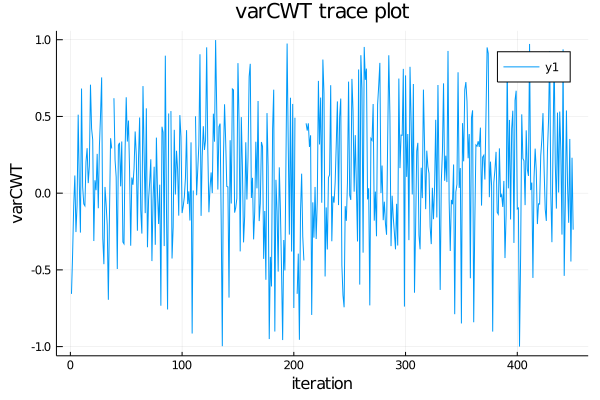

In [18]:
using Plots
x = out[!,1]; y = out[!,2]; # These are the plotting data
plot(x,y, title = "varCWT trace plot",
        xlabel = "iteration", ylabel = "varCWT")

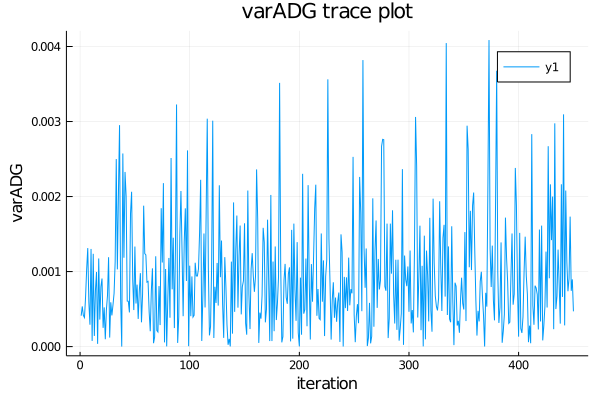

In [19]:
using Plots
x = out[!,1]; y = out[!,3]; # These are the plotting data
plot(x,y, title = "varADG trace plot",
        xlabel = "iteration", ylabel = "varADG")

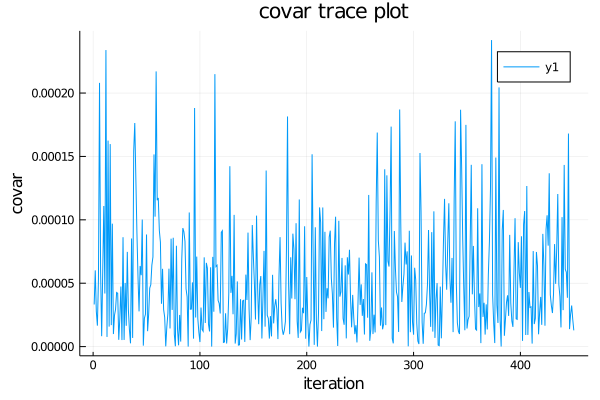

In [20]:
using Plots
x = out[!,1]; y = out[!,4]; # These are the plotting data
plot(x,y, title = "covar trace plot",
        xlabel = "iteration", ylabel = "covar")

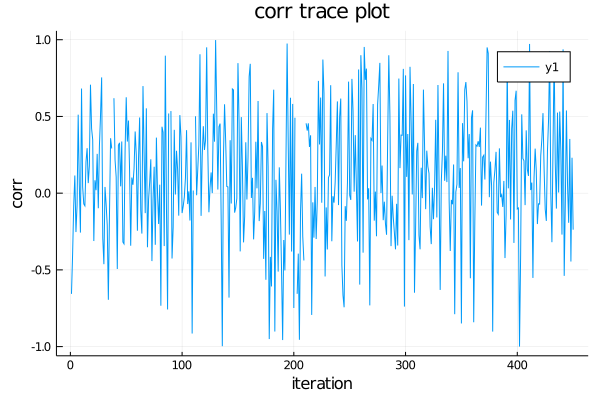

In [21]:
using Plots
x = out[!,1]; y = out[!,2]; # These are the plotting data
plot(x,y, title = "corr trace plot",
        xlabel = "iteration", ylabel = "corr")

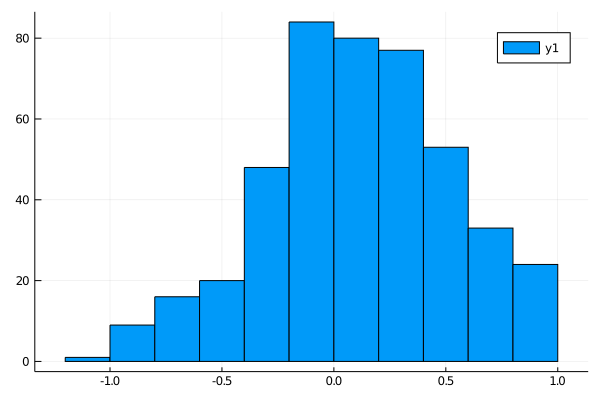

In [22]:
h = histogram(out[!,2])
display(h)

## Whole genome genetic correlation

In [3]:
gVar= CSV.read("MCMC_BayesB_genetic_variance.txt")

,FinADG_FinADG,FinADG_Health_Score4,Health_Score4_FinADG,Health_Score4_Health_Score4
,Float64,Float64,Float64,Float64
1,0.0034659,-0.000100966,-0.000100966,0.0815487
2,0.00346767,-0.00178029,-0.00178029,0.0716826
3,0.00324564,-0.00111765,-0.00111765,0.0775525
4,0.00387737,-0.000433126,-0.000433126,0.0823907
5,0.00400311,-0.00247072,-0.00247072,0.0949835
6,0.00368005,-0.000138287,-0.000138287,0.0769148
7,0.00300462,0.000395896,0.000395896,0.0933002
8,0.00349338,0.00011712,0.00011712,0.0907902
9,0.00363022,-0.000791001,-0.000791001,0.0896019


In [4]:
sqVar1=[sqrt(i) for i in gVar[!,:FinADG_FinADG]] 
sqVar2=[sqrt(i) for i in gVar[!,:Health_Score4_Health_Score4]] 
Product= sqVar1 .* sqVar2
rg= gVar[!,:FinADG_Health_Score4] ./ Product  # Genetic correlations
insertcols!(gVar, 2, :corr => rg)

,FinADG_FinADG,corr,FinADG_Health_Score4,Health_Score4_FinADG,Health_Score4_Health_Score4
,Float64,Float64,Float64,Float64,Float64
1,0.0034659,-0.00600563,-0.000100966,-0.000100966,0.0815487
2,0.00346767,-0.112918,-0.00178029,-0.00178029,0.0716826
3,0.00324564,-0.0704462,-0.00111765,-0.00111765,0.0775525
4,0.00387737,-0.0242329,-0.000433126,-0.000433126,0.0823907
5,0.00400311,-0.126707,-0.00247072,-0.00247072,0.0949835
6,0.00368005,-0.00821956,-0.000138287,-0.000138287,0.0769148
7,0.00300462,0.0236453,0.000395896,0.000395896,0.0933002
8,0.00349338,0.00657641,0.00011712,0.00011712,0.0907902
9,0.00363022,-0.0438584,-0.000791001,-0.000791001,0.0896019


In [5]:
gVar= filter(row -> ! isnan(row.corr), gVar)
mean(gVar[!,:corr])

-0.047571525646847496

In [6]:
using Statistics
std(gVar[!,:corr])

0.058878279224163825

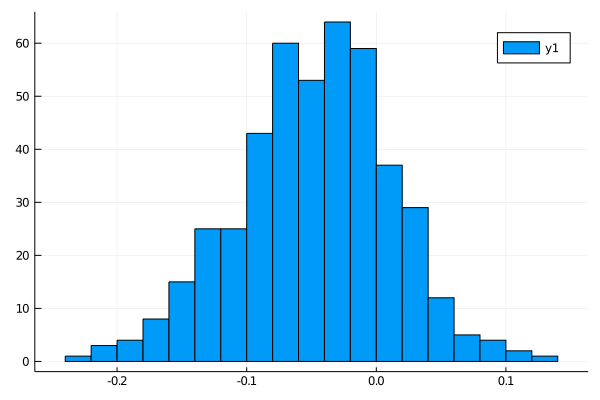

In [26]:
h = histogram(gVar[!,2])
display(h)

## BV correlation for SSC2 region from MCMC BayesB samples

In [3]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_geno_FinADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 77406:78077]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 77406:78077]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_geno_Health_Score4.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 77406:78077]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,-0.624804,0.000301215,5.16089e-7,-7.79012e-6
2,2,NaN,0.0,6.49974e-7,0.0
3,3,-0.821469,0.00106712,1.33024e-5,-9.78732e-5
4,4,-0.41203,0.000121771,2.56569e-6,-7.28287e-6
5,5,NaN,0.0,0.0,0.0
6,6,0.015136,0.0012476,2.01899e-5,2.40225e-6
7,7,1.0,2.86548e-6,1.18502e-7,5.82723e-7
8,8,1.0,2.44007e-5,8.29046e-7,4.4977e-6
9,9,-0.290111,0.00015095,6.95768e-8,-9.40184e-7


In [4]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

-0.31296304316532275

In [5]:
using Statistics
std(out[!,:corr])

0.6372157288698727

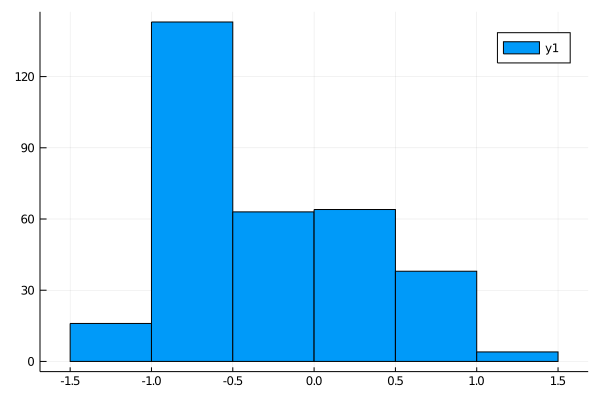

In [6]:
using Plots
h = histogram(out[!,:corr])
display(h)